In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Mount Google Drive (Optional)
from google.colab import drive
drive.mount('/content/drive')

# Install Kaggle API client
!pip install kaggle

# Upload Kaggle API token
from google.colab import files

# Download CelebA dataset
dataset_name = "jessicali9530/celeba-dataset"
!kaggle datasets download -d {dataset_name}

# Unzip the downloaded dataset
os.makedirs("/content/celeba", exist_ok=True)
!unzip -q celeba-dataset.zip -d /content/celeba

print("CelebA dataset downloaded and extracted to /content/celeba")

CelebA dataset

In [ ]:

import os
import shutil

from sklearn.model_selection import train_test_split

ROOT_DIR = "celeba/img_align_celeba/img_align_celeba"

TARGET_DIR = "celeba_modify"

# Ratios for splitting
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Subdirectory names
train_dir = os.path.join(TARGET_DIR, "train_dir")
val_dir = os.path.join(TARGET_DIR, "val_dir")
test_dir = os.path.join(TARGET_DIR, "test_dir")

# Create subdirectories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(ROOT_DIR) if os.path.isfile(os.path.join(ROOT_DIR, f))]

# Split images
train_files, temp_files = train_test_split(image_files, test_size=(val_ratio + test_ratio), random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

# Move images to respective directories
for file_name in train_files:
    shutil.copy(os.path.join(ROOT_DIR, file_name), os.path.join(train_dir, file_name))

for file_name in val_files:
    shutil.copy(os.path.join(ROOT_DIR, file_name), os.path.join(val_dir, file_name))

for file_name in test_files:
    shutil.copy(os.path.join(ROOT_DIR, file_name), os.path.join(test_dir, file_name))

print(f"Images organized into:")
print(f"Training set: {len(train_files)} images")
print(f"Validation set: {len(val_files)} images")
print(f"Test set: {len(test_files)} images")

Images organized into:
Training set: 141819 images
Validation set: 40520 images
Test set: 20260 images


In [ ]:
DATASET_DIR = 'celeba_modify'
MASK_DIR = 'masks'

IMAGE_SIZE = 512

MASK

In [ ]:
import argparse
import numpy as np
import random
from PIL import Image

action_list = [[0, 1], [0, -1], [1, 0], [-1, 0]]


def random_walk(canvas, ini_x, ini_y, length):
    x = ini_x
    y = ini_y
    img_size = canvas.shape[-1]
    x_list = []
    y_list = []
    for i in range(length):
        r = random.randint(0, len(action_list) - 1)
        x = np.clip(x + action_list[r][0], a_min=0, a_max=img_size - 1)
        y = np.clip(y + action_list[r][1], a_min=0, a_max=img_size - 1)
        x_list.append(x)
        y_list.append(y)
    canvas[np.array(x_list), np.array(y_list)] = 0
    return canvas


if not os.path.exists(MASK_DIR):
    os.makedirs(MASK_DIR)

for i in range(100):
    canvas = np.ones((IMAGE_SIZE, IMAGE_SIZE)).astype("i")
    ini_x = random.randint(0, IMAGE_SIZE - 1)
    ini_y = random.randint(0, IMAGE_SIZE - 1)
    mask = random_walk(canvas, ini_x, ini_y, IMAGE_SIZE ** 2)
    print("save:", i, np.sum(mask))

    img = Image.fromarray(mask * 255).convert('1')
    img.save('{:s}/{:06d}.jpg'.format(MASK_DIR, i))

save: 0 219970
save: 1 221101
save: 2 206360
save: 3 205971
save: 4 210403
save: 5 214316
save: 6 211494
save: 7 228185
save: 8 203223
save: 9 203816
save: 10 207557
save: 11 205365
save: 12 216238
save: 13 208071
save: 14 204745
save: 15 208838
save: 16 224363
save: 17 208482
save: 18 208024
save: 19 210858
save: 20 216811
save: 21 218900
save: 22 218505
save: 23 227319
save: 24 221633
save: 25 210145
save: 26 220624
save: 27 213978
save: 28 214605
save: 29 207689
save: 30 224928
save: 31 210232
save: 32 223296
save: 33 212202
save: 34 209265
save: 35 209310
save: 36 212113
save: 37 228724
save: 38 214666
save: 39 220856
save: 40 212989
save: 41 218063
save: 42 205430
save: 43 209338
save: 44 208383
save: 45 213689
save: 46 215350
save: 47 221344
save: 48 205298
save: 49 207726
save: 50 213860
save: 51 202288
save: 52 203272
save: 53 217723
save: 54 217246
save: 55 216702
save: 56 215177
save: 57 211667
save: 58 197529
save: 59 215728
save: 60 208463
save: 61 207979
save: 62 216701
sa

save to driver

In [ ]:
# celeba_dir = "/content/drive/My Drive/celeba"
mask_dir = "/content/drive/My Drive/masks"
# Create the directory if it doesn't exist
# os.makedirs(celeba_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# Copy data to Google Drive
# shutil.copytree("/content/celeba_modify", celeba_dir, dirs_exist_ok=True)
shutil.copytree('masks', mask_dir, dirs_exist_ok=True)


'/content/drive/My Drive/masks'

get mask from driver

In [ ]:
# os.makedirs(MASK_DIR, exist_ok=True)
# mask_dir = "/content/drive/My Drive/masks"

# shutil.copytree(mask_dir, MASK_DIR, dirs_exist_ok=True)


'masks'

In [ ]:
import argparse
import numpy as np
import os
import torch

from torch.utils import data
from torchvision import transforms
from tqdm import tqdm

torch.backends.cudnn.benchmark = True
device = torch.device('cuda')

In [ ]:
import random
import torch
from PIL import Image
from glob import glob

class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, img_root, mask_root, img_transform, mask_transform,
                 split='train'):
        super(CelebADataset, self).__init__()
        self.img_transform = img_transform
        self.mask_transform = mask_transform

        # use about 8M images in the challenge dataset
        if split == 'train':
            self.paths = glob('{:s}/train_dir/**/*.jpg'.format(img_root),
                              recursive=True)
        else:
            self.paths = glob('{:s}/{:s}_dir/*'.format(img_root, split))

        self.mask_paths = glob('{:s}/*.jpg'.format(mask_root))
        self.N_mask = len(self.mask_paths)

    def __getitem__(self, index):
        gt_img = Image.open(self.paths[index])
        gt_img = self.img_transform(gt_img.convert('RGB'))

        mask = Image.open(self.mask_paths[random.randint(0, self.N_mask - 1)])
        mask = self.mask_transform(mask.convert('RGB'))
        return gt_img * mask, mask, gt_img

    def __len__(self):
        return len(self.paths)


class InfiniteSampler(data.sampler.Sampler):
    def __init__(self, num_samples):
        self.num_samples = num_samples

    def __iter__(self):
        return iter(self.loop())

    def __len__(self):
        return 2 ** 31

    def loop(self):
        i = 0
        order = np.random.permutation(self.num_samples)
        while True:
            yield order[i]
            i += 1
            if i >= self.num_samples:
                np.random.seed()
                order = np.random.permutation(self.num_samples)
                i = 0


<h1>Model</h1>

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models


def weights_init(init_type='gaussian'):
    def init_fun(m):
        classname = m.__class__.__name__
        if (classname.find('Conv') == 0 or classname.find(
                'Linear') == 0) and hasattr(m, 'weight'):
            if init_type == 'gaussian':
                nn.init.normal_(m.weight, 0.0, 0.02)
            elif init_type == 'xavier':
                nn.init.xavier_normal_(m.weight, gain=math.sqrt(2))
            elif init_type == 'kaiming':
                nn.init.kaiming_normal_(m.weight, a=0, mode='fan_in')
            elif init_type == 'orthogonal':
                nn.init.orthogonal_(m.weight, gain=math.sqrt(2))
            elif init_type == 'default':
                pass
            else:
                assert 0, "Unsupported initialization: {}".format(init_type)
            if hasattr(m, 'bias') and m.bias is not None:
                nn.init.constant_(m.bias, 0.0)

    return init_fun


class VGG16FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.enc_1 = nn.Sequential(*vgg16.features[:5])
        self.enc_2 = nn.Sequential(*vgg16.features[5:10])
        self.enc_3 = nn.Sequential(*vgg16.features[10:17])

        # fix the encoder
        for i in range(3):
            for param in getattr(self, 'enc_{:d}'.format(i + 1)).parameters():
                param.requires_grad = False

    def forward(self, image):
        results = [image]
        for i in range(3):
            func = getattr(self, 'enc_{:d}'.format(i + 1))
            results.append(func(results[-1]))
        return results[1:]


class PartialConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1, bias=True):
        super().__init__()
        self.input_conv = nn.Conv2d(in_channels, out_channels, kernel_size,
                                    stride, padding, dilation, groups, bias)
        self.mask_conv = nn.Conv2d(in_channels, out_channels, kernel_size,
                                   stride, padding, dilation, groups, False)
        self.input_conv.apply(weights_init('kaiming'))

        torch.nn.init.constant_(self.mask_conv.weight, 1.0)

        # mask is not updated
        for param in self.mask_conv.parameters():
            param.requires_grad = False

    def forward(self, input, mask):
        # http://masc.cs.gmu.edu/wiki/partialconv
        # C(X) = W^T * X + b, C(0) = b, D(M) = 1 * M + 0 = sum(M)
        # W^T* (M .* X) / sum(M) + b = [C(M .* X) – C(0)] / D(M) + C(0)

        output = self.input_conv(input * mask)
        if self.input_conv.bias is not None:
            output_bias = self.input_conv.bias.view(1, -1, 1, 1).expand_as(
                output)
        else:
            output_bias = torch.zeros_like(output)

        with torch.no_grad():
            output_mask = self.mask_conv(mask)

        no_update_holes = output_mask == 0
        mask_sum = output_mask.masked_fill_(no_update_holes, 1.0)

        output_pre = (output - output_bias) / mask_sum + output_bias
        output = output_pre.masked_fill_(no_update_holes, 0.0)

        new_mask = torch.ones_like(output)
        new_mask = new_mask.masked_fill_(no_update_holes, 0.0)

        return output, new_mask


class PCBActiv(nn.Module):
    def __init__(self, in_ch, out_ch, bn=True, sample='none-3', activ='relu',
                 conv_bias=False):
        super().__init__()
        if sample == 'down-5':
            self.conv = PartialConv(in_ch, out_ch, 5, 2, 2, bias=conv_bias)
        elif sample == 'down-7':
            self.conv = PartialConv(in_ch, out_ch, 7, 2, 3, bias=conv_bias)
        elif sample == 'down-3':
            self.conv = PartialConv(in_ch, out_ch, 3, 2, 1, bias=conv_bias)
        else:
            self.conv = PartialConv(in_ch, out_ch, 3, 1, 1, bias=conv_bias)

        if bn:
            self.bn = nn.BatchNorm2d(out_ch)
        if activ == 'relu':
            self.activation = nn.ReLU()
        elif activ == 'leaky':
            self.activation = nn.LeakyReLU(negative_slope=0.2)

    def forward(self, input, input_mask):
        h, h_mask = self.conv(input, input_mask)
        if hasattr(self, 'bn'):
            h = self.bn(h)
        if hasattr(self, 'activation'):
            h = self.activation(h)
        return h, h_mask


class PConvUNet(nn.Module):
    def __init__(self, layer_size=7, input_channels=3, upsampling_mode='nearest'):
        super().__init__()
        self.freeze_enc_bn = False
        self.upsampling_mode = upsampling_mode
        self.layer_size = layer_size
        self.enc_1 = PCBActiv(input_channels, 64, bn=False, sample='down-7')
        self.enc_2 = PCBActiv(64, 128, sample='down-5')
        self.enc_3 = PCBActiv(128, 256, sample='down-5')
        self.enc_4 = PCBActiv(256, 512, sample='down-3')
        for i in range(4, self.layer_size):
            name = 'enc_{:d}'.format(i + 1)
            setattr(self, name, PCBActiv(512, 512, sample='down-3'))

        for i in range(4, self.layer_size):
            name = 'dec_{:d}'.format(i + 1)
            setattr(self, name, PCBActiv(512 + 512, 512, activ='leaky'))
        self.dec_4 = PCBActiv(512 + 256, 256, activ='leaky')
        self.dec_3 = PCBActiv(256 + 128, 128, activ='leaky')
        self.dec_2 = PCBActiv(128 + 64, 64, activ='leaky')
        self.dec_1 = PCBActiv(64 + input_channels, input_channels,
                              bn=False, activ=None, conv_bias=True)

    def forward(self, input, input_mask):
        h_dict = {}  # for the output of enc_N
        h_mask_dict = {}  # for the output of enc_N

        h_dict['h_0'], h_mask_dict['h_0'] = input, input_mask

        h_key_prev = 'h_0'
        for i in range(1, self.layer_size + 1):
            l_key = 'enc_{:d}'.format(i)
            h_key = 'h_{:d}'.format(i)
            h_dict[h_key], h_mask_dict[h_key] = getattr(self, l_key)(
                h_dict[h_key_prev], h_mask_dict[h_key_prev])
            h_key_prev = h_key

        h_key = 'h_{:d}'.format(self.layer_size)
        h, h_mask = h_dict[h_key], h_mask_dict[h_key]

        # concat upsampled output of h_enc_N-1 and dec_N+1, then do dec_N
        # (exception)
        #                            input         dec_2            dec_1
        #                            h_enc_7       h_enc_8          dec_8

        for i in range(self.layer_size, 0, -1):
            enc_h_key = 'h_{:d}'.format(i - 1)
            dec_l_key = 'dec_{:d}'.format(i)

            h = F.interpolate(h, scale_factor=2, mode=self.upsampling_mode)
            h_mask = F.interpolate(
                h_mask, scale_factor=2, mode='nearest')

            h = torch.cat([h, h_dict[enc_h_key]], dim=1)
            h_mask = torch.cat([h_mask, h_mask_dict[enc_h_key]], dim=1)
            h, h_mask = getattr(self, dec_l_key)(h, h_mask)

        return h, h_mask

    def train(self, mode=True):
        """
        Override the default train() to freeze the BN parameters
        """
        super().train(mode)
        if self.freeze_enc_bn:
            for name, module in self.named_modules():
                if isinstance(module, nn.BatchNorm2d) and 'enc' in name:
                    module.eval()


def get_state_dict_on_cpu(obj):
    cpu_device = torch.device('cpu')
    state_dict = obj.state_dict()
    for key in state_dict.keys():
        state_dict[key] = state_dict[key].to(cpu_device)
    return state_dict


def save_ckpt(ckpt_name, models, optimizers, n_iter):
    ckpt_dict = {'n_iter': n_iter}
    for prefix, model in models:
        ckpt_dict[prefix] = get_state_dict_on_cpu(model)

    for prefix, optimizer in optimizers:
        ckpt_dict[prefix] = optimizer.state_dict()
    torch.save(ckpt_dict, ckpt_name)


def load_ckpt(ckpt_name, models, optimizers=None):
    ckpt_dict = torch.load(ckpt_name)
    for prefix, model in models:
        assert isinstance(model, nn.Module)
        model.load_state_dict(ckpt_dict[prefix], strict=False)
    if optimizers is not None:
        for prefix, optimizer in optimizers:
            optimizer.load_state_dict(ckpt_dict[prefix])
    return ckpt_dict['n_iter']


Loss

In [ ]:
import torch
import torch.nn as nn

def gram_matrix(feat):
    # https://github.com/pytorch/examples/blob/master/fast_neural_style/neural_style/utils.py
    (b, ch, h, w) = feat.size()
    feat = feat.view(b, ch, h * w)
    feat_t = feat.transpose(1, 2)
    gram = torch.bmm(feat, feat_t) / (ch * h * w)
    return gram


def total_variation_loss(image):
    # shift one pixel and get difference (for both x and y direction)
    loss = torch.mean(torch.abs(image[:, :, :, :-1] - image[:, :, :, 1:])) + \
        torch.mean(torch.abs(image[:, :, :-1, :] - image[:, :, 1:, :]))
    return loss


class InpaintingLoss(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.l1 = nn.L1Loss()
        self.extractor = extractor

    def forward(self, input, mask, output, gt):
        loss_dict = {}
        output_comp = mask * input + (1 - mask) * output

        loss_dict['hole'] = self.l1((1 - mask) * output, (1 - mask) * gt)
        loss_dict['valid'] = self.l1(mask * output, mask * gt)

        if output.shape[1] == 3:
            feat_output_comp = self.extractor(output_comp)
            feat_output = self.extractor(output)
            feat_gt = self.extractor(gt)
        elif output.shape[1] == 1:
            feat_output_comp = self.extractor(torch.cat([output_comp]*3, 1))
            feat_output = self.extractor(torch.cat([output]*3, 1))
            feat_gt = self.extractor(torch.cat([gt]*3, 1))
        else:
            raise ValueError('only gray an')

        loss_dict['prc'] = 0.0
        for i in range(3):
            loss_dict['prc'] += self.l1(feat_output[i], feat_gt[i])
            loss_dict['prc'] += self.l1(feat_output_comp[i], feat_gt[i])

        loss_dict['style'] = 0.0
        for i in range(3):
            loss_dict['style'] += self.l1(gram_matrix(feat_output[i]),
                                          gram_matrix(feat_gt[i]))
            loss_dict['style'] += self.l1(gram_matrix(feat_output_comp[i]),
                                          gram_matrix(feat_gt[i]))

        loss_dict['tv'] = total_variation_loss(output_comp)

        return loss_dict


In [ ]:
IMAGE_SIZE = 512

DATASET_DIR = 'celeba_modify'
MASK_DIR = 'masks'

save_dir = 'snapshots/default'
log_dir ='logs/default'
lr = 2e-4
lr_finetune = 5e-5
max_iter=10000
batch_size=4
n_threads=8
save_model_interval=50000
vis_interval=5000
log_interval=10

resume=str
finetune='store_true'

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

LAMBDA_DICT = {'valid': 1.0, 'hole': 6.0, 'tv': 0.1, 'prc': 0.05, 'style': 120.0}


Prepare dataset

In [ ]:
if not os.path.exists(save_dir):
    os.makedirs('{:s}/images'.format(save_dir))
    os.makedirs('{:s}/ckpt'.format(save_dir))

size = (IMAGE_SIZE, IMAGE_SIZE)
img_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor(),
     transforms.Normalize(mean=MEAN, std=STD)])
mask_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()])

dataset_train = CelebADataset(DATASET_DIR, MASK_DIR, img_tf, mask_tf, 'train')
dataset_val = CelebADataset(DATASET_DIR, MASK_DIR, img_tf, mask_tf, 'val')

In [ ]:
iterator_train = iter(data.DataLoader(
    dataset_train, batch_size=batch_size,
    sampler=InfiniteSampler(len(dataset_train)),
    num_workers=n_threads))
print(len(dataset_train))
model = PConvUNet().to(device)

141819


In [ ]:
import torch
from torchvision.utils import make_grid
from torchvision.utils import save_image

def unnormalize(x):
    x = x.transpose(1, 3)
    x = x * torch.Tensor(STD) + torch.Tensor(MEAN)
    x = x.transpose(1, 3)
    return x

def evaluate(model, dataset, device, filename):
    image, mask, gt = zip(*[dataset[i] for i in range(8)])
    image = torch.stack(image)
    mask = torch.stack(mask)
    gt = torch.stack(gt)
    with torch.no_grad():
        output, _ = model(image.to(device), mask.to(device))
    output = output.to(torch.device('cpu'))
    output_comp = mask * image + (1 - mask) * output

    grid = make_grid(
        torch.cat((unnormalize(image), mask, unnormalize(output),
                   unnormalize(output_comp), unnormalize(gt)), dim=0))
    save_image(grid, filename)


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

NameError: name 'torch' is not defined

<h1>Training</h1>

In [ ]:
# if args.finetune:
#     lr = args.lr_finetune
#     model.freeze_enc_bn = True
# else:
#     lr = args.lr

start_iter = 0
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
criterion = InpaintingLoss(VGG16FeatureExtractor()).to(device)

# if resume:
#     start_iter = load_ckpt(
#         args.resume, [('model', model)], [('optimizer', optimizer)])
#     for param_group in optimizer.param_groups:
#         param_group['lr'] = lr
#     print('Starting from iter ', start_iter)

# Initialize an empty list to store loss values
loss_values = []

for i in tqdm(range(start_iter, max_iter)):
    epoch = (i // len(iterator_train)) + 1
    model.train()

    image, mask, gt = [x.to(device, non_blocking=True) for x in next(iterator_train)]
    output, _ = model(image, mask)
    loss_dict = criterion(image, mask, output, gt)

    loss = 0.0
    for key, coef in LAMBDA_DICT.items():
        value = coef * loss_dict[key]
        loss += value
        # if (i + 1) % log_interval == 0:
        #     writer.add_scalar('loss_{:s}'.format(key), value.item(), i + 1)

    print(f"Epoch: {epoch}, Iteration: {i + 1}, Loss: {loss.item():.4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the total loss for this iteration
    loss_values.append(loss.item())

    if (i + 1) % save_model_interval == 0 or (i + 1) == max_iter:
        save_ckpt('{:s}/ckpt/{:d}.pth'.format(save_dir, i + 1),
                  [('model', model)], [('optimizer', optimizer)], i + 1)

    if (i + 1) % vis_interval == 0:
        model.eval()
        evaluate(model, dataset_val, device,
                 '{:s}/images/test_{:d}.jpg'.format(save_dir, i + 1))


  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch: 1, Iteration: 1, Loss: 7.8867


  0%|          | 1/10000 [00:00<2:32:44,  1.09it/s]

Epoch: 1, Iteration: 2, Loss: 7.6339


  0%|          | 2/10000 [00:01<2:24:07,  1.16it/s]

Epoch: 1, Iteration: 3, Loss: 8.1777


  0%|          | 3/10000 [00:02<2:23:30,  1.16it/s]

Epoch: 1, Iteration: 4, Loss: 10.1579


  0%|          | 4/10000 [00:03<2:21:04,  1.18it/s]

Epoch: 1, Iteration: 5, Loss: 8.3693


  0%|          | 5/10000 [00:04<2:21:31,  1.18it/s]

Epoch: 1, Iteration: 6, Loss: 7.3772


  0%|          | 6/10000 [00:05<2:21:32,  1.18it/s]

Epoch: 1, Iteration: 7, Loss: 10.6911


  0%|          | 7/10000 [00:05<2:20:16,  1.19it/s]

Epoch: 1, Iteration: 8, Loss: 8.4961


  0%|          | 8/10000 [00:06<2:19:34,  1.19it/s]

Epoch: 1, Iteration: 9, Loss: 8.3281


  0%|          | 9/10000 [00:07<2:19:08,  1.20it/s]

Epoch: 1, Iteration: 10, Loss: 8.8720


  0%|          | 10/10000 [00:08<2:20:32,  1.18it/s]

Epoch: 1, Iteration: 11, Loss: 8.8500


  0%|          | 11/10000 [00:09<2:25:24,  1.14it/s]

Epoch: 1, Iteration: 12, Loss: 9.4422


  0%|          | 12/10000 [00:10<2:23:33,  1.16it/s]

Epoch: 1, Iteration: 13, Loss: 9.5117


  0%|          | 13/10000 [00:11<2:22:07,  1.17it/s]

Epoch: 1, Iteration: 14, Loss: 7.8755


  0%|          | 14/10000 [00:11<2:20:44,  1.18it/s]

Epoch: 1, Iteration: 15, Loss: 8.8680


  0%|          | 15/10000 [00:12<2:19:47,  1.19it/s]

Epoch: 1, Iteration: 16, Loss: 9.9075


  0%|          | 16/10000 [00:13<2:19:08,  1.20it/s]

Epoch: 1, Iteration: 17, Loss: 7.8829


  0%|          | 17/10000 [00:14<2:18:54,  1.20it/s]

Epoch: 1, Iteration: 18, Loss: 10.5435


  0%|          | 18/10000 [00:15<2:18:44,  1.20it/s]

Epoch: 1, Iteration: 19, Loss: 6.9924


  0%|          | 19/10000 [00:16<2:18:43,  1.20it/s]

Epoch: 1, Iteration: 20, Loss: 10.0149


  0%|          | 20/10000 [00:16<2:19:02,  1.20it/s]

Epoch: 1, Iteration: 21, Loss: 7.8328


  0%|          | 21/10000 [00:17<2:19:06,  1.20it/s]

Epoch: 1, Iteration: 22, Loss: 8.0739


  0%|          | 22/10000 [00:18<2:19:31,  1.19it/s]

Epoch: 1, Iteration: 23, Loss: 9.5812


  0%|          | 23/10000 [00:19<2:19:23,  1.19it/s]

Epoch: 1, Iteration: 24, Loss: 8.1969


  0%|          | 24/10000 [00:20<2:19:35,  1.19it/s]

Epoch: 1, Iteration: 25, Loss: 8.8166


  0%|          | 25/10000 [00:21<2:19:28,  1.19it/s]

Epoch: 1, Iteration: 26, Loss: 11.0994


  0%|          | 26/10000 [00:21<2:19:37,  1.19it/s]

Epoch: 1, Iteration: 27, Loss: 9.2451


  0%|          | 27/10000 [00:22<2:21:28,  1.17it/s]

Epoch: 1, Iteration: 28, Loss: 8.4372


  0%|          | 28/10000 [00:23<2:22:23,  1.17it/s]

Epoch: 1, Iteration: 29, Loss: 7.7783


  0%|          | 29/10000 [00:24<2:22:03,  1.17it/s]

Epoch: 1, Iteration: 30, Loss: 11.3222


  0%|          | 30/10000 [00:25<2:21:45,  1.17it/s]

Epoch: 1, Iteration: 31, Loss: 12.1321


  0%|          | 31/10000 [00:26<2:22:50,  1.16it/s]

Epoch: 1, Iteration: 32, Loss: 9.9270


  0%|          | 32/10000 [00:27<2:22:55,  1.16it/s]

Epoch: 1, Iteration: 33, Loss: 9.0990


  0%|          | 33/10000 [00:28<2:24:09,  1.15it/s]

Epoch: 1, Iteration: 34, Loss: 10.7451


  0%|          | 34/10000 [00:28<2:23:29,  1.16it/s]

Epoch: 1, Iteration: 35, Loss: 9.3979


  0%|          | 35/10000 [00:29<2:22:50,  1.16it/s]

Epoch: 1, Iteration: 36, Loss: 8.8610


  0%|          | 36/10000 [00:30<2:22:19,  1.17it/s]

Epoch: 1, Iteration: 37, Loss: 12.0511


  0%|          | 37/10000 [00:31<2:22:03,  1.17it/s]

Epoch: 1, Iteration: 38, Loss: 9.4562


  0%|          | 38/10000 [00:32<2:22:08,  1.17it/s]

Epoch: 1, Iteration: 39, Loss: 7.1753


  0%|          | 39/10000 [00:33<2:21:58,  1.17it/s]

Epoch: 1, Iteration: 40, Loss: 8.9061


  0%|          | 40/10000 [00:33<2:21:56,  1.17it/s]

Epoch: 1, Iteration: 41, Loss: 9.0000


  0%|          | 41/10000 [00:34<2:22:09,  1.17it/s]

Epoch: 1, Iteration: 42, Loss: 9.8006


  0%|          | 42/10000 [00:35<2:22:16,  1.17it/s]

Epoch: 1, Iteration: 43, Loss: 7.9556


  0%|          | 43/10000 [00:36<2:22:12,  1.17it/s]

Epoch: 1, Iteration: 44, Loss: 9.3001


  0%|          | 44/10000 [00:37<2:22:21,  1.17it/s]

Epoch: 1, Iteration: 45, Loss: 11.4482


  0%|          | 45/10000 [00:38<2:22:38,  1.16it/s]

Epoch: 1, Iteration: 46, Loss: 12.3059


  0%|          | 46/10000 [00:39<2:22:57,  1.16it/s]

Epoch: 1, Iteration: 47, Loss: 7.5721


  0%|          | 47/10000 [00:40<2:24:15,  1.15it/s]

Epoch: 1, Iteration: 48, Loss: 9.7472


  0%|          | 48/10000 [00:40<2:24:11,  1.15it/s]

Epoch: 1, Iteration: 49, Loss: 8.5278


  0%|          | 49/10000 [00:41<2:25:27,  1.14it/s]

Epoch: 1, Iteration: 50, Loss: 8.4277


  0%|          | 50/10000 [00:42<2:25:30,  1.14it/s]

Epoch: 1, Iteration: 51, Loss: 9.7101


  1%|          | 51/10000 [00:43<2:26:35,  1.13it/s]

Epoch: 1, Iteration: 52, Loss: 9.3936


  1%|          | 52/10000 [00:44<2:25:57,  1.14it/s]

Epoch: 1, Iteration: 53, Loss: 9.0644


  1%|          | 53/10000 [00:45<2:26:00,  1.14it/s]

Epoch: 1, Iteration: 54, Loss: 8.5811


  1%|          | 54/10000 [00:46<2:26:34,  1.13it/s]

Epoch: 1, Iteration: 55, Loss: 7.5103


  1%|          | 55/10000 [00:47<2:27:40,  1.12it/s]

Epoch: 1, Iteration: 56, Loss: 8.2276


  1%|          | 56/10000 [00:48<2:29:16,  1.11it/s]

Epoch: 1, Iteration: 57, Loss: 9.6228


  1%|          | 57/10000 [00:48<2:27:51,  1.12it/s]

Epoch: 1, Iteration: 58, Loss: 11.4641


  1%|          | 58/10000 [00:49<2:27:04,  1.13it/s]

Epoch: 1, Iteration: 59, Loss: 9.2583


  1%|          | 59/10000 [00:50<2:26:21,  1.13it/s]

Epoch: 1, Iteration: 60, Loss: 8.2463


  1%|          | 60/10000 [00:51<2:25:52,  1.14it/s]

Epoch: 1, Iteration: 61, Loss: 9.5006


  1%|          | 61/10000 [00:52<2:25:49,  1.14it/s]

Epoch: 1, Iteration: 62, Loss: 9.8526


  1%|          | 62/10000 [00:53<2:25:28,  1.14it/s]

Epoch: 1, Iteration: 63, Loss: 9.3387


  1%|          | 63/10000 [00:54<2:25:05,  1.14it/s]

Epoch: 1, Iteration: 64, Loss: 8.3544


  1%|          | 64/10000 [00:55<2:24:42,  1.14it/s]

Epoch: 1, Iteration: 65, Loss: 8.2707


  1%|          | 65/10000 [00:55<2:24:37,  1.14it/s]

Epoch: 1, Iteration: 66, Loss: 7.5792


  1%|          | 66/10000 [00:56<2:24:21,  1.15it/s]

Epoch: 1, Iteration: 67, Loss: 8.7771


  1%|          | 67/10000 [00:57<2:24:15,  1.15it/s]

Epoch: 1, Iteration: 68, Loss: 9.5111


  1%|          | 68/10000 [00:58<2:24:00,  1.15it/s]

Epoch: 1, Iteration: 69, Loss: 9.0475


  1%|          | 69/10000 [00:59<2:24:12,  1.15it/s]

Epoch: 1, Iteration: 70, Loss: 9.9831


  1%|          | 70/10000 [01:00<2:25:32,  1.14it/s]

Epoch: 1, Iteration: 71, Loss: 8.3013


  1%|          | 71/10000 [01:01<2:25:01,  1.14it/s]

Epoch: 1, Iteration: 72, Loss: 7.9072


  1%|          | 72/10000 [01:02<2:25:43,  1.14it/s]

Epoch: 1, Iteration: 73, Loss: 9.0070


  1%|          | 73/10000 [01:02<2:24:58,  1.14it/s]

Epoch: 1, Iteration: 74, Loss: 8.1584


  1%|          | 74/10000 [01:03<2:25:39,  1.14it/s]

Epoch: 1, Iteration: 75, Loss: 10.5051


  1%|          | 75/10000 [01:04<2:24:49,  1.14it/s]

Epoch: 1, Iteration: 76, Loss: 7.6253


  1%|          | 76/10000 [01:05<2:25:50,  1.13it/s]

Epoch: 1, Iteration: 77, Loss: 9.5191


  1%|          | 77/10000 [01:06<2:26:22,  1.13it/s]

Epoch: 1, Iteration: 78, Loss: 9.1522


  1%|          | 78/10000 [01:07<2:26:37,  1.13it/s]

Epoch: 1, Iteration: 79, Loss: 7.9782


  1%|          | 79/10000 [01:08<2:26:43,  1.13it/s]

Epoch: 1, Iteration: 80, Loss: 10.8483


  1%|          | 80/10000 [01:09<2:25:33,  1.14it/s]

Epoch: 1, Iteration: 81, Loss: 6.5018


  1%|          | 81/10000 [01:09<2:24:22,  1.14it/s]

Epoch: 1, Iteration: 82, Loss: 8.2419


  1%|          | 82/10000 [01:10<2:23:07,  1.15it/s]

Epoch: 1, Iteration: 83, Loss: 9.7617


  1%|          | 83/10000 [01:11<2:22:19,  1.16it/s]

Epoch: 1, Iteration: 84, Loss: 7.9683


  1%|          | 84/10000 [01:12<2:21:52,  1.16it/s]

Epoch: 1, Iteration: 85, Loss: 7.8259


  1%|          | 85/10000 [01:13<2:21:24,  1.17it/s]

Epoch: 1, Iteration: 86, Loss: 7.2040


  1%|          | 86/10000 [01:14<2:21:05,  1.17it/s]

Epoch: 1, Iteration: 87, Loss: 9.2084


  1%|          | 87/10000 [01:15<2:20:39,  1.17it/s]

Epoch: 1, Iteration: 88, Loss: 9.9970


  1%|          | 88/10000 [01:15<2:20:51,  1.17it/s]

Epoch: 1, Iteration: 89, Loss: 7.8905


  1%|          | 89/10000 [01:16<2:20:33,  1.18it/s]

Epoch: 1, Iteration: 90, Loss: 8.0957


  1%|          | 90/10000 [01:17<2:20:10,  1.18it/s]

Epoch: 1, Iteration: 91, Loss: 8.5020


  1%|          | 91/10000 [01:18<2:20:11,  1.18it/s]

Epoch: 1, Iteration: 92, Loss: 7.6276


  1%|          | 92/10000 [01:19<2:21:55,  1.16it/s]

Epoch: 1, Iteration: 93, Loss: 9.0346


  1%|          | 93/10000 [01:20<2:22:54,  1.16it/s]

Epoch: 1, Iteration: 94, Loss: 7.7055


  1%|          | 94/10000 [01:21<2:23:03,  1.15it/s]

Epoch: 1, Iteration: 95, Loss: 8.6568


  1%|          | 95/10000 [01:21<2:23:25,  1.15it/s]

Epoch: 1, Iteration: 96, Loss: 9.3267


  1%|          | 96/10000 [01:22<2:23:20,  1.15it/s]

Epoch: 1, Iteration: 97, Loss: 8.8726


  1%|          | 97/10000 [01:23<2:24:07,  1.15it/s]

Epoch: 1, Iteration: 98, Loss: 9.0300


  1%|          | 98/10000 [01:24<2:22:57,  1.15it/s]

Epoch: 1, Iteration: 99, Loss: 8.7456


  1%|          | 99/10000 [01:25<2:23:28,  1.15it/s]

Epoch: 1, Iteration: 100, Loss: 8.1748


  1%|          | 100/10000 [01:26<2:22:29,  1.16it/s]

Epoch: 1, Iteration: 101, Loss: 7.6691


  1%|          | 101/10000 [01:27<2:22:50,  1.16it/s]

Epoch: 1, Iteration: 102, Loss: 9.0015


  1%|          | 102/10000 [01:28<2:22:56,  1.15it/s]

Epoch: 1, Iteration: 103, Loss: 8.9997


  1%|          | 103/10000 [01:28<2:22:03,  1.16it/s]

Epoch: 1, Iteration: 104, Loss: 9.5290


  1%|          | 104/10000 [01:29<2:21:29,  1.17it/s]

Epoch: 1, Iteration: 105, Loss: 8.1747


  1%|          | 105/10000 [01:30<2:21:14,  1.17it/s]

Epoch: 1, Iteration: 106, Loss: 8.8370


  1%|          | 106/10000 [01:31<2:20:49,  1.17it/s]

Epoch: 1, Iteration: 107, Loss: 8.8883


  1%|          | 107/10000 [01:32<2:20:29,  1.17it/s]

Epoch: 1, Iteration: 108, Loss: 9.1300


  1%|          | 108/10000 [01:33<2:19:46,  1.18it/s]

Epoch: 1, Iteration: 109, Loss: 10.3293


  1%|          | 109/10000 [01:33<2:19:44,  1.18it/s]

Epoch: 1, Iteration: 110, Loss: 8.6495


  1%|          | 110/10000 [01:34<2:19:36,  1.18it/s]

Epoch: 1, Iteration: 111, Loss: 10.3457


  1%|          | 111/10000 [01:35<2:19:19,  1.18it/s]

Epoch: 1, Iteration: 112, Loss: 7.0786


  1%|          | 112/10000 [01:36<2:19:19,  1.18it/s]

Epoch: 1, Iteration: 113, Loss: 9.2702


  1%|          | 113/10000 [01:37<2:19:04,  1.18it/s]

Epoch: 1, Iteration: 114, Loss: 10.2675


  1%|          | 114/10000 [01:38<2:19:07,  1.18it/s]

Epoch: 1, Iteration: 115, Loss: 9.3939


  1%|          | 115/10000 [01:39<2:19:18,  1.18it/s]

Epoch: 1, Iteration: 116, Loss: 9.5799


  1%|          | 116/10000 [01:39<2:19:41,  1.18it/s]

Epoch: 1, Iteration: 117, Loss: 7.2198


  1%|          | 117/10000 [01:40<2:21:18,  1.17it/s]

Epoch: 1, Iteration: 118, Loss: 9.1382


  1%|          | 118/10000 [01:41<2:22:15,  1.16it/s]

Epoch: 1, Iteration: 119, Loss: 9.5993


  1%|          | 119/10000 [01:42<2:22:48,  1.15it/s]

Epoch: 1, Iteration: 120, Loss: 7.2210


  1%|          | 120/10000 [01:43<2:23:13,  1.15it/s]

Epoch: 1, Iteration: 121, Loss: 8.3982


  1%|          | 121/10000 [01:44<2:23:32,  1.15it/s]

Epoch: 1, Iteration: 122, Loss: 9.2749


  1%|          | 122/10000 [01:45<2:23:37,  1.15it/s]

Epoch: 1, Iteration: 123, Loss: 8.2909


  1%|          | 123/10000 [01:46<2:22:37,  1.15it/s]

Epoch: 1, Iteration: 124, Loss: 7.3445


  1%|          | 124/10000 [01:46<2:22:06,  1.16it/s]

Epoch: 1, Iteration: 125, Loss: 8.7227


  1%|▏         | 125/10000 [01:47<2:21:20,  1.16it/s]

Epoch: 1, Iteration: 126, Loss: 8.1359


  1%|▏         | 126/10000 [01:48<2:20:41,  1.17it/s]

Epoch: 1, Iteration: 127, Loss: 10.1882


  1%|▏         | 127/10000 [01:49<2:20:03,  1.17it/s]

Epoch: 1, Iteration: 128, Loss: 9.6817


  1%|▏         | 128/10000 [01:50<2:19:44,  1.18it/s]

Epoch: 1, Iteration: 129, Loss: 7.5013


  1%|▏         | 129/10000 [01:51<2:19:45,  1.18it/s]

Epoch: 1, Iteration: 130, Loss: 7.9033


  1%|▏         | 130/10000 [01:51<2:19:45,  1.18it/s]

Epoch: 1, Iteration: 131, Loss: 9.3504


  1%|▏         | 131/10000 [01:52<2:19:44,  1.18it/s]

Epoch: 1, Iteration: 132, Loss: 9.5617


  1%|▏         | 132/10000 [01:53<2:20:18,  1.17it/s]

Epoch: 1, Iteration: 133, Loss: 9.2733


  1%|▏         | 133/10000 [01:54<2:20:06,  1.17it/s]

Epoch: 1, Iteration: 134, Loss: 8.0156


  1%|▏         | 134/10000 [01:55<2:19:59,  1.17it/s]

Epoch: 1, Iteration: 135, Loss: 10.1066


  1%|▏         | 135/10000 [01:56<2:19:30,  1.18it/s]

Epoch: 1, Iteration: 136, Loss: 10.1490


  1%|▏         | 136/10000 [01:57<2:19:39,  1.18it/s]

Epoch: 1, Iteration: 137, Loss: 9.3035


  1%|▏         | 137/10000 [01:57<2:19:42,  1.18it/s]

Epoch: 1, Iteration: 138, Loss: 8.7859


  1%|▏         | 138/10000 [01:58<2:21:22,  1.16it/s]

Epoch: 1, Iteration: 139, Loss: 9.6764


  1%|▏         | 139/10000 [01:59<2:21:54,  1.16it/s]

Epoch: 1, Iteration: 140, Loss: 10.6673


  1%|▏         | 140/10000 [02:00<2:21:28,  1.16it/s]

Epoch: 1, Iteration: 141, Loss: 6.6347


  1%|▏         | 141/10000 [02:01<2:22:19,  1.15it/s]

Epoch: 1, Iteration: 142, Loss: 9.5269


  1%|▏         | 142/10000 [02:02<2:22:57,  1.15it/s]

Epoch: 1, Iteration: 143, Loss: 8.7016


  1%|▏         | 143/10000 [02:03<2:22:20,  1.15it/s]

Epoch: 1, Iteration: 144, Loss: 7.2074


  1%|▏         | 144/10000 [02:03<2:22:18,  1.15it/s]

Epoch: 1, Iteration: 145, Loss: 10.3181


  1%|▏         | 145/10000 [02:04<2:23:06,  1.15it/s]

Epoch: 1, Iteration: 146, Loss: 10.6459


  1%|▏         | 146/10000 [02:05<2:23:27,  1.14it/s]

Epoch: 1, Iteration: 147, Loss: 9.5655


  1%|▏         | 147/10000 [02:06<2:22:21,  1.15it/s]

Epoch: 1, Iteration: 148, Loss: 8.8893


  1%|▏         | 148/10000 [02:07<2:21:48,  1.16it/s]

Epoch: 1, Iteration: 149, Loss: 10.8159


  1%|▏         | 149/10000 [02:08<2:21:40,  1.16it/s]

Epoch: 1, Iteration: 150, Loss: 8.1275


  2%|▏         | 150/10000 [02:09<2:21:12,  1.16it/s]

Epoch: 1, Iteration: 151, Loss: 8.9108


  2%|▏         | 151/10000 [02:10<2:20:45,  1.17it/s]

Epoch: 1, Iteration: 152, Loss: 7.0503


  2%|▏         | 152/10000 [02:10<2:20:39,  1.17it/s]

Epoch: 1, Iteration: 153, Loss: 7.7708


  2%|▏         | 153/10000 [02:11<2:21:04,  1.16it/s]

Epoch: 1, Iteration: 154, Loss: 11.1351


  2%|▏         | 154/10000 [02:12<2:20:58,  1.16it/s]

Epoch: 1, Iteration: 155, Loss: 9.0490


  2%|▏         | 155/10000 [02:13<2:21:03,  1.16it/s]

Epoch: 1, Iteration: 156, Loss: 9.3069


  2%|▏         | 156/10000 [02:14<2:20:40,  1.17it/s]

Epoch: 1, Iteration: 157, Loss: 6.8948


  2%|▏         | 157/10000 [02:15<2:20:42,  1.17it/s]

Epoch: 1, Iteration: 158, Loss: 8.3112


  2%|▏         | 158/10000 [02:16<2:20:43,  1.17it/s]

Epoch: 1, Iteration: 159, Loss: 8.3955


  2%|▏         | 159/10000 [02:16<2:20:52,  1.16it/s]

Epoch: 1, Iteration: 160, Loss: 9.1116


  2%|▏         | 160/10000 [02:17<2:20:44,  1.17it/s]

Epoch: 1, Iteration: 161, Loss: 8.6175


  2%|▏         | 161/10000 [02:18<2:22:01,  1.15it/s]

Epoch: 1, Iteration: 162, Loss: 9.0218


  2%|▏         | 162/10000 [02:19<2:21:45,  1.16it/s]

Epoch: 1, Iteration: 163, Loss: 9.1125


  2%|▏         | 163/10000 [02:20<2:22:46,  1.15it/s]

Epoch: 1, Iteration: 164, Loss: 8.5316


  2%|▏         | 164/10000 [02:21<2:23:52,  1.14it/s]

Epoch: 1, Iteration: 165, Loss: 8.0790


  2%|▏         | 165/10000 [02:22<2:23:00,  1.15it/s]

Epoch: 1, Iteration: 166, Loss: 8.1379


  2%|▏         | 166/10000 [02:23<2:23:50,  1.14it/s]

Epoch: 1, Iteration: 167, Loss: 9.0829


  2%|▏         | 167/10000 [02:23<2:24:26,  1.13it/s]

Epoch: 1, Iteration: 168, Loss: 8.3351


  2%|▏         | 168/10000 [02:24<2:23:29,  1.14it/s]

Epoch: 1, Iteration: 169, Loss: 7.9443


  2%|▏         | 169/10000 [02:25<2:22:57,  1.15it/s]

Epoch: 1, Iteration: 170, Loss: 8.7074


  2%|▏         | 170/10000 [02:26<2:24:01,  1.14it/s]

Epoch: 1, Iteration: 171, Loss: 9.6839


  2%|▏         | 171/10000 [02:27<2:22:52,  1.15it/s]

Epoch: 1, Iteration: 172, Loss: 8.3845


  2%|▏         | 172/10000 [02:28<2:22:10,  1.15it/s]

Epoch: 1, Iteration: 173, Loss: 8.5916


  2%|▏         | 173/10000 [02:29<2:21:38,  1.16it/s]

Epoch: 1, Iteration: 174, Loss: 8.2068


  2%|▏         | 174/10000 [02:29<2:21:15,  1.16it/s]

Epoch: 1, Iteration: 175, Loss: 8.7926


  2%|▏         | 175/10000 [02:30<2:21:02,  1.16it/s]

Epoch: 1, Iteration: 176, Loss: 9.3440


  2%|▏         | 176/10000 [02:31<2:20:40,  1.16it/s]

Epoch: 1, Iteration: 177, Loss: 8.2196


  2%|▏         | 177/10000 [02:32<2:20:33,  1.16it/s]

Epoch: 1, Iteration: 178, Loss: 9.0499


  2%|▏         | 178/10000 [02:33<2:20:45,  1.16it/s]

Epoch: 1, Iteration: 179, Loss: 9.2272


  2%|▏         | 179/10000 [02:34<2:20:30,  1.16it/s]

Epoch: 1, Iteration: 180, Loss: 7.1744


  2%|▏         | 180/10000 [02:35<2:20:29,  1.17it/s]

Epoch: 1, Iteration: 181, Loss: 8.2133


  2%|▏         | 181/10000 [02:35<2:20:24,  1.17it/s]

Epoch: 1, Iteration: 182, Loss: 10.1639


  2%|▏         | 182/10000 [02:36<2:20:57,  1.16it/s]

Epoch: 1, Iteration: 183, Loss: 9.7566


  2%|▏         | 183/10000 [02:37<2:21:47,  1.15it/s]

Epoch: 1, Iteration: 184, Loss: 8.1972


  2%|▏         | 184/10000 [02:38<2:22:54,  1.14it/s]

Epoch: 1, Iteration: 185, Loss: 10.0436


  2%|▏         | 185/10000 [02:39<2:23:26,  1.14it/s]

Epoch: 1, Iteration: 186, Loss: 7.3099


  2%|▏         | 186/10000 [02:40<2:22:34,  1.15it/s]

Epoch: 1, Iteration: 187, Loss: 8.7413


  2%|▏         | 187/10000 [02:41<2:22:10,  1.15it/s]

Epoch: 1, Iteration: 188, Loss: 9.3411


  2%|▏         | 188/10000 [02:42<2:22:39,  1.15it/s]

Epoch: 1, Iteration: 189, Loss: 9.3182


  2%|▏         | 189/10000 [02:42<2:22:05,  1.15it/s]

Epoch: 1, Iteration: 190, Loss: 9.3972


  2%|▏         | 190/10000 [02:43<2:22:42,  1.15it/s]

Epoch: 1, Iteration: 191, Loss: 11.2228


  2%|▏         | 191/10000 [02:44<2:23:13,  1.14it/s]

Epoch: 1, Iteration: 192, Loss: 9.7542


  2%|▏         | 192/10000 [02:45<2:23:33,  1.14it/s]

Epoch: 1, Iteration: 193, Loss: 9.7573


  2%|▏         | 193/10000 [02:46<2:23:49,  1.14it/s]

Epoch: 1, Iteration: 194, Loss: 8.7687


  2%|▏         | 194/10000 [02:47<2:22:30,  1.15it/s]

Epoch: 1, Iteration: 195, Loss: 9.4019


  2%|▏         | 195/10000 [02:48<2:21:42,  1.15it/s]

Epoch: 1, Iteration: 196, Loss: 8.5391


  2%|▏         | 196/10000 [02:49<2:21:08,  1.16it/s]

Epoch: 1, Iteration: 197, Loss: 8.8952


  2%|▏         | 197/10000 [02:49<2:20:16,  1.16it/s]

Epoch: 1, Iteration: 198, Loss: 9.4445


  2%|▏         | 198/10000 [02:50<2:20:01,  1.17it/s]

Epoch: 1, Iteration: 199, Loss: 9.4288


  2%|▏         | 199/10000 [02:51<2:19:44,  1.17it/s]

Epoch: 1, Iteration: 200, Loss: 8.4085


  2%|▏         | 200/10000 [02:52<2:19:15,  1.17it/s]

Epoch: 1, Iteration: 201, Loss: 8.7839


  2%|▏         | 201/10000 [02:53<2:19:15,  1.17it/s]

Epoch: 1, Iteration: 202, Loss: 8.9585


  2%|▏         | 202/10000 [02:54<2:18:55,  1.18it/s]

Epoch: 1, Iteration: 203, Loss: 8.9600


  2%|▏         | 203/10000 [02:55<2:18:59,  1.17it/s]

Epoch: 1, Iteration: 204, Loss: 10.4591


  2%|▏         | 204/10000 [02:55<2:19:03,  1.17it/s]

Epoch: 1, Iteration: 205, Loss: 10.5223


  2%|▏         | 205/10000 [02:56<2:18:52,  1.18it/s]

Epoch: 1, Iteration: 206, Loss: 10.2131


  2%|▏         | 206/10000 [02:57<2:20:30,  1.16it/s]

Epoch: 1, Iteration: 207, Loss: 9.5185


  2%|▏         | 207/10000 [02:58<2:21:56,  1.15it/s]

Epoch: 1, Iteration: 208, Loss: 8.2908


  2%|▏         | 208/10000 [02:59<2:21:15,  1.16it/s]

Epoch: 1, Iteration: 209, Loss: 10.1787


  2%|▏         | 209/10000 [03:00<2:20:38,  1.16it/s]

Epoch: 1, Iteration: 210, Loss: 8.4040


  2%|▏         | 210/10000 [03:01<2:21:34,  1.15it/s]

Epoch: 1, Iteration: 211, Loss: 8.8196


  2%|▏         | 211/10000 [03:01<2:22:17,  1.15it/s]

Epoch: 1, Iteration: 212, Loss: 7.6224


  2%|▏         | 212/10000 [03:02<2:22:30,  1.14it/s]

Epoch: 1, Iteration: 213, Loss: 8.9790


  2%|▏         | 213/10000 [03:03<2:23:13,  1.14it/s]

Epoch: 1, Iteration: 214, Loss: 8.7749


  2%|▏         | 214/10000 [03:04<2:23:35,  1.14it/s]

Epoch: 1, Iteration: 215, Loss: 8.2740


  2%|▏         | 215/10000 [03:05<2:23:19,  1.14it/s]

Epoch: 1, Iteration: 216, Loss: 8.6938


  2%|▏         | 216/10000 [03:06<2:21:50,  1.15it/s]

Epoch: 1, Iteration: 217, Loss: 9.6229


  2%|▏         | 217/10000 [03:07<2:20:53,  1.16it/s]

Epoch: 1, Iteration: 218, Loss: 9.6592


  2%|▏         | 218/10000 [03:08<2:20:25,  1.16it/s]

Epoch: 1, Iteration: 219, Loss: 9.1104


  2%|▏         | 219/10000 [03:08<2:19:46,  1.17it/s]

Epoch: 1, Iteration: 220, Loss: 9.3958


  2%|▏         | 220/10000 [03:09<2:19:13,  1.17it/s]

Epoch: 1, Iteration: 221, Loss: 9.1376


  2%|▏         | 221/10000 [03:10<2:19:09,  1.17it/s]

Epoch: 1, Iteration: 222, Loss: 9.3041


  2%|▏         | 222/10000 [03:11<2:18:55,  1.17it/s]

Epoch: 1, Iteration: 223, Loss: 7.2661


  2%|▏         | 223/10000 [03:12<2:18:46,  1.17it/s]

Epoch: 1, Iteration: 224, Loss: 8.5979


  2%|▏         | 224/10000 [03:13<2:18:36,  1.18it/s]

Epoch: 1, Iteration: 225, Loss: 8.8220


  2%|▏         | 225/10000 [03:13<2:18:19,  1.18it/s]

Epoch: 1, Iteration: 226, Loss: 11.4538


  2%|▏         | 226/10000 [03:14<2:18:18,  1.18it/s]

Epoch: 1, Iteration: 227, Loss: 7.6487


  2%|▏         | 227/10000 [03:15<2:18:23,  1.18it/s]

Epoch: 1, Iteration: 228, Loss: 9.1487


  2%|▏         | 228/10000 [03:16<2:19:17,  1.17it/s]

Epoch: 1, Iteration: 229, Loss: 10.1884


  2%|▏         | 229/10000 [03:17<2:19:30,  1.17it/s]

Epoch: 1, Iteration: 230, Loss: 9.8608


  2%|▏         | 230/10000 [03:18<2:19:37,  1.17it/s]

Epoch: 1, Iteration: 231, Loss: 9.3890


  2%|▏         | 231/10000 [03:19<2:19:32,  1.17it/s]

Epoch: 1, Iteration: 232, Loss: 8.6367


  2%|▏         | 232/10000 [03:20<2:21:04,  1.15it/s]

Epoch: 1, Iteration: 233, Loss: 7.0838


  2%|▏         | 233/10000 [03:20<2:20:17,  1.16it/s]

Epoch: 1, Iteration: 234, Loss: 8.6984


  2%|▏         | 234/10000 [03:21<2:20:23,  1.16it/s]

Epoch: 1, Iteration: 235, Loss: 10.1223


  2%|▏         | 235/10000 [03:22<2:20:58,  1.15it/s]

Epoch: 1, Iteration: 236, Loss: 9.0668


  2%|▏         | 236/10000 [03:23<2:20:10,  1.16it/s]

Epoch: 1, Iteration: 237, Loss: 9.3603


  2%|▏         | 237/10000 [03:24<2:20:19,  1.16it/s]

Epoch: 1, Iteration: 238, Loss: 8.8997


  2%|▏         | 238/10000 [03:25<2:20:12,  1.16it/s]

Epoch: 1, Iteration: 239, Loss: 9.0129


  2%|▏         | 239/10000 [03:26<2:21:17,  1.15it/s]

Epoch: 1, Iteration: 240, Loss: 9.7582


  2%|▏         | 240/10000 [03:26<2:20:36,  1.16it/s]

Epoch: 1, Iteration: 241, Loss: 7.7537


  2%|▏         | 241/10000 [03:27<2:20:35,  1.16it/s]

Epoch: 1, Iteration: 242, Loss: 7.8571


  2%|▏         | 242/10000 [03:28<2:20:17,  1.16it/s]

Epoch: 1, Iteration: 243, Loss: 9.0580


  2%|▏         | 243/10000 [03:29<2:19:37,  1.16it/s]

Epoch: 1, Iteration: 244, Loss: 7.3236


  2%|▏         | 244/10000 [03:30<2:19:06,  1.17it/s]

Epoch: 1, Iteration: 245, Loss: 10.4654


  2%|▏         | 245/10000 [03:31<2:18:47,  1.17it/s]

Epoch: 1, Iteration: 246, Loss: 9.4760


  2%|▏         | 246/10000 [03:32<2:18:47,  1.17it/s]

Epoch: 1, Iteration: 247, Loss: 9.5967


  2%|▏         | 247/10000 [03:32<2:19:08,  1.17it/s]

Epoch: 1, Iteration: 248, Loss: 9.6383


  2%|▏         | 248/10000 [03:33<2:18:53,  1.17it/s]

Epoch: 1, Iteration: 249, Loss: 8.0004


  2%|▏         | 249/10000 [03:34<2:18:45,  1.17it/s]

Epoch: 1, Iteration: 250, Loss: 9.2342


  2%|▎         | 250/10000 [03:35<2:18:47,  1.17it/s]

Epoch: 1, Iteration: 251, Loss: 8.4444


  3%|▎         | 251/10000 [03:36<2:18:34,  1.17it/s]

Epoch: 1, Iteration: 252, Loss: 8.8421


  3%|▎         | 252/10000 [03:37<2:19:50,  1.16it/s]

Epoch: 1, Iteration: 253, Loss: 9.8005


  3%|▎         | 253/10000 [03:38<2:21:30,  1.15it/s]

Epoch: 1, Iteration: 254, Loss: 6.7197


  3%|▎         | 254/10000 [03:38<2:20:44,  1.15it/s]

Epoch: 1, Iteration: 255, Loss: 8.8926


  3%|▎         | 255/10000 [03:39<2:21:33,  1.15it/s]

Epoch: 1, Iteration: 256, Loss: 9.9633


  3%|▎         | 256/10000 [03:40<2:22:16,  1.14it/s]

Epoch: 1, Iteration: 257, Loss: 7.6110


  3%|▎         | 257/10000 [03:41<2:22:43,  1.14it/s]

Epoch: 1, Iteration: 258, Loss: 7.1007


  3%|▎         | 258/10000 [03:42<2:22:43,  1.14it/s]

Epoch: 1, Iteration: 259, Loss: 7.2189


  3%|▎         | 259/10000 [03:43<2:22:05,  1.14it/s]

Epoch: 1, Iteration: 260, Loss: 7.7418


  3%|▎         | 260/10000 [03:44<2:21:20,  1.15it/s]

Epoch: 1, Iteration: 261, Loss: 10.6262


  3%|▎         | 261/10000 [03:45<2:20:56,  1.15it/s]

Epoch: 1, Iteration: 262, Loss: 9.5287


  3%|▎         | 262/10000 [03:45<2:20:20,  1.16it/s]

Epoch: 1, Iteration: 263, Loss: 10.2418


  3%|▎         | 263/10000 [03:46<2:19:42,  1.16it/s]

Epoch: 1, Iteration: 264, Loss: 7.9418


  3%|▎         | 264/10000 [03:47<2:19:22,  1.16it/s]

Epoch: 1, Iteration: 265, Loss: 10.7731


  3%|▎         | 265/10000 [03:48<2:19:22,  1.16it/s]

Epoch: 1, Iteration: 266, Loss: 8.9151


  3%|▎         | 266/10000 [03:49<2:19:10,  1.17it/s]

Epoch: 1, Iteration: 267, Loss: 6.2712


  3%|▎         | 267/10000 [03:50<2:19:13,  1.17it/s]

Epoch: 1, Iteration: 268, Loss: 7.2482


  3%|▎         | 268/10000 [03:51<2:19:00,  1.17it/s]

Epoch: 1, Iteration: 269, Loss: 8.8752


  3%|▎         | 269/10000 [03:51<2:18:52,  1.17it/s]

Epoch: 1, Iteration: 270, Loss: 9.6350


  3%|▎         | 270/10000 [03:52<2:18:48,  1.17it/s]

Epoch: 1, Iteration: 271, Loss: 8.3091


  3%|▎         | 271/10000 [03:53<2:18:50,  1.17it/s]

Epoch: 1, Iteration: 272, Loss: 10.9321


  3%|▎         | 272/10000 [03:54<2:18:29,  1.17it/s]

Epoch: 1, Iteration: 273, Loss: 9.5874


  3%|▎         | 273/10000 [03:55<2:18:29,  1.17it/s]

Epoch: 1, Iteration: 274, Loss: 9.2577


  3%|▎         | 274/10000 [03:56<2:19:56,  1.16it/s]

Epoch: 1, Iteration: 275, Loss: 9.9944


  3%|▎         | 275/10000 [03:57<2:21:00,  1.15it/s]

Epoch: 1, Iteration: 276, Loss: 9.6205


  3%|▎         | 276/10000 [03:57<2:20:35,  1.15it/s]

Epoch: 1, Iteration: 277, Loss: 9.3368


  3%|▎         | 277/10000 [03:58<2:20:15,  1.16it/s]

Epoch: 1, Iteration: 278, Loss: 8.9173


  3%|▎         | 278/10000 [03:59<2:20:54,  1.15it/s]

Epoch: 1, Iteration: 279, Loss: 8.4274


  3%|▎         | 279/10000 [04:00<2:21:42,  1.14it/s]

Epoch: 1, Iteration: 280, Loss: 9.5431


  3%|▎         | 280/10000 [04:01<2:22:25,  1.14it/s]

Epoch: 1, Iteration: 281, Loss: 7.8818


  3%|▎         | 281/10000 [04:02<2:21:16,  1.15it/s]

Epoch: 1, Iteration: 282, Loss: 7.7138


  3%|▎         | 282/10000 [04:03<2:22:26,  1.14it/s]

Epoch: 1, Iteration: 283, Loss: 8.1106


  3%|▎         | 283/10000 [04:04<2:22:15,  1.14it/s]

Epoch: 1, Iteration: 284, Loss: 10.0928


  3%|▎         | 284/10000 [04:04<2:21:11,  1.15it/s]

Epoch: 1, Iteration: 285, Loss: 10.1649


  3%|▎         | 285/10000 [04:05<2:20:25,  1.15it/s]

Epoch: 1, Iteration: 286, Loss: 6.8876


  3%|▎         | 286/10000 [04:06<2:20:02,  1.16it/s]

Epoch: 1, Iteration: 287, Loss: 7.5906


  3%|▎         | 287/10000 [04:07<2:19:36,  1.16it/s]

Epoch: 1, Iteration: 288, Loss: 9.4920


  3%|▎         | 288/10000 [04:08<2:18:56,  1.17it/s]

Epoch: 1, Iteration: 289, Loss: 8.4247


  3%|▎         | 289/10000 [04:09<2:18:36,  1.17it/s]

Epoch: 1, Iteration: 290, Loss: 8.5716


  3%|▎         | 290/10000 [04:10<2:18:19,  1.17it/s]

Epoch: 1, Iteration: 291, Loss: 9.1114


  3%|▎         | 291/10000 [04:10<2:18:04,  1.17it/s]

Epoch: 1, Iteration: 292, Loss: 9.0249


  3%|▎         | 292/10000 [04:11<2:18:15,  1.17it/s]

Epoch: 1, Iteration: 293, Loss: 9.8651


  3%|▎         | 293/10000 [04:12<2:18:24,  1.17it/s]

Epoch: 1, Iteration: 294, Loss: 9.3977


  3%|▎         | 294/10000 [04:13<2:18:19,  1.17it/s]

Epoch: 1, Iteration: 295, Loss: 10.0021


  3%|▎         | 295/10000 [04:14<2:18:01,  1.17it/s]

Epoch: 1, Iteration: 296, Loss: 9.9141


  3%|▎         | 296/10000 [04:15<2:18:24,  1.17it/s]

Epoch: 1, Iteration: 297, Loss: 7.1745


  3%|▎         | 297/10000 [04:16<2:18:28,  1.17it/s]

Epoch: 1, Iteration: 298, Loss: 8.9179


  3%|▎         | 298/10000 [04:16<2:19:54,  1.16it/s]

Epoch: 1, Iteration: 299, Loss: 7.6716


  3%|▎         | 299/10000 [04:17<2:21:30,  1.14it/s]

Epoch: 1, Iteration: 300, Loss: 9.3460


  3%|▎         | 300/10000 [04:18<2:20:54,  1.15it/s]

Epoch: 1, Iteration: 301, Loss: 8.4850


  3%|▎         | 301/10000 [04:19<2:20:14,  1.15it/s]

Epoch: 1, Iteration: 302, Loss: 7.7688


  3%|▎         | 302/10000 [04:20<2:21:00,  1.15it/s]

Epoch: 1, Iteration: 303, Loss: 8.5643


  3%|▎         | 303/10000 [04:21<2:20:18,  1.15it/s]

Epoch: 1, Iteration: 304, Loss: 7.4814


  3%|▎         | 304/10000 [04:22<2:20:42,  1.15it/s]

Epoch: 1, Iteration: 305, Loss: 9.5782


  3%|▎         | 305/10000 [04:23<2:20:47,  1.15it/s]

Epoch: 1, Iteration: 306, Loss: 8.5424


  3%|▎         | 306/10000 [04:23<2:20:27,  1.15it/s]

Epoch: 1, Iteration: 307, Loss: 9.2606


  3%|▎         | 307/10000 [04:24<2:19:56,  1.15it/s]

Epoch: 1, Iteration: 308, Loss: 8.4703


  3%|▎         | 308/10000 [04:25<2:19:17,  1.16it/s]

Epoch: 1, Iteration: 309, Loss: 8.0901


  3%|▎         | 309/10000 [04:26<2:18:53,  1.16it/s]

Epoch: 1, Iteration: 310, Loss: 9.7788


  3%|▎         | 310/10000 [04:27<2:18:40,  1.16it/s]

Epoch: 1, Iteration: 311, Loss: 8.2022


  3%|▎         | 311/10000 [04:28<2:18:26,  1.17it/s]

Epoch: 1, Iteration: 312, Loss: 10.0009


  3%|▎         | 312/10000 [04:29<2:18:14,  1.17it/s]

Epoch: 1, Iteration: 313, Loss: 8.1410


  3%|▎         | 313/10000 [04:29<2:18:01,  1.17it/s]

Epoch: 1, Iteration: 314, Loss: 8.4548


  3%|▎         | 314/10000 [04:30<2:17:50,  1.17it/s]

Epoch: 1, Iteration: 315, Loss: 8.7024


  3%|▎         | 315/10000 [04:31<2:17:50,  1.17it/s]

Epoch: 1, Iteration: 316, Loss: 11.1173


  3%|▎         | 316/10000 [04:32<2:17:50,  1.17it/s]

Epoch: 1, Iteration: 317, Loss: 9.8916


  3%|▎         | 317/10000 [04:33<2:17:59,  1.17it/s]

Epoch: 1, Iteration: 318, Loss: 9.3748


  3%|▎         | 318/10000 [04:34<2:19:11,  1.16it/s]

Epoch: 1, Iteration: 319, Loss: 6.6679


  3%|▎         | 319/10000 [04:35<2:19:04,  1.16it/s]

Epoch: 1, Iteration: 320, Loss: 7.7657


  3%|▎         | 320/10000 [04:35<2:18:44,  1.16it/s]

Epoch: 1, Iteration: 321, Loss: 6.8834


  3%|▎         | 321/10000 [04:36<2:18:56,  1.16it/s]

Epoch: 1, Iteration: 322, Loss: 8.6264


  3%|▎         | 322/10000 [04:37<2:20:09,  1.15it/s]

Epoch: 1, Iteration: 323, Loss: 7.7158


  3%|▎         | 323/10000 [04:38<2:19:50,  1.15it/s]

Epoch: 1, Iteration: 324, Loss: 10.5489


  3%|▎         | 324/10000 [04:39<2:19:14,  1.16it/s]

Epoch: 1, Iteration: 325, Loss: 9.4599


  3%|▎         | 325/10000 [04:40<2:20:39,  1.15it/s]

Epoch: 1, Iteration: 326, Loss: 8.2723


  3%|▎         | 326/10000 [04:41<2:19:51,  1.15it/s]

Epoch: 1, Iteration: 327, Loss: 8.5900


  3%|▎         | 327/10000 [04:42<2:20:26,  1.15it/s]

Epoch: 1, Iteration: 328, Loss: 9.2571


  3%|▎         | 328/10000 [04:42<2:19:38,  1.15it/s]

Epoch: 1, Iteration: 329, Loss: 7.5878


  3%|▎         | 329/10000 [04:43<2:20:14,  1.15it/s]

Epoch: 1, Iteration: 330, Loss: 9.5171


  3%|▎         | 330/10000 [04:44<2:19:29,  1.16it/s]

Epoch: 1, Iteration: 331, Loss: 9.1484


  3%|▎         | 331/10000 [04:45<2:18:53,  1.16it/s]

Epoch: 1, Iteration: 332, Loss: 10.1827


  3%|▎         | 332/10000 [04:46<2:18:21,  1.16it/s]

Epoch: 1, Iteration: 333, Loss: 7.8885


  3%|▎         | 333/10000 [04:47<2:17:56,  1.17it/s]

Epoch: 1, Iteration: 334, Loss: 10.0085


  3%|▎         | 334/10000 [04:48<2:17:38,  1.17it/s]

Epoch: 1, Iteration: 335, Loss: 7.6254


  3%|▎         | 335/10000 [04:48<2:17:29,  1.17it/s]

Epoch: 1, Iteration: 336, Loss: 8.1245


  3%|▎         | 336/10000 [04:49<2:17:56,  1.17it/s]

Epoch: 1, Iteration: 337, Loss: 8.0447


  3%|▎         | 337/10000 [04:50<2:17:40,  1.17it/s]

Epoch: 1, Iteration: 338, Loss: 8.8878


  3%|▎         | 338/10000 [04:51<2:17:34,  1.17it/s]

Epoch: 1, Iteration: 339, Loss: 7.8968


  3%|▎         | 339/10000 [04:52<2:17:34,  1.17it/s]

Epoch: 1, Iteration: 340, Loss: 7.8949


  3%|▎         | 340/10000 [04:53<2:17:27,  1.17it/s]

Epoch: 1, Iteration: 341, Loss: 7.5397


  3%|▎         | 341/10000 [04:54<2:18:35,  1.16it/s]

Epoch: 1, Iteration: 342, Loss: 7.3153


  3%|▎         | 342/10000 [04:54<2:20:10,  1.15it/s]

Epoch: 1, Iteration: 343, Loss: 6.9157


  3%|▎         | 343/10000 [04:55<2:20:52,  1.14it/s]

Epoch: 1, Iteration: 344, Loss: 7.2988


  3%|▎         | 344/10000 [04:56<2:20:12,  1.15it/s]

Epoch: 1, Iteration: 345, Loss: 7.5012


  3%|▎         | 345/10000 [04:57<2:20:40,  1.14it/s]

Epoch: 1, Iteration: 346, Loss: 7.7039


  3%|▎         | 346/10000 [04:58<2:20:02,  1.15it/s]

Epoch: 1, Iteration: 347, Loss: 10.5835


  3%|▎         | 347/10000 [04:59<2:20:29,  1.15it/s]

Epoch: 1, Iteration: 348, Loss: 7.4695


  3%|▎         | 348/10000 [05:00<2:20:21,  1.15it/s]

Epoch: 1, Iteration: 349, Loss: 7.9920


  3%|▎         | 349/10000 [05:01<2:21:06,  1.14it/s]

Epoch: 1, Iteration: 350, Loss: 9.2477


  4%|▎         | 350/10000 [05:01<2:21:43,  1.13it/s]

Epoch: 1, Iteration: 351, Loss: 7.7959


  4%|▎         | 351/10000 [05:02<2:20:31,  1.14it/s]

Epoch: 1, Iteration: 352, Loss: 7.0623


  4%|▎         | 352/10000 [05:03<2:19:42,  1.15it/s]

Epoch: 1, Iteration: 353, Loss: 8.8833


  4%|▎         | 353/10000 [05:04<2:18:58,  1.16it/s]

Epoch: 1, Iteration: 354, Loss: 9.4026


  4%|▎         | 354/10000 [05:05<2:18:18,  1.16it/s]

Epoch: 1, Iteration: 355, Loss: 9.4511


  4%|▎         | 355/10000 [05:06<2:17:51,  1.17it/s]

Epoch: 1, Iteration: 356, Loss: 8.1880


  4%|▎         | 356/10000 [05:07<2:17:24,  1.17it/s]

Epoch: 1, Iteration: 357, Loss: 8.9806


  4%|▎         | 357/10000 [05:07<2:17:11,  1.17it/s]

Epoch: 1, Iteration: 358, Loss: 10.1848


  4%|▎         | 358/10000 [05:08<2:17:13,  1.17it/s]

Epoch: 1, Iteration: 359, Loss: 7.1771


  4%|▎         | 359/10000 [05:09<2:17:09,  1.17it/s]

Epoch: 1, Iteration: 360, Loss: 8.7821


  4%|▎         | 360/10000 [05:10<2:17:29,  1.17it/s]

Epoch: 1, Iteration: 361, Loss: 8.1575


  4%|▎         | 361/10000 [05:11<2:17:22,  1.17it/s]

Epoch: 1, Iteration: 362, Loss: 9.2524


  4%|▎         | 362/10000 [05:12<2:17:23,  1.17it/s]

Epoch: 1, Iteration: 363, Loss: 8.0395


  4%|▎         | 363/10000 [05:13<2:17:35,  1.17it/s]

Epoch: 1, Iteration: 364, Loss: 8.5910


  4%|▎         | 364/10000 [05:13<2:17:21,  1.17it/s]

Epoch: 1, Iteration: 365, Loss: 8.3005


  4%|▎         | 365/10000 [05:14<2:18:12,  1.16it/s]

Epoch: 1, Iteration: 366, Loss: 10.3996


  4%|▎         | 366/10000 [05:15<2:19:18,  1.15it/s]

Epoch: 1, Iteration: 367, Loss: 8.1310


  4%|▎         | 367/10000 [05:16<2:20:13,  1.14it/s]

Epoch: 1, Iteration: 368, Loss: 9.9628


  4%|▎         | 368/10000 [05:17<2:19:14,  1.15it/s]

Epoch: 1, Iteration: 369, Loss: 7.3944


  4%|▎         | 369/10000 [05:18<2:19:45,  1.15it/s]

Epoch: 1, Iteration: 370, Loss: 8.8721


  4%|▎         | 370/10000 [05:19<2:20:27,  1.14it/s]

Epoch: 1, Iteration: 371, Loss: 8.8687


  4%|▎         | 371/10000 [05:20<2:19:22,  1.15it/s]

Epoch: 1, Iteration: 372, Loss: 10.0849


  4%|▎         | 372/10000 [05:20<2:20:05,  1.15it/s]

Epoch: 1, Iteration: 373, Loss: 7.7422


  4%|▎         | 373/10000 [05:21<2:20:38,  1.14it/s]

Epoch: 1, Iteration: 374, Loss: 9.6187


  4%|▎         | 374/10000 [05:22<2:20:42,  1.14it/s]

Epoch: 1, Iteration: 375, Loss: 8.8963


  4%|▍         | 375/10000 [05:23<2:19:49,  1.15it/s]

Epoch: 1, Iteration: 376, Loss: 11.2209


  4%|▍         | 376/10000 [05:24<2:19:33,  1.15it/s]

Epoch: 1, Iteration: 377, Loss: 10.3566


  4%|▍         | 377/10000 [05:25<2:19:14,  1.15it/s]

Epoch: 1, Iteration: 378, Loss: 8.8968


  4%|▍         | 378/10000 [05:26<2:18:35,  1.16it/s]

Epoch: 1, Iteration: 379, Loss: 10.1267


  4%|▍         | 379/10000 [05:26<2:17:55,  1.16it/s]

Epoch: 1, Iteration: 380, Loss: 7.7704


  4%|▍         | 380/10000 [05:27<2:17:27,  1.17it/s]

Epoch: 1, Iteration: 381, Loss: 6.4684


  4%|▍         | 381/10000 [05:28<2:17:02,  1.17it/s]

Epoch: 1, Iteration: 382, Loss: 7.5925


  4%|▍         | 382/10000 [05:29<2:17:00,  1.17it/s]

Epoch: 1, Iteration: 383, Loss: 8.9517


  4%|▍         | 383/10000 [05:30<2:17:00,  1.17it/s]

Epoch: 1, Iteration: 384, Loss: 9.6889


  4%|▍         | 384/10000 [05:31<2:16:51,  1.17it/s]

Epoch: 1, Iteration: 385, Loss: 7.4081


  4%|▍         | 385/10000 [05:32<2:16:59,  1.17it/s]

Epoch: 1, Iteration: 386, Loss: 7.4753


  4%|▍         | 386/10000 [05:32<2:17:04,  1.17it/s]

Epoch: 1, Iteration: 387, Loss: 10.2970


  4%|▍         | 387/10000 [05:33<2:17:03,  1.17it/s]

Epoch: 1, Iteration: 388, Loss: 9.0741


  4%|▍         | 388/10000 [05:34<2:17:42,  1.16it/s]

Epoch: 1, Iteration: 389, Loss: 8.8750


  4%|▍         | 389/10000 [05:35<2:19:04,  1.15it/s]

Epoch: 1, Iteration: 390, Loss: 9.9465


  4%|▍         | 390/10000 [05:36<2:19:45,  1.15it/s]

Epoch: 1, Iteration: 391, Loss: 9.0565


  4%|▍         | 391/10000 [05:37<2:20:10,  1.14it/s]

Epoch: 1, Iteration: 392, Loss: 9.4480


  4%|▍         | 392/10000 [05:38<2:20:38,  1.14it/s]

Epoch: 1, Iteration: 393, Loss: 6.7338


  4%|▍         | 393/10000 [05:39<2:19:36,  1.15it/s]

Epoch: 1, Iteration: 394, Loss: 7.8924


  4%|▍         | 394/10000 [05:39<2:18:46,  1.15it/s]

Epoch: 1, Iteration: 395, Loss: 9.3920


  4%|▍         | 395/10000 [05:40<2:19:53,  1.14it/s]

Epoch: 1, Iteration: 396, Loss: 9.2211


  4%|▍         | 396/10000 [05:41<2:20:25,  1.14it/s]

Epoch: 1, Iteration: 397, Loss: 8.0684


  4%|▍         | 397/10000 [05:42<2:19:22,  1.15it/s]

Epoch: 1, Iteration: 398, Loss: 7.5762


  4%|▍         | 398/10000 [05:43<2:18:46,  1.15it/s]

Epoch: 1, Iteration: 399, Loss: 8.0056


  4%|▍         | 399/10000 [05:44<2:18:30,  1.16it/s]

Epoch: 1, Iteration: 400, Loss: 8.1724


  4%|▍         | 400/10000 [05:45<2:17:54,  1.16it/s]

Epoch: 1, Iteration: 401, Loss: 7.9761


  4%|▍         | 401/10000 [05:45<2:17:44,  1.16it/s]

Epoch: 1, Iteration: 402, Loss: 8.3491


  4%|▍         | 402/10000 [05:46<2:17:24,  1.16it/s]

Epoch: 1, Iteration: 403, Loss: 8.4475


  4%|▍         | 403/10000 [05:47<2:17:17,  1.16it/s]

Epoch: 1, Iteration: 404, Loss: 9.4661


  4%|▍         | 404/10000 [05:48<2:16:45,  1.17it/s]

Epoch: 1, Iteration: 405, Loss: 8.8580


  4%|▍         | 405/10000 [05:49<2:16:34,  1.17it/s]

Epoch: 1, Iteration: 406, Loss: 6.4677


  4%|▍         | 406/10000 [05:50<2:16:14,  1.17it/s]

Epoch: 1, Iteration: 407, Loss: 7.1250


  4%|▍         | 407/10000 [05:51<2:16:19,  1.17it/s]

Epoch: 1, Iteration: 408, Loss: 6.9845


  4%|▍         | 408/10000 [05:51<2:16:13,  1.17it/s]

Epoch: 1, Iteration: 409, Loss: 8.2381


  4%|▍         | 409/10000 [05:52<2:16:29,  1.17it/s]

Epoch: 1, Iteration: 410, Loss: 6.8994


  4%|▍         | 410/10000 [05:53<2:16:21,  1.17it/s]

Epoch: 1, Iteration: 411, Loss: 9.3945


  4%|▍         | 411/10000 [05:54<2:16:38,  1.17it/s]

Epoch: 1, Iteration: 412, Loss: 8.3840


  4%|▍         | 412/10000 [05:55<2:17:52,  1.16it/s]

Epoch: 1, Iteration: 413, Loss: 8.0119


  4%|▍         | 413/10000 [05:56<2:18:39,  1.15it/s]

Epoch: 1, Iteration: 414, Loss: 8.0636


  4%|▍         | 414/10000 [05:57<2:19:13,  1.15it/s]

Epoch: 1, Iteration: 415, Loss: 8.1500


  4%|▍         | 415/10000 [05:57<2:18:38,  1.15it/s]

Epoch: 1, Iteration: 416, Loss: 9.1687


  4%|▍         | 416/10000 [05:58<2:18:02,  1.16it/s]

Epoch: 1, Iteration: 417, Loss: 10.4878


  4%|▍         | 417/10000 [05:59<2:19:04,  1.15it/s]

Epoch: 1, Iteration: 418, Loss: 7.9904


  4%|▍         | 418/10000 [06:00<2:19:46,  1.14it/s]

Epoch: 1, Iteration: 419, Loss: 9.0111


  4%|▍         | 419/10000 [06:01<2:20:18,  1.14it/s]

Epoch: 1, Iteration: 420, Loss: 8.8719


  4%|▍         | 420/10000 [06:02<2:20:21,  1.14it/s]

Epoch: 1, Iteration: 421, Loss: 9.3195


  4%|▍         | 421/10000 [06:03<2:19:26,  1.14it/s]

Epoch: 1, Iteration: 422, Loss: 8.9321


  4%|▍         | 422/10000 [06:04<2:18:47,  1.15it/s]

Epoch: 1, Iteration: 423, Loss: 6.9087


  4%|▍         | 423/10000 [06:04<2:18:13,  1.15it/s]

Epoch: 1, Iteration: 424, Loss: 9.3197


  4%|▍         | 424/10000 [06:05<2:17:40,  1.16it/s]

Epoch: 1, Iteration: 425, Loss: 9.3209


  4%|▍         | 425/10000 [06:06<2:17:35,  1.16it/s]

Epoch: 1, Iteration: 426, Loss: 8.2631


  4%|▍         | 426/10000 [06:07<2:17:23,  1.16it/s]

Epoch: 1, Iteration: 427, Loss: 9.6111


  4%|▍         | 427/10000 [06:08<2:16:59,  1.16it/s]

Epoch: 1, Iteration: 428, Loss: 7.8686


  4%|▍         | 428/10000 [06:09<2:16:59,  1.16it/s]

Epoch: 1, Iteration: 429, Loss: 7.8369


  4%|▍         | 429/10000 [06:10<2:16:40,  1.17it/s]

Epoch: 1, Iteration: 430, Loss: 7.6042


  4%|▍         | 430/10000 [06:10<2:16:19,  1.17it/s]

Epoch: 1, Iteration: 431, Loss: 9.2525


  4%|▍         | 431/10000 [06:11<2:16:15,  1.17it/s]

Epoch: 1, Iteration: 432, Loss: 9.0270


  4%|▍         | 432/10000 [06:12<2:16:29,  1.17it/s]

Epoch: 1, Iteration: 433, Loss: 9.3759


  4%|▍         | 433/10000 [06:13<2:16:25,  1.17it/s]

Epoch: 1, Iteration: 434, Loss: 7.2805


  4%|▍         | 434/10000 [06:14<2:16:29,  1.17it/s]

Epoch: 1, Iteration: 435, Loss: 9.0214


  4%|▍         | 435/10000 [06:15<2:16:43,  1.17it/s]

Epoch: 1, Iteration: 436, Loss: 8.6678


  4%|▍         | 436/10000 [06:16<2:17:51,  1.16it/s]

Epoch: 1, Iteration: 437, Loss: 9.0038


  4%|▍         | 437/10000 [06:16<2:17:36,  1.16it/s]

Epoch: 1, Iteration: 438, Loss: 8.1603


  4%|▍         | 438/10000 [06:17<2:17:17,  1.16it/s]

Epoch: 1, Iteration: 439, Loss: 7.8843


  4%|▍         | 439/10000 [06:18<2:18:27,  1.15it/s]

Epoch: 1, Iteration: 440, Loss: 9.3097


  4%|▍         | 440/10000 [06:19<2:19:16,  1.14it/s]

Epoch: 1, Iteration: 441, Loss: 6.9750


  4%|▍         | 441/10000 [06:20<2:18:39,  1.15it/s]

Epoch: 1, Iteration: 442, Loss: 7.9582


  4%|▍         | 442/10000 [06:21<2:19:16,  1.14it/s]

Epoch: 1, Iteration: 443, Loss: 9.2805


  4%|▍         | 443/10000 [06:22<2:20:12,  1.14it/s]

Epoch: 1, Iteration: 444, Loss: 8.1157


  4%|▍         | 444/10000 [06:23<2:19:12,  1.14it/s]

Epoch: 1, Iteration: 445, Loss: 7.4692


  4%|▍         | 445/10000 [06:23<2:19:43,  1.14it/s]

Epoch: 1, Iteration: 446, Loss: 7.4159


  4%|▍         | 446/10000 [06:24<2:18:42,  1.15it/s]

Epoch: 1, Iteration: 447, Loss: 9.4247


  4%|▍         | 447/10000 [06:25<2:18:14,  1.15it/s]

Epoch: 1, Iteration: 448, Loss: 8.9430


  4%|▍         | 448/10000 [06:26<2:17:20,  1.16it/s]

Epoch: 1, Iteration: 449, Loss: 9.6964


  4%|▍         | 449/10000 [06:27<2:17:05,  1.16it/s]

Epoch: 1, Iteration: 450, Loss: 9.0671


  4%|▍         | 450/10000 [06:28<2:16:52,  1.16it/s]

Epoch: 1, Iteration: 451, Loss: 9.4001


  5%|▍         | 451/10000 [06:29<2:16:37,  1.16it/s]

Epoch: 1, Iteration: 452, Loss: 7.7032


  5%|▍         | 452/10000 [06:29<2:16:19,  1.17it/s]

Epoch: 1, Iteration: 453, Loss: 8.1547


  5%|▍         | 453/10000 [06:30<2:16:24,  1.17it/s]

Epoch: 1, Iteration: 454, Loss: 6.8244


  5%|▍         | 454/10000 [06:31<2:16:21,  1.17it/s]

Epoch: 1, Iteration: 455, Loss: 9.5078


  5%|▍         | 455/10000 [06:32<2:16:25,  1.17it/s]

Epoch: 1, Iteration: 456, Loss: 7.0381


  5%|▍         | 456/10000 [06:33<2:16:20,  1.17it/s]

Epoch: 1, Iteration: 457, Loss: 9.8775


  5%|▍         | 457/10000 [06:34<2:16:28,  1.17it/s]

Epoch: 1, Iteration: 458, Loss: 9.3655


  5%|▍         | 458/10000 [06:35<2:17:46,  1.15it/s]

Epoch: 1, Iteration: 459, Loss: 8.3748


  5%|▍         | 459/10000 [06:36<2:17:34,  1.16it/s]

Epoch: 1, Iteration: 460, Loss: 8.5588


  5%|▍         | 460/10000 [06:36<2:18:25,  1.15it/s]

Epoch: 1, Iteration: 461, Loss: 8.0956


  5%|▍         | 461/10000 [06:37<2:18:04,  1.15it/s]

Epoch: 1, Iteration: 462, Loss: 10.1061


  5%|▍         | 462/10000 [06:38<2:18:29,  1.15it/s]

Epoch: 1, Iteration: 463, Loss: 7.0780


  5%|▍         | 463/10000 [06:39<2:19:07,  1.14it/s]

Epoch: 1, Iteration: 464, Loss: 8.2362


  5%|▍         | 464/10000 [06:40<2:19:04,  1.14it/s]

Epoch: 1, Iteration: 465, Loss: 8.8364


  5%|▍         | 465/10000 [06:41<2:19:46,  1.14it/s]

Epoch: 1, Iteration: 466, Loss: 9.4408


  5%|▍         | 466/10000 [06:42<2:20:22,  1.13it/s]

Epoch: 1, Iteration: 467, Loss: 6.8455


  5%|▍         | 467/10000 [06:43<2:19:21,  1.14it/s]

Epoch: 1, Iteration: 468, Loss: 7.6316


  5%|▍         | 468/10000 [06:43<2:19:15,  1.14it/s]

Epoch: 1, Iteration: 469, Loss: 7.5192


  5%|▍         | 469/10000 [06:44<2:18:08,  1.15it/s]

Epoch: 1, Iteration: 470, Loss: 9.3185


  5%|▍         | 470/10000 [06:45<2:18:03,  1.15it/s]

Epoch: 1, Iteration: 471, Loss: 8.0502


  5%|▍         | 471/10000 [06:46<2:17:09,  1.16it/s]

Epoch: 1, Iteration: 472, Loss: 7.9615


  5%|▍         | 472/10000 [06:47<2:16:55,  1.16it/s]

Epoch: 1, Iteration: 473, Loss: 6.9205


  5%|▍         | 473/10000 [06:48<2:16:50,  1.16it/s]

Epoch: 1, Iteration: 474, Loss: 7.3464


  5%|▍         | 474/10000 [06:49<2:16:15,  1.17it/s]

Epoch: 1, Iteration: 475, Loss: 6.1407


  5%|▍         | 475/10000 [06:49<2:16:22,  1.16it/s]

Epoch: 1, Iteration: 476, Loss: 7.0711


  5%|▍         | 476/10000 [06:50<2:16:17,  1.16it/s]

Epoch: 1, Iteration: 477, Loss: 8.0616


  5%|▍         | 477/10000 [06:51<2:16:07,  1.17it/s]

Epoch: 1, Iteration: 478, Loss: 7.9618


  5%|▍         | 478/10000 [06:52<2:16:03,  1.17it/s]

Epoch: 1, Iteration: 479, Loss: 7.7410


  5%|▍         | 479/10000 [06:53<2:15:58,  1.17it/s]

Epoch: 1, Iteration: 480, Loss: 7.2795


  5%|▍         | 480/10000 [06:54<2:15:47,  1.17it/s]

Epoch: 1, Iteration: 481, Loss: 6.5351


  5%|▍         | 481/10000 [06:55<2:16:13,  1.16it/s]

Epoch: 1, Iteration: 482, Loss: 6.4181


  5%|▍         | 482/10000 [06:55<2:17:36,  1.15it/s]

Epoch: 1, Iteration: 483, Loss: 7.9476


  5%|▍         | 483/10000 [06:56<2:18:35,  1.14it/s]

Epoch: 1, Iteration: 484, Loss: 9.0481


  5%|▍         | 484/10000 [06:57<2:18:13,  1.15it/s]

Epoch: 1, Iteration: 485, Loss: 8.8658


  5%|▍         | 485/10000 [06:58<2:19:20,  1.14it/s]

Epoch: 1, Iteration: 486, Loss: 8.5390


  5%|▍         | 486/10000 [06:59<2:18:21,  1.15it/s]

Epoch: 1, Iteration: 487, Loss: 8.8485


  5%|▍         | 487/10000 [07:00<2:17:34,  1.15it/s]

Epoch: 1, Iteration: 488, Loss: 7.8565


  5%|▍         | 488/10000 [07:01<2:17:15,  1.16it/s]

Epoch: 1, Iteration: 489, Loss: 8.3317


  5%|▍         | 489/10000 [07:02<2:17:29,  1.15it/s]

Epoch: 1, Iteration: 490, Loss: 6.8612


  5%|▍         | 490/10000 [07:02<2:17:00,  1.16it/s]

Epoch: 1, Iteration: 491, Loss: 8.0881


  5%|▍         | 491/10000 [07:03<2:16:45,  1.16it/s]

Epoch: 1, Iteration: 492, Loss: 8.4977


  5%|▍         | 492/10000 [07:04<2:16:16,  1.16it/s]

Epoch: 1, Iteration: 493, Loss: 7.6469


  5%|▍         | 493/10000 [07:05<2:16:05,  1.16it/s]

Epoch: 1, Iteration: 494, Loss: 8.6823


  5%|▍         | 494/10000 [07:06<2:15:51,  1.17it/s]

Epoch: 1, Iteration: 495, Loss: 7.7982


  5%|▍         | 495/10000 [07:07<2:15:56,  1.17it/s]

Epoch: 1, Iteration: 496, Loss: 7.9608


  5%|▍         | 496/10000 [07:08<2:15:34,  1.17it/s]

Epoch: 1, Iteration: 497, Loss: 8.4795


  5%|▍         | 497/10000 [07:08<2:15:24,  1.17it/s]

Epoch: 1, Iteration: 498, Loss: 6.7038


  5%|▍         | 498/10000 [07:09<2:15:36,  1.17it/s]

Epoch: 1, Iteration: 499, Loss: 9.0280


  5%|▍         | 499/10000 [07:10<2:15:34,  1.17it/s]

Epoch: 1, Iteration: 500, Loss: 6.2682


  5%|▌         | 500/10000 [07:11<2:15:34,  1.17it/s]

Epoch: 1, Iteration: 501, Loss: 8.1192


  5%|▌         | 501/10000 [07:12<2:15:33,  1.17it/s]

Epoch: 1, Iteration: 502, Loss: 7.1669


  5%|▌         | 502/10000 [07:13<2:15:31,  1.17it/s]

Epoch: 1, Iteration: 503, Loss: 8.8523


  5%|▌         | 503/10000 [07:14<2:15:11,  1.17it/s]

Epoch: 1, Iteration: 504, Loss: 8.3814


  5%|▌         | 504/10000 [07:14<2:16:38,  1.16it/s]

Epoch: 1, Iteration: 505, Loss: 7.7877


  5%|▌         | 505/10000 [07:15<2:18:10,  1.15it/s]

Epoch: 1, Iteration: 506, Loss: 9.8631


  5%|▌         | 506/10000 [07:16<2:17:47,  1.15it/s]

Epoch: 1, Iteration: 507, Loss: 9.2065


  5%|▌         | 507/10000 [07:17<2:17:17,  1.15it/s]

Epoch: 1, Iteration: 508, Loss: 8.5223


  5%|▌         | 508/10000 [07:18<2:18:24,  1.14it/s]

Epoch: 1, Iteration: 509, Loss: 9.6533


  5%|▌         | 509/10000 [07:19<2:17:45,  1.15it/s]

Epoch: 1, Iteration: 510, Loss: 8.6305


  5%|▌         | 510/10000 [07:20<2:18:13,  1.14it/s]

Epoch: 1, Iteration: 511, Loss: 7.5331


  5%|▌         | 511/10000 [07:21<2:17:43,  1.15it/s]

Epoch: 1, Iteration: 512, Loss: 7.6495


  5%|▌         | 512/10000 [07:21<2:17:15,  1.15it/s]

Epoch: 1, Iteration: 513, Loss: 6.8939


  5%|▌         | 513/10000 [07:22<2:17:57,  1.15it/s]

Epoch: 1, Iteration: 514, Loss: 7.5517


  5%|▌         | 514/10000 [07:23<2:18:59,  1.14it/s]

Epoch: 1, Iteration: 515, Loss: 8.9152


  5%|▌         | 515/10000 [07:24<2:17:53,  1.15it/s]

Epoch: 1, Iteration: 516, Loss: 8.0035


  5%|▌         | 516/10000 [07:25<2:17:03,  1.15it/s]

Epoch: 1, Iteration: 517, Loss: 8.4411


  5%|▌         | 517/10000 [07:26<2:16:24,  1.16it/s]

Epoch: 1, Iteration: 518, Loss: 8.6869


  5%|▌         | 518/10000 [07:27<2:15:51,  1.16it/s]

Epoch: 1, Iteration: 519, Loss: 5.9325


  5%|▌         | 519/10000 [07:27<2:15:46,  1.16it/s]

Epoch: 1, Iteration: 520, Loss: 8.4928


  5%|▌         | 520/10000 [07:28<2:15:41,  1.16it/s]

Epoch: 1, Iteration: 521, Loss: 6.8464


  5%|▌         | 521/10000 [07:29<2:15:45,  1.16it/s]

Epoch: 1, Iteration: 522, Loss: 9.4067


  5%|▌         | 522/10000 [07:30<2:15:31,  1.17it/s]

Epoch: 1, Iteration: 523, Loss: 6.9792


  5%|▌         | 523/10000 [07:31<2:15:30,  1.17it/s]

Epoch: 1, Iteration: 524, Loss: 8.8152


  5%|▌         | 524/10000 [07:32<2:15:06,  1.17it/s]

Epoch: 1, Iteration: 525, Loss: 9.6859


  5%|▌         | 525/10000 [07:33<2:14:46,  1.17it/s]

Epoch: 1, Iteration: 526, Loss: 8.1265


  5%|▌         | 526/10000 [07:33<2:14:36,  1.17it/s]

Epoch: 1, Iteration: 527, Loss: 8.3042


  5%|▌         | 527/10000 [07:34<2:15:47,  1.16it/s]

Epoch: 1, Iteration: 528, Loss: 8.0289


  5%|▌         | 528/10000 [07:35<2:16:48,  1.15it/s]

Epoch: 1, Iteration: 529, Loss: 8.3008


  5%|▌         | 529/10000 [07:36<2:16:35,  1.16it/s]

Epoch: 1, Iteration: 530, Loss: 7.9113


  5%|▌         | 530/10000 [07:37<2:17:49,  1.15it/s]

Epoch: 1, Iteration: 531, Loss: 7.1702


  5%|▌         | 531/10000 [07:38<2:17:21,  1.15it/s]

Epoch: 1, Iteration: 532, Loss: 7.7108


  5%|▌         | 532/10000 [07:39<2:16:47,  1.15it/s]

Epoch: 1, Iteration: 533, Loss: 8.0677


  5%|▌         | 533/10000 [07:40<2:16:41,  1.15it/s]

Epoch: 1, Iteration: 534, Loss: 10.2072


  5%|▌         | 534/10000 [07:40<2:17:12,  1.15it/s]

Epoch: 1, Iteration: 535, Loss: 8.0489


  5%|▌         | 535/10000 [07:41<2:17:50,  1.14it/s]

Epoch: 1, Iteration: 536, Loss: 9.4666


  5%|▌         | 536/10000 [07:42<2:18:13,  1.14it/s]

Epoch: 1, Iteration: 537, Loss: 7.4586


  5%|▌         | 537/10000 [07:43<2:17:18,  1.15it/s]

Epoch: 1, Iteration: 538, Loss: 8.5793


  5%|▌         | 538/10000 [07:44<2:16:27,  1.16it/s]

Epoch: 1, Iteration: 539, Loss: 7.2041


  5%|▌         | 539/10000 [07:45<2:15:54,  1.16it/s]

Epoch: 1, Iteration: 540, Loss: 9.1180


  5%|▌         | 540/10000 [07:46<2:15:44,  1.16it/s]

Epoch: 1, Iteration: 541, Loss: 9.8804


  5%|▌         | 541/10000 [07:46<2:15:29,  1.16it/s]

Epoch: 1, Iteration: 542, Loss: 10.4233


  5%|▌         | 542/10000 [07:47<2:15:07,  1.17it/s]

Epoch: 1, Iteration: 543, Loss: 8.3766


  5%|▌         | 543/10000 [07:48<2:14:46,  1.17it/s]

Epoch: 1, Iteration: 544, Loss: 8.8858


  5%|▌         | 544/10000 [07:49<2:14:55,  1.17it/s]

Epoch: 1, Iteration: 545, Loss: 8.1334


  5%|▌         | 545/10000 [07:50<2:15:10,  1.17it/s]

Epoch: 1, Iteration: 546, Loss: 8.7432


  5%|▌         | 546/10000 [07:51<2:14:51,  1.17it/s]

Epoch: 1, Iteration: 547, Loss: 7.9103


  5%|▌         | 547/10000 [07:52<2:14:50,  1.17it/s]

Epoch: 1, Iteration: 548, Loss: 8.6141


  5%|▌         | 548/10000 [07:52<2:14:40,  1.17it/s]

Epoch: 1, Iteration: 549, Loss: 9.3374


  5%|▌         | 549/10000 [07:53<2:16:16,  1.16it/s]

Epoch: 1, Iteration: 550, Loss: 7.3062


  6%|▌         | 550/10000 [07:54<2:17:23,  1.15it/s]

Epoch: 1, Iteration: 551, Loss: 7.6365


  6%|▌         | 551/10000 [07:55<2:18:12,  1.14it/s]

Epoch: 1, Iteration: 552, Loss: 8.4282


  6%|▌         | 552/10000 [07:56<2:17:19,  1.15it/s]

Epoch: 1, Iteration: 553, Loss: 9.3467


  6%|▌         | 553/10000 [07:57<2:17:14,  1.15it/s]

Epoch: 1, Iteration: 554, Loss: 8.9199


  6%|▌         | 554/10000 [07:58<2:17:49,  1.14it/s]

Epoch: 1, Iteration: 555, Loss: 8.3849


  6%|▌         | 555/10000 [07:59<2:16:55,  1.15it/s]

Epoch: 1, Iteration: 556, Loss: 9.1516


  6%|▌         | 556/10000 [07:59<2:16:38,  1.15it/s]

Epoch: 1, Iteration: 557, Loss: 8.5668


  6%|▌         | 557/10000 [08:00<2:17:26,  1.15it/s]

Epoch: 1, Iteration: 558, Loss: 7.4193


  6%|▌         | 558/10000 [08:01<2:17:11,  1.15it/s]

Epoch: 1, Iteration: 559, Loss: 7.2209


  6%|▌         | 559/10000 [08:02<2:18:03,  1.14it/s]

Epoch: 1, Iteration: 560, Loss: 8.1387


  6%|▌         | 560/10000 [08:03<2:17:02,  1.15it/s]

Epoch: 1, Iteration: 561, Loss: 8.1954


  6%|▌         | 561/10000 [08:04<2:16:12,  1.16it/s]

Epoch: 1, Iteration: 562, Loss: 5.6681


  6%|▌         | 562/10000 [08:05<2:15:36,  1.16it/s]

Epoch: 1, Iteration: 563, Loss: 6.6084


  6%|▌         | 563/10000 [08:06<2:15:26,  1.16it/s]

Epoch: 1, Iteration: 564, Loss: 8.7730


  6%|▌         | 564/10000 [08:06<2:15:07,  1.16it/s]

Epoch: 1, Iteration: 565, Loss: 7.4312


  6%|▌         | 565/10000 [08:07<2:14:57,  1.17it/s]

Epoch: 1, Iteration: 566, Loss: 8.4764


  6%|▌         | 566/10000 [08:08<2:14:56,  1.17it/s]

Epoch: 1, Iteration: 567, Loss: 8.1130


  6%|▌         | 567/10000 [08:09<2:14:51,  1.17it/s]

Epoch: 1, Iteration: 568, Loss: 10.5376


  6%|▌         | 568/10000 [08:10<2:14:43,  1.17it/s]

Epoch: 1, Iteration: 569, Loss: 6.9718


  6%|▌         | 569/10000 [08:11<2:14:35,  1.17it/s]

Epoch: 1, Iteration: 570, Loss: 7.6519


  6%|▌         | 570/10000 [08:11<2:14:31,  1.17it/s]

Epoch: 1, Iteration: 571, Loss: 8.6817


  6%|▌         | 571/10000 [08:12<2:14:35,  1.17it/s]

Epoch: 1, Iteration: 572, Loss: 7.8423


  6%|▌         | 572/10000 [08:13<2:16:08,  1.15it/s]

Epoch: 1, Iteration: 573, Loss: 7.4841


  6%|▌         | 573/10000 [08:14<2:15:57,  1.16it/s]

Epoch: 1, Iteration: 574, Loss: 7.7004


  6%|▌         | 574/10000 [08:15<2:17:16,  1.14it/s]

Epoch: 1, Iteration: 575, Loss: 6.6194


  6%|▌         | 575/10000 [08:16<2:18:18,  1.14it/s]

Epoch: 1, Iteration: 576, Loss: 9.3736


  6%|▌         | 576/10000 [08:17<2:17:33,  1.14it/s]

Epoch: 1, Iteration: 577, Loss: 7.1578


  6%|▌         | 577/10000 [08:18<2:17:30,  1.14it/s]

Epoch: 1, Iteration: 578, Loss: 8.6773


  6%|▌         | 578/10000 [08:18<2:16:37,  1.15it/s]

Epoch: 1, Iteration: 579, Loss: 7.5729


  6%|▌         | 579/10000 [08:19<2:15:51,  1.16it/s]

Epoch: 1, Iteration: 580, Loss: 8.3094


  6%|▌         | 580/10000 [08:20<2:15:49,  1.16it/s]

Epoch: 1, Iteration: 581, Loss: 8.9326


  6%|▌         | 581/10000 [08:21<2:16:40,  1.15it/s]

Epoch: 1, Iteration: 582, Loss: 10.1912


  6%|▌         | 582/10000 [08:22<2:15:59,  1.15it/s]

Epoch: 1, Iteration: 583, Loss: 6.7812


  6%|▌         | 583/10000 [08:23<2:15:35,  1.16it/s]

Epoch: 1, Iteration: 584, Loss: 10.0617


  6%|▌         | 584/10000 [08:24<2:15:09,  1.16it/s]

Epoch: 1, Iteration: 585, Loss: 9.6802


  6%|▌         | 585/10000 [08:25<2:14:53,  1.16it/s]

Epoch: 1, Iteration: 586, Loss: 7.8207


  6%|▌         | 586/10000 [08:25<2:14:56,  1.16it/s]

Epoch: 1, Iteration: 587, Loss: 6.8657


  6%|▌         | 587/10000 [08:26<2:14:41,  1.16it/s]

Epoch: 1, Iteration: 588, Loss: 7.6477


  6%|▌         | 588/10000 [08:27<2:14:35,  1.17it/s]

Epoch: 1, Iteration: 589, Loss: 6.9196


  6%|▌         | 589/10000 [08:28<2:14:27,  1.17it/s]

Epoch: 1, Iteration: 590, Loss: 8.4840


  6%|▌         | 590/10000 [08:29<2:14:23,  1.17it/s]

Epoch: 1, Iteration: 591, Loss: 7.8106


  6%|▌         | 591/10000 [08:30<2:14:08,  1.17it/s]

Epoch: 1, Iteration: 592, Loss: 9.8279


  6%|▌         | 592/10000 [08:31<2:13:55,  1.17it/s]

Epoch: 1, Iteration: 593, Loss: 8.2170


  6%|▌         | 593/10000 [08:31<2:13:43,  1.17it/s]

Epoch: 1, Iteration: 594, Loss: 6.6850


  6%|▌         | 594/10000 [08:32<2:13:36,  1.17it/s]

Epoch: 1, Iteration: 595, Loss: 7.9590


  6%|▌         | 595/10000 [08:33<2:15:12,  1.16it/s]

Epoch: 1, Iteration: 596, Loss: 7.4473


  6%|▌         | 596/10000 [08:34<2:16:38,  1.15it/s]

Epoch: 1, Iteration: 597, Loss: 7.7264


  6%|▌         | 597/10000 [08:35<2:16:13,  1.15it/s]

Epoch: 1, Iteration: 598, Loss: 9.4702


  6%|▌         | 598/10000 [08:36<2:17:22,  1.14it/s]

Epoch: 1, Iteration: 599, Loss: 7.8693


  6%|▌         | 599/10000 [08:37<2:17:58,  1.14it/s]

Epoch: 1, Iteration: 600, Loss: 7.6944


  6%|▌         | 600/10000 [08:38<2:17:40,  1.14it/s]

Epoch: 1, Iteration: 601, Loss: 6.8105


  6%|▌         | 601/10000 [08:38<2:17:46,  1.14it/s]

Epoch: 1, Iteration: 602, Loss: 9.8706


  6%|▌         | 602/10000 [08:39<2:18:15,  1.13it/s]

Epoch: 1, Iteration: 603, Loss: 7.7908


  6%|▌         | 603/10000 [08:40<2:17:12,  1.14it/s]

Epoch: 1, Iteration: 604, Loss: 8.2457


  6%|▌         | 604/10000 [08:41<2:17:22,  1.14it/s]

Epoch: 1, Iteration: 605, Loss: 9.0494


  6%|▌         | 605/10000 [08:42<2:17:43,  1.14it/s]

Epoch: 1, Iteration: 606, Loss: 7.0244


  6%|▌         | 606/10000 [08:43<2:16:34,  1.15it/s]

Epoch: 1, Iteration: 607, Loss: 6.8847


  6%|▌         | 607/10000 [08:44<2:16:15,  1.15it/s]

Epoch: 1, Iteration: 608, Loss: 7.8600


  6%|▌         | 608/10000 [08:44<2:15:28,  1.16it/s]

Epoch: 1, Iteration: 609, Loss: 7.8018


  6%|▌         | 609/10000 [08:45<2:14:55,  1.16it/s]

Epoch: 1, Iteration: 610, Loss: 7.5573


  6%|▌         | 610/10000 [08:46<2:14:38,  1.16it/s]

Epoch: 1, Iteration: 611, Loss: 6.0061


  6%|▌         | 611/10000 [08:47<2:14:24,  1.16it/s]

Epoch: 1, Iteration: 612, Loss: 7.9254


  6%|▌         | 612/10000 [08:48<2:14:22,  1.16it/s]

Epoch: 1, Iteration: 613, Loss: 7.0066


  6%|▌         | 613/10000 [08:49<2:14:10,  1.17it/s]

Epoch: 1, Iteration: 614, Loss: 7.1409


  6%|▌         | 614/10000 [08:50<2:13:58,  1.17it/s]

Epoch: 1, Iteration: 615, Loss: 7.9796


  6%|▌         | 615/10000 [08:50<2:13:59,  1.17it/s]

Epoch: 1, Iteration: 616, Loss: 6.5687


  6%|▌         | 616/10000 [08:51<2:14:09,  1.17it/s]

Epoch: 1, Iteration: 617, Loss: 6.1644


  6%|▌         | 617/10000 [08:52<2:14:21,  1.16it/s]

Epoch: 1, Iteration: 618, Loss: 7.2528


  6%|▌         | 618/10000 [08:53<2:15:59,  1.15it/s]

Epoch: 1, Iteration: 619, Loss: 7.8652


  6%|▌         | 619/10000 [08:54<2:16:36,  1.14it/s]

Epoch: 1, Iteration: 620, Loss: 6.9021


  6%|▌         | 620/10000 [08:55<2:15:57,  1.15it/s]

Epoch: 1, Iteration: 621, Loss: 7.6870


  6%|▌         | 621/10000 [08:56<2:15:23,  1.15it/s]

Epoch: 1, Iteration: 622, Loss: 8.8362


  6%|▌         | 622/10000 [08:57<2:15:04,  1.16it/s]

Epoch: 1, Iteration: 623, Loss: 6.1143


  6%|▌         | 623/10000 [08:57<2:16:18,  1.15it/s]

Epoch: 1, Iteration: 624, Loss: 6.2233


  6%|▌         | 624/10000 [08:58<2:15:57,  1.15it/s]

Epoch: 1, Iteration: 625, Loss: 7.6876


  6%|▋         | 625/10000 [08:59<2:16:36,  1.14it/s]

Epoch: 1, Iteration: 626, Loss: 7.9274


  6%|▋         | 626/10000 [09:00<2:16:45,  1.14it/s]

Epoch: 1, Iteration: 627, Loss: 8.2265


  6%|▋         | 627/10000 [09:01<2:17:08,  1.14it/s]

Epoch: 1, Iteration: 628, Loss: 8.9390


  6%|▋         | 628/10000 [09:02<2:16:23,  1.15it/s]

Epoch: 1, Iteration: 629, Loss: 6.2795


  6%|▋         | 629/10000 [09:03<2:15:37,  1.15it/s]

Epoch: 1, Iteration: 630, Loss: 7.7402


  6%|▋         | 630/10000 [09:04<2:15:20,  1.15it/s]

Epoch: 1, Iteration: 631, Loss: 9.4678


  6%|▋         | 631/10000 [09:04<2:14:33,  1.16it/s]

Epoch: 1, Iteration: 632, Loss: 8.6373


  6%|▋         | 632/10000 [09:05<2:14:01,  1.16it/s]

Epoch: 1, Iteration: 633, Loss: 7.6637


  6%|▋         | 633/10000 [09:06<2:13:59,  1.17it/s]

Epoch: 1, Iteration: 634, Loss: 8.4632


  6%|▋         | 634/10000 [09:07<2:13:58,  1.17it/s]

Epoch: 1, Iteration: 635, Loss: 8.9186


  6%|▋         | 635/10000 [09:08<2:14:02,  1.16it/s]

Epoch: 1, Iteration: 636, Loss: 9.2280


  6%|▋         | 636/10000 [09:09<2:13:44,  1.17it/s]

Epoch: 1, Iteration: 637, Loss: 5.5365


  6%|▋         | 637/10000 [09:10<2:13:42,  1.17it/s]

Epoch: 1, Iteration: 638, Loss: 6.7240


  6%|▋         | 638/10000 [09:10<2:13:33,  1.17it/s]

Epoch: 1, Iteration: 639, Loss: 7.4294


  6%|▋         | 639/10000 [09:11<2:13:40,  1.17it/s]

Epoch: 1, Iteration: 640, Loss: 8.7206


  6%|▋         | 640/10000 [09:12<2:13:35,  1.17it/s]

Epoch: 1, Iteration: 641, Loss: 8.9196


  6%|▋         | 641/10000 [09:13<2:13:57,  1.16it/s]

Epoch: 1, Iteration: 642, Loss: 7.5401


  6%|▋         | 642/10000 [09:14<2:14:02,  1.16it/s]

Epoch: 1, Iteration: 643, Loss: 8.0451


  6%|▋         | 643/10000 [09:15<2:14:17,  1.16it/s]

Epoch: 1, Iteration: 644, Loss: 8.0502


  6%|▋         | 644/10000 [09:16<2:16:00,  1.15it/s]

Epoch: 1, Iteration: 645, Loss: 7.9746


  6%|▋         | 645/10000 [09:16<2:15:20,  1.15it/s]

Epoch: 1, Iteration: 646, Loss: 7.2216


  6%|▋         | 646/10000 [09:17<2:14:56,  1.16it/s]

Epoch: 1, Iteration: 647, Loss: 6.5851


  6%|▋         | 647/10000 [09:18<2:15:50,  1.15it/s]

Epoch: 1, Iteration: 648, Loss: 8.8888


  6%|▋         | 648/10000 [09:19<2:16:41,  1.14it/s]

Epoch: 1, Iteration: 649, Loss: 7.6127


  6%|▋         | 649/10000 [09:20<2:16:02,  1.15it/s]

Epoch: 1, Iteration: 650, Loss: 8.0201


  6%|▋         | 650/10000 [09:21<2:16:50,  1.14it/s]

Epoch: 1, Iteration: 651, Loss: 6.8902


  7%|▋         | 651/10000 [09:22<2:15:50,  1.15it/s]

Epoch: 1, Iteration: 652, Loss: 7.0693


  7%|▋         | 652/10000 [09:23<2:15:26,  1.15it/s]

Epoch: 1, Iteration: 653, Loss: 8.2377


  7%|▋         | 653/10000 [09:23<2:14:50,  1.16it/s]

Epoch: 1, Iteration: 654, Loss: 9.3284


  7%|▋         | 654/10000 [09:24<2:14:28,  1.16it/s]

Epoch: 1, Iteration: 655, Loss: 8.4631


  7%|▋         | 655/10000 [09:25<2:14:20,  1.16it/s]

Epoch: 1, Iteration: 656, Loss: 8.4901


  7%|▋         | 656/10000 [09:26<2:14:06,  1.16it/s]

Epoch: 1, Iteration: 657, Loss: 7.2351


  7%|▋         | 657/10000 [09:27<2:13:49,  1.16it/s]

Epoch: 1, Iteration: 658, Loss: 5.7494


  7%|▋         | 658/10000 [09:28<2:13:44,  1.16it/s]

Epoch: 1, Iteration: 659, Loss: 6.5132


  7%|▋         | 659/10000 [09:29<2:13:35,  1.17it/s]

Epoch: 1, Iteration: 660, Loss: 7.4515


  7%|▋         | 660/10000 [09:29<2:13:37,  1.16it/s]

Epoch: 1, Iteration: 661, Loss: 8.4619


  7%|▋         | 661/10000 [09:30<2:13:23,  1.17it/s]

Epoch: 1, Iteration: 662, Loss: 9.1128


  7%|▋         | 662/10000 [09:31<2:13:31,  1.17it/s]

Epoch: 1, Iteration: 663, Loss: 7.0487


  7%|▋         | 663/10000 [09:32<2:13:29,  1.17it/s]

Epoch: 1, Iteration: 664, Loss: 7.7399


  7%|▋         | 664/10000 [09:33<2:13:23,  1.17it/s]

Epoch: 1, Iteration: 665, Loss: 9.4380


  7%|▋         | 665/10000 [09:34<2:14:26,  1.16it/s]

Epoch: 1, Iteration: 666, Loss: 8.2215


  7%|▋         | 666/10000 [09:35<2:15:44,  1.15it/s]

Epoch: 1, Iteration: 667, Loss: 7.0079


  7%|▋         | 667/10000 [09:35<2:16:27,  1.14it/s]

Epoch: 1, Iteration: 668, Loss: 6.7339


  7%|▋         | 668/10000 [09:36<2:15:41,  1.15it/s]

Epoch: 1, Iteration: 669, Loss: 7.7423


  7%|▋         | 669/10000 [09:37<2:15:25,  1.15it/s]

Epoch: 1, Iteration: 670, Loss: 8.2373


  7%|▋         | 670/10000 [09:38<2:16:21,  1.14it/s]

Epoch: 1, Iteration: 671, Loss: 6.6328


  7%|▋         | 671/10000 [09:39<2:15:40,  1.15it/s]

Epoch: 1, Iteration: 672, Loss: 8.6404


  7%|▋         | 672/10000 [09:40<2:15:13,  1.15it/s]

Epoch: 1, Iteration: 673, Loss: 8.5786


  7%|▋         | 673/10000 [09:41<2:15:59,  1.14it/s]

Epoch: 1, Iteration: 674, Loss: 6.8827


  7%|▋         | 674/10000 [09:42<2:15:06,  1.15it/s]

Epoch: 1, Iteration: 675, Loss: 8.6860


  7%|▋         | 675/10000 [09:42<2:15:43,  1.15it/s]

Epoch: 1, Iteration: 676, Loss: 7.0604


  7%|▋         | 676/10000 [09:43<2:14:53,  1.15it/s]

Epoch: 1, Iteration: 677, Loss: 10.1049


  7%|▋         | 677/10000 [09:44<2:14:30,  1.16it/s]

Epoch: 1, Iteration: 678, Loss: 8.4410


  7%|▋         | 678/10000 [09:45<2:14:02,  1.16it/s]

Epoch: 1, Iteration: 679, Loss: 8.1441


  7%|▋         | 679/10000 [09:46<2:13:44,  1.16it/s]

Epoch: 1, Iteration: 680, Loss: 7.6686


  7%|▋         | 680/10000 [09:47<2:13:36,  1.16it/s]

Epoch: 1, Iteration: 681, Loss: 8.3338


  7%|▋         | 681/10000 [09:48<2:13:16,  1.17it/s]

Epoch: 1, Iteration: 682, Loss: 9.0036


  7%|▋         | 682/10000 [09:48<2:13:20,  1.16it/s]

Epoch: 1, Iteration: 683, Loss: 7.7509


  7%|▋         | 683/10000 [09:49<2:13:42,  1.16it/s]

Epoch: 1, Iteration: 684, Loss: 8.2123


  7%|▋         | 684/10000 [09:50<2:13:22,  1.16it/s]

Epoch: 1, Iteration: 685, Loss: 7.6357


  7%|▋         | 685/10000 [09:51<2:13:17,  1.16it/s]

Epoch: 1, Iteration: 686, Loss: 7.3337


  7%|▋         | 686/10000 [09:52<2:13:17,  1.16it/s]

Epoch: 1, Iteration: 687, Loss: 8.7784


  7%|▋         | 687/10000 [09:53<2:13:02,  1.17it/s]

Epoch: 1, Iteration: 688, Loss: 8.0169


  7%|▋         | 688/10000 [09:54<2:13:23,  1.16it/s]

Epoch: 1, Iteration: 689, Loss: 5.7518


  7%|▋         | 689/10000 [09:54<2:13:32,  1.16it/s]

Epoch: 1, Iteration: 690, Loss: 8.3961


  7%|▋         | 690/10000 [09:55<2:14:32,  1.15it/s]

Epoch: 1, Iteration: 691, Loss: 8.1508


  7%|▋         | 691/10000 [09:56<2:15:33,  1.14it/s]

Epoch: 1, Iteration: 692, Loss: 6.9073


  7%|▋         | 692/10000 [09:57<2:15:45,  1.14it/s]

Epoch: 1, Iteration: 693, Loss: 8.0153


  7%|▋         | 693/10000 [09:58<2:15:07,  1.15it/s]

Epoch: 1, Iteration: 694, Loss: 7.2763


  7%|▋         | 694/10000 [09:59<2:16:01,  1.14it/s]

Epoch: 1, Iteration: 695, Loss: 7.1102


  7%|▋         | 695/10000 [10:00<2:16:10,  1.14it/s]

Epoch: 1, Iteration: 696, Loss: 7.9988


  7%|▋         | 696/10000 [10:01<2:16:39,  1.13it/s]

Epoch: 1, Iteration: 697, Loss: 6.2741


  7%|▋         | 697/10000 [10:02<2:16:36,  1.13it/s]

Epoch: 1, Iteration: 698, Loss: 8.8439


  7%|▋         | 698/10000 [10:02<2:16:37,  1.13it/s]

Epoch: 1, Iteration: 699, Loss: 6.8644


  7%|▋         | 699/10000 [10:03<2:16:43,  1.13it/s]

Epoch: 1, Iteration: 700, Loss: 7.2403


  7%|▋         | 700/10000 [10:04<2:15:45,  1.14it/s]

Epoch: 1, Iteration: 701, Loss: 7.8152


  7%|▋         | 701/10000 [10:05<2:14:40,  1.15it/s]

Epoch: 1, Iteration: 702, Loss: 5.4302


  7%|▋         | 702/10000 [10:06<2:14:16,  1.15it/s]

Epoch: 1, Iteration: 703, Loss: 7.6526


  7%|▋         | 703/10000 [10:07<2:13:44,  1.16it/s]

Epoch: 1, Iteration: 704, Loss: 9.0335


  7%|▋         | 704/10000 [10:08<2:13:20,  1.16it/s]

Epoch: 1, Iteration: 705, Loss: 8.0826


  7%|▋         | 705/10000 [10:08<2:12:51,  1.17it/s]

Epoch: 1, Iteration: 706, Loss: 6.6261


  7%|▋         | 706/10000 [10:09<2:12:32,  1.17it/s]

Epoch: 1, Iteration: 707, Loss: 6.3178


  7%|▋         | 707/10000 [10:10<2:12:54,  1.17it/s]

Epoch: 1, Iteration: 708, Loss: 7.0633


  7%|▋         | 708/10000 [10:11<2:12:58,  1.16it/s]

Epoch: 1, Iteration: 709, Loss: 7.0524


  7%|▋         | 709/10000 [10:12<2:12:53,  1.17it/s]

Epoch: 1, Iteration: 710, Loss: 7.8259


  7%|▋         | 710/10000 [10:13<2:12:54,  1.16it/s]

Epoch: 1, Iteration: 711, Loss: 8.2899


  7%|▋         | 711/10000 [10:14<2:12:44,  1.17it/s]

Epoch: 1, Iteration: 712, Loss: 6.8260


  7%|▋         | 712/10000 [10:14<2:13:58,  1.16it/s]

Epoch: 1, Iteration: 713, Loss: 7.8819


  7%|▋         | 713/10000 [10:15<2:13:39,  1.16it/s]

Epoch: 1, Iteration: 714, Loss: 6.1219


  7%|▋         | 714/10000 [10:16<2:13:57,  1.16it/s]

Epoch: 1, Iteration: 715, Loss: 7.8100


  7%|▋         | 715/10000 [10:17<2:15:03,  1.15it/s]

Epoch: 1, Iteration: 716, Loss: 8.0437


  7%|▋         | 716/10000 [10:18<2:15:53,  1.14it/s]

Epoch: 1, Iteration: 717, Loss: 6.5540


  7%|▋         | 717/10000 [10:19<2:16:59,  1.13it/s]

Epoch: 1, Iteration: 718, Loss: 6.5041


  7%|▋         | 718/10000 [10:20<2:15:57,  1.14it/s]

Epoch: 1, Iteration: 719, Loss: 7.0622


  7%|▋         | 719/10000 [10:21<2:15:20,  1.14it/s]

Epoch: 1, Iteration: 720, Loss: 7.6326


  7%|▋         | 720/10000 [10:21<2:15:09,  1.14it/s]

Epoch: 1, Iteration: 721, Loss: 8.1586


  7%|▋         | 721/10000 [10:22<2:16:19,  1.13it/s]

Epoch: 1, Iteration: 722, Loss: 8.8470


  7%|▋         | 722/10000 [10:23<2:15:29,  1.14it/s]

Epoch: 1, Iteration: 723, Loss: 7.7275


  7%|▋         | 723/10000 [10:24<2:15:33,  1.14it/s]

Epoch: 1, Iteration: 724, Loss: 6.8253


  7%|▋         | 724/10000 [10:25<2:14:41,  1.15it/s]

Epoch: 1, Iteration: 725, Loss: 8.7127


  7%|▋         | 725/10000 [10:26<2:14:15,  1.15it/s]

Epoch: 1, Iteration: 726, Loss: 7.2968


  7%|▋         | 726/10000 [10:27<2:13:27,  1.16it/s]

Epoch: 1, Iteration: 727, Loss: 8.0423


  7%|▋         | 727/10000 [10:28<2:12:51,  1.16it/s]

Epoch: 1, Iteration: 728, Loss: 7.9624


  7%|▋         | 728/10000 [10:28<2:12:44,  1.16it/s]

Epoch: 1, Iteration: 729, Loss: 9.6648


  7%|▋         | 729/10000 [10:29<2:12:55,  1.16it/s]

Epoch: 1, Iteration: 730, Loss: 6.2702


  7%|▋         | 730/10000 [10:30<2:12:28,  1.17it/s]

Epoch: 1, Iteration: 731, Loss: 8.0591


  7%|▋         | 731/10000 [10:31<2:12:28,  1.17it/s]

Epoch: 1, Iteration: 732, Loss: 8.6417


  7%|▋         | 732/10000 [10:32<2:12:20,  1.17it/s]

Epoch: 1, Iteration: 733, Loss: 6.0084


  7%|▋         | 733/10000 [10:33<2:12:17,  1.17it/s]

Epoch: 1, Iteration: 734, Loss: 6.4840


  7%|▋         | 734/10000 [10:34<2:13:00,  1.16it/s]

Epoch: 1, Iteration: 735, Loss: 8.4327


  7%|▋         | 735/10000 [10:34<2:13:19,  1.16it/s]

Epoch: 1, Iteration: 736, Loss: 7.7482


  7%|▋         | 736/10000 [10:35<2:13:22,  1.16it/s]

Epoch: 1, Iteration: 737, Loss: 7.8910


  7%|▋         | 737/10000 [10:36<2:13:17,  1.16it/s]

Epoch: 1, Iteration: 738, Loss: 8.1830


  7%|▋         | 738/10000 [10:37<2:14:14,  1.15it/s]

Epoch: 1, Iteration: 739, Loss: 6.9372


  7%|▋         | 739/10000 [10:38<2:14:59,  1.14it/s]

Epoch: 1, Iteration: 740, Loss: 5.3073


  7%|▋         | 740/10000 [10:39<2:14:23,  1.15it/s]

Epoch: 1, Iteration: 741, Loss: 7.5861


  7%|▋         | 741/10000 [10:40<2:14:42,  1.15it/s]

Epoch: 1, Iteration: 742, Loss: 6.1713


  7%|▋         | 742/10000 [10:41<2:14:50,  1.14it/s]

Epoch: 1, Iteration: 743, Loss: 7.2985


  7%|▋         | 743/10000 [10:41<2:14:45,  1.14it/s]

Epoch: 1, Iteration: 744, Loss: 7.4190


  7%|▋         | 744/10000 [10:42<2:15:35,  1.14it/s]

Epoch: 1, Iteration: 745, Loss: 7.8093


  7%|▋         | 745/10000 [10:43<2:14:50,  1.14it/s]

Epoch: 1, Iteration: 746, Loss: 7.4461


  7%|▋         | 746/10000 [10:44<2:14:15,  1.15it/s]

Epoch: 1, Iteration: 747, Loss: 7.0496


  7%|▋         | 747/10000 [10:45<2:13:42,  1.15it/s]

Epoch: 1, Iteration: 748, Loss: 9.3387


  7%|▋         | 748/10000 [10:46<2:13:15,  1.16it/s]

Epoch: 1, Iteration: 749, Loss: 7.1503


  7%|▋         | 749/10000 [10:47<2:12:47,  1.16it/s]

Epoch: 1, Iteration: 750, Loss: 7.9168


  8%|▊         | 750/10000 [10:47<2:12:45,  1.16it/s]

Epoch: 1, Iteration: 751, Loss: 6.6716


  8%|▊         | 751/10000 [10:48<2:12:28,  1.16it/s]

Epoch: 1, Iteration: 752, Loss: 6.1299


  8%|▊         | 752/10000 [10:49<2:12:15,  1.17it/s]

Epoch: 1, Iteration: 753, Loss: 6.6937


  8%|▊         | 753/10000 [10:50<2:12:19,  1.16it/s]

Epoch: 1, Iteration: 754, Loss: 7.9821


  8%|▊         | 754/10000 [10:51<2:12:18,  1.16it/s]

Epoch: 1, Iteration: 755, Loss: 7.7785


  8%|▊         | 755/10000 [10:52<2:12:02,  1.17it/s]

Epoch: 1, Iteration: 756, Loss: 6.1064


  8%|▊         | 756/10000 [10:53<2:11:50,  1.17it/s]

Epoch: 1, Iteration: 757, Loss: 8.6007


  8%|▊         | 757/10000 [10:53<2:12:06,  1.17it/s]

Epoch: 1, Iteration: 758, Loss: 7.0247


  8%|▊         | 758/10000 [10:54<2:12:19,  1.16it/s]

Epoch: 1, Iteration: 759, Loss: 7.1890


  8%|▊         | 759/10000 [10:55<2:12:18,  1.16it/s]

Epoch: 1, Iteration: 760, Loss: 6.4134


  8%|▊         | 760/10000 [10:56<2:12:07,  1.17it/s]

Epoch: 1, Iteration: 761, Loss: 8.4157


  8%|▊         | 761/10000 [10:57<2:12:16,  1.16it/s]

Epoch: 1, Iteration: 762, Loss: 7.6758


  8%|▊         | 762/10000 [10:58<2:13:37,  1.15it/s]

Epoch: 1, Iteration: 763, Loss: 8.0712


  8%|▊         | 763/10000 [10:59<2:12:59,  1.16it/s]

Epoch: 1, Iteration: 764, Loss: 6.0242


  8%|▊         | 764/10000 [11:00<2:13:45,  1.15it/s]

Epoch: 1, Iteration: 765, Loss: 5.9302


  8%|▊         | 765/10000 [11:00<2:13:09,  1.16it/s]

Epoch: 1, Iteration: 766, Loss: 6.3708


  8%|▊         | 766/10000 [11:01<2:14:05,  1.15it/s]

Epoch: 1, Iteration: 767, Loss: 6.7386


  8%|▊         | 767/10000 [11:02<2:13:33,  1.15it/s]

Epoch: 1, Iteration: 768, Loss: 6.1888


  8%|▊         | 768/10000 [11:03<2:12:49,  1.16it/s]

Epoch: 1, Iteration: 769, Loss: 7.3023


  8%|▊         | 769/10000 [11:04<2:12:36,  1.16it/s]

Epoch: 1, Iteration: 770, Loss: 9.1038


  8%|▊         | 770/10000 [11:05<2:12:18,  1.16it/s]

Epoch: 1, Iteration: 771, Loss: 8.3713


  8%|▊         | 771/10000 [11:06<2:12:09,  1.16it/s]

Epoch: 1, Iteration: 772, Loss: 7.9960


  8%|▊         | 772/10000 [11:06<2:12:13,  1.16it/s]

Epoch: 1, Iteration: 773, Loss: 6.4367


  8%|▊         | 773/10000 [11:07<2:12:02,  1.16it/s]

Epoch: 1, Iteration: 774, Loss: 6.3040


  8%|▊         | 774/10000 [11:08<2:12:00,  1.16it/s]

Epoch: 1, Iteration: 775, Loss: 6.5112


  8%|▊         | 775/10000 [11:09<2:12:05,  1.16it/s]

Epoch: 1, Iteration: 776, Loss: 6.1675


  8%|▊         | 776/10000 [11:10<2:11:49,  1.17it/s]

Epoch: 1, Iteration: 777, Loss: 7.5983


  8%|▊         | 777/10000 [11:11<2:11:30,  1.17it/s]

Epoch: 1, Iteration: 778, Loss: 7.0985


  8%|▊         | 778/10000 [11:12<2:11:34,  1.17it/s]

Epoch: 1, Iteration: 779, Loss: 7.4973


  8%|▊         | 779/10000 [11:12<2:11:49,  1.17it/s]

Epoch: 1, Iteration: 780, Loss: 7.2096


  8%|▊         | 780/10000 [11:13<2:11:39,  1.17it/s]

Epoch: 1, Iteration: 781, Loss: 8.0975


  8%|▊         | 781/10000 [11:14<2:12:59,  1.16it/s]

Epoch: 1, Iteration: 782, Loss: 8.9366


  8%|▊         | 782/10000 [11:15<2:13:06,  1.15it/s]

Epoch: 1, Iteration: 783, Loss: 7.9386


  8%|▊         | 783/10000 [11:16<2:14:43,  1.14it/s]

Epoch: 1, Iteration: 784, Loss: 6.0661


  8%|▊         | 784/10000 [11:17<2:14:54,  1.14it/s]

Epoch: 1, Iteration: 785, Loss: 8.7270


  8%|▊         | 785/10000 [11:18<2:15:32,  1.13it/s]

Epoch: 1, Iteration: 786, Loss: 6.5444


  8%|▊         | 786/10000 [11:19<2:14:42,  1.14it/s]

Epoch: 1, Iteration: 787, Loss: 7.2524


  8%|▊         | 787/10000 [11:19<2:15:13,  1.14it/s]

Epoch: 1, Iteration: 788, Loss: 6.8378


  8%|▊         | 788/10000 [11:20<2:14:00,  1.15it/s]

Epoch: 1, Iteration: 789, Loss: 8.0707


  8%|▊         | 789/10000 [11:21<2:14:21,  1.14it/s]

Epoch: 1, Iteration: 790, Loss: 8.8738


  8%|▊         | 790/10000 [11:22<2:13:37,  1.15it/s]

Epoch: 1, Iteration: 791, Loss: 7.9750


  8%|▊         | 791/10000 [11:23<2:13:03,  1.15it/s]

Epoch: 1, Iteration: 792, Loss: 7.6140


  8%|▊         | 792/10000 [11:24<2:12:41,  1.16it/s]

Epoch: 1, Iteration: 793, Loss: 8.0888


  8%|▊         | 793/10000 [11:25<2:12:15,  1.16it/s]

Epoch: 1, Iteration: 794, Loss: 7.2837


  8%|▊         | 794/10000 [11:25<2:12:01,  1.16it/s]

Epoch: 1, Iteration: 795, Loss: 6.1595


  8%|▊         | 795/10000 [11:26<2:11:56,  1.16it/s]

Epoch: 1, Iteration: 796, Loss: 6.9683


  8%|▊         | 796/10000 [11:27<2:12:31,  1.16it/s]

Epoch: 1, Iteration: 797, Loss: 6.7066


  8%|▊         | 797/10000 [11:28<2:12:15,  1.16it/s]

Epoch: 1, Iteration: 798, Loss: 8.2054


  8%|▊         | 798/10000 [11:29<2:11:58,  1.16it/s]

Epoch: 1, Iteration: 799, Loss: 5.3728


  8%|▊         | 799/10000 [11:30<2:11:51,  1.16it/s]

Epoch: 1, Iteration: 800, Loss: 6.3371


  8%|▊         | 800/10000 [11:31<2:11:40,  1.16it/s]

Epoch: 1, Iteration: 801, Loss: 8.2467


  8%|▊         | 801/10000 [11:31<2:11:25,  1.17it/s]

Epoch: 1, Iteration: 802, Loss: 7.2992


  8%|▊         | 802/10000 [11:32<2:11:33,  1.17it/s]

Epoch: 1, Iteration: 803, Loss: 6.9995


  8%|▊         | 803/10000 [11:33<2:12:11,  1.16it/s]

Epoch: 1, Iteration: 804, Loss: 7.4375


  8%|▊         | 804/10000 [11:34<2:12:10,  1.16it/s]

Epoch: 1, Iteration: 805, Loss: 7.2452


  8%|▊         | 805/10000 [11:35<2:12:51,  1.15it/s]

Epoch: 1, Iteration: 806, Loss: 6.5548


  8%|▊         | 806/10000 [11:36<2:12:49,  1.15it/s]

Epoch: 1, Iteration: 807, Loss: 7.9826


  8%|▊         | 807/10000 [11:37<2:13:33,  1.15it/s]

Epoch: 1, Iteration: 808, Loss: 7.0013


  8%|▊         | 808/10000 [11:38<2:14:12,  1.14it/s]

Epoch: 1, Iteration: 809, Loss: 6.7963


  8%|▊         | 809/10000 [11:38<2:13:59,  1.14it/s]

Epoch: 1, Iteration: 810, Loss: 7.9747


  8%|▊         | 810/10000 [11:39<2:14:43,  1.14it/s]

Epoch: 1, Iteration: 811, Loss: 6.9805


  8%|▊         | 811/10000 [11:40<2:15:26,  1.13it/s]

Epoch: 1, Iteration: 812, Loss: 7.0995


  8%|▊         | 812/10000 [11:41<2:15:45,  1.13it/s]

Epoch: 1, Iteration: 813, Loss: 7.1543


  8%|▊         | 813/10000 [11:42<2:14:34,  1.14it/s]

Epoch: 1, Iteration: 814, Loss: 8.6710


  8%|▊         | 814/10000 [11:43<2:14:28,  1.14it/s]

Epoch: 1, Iteration: 815, Loss: 7.3951


  8%|▊         | 815/10000 [11:44<2:13:26,  1.15it/s]

Epoch: 1, Iteration: 816, Loss: 6.9469


  8%|▊         | 816/10000 [11:45<2:12:28,  1.16it/s]

Epoch: 1, Iteration: 817, Loss: 6.6436


  8%|▊         | 817/10000 [11:45<2:12:08,  1.16it/s]

Epoch: 1, Iteration: 818, Loss: 5.9689


  8%|▊         | 818/10000 [11:46<2:11:56,  1.16it/s]

Epoch: 1, Iteration: 819, Loss: 5.0462


  8%|▊         | 819/10000 [11:47<2:11:38,  1.16it/s]

Epoch: 1, Iteration: 820, Loss: 8.2636


  8%|▊         | 820/10000 [11:48<2:11:17,  1.17it/s]

Epoch: 1, Iteration: 821, Loss: 6.3116


  8%|▊         | 821/10000 [11:49<2:11:14,  1.17it/s]

Epoch: 1, Iteration: 822, Loss: 6.4514


  8%|▊         | 822/10000 [11:50<2:11:21,  1.16it/s]

Epoch: 1, Iteration: 823, Loss: 8.2959


  8%|▊         | 823/10000 [11:51<2:11:28,  1.16it/s]

Epoch: 1, Iteration: 824, Loss: 6.2063


  8%|▊         | 824/10000 [11:51<2:11:32,  1.16it/s]

Epoch: 1, Iteration: 825, Loss: 7.7200


  8%|▊         | 825/10000 [11:52<2:11:08,  1.17it/s]

Epoch: 1, Iteration: 826, Loss: 5.7377


  8%|▊         | 826/10000 [11:53<2:10:47,  1.17it/s]

Epoch: 1, Iteration: 827, Loss: 6.4296


  8%|▊         | 827/10000 [11:54<2:11:17,  1.16it/s]

Epoch: 1, Iteration: 828, Loss: 7.9379


  8%|▊         | 828/10000 [11:55<2:12:50,  1.15it/s]

Epoch: 1, Iteration: 829, Loss: 7.4829


  8%|▊         | 829/10000 [11:56<2:13:41,  1.14it/s]

Epoch: 1, Iteration: 830, Loss: 6.3208


  8%|▊         | 830/10000 [11:57<2:14:35,  1.14it/s]

Epoch: 1, Iteration: 831, Loss: 6.5320


  8%|▊         | 831/10000 [11:58<2:13:47,  1.14it/s]

Epoch: 1, Iteration: 832, Loss: 7.2343


  8%|▊         | 832/10000 [11:58<2:14:04,  1.14it/s]

Epoch: 1, Iteration: 833, Loss: 6.8462


  8%|▊         | 833/10000 [11:59<2:13:17,  1.15it/s]

Epoch: 1, Iteration: 834, Loss: 6.9906


  8%|▊         | 834/10000 [12:00<2:14:18,  1.14it/s]

Epoch: 1, Iteration: 835, Loss: 6.1010


  8%|▊         | 835/10000 [12:01<2:14:17,  1.14it/s]

Epoch: 1, Iteration: 836, Loss: 6.7185


  8%|▊         | 836/10000 [12:02<2:14:21,  1.14it/s]

Epoch: 1, Iteration: 837, Loss: 8.1410


  8%|▊         | 837/10000 [12:03<2:14:31,  1.14it/s]

Epoch: 1, Iteration: 838, Loss: 7.8171


  8%|▊         | 838/10000 [12:04<2:13:20,  1.15it/s]

Epoch: 1, Iteration: 839, Loss: 8.1502


  8%|▊         | 839/10000 [12:05<2:12:44,  1.15it/s]

Epoch: 1, Iteration: 840, Loss: 7.5360


  8%|▊         | 840/10000 [12:05<2:12:16,  1.15it/s]

Epoch: 1, Iteration: 841, Loss: 7.9555


  8%|▊         | 841/10000 [12:06<2:11:39,  1.16it/s]

Epoch: 1, Iteration: 842, Loss: 6.5162


  8%|▊         | 842/10000 [12:07<2:11:38,  1.16it/s]

Epoch: 1, Iteration: 843, Loss: 7.6385


  8%|▊         | 843/10000 [12:08<2:11:13,  1.16it/s]

Epoch: 1, Iteration: 844, Loss: 7.8715


  8%|▊         | 844/10000 [12:09<2:11:24,  1.16it/s]

Epoch: 1, Iteration: 845, Loss: 8.6567


  8%|▊         | 845/10000 [12:10<2:11:28,  1.16it/s]

Epoch: 1, Iteration: 846, Loss: 7.6305


  8%|▊         | 846/10000 [12:11<2:11:23,  1.16it/s]

Epoch: 1, Iteration: 847, Loss: 6.3063


  8%|▊         | 847/10000 [12:11<2:11:28,  1.16it/s]

Epoch: 1, Iteration: 848, Loss: 6.4615


  8%|▊         | 848/10000 [12:12<2:11:23,  1.16it/s]

Epoch: 1, Iteration: 849, Loss: 6.8864


  8%|▊         | 849/10000 [12:13<2:11:30,  1.16it/s]

Epoch: 1, Iteration: 850, Loss: 5.1362


  8%|▊         | 850/10000 [12:14<2:11:56,  1.16it/s]

Epoch: 1, Iteration: 851, Loss: 7.9538


  9%|▊         | 851/10000 [12:15<2:12:50,  1.15it/s]

Epoch: 1, Iteration: 852, Loss: 7.9290


  9%|▊         | 852/10000 [12:16<2:12:53,  1.15it/s]

Epoch: 1, Iteration: 853, Loss: 7.4296


  9%|▊         | 853/10000 [12:17<2:13:24,  1.14it/s]

Epoch: 1, Iteration: 854, Loss: 6.6493


  9%|▊         | 854/10000 [12:18<2:13:59,  1.14it/s]

Epoch: 1, Iteration: 855, Loss: 7.5993


  9%|▊         | 855/10000 [12:18<2:14:17,  1.13it/s]

Epoch: 1, Iteration: 856, Loss: 7.3656


  9%|▊         | 856/10000 [12:19<2:14:03,  1.14it/s]

Epoch: 1, Iteration: 857, Loss: 9.1686


  9%|▊         | 857/10000 [12:20<2:14:30,  1.13it/s]

Epoch: 1, Iteration: 858, Loss: 9.2437


  9%|▊         | 858/10000 [12:21<2:13:39,  1.14it/s]

Epoch: 1, Iteration: 859, Loss: 7.0438


  9%|▊         | 859/10000 [12:22<2:14:41,  1.13it/s]

Epoch: 1, Iteration: 860, Loss: 7.4271


  9%|▊         | 860/10000 [12:23<2:14:37,  1.13it/s]

Epoch: 1, Iteration: 861, Loss: 7.5379


  9%|▊         | 861/10000 [12:24<2:13:18,  1.14it/s]

Epoch: 1, Iteration: 862, Loss: 6.1397


  9%|▊         | 862/10000 [12:25<2:12:41,  1.15it/s]

Epoch: 1, Iteration: 863, Loss: 6.0520


  9%|▊         | 863/10000 [12:25<2:12:05,  1.15it/s]

Epoch: 1, Iteration: 864, Loss: 7.5559


  9%|▊         | 864/10000 [12:26<2:11:50,  1.15it/s]

Epoch: 1, Iteration: 865, Loss: 8.3738


  9%|▊         | 865/10000 [12:27<2:11:04,  1.16it/s]

Epoch: 1, Iteration: 866, Loss: 8.0060


  9%|▊         | 866/10000 [12:28<2:11:15,  1.16it/s]

Epoch: 1, Iteration: 867, Loss: 6.6357


  9%|▊         | 867/10000 [12:29<2:10:52,  1.16it/s]

Epoch: 1, Iteration: 868, Loss: 8.8699


  9%|▊         | 868/10000 [12:30<2:10:45,  1.16it/s]

Epoch: 1, Iteration: 869, Loss: 5.3639


  9%|▊         | 869/10000 [12:31<2:10:59,  1.16it/s]

Epoch: 1, Iteration: 870, Loss: 8.9743


  9%|▊         | 870/10000 [12:31<2:10:52,  1.16it/s]

Epoch: 1, Iteration: 871, Loss: 7.6912


  9%|▊         | 871/10000 [12:32<2:10:44,  1.16it/s]

Epoch: 1, Iteration: 872, Loss: 6.5758


  9%|▊         | 872/10000 [12:33<2:10:26,  1.17it/s]

Epoch: 1, Iteration: 873, Loss: 6.3045


  9%|▊         | 873/10000 [12:34<2:11:39,  1.16it/s]

Epoch: 1, Iteration: 874, Loss: 9.3518


  9%|▊         | 874/10000 [12:35<2:13:04,  1.14it/s]

Epoch: 1, Iteration: 875, Loss: 7.6510


  9%|▉         | 875/10000 [12:36<2:12:33,  1.15it/s]

Epoch: 1, Iteration: 876, Loss: 6.8910


  9%|▉         | 876/10000 [12:37<2:13:22,  1.14it/s]

Epoch: 1, Iteration: 877, Loss: 6.7068


  9%|▉         | 877/10000 [12:38<2:13:21,  1.14it/s]

Epoch: 1, Iteration: 878, Loss: 5.0722


  9%|▉         | 878/10000 [12:38<2:12:49,  1.14it/s]

Epoch: 1, Iteration: 879, Loss: 7.1156


  9%|▉         | 879/10000 [12:39<2:12:52,  1.14it/s]

Epoch: 1, Iteration: 880, Loss: 6.4739


  9%|▉         | 880/10000 [12:40<2:13:31,  1.14it/s]

Epoch: 1, Iteration: 881, Loss: 6.0173


  9%|▉         | 881/10000 [12:41<2:12:30,  1.15it/s]

Epoch: 1, Iteration: 882, Loss: 7.7496


  9%|▉         | 882/10000 [12:42<2:13:20,  1.14it/s]

Epoch: 1, Iteration: 883, Loss: 6.7269


  9%|▉         | 883/10000 [12:43<2:12:45,  1.14it/s]

Epoch: 1, Iteration: 884, Loss: 4.8991


  9%|▉         | 884/10000 [12:44<2:12:02,  1.15it/s]

Epoch: 1, Iteration: 885, Loss: 6.7903


  9%|▉         | 885/10000 [12:45<2:11:35,  1.15it/s]

Epoch: 1, Iteration: 886, Loss: 6.5967


  9%|▉         | 886/10000 [12:45<2:10:59,  1.16it/s]

Epoch: 1, Iteration: 887, Loss: 5.6230


  9%|▉         | 887/10000 [12:46<2:10:48,  1.16it/s]

Epoch: 1, Iteration: 888, Loss: 6.1944


  9%|▉         | 888/10000 [12:47<2:10:40,  1.16it/s]

Epoch: 1, Iteration: 889, Loss: 5.8938


  9%|▉         | 889/10000 [12:48<2:10:54,  1.16it/s]

Epoch: 1, Iteration: 890, Loss: 6.4404


  9%|▉         | 890/10000 [12:49<2:10:49,  1.16it/s]

Epoch: 1, Iteration: 891, Loss: 6.3403


  9%|▉         | 891/10000 [12:50<2:10:36,  1.16it/s]

Epoch: 1, Iteration: 892, Loss: 7.1331


  9%|▉         | 892/10000 [12:51<2:10:40,  1.16it/s]

Epoch: 1, Iteration: 893, Loss: 6.6555


  9%|▉         | 893/10000 [12:51<2:10:27,  1.16it/s]

Epoch: 1, Iteration: 894, Loss: 5.7647


  9%|▉         | 894/10000 [12:52<2:10:01,  1.17it/s]

Epoch: 1, Iteration: 895, Loss: 7.5932


  9%|▉         | 895/10000 [12:53<2:11:56,  1.15it/s]

Epoch: 1, Iteration: 896, Loss: 7.4435


  9%|▉         | 896/10000 [12:54<2:12:18,  1.15it/s]

Epoch: 1, Iteration: 897, Loss: 7.7587


  9%|▉         | 897/10000 [12:55<2:11:59,  1.15it/s]

Epoch: 1, Iteration: 898, Loss: 7.1013


  9%|▉         | 898/10000 [12:56<2:11:36,  1.15it/s]

Epoch: 1, Iteration: 899, Loss: 5.8044


  9%|▉         | 899/10000 [12:57<2:11:55,  1.15it/s]

Epoch: 1, Iteration: 900, Loss: 8.3205


  9%|▉         | 900/10000 [12:58<2:12:50,  1.14it/s]

Epoch: 1, Iteration: 901, Loss: 6.3421


  9%|▉         | 901/10000 [12:58<2:13:02,  1.14it/s]

Epoch: 1, Iteration: 902, Loss: 8.4863


  9%|▉         | 902/10000 [12:59<2:12:25,  1.14it/s]

Epoch: 1, Iteration: 903, Loss: 8.0356


  9%|▉         | 903/10000 [13:00<2:13:04,  1.14it/s]

Epoch: 1, Iteration: 904, Loss: 6.3832


  9%|▉         | 904/10000 [13:01<2:13:27,  1.14it/s]

Epoch: 1, Iteration: 905, Loss: 7.8006


  9%|▉         | 905/10000 [13:02<2:13:56,  1.13it/s]

Epoch: 1, Iteration: 906, Loss: 9.8423


  9%|▉         | 906/10000 [13:03<2:12:54,  1.14it/s]

Epoch: 1, Iteration: 907, Loss: 6.0555


  9%|▉         | 907/10000 [13:04<2:12:14,  1.15it/s]

Epoch: 1, Iteration: 908, Loss: 6.6103


  9%|▉         | 908/10000 [13:05<2:11:29,  1.15it/s]

Epoch: 1, Iteration: 909, Loss: 5.4032


  9%|▉         | 909/10000 [13:05<2:11:13,  1.15it/s]

Epoch: 1, Iteration: 910, Loss: 6.7327


  9%|▉         | 910/10000 [13:06<2:10:37,  1.16it/s]

Epoch: 1, Iteration: 911, Loss: 6.3384


  9%|▉         | 911/10000 [13:07<2:10:37,  1.16it/s]

Epoch: 1, Iteration: 912, Loss: 6.2294


  9%|▉         | 912/10000 [13:08<2:10:32,  1.16it/s]

Epoch: 1, Iteration: 913, Loss: 9.4565


  9%|▉         | 913/10000 [13:09<2:10:20,  1.16it/s]

Epoch: 1, Iteration: 914, Loss: 5.8695


  9%|▉         | 914/10000 [13:10<2:10:20,  1.16it/s]

Epoch: 1, Iteration: 915, Loss: 6.9772


  9%|▉         | 915/10000 [13:11<2:10:32,  1.16it/s]

Epoch: 1, Iteration: 916, Loss: 6.0119


  9%|▉         | 916/10000 [13:11<2:10:19,  1.16it/s]

Epoch: 1, Iteration: 917, Loss: 7.9165


  9%|▉         | 917/10000 [13:12<2:10:34,  1.16it/s]

Epoch: 1, Iteration: 918, Loss: 6.2642


  9%|▉         | 918/10000 [13:13<2:10:57,  1.16it/s]

Epoch: 1, Iteration: 919, Loss: 7.4057


  9%|▉         | 919/10000 [13:14<2:10:59,  1.16it/s]

Epoch: 1, Iteration: 920, Loss: 6.6511


  9%|▉         | 920/10000 [13:15<2:11:59,  1.15it/s]

Epoch: 1, Iteration: 921, Loss: 7.6180


  9%|▉         | 921/10000 [13:16<2:11:44,  1.15it/s]

Epoch: 1, Iteration: 922, Loss: 6.0919


  9%|▉         | 922/10000 [13:17<2:12:07,  1.15it/s]

Epoch: 1, Iteration: 923, Loss: 6.2935


  9%|▉         | 923/10000 [13:18<2:12:53,  1.14it/s]

Epoch: 1, Iteration: 924, Loss: 8.3449


  9%|▉         | 924/10000 [13:18<2:13:32,  1.13it/s]

Epoch: 1, Iteration: 925, Loss: 9.0540


  9%|▉         | 925/10000 [13:19<2:12:38,  1.14it/s]

Epoch: 1, Iteration: 926, Loss: 5.7837


  9%|▉         | 926/10000 [13:20<2:12:58,  1.14it/s]

Epoch: 1, Iteration: 927, Loss: 8.0888


  9%|▉         | 927/10000 [13:21<2:13:07,  1.14it/s]

Epoch: 1, Iteration: 928, Loss: 8.0488


  9%|▉         | 928/10000 [13:22<2:12:16,  1.14it/s]

Epoch: 1, Iteration: 929, Loss: 7.5424


  9%|▉         | 929/10000 [13:23<2:12:41,  1.14it/s]

Epoch: 1, Iteration: 930, Loss: 8.0479


  9%|▉         | 930/10000 [13:24<2:11:53,  1.15it/s]

Epoch: 1, Iteration: 931, Loss: 5.7225


  9%|▉         | 931/10000 [13:25<2:11:08,  1.15it/s]

Epoch: 1, Iteration: 932, Loss: 6.8150


  9%|▉         | 932/10000 [13:25<2:10:36,  1.16it/s]

Epoch: 1, Iteration: 933, Loss: 6.9022


  9%|▉         | 933/10000 [13:26<2:10:23,  1.16it/s]

Epoch: 1, Iteration: 934, Loss: 7.2418


  9%|▉         | 934/10000 [13:27<2:09:52,  1.16it/s]

Epoch: 1, Iteration: 935, Loss: 6.8717


  9%|▉         | 935/10000 [13:28<2:09:53,  1.16it/s]

Epoch: 1, Iteration: 936, Loss: 8.0192


  9%|▉         | 936/10000 [13:29<2:10:08,  1.16it/s]

Epoch: 1, Iteration: 937, Loss: 6.4623


  9%|▉         | 937/10000 [13:30<2:10:16,  1.16it/s]

Epoch: 1, Iteration: 938, Loss: 7.6415


  9%|▉         | 938/10000 [13:31<2:09:54,  1.16it/s]

Epoch: 1, Iteration: 939, Loss: 4.9987


  9%|▉         | 939/10000 [13:31<2:09:45,  1.16it/s]

Epoch: 1, Iteration: 940, Loss: 6.2430


  9%|▉         | 940/10000 [13:32<2:09:42,  1.16it/s]

Epoch: 1, Iteration: 941, Loss: 5.7675


  9%|▉         | 941/10000 [13:33<2:10:52,  1.15it/s]

Epoch: 1, Iteration: 942, Loss: 7.3561


  9%|▉         | 942/10000 [13:34<2:10:45,  1.15it/s]

Epoch: 1, Iteration: 943, Loss: 6.6998


  9%|▉         | 943/10000 [13:35<2:11:49,  1.15it/s]

Epoch: 1, Iteration: 944, Loss: 6.6489


  9%|▉         | 944/10000 [13:36<2:11:54,  1.14it/s]

Epoch: 1, Iteration: 945, Loss: 6.1895


  9%|▉         | 945/10000 [13:37<2:11:29,  1.15it/s]

Epoch: 1, Iteration: 946, Loss: 8.6421


  9%|▉         | 946/10000 [13:37<2:11:17,  1.15it/s]

Epoch: 1, Iteration: 947, Loss: 7.9269


  9%|▉         | 947/10000 [13:38<2:11:50,  1.14it/s]

Epoch: 1, Iteration: 948, Loss: 8.4509


  9%|▉         | 948/10000 [13:39<2:11:30,  1.15it/s]

Epoch: 1, Iteration: 949, Loss: 6.1225


  9%|▉         | 949/10000 [13:40<2:11:53,  1.14it/s]

Epoch: 1, Iteration: 950, Loss: 7.1657


 10%|▉         | 950/10000 [13:41<2:12:09,  1.14it/s]

Epoch: 1, Iteration: 951, Loss: 9.0161


 10%|▉         | 951/10000 [13:42<2:12:13,  1.14it/s]

Epoch: 1, Iteration: 952, Loss: 5.3955


 10%|▉         | 952/10000 [13:43<2:11:21,  1.15it/s]

Epoch: 1, Iteration: 953, Loss: 6.3157


 10%|▉         | 953/10000 [13:44<2:10:42,  1.15it/s]

Epoch: 1, Iteration: 954, Loss: 6.1822


 10%|▉         | 954/10000 [13:44<2:10:25,  1.16it/s]

Epoch: 1, Iteration: 955, Loss: 6.6436


 10%|▉         | 955/10000 [13:45<2:10:03,  1.16it/s]

Epoch: 1, Iteration: 956, Loss: 7.1247


 10%|▉         | 956/10000 [13:46<2:10:09,  1.16it/s]

Epoch: 1, Iteration: 957, Loss: 4.9280


 10%|▉         | 957/10000 [13:47<2:10:17,  1.16it/s]

Epoch: 1, Iteration: 958, Loss: 7.2084


 10%|▉         | 958/10000 [13:48<2:10:19,  1.16it/s]

Epoch: 1, Iteration: 959, Loss: 5.5437


 10%|▉         | 959/10000 [13:49<2:10:09,  1.16it/s]

Epoch: 1, Iteration: 960, Loss: 4.9232


 10%|▉         | 960/10000 [13:50<2:09:54,  1.16it/s]

Epoch: 1, Iteration: 961, Loss: 6.9548


 10%|▉         | 961/10000 [13:50<2:09:44,  1.16it/s]

Epoch: 1, Iteration: 962, Loss: 7.6977


 10%|▉         | 962/10000 [13:51<2:09:59,  1.16it/s]

Epoch: 1, Iteration: 963, Loss: 5.2178


 10%|▉         | 963/10000 [13:52<2:10:05,  1.16it/s]

Epoch: 1, Iteration: 964, Loss: 6.4053


 10%|▉         | 964/10000 [13:53<2:11:17,  1.15it/s]

Epoch: 1, Iteration: 965, Loss: 6.8386


 10%|▉         | 965/10000 [13:54<2:11:39,  1.14it/s]

Epoch: 1, Iteration: 966, Loss: 5.1114


 10%|▉         | 966/10000 [13:55<2:11:21,  1.15it/s]

Epoch: 1, Iteration: 967, Loss: 6.9911


 10%|▉         | 967/10000 [13:56<2:11:19,  1.15it/s]

Epoch: 1, Iteration: 968, Loss: 8.9750


 10%|▉         | 968/10000 [13:57<2:11:58,  1.14it/s]

Epoch: 1, Iteration: 969, Loss: 7.5466


 10%|▉         | 969/10000 [13:57<2:12:05,  1.14it/s]

Epoch: 1, Iteration: 970, Loss: 5.5112


 10%|▉         | 970/10000 [13:58<2:11:54,  1.14it/s]

Epoch: 1, Iteration: 971, Loss: 6.5089


 10%|▉         | 971/10000 [13:59<2:11:34,  1.14it/s]

Epoch: 1, Iteration: 972, Loss: 6.4739


 10%|▉         | 972/10000 [14:00<2:11:21,  1.15it/s]

Epoch: 1, Iteration: 973, Loss: 6.7353


 10%|▉         | 973/10000 [14:01<2:11:20,  1.15it/s]

Epoch: 1, Iteration: 974, Loss: 8.0581


 10%|▉         | 974/10000 [14:02<2:10:28,  1.15it/s]

Epoch: 1, Iteration: 975, Loss: 5.2537


 10%|▉         | 975/10000 [14:03<2:10:19,  1.15it/s]

Epoch: 1, Iteration: 976, Loss: 8.8317


 10%|▉         | 976/10000 [14:04<2:09:48,  1.16it/s]

Epoch: 1, Iteration: 977, Loss: 5.8914


 10%|▉         | 977/10000 [14:04<2:09:16,  1.16it/s]

Epoch: 1, Iteration: 978, Loss: 8.5265


 10%|▉         | 978/10000 [14:05<2:09:15,  1.16it/s]

Epoch: 1, Iteration: 979, Loss: 6.3278


 10%|▉         | 979/10000 [14:06<2:09:13,  1.16it/s]

Epoch: 1, Iteration: 980, Loss: 6.3876


 10%|▉         | 980/10000 [14:07<2:09:28,  1.16it/s]

Epoch: 1, Iteration: 981, Loss: 6.7098


 10%|▉         | 981/10000 [14:08<2:09:13,  1.16it/s]

Epoch: 1, Iteration: 982, Loss: 6.5826


 10%|▉         | 982/10000 [14:09<2:09:40,  1.16it/s]

Epoch: 1, Iteration: 983, Loss: 6.6666


 10%|▉         | 983/10000 [14:10<2:09:55,  1.16it/s]

Epoch: 1, Iteration: 984, Loss: 7.4730


 10%|▉         | 984/10000 [14:10<2:09:33,  1.16it/s]

Epoch: 1, Iteration: 985, Loss: 8.1451


 10%|▉         | 985/10000 [14:11<2:09:46,  1.16it/s]

Epoch: 1, Iteration: 986, Loss: 5.7896


 10%|▉         | 986/10000 [14:12<2:09:19,  1.16it/s]

Epoch: 1, Iteration: 987, Loss: 7.4711


 10%|▉         | 987/10000 [14:13<2:09:34,  1.16it/s]

Epoch: 1, Iteration: 988, Loss: 5.9457


 10%|▉         | 988/10000 [14:14<2:10:19,  1.15it/s]

Epoch: 1, Iteration: 989, Loss: 6.3313


 10%|▉         | 989/10000 [14:15<2:10:23,  1.15it/s]

Epoch: 1, Iteration: 990, Loss: 6.2861


 10%|▉         | 990/10000 [14:16<2:11:14,  1.14it/s]

Epoch: 1, Iteration: 991, Loss: 6.5817


 10%|▉         | 991/10000 [14:17<2:12:18,  1.13it/s]

Epoch: 1, Iteration: 992, Loss: 7.8106


 10%|▉         | 992/10000 [14:17<2:12:10,  1.14it/s]

Epoch: 1, Iteration: 993, Loss: 7.0770


 10%|▉         | 993/10000 [14:18<2:12:54,  1.13it/s]

Epoch: 1, Iteration: 994, Loss: 5.5237


 10%|▉         | 994/10000 [14:19<2:13:13,  1.13it/s]

Epoch: 1, Iteration: 995, Loss: 6.2061


 10%|▉         | 995/10000 [14:20<2:11:58,  1.14it/s]

Epoch: 1, Iteration: 996, Loss: 7.7345


 10%|▉         | 996/10000 [14:21<2:12:48,  1.13it/s]

Epoch: 1, Iteration: 997, Loss: 6.5749


 10%|▉         | 997/10000 [14:22<2:12:37,  1.13it/s]

Epoch: 1, Iteration: 998, Loss: 7.1086


 10%|▉         | 998/10000 [14:23<2:12:57,  1.13it/s]

Epoch: 1, Iteration: 999, Loss: 7.9875


 10%|▉         | 999/10000 [14:24<2:11:40,  1.14it/s]

Epoch: 1, Iteration: 1000, Loss: 7.2585


 10%|█         | 1000/10000 [14:24<2:10:56,  1.15it/s]

Epoch: 1, Iteration: 1001, Loss: 6.3599


 10%|█         | 1001/10000 [14:25<2:10:34,  1.15it/s]

Epoch: 1, Iteration: 1002, Loss: 6.7248


 10%|█         | 1002/10000 [14:26<2:09:53,  1.15it/s]

Epoch: 1, Iteration: 1003, Loss: 7.7870


 10%|█         | 1003/10000 [14:27<2:09:40,  1.16it/s]

Epoch: 1, Iteration: 1004, Loss: 7.6338


 10%|█         | 1004/10000 [14:28<2:09:35,  1.16it/s]

Epoch: 1, Iteration: 1005, Loss: 8.8930


 10%|█         | 1005/10000 [14:29<2:09:26,  1.16it/s]

Epoch: 1, Iteration: 1006, Loss: 7.5931


 10%|█         | 1006/10000 [14:30<2:09:29,  1.16it/s]

Epoch: 1, Iteration: 1007, Loss: 5.1220


 10%|█         | 1007/10000 [14:31<2:08:59,  1.16it/s]

Epoch: 1, Iteration: 1008, Loss: 7.1448


 10%|█         | 1008/10000 [14:31<2:08:40,  1.16it/s]

Epoch: 1, Iteration: 1009, Loss: 8.1188


 10%|█         | 1009/10000 [14:32<2:09:12,  1.16it/s]

Epoch: 1, Iteration: 1010, Loss: 7.8509


 10%|█         | 1010/10000 [14:33<2:09:44,  1.15it/s]

Epoch: 1, Iteration: 1011, Loss: 5.8059


 10%|█         | 1011/10000 [14:34<2:09:32,  1.16it/s]

Epoch: 1, Iteration: 1012, Loss: 6.4602


 10%|█         | 1012/10000 [14:35<2:11:02,  1.14it/s]

Epoch: 1, Iteration: 1013, Loss: 5.7154


 10%|█         | 1013/10000 [14:36<2:10:25,  1.15it/s]

Epoch: 1, Iteration: 1014, Loss: 5.5073


 10%|█         | 1014/10000 [14:37<2:11:03,  1.14it/s]

Epoch: 1, Iteration: 1015, Loss: 7.5116


 10%|█         | 1015/10000 [14:37<2:11:27,  1.14it/s]

Epoch: 1, Iteration: 1016, Loss: 4.6254


 10%|█         | 1016/10000 [14:38<2:11:04,  1.14it/s]

Epoch: 1, Iteration: 1017, Loss: 6.4029


 10%|█         | 1017/10000 [14:39<2:10:22,  1.15it/s]

Epoch: 1, Iteration: 1018, Loss: 6.5436


 10%|█         | 1018/10000 [14:40<2:11:26,  1.14it/s]

Epoch: 1, Iteration: 1019, Loss: 8.7571


 10%|█         | 1019/10000 [14:41<2:10:30,  1.15it/s]

Epoch: 1, Iteration: 1020, Loss: 6.8115


 10%|█         | 1020/10000 [14:42<2:10:30,  1.15it/s]

Epoch: 1, Iteration: 1021, Loss: 6.2350


 10%|█         | 1021/10000 [14:43<2:11:16,  1.14it/s]

Epoch: 1, Iteration: 1022, Loss: 7.4441


 10%|█         | 1022/10000 [14:44<2:10:46,  1.14it/s]

Epoch: 1, Iteration: 1023, Loss: 7.9083


 10%|█         | 1023/10000 [14:44<2:10:26,  1.15it/s]

Epoch: 1, Iteration: 1024, Loss: 6.5093


 10%|█         | 1024/10000 [14:45<2:09:49,  1.15it/s]

Epoch: 1, Iteration: 1025, Loss: 6.6138


 10%|█         | 1025/10000 [14:46<2:09:39,  1.15it/s]

Epoch: 1, Iteration: 1026, Loss: 5.5292


 10%|█         | 1026/10000 [14:47<2:09:15,  1.16it/s]

Epoch: 1, Iteration: 1027, Loss: 5.4596


 10%|█         | 1027/10000 [14:48<2:08:55,  1.16it/s]

Epoch: 1, Iteration: 1028, Loss: 7.4281


 10%|█         | 1028/10000 [14:49<2:08:58,  1.16it/s]

Epoch: 1, Iteration: 1029, Loss: 6.5226


 10%|█         | 1029/10000 [14:50<2:08:54,  1.16it/s]

Epoch: 1, Iteration: 1030, Loss: 6.0182


 10%|█         | 1030/10000 [14:50<2:08:39,  1.16it/s]

Epoch: 1, Iteration: 1031, Loss: 7.5100


 10%|█         | 1031/10000 [14:51<2:08:33,  1.16it/s]

Epoch: 1, Iteration: 1032, Loss: 5.4277


 10%|█         | 1032/10000 [14:52<2:08:59,  1.16it/s]

Epoch: 1, Iteration: 1033, Loss: 7.1229


 10%|█         | 1033/10000 [14:53<2:08:37,  1.16it/s]

Epoch: 1, Iteration: 1034, Loss: 6.1833


 10%|█         | 1034/10000 [14:54<2:09:16,  1.16it/s]

Epoch: 1, Iteration: 1035, Loss: 6.3357


 10%|█         | 1035/10000 [14:55<2:09:10,  1.16it/s]

Epoch: 1, Iteration: 1036, Loss: 7.1664


 10%|█         | 1036/10000 [14:56<2:09:46,  1.15it/s]

Epoch: 1, Iteration: 1037, Loss: 7.5560


 10%|█         | 1037/10000 [14:57<2:10:14,  1.15it/s]

Epoch: 1, Iteration: 1038, Loss: 7.5783


 10%|█         | 1038/10000 [14:57<2:10:31,  1.14it/s]

Epoch: 1, Iteration: 1039, Loss: 6.7907


 10%|█         | 1039/10000 [14:58<2:11:38,  1.13it/s]

Epoch: 1, Iteration: 1040, Loss: 4.3500


 10%|█         | 1040/10000 [14:59<2:11:10,  1.14it/s]

Epoch: 1, Iteration: 1041, Loss: 6.2019


 10%|█         | 1041/10000 [15:00<2:10:59,  1.14it/s]

Epoch: 1, Iteration: 1042, Loss: 6.7279


 10%|█         | 1042/10000 [15:01<2:11:29,  1.14it/s]

Epoch: 1, Iteration: 1043, Loss: 7.8281


 10%|█         | 1043/10000 [15:02<2:10:12,  1.15it/s]

Epoch: 1, Iteration: 1044, Loss: 6.9392


 10%|█         | 1044/10000 [15:03<2:10:35,  1.14it/s]

Epoch: 1, Iteration: 1045, Loss: 7.4279


 10%|█         | 1045/10000 [15:04<2:09:50,  1.15it/s]

Epoch: 1, Iteration: 1046, Loss: 5.6334


 10%|█         | 1046/10000 [15:04<2:09:37,  1.15it/s]

Epoch: 1, Iteration: 1047, Loss: 7.6734


 10%|█         | 1047/10000 [15:05<2:09:13,  1.15it/s]

Epoch: 1, Iteration: 1048, Loss: 4.7473


 10%|█         | 1048/10000 [15:06<2:08:58,  1.16it/s]

Epoch: 1, Iteration: 1049, Loss: 5.9192


 10%|█         | 1049/10000 [15:07<2:08:47,  1.16it/s]

Epoch: 1, Iteration: 1050, Loss: 6.1924


 10%|█         | 1050/10000 [15:08<2:08:18,  1.16it/s]

Epoch: 1, Iteration: 1051, Loss: 6.5272


 11%|█         | 1051/10000 [15:09<2:08:13,  1.16it/s]

Epoch: 1, Iteration: 1052, Loss: 5.2633


 11%|█         | 1052/10000 [15:10<2:08:04,  1.16it/s]

Epoch: 1, Iteration: 1053, Loss: 5.5487


 11%|█         | 1053/10000 [15:10<2:08:16,  1.16it/s]

Epoch: 1, Iteration: 1054, Loss: 5.7358


 11%|█         | 1054/10000 [15:11<2:08:16,  1.16it/s]

Epoch: 1, Iteration: 1055, Loss: 6.4548


 11%|█         | 1055/10000 [15:12<2:08:16,  1.16it/s]

Epoch: 1, Iteration: 1056, Loss: 5.7058


 11%|█         | 1056/10000 [15:13<2:08:24,  1.16it/s]

Epoch: 1, Iteration: 1057, Loss: 5.3289


 11%|█         | 1057/10000 [15:14<2:08:33,  1.16it/s]

Epoch: 1, Iteration: 1058, Loss: 7.4064


 11%|█         | 1058/10000 [15:15<2:09:58,  1.15it/s]

Epoch: 1, Iteration: 1059, Loss: 8.0021


 11%|█         | 1059/10000 [15:16<2:09:51,  1.15it/s]

Epoch: 1, Iteration: 1060, Loss: 7.5562


 11%|█         | 1060/10000 [15:17<2:10:03,  1.15it/s]

Epoch: 1, Iteration: 1061, Loss: 6.9130


 11%|█         | 1061/10000 [15:17<2:10:25,  1.14it/s]

Epoch: 1, Iteration: 1062, Loss: 6.7289


 11%|█         | 1062/10000 [15:18<2:11:01,  1.14it/s]

Epoch: 1, Iteration: 1063, Loss: 5.6859


 11%|█         | 1063/10000 [15:19<2:10:38,  1.14it/s]

Epoch: 1, Iteration: 1064, Loss: 7.0834


 11%|█         | 1064/10000 [15:20<2:10:46,  1.14it/s]

Epoch: 1, Iteration: 1065, Loss: 8.0729


 11%|█         | 1065/10000 [15:21<2:11:54,  1.13it/s]

Epoch: 1, Iteration: 1066, Loss: 7.7921


 11%|█         | 1066/10000 [15:22<2:10:41,  1.14it/s]

Epoch: 1, Iteration: 1067, Loss: 7.3030


 11%|█         | 1067/10000 [15:23<2:10:04,  1.14it/s]

Epoch: 1, Iteration: 1068, Loss: 6.5658


 11%|█         | 1068/10000 [15:24<2:09:11,  1.15it/s]

Epoch: 1, Iteration: 1069, Loss: 5.3540


 11%|█         | 1069/10000 [15:24<2:09:15,  1.15it/s]

Epoch: 1, Iteration: 1070, Loss: 7.0001


 11%|█         | 1070/10000 [15:25<2:08:40,  1.16it/s]

Epoch: 1, Iteration: 1071, Loss: 6.2509


 11%|█         | 1071/10000 [15:26<2:08:40,  1.16it/s]

Epoch: 1, Iteration: 1072, Loss: 6.5668


 11%|█         | 1072/10000 [15:27<2:08:43,  1.16it/s]

Epoch: 1, Iteration: 1073, Loss: 6.6562


 11%|█         | 1073/10000 [15:28<2:08:35,  1.16it/s]

Epoch: 1, Iteration: 1074, Loss: 7.0198


 11%|█         | 1074/10000 [15:29<2:08:28,  1.16it/s]

Epoch: 1, Iteration: 1075, Loss: 7.2289


 11%|█         | 1075/10000 [15:30<2:08:14,  1.16it/s]

Epoch: 1, Iteration: 1076, Loss: 6.6585


 11%|█         | 1076/10000 [15:30<2:08:13,  1.16it/s]

Epoch: 1, Iteration: 1077, Loss: 6.9388


 11%|█         | 1077/10000 [15:31<2:08:18,  1.16it/s]

Epoch: 1, Iteration: 1078, Loss: 6.0823


 11%|█         | 1078/10000 [15:32<2:07:57,  1.16it/s]

Epoch: 1, Iteration: 1079, Loss: 6.1001


 11%|█         | 1079/10000 [15:33<2:09:20,  1.15it/s]

Epoch: 1, Iteration: 1080, Loss: 4.1211


 11%|█         | 1080/10000 [15:34<2:10:00,  1.14it/s]

Epoch: 1, Iteration: 1081, Loss: 6.6842


 11%|█         | 1081/10000 [15:35<2:10:38,  1.14it/s]

Epoch: 1, Iteration: 1082, Loss: 6.2125


 11%|█         | 1082/10000 [15:36<2:10:01,  1.14it/s]

Epoch: 1, Iteration: 1083, Loss: 5.3802


 11%|█         | 1083/10000 [15:37<2:10:12,  1.14it/s]

Epoch: 1, Iteration: 1084, Loss: 6.5811


 11%|█         | 1084/10000 [15:37<2:09:53,  1.14it/s]

Epoch: 1, Iteration: 1085, Loss: 6.5301


 11%|█         | 1085/10000 [15:38<2:09:33,  1.15it/s]

Epoch: 1, Iteration: 1086, Loss: 6.4297


 11%|█         | 1086/10000 [15:39<2:10:36,  1.14it/s]

Epoch: 1, Iteration: 1087, Loss: 6.0291


 11%|█         | 1087/10000 [15:40<2:10:01,  1.14it/s]

Epoch: 1, Iteration: 1088, Loss: 7.2911


 11%|█         | 1088/10000 [15:41<2:10:25,  1.14it/s]

Epoch: 1, Iteration: 1089, Loss: 8.8747


 11%|█         | 1089/10000 [15:42<2:11:08,  1.13it/s]

Epoch: 1, Iteration: 1090, Loss: 5.6430


 11%|█         | 1090/10000 [15:43<2:11:43,  1.13it/s]

Epoch: 1, Iteration: 1091, Loss: 6.1054


 11%|█         | 1091/10000 [15:44<2:10:27,  1.14it/s]

Epoch: 1, Iteration: 1092, Loss: 7.2076


 11%|█         | 1092/10000 [15:44<2:09:34,  1.15it/s]

Epoch: 1, Iteration: 1093, Loss: 6.6247


 11%|█         | 1093/10000 [15:45<2:08:46,  1.15it/s]

Epoch: 1, Iteration: 1094, Loss: 5.7340


 11%|█         | 1094/10000 [15:46<2:08:35,  1.15it/s]

Epoch: 1, Iteration: 1095, Loss: 6.6806


 11%|█         | 1095/10000 [15:47<2:08:00,  1.16it/s]

Epoch: 1, Iteration: 1096, Loss: 5.8644


 11%|█         | 1096/10000 [15:48<2:07:49,  1.16it/s]

Epoch: 1, Iteration: 1097, Loss: 6.8583


 11%|█         | 1097/10000 [15:49<2:07:48,  1.16it/s]

Epoch: 1, Iteration: 1098, Loss: 7.5442


 11%|█         | 1098/10000 [15:50<2:07:30,  1.16it/s]

Epoch: 1, Iteration: 1099, Loss: 5.3554


 11%|█         | 1099/10000 [15:50<2:07:40,  1.16it/s]

Epoch: 1, Iteration: 1100, Loss: 6.1220


 11%|█         | 1100/10000 [15:51<2:07:19,  1.16it/s]

Epoch: 1, Iteration: 1101, Loss: 6.5778


 11%|█         | 1101/10000 [15:52<2:07:44,  1.16it/s]

Epoch: 1, Iteration: 1102, Loss: 5.3252


 11%|█         | 1102/10000 [15:53<2:08:09,  1.16it/s]

Epoch: 1, Iteration: 1103, Loss: 6.6687


 11%|█         | 1103/10000 [15:54<2:09:19,  1.15it/s]

Epoch: 1, Iteration: 1104, Loss: 5.0669


 11%|█         | 1104/10000 [15:55<2:09:24,  1.15it/s]

Epoch: 1, Iteration: 1105, Loss: 6.1471


 11%|█         | 1105/10000 [15:56<2:09:58,  1.14it/s]

Epoch: 1, Iteration: 1106, Loss: 5.4970


 11%|█         | 1106/10000 [15:57<2:09:37,  1.14it/s]

Epoch: 1, Iteration: 1107, Loss: 5.2172


 11%|█         | 1107/10000 [15:57<2:10:17,  1.14it/s]

Epoch: 1, Iteration: 1108, Loss: 4.4642


 11%|█         | 1108/10000 [15:58<2:10:16,  1.14it/s]

Epoch: 1, Iteration: 1109, Loss: 7.5246


 11%|█         | 1109/10000 [15:59<2:10:11,  1.14it/s]

Epoch: 1, Iteration: 1110, Loss: 7.5244


 11%|█         | 1110/10000 [16:00<2:10:21,  1.14it/s]

Epoch: 1, Iteration: 1111, Loss: 6.0268


 11%|█         | 1111/10000 [16:01<2:09:32,  1.14it/s]

Epoch: 1, Iteration: 1112, Loss: 5.0166


 11%|█         | 1112/10000 [16:02<2:10:11,  1.14it/s]

Epoch: 1, Iteration: 1113, Loss: 5.4599


 11%|█         | 1113/10000 [16:03<2:10:24,  1.14it/s]

Epoch: 1, Iteration: 1114, Loss: 6.2600


 11%|█         | 1114/10000 [16:04<2:09:43,  1.14it/s]

Epoch: 1, Iteration: 1115, Loss: 6.1562


 11%|█         | 1115/10000 [16:04<2:08:57,  1.15it/s]

Epoch: 1, Iteration: 1116, Loss: 6.8893


 11%|█         | 1116/10000 [16:05<2:08:39,  1.15it/s]

Epoch: 1, Iteration: 1117, Loss: 6.2824


 11%|█         | 1117/10000 [16:06<2:08:05,  1.16it/s]

Epoch: 1, Iteration: 1118, Loss: 8.1850


 11%|█         | 1118/10000 [16:07<2:07:24,  1.16it/s]

Epoch: 1, Iteration: 1119, Loss: 6.6249


 11%|█         | 1119/10000 [16:08<2:06:55,  1.17it/s]

Epoch: 1, Iteration: 1120, Loss: 7.0343


 11%|█         | 1120/10000 [16:09<2:07:30,  1.16it/s]

Epoch: 1, Iteration: 1121, Loss: 7.5650


 11%|█         | 1121/10000 [16:10<2:07:01,  1.16it/s]

Epoch: 1, Iteration: 1122, Loss: 7.5283


 11%|█         | 1122/10000 [16:10<2:06:44,  1.17it/s]

Epoch: 1, Iteration: 1123, Loss: 6.6582


 11%|█         | 1123/10000 [16:11<2:06:46,  1.17it/s]

Epoch: 1, Iteration: 1124, Loss: 6.5795


 11%|█         | 1124/10000 [16:12<2:06:50,  1.17it/s]

Epoch: 1, Iteration: 1125, Loss: 7.2508


 11%|█▏        | 1125/10000 [16:13<2:06:45,  1.17it/s]

Epoch: 1, Iteration: 1126, Loss: 7.6041


 11%|█▏        | 1126/10000 [16:14<2:08:34,  1.15it/s]

Epoch: 1, Iteration: 1127, Loss: 6.3375


 11%|█▏        | 1127/10000 [16:15<2:08:42,  1.15it/s]

Epoch: 1, Iteration: 1128, Loss: 6.9098


 11%|█▏        | 1128/10000 [16:16<2:08:25,  1.15it/s]

Epoch: 1, Iteration: 1129, Loss: 5.7608


 11%|█▏        | 1129/10000 [16:17<2:08:14,  1.15it/s]

Epoch: 1, Iteration: 1130, Loss: 6.1748


 11%|█▏        | 1130/10000 [16:17<2:08:21,  1.15it/s]

Epoch: 1, Iteration: 1131, Loss: 6.7200


 11%|█▏        | 1131/10000 [16:18<2:09:31,  1.14it/s]

Epoch: 1, Iteration: 1132, Loss: 6.6415


 11%|█▏        | 1132/10000 [16:19<2:09:05,  1.14it/s]

Epoch: 1, Iteration: 1133, Loss: 8.1925


 11%|█▏        | 1133/10000 [16:20<2:09:59,  1.14it/s]

Epoch: 1, Iteration: 1134, Loss: 5.8450


 11%|█▏        | 1134/10000 [16:21<2:10:14,  1.13it/s]

Epoch: 1, Iteration: 1135, Loss: 6.1005


 11%|█▏        | 1135/10000 [16:22<2:09:18,  1.14it/s]

Epoch: 1, Iteration: 1136, Loss: 5.3943


 11%|█▏        | 1136/10000 [16:23<2:09:33,  1.14it/s]

Epoch: 1, Iteration: 1137, Loss: 4.8975


 11%|█▏        | 1137/10000 [16:24<2:09:28,  1.14it/s]

Epoch: 1, Iteration: 1138, Loss: 6.6209


 11%|█▏        | 1138/10000 [16:24<2:08:34,  1.15it/s]

Epoch: 1, Iteration: 1139, Loss: 7.3237


 11%|█▏        | 1139/10000 [16:25<2:08:19,  1.15it/s]

Epoch: 1, Iteration: 1140, Loss: 6.8449


 11%|█▏        | 1140/10000 [16:26<2:08:04,  1.15it/s]

Epoch: 1, Iteration: 1141, Loss: 6.4834


 11%|█▏        | 1141/10000 [16:27<2:07:30,  1.16it/s]

Epoch: 1, Iteration: 1142, Loss: 6.2930


 11%|█▏        | 1142/10000 [16:28<2:07:35,  1.16it/s]

Epoch: 1, Iteration: 1143, Loss: 6.0152


 11%|█▏        | 1143/10000 [16:29<2:07:22,  1.16it/s]

Epoch: 1, Iteration: 1144, Loss: 5.9795


 11%|█▏        | 1144/10000 [16:30<2:07:24,  1.16it/s]

Epoch: 1, Iteration: 1145, Loss: 5.4721


 11%|█▏        | 1145/10000 [16:30<2:07:11,  1.16it/s]

Epoch: 1, Iteration: 1146, Loss: 6.9883


 11%|█▏        | 1146/10000 [16:31<2:07:16,  1.16it/s]

Epoch: 1, Iteration: 1147, Loss: 6.2841


 11%|█▏        | 1147/10000 [16:32<2:06:54,  1.16it/s]

Epoch: 1, Iteration: 1148, Loss: 6.4509


 11%|█▏        | 1148/10000 [16:33<2:07:07,  1.16it/s]

Epoch: 1, Iteration: 1149, Loss: 7.6106


 11%|█▏        | 1149/10000 [16:34<2:07:15,  1.16it/s]

Epoch: 1, Iteration: 1150, Loss: 6.8201


 12%|█▏        | 1150/10000 [16:35<2:07:44,  1.15it/s]

Epoch: 1, Iteration: 1151, Loss: 3.6042


 12%|█▏        | 1151/10000 [16:36<2:08:52,  1.14it/s]

Epoch: 1, Iteration: 1152, Loss: 5.8615


 12%|█▏        | 1152/10000 [16:37<2:08:48,  1.14it/s]

Epoch: 1, Iteration: 1153, Loss: 7.2643


 12%|█▏        | 1153/10000 [16:37<2:09:26,  1.14it/s]

Epoch: 1, Iteration: 1154, Loss: 6.6494


 12%|█▏        | 1154/10000 [16:38<2:09:08,  1.14it/s]

Epoch: 1, Iteration: 1155, Loss: 5.6028


 12%|█▏        | 1155/10000 [16:39<2:08:47,  1.14it/s]

Epoch: 1, Iteration: 1156, Loss: 5.4999


 12%|█▏        | 1156/10000 [16:40<2:08:28,  1.15it/s]

Epoch: 1, Iteration: 1157, Loss: 7.7021


 12%|█▏        | 1157/10000 [16:41<2:07:56,  1.15it/s]

Epoch: 1, Iteration: 1158, Loss: 5.8685


 12%|█▏        | 1158/10000 [16:42<2:08:26,  1.15it/s]

Epoch: 1, Iteration: 1159, Loss: 6.1360


 12%|█▏        | 1159/10000 [16:43<2:08:43,  1.14it/s]

Epoch: 1, Iteration: 1160, Loss: 5.9029


 12%|█▏        | 1160/10000 [16:44<2:08:24,  1.15it/s]

Epoch: 1, Iteration: 1161, Loss: 6.0329


 12%|█▏        | 1161/10000 [16:44<2:08:11,  1.15it/s]

Epoch: 1, Iteration: 1162, Loss: 6.6081


 12%|█▏        | 1162/10000 [16:45<2:07:52,  1.15it/s]

Epoch: 1, Iteration: 1163, Loss: 5.7010


 12%|█▏        | 1163/10000 [16:46<2:07:27,  1.16it/s]

Epoch: 1, Iteration: 1164, Loss: 6.7891


 12%|█▏        | 1164/10000 [16:47<2:07:38,  1.15it/s]

Epoch: 1, Iteration: 1165, Loss: 6.9003


 12%|█▏        | 1165/10000 [16:48<2:07:23,  1.16it/s]

Epoch: 1, Iteration: 1166, Loss: 6.9272


 12%|█▏        | 1166/10000 [16:49<2:07:08,  1.16it/s]

Epoch: 1, Iteration: 1167, Loss: 7.4470


 12%|█▏        | 1167/10000 [16:50<2:06:56,  1.16it/s]

Epoch: 1, Iteration: 1168, Loss: 6.5082


 12%|█▏        | 1168/10000 [16:50<2:06:52,  1.16it/s]

Epoch: 1, Iteration: 1169, Loss: 5.2010


 12%|█▏        | 1169/10000 [16:51<2:06:35,  1.16it/s]

Epoch: 1, Iteration: 1170, Loss: 7.2976


 12%|█▏        | 1170/10000 [16:52<2:06:47,  1.16it/s]

Epoch: 1, Iteration: 1171, Loss: 6.0095


 12%|█▏        | 1171/10000 [16:53<2:06:55,  1.16it/s]

Epoch: 1, Iteration: 1172, Loss: 5.1891


 12%|█▏        | 1172/10000 [16:54<2:07:13,  1.16it/s]

Epoch: 1, Iteration: 1173, Loss: 5.5163


 12%|█▏        | 1173/10000 [16:55<2:08:59,  1.14it/s]

Epoch: 1, Iteration: 1174, Loss: 6.8228


 12%|█▏        | 1174/10000 [16:56<2:08:40,  1.14it/s]

Epoch: 1, Iteration: 1175, Loss: 5.7636


 12%|█▏        | 1175/10000 [16:57<2:08:54,  1.14it/s]

Epoch: 1, Iteration: 1176, Loss: 7.5526


 12%|█▏        | 1176/10000 [16:57<2:10:08,  1.13it/s]

Epoch: 1, Iteration: 1177, Loss: 6.5300


 12%|█▏        | 1177/10000 [16:58<2:09:49,  1.13it/s]

Epoch: 1, Iteration: 1178, Loss: 6.0939


 12%|█▏        | 1178/10000 [16:59<2:10:01,  1.13it/s]

Epoch: 1, Iteration: 1179, Loss: 6.4442


 12%|█▏        | 1179/10000 [17:00<2:09:58,  1.13it/s]

Epoch: 1, Iteration: 1180, Loss: 6.6035


 12%|█▏        | 1180/10000 [17:01<2:08:52,  1.14it/s]

Epoch: 1, Iteration: 1181, Loss: 7.4164


 12%|█▏        | 1181/10000 [17:02<2:09:51,  1.13it/s]

Epoch: 1, Iteration: 1182, Loss: 6.6643


 12%|█▏        | 1182/10000 [17:03<2:10:00,  1.13it/s]

Epoch: 1, Iteration: 1183, Loss: 6.5361


 12%|█▏        | 1183/10000 [17:04<2:10:03,  1.13it/s]

Epoch: 1, Iteration: 1184, Loss: 5.1567


 12%|█▏        | 1184/10000 [17:04<2:08:52,  1.14it/s]

Epoch: 1, Iteration: 1185, Loss: 6.5009


 12%|█▏        | 1185/10000 [17:05<2:08:03,  1.15it/s]

Epoch: 1, Iteration: 1186, Loss: 7.4451


 12%|█▏        | 1186/10000 [17:06<2:07:52,  1.15it/s]

Epoch: 1, Iteration: 1187, Loss: 6.0844


 12%|█▏        | 1187/10000 [17:07<2:07:30,  1.15it/s]

Epoch: 1, Iteration: 1188, Loss: 6.2089


 12%|█▏        | 1188/10000 [17:08<2:07:14,  1.15it/s]

Epoch: 1, Iteration: 1189, Loss: 6.5673


 12%|█▏        | 1189/10000 [17:09<2:07:12,  1.15it/s]

Epoch: 1, Iteration: 1190, Loss: 7.3822


 12%|█▏        | 1190/10000 [17:10<2:07:00,  1.16it/s]

Epoch: 1, Iteration: 1191, Loss: 5.8096


 12%|█▏        | 1191/10000 [17:11<2:06:51,  1.16it/s]

Epoch: 1, Iteration: 1192, Loss: 7.7977


 12%|█▏        | 1192/10000 [17:11<2:06:23,  1.16it/s]

Epoch: 1, Iteration: 1193, Loss: 6.3921


 12%|█▏        | 1193/10000 [17:12<2:06:21,  1.16it/s]

Epoch: 1, Iteration: 1194, Loss: 7.8065


 12%|█▏        | 1194/10000 [17:13<2:06:12,  1.16it/s]

Epoch: 1, Iteration: 1195, Loss: 7.0482


 12%|█▏        | 1195/10000 [17:14<2:06:23,  1.16it/s]

Epoch: 1, Iteration: 1196, Loss: 7.3454


 12%|█▏        | 1196/10000 [17:15<2:07:21,  1.15it/s]

Epoch: 1, Iteration: 1197, Loss: 5.4566


 12%|█▏        | 1197/10000 [17:16<2:07:47,  1.15it/s]

Epoch: 1, Iteration: 1198, Loss: 6.5420


 12%|█▏        | 1198/10000 [17:17<2:07:28,  1.15it/s]

Epoch: 1, Iteration: 1199, Loss: 8.0438


 12%|█▏        | 1199/10000 [17:17<2:08:23,  1.14it/s]

Epoch: 1, Iteration: 1200, Loss: 6.0958


 12%|█▏        | 1200/10000 [17:18<2:08:10,  1.14it/s]

Epoch: 1, Iteration: 1201, Loss: 6.0851


 12%|█▏        | 1201/10000 [17:19<2:08:02,  1.15it/s]

Epoch: 1, Iteration: 1202, Loss: 5.0979


 12%|█▏        | 1202/10000 [17:20<2:07:32,  1.15it/s]

Epoch: 1, Iteration: 1203, Loss: 5.4189


 12%|█▏        | 1203/10000 [17:21<2:08:57,  1.14it/s]

Epoch: 1, Iteration: 1204, Loss: 4.7270


 12%|█▏        | 1204/10000 [17:22<2:08:26,  1.14it/s]

Epoch: 1, Iteration: 1205, Loss: 5.9606


 12%|█▏        | 1205/10000 [17:23<2:08:38,  1.14it/s]

Epoch: 1, Iteration: 1206, Loss: 6.0559


 12%|█▏        | 1206/10000 [17:24<2:08:15,  1.14it/s]

Epoch: 1, Iteration: 1207, Loss: 7.0423


 12%|█▏        | 1207/10000 [17:24<2:07:24,  1.15it/s]

Epoch: 1, Iteration: 1208, Loss: 7.2291


 12%|█▏        | 1208/10000 [17:25<2:06:54,  1.15it/s]

Epoch: 1, Iteration: 1209, Loss: 5.2904


 12%|█▏        | 1209/10000 [17:26<2:07:27,  1.15it/s]

Epoch: 1, Iteration: 1210, Loss: 6.5040


 12%|█▏        | 1210/10000 [17:27<2:07:16,  1.15it/s]

Epoch: 1, Iteration: 1211, Loss: 4.9125


 12%|█▏        | 1211/10000 [17:28<2:07:05,  1.15it/s]

Epoch: 1, Iteration: 1212, Loss: 6.6778


 12%|█▏        | 1212/10000 [17:29<2:06:44,  1.16it/s]

Epoch: 1, Iteration: 1213, Loss: 6.2334


 12%|█▏        | 1213/10000 [17:30<2:06:47,  1.15it/s]

Epoch: 1, Iteration: 1214, Loss: 6.3539


 12%|█▏        | 1214/10000 [17:31<2:06:22,  1.16it/s]

Epoch: 1, Iteration: 1215, Loss: 5.1832


 12%|█▏        | 1215/10000 [17:31<2:06:40,  1.16it/s]

Epoch: 1, Iteration: 1216, Loss: 8.7542


 12%|█▏        | 1216/10000 [17:32<2:06:05,  1.16it/s]

Epoch: 1, Iteration: 1217, Loss: 5.1229


 12%|█▏        | 1217/10000 [17:33<2:06:04,  1.16it/s]

Epoch: 1, Iteration: 1218, Loss: 7.7739


 12%|█▏        | 1218/10000 [17:34<2:05:54,  1.16it/s]

Epoch: 1, Iteration: 1219, Loss: 4.8250


 12%|█▏        | 1219/10000 [17:35<2:06:20,  1.16it/s]

Epoch: 1, Iteration: 1220, Loss: 5.9864


 12%|█▏        | 1220/10000 [17:36<2:07:53,  1.14it/s]

Epoch: 1, Iteration: 1221, Loss: 5.8586


 12%|█▏        | 1221/10000 [17:37<2:07:56,  1.14it/s]

Epoch: 1, Iteration: 1222, Loss: 7.5807


 12%|█▏        | 1222/10000 [17:38<2:08:46,  1.14it/s]

Epoch: 1, Iteration: 1223, Loss: 5.4110


 12%|█▏        | 1223/10000 [17:38<2:09:05,  1.13it/s]

Epoch: 1, Iteration: 1224, Loss: 7.3668


 12%|█▏        | 1224/10000 [17:39<2:08:45,  1.14it/s]

Epoch: 1, Iteration: 1225, Loss: 4.9539


 12%|█▏        | 1225/10000 [17:40<2:09:10,  1.13it/s]

Epoch: 1, Iteration: 1226, Loss: 6.9847


 12%|█▏        | 1226/10000 [17:41<2:09:31,  1.13it/s]

Epoch: 1, Iteration: 1227, Loss: 7.1762


 12%|█▏        | 1227/10000 [17:42<2:09:42,  1.13it/s]

Epoch: 1, Iteration: 1228, Loss: 5.7504


 12%|█▏        | 1228/10000 [17:43<2:09:06,  1.13it/s]

Epoch: 1, Iteration: 1229, Loss: 6.8445


 12%|█▏        | 1229/10000 [17:44<2:08:07,  1.14it/s]

Epoch: 1, Iteration: 1230, Loss: 5.7870


 12%|█▏        | 1230/10000 [17:45<2:07:24,  1.15it/s]

Epoch: 1, Iteration: 1231, Loss: 5.9718


 12%|█▏        | 1231/10000 [17:45<2:06:54,  1.15it/s]

Epoch: 1, Iteration: 1232, Loss: 6.7530


 12%|█▏        | 1232/10000 [17:46<2:06:16,  1.16it/s]

Epoch: 1, Iteration: 1233, Loss: 5.5064


 12%|█▏        | 1233/10000 [17:47<2:05:59,  1.16it/s]

Epoch: 1, Iteration: 1234, Loss: 4.9559


 12%|█▏        | 1234/10000 [17:48<2:05:53,  1.16it/s]

Epoch: 1, Iteration: 1235, Loss: 8.5614


 12%|█▏        | 1235/10000 [17:49<2:06:03,  1.16it/s]

Epoch: 1, Iteration: 1236, Loss: 7.6736


 12%|█▏        | 1236/10000 [17:50<2:05:50,  1.16it/s]

Epoch: 1, Iteration: 1237, Loss: 5.9863


 12%|█▏        | 1237/10000 [17:51<2:05:55,  1.16it/s]

Epoch: 1, Iteration: 1238, Loss: 5.5823


 12%|█▏        | 1238/10000 [17:51<2:05:43,  1.16it/s]

Epoch: 1, Iteration: 1239, Loss: 5.8531


 12%|█▏        | 1239/10000 [17:52<2:05:45,  1.16it/s]

Epoch: 1, Iteration: 1240, Loss: 5.4361


 12%|█▏        | 1240/10000 [17:53<2:06:09,  1.16it/s]

Epoch: 1, Iteration: 1241, Loss: 6.5296


 12%|█▏        | 1241/10000 [17:54<2:06:18,  1.16it/s]

Epoch: 1, Iteration: 1242, Loss: 5.9044


 12%|█▏        | 1242/10000 [17:55<2:06:38,  1.15it/s]

Epoch: 1, Iteration: 1243, Loss: 6.3550


 12%|█▏        | 1243/10000 [17:56<2:07:27,  1.15it/s]

Epoch: 1, Iteration: 1244, Loss: 4.9051


 12%|█▏        | 1244/10000 [17:57<2:07:16,  1.15it/s]

Epoch: 1, Iteration: 1245, Loss: 6.1657


 12%|█▏        | 1245/10000 [17:58<2:07:44,  1.14it/s]

Epoch: 1, Iteration: 1246, Loss: 5.8419


 12%|█▏        | 1246/10000 [17:58<2:07:46,  1.14it/s]

Epoch: 1, Iteration: 1247, Loss: 5.9436


 12%|█▏        | 1247/10000 [17:59<2:08:31,  1.14it/s]

Epoch: 1, Iteration: 1248, Loss: 5.3182


 12%|█▏        | 1248/10000 [18:00<2:09:03,  1.13it/s]

Epoch: 1, Iteration: 1249, Loss: 4.8526


 12%|█▏        | 1249/10000 [18:01<2:08:26,  1.14it/s]

Epoch: 1, Iteration: 1250, Loss: 5.8362


 12%|█▎        | 1250/10000 [18:02<2:08:49,  1.13it/s]

Epoch: 1, Iteration: 1251, Loss: 6.6497


 13%|█▎        | 1251/10000 [18:03<2:08:10,  1.14it/s]

Epoch: 1, Iteration: 1252, Loss: 6.4062


 13%|█▎        | 1252/10000 [18:04<2:06:58,  1.15it/s]

Epoch: 1, Iteration: 1253, Loss: 6.3843


 13%|█▎        | 1253/10000 [18:05<2:06:24,  1.15it/s]

Epoch: 1, Iteration: 1254, Loss: 5.4100


 13%|█▎        | 1254/10000 [18:05<2:06:11,  1.16it/s]

Epoch: 1, Iteration: 1255, Loss: 5.9411


 13%|█▎        | 1255/10000 [18:06<2:05:47,  1.16it/s]

Epoch: 1, Iteration: 1256, Loss: 4.7956


 13%|█▎        | 1256/10000 [18:07<2:05:45,  1.16it/s]

Epoch: 1, Iteration: 1257, Loss: 4.9175


 13%|█▎        | 1257/10000 [18:08<2:06:00,  1.16it/s]

Epoch: 1, Iteration: 1258, Loss: 5.8741


 13%|█▎        | 1258/10000 [18:09<2:05:51,  1.16it/s]

Epoch: 1, Iteration: 1259, Loss: 6.6736


 13%|█▎        | 1259/10000 [18:10<2:05:36,  1.16it/s]

Epoch: 1, Iteration: 1260, Loss: 4.5880


 13%|█▎        | 1260/10000 [18:11<2:05:14,  1.16it/s]

Epoch: 1, Iteration: 1261, Loss: 6.2368


 13%|█▎        | 1261/10000 [18:11<2:05:14,  1.16it/s]

Epoch: 1, Iteration: 1262, Loss: 6.9530


 13%|█▎        | 1262/10000 [18:12<2:05:29,  1.16it/s]

Epoch: 1, Iteration: 1263, Loss: 7.7967


 13%|█▎        | 1263/10000 [18:13<2:05:41,  1.16it/s]

Epoch: 1, Iteration: 1264, Loss: 6.0191


 13%|█▎        | 1264/10000 [18:14<2:07:21,  1.14it/s]

Epoch: 1, Iteration: 1265, Loss: 7.0426


 13%|█▎        | 1265/10000 [18:15<2:07:39,  1.14it/s]

Epoch: 1, Iteration: 1266, Loss: 6.8713


 13%|█▎        | 1266/10000 [18:16<2:08:30,  1.13it/s]

Epoch: 1, Iteration: 1267, Loss: 6.5329


 13%|█▎        | 1267/10000 [18:17<2:07:43,  1.14it/s]

Epoch: 1, Iteration: 1268, Loss: 4.7315


 13%|█▎        | 1268/10000 [18:18<2:08:48,  1.13it/s]

Epoch: 1, Iteration: 1269, Loss: 4.8446


 13%|█▎        | 1269/10000 [18:18<2:08:13,  1.13it/s]

Epoch: 1, Iteration: 1270, Loss: 5.8882


 13%|█▎        | 1270/10000 [18:19<2:08:36,  1.13it/s]

Epoch: 1, Iteration: 1271, Loss: 6.5418


 13%|█▎        | 1271/10000 [18:20<2:09:19,  1.12it/s]

Epoch: 1, Iteration: 1272, Loss: 7.1720


 13%|█▎        | 1272/10000 [18:21<2:09:09,  1.13it/s]

Epoch: 1, Iteration: 1273, Loss: 6.0738


 13%|█▎        | 1273/10000 [18:22<2:08:15,  1.13it/s]

Epoch: 1, Iteration: 1274, Loss: 6.5648


 13%|█▎        | 1274/10000 [18:23<2:08:15,  1.13it/s]

Epoch: 1, Iteration: 1275, Loss: 4.1230


 13%|█▎        | 1275/10000 [18:24<2:07:44,  1.14it/s]

Epoch: 1, Iteration: 1276, Loss: 7.1183


 13%|█▎        | 1276/10000 [18:25<2:06:36,  1.15it/s]

Epoch: 1, Iteration: 1277, Loss: 6.3960


 13%|█▎        | 1277/10000 [18:25<2:06:26,  1.15it/s]

Epoch: 1, Iteration: 1278, Loss: 5.8378


 13%|█▎        | 1278/10000 [18:26<2:06:10,  1.15it/s]

Epoch: 1, Iteration: 1279, Loss: 6.0398


 13%|█▎        | 1279/10000 [18:27<2:06:18,  1.15it/s]

Epoch: 1, Iteration: 1280, Loss: 6.0157


 13%|█▎        | 1280/10000 [18:28<2:05:58,  1.15it/s]

Epoch: 1, Iteration: 1281, Loss: 6.3289


 13%|█▎        | 1281/10000 [18:29<2:05:57,  1.15it/s]

Epoch: 1, Iteration: 1282, Loss: 5.6319


 13%|█▎        | 1282/10000 [18:30<2:06:15,  1.15it/s]

Epoch: 1, Iteration: 1283, Loss: 5.0108


 13%|█▎        | 1283/10000 [18:31<2:05:32,  1.16it/s]

Epoch: 1, Iteration: 1284, Loss: 5.7736


 13%|█▎        | 1284/10000 [18:32<2:05:19,  1.16it/s]

Epoch: 1, Iteration: 1285, Loss: 5.7016


 13%|█▎        | 1285/10000 [18:32<2:05:11,  1.16it/s]

Epoch: 1, Iteration: 1286, Loss: 6.9350


 13%|█▎        | 1286/10000 [18:33<2:05:21,  1.16it/s]

Epoch: 1, Iteration: 1287, Loss: 5.6979


 13%|█▎        | 1287/10000 [18:34<2:05:31,  1.16it/s]

Epoch: 1, Iteration: 1288, Loss: 6.2751


 13%|█▎        | 1288/10000 [18:35<2:05:46,  1.15it/s]

Epoch: 1, Iteration: 1289, Loss: 5.3689


 13%|█▎        | 1289/10000 [18:36<2:06:10,  1.15it/s]

Epoch: 1, Iteration: 1290, Loss: 5.7149


 13%|█▎        | 1290/10000 [18:37<2:06:33,  1.15it/s]

Epoch: 1, Iteration: 1291, Loss: 5.8049


 13%|█▎        | 1291/10000 [18:38<2:06:50,  1.14it/s]

Epoch: 1, Iteration: 1292, Loss: 5.9646


 13%|█▎        | 1292/10000 [18:38<2:06:38,  1.15it/s]

Epoch: 1, Iteration: 1293, Loss: 7.0563


 13%|█▎        | 1293/10000 [18:39<2:06:08,  1.15it/s]

Epoch: 1, Iteration: 1294, Loss: 4.1152


 13%|█▎        | 1294/10000 [18:40<2:06:06,  1.15it/s]

Epoch: 1, Iteration: 1295, Loss: 6.3229


 13%|█▎        | 1295/10000 [18:41<2:06:09,  1.15it/s]

Epoch: 1, Iteration: 1296, Loss: 5.8609


 13%|█▎        | 1296/10000 [18:42<2:07:27,  1.14it/s]

Epoch: 1, Iteration: 1297, Loss: 5.0404


 13%|█▎        | 1297/10000 [18:43<2:08:19,  1.13it/s]

Epoch: 1, Iteration: 1298, Loss: 5.9843


 13%|█▎        | 1298/10000 [18:44<2:08:21,  1.13it/s]

Epoch: 1, Iteration: 1299, Loss: 6.3195


 13%|█▎        | 1299/10000 [18:45<2:07:06,  1.14it/s]

Epoch: 1, Iteration: 1300, Loss: 5.5316


 13%|█▎        | 1300/10000 [18:45<2:06:17,  1.15it/s]

Epoch: 1, Iteration: 1301, Loss: 7.7401


 13%|█▎        | 1301/10000 [18:46<2:06:08,  1.15it/s]

Epoch: 1, Iteration: 1302, Loss: 7.0771


 13%|█▎        | 1302/10000 [18:47<2:05:25,  1.16it/s]

Epoch: 1, Iteration: 1303, Loss: 6.3650


 13%|█▎        | 1303/10000 [18:48<2:05:02,  1.16it/s]

Epoch: 1, Iteration: 1304, Loss: 7.1893


 13%|█▎        | 1304/10000 [18:49<2:05:01,  1.16it/s]

Epoch: 1, Iteration: 1305, Loss: 6.9175


 13%|█▎        | 1305/10000 [18:50<2:04:52,  1.16it/s]

Epoch: 1, Iteration: 1306, Loss: 5.1718


 13%|█▎        | 1306/10000 [18:51<2:04:59,  1.16it/s]

Epoch: 1, Iteration: 1307, Loss: 6.2784


 13%|█▎        | 1307/10000 [18:52<2:04:44,  1.16it/s]

Epoch: 1, Iteration: 1308, Loss: 6.4015


 13%|█▎        | 1308/10000 [18:52<2:04:07,  1.17it/s]

Epoch: 1, Iteration: 1309, Loss: 6.4007


 13%|█▎        | 1309/10000 [18:53<2:03:49,  1.17it/s]

Epoch: 1, Iteration: 1310, Loss: 8.0213


 13%|█▎        | 1310/10000 [18:54<2:04:01,  1.17it/s]

Epoch: 1, Iteration: 1311, Loss: 4.3602


 13%|█▎        | 1311/10000 [18:55<2:04:38,  1.16it/s]

Epoch: 1, Iteration: 1312, Loss: 4.6628


 13%|█▎        | 1312/10000 [18:56<2:05:53,  1.15it/s]

Epoch: 1, Iteration: 1313, Loss: 5.6207


 13%|█▎        | 1313/10000 [18:57<2:05:37,  1.15it/s]

Epoch: 1, Iteration: 1314, Loss: 5.9505


 13%|█▎        | 1314/10000 [18:58<2:06:51,  1.14it/s]

Epoch: 1, Iteration: 1315, Loss: 5.9167


 13%|█▎        | 1315/10000 [18:58<2:06:02,  1.15it/s]

Epoch: 1, Iteration: 1316, Loss: 4.7431


 13%|█▎        | 1316/10000 [18:59<2:06:06,  1.15it/s]

Epoch: 1, Iteration: 1317, Loss: 4.9758


 13%|█▎        | 1317/10000 [19:00<2:06:21,  1.15it/s]

Epoch: 1, Iteration: 1318, Loss: 6.4641


 13%|█▎        | 1318/10000 [19:01<2:06:45,  1.14it/s]

Epoch: 1, Iteration: 1319, Loss: 6.4423


 13%|█▎        | 1319/10000 [19:02<2:07:12,  1.14it/s]

Epoch: 1, Iteration: 1320, Loss: 6.4956


 13%|█▎        | 1320/10000 [19:03<2:07:33,  1.13it/s]

Epoch: 1, Iteration: 1321, Loss: 4.9652


 13%|█▎        | 1321/10000 [19:04<2:06:30,  1.14it/s]

Epoch: 1, Iteration: 1322, Loss: 5.5793


 13%|█▎        | 1322/10000 [19:05<2:05:39,  1.15it/s]

Epoch: 1, Iteration: 1323, Loss: 6.5807


 13%|█▎        | 1323/10000 [19:05<2:05:11,  1.16it/s]

Epoch: 1, Iteration: 1324, Loss: 5.1216


 13%|█▎        | 1324/10000 [19:06<2:04:45,  1.16it/s]

Epoch: 1, Iteration: 1325, Loss: 6.3853


 13%|█▎        | 1325/10000 [19:07<2:04:29,  1.16it/s]

Epoch: 1, Iteration: 1326, Loss: 5.9613


 13%|█▎        | 1326/10000 [19:08<2:04:27,  1.16it/s]

Epoch: 1, Iteration: 1327, Loss: 4.9221


 13%|█▎        | 1327/10000 [19:09<2:03:59,  1.17it/s]

Epoch: 1, Iteration: 1328, Loss: 5.4396


 13%|█▎        | 1328/10000 [19:10<2:03:55,  1.17it/s]

Epoch: 1, Iteration: 1329, Loss: 5.8445


 13%|█▎        | 1329/10000 [19:11<2:03:56,  1.17it/s]

Epoch: 1, Iteration: 1330, Loss: 5.8186


 13%|█▎        | 1330/10000 [19:11<2:03:54,  1.17it/s]

Epoch: 1, Iteration: 1331, Loss: 5.2393


 13%|█▎        | 1331/10000 [19:12<2:03:50,  1.17it/s]

Epoch: 1, Iteration: 1332, Loss: 4.4233


 13%|█▎        | 1332/10000 [19:13<2:03:52,  1.17it/s]

Epoch: 1, Iteration: 1333, Loss: 6.4196


 13%|█▎        | 1333/10000 [19:14<2:04:32,  1.16it/s]

Epoch: 1, Iteration: 1334, Loss: 6.9097


 13%|█▎        | 1334/10000 [19:15<2:05:14,  1.15it/s]

Epoch: 1, Iteration: 1335, Loss: 6.6996


 13%|█▎        | 1335/10000 [19:16<2:06:34,  1.14it/s]

Epoch: 1, Iteration: 1336, Loss: 6.5478


 13%|█▎        | 1336/10000 [19:17<2:06:15,  1.14it/s]

Epoch: 1, Iteration: 1337, Loss: 6.1196


 13%|█▎        | 1337/10000 [19:18<2:06:06,  1.14it/s]

Epoch: 1, Iteration: 1338, Loss: 6.1290


 13%|█▎        | 1338/10000 [19:18<2:06:46,  1.14it/s]

Epoch: 1, Iteration: 1339, Loss: 5.9426


 13%|█▎        | 1339/10000 [19:19<2:06:10,  1.14it/s]

Epoch: 1, Iteration: 1340, Loss: 6.3860


 13%|█▎        | 1340/10000 [19:20<2:05:45,  1.15it/s]

Epoch: 1, Iteration: 1341, Loss: 5.8968


 13%|█▎        | 1341/10000 [19:21<2:05:26,  1.15it/s]

Epoch: 1, Iteration: 1342, Loss: 6.2806


 13%|█▎        | 1342/10000 [19:22<2:06:18,  1.14it/s]

Epoch: 1, Iteration: 1343, Loss: 4.2479


 13%|█▎        | 1343/10000 [19:23<2:05:24,  1.15it/s]

Epoch: 1, Iteration: 1344, Loss: 4.8784


 13%|█▎        | 1344/10000 [19:24<2:04:38,  1.16it/s]

Epoch: 1, Iteration: 1345, Loss: 5.4373


 13%|█▎        | 1345/10000 [19:24<2:04:35,  1.16it/s]

Epoch: 1, Iteration: 1346, Loss: 5.0069


 13%|█▎        | 1346/10000 [19:25<2:04:43,  1.16it/s]

Epoch: 1, Iteration: 1347, Loss: 5.8102


 13%|█▎        | 1347/10000 [19:26<2:04:22,  1.16it/s]

Epoch: 1, Iteration: 1348, Loss: 5.8974


 13%|█▎        | 1348/10000 [19:27<2:04:24,  1.16it/s]

Epoch: 1, Iteration: 1349, Loss: 4.5980


 13%|█▎        | 1349/10000 [19:28<2:04:26,  1.16it/s]

Epoch: 1, Iteration: 1350, Loss: 6.4202


 14%|█▎        | 1350/10000 [19:29<2:04:41,  1.16it/s]

Epoch: 1, Iteration: 1351, Loss: 6.2390


 14%|█▎        | 1351/10000 [19:30<2:04:22,  1.16it/s]

Epoch: 1, Iteration: 1352, Loss: 7.1762


 14%|█▎        | 1352/10000 [19:31<2:04:34,  1.16it/s]

Epoch: 1, Iteration: 1353, Loss: 7.2349


 14%|█▎        | 1353/10000 [19:31<2:04:15,  1.16it/s]

Epoch: 1, Iteration: 1354, Loss: 5.2262


 14%|█▎        | 1354/10000 [19:32<2:04:26,  1.16it/s]

Epoch: 1, Iteration: 1355, Loss: 6.2882


 14%|█▎        | 1355/10000 [19:33<2:04:05,  1.16it/s]

Epoch: 1, Iteration: 1356, Loss: 5.3324


 14%|█▎        | 1356/10000 [19:34<2:04:25,  1.16it/s]

Epoch: 1, Iteration: 1357, Loss: 5.3985


 14%|█▎        | 1357/10000 [19:35<2:04:27,  1.16it/s]

Epoch: 1, Iteration: 1358, Loss: 4.6422


 14%|█▎        | 1358/10000 [19:36<2:05:18,  1.15it/s]

Epoch: 1, Iteration: 1359, Loss: 5.5589


 14%|█▎        | 1359/10000 [19:37<2:06:10,  1.14it/s]

Epoch: 1, Iteration: 1360, Loss: 7.7203


 14%|█▎        | 1360/10000 [19:37<2:06:30,  1.14it/s]

Epoch: 1, Iteration: 1361, Loss: 5.1280


 14%|█▎        | 1361/10000 [19:38<2:06:05,  1.14it/s]

Epoch: 1, Iteration: 1362, Loss: 5.3825


 14%|█▎        | 1362/10000 [19:39<2:06:55,  1.13it/s]

Epoch: 1, Iteration: 1363, Loss: 5.8699


 14%|█▎        | 1363/10000 [19:40<2:07:26,  1.13it/s]

Epoch: 1, Iteration: 1364, Loss: 6.7621


 14%|█▎        | 1364/10000 [19:41<2:07:00,  1.13it/s]

Epoch: 1, Iteration: 1365, Loss: 6.1102


 14%|█▎        | 1365/10000 [19:42<2:06:14,  1.14it/s]

Epoch: 1, Iteration: 1366, Loss: 6.3706


 14%|█▎        | 1366/10000 [19:43<2:06:25,  1.14it/s]

Epoch: 1, Iteration: 1367, Loss: 5.4748


 14%|█▎        | 1367/10000 [19:44<2:05:33,  1.15it/s]

Epoch: 1, Iteration: 1368, Loss: 5.9424


 14%|█▎        | 1368/10000 [19:44<2:04:40,  1.15it/s]

Epoch: 1, Iteration: 1369, Loss: 5.0446


 14%|█▎        | 1369/10000 [19:45<2:04:08,  1.16it/s]

Epoch: 1, Iteration: 1370, Loss: 6.6938


 14%|█▎        | 1370/10000 [19:46<2:04:05,  1.16it/s]

Epoch: 1, Iteration: 1371, Loss: 6.0760


 14%|█▎        | 1371/10000 [19:47<2:03:40,  1.16it/s]

Epoch: 1, Iteration: 1372, Loss: 5.7877


 14%|█▎        | 1372/10000 [19:48<2:03:18,  1.17it/s]

Epoch: 1, Iteration: 1373, Loss: 5.4922


 14%|█▎        | 1373/10000 [19:49<2:03:18,  1.17it/s]

Epoch: 1, Iteration: 1374, Loss: 6.3422


 14%|█▎        | 1374/10000 [19:50<2:03:16,  1.17it/s]

Epoch: 1, Iteration: 1375, Loss: 5.9210


 14%|█▍        | 1375/10000 [19:50<2:03:09,  1.17it/s]

Epoch: 1, Iteration: 1376, Loss: 5.7473


 14%|█▍        | 1376/10000 [19:51<2:03:34,  1.16it/s]

Epoch: 1, Iteration: 1377, Loss: 6.6030


 14%|█▍        | 1377/10000 [19:52<2:03:29,  1.16it/s]

Epoch: 1, Iteration: 1378, Loss: 4.6405


 14%|█▍        | 1378/10000 [19:53<2:03:48,  1.16it/s]

Epoch: 1, Iteration: 1379, Loss: 3.8497


 14%|█▍        | 1379/10000 [19:54<2:03:52,  1.16it/s]

Epoch: 1, Iteration: 1380, Loss: 4.8515


 14%|█▍        | 1380/10000 [19:55<2:05:14,  1.15it/s]

Epoch: 1, Iteration: 1381, Loss: 5.2535


 14%|█▍        | 1381/10000 [19:56<2:05:41,  1.14it/s]

Epoch: 1, Iteration: 1382, Loss: 6.2453


 14%|█▍        | 1382/10000 [19:57<2:06:15,  1.14it/s]

Epoch: 1, Iteration: 1383, Loss: 5.4958


 14%|█▍        | 1383/10000 [19:57<2:06:42,  1.13it/s]

Epoch: 1, Iteration: 1384, Loss: 6.1349


 14%|█▍        | 1384/10000 [19:58<2:06:11,  1.14it/s]

Epoch: 1, Iteration: 1385, Loss: 5.5973


 14%|█▍        | 1385/10000 [19:59<2:05:51,  1.14it/s]

Epoch: 1, Iteration: 1386, Loss: 5.2269


 14%|█▍        | 1386/10000 [20:00<2:05:30,  1.14it/s]

Epoch: 1, Iteration: 1387, Loss: 5.7985


 14%|█▍        | 1387/10000 [20:01<2:06:13,  1.14it/s]

Epoch: 1, Iteration: 1388, Loss: 4.2818


 14%|█▍        | 1388/10000 [20:02<2:06:43,  1.13it/s]

Epoch: 1, Iteration: 1389, Loss: 4.9006


 14%|█▍        | 1389/10000 [20:03<2:06:01,  1.14it/s]

Epoch: 1, Iteration: 1390, Loss: 4.9325


 14%|█▍        | 1390/10000 [20:04<2:05:27,  1.14it/s]

Epoch: 1, Iteration: 1391, Loss: 5.4417


 14%|█▍        | 1391/10000 [20:04<2:05:05,  1.15it/s]

Epoch: 1, Iteration: 1392, Loss: 5.4925


 14%|█▍        | 1392/10000 [20:05<2:04:25,  1.15it/s]

Epoch: 1, Iteration: 1393, Loss: 5.4653


 14%|█▍        | 1393/10000 [20:06<2:03:56,  1.16it/s]

Epoch: 1, Iteration: 1394, Loss: 5.7293


 14%|█▍        | 1394/10000 [20:07<2:03:36,  1.16it/s]

Epoch: 1, Iteration: 1395, Loss: 5.2752


 14%|█▍        | 1395/10000 [20:08<2:03:21,  1.16it/s]

Epoch: 1, Iteration: 1396, Loss: 6.2855


 14%|█▍        | 1396/10000 [20:09<2:03:03,  1.17it/s]

Epoch: 1, Iteration: 1397, Loss: 4.3114


 14%|█▍        | 1397/10000 [20:10<2:02:59,  1.17it/s]

Epoch: 1, Iteration: 1398, Loss: 6.0824


 14%|█▍        | 1398/10000 [20:10<2:02:59,  1.17it/s]

Epoch: 1, Iteration: 1399, Loss: 5.1042


 14%|█▍        | 1399/10000 [20:11<2:02:56,  1.17it/s]

Epoch: 1, Iteration: 1400, Loss: 4.9735


 14%|█▍        | 1400/10000 [20:12<2:02:57,  1.17it/s]

Epoch: 1, Iteration: 1401, Loss: 4.4572


 14%|█▍        | 1401/10000 [20:13<2:02:59,  1.17it/s]

Epoch: 1, Iteration: 1402, Loss: 5.5289


 14%|█▍        | 1402/10000 [20:14<2:03:20,  1.16it/s]

Epoch: 1, Iteration: 1403, Loss: 6.0155


 14%|█▍        | 1403/10000 [20:15<2:03:43,  1.16it/s]

Epoch: 1, Iteration: 1404, Loss: 6.8212


 14%|█▍        | 1404/10000 [20:16<2:04:23,  1.15it/s]

Epoch: 1, Iteration: 1405, Loss: 5.6757


 14%|█▍        | 1405/10000 [20:17<2:05:04,  1.15it/s]

Epoch: 1, Iteration: 1406, Loss: 5.4691


 14%|█▍        | 1406/10000 [20:17<2:06:22,  1.13it/s]

Epoch: 1, Iteration: 1407, Loss: 4.7286


 14%|█▍        | 1407/10000 [20:18<2:06:06,  1.14it/s]

Epoch: 1, Iteration: 1408, Loss: 5.5375


 14%|█▍        | 1408/10000 [20:19<2:05:59,  1.14it/s]

Epoch: 1, Iteration: 1409, Loss: 5.8467


 14%|█▍        | 1409/10000 [20:20<2:06:04,  1.14it/s]

Epoch: 1, Iteration: 1410, Loss: 5.5589


 14%|█▍        | 1410/10000 [20:21<2:05:19,  1.14it/s]

Epoch: 1, Iteration: 1411, Loss: 4.2462


 14%|█▍        | 1411/10000 [20:22<2:05:46,  1.14it/s]

Epoch: 1, Iteration: 1412, Loss: 5.1577


 14%|█▍        | 1412/10000 [20:23<2:06:10,  1.13it/s]

Epoch: 1, Iteration: 1413, Loss: 4.8906


 14%|█▍        | 1413/10000 [20:24<2:06:01,  1.14it/s]

Epoch: 1, Iteration: 1414, Loss: 5.0319


 14%|█▍        | 1414/10000 [20:24<2:05:12,  1.14it/s]

Epoch: 1, Iteration: 1415, Loss: 5.5048


 14%|█▍        | 1415/10000 [20:25<2:04:32,  1.15it/s]

Epoch: 1, Iteration: 1416, Loss: 3.9575


 14%|█▍        | 1416/10000 [20:26<2:04:20,  1.15it/s]

Epoch: 1, Iteration: 1417, Loss: 8.5834


 14%|█▍        | 1417/10000 [20:27<2:03:53,  1.15it/s]

Epoch: 1, Iteration: 1418, Loss: 4.6285


 14%|█▍        | 1418/10000 [20:28<2:03:39,  1.16it/s]

Epoch: 1, Iteration: 1419, Loss: 5.8941


 14%|█▍        | 1419/10000 [20:29<2:03:51,  1.15it/s]

Epoch: 1, Iteration: 1420, Loss: 5.5043


 14%|█▍        | 1420/10000 [20:30<2:03:40,  1.16it/s]

Epoch: 1, Iteration: 1421, Loss: 4.4969


 14%|█▍        | 1421/10000 [20:31<2:03:28,  1.16it/s]

Epoch: 1, Iteration: 1422, Loss: 5.0612


 14%|█▍        | 1422/10000 [20:31<2:03:22,  1.16it/s]

Epoch: 1, Iteration: 1423, Loss: 6.8918


 14%|█▍        | 1423/10000 [20:32<2:03:06,  1.16it/s]

Epoch: 1, Iteration: 1424, Loss: 4.3660


 14%|█▍        | 1424/10000 [20:33<2:03:22,  1.16it/s]

Epoch: 1, Iteration: 1425, Loss: 5.4437


 14%|█▍        | 1425/10000 [20:34<2:04:47,  1.15it/s]

Epoch: 1, Iteration: 1426, Loss: 5.8209


 14%|█▍        | 1426/10000 [20:35<2:04:51,  1.14it/s]

Epoch: 1, Iteration: 1427, Loss: 4.3926


 14%|█▍        | 1427/10000 [20:36<2:05:31,  1.14it/s]

Epoch: 1, Iteration: 1428, Loss: 5.3899


 14%|█▍        | 1428/10000 [20:37<2:05:36,  1.14it/s]

Epoch: 1, Iteration: 1429, Loss: 7.0022


 14%|█▍        | 1429/10000 [20:38<2:05:25,  1.14it/s]

Epoch: 1, Iteration: 1430, Loss: 6.6152


 14%|█▍        | 1430/10000 [20:38<2:05:02,  1.14it/s]

Epoch: 1, Iteration: 1431, Loss: 5.3026


 14%|█▍        | 1431/10000 [20:39<2:04:49,  1.14it/s]

Epoch: 1, Iteration: 1432, Loss: 5.7993


 14%|█▍        | 1432/10000 [20:40<2:04:42,  1.15it/s]

Epoch: 1, Iteration: 1433, Loss: 3.9101


 14%|█▍        | 1433/10000 [20:41<2:04:36,  1.15it/s]

Epoch: 1, Iteration: 1434, Loss: 5.4827


 14%|█▍        | 1434/10000 [20:42<2:05:23,  1.14it/s]

Epoch: 1, Iteration: 1435, Loss: 4.9621


 14%|█▍        | 1435/10000 [20:43<2:05:51,  1.13it/s]

Epoch: 1, Iteration: 1436, Loss: 5.5381


 14%|█▍        | 1436/10000 [20:44<2:05:15,  1.14it/s]

Epoch: 1, Iteration: 1437, Loss: 4.7725


 14%|█▍        | 1437/10000 [20:45<2:04:46,  1.14it/s]

Epoch: 1, Iteration: 1438, Loss: 5.4743


 14%|█▍        | 1438/10000 [20:45<2:04:10,  1.15it/s]

Epoch: 1, Iteration: 1439, Loss: 4.8437


 14%|█▍        | 1439/10000 [20:46<2:03:53,  1.15it/s]

Epoch: 1, Iteration: 1440, Loss: 5.6297


 14%|█▍        | 1440/10000 [20:47<2:03:27,  1.16it/s]

Epoch: 1, Iteration: 1441, Loss: 5.2719


 14%|█▍        | 1441/10000 [20:48<2:03:16,  1.16it/s]

Epoch: 1, Iteration: 1442, Loss: 5.6650


 14%|█▍        | 1442/10000 [20:49<2:03:06,  1.16it/s]

Epoch: 1, Iteration: 1443, Loss: 4.8971


 14%|█▍        | 1443/10000 [20:50<2:02:47,  1.16it/s]

Epoch: 1, Iteration: 1444, Loss: 6.5651


 14%|█▍        | 1444/10000 [20:51<2:02:52,  1.16it/s]

Epoch: 1, Iteration: 1445, Loss: 4.8745


 14%|█▍        | 1445/10000 [20:51<2:02:34,  1.16it/s]

Epoch: 1, Iteration: 1446, Loss: 6.0793


 14%|█▍        | 1446/10000 [20:52<2:02:35,  1.16it/s]

Epoch: 1, Iteration: 1447, Loss: 6.4045


 14%|█▍        | 1447/10000 [20:53<2:03:04,  1.16it/s]

Epoch: 1, Iteration: 1448, Loss: 4.2202


 14%|█▍        | 1448/10000 [20:54<2:03:00,  1.16it/s]

Epoch: 1, Iteration: 1449, Loss: 5.0567


 14%|█▍        | 1449/10000 [20:55<2:03:49,  1.15it/s]

Epoch: 1, Iteration: 1450, Loss: 6.4301


 14%|█▍        | 1450/10000 [20:56<2:03:42,  1.15it/s]

Epoch: 1, Iteration: 1451, Loss: 5.9663


 15%|█▍        | 1451/10000 [20:57<2:05:00,  1.14it/s]

Epoch: 1, Iteration: 1452, Loss: 5.4256


 15%|█▍        | 1452/10000 [20:58<2:05:04,  1.14it/s]

Epoch: 1, Iteration: 1453, Loss: 4.5088


 15%|█▍        | 1453/10000 [20:58<2:04:49,  1.14it/s]

Epoch: 1, Iteration: 1454, Loss: 5.5990


 15%|█▍        | 1454/10000 [20:59<2:04:46,  1.14it/s]

Epoch: 1, Iteration: 1455, Loss: 6.5426


 15%|█▍        | 1455/10000 [21:00<2:04:40,  1.14it/s]

Epoch: 1, Iteration: 1456, Loss: 5.7591


 15%|█▍        | 1456/10000 [21:01<2:06:07,  1.13it/s]

Epoch: 1, Iteration: 1457, Loss: 4.6400


 15%|█▍        | 1457/10000 [21:02<2:05:05,  1.14it/s]

Epoch: 1, Iteration: 1458, Loss: 5.5974


 15%|█▍        | 1458/10000 [21:03<2:04:38,  1.14it/s]

Epoch: 1, Iteration: 1459, Loss: 7.2551


 15%|█▍        | 1459/10000 [21:04<2:04:23,  1.14it/s]

Epoch: 1, Iteration: 1460, Loss: 5.0324


 15%|█▍        | 1460/10000 [21:05<2:04:38,  1.14it/s]

Epoch: 1, Iteration: 1461, Loss: 4.7574


 15%|█▍        | 1461/10000 [21:05<2:03:39,  1.15it/s]

Epoch: 1, Iteration: 1462, Loss: 3.7061


 15%|█▍        | 1462/10000 [21:06<2:03:01,  1.16it/s]

Epoch: 1, Iteration: 1463, Loss: 4.9896


 15%|█▍        | 1463/10000 [21:07<2:02:56,  1.16it/s]

Epoch: 1, Iteration: 1464, Loss: 4.9331


 15%|█▍        | 1464/10000 [21:08<2:03:05,  1.16it/s]

Epoch: 1, Iteration: 1465, Loss: 5.1800


 15%|█▍        | 1465/10000 [21:09<2:03:14,  1.15it/s]

Epoch: 1, Iteration: 1466, Loss: 6.1111


 15%|█▍        | 1466/10000 [21:10<2:03:09,  1.15it/s]

Epoch: 1, Iteration: 1467, Loss: 6.8132


 15%|█▍        | 1467/10000 [21:11<2:03:16,  1.15it/s]

Epoch: 1, Iteration: 1468, Loss: 2.5859


 15%|█▍        | 1468/10000 [21:11<2:02:47,  1.16it/s]

Epoch: 1, Iteration: 1469, Loss: 4.0583


 15%|█▍        | 1469/10000 [21:12<2:02:52,  1.16it/s]

Epoch: 1, Iteration: 1470, Loss: 5.2195


 15%|█▍        | 1470/10000 [21:13<2:02:40,  1.16it/s]

Epoch: 1, Iteration: 1471, Loss: 5.7347


 15%|█▍        | 1471/10000 [21:14<2:04:03,  1.15it/s]

Epoch: 1, Iteration: 1472, Loss: 6.2307


 15%|█▍        | 1472/10000 [21:15<2:04:59,  1.14it/s]

Epoch: 1, Iteration: 1473, Loss: 5.8676


 15%|█▍        | 1473/10000 [21:16<2:04:10,  1.14it/s]

Epoch: 1, Iteration: 1474, Loss: 4.5573


 15%|█▍        | 1474/10000 [21:17<2:04:07,  1.14it/s]

Epoch: 1, Iteration: 1475, Loss: 4.5559


 15%|█▍        | 1475/10000 [21:18<2:04:11,  1.14it/s]

Epoch: 1, Iteration: 1476, Loss: 4.9670


 15%|█▍        | 1476/10000 [21:18<2:04:28,  1.14it/s]

Epoch: 1, Iteration: 1477, Loss: 6.3780


 15%|█▍        | 1477/10000 [21:19<2:04:42,  1.14it/s]

Epoch: 1, Iteration: 1478, Loss: 5.7019


 15%|█▍        | 1478/10000 [21:20<2:05:38,  1.13it/s]

Epoch: 1, Iteration: 1479, Loss: 4.6962


 15%|█▍        | 1479/10000 [21:21<2:05:59,  1.13it/s]

Epoch: 1, Iteration: 1480, Loss: 6.5056


 15%|█▍        | 1480/10000 [21:22<2:05:57,  1.13it/s]

Epoch: 1, Iteration: 1481, Loss: 6.2172


 15%|█▍        | 1481/10000 [21:23<2:05:04,  1.14it/s]

Epoch: 1, Iteration: 1482, Loss: 6.0756


 15%|█▍        | 1482/10000 [21:24<2:04:04,  1.14it/s]

Epoch: 1, Iteration: 1483, Loss: 4.8309


 15%|█▍        | 1483/10000 [21:25<2:03:43,  1.15it/s]

Epoch: 1, Iteration: 1484, Loss: 6.7887


 15%|█▍        | 1484/10000 [21:25<2:02:51,  1.16it/s]

Epoch: 1, Iteration: 1485, Loss: 4.5875


 15%|█▍        | 1485/10000 [21:26<2:02:32,  1.16it/s]

Epoch: 1, Iteration: 1486, Loss: 7.3900


 15%|█▍        | 1486/10000 [21:27<2:02:26,  1.16it/s]

Epoch: 1, Iteration: 1487, Loss: 6.9693


 15%|█▍        | 1487/10000 [21:28<2:02:28,  1.16it/s]

Epoch: 1, Iteration: 1488, Loss: 4.8728


 15%|█▍        | 1488/10000 [21:29<2:02:36,  1.16it/s]

Epoch: 1, Iteration: 1489, Loss: 5.2537


 15%|█▍        | 1489/10000 [21:30<2:02:15,  1.16it/s]

Epoch: 1, Iteration: 1490, Loss: 6.2134


 15%|█▍        | 1490/10000 [21:31<2:02:14,  1.16it/s]

Epoch: 1, Iteration: 1491, Loss: 6.3165


 15%|█▍        | 1491/10000 [21:31<2:02:03,  1.16it/s]

Epoch: 1, Iteration: 1492, Loss: 4.6128


 15%|█▍        | 1492/10000 [21:32<2:01:51,  1.16it/s]

Epoch: 1, Iteration: 1493, Loss: 5.6767


 15%|█▍        | 1493/10000 [21:33<2:01:46,  1.16it/s]

Epoch: 1, Iteration: 1494, Loss: 4.5115


 15%|█▍        | 1494/10000 [21:34<2:03:17,  1.15it/s]

Epoch: 1, Iteration: 1495, Loss: 4.8545


 15%|█▍        | 1495/10000 [21:35<2:03:43,  1.15it/s]

Epoch: 1, Iteration: 1496, Loss: 4.3388


 15%|█▍        | 1496/10000 [21:36<2:03:47,  1.14it/s]

Epoch: 1, Iteration: 1497, Loss: 4.7005


 15%|█▍        | 1497/10000 [21:37<2:04:34,  1.14it/s]

Epoch: 1, Iteration: 1498, Loss: 5.3573


 15%|█▍        | 1498/10000 [21:38<2:04:40,  1.14it/s]

Epoch: 1, Iteration: 1499, Loss: 6.1499


 15%|█▍        | 1499/10000 [21:38<2:05:04,  1.13it/s]

Epoch: 1, Iteration: 1500, Loss: 5.0578


 15%|█▌        | 1500/10000 [21:39<2:05:10,  1.13it/s]

Epoch: 1, Iteration: 1501, Loss: 5.6435


 15%|█▌        | 1501/10000 [21:40<2:05:11,  1.13it/s]

Epoch: 1, Iteration: 1502, Loss: 4.9312


 15%|█▌        | 1502/10000 [21:41<2:04:46,  1.14it/s]

Epoch: 1, Iteration: 1503, Loss: 4.8997


 15%|█▌        | 1503/10000 [21:42<2:04:14,  1.14it/s]

Epoch: 1, Iteration: 1504, Loss: 4.6061


 15%|█▌        | 1504/10000 [21:43<2:03:50,  1.14it/s]

Epoch: 1, Iteration: 1505, Loss: 6.2720


 15%|█▌        | 1505/10000 [21:44<2:03:08,  1.15it/s]

Epoch: 1, Iteration: 1506, Loss: 4.3587


 15%|█▌        | 1506/10000 [21:45<2:03:03,  1.15it/s]

Epoch: 1, Iteration: 1507, Loss: 4.0731


 15%|█▌        | 1507/10000 [21:45<2:02:29,  1.16it/s]

Epoch: 1, Iteration: 1508, Loss: 5.6687


 15%|█▌        | 1508/10000 [21:46<2:02:13,  1.16it/s]

Epoch: 1, Iteration: 1509, Loss: 6.2487


 15%|█▌        | 1509/10000 [21:47<2:02:22,  1.16it/s]

Epoch: 1, Iteration: 1510, Loss: 6.3882


 15%|█▌        | 1510/10000 [21:48<2:02:20,  1.16it/s]

Epoch: 1, Iteration: 1511, Loss: 4.9537


 15%|█▌        | 1511/10000 [21:49<2:02:21,  1.16it/s]

Epoch: 1, Iteration: 1512, Loss: 5.4509


 15%|█▌        | 1512/10000 [21:50<2:01:57,  1.16it/s]

Epoch: 1, Iteration: 1513, Loss: 5.5899


 15%|█▌        | 1513/10000 [21:51<2:01:53,  1.16it/s]

Epoch: 1, Iteration: 1514, Loss: 5.9401


 15%|█▌        | 1514/10000 [21:51<2:01:40,  1.16it/s]

Epoch: 1, Iteration: 1515, Loss: 4.4992


 15%|█▌        | 1515/10000 [21:52<2:01:36,  1.16it/s]

Epoch: 1, Iteration: 1516, Loss: 4.8637


 15%|█▌        | 1516/10000 [21:53<2:02:45,  1.15it/s]

Epoch: 1, Iteration: 1517, Loss: 5.9060


 15%|█▌        | 1517/10000 [21:54<2:02:48,  1.15it/s]

Epoch: 1, Iteration: 1518, Loss: 5.6351


 15%|█▌        | 1518/10000 [21:55<2:02:52,  1.15it/s]

Epoch: 1, Iteration: 1519, Loss: 5.0607


 15%|█▌        | 1519/10000 [21:56<2:03:36,  1.14it/s]

Epoch: 1, Iteration: 1520, Loss: 5.6468


 15%|█▌        | 1520/10000 [21:57<2:04:18,  1.14it/s]

Epoch: 1, Iteration: 1521, Loss: 6.5361


 15%|█▌        | 1521/10000 [21:58<2:04:46,  1.13it/s]

Epoch: 1, Iteration: 1522, Loss: 5.9021


 15%|█▌        | 1522/10000 [21:59<2:04:28,  1.14it/s]

Epoch: 1, Iteration: 1523, Loss: 6.3990


 15%|█▌        | 1523/10000 [21:59<2:04:52,  1.13it/s]

Epoch: 1, Iteration: 1524, Loss: 5.0663


 15%|█▌        | 1524/10000 [22:00<2:05:01,  1.13it/s]

Epoch: 1, Iteration: 1525, Loss: 5.0443


 15%|█▌        | 1525/10000 [22:01<2:04:12,  1.14it/s]

Epoch: 1, Iteration: 1526, Loss: 5.7732


 15%|█▌        | 1526/10000 [22:02<2:03:45,  1.14it/s]

Epoch: 1, Iteration: 1527, Loss: 5.0858


 15%|█▌        | 1527/10000 [22:03<2:02:58,  1.15it/s]

Epoch: 1, Iteration: 1528, Loss: 4.2628


 15%|█▌        | 1528/10000 [22:04<2:02:10,  1.16it/s]

Epoch: 1, Iteration: 1529, Loss: 5.2615


 15%|█▌        | 1529/10000 [22:05<2:02:14,  1.15it/s]

Epoch: 1, Iteration: 1530, Loss: 6.6601


 15%|█▌        | 1530/10000 [22:05<2:01:45,  1.16it/s]

Epoch: 1, Iteration: 1531, Loss: 5.1432


 15%|█▌        | 1531/10000 [22:06<2:01:30,  1.16it/s]

Epoch: 1, Iteration: 1532, Loss: 5.5541


 15%|█▌        | 1532/10000 [22:07<2:01:19,  1.16it/s]

Epoch: 1, Iteration: 1533, Loss: 4.3618


 15%|█▌        | 1533/10000 [22:08<2:01:01,  1.17it/s]

Epoch: 1, Iteration: 1534, Loss: 6.1127


 15%|█▌        | 1534/10000 [22:09<2:01:26,  1.16it/s]

Epoch: 1, Iteration: 1535, Loss: 4.5824


 15%|█▌        | 1535/10000 [22:10<2:01:38,  1.16it/s]

Epoch: 1, Iteration: 1536, Loss: 3.7634


 15%|█▌        | 1536/10000 [22:11<2:01:18,  1.16it/s]

Epoch: 1, Iteration: 1537, Loss: 4.8515


 15%|█▌        | 1537/10000 [22:11<2:01:39,  1.16it/s]

Epoch: 1, Iteration: 1538, Loss: 4.1884


 15%|█▌        | 1538/10000 [22:12<2:01:20,  1.16it/s]

Epoch: 1, Iteration: 1539, Loss: 3.6497


 15%|█▌        | 1539/10000 [22:13<2:02:20,  1.15it/s]

Epoch: 1, Iteration: 1540, Loss: 5.4852


 15%|█▌        | 1540/10000 [22:14<2:03:01,  1.15it/s]

Epoch: 1, Iteration: 1541, Loss: 5.2099


 15%|█▌        | 1541/10000 [22:15<2:03:12,  1.14it/s]

Epoch: 1, Iteration: 1542, Loss: 6.6662


 15%|█▌        | 1542/10000 [22:16<2:03:08,  1.14it/s]

Epoch: 1, Iteration: 1543, Loss: 5.0719


 15%|█▌        | 1543/10000 [22:17<2:03:27,  1.14it/s]

Epoch: 1, Iteration: 1544, Loss: 8.4262


 15%|█▌        | 1544/10000 [22:18<2:03:59,  1.14it/s]

Epoch: 1, Iteration: 1545, Loss: 4.0941


 15%|█▌        | 1545/10000 [22:19<2:03:52,  1.14it/s]

Epoch: 1, Iteration: 1546, Loss: 4.5940


 15%|█▌        | 1546/10000 [22:19<2:04:19,  1.13it/s]

Epoch: 1, Iteration: 1547, Loss: 3.4861


 15%|█▌        | 1547/10000 [22:20<2:03:47,  1.14it/s]

Epoch: 1, Iteration: 1548, Loss: 6.2748


 15%|█▌        | 1548/10000 [22:21<2:03:38,  1.14it/s]

Epoch: 1, Iteration: 1549, Loss: 3.8210


 15%|█▌        | 1549/10000 [22:22<2:03:07,  1.14it/s]

Epoch: 1, Iteration: 1550, Loss: 4.8168


 16%|█▌        | 1550/10000 [22:23<2:03:01,  1.14it/s]

Epoch: 1, Iteration: 1551, Loss: 4.4043


 16%|█▌        | 1551/10000 [22:24<2:02:05,  1.15it/s]

Epoch: 1, Iteration: 1552, Loss: 6.8966


 16%|█▌        | 1552/10000 [22:25<2:01:26,  1.16it/s]

Epoch: 1, Iteration: 1553, Loss: 3.8699


 16%|█▌        | 1553/10000 [22:25<2:01:03,  1.16it/s]

Epoch: 1, Iteration: 1554, Loss: 5.6695


 16%|█▌        | 1554/10000 [22:26<2:01:15,  1.16it/s]

Epoch: 1, Iteration: 1555, Loss: 5.4246


 16%|█▌        | 1555/10000 [22:27<2:01:29,  1.16it/s]

Epoch: 1, Iteration: 1556, Loss: 5.9723


 16%|█▌        | 1556/10000 [22:28<2:01:54,  1.15it/s]

Epoch: 1, Iteration: 1557, Loss: 4.2464


 16%|█▌        | 1557/10000 [22:29<2:01:33,  1.16it/s]

Epoch: 1, Iteration: 1558, Loss: 5.7950


 16%|█▌        | 1558/10000 [22:30<2:01:15,  1.16it/s]

Epoch: 1, Iteration: 1559, Loss: 5.6534


 16%|█▌        | 1559/10000 [22:31<2:01:00,  1.16it/s]

Epoch: 1, Iteration: 1560, Loss: 5.5387


 16%|█▌        | 1560/10000 [22:31<2:00:34,  1.17it/s]

Epoch: 1, Iteration: 1561, Loss: 5.4684


 16%|█▌        | 1561/10000 [22:32<2:00:58,  1.16it/s]

Epoch: 1, Iteration: 1562, Loss: 6.0235


 16%|█▌        | 1562/10000 [22:33<2:01:28,  1.16it/s]

Epoch: 1, Iteration: 1563, Loss: 4.6945


 16%|█▌        | 1563/10000 [22:34<2:01:14,  1.16it/s]

Epoch: 1, Iteration: 1564, Loss: 5.6987


 16%|█▌        | 1564/10000 [22:35<2:02:14,  1.15it/s]

Epoch: 1, Iteration: 1565, Loss: 4.1579


 16%|█▌        | 1565/10000 [22:36<2:03:11,  1.14it/s]

Epoch: 1, Iteration: 1566, Loss: 4.3231


 16%|█▌        | 1566/10000 [22:37<2:03:00,  1.14it/s]

Epoch: 1, Iteration: 1567, Loss: 5.8121


 16%|█▌        | 1567/10000 [22:38<2:03:14,  1.14it/s]

Epoch: 1, Iteration: 1568, Loss: 7.4831


 16%|█▌        | 1568/10000 [22:38<2:03:47,  1.14it/s]

Epoch: 1, Iteration: 1569, Loss: 5.3803


 16%|█▌        | 1569/10000 [22:39<2:03:58,  1.13it/s]

Epoch: 1, Iteration: 1570, Loss: 5.2763


 16%|█▌        | 1570/10000 [22:40<2:03:56,  1.13it/s]

Epoch: 1, Iteration: 1571, Loss: 5.4471


 16%|█▌        | 1571/10000 [22:41<2:04:19,  1.13it/s]

Epoch: 1, Iteration: 1572, Loss: 7.0965


 16%|█▌        | 1572/10000 [22:42<2:04:27,  1.13it/s]

Epoch: 1, Iteration: 1573, Loss: 6.4364


 16%|█▌        | 1573/10000 [22:43<2:03:21,  1.14it/s]

Epoch: 1, Iteration: 1574, Loss: 4.2219


 16%|█▌        | 1574/10000 [22:44<2:02:15,  1.15it/s]

Epoch: 1, Iteration: 1575, Loss: 5.9100


 16%|█▌        | 1575/10000 [22:45<2:02:04,  1.15it/s]

Epoch: 1, Iteration: 1576, Loss: 6.0769


 16%|█▌        | 1576/10000 [22:45<2:01:20,  1.16it/s]

Epoch: 1, Iteration: 1577, Loss: 6.5101


 16%|█▌        | 1577/10000 [22:46<2:01:22,  1.16it/s]

Epoch: 1, Iteration: 1578, Loss: 4.4453


 16%|█▌        | 1578/10000 [22:47<2:01:33,  1.15it/s]

Epoch: 1, Iteration: 1579, Loss: 5.3531


 16%|█▌        | 1579/10000 [22:48<2:01:30,  1.16it/s]

Epoch: 1, Iteration: 1580, Loss: 4.5852


 16%|█▌        | 1580/10000 [22:49<2:01:46,  1.15it/s]

Epoch: 1, Iteration: 1581, Loss: 4.8141


 16%|█▌        | 1581/10000 [22:50<2:01:37,  1.15it/s]

Epoch: 1, Iteration: 1582, Loss: 5.1401


 16%|█▌        | 1582/10000 [22:51<2:01:15,  1.16it/s]

Epoch: 1, Iteration: 1583, Loss: 4.3609


 16%|█▌        | 1583/10000 [22:52<2:00:59,  1.16it/s]

Epoch: 1, Iteration: 1584, Loss: 5.5223


 16%|█▌        | 1584/10000 [22:52<2:00:51,  1.16it/s]

Epoch: 1, Iteration: 1585, Loss: 6.6537


 16%|█▌        | 1585/10000 [22:53<2:01:06,  1.16it/s]

Epoch: 1, Iteration: 1586, Loss: 5.7380


 16%|█▌        | 1586/10000 [22:54<2:01:42,  1.15it/s]

Epoch: 1, Iteration: 1587, Loss: 5.8958


 16%|█▌        | 1587/10000 [22:55<2:02:19,  1.15it/s]

Epoch: 1, Iteration: 1588, Loss: 4.6600


 16%|█▌        | 1588/10000 [22:56<2:01:55,  1.15it/s]

Epoch: 1, Iteration: 1589, Loss: 5.7874


 16%|█▌        | 1589/10000 [22:57<2:01:43,  1.15it/s]

Epoch: 1, Iteration: 1590, Loss: 4.9769


 16%|█▌        | 1590/10000 [22:58<2:01:46,  1.15it/s]

Epoch: 1, Iteration: 1591, Loss: 5.7371


 16%|█▌        | 1591/10000 [22:58<2:01:32,  1.15it/s]

Epoch: 1, Iteration: 1592, Loss: 6.0555


 16%|█▌        | 1592/10000 [22:59<2:01:45,  1.15it/s]

Epoch: 1, Iteration: 1593, Loss: 4.2356


 16%|█▌        | 1593/10000 [23:00<2:01:53,  1.15it/s]

Epoch: 1, Iteration: 1594, Loss: 5.2667


 16%|█▌        | 1594/10000 [23:01<2:03:36,  1.13it/s]

Epoch: 1, Iteration: 1595, Loss: 4.8504


 16%|█▌        | 1595/10000 [23:02<2:02:44,  1.14it/s]

Epoch: 1, Iteration: 1596, Loss: 6.4967


 16%|█▌        | 1596/10000 [23:03<2:02:03,  1.15it/s]

Epoch: 1, Iteration: 1597, Loss: 5.4820


 16%|█▌        | 1597/10000 [23:04<2:01:33,  1.15it/s]

Epoch: 1, Iteration: 1598, Loss: 4.3559


 16%|█▌        | 1598/10000 [23:05<2:00:52,  1.16it/s]

Epoch: 1, Iteration: 1599, Loss: 5.6263


 16%|█▌        | 1599/10000 [23:05<2:00:36,  1.16it/s]

Epoch: 1, Iteration: 1600, Loss: 6.9243


 16%|█▌        | 1600/10000 [23:06<2:00:38,  1.16it/s]

Epoch: 1, Iteration: 1601, Loss: 4.5157


 16%|█▌        | 1601/10000 [23:07<2:00:42,  1.16it/s]

Epoch: 1, Iteration: 1602, Loss: 4.6185


 16%|█▌        | 1602/10000 [23:08<2:00:33,  1.16it/s]

Epoch: 1, Iteration: 1603, Loss: 5.0395


 16%|█▌        | 1603/10000 [23:09<2:00:14,  1.16it/s]

Epoch: 1, Iteration: 1604, Loss: 4.0369


 16%|█▌        | 1604/10000 [23:10<2:00:45,  1.16it/s]

Epoch: 1, Iteration: 1605, Loss: 3.6664


 16%|█▌        | 1605/10000 [23:11<2:00:34,  1.16it/s]

Epoch: 1, Iteration: 1606, Loss: 5.0165


 16%|█▌        | 1606/10000 [23:11<2:00:31,  1.16it/s]

Epoch: 1, Iteration: 1607, Loss: 6.2510


 16%|█▌        | 1607/10000 [23:12<2:01:28,  1.15it/s]

Epoch: 1, Iteration: 1608, Loss: 4.6538


 16%|█▌        | 1608/10000 [23:13<2:01:40,  1.15it/s]

Epoch: 1, Iteration: 1609, Loss: 5.6119


 16%|█▌        | 1609/10000 [23:14<2:01:30,  1.15it/s]

Epoch: 1, Iteration: 1610, Loss: 4.5836


 16%|█▌        | 1610/10000 [23:15<2:02:19,  1.14it/s]

Epoch: 1, Iteration: 1611, Loss: 5.4265


 16%|█▌        | 1611/10000 [23:16<2:02:23,  1.14it/s]

Epoch: 1, Iteration: 1612, Loss: 5.4076


 16%|█▌        | 1612/10000 [23:17<2:02:54,  1.14it/s]

Epoch: 1, Iteration: 1613, Loss: 5.7946


 16%|█▌        | 1613/10000 [23:18<2:03:20,  1.13it/s]

Epoch: 1, Iteration: 1614, Loss: 5.4308


 16%|█▌        | 1614/10000 [23:19<2:04:03,  1.13it/s]

Epoch: 1, Iteration: 1615, Loss: 5.1819


 16%|█▌        | 1615/10000 [23:19<2:03:20,  1.13it/s]

Epoch: 1, Iteration: 1616, Loss: 4.6672


 16%|█▌        | 1616/10000 [23:20<2:04:06,  1.13it/s]

Epoch: 1, Iteration: 1617, Loss: 4.3192


 16%|█▌        | 1617/10000 [23:21<2:04:45,  1.12it/s]

Epoch: 1, Iteration: 1618, Loss: 6.0262


 16%|█▌        | 1618/10000 [23:22<2:03:08,  1.13it/s]

Epoch: 1, Iteration: 1619, Loss: 4.0486


 16%|█▌        | 1619/10000 [23:23<2:01:51,  1.15it/s]

Epoch: 1, Iteration: 1620, Loss: 5.3887


 16%|█▌        | 1620/10000 [23:24<2:01:35,  1.15it/s]

Epoch: 1, Iteration: 1621, Loss: 3.8179


 16%|█▌        | 1621/10000 [23:25<2:01:32,  1.15it/s]

Epoch: 1, Iteration: 1622, Loss: 4.4917


 16%|█▌        | 1622/10000 [23:25<2:01:23,  1.15it/s]

Epoch: 1, Iteration: 1623, Loss: 5.0285


 16%|█▌        | 1623/10000 [23:26<2:01:06,  1.15it/s]

Epoch: 1, Iteration: 1624, Loss: 5.1211


 16%|█▌        | 1624/10000 [23:27<2:01:27,  1.15it/s]

Epoch: 1, Iteration: 1625, Loss: 4.6355


 16%|█▋        | 1625/10000 [23:28<2:00:54,  1.15it/s]

Epoch: 1, Iteration: 1626, Loss: 5.1571


 16%|█▋        | 1626/10000 [23:29<2:00:54,  1.15it/s]

Epoch: 1, Iteration: 1627, Loss: 4.3169


 16%|█▋        | 1627/10000 [23:30<2:01:06,  1.15it/s]

Epoch: 1, Iteration: 1628, Loss: 4.2741


 16%|█▋        | 1628/10000 [23:31<2:01:09,  1.15it/s]

Epoch: 1, Iteration: 1629, Loss: 4.8558


 16%|█▋        | 1629/10000 [23:32<2:01:15,  1.15it/s]

Epoch: 1, Iteration: 1630, Loss: 5.7046


 16%|█▋        | 1630/10000 [23:32<2:01:19,  1.15it/s]

Epoch: 1, Iteration: 1631, Loss: 4.3644


 16%|█▋        | 1631/10000 [23:33<2:02:55,  1.13it/s]

Epoch: 1, Iteration: 1632, Loss: 6.3576


 16%|█▋        | 1632/10000 [23:34<2:03:58,  1.13it/s]

Epoch: 1, Iteration: 1633, Loss: 5.6456


 16%|█▋        | 1633/10000 [23:35<2:03:52,  1.13it/s]

Epoch: 1, Iteration: 1634, Loss: 5.8967


 16%|█▋        | 1634/10000 [23:36<2:03:09,  1.13it/s]

Epoch: 1, Iteration: 1635, Loss: 4.1425


 16%|█▋        | 1635/10000 [23:37<2:03:11,  1.13it/s]

Epoch: 1, Iteration: 1636, Loss: 4.5766


 16%|█▋        | 1636/10000 [23:38<2:02:50,  1.13it/s]

Epoch: 1, Iteration: 1637, Loss: 4.4835


 16%|█▋        | 1637/10000 [23:39<2:03:51,  1.13it/s]

Epoch: 1, Iteration: 1638, Loss: 6.2969


 16%|█▋        | 1638/10000 [23:40<2:03:51,  1.13it/s]

Epoch: 1, Iteration: 1639, Loss: 5.6372


 16%|█▋        | 1639/10000 [23:40<2:03:39,  1.13it/s]

Epoch: 1, Iteration: 1640, Loss: 5.5070


 16%|█▋        | 1640/10000 [23:41<2:02:38,  1.14it/s]

Epoch: 1, Iteration: 1641, Loss: 5.1126


 16%|█▋        | 1641/10000 [23:42<2:01:37,  1.15it/s]

Epoch: 1, Iteration: 1642, Loss: 5.2869


 16%|█▋        | 1642/10000 [23:43<2:01:15,  1.15it/s]

Epoch: 1, Iteration: 1643, Loss: 5.3204


 16%|█▋        | 1643/10000 [23:44<2:00:35,  1.16it/s]

Epoch: 1, Iteration: 1644, Loss: 5.1020


 16%|█▋        | 1644/10000 [23:45<2:00:41,  1.15it/s]

Epoch: 1, Iteration: 1645, Loss: 6.7142


 16%|█▋        | 1645/10000 [23:46<1:59:59,  1.16it/s]

Epoch: 1, Iteration: 1646, Loss: 6.1404


 16%|█▋        | 1646/10000 [23:46<1:59:43,  1.16it/s]

Epoch: 1, Iteration: 1647, Loss: 5.4146


 16%|█▋        | 1647/10000 [23:47<1:59:57,  1.16it/s]

Epoch: 1, Iteration: 1648, Loss: 5.1350


 16%|█▋        | 1648/10000 [23:48<1:59:51,  1.16it/s]

Epoch: 1, Iteration: 1649, Loss: 5.6403


 16%|█▋        | 1649/10000 [23:49<2:00:08,  1.16it/s]

Epoch: 1, Iteration: 1650, Loss: 5.6117


 16%|█▋        | 1650/10000 [23:50<2:00:06,  1.16it/s]

Epoch: 1, Iteration: 1651, Loss: 6.0561


 17%|█▋        | 1651/10000 [23:51<2:00:14,  1.16it/s]

Epoch: 1, Iteration: 1652, Loss: 4.0571


 17%|█▋        | 1652/10000 [23:52<2:00:59,  1.15it/s]

Epoch: 1, Iteration: 1653, Loss: 6.3626


 17%|█▋        | 1653/10000 [23:53<2:01:00,  1.15it/s]

Epoch: 1, Iteration: 1654, Loss: 5.7945


 17%|█▋        | 1654/10000 [23:53<2:01:51,  1.14it/s]

Epoch: 1, Iteration: 1655, Loss: 4.3313


 17%|█▋        | 1655/10000 [23:54<2:01:49,  1.14it/s]

Epoch: 1, Iteration: 1656, Loss: 4.2580


 17%|█▋        | 1656/10000 [23:55<2:01:45,  1.14it/s]

Epoch: 1, Iteration: 1657, Loss: 6.7367


 17%|█▋        | 1657/10000 [23:56<2:02:37,  1.13it/s]

Epoch: 1, Iteration: 1658, Loss: 4.9974


 17%|█▋        | 1658/10000 [23:57<2:02:17,  1.14it/s]

Epoch: 1, Iteration: 1659, Loss: 5.3554


 17%|█▋        | 1659/10000 [23:58<2:02:42,  1.13it/s]

Epoch: 1, Iteration: 1660, Loss: 4.1063


 17%|█▋        | 1660/10000 [23:59<2:02:52,  1.13it/s]

Epoch: 1, Iteration: 1661, Loss: 4.4003


 17%|█▋        | 1661/10000 [24:00<2:02:29,  1.13it/s]

Epoch: 1, Iteration: 1662, Loss: 3.3088


 17%|█▋        | 1662/10000 [24:00<2:02:20,  1.14it/s]

Epoch: 1, Iteration: 1663, Loss: 4.3230


 17%|█▋        | 1663/10000 [24:01<2:01:14,  1.15it/s]

Epoch: 1, Iteration: 1664, Loss: 5.3422


 17%|█▋        | 1664/10000 [24:02<2:00:58,  1.15it/s]

Epoch: 1, Iteration: 1665, Loss: 6.1537


 17%|█▋        | 1665/10000 [24:03<2:00:36,  1.15it/s]

Epoch: 1, Iteration: 1666, Loss: 5.2225


 17%|█▋        | 1666/10000 [24:04<2:00:29,  1.15it/s]

Epoch: 1, Iteration: 1667, Loss: 3.8984


 17%|█▋        | 1667/10000 [24:05<1:59:54,  1.16it/s]

Epoch: 1, Iteration: 1668, Loss: 5.1647


 17%|█▋        | 1668/10000 [24:06<1:59:45,  1.16it/s]

Epoch: 1, Iteration: 1669, Loss: 5.6988


 17%|█▋        | 1669/10000 [24:07<1:59:22,  1.16it/s]

Epoch: 1, Iteration: 1670, Loss: 4.0548


 17%|█▋        | 1670/10000 [24:07<1:59:24,  1.16it/s]

Epoch: 1, Iteration: 1671, Loss: 5.3781


 17%|█▋        | 1671/10000 [24:08<1:59:23,  1.16it/s]

Epoch: 1, Iteration: 1672, Loss: 4.5160


 17%|█▋        | 1672/10000 [24:09<1:59:17,  1.16it/s]

Epoch: 1, Iteration: 1673, Loss: 5.6466


 17%|█▋        | 1673/10000 [24:10<1:59:37,  1.16it/s]

Epoch: 1, Iteration: 1674, Loss: 4.4804


 17%|█▋        | 1674/10000 [24:11<2:00:02,  1.16it/s]

Epoch: 1, Iteration: 1675, Loss: 4.7398


 17%|█▋        | 1675/10000 [24:12<2:00:08,  1.15it/s]

Epoch: 1, Iteration: 1676, Loss: 5.2437


 17%|█▋        | 1676/10000 [24:13<2:01:01,  1.15it/s]

Epoch: 1, Iteration: 1677, Loss: 4.6363


 17%|█▋        | 1677/10000 [24:13<2:00:57,  1.15it/s]

Epoch: 1, Iteration: 1678, Loss: 4.5689


 17%|█▋        | 1678/10000 [24:14<2:01:44,  1.14it/s]

Epoch: 1, Iteration: 1679, Loss: 4.6991


 17%|█▋        | 1679/10000 [24:15<2:01:21,  1.14it/s]

Epoch: 1, Iteration: 1680, Loss: 4.7468


 17%|█▋        | 1680/10000 [24:16<2:01:57,  1.14it/s]

Epoch: 1, Iteration: 1681, Loss: 4.6749


 17%|█▋        | 1681/10000 [24:17<2:01:52,  1.14it/s]

Epoch: 1, Iteration: 1682, Loss: 4.5591


 17%|█▋        | 1682/10000 [24:18<2:02:07,  1.14it/s]

Epoch: 1, Iteration: 1683, Loss: 5.3380


 17%|█▋        | 1683/10000 [24:19<2:02:26,  1.13it/s]

Epoch: 1, Iteration: 1684, Loss: 4.9819


 17%|█▋        | 1684/10000 [24:20<2:02:42,  1.13it/s]

Epoch: 1, Iteration: 1685, Loss: 5.5292


 17%|█▋        | 1685/10000 [24:21<2:03:12,  1.12it/s]

Epoch: 1, Iteration: 1686, Loss: 5.6680


 17%|█▋        | 1686/10000 [24:21<2:02:02,  1.14it/s]

Epoch: 1, Iteration: 1687, Loss: 4.8719


 17%|█▋        | 1687/10000 [24:22<2:00:53,  1.15it/s]

Epoch: 1, Iteration: 1688, Loss: 4.8901


 17%|█▋        | 1688/10000 [24:23<2:00:18,  1.15it/s]

Epoch: 1, Iteration: 1689, Loss: 5.1079


 17%|█▋        | 1689/10000 [24:24<2:00:04,  1.15it/s]

Epoch: 1, Iteration: 1690, Loss: 4.9138


 17%|█▋        | 1690/10000 [24:25<1:59:40,  1.16it/s]

Epoch: 1, Iteration: 1691, Loss: 4.8966


 17%|█▋        | 1691/10000 [24:26<1:59:43,  1.16it/s]

Epoch: 1, Iteration: 1692, Loss: 4.1518


 17%|█▋        | 1692/10000 [24:27<1:59:16,  1.16it/s]

Epoch: 1, Iteration: 1693, Loss: 5.0719


 17%|█▋        | 1693/10000 [24:27<1:59:24,  1.16it/s]

Epoch: 1, Iteration: 1694, Loss: 5.7048


 17%|█▋        | 1694/10000 [24:28<1:59:01,  1.16it/s]

Epoch: 1, Iteration: 1695, Loss: 7.2930


 17%|█▋        | 1695/10000 [24:29<1:59:25,  1.16it/s]

Epoch: 1, Iteration: 1696, Loss: 4.2298


 17%|█▋        | 1696/10000 [24:30<1:59:36,  1.16it/s]

Epoch: 1, Iteration: 1697, Loss: 6.0970


 17%|█▋        | 1697/10000 [24:31<1:59:34,  1.16it/s]

Epoch: 1, Iteration: 1698, Loss: 5.4718


 17%|█▋        | 1698/10000 [24:32<2:00:10,  1.15it/s]

Epoch: 1, Iteration: 1699, Loss: 6.0781


 17%|█▋        | 1699/10000 [24:33<2:01:47,  1.14it/s]

Epoch: 1, Iteration: 1700, Loss: 4.9114


 17%|█▋        | 1700/10000 [24:34<2:01:07,  1.14it/s]

Epoch: 1, Iteration: 1701, Loss: 4.6145


 17%|█▋        | 1701/10000 [24:34<2:01:41,  1.14it/s]

Epoch: 1, Iteration: 1702, Loss: 4.8397


 17%|█▋        | 1702/10000 [24:35<2:01:01,  1.14it/s]

Epoch: 1, Iteration: 1703, Loss: 5.2930


 17%|█▋        | 1703/10000 [24:36<2:01:21,  1.14it/s]

Epoch: 1, Iteration: 1704, Loss: 4.5111


 17%|█▋        | 1704/10000 [24:37<2:00:50,  1.14it/s]

Epoch: 1, Iteration: 1705, Loss: 3.8957


 17%|█▋        | 1705/10000 [24:38<2:00:28,  1.15it/s]

Epoch: 1, Iteration: 1706, Loss: 3.8614


 17%|█▋        | 1706/10000 [24:39<2:00:03,  1.15it/s]

Epoch: 1, Iteration: 1707, Loss: 4.6871


 17%|█▋        | 1707/10000 [24:40<2:00:27,  1.15it/s]

Epoch: 1, Iteration: 1708, Loss: 4.5169


 17%|█▋        | 1708/10000 [24:41<2:00:35,  1.15it/s]

Epoch: 1, Iteration: 1709, Loss: 4.3934


 17%|█▋        | 1709/10000 [24:41<2:00:42,  1.14it/s]

Epoch: 1, Iteration: 1710, Loss: 4.8247


 17%|█▋        | 1710/10000 [24:42<2:00:26,  1.15it/s]

Epoch: 1, Iteration: 1711, Loss: 6.7573


 17%|█▋        | 1711/10000 [24:43<1:59:45,  1.15it/s]

Epoch: 1, Iteration: 1712, Loss: 5.2981


 17%|█▋        | 1712/10000 [24:44<2:00:03,  1.15it/s]

Epoch: 1, Iteration: 1713, Loss: 4.6455


 17%|█▋        | 1713/10000 [24:45<1:59:32,  1.16it/s]

Epoch: 1, Iteration: 1714, Loss: 4.8138


 17%|█▋        | 1714/10000 [24:46<1:59:09,  1.16it/s]

Epoch: 1, Iteration: 1715, Loss: 4.4540


 17%|█▋        | 1715/10000 [24:47<1:58:58,  1.16it/s]

Epoch: 1, Iteration: 1716, Loss: 5.8296


 17%|█▋        | 1716/10000 [24:47<1:58:59,  1.16it/s]

Epoch: 1, Iteration: 1717, Loss: 3.4599


 17%|█▋        | 1717/10000 [24:48<1:58:57,  1.16it/s]

Epoch: 1, Iteration: 1718, Loss: 4.1671


 17%|█▋        | 1718/10000 [24:49<1:59:22,  1.16it/s]

Epoch: 1, Iteration: 1719, Loss: 4.5778


 17%|█▋        | 1719/10000 [24:50<1:59:21,  1.16it/s]

Epoch: 1, Iteration: 1720, Loss: 4.0853


 17%|█▋        | 1720/10000 [24:51<1:59:08,  1.16it/s]

Epoch: 1, Iteration: 1721, Loss: 4.8401


 17%|█▋        | 1721/10000 [24:52<2:00:05,  1.15it/s]

Epoch: 1, Iteration: 1722, Loss: 5.0851


 17%|█▋        | 1722/10000 [24:53<2:00:41,  1.14it/s]

Epoch: 1, Iteration: 1723, Loss: 5.2615


 17%|█▋        | 1723/10000 [24:54<2:00:42,  1.14it/s]

Epoch: 1, Iteration: 1724, Loss: 4.1934


 17%|█▋        | 1724/10000 [24:54<2:00:22,  1.15it/s]

Epoch: 1, Iteration: 1725, Loss: 6.7193


 17%|█▋        | 1725/10000 [24:55<2:01:42,  1.13it/s]

Epoch: 1, Iteration: 1726, Loss: 5.6870


 17%|█▋        | 1726/10000 [24:56<2:01:54,  1.13it/s]

Epoch: 1, Iteration: 1727, Loss: 4.5310


 17%|█▋        | 1727/10000 [24:57<2:02:01,  1.13it/s]

Epoch: 1, Iteration: 1728, Loss: 4.5890


 17%|█▋        | 1728/10000 [24:58<2:01:47,  1.13it/s]

Epoch: 1, Iteration: 1729, Loss: 4.1931


 17%|█▋        | 1729/10000 [24:59<2:01:48,  1.13it/s]

Epoch: 1, Iteration: 1730, Loss: 4.6882


 17%|█▋        | 1730/10000 [25:00<2:02:14,  1.13it/s]

Epoch: 1, Iteration: 1731, Loss: 4.0199


 17%|█▋        | 1731/10000 [25:01<2:01:42,  1.13it/s]

Epoch: 1, Iteration: 1732, Loss: 5.6900


 17%|█▋        | 1732/10000 [25:01<2:01:08,  1.14it/s]

Epoch: 1, Iteration: 1733, Loss: 6.6704


 17%|█▋        | 1733/10000 [25:02<2:00:18,  1.15it/s]

Epoch: 1, Iteration: 1734, Loss: 4.2086


 17%|█▋        | 1734/10000 [25:03<2:00:05,  1.15it/s]

Epoch: 1, Iteration: 1735, Loss: 3.9348


 17%|█▋        | 1735/10000 [25:04<1:59:56,  1.15it/s]

Epoch: 1, Iteration: 1736, Loss: 3.7000


 17%|█▋        | 1736/10000 [25:05<1:59:31,  1.15it/s]

Epoch: 1, Iteration: 1737, Loss: 4.8677


 17%|█▋        | 1737/10000 [25:06<1:59:35,  1.15it/s]

Epoch: 1, Iteration: 1738, Loss: 6.1437


 17%|█▋        | 1738/10000 [25:07<1:59:30,  1.15it/s]

Epoch: 1, Iteration: 1739, Loss: 3.4093


 17%|█▋        | 1739/10000 [25:08<1:59:33,  1.15it/s]

Epoch: 1, Iteration: 1740, Loss: 5.7851


 17%|█▋        | 1740/10000 [25:08<1:59:26,  1.15it/s]

Epoch: 1, Iteration: 1741, Loss: 4.8287


 17%|█▋        | 1741/10000 [25:09<1:58:53,  1.16it/s]

Epoch: 1, Iteration: 1742, Loss: 4.9356


 17%|█▋        | 1742/10000 [25:10<1:59:09,  1.16it/s]

Epoch: 1, Iteration: 1743, Loss: 4.3265


 17%|█▋        | 1743/10000 [25:11<1:58:52,  1.16it/s]

Epoch: 1, Iteration: 1744, Loss: 4.0439


 17%|█▋        | 1744/10000 [25:12<1:59:59,  1.15it/s]

Epoch: 1, Iteration: 1745, Loss: 4.9087


 17%|█▋        | 1745/10000 [25:13<1:59:58,  1.15it/s]

Epoch: 1, Iteration: 1746, Loss: 5.5042


 17%|█▋        | 1746/10000 [25:14<2:00:11,  1.14it/s]

Epoch: 1, Iteration: 1747, Loss: 5.3109


 17%|█▋        | 1747/10000 [25:14<2:00:10,  1.14it/s]

Epoch: 1, Iteration: 1748, Loss: 4.9288


 17%|█▋        | 1748/10000 [25:15<2:01:08,  1.14it/s]

Epoch: 1, Iteration: 1749, Loss: 5.6174


 17%|█▋        | 1749/10000 [25:16<2:01:18,  1.13it/s]

Epoch: 1, Iteration: 1750, Loss: 4.5638


 18%|█▊        | 1750/10000 [25:17<2:00:51,  1.14it/s]

Epoch: 1, Iteration: 1751, Loss: 4.7146


 18%|█▊        | 1751/10000 [25:18<2:01:24,  1.13it/s]

Epoch: 1, Iteration: 1752, Loss: 5.9601


 18%|█▊        | 1752/10000 [25:19<2:01:15,  1.13it/s]

Epoch: 1, Iteration: 1753, Loss: 3.7712


 18%|█▊        | 1753/10000 [25:20<2:00:38,  1.14it/s]

Epoch: 1, Iteration: 1754, Loss: 4.7866


 18%|█▊        | 1754/10000 [25:21<2:00:14,  1.14it/s]

Epoch: 1, Iteration: 1755, Loss: 5.4104


 18%|█▊        | 1755/10000 [25:22<2:00:02,  1.14it/s]

Epoch: 1, Iteration: 1756, Loss: 5.2869


 18%|█▊        | 1756/10000 [25:22<1:59:57,  1.15it/s]

Epoch: 1, Iteration: 1757, Loss: 5.5032


 18%|█▊        | 1757/10000 [25:23<1:59:36,  1.15it/s]

Epoch: 1, Iteration: 1758, Loss: 5.0325


 18%|█▊        | 1758/10000 [25:24<1:59:14,  1.15it/s]

Epoch: 1, Iteration: 1759, Loss: 4.3720


 18%|█▊        | 1759/10000 [25:25<1:58:51,  1.16it/s]

Epoch: 1, Iteration: 1760, Loss: 4.3806


 18%|█▊        | 1760/10000 [25:26<1:58:45,  1.16it/s]

Epoch: 1, Iteration: 1761, Loss: 5.1345


 18%|█▊        | 1761/10000 [25:27<1:58:27,  1.16it/s]

Epoch: 1, Iteration: 1762, Loss: 4.2116


 18%|█▊        | 1762/10000 [25:28<1:58:12,  1.16it/s]

Epoch: 1, Iteration: 1763, Loss: 5.1632


 18%|█▊        | 1763/10000 [25:28<1:58:28,  1.16it/s]

Epoch: 1, Iteration: 1764, Loss: 5.8561


 18%|█▊        | 1764/10000 [25:29<1:58:09,  1.16it/s]

Epoch: 1, Iteration: 1765, Loss: 5.1497


 18%|█▊        | 1765/10000 [25:30<1:58:09,  1.16it/s]

Epoch: 1, Iteration: 1766, Loss: 5.7596


 18%|█▊        | 1766/10000 [25:31<1:58:49,  1.15it/s]

Epoch: 1, Iteration: 1767, Loss: 4.8403


 18%|█▊        | 1767/10000 [25:32<2:00:11,  1.14it/s]

Epoch: 1, Iteration: 1768, Loss: 3.8149


 18%|█▊        | 1768/10000 [25:33<2:00:33,  1.14it/s]

Epoch: 1, Iteration: 1769, Loss: 4.6456


 18%|█▊        | 1769/10000 [25:34<2:01:15,  1.13it/s]

Epoch: 1, Iteration: 1770, Loss: 5.2368


 18%|█▊        | 1770/10000 [25:35<2:01:09,  1.13it/s]

Epoch: 1, Iteration: 1771, Loss: 4.8496


 18%|█▊        | 1771/10000 [25:35<2:01:44,  1.13it/s]

Epoch: 1, Iteration: 1772, Loss: 5.6724


 18%|█▊        | 1772/10000 [25:36<2:01:29,  1.13it/s]

Epoch: 1, Iteration: 1773, Loss: 4.1496


 18%|█▊        | 1773/10000 [25:37<2:01:40,  1.13it/s]

Epoch: 1, Iteration: 1774, Loss: 4.5287


 18%|█▊        | 1774/10000 [25:38<2:01:19,  1.13it/s]

Epoch: 1, Iteration: 1775, Loss: 4.1068


 18%|█▊        | 1775/10000 [25:39<2:01:07,  1.13it/s]

Epoch: 1, Iteration: 1776, Loss: 5.5973


 18%|█▊        | 1776/10000 [25:40<2:00:33,  1.14it/s]

Epoch: 1, Iteration: 1777, Loss: 4.8343


 18%|█▊        | 1777/10000 [25:41<1:59:32,  1.15it/s]

Epoch: 1, Iteration: 1778, Loss: 4.0956


 18%|█▊        | 1778/10000 [25:42<1:58:58,  1.15it/s]

Epoch: 1, Iteration: 1779, Loss: 4.5357


 18%|█▊        | 1779/10000 [25:42<1:58:46,  1.15it/s]

Epoch: 1, Iteration: 1780, Loss: 5.8360


 18%|█▊        | 1780/10000 [25:43<1:58:37,  1.15it/s]

Epoch: 1, Iteration: 1781, Loss: 4.4367


 18%|█▊        | 1781/10000 [25:44<1:58:41,  1.15it/s]

Epoch: 1, Iteration: 1782, Loss: 4.6723


 18%|█▊        | 1782/10000 [25:45<1:58:05,  1.16it/s]

Epoch: 1, Iteration: 1783, Loss: 3.7010


 18%|█▊        | 1783/10000 [25:46<1:57:53,  1.16it/s]

Epoch: 1, Iteration: 1784, Loss: 4.9886


 18%|█▊        | 1784/10000 [25:47<1:57:45,  1.16it/s]

Epoch: 1, Iteration: 1785, Loss: 4.0418


 18%|█▊        | 1785/10000 [25:48<1:58:20,  1.16it/s]

Epoch: 1, Iteration: 1786, Loss: 5.8207


 18%|█▊        | 1786/10000 [25:49<1:58:25,  1.16it/s]

Epoch: 1, Iteration: 1787, Loss: 5.3898


 18%|█▊        | 1787/10000 [25:49<1:57:54,  1.16it/s]

Epoch: 1, Iteration: 1788, Loss: 4.8801


 18%|█▊        | 1788/10000 [25:50<1:57:48,  1.16it/s]

Epoch: 1, Iteration: 1789, Loss: 3.4761


 18%|█▊        | 1789/10000 [25:51<1:59:14,  1.15it/s]

Epoch: 1, Iteration: 1790, Loss: 4.3897


 18%|█▊        | 1790/10000 [25:52<1:59:44,  1.14it/s]

Epoch: 1, Iteration: 1791, Loss: 4.4701


 18%|█▊        | 1791/10000 [25:53<2:00:48,  1.13it/s]

Epoch: 1, Iteration: 1792, Loss: 4.3411


 18%|█▊        | 1792/10000 [25:54<2:01:07,  1.13it/s]

Epoch: 1, Iteration: 1793, Loss: 4.9579


 18%|█▊        | 1793/10000 [25:55<2:00:43,  1.13it/s]

Epoch: 1, Iteration: 1794, Loss: 4.5739


 18%|█▊        | 1794/10000 [25:56<2:00:59,  1.13it/s]

Epoch: 1, Iteration: 1795, Loss: 6.1195


 18%|█▊        | 1795/10000 [25:56<1:59:58,  1.14it/s]

Epoch: 1, Iteration: 1796, Loss: 4.2384


 18%|█▊        | 1796/10000 [25:57<2:00:19,  1.14it/s]

Epoch: 1, Iteration: 1797, Loss: 5.2564


 18%|█▊        | 1797/10000 [25:58<2:00:01,  1.14it/s]

Epoch: 1, Iteration: 1798, Loss: 4.7464


 18%|█▊        | 1798/10000 [25:59<2:01:04,  1.13it/s]

Epoch: 1, Iteration: 1799, Loss: 3.0333


 18%|█▊        | 1799/10000 [26:00<2:01:24,  1.13it/s]

Epoch: 1, Iteration: 1800, Loss: 4.0506


 18%|█▊        | 1800/10000 [26:01<2:00:11,  1.14it/s]

Epoch: 1, Iteration: 1801, Loss: 4.6505


 18%|█▊        | 1801/10000 [26:02<1:59:16,  1.15it/s]

Epoch: 1, Iteration: 1802, Loss: 3.4816


 18%|█▊        | 1802/10000 [26:03<1:58:36,  1.15it/s]

Epoch: 1, Iteration: 1803, Loss: 5.2881


 18%|█▊        | 1803/10000 [26:03<1:58:01,  1.16it/s]

Epoch: 1, Iteration: 1804, Loss: 4.0379


 18%|█▊        | 1804/10000 [26:04<1:57:46,  1.16it/s]

Epoch: 1, Iteration: 1805, Loss: 5.1533


 18%|█▊        | 1805/10000 [26:05<1:58:03,  1.16it/s]

Epoch: 1, Iteration: 1806, Loss: 5.7882


 18%|█▊        | 1806/10000 [26:06<1:58:18,  1.15it/s]

Epoch: 1, Iteration: 1807, Loss: 6.3854


 18%|█▊        | 1807/10000 [26:07<1:58:08,  1.16it/s]

Epoch: 1, Iteration: 1808, Loss: 4.9011


 18%|█▊        | 1808/10000 [26:08<1:58:13,  1.15it/s]

Epoch: 1, Iteration: 1809, Loss: 5.1594


 18%|█▊        | 1809/10000 [26:09<1:58:50,  1.15it/s]

Epoch: 1, Iteration: 1810, Loss: 5.6925


 18%|█▊        | 1810/10000 [26:09<1:58:23,  1.15it/s]

Epoch: 1, Iteration: 1811, Loss: 4.9785


 18%|█▊        | 1811/10000 [26:10<1:57:50,  1.16it/s]

Epoch: 1, Iteration: 1812, Loss: 3.7391


 18%|█▊        | 1812/10000 [26:11<1:59:26,  1.14it/s]

Epoch: 1, Iteration: 1813, Loss: 6.1779


 18%|█▊        | 1813/10000 [26:12<1:58:58,  1.15it/s]

Epoch: 1, Iteration: 1814, Loss: 4.9193


 18%|█▊        | 1814/10000 [26:13<1:59:24,  1.14it/s]

Epoch: 1, Iteration: 1815, Loss: 4.9134


 18%|█▊        | 1815/10000 [26:14<2:00:21,  1.13it/s]

Epoch: 1, Iteration: 1816, Loss: 4.5010


 18%|█▊        | 1816/10000 [26:15<1:59:58,  1.14it/s]

Epoch: 1, Iteration: 1817, Loss: 6.9195


 18%|█▊        | 1817/10000 [26:16<1:59:31,  1.14it/s]

Epoch: 1, Iteration: 1818, Loss: 4.2287


 18%|█▊        | 1818/10000 [26:17<1:59:40,  1.14it/s]

Epoch: 1, Iteration: 1819, Loss: 7.2264


 18%|█▊        | 1819/10000 [26:17<2:00:04,  1.14it/s]

Epoch: 1, Iteration: 1820, Loss: 3.5681


 18%|█▊        | 1820/10000 [26:18<2:01:04,  1.13it/s]

Epoch: 1, Iteration: 1821, Loss: 4.2518


 18%|█▊        | 1821/10000 [26:19<2:01:40,  1.12it/s]

Epoch: 1, Iteration: 1822, Loss: 4.0006


 18%|█▊        | 1822/10000 [26:20<2:00:32,  1.13it/s]

Epoch: 1, Iteration: 1823, Loss: 4.3461


 18%|█▊        | 1823/10000 [26:21<1:59:58,  1.14it/s]

Epoch: 1, Iteration: 1824, Loss: 4.2345


 18%|█▊        | 1824/10000 [26:22<1:59:13,  1.14it/s]

Epoch: 1, Iteration: 1825, Loss: 4.8862


 18%|█▊        | 1825/10000 [26:23<1:59:03,  1.14it/s]

Epoch: 1, Iteration: 1826, Loss: 3.7345


 18%|█▊        | 1826/10000 [26:24<1:58:23,  1.15it/s]

Epoch: 1, Iteration: 1827, Loss: 5.0784


 18%|█▊        | 1827/10000 [26:24<1:58:02,  1.15it/s]

Epoch: 1, Iteration: 1828, Loss: 4.5527


 18%|█▊        | 1828/10000 [26:25<1:58:11,  1.15it/s]

Epoch: 1, Iteration: 1829, Loss: 3.3840


 18%|█▊        | 1829/10000 [26:26<1:57:52,  1.16it/s]

Epoch: 1, Iteration: 1830, Loss: 5.4997


 18%|█▊        | 1830/10000 [26:27<1:57:32,  1.16it/s]

Epoch: 1, Iteration: 1831, Loss: 4.4858


 18%|█▊        | 1831/10000 [26:28<1:58:02,  1.15it/s]

Epoch: 1, Iteration: 1832, Loss: 4.1347


 18%|█▊        | 1832/10000 [26:29<1:57:44,  1.16it/s]

Epoch: 1, Iteration: 1833, Loss: 3.8547


 18%|█▊        | 1833/10000 [26:30<1:57:17,  1.16it/s]

Epoch: 1, Iteration: 1834, Loss: 5.0515


 18%|█▊        | 1834/10000 [26:30<1:57:23,  1.16it/s]

Epoch: 1, Iteration: 1835, Loss: 5.4976


 18%|█▊        | 1835/10000 [26:31<1:58:16,  1.15it/s]

Epoch: 1, Iteration: 1836, Loss: 4.5649


 18%|█▊        | 1836/10000 [26:32<1:59:36,  1.14it/s]

Epoch: 1, Iteration: 1837, Loss: 6.2689


 18%|█▊        | 1837/10000 [26:33<2:00:00,  1.13it/s]

Epoch: 1, Iteration: 1838, Loss: 5.3116


 18%|█▊        | 1838/10000 [26:34<1:59:58,  1.13it/s]

Epoch: 1, Iteration: 1839, Loss: 5.2410


 18%|█▊        | 1839/10000 [26:35<2:00:57,  1.12it/s]

Epoch: 1, Iteration: 1840, Loss: 3.9845


 18%|█▊        | 1840/10000 [26:36<2:01:11,  1.12it/s]

Epoch: 1, Iteration: 1841, Loss: 6.1405


 18%|█▊        | 1841/10000 [26:37<1:59:56,  1.13it/s]

Epoch: 1, Iteration: 1842, Loss: 4.3637


 18%|█▊        | 1842/10000 [26:38<1:59:42,  1.14it/s]

Epoch: 1, Iteration: 1843, Loss: 5.6173


 18%|█▊        | 1843/10000 [26:38<1:59:28,  1.14it/s]

Epoch: 1, Iteration: 1844, Loss: 4.9814


 18%|█▊        | 1844/10000 [26:39<1:59:18,  1.14it/s]

Epoch: 1, Iteration: 1845, Loss: 4.8208


 18%|█▊        | 1845/10000 [26:40<1:58:38,  1.15it/s]

Epoch: 1, Iteration: 1846, Loss: 3.7996


 18%|█▊        | 1846/10000 [26:41<1:58:15,  1.15it/s]

Epoch: 1, Iteration: 1847, Loss: 5.3425


 18%|█▊        | 1847/10000 [26:42<1:57:48,  1.15it/s]

Epoch: 1, Iteration: 1848, Loss: 6.5624


 18%|█▊        | 1848/10000 [26:43<1:57:26,  1.16it/s]

Epoch: 1, Iteration: 1849, Loss: 5.3164


 18%|█▊        | 1849/10000 [26:44<1:57:24,  1.16it/s]

Epoch: 1, Iteration: 1850, Loss: 4.9708


 18%|█▊        | 1850/10000 [26:44<1:57:20,  1.16it/s]

Epoch: 1, Iteration: 1851, Loss: 5.5486


 19%|█▊        | 1851/10000 [26:45<1:57:09,  1.16it/s]

Epoch: 1, Iteration: 1852, Loss: 5.0641


 19%|█▊        | 1852/10000 [26:46<1:56:54,  1.16it/s]

Epoch: 1, Iteration: 1853, Loss: 4.8388


 19%|█▊        | 1853/10000 [26:47<1:56:52,  1.16it/s]

Epoch: 1, Iteration: 1854, Loss: 6.1646


 19%|█▊        | 1854/10000 [26:48<1:56:45,  1.16it/s]

Epoch: 1, Iteration: 1855, Loss: 3.5712


 19%|█▊        | 1855/10000 [26:49<1:57:04,  1.16it/s]

Epoch: 1, Iteration: 1856, Loss: 4.4990


 19%|█▊        | 1856/10000 [26:50<1:56:43,  1.16it/s]

Epoch: 1, Iteration: 1857, Loss: 4.0470


 19%|█▊        | 1857/10000 [26:50<1:57:22,  1.16it/s]

Epoch: 1, Iteration: 1858, Loss: 5.1975


 19%|█▊        | 1858/10000 [26:51<1:57:07,  1.16it/s]

Epoch: 1, Iteration: 1859, Loss: 4.9348


 19%|█▊        | 1859/10000 [26:52<1:58:41,  1.14it/s]

Epoch: 1, Iteration: 1860, Loss: 5.8108


 19%|█▊        | 1860/10000 [26:53<1:59:25,  1.14it/s]

Epoch: 1, Iteration: 1861, Loss: 3.4614


 19%|█▊        | 1861/10000 [26:54<2:00:23,  1.13it/s]

Epoch: 1, Iteration: 1862, Loss: 5.1896


 19%|█▊        | 1862/10000 [26:55<2:00:11,  1.13it/s]

Epoch: 1, Iteration: 1863, Loss: 5.7364


 19%|█▊        | 1863/10000 [26:56<1:59:37,  1.13it/s]

Epoch: 1, Iteration: 1864, Loss: 7.1832


 19%|█▊        | 1864/10000 [26:57<1:58:53,  1.14it/s]

Epoch: 1, Iteration: 1865, Loss: 3.4549


 19%|█▊        | 1865/10000 [26:58<1:59:07,  1.14it/s]

Epoch: 1, Iteration: 1866, Loss: 3.8003


 19%|█▊        | 1866/10000 [26:58<1:58:41,  1.14it/s]

Epoch: 1, Iteration: 1867, Loss: 5.4136


 19%|█▊        | 1867/10000 [26:59<1:58:16,  1.15it/s]

Epoch: 1, Iteration: 1868, Loss: 3.4772


 19%|█▊        | 1868/10000 [27:00<1:57:51,  1.15it/s]

Epoch: 1, Iteration: 1869, Loss: 4.4899


 19%|█▊        | 1869/10000 [27:01<1:57:09,  1.16it/s]

Epoch: 1, Iteration: 1870, Loss: 4.8994


 19%|█▊        | 1870/10000 [27:02<1:57:19,  1.15it/s]

Epoch: 1, Iteration: 1871, Loss: 5.1489


 19%|█▊        | 1871/10000 [27:03<1:57:15,  1.16it/s]

Epoch: 1, Iteration: 1872, Loss: 5.8411


 19%|█▊        | 1872/10000 [27:04<1:56:58,  1.16it/s]

Epoch: 1, Iteration: 1873, Loss: 4.1405


 19%|█▊        | 1873/10000 [27:04<1:56:55,  1.16it/s]

Epoch: 1, Iteration: 1874, Loss: 4.9189


 19%|█▊        | 1874/10000 [27:05<1:56:31,  1.16it/s]

Epoch: 1, Iteration: 1875, Loss: 5.5945


 19%|█▉        | 1875/10000 [27:06<1:56:55,  1.16it/s]

Epoch: 1, Iteration: 1876, Loss: 6.0502


 19%|█▉        | 1876/10000 [27:07<1:56:42,  1.16it/s]

Epoch: 1, Iteration: 1877, Loss: 4.9035


 19%|█▉        | 1877/10000 [27:08<1:56:51,  1.16it/s]

Epoch: 1, Iteration: 1878, Loss: 4.9701


 19%|█▉        | 1878/10000 [27:09<1:56:46,  1.16it/s]

Epoch: 1, Iteration: 1879, Loss: 4.3311


 19%|█▉        | 1879/10000 [27:10<1:57:33,  1.15it/s]

Epoch: 1, Iteration: 1880, Loss: 4.7106


 19%|█▉        | 1880/10000 [27:11<1:57:50,  1.15it/s]

Epoch: 1, Iteration: 1881, Loss: 4.9702


 19%|█▉        | 1881/10000 [27:11<1:58:36,  1.14it/s]

Epoch: 1, Iteration: 1882, Loss: 4.8620


 19%|█▉        | 1882/10000 [27:12<1:57:52,  1.15it/s]

Epoch: 1, Iteration: 1883, Loss: 5.6817


 19%|█▉        | 1883/10000 [27:13<1:57:58,  1.15it/s]

Epoch: 1, Iteration: 1884, Loss: 5.2131


 19%|█▉        | 1884/10000 [27:14<1:57:57,  1.15it/s]

Epoch: 1, Iteration: 1885, Loss: 5.2366


 19%|█▉        | 1885/10000 [27:15<1:58:00,  1.15it/s]

Epoch: 1, Iteration: 1886, Loss: 3.8482


 19%|█▉        | 1886/10000 [27:16<1:58:41,  1.14it/s]

Epoch: 1, Iteration: 1887, Loss: 4.0239


 19%|█▉        | 1887/10000 [27:17<1:58:57,  1.14it/s]

Epoch: 1, Iteration: 1888, Loss: 4.8406


 19%|█▉        | 1888/10000 [27:18<1:58:59,  1.14it/s]

Epoch: 1, Iteration: 1889, Loss: 4.5642


 19%|█▉        | 1889/10000 [27:18<1:58:24,  1.14it/s]

Epoch: 1, Iteration: 1890, Loss: 4.4869


 19%|█▉        | 1890/10000 [27:19<1:57:56,  1.15it/s]

Epoch: 1, Iteration: 1891, Loss: 4.2391


 19%|█▉        | 1891/10000 [27:20<1:57:24,  1.15it/s]

Epoch: 1, Iteration: 1892, Loss: 5.0980


 19%|█▉        | 1892/10000 [27:21<1:56:54,  1.16it/s]

Epoch: 1, Iteration: 1893, Loss: 5.0695


 19%|█▉        | 1893/10000 [27:22<1:56:38,  1.16it/s]

Epoch: 1, Iteration: 1894, Loss: 4.1664


 19%|█▉        | 1894/10000 [27:23<1:56:58,  1.16it/s]

Epoch: 1, Iteration: 1895, Loss: 4.5036


 19%|█▉        | 1895/10000 [27:24<1:56:38,  1.16it/s]

Epoch: 1, Iteration: 1896, Loss: 5.1284


 19%|█▉        | 1896/10000 [27:24<1:56:31,  1.16it/s]

Epoch: 1, Iteration: 1897, Loss: 5.6864


 19%|█▉        | 1897/10000 [27:25<1:56:25,  1.16it/s]

Epoch: 1, Iteration: 1898, Loss: 4.8384


 19%|█▉        | 1898/10000 [27:26<1:56:34,  1.16it/s]

Epoch: 1, Iteration: 1899, Loss: 4.6978


 19%|█▉        | 1899/10000 [27:27<1:56:35,  1.16it/s]

Epoch: 1, Iteration: 1900, Loss: 5.6159


 19%|█▉        | 1900/10000 [27:28<1:56:40,  1.16it/s]

Epoch: 1, Iteration: 1901, Loss: 4.6240


 19%|█▉        | 1901/10000 [27:29<1:56:11,  1.16it/s]

Epoch: 1, Iteration: 1902, Loss: 5.0056


 19%|█▉        | 1902/10000 [27:30<1:56:42,  1.16it/s]

Epoch: 1, Iteration: 1903, Loss: 4.7328


 19%|█▉        | 1903/10000 [27:31<1:58:00,  1.14it/s]

Epoch: 1, Iteration: 1904, Loss: 4.1309


 19%|█▉        | 1904/10000 [27:31<1:58:07,  1.14it/s]

Epoch: 1, Iteration: 1905, Loss: 5.5468


 19%|█▉        | 1905/10000 [27:32<1:57:54,  1.14it/s]

Epoch: 1, Iteration: 1906, Loss: 5.3348


 19%|█▉        | 1906/10000 [27:33<1:57:30,  1.15it/s]

Epoch: 1, Iteration: 1907, Loss: 3.2841


 19%|█▉        | 1907/10000 [27:34<1:57:35,  1.15it/s]

Epoch: 1, Iteration: 1908, Loss: 5.5130


 19%|█▉        | 1908/10000 [27:35<1:59:00,  1.13it/s]

Epoch: 1, Iteration: 1909, Loss: 5.3080


 19%|█▉        | 1909/10000 [27:36<1:59:06,  1.13it/s]

Epoch: 1, Iteration: 1910, Loss: 4.5058


 19%|█▉        | 1910/10000 [27:37<1:58:38,  1.14it/s]

Epoch: 1, Iteration: 1911, Loss: 3.7581


 19%|█▉        | 1911/10000 [27:38<1:58:31,  1.14it/s]

Epoch: 1, Iteration: 1912, Loss: 6.1366


 19%|█▉        | 1912/10000 [27:38<1:59:21,  1.13it/s]

Epoch: 1, Iteration: 1913, Loss: 5.8416


 19%|█▉        | 1913/10000 [27:39<1:58:14,  1.14it/s]

Epoch: 1, Iteration: 1914, Loss: 4.0148


 19%|█▉        | 1914/10000 [27:40<1:57:28,  1.15it/s]

Epoch: 1, Iteration: 1915, Loss: 4.7520


 19%|█▉        | 1915/10000 [27:41<1:56:52,  1.15it/s]

Epoch: 1, Iteration: 1916, Loss: 4.1786


 19%|█▉        | 1916/10000 [27:42<1:56:15,  1.16it/s]

Epoch: 1, Iteration: 1917, Loss: 5.0347


 19%|█▉        | 1917/10000 [27:43<1:56:26,  1.16it/s]

Epoch: 1, Iteration: 1918, Loss: 4.6118


 19%|█▉        | 1918/10000 [27:44<1:56:36,  1.16it/s]

Epoch: 1, Iteration: 1919, Loss: 4.2998


 19%|█▉        | 1919/10000 [27:44<1:56:43,  1.15it/s]

Epoch: 1, Iteration: 1920, Loss: 4.5707


 19%|█▉        | 1920/10000 [27:45<1:56:28,  1.16it/s]

Epoch: 1, Iteration: 1921, Loss: 4.5565


 19%|█▉        | 1921/10000 [27:46<1:56:17,  1.16it/s]

Epoch: 1, Iteration: 1922, Loss: 3.8862


 19%|█▉        | 1922/10000 [27:47<1:56:22,  1.16it/s]

Epoch: 1, Iteration: 1923, Loss: 4.3144


 19%|█▉        | 1923/10000 [27:48<1:56:17,  1.16it/s]

Epoch: 1, Iteration: 1924, Loss: 5.6304


 19%|█▉        | 1924/10000 [27:49<1:56:00,  1.16it/s]

Epoch: 1, Iteration: 1925, Loss: 3.7779


 19%|█▉        | 1925/10000 [27:50<1:57:04,  1.15it/s]

Epoch: 1, Iteration: 1926, Loss: 4.6542


 19%|█▉        | 1926/10000 [27:51<1:58:00,  1.14it/s]

Epoch: 1, Iteration: 1927, Loss: 5.5862


 19%|█▉        | 1927/10000 [27:51<1:57:34,  1.14it/s]

Epoch: 1, Iteration: 1928, Loss: 5.4330


 19%|█▉        | 1928/10000 [27:52<1:58:06,  1.14it/s]

Epoch: 1, Iteration: 1929, Loss: 4.4185


 19%|█▉        | 1929/10000 [27:53<1:58:33,  1.13it/s]

Epoch: 1, Iteration: 1930, Loss: 4.3560


 19%|█▉        | 1930/10000 [27:54<1:58:30,  1.13it/s]

Epoch: 1, Iteration: 1931, Loss: 4.4809


 19%|█▉        | 1931/10000 [27:55<1:58:11,  1.14it/s]

Epoch: 1, Iteration: 1932, Loss: 3.4451


 19%|█▉        | 1932/10000 [27:56<1:57:35,  1.14it/s]

Epoch: 1, Iteration: 1933, Loss: 3.6418


 19%|█▉        | 1933/10000 [27:57<1:57:53,  1.14it/s]

Epoch: 1, Iteration: 1934, Loss: 3.9706


 19%|█▉        | 1934/10000 [27:58<1:57:47,  1.14it/s]

Epoch: 1, Iteration: 1935, Loss: 3.3379


 19%|█▉        | 1935/10000 [27:58<1:57:59,  1.14it/s]

Epoch: 1, Iteration: 1936, Loss: 4.6931


 19%|█▉        | 1936/10000 [27:59<1:57:08,  1.15it/s]

Epoch: 1, Iteration: 1937, Loss: 4.1942


 19%|█▉        | 1937/10000 [28:00<1:57:01,  1.15it/s]

Epoch: 1, Iteration: 1938, Loss: 4.8953


 19%|█▉        | 1938/10000 [28:01<1:56:59,  1.15it/s]

Epoch: 1, Iteration: 1939, Loss: 3.7342


 19%|█▉        | 1939/10000 [28:02<1:56:33,  1.15it/s]

Epoch: 1, Iteration: 1940, Loss: 3.7429


 19%|█▉        | 1940/10000 [28:03<1:56:15,  1.16it/s]

Epoch: 1, Iteration: 1941, Loss: 4.0457


 19%|█▉        | 1941/10000 [28:04<1:55:59,  1.16it/s]

Epoch: 1, Iteration: 1942, Loss: 4.9631


 19%|█▉        | 1942/10000 [28:05<1:55:52,  1.16it/s]

Epoch: 1, Iteration: 1943, Loss: 5.0350


 19%|█▉        | 1943/10000 [28:05<1:56:16,  1.15it/s]

Epoch: 1, Iteration: 1944, Loss: 4.7429


 19%|█▉        | 1944/10000 [28:06<1:56:04,  1.16it/s]

Epoch: 1, Iteration: 1945, Loss: 4.1782


 19%|█▉        | 1945/10000 [28:07<1:56:24,  1.15it/s]

Epoch: 1, Iteration: 1946, Loss: 4.5175


 19%|█▉        | 1946/10000 [28:08<1:55:57,  1.16it/s]

Epoch: 1, Iteration: 1947, Loss: 4.2909


 19%|█▉        | 1947/10000 [28:09<1:55:54,  1.16it/s]

Epoch: 1, Iteration: 1948, Loss: 5.9547


 19%|█▉        | 1948/10000 [28:10<1:56:42,  1.15it/s]

Epoch: 1, Iteration: 1949, Loss: 4.4883


 19%|█▉        | 1949/10000 [28:11<1:57:38,  1.14it/s]

Epoch: 1, Iteration: 1950, Loss: 5.9442


 20%|█▉        | 1950/10000 [28:11<1:58:02,  1.14it/s]

Epoch: 1, Iteration: 1951, Loss: 5.4212


 20%|█▉        | 1951/10000 [28:12<1:57:54,  1.14it/s]

Epoch: 1, Iteration: 1952, Loss: 3.6801


 20%|█▉        | 1952/10000 [28:13<1:57:28,  1.14it/s]

Epoch: 1, Iteration: 1953, Loss: 3.5695


 20%|█▉        | 1953/10000 [28:14<1:57:20,  1.14it/s]

Epoch: 1, Iteration: 1954, Loss: 4.8062


 20%|█▉        | 1954/10000 [28:15<1:58:03,  1.14it/s]

Epoch: 1, Iteration: 1955, Loss: 3.8172


 20%|█▉        | 1955/10000 [28:16<1:58:04,  1.14it/s]

Epoch: 1, Iteration: 1956, Loss: 4.3403


 20%|█▉        | 1956/10000 [28:17<1:58:25,  1.13it/s]

Epoch: 1, Iteration: 1957, Loss: 5.9650


 20%|█▉        | 1957/10000 [28:18<1:57:30,  1.14it/s]

Epoch: 1, Iteration: 1958, Loss: 4.2115


 20%|█▉        | 1958/10000 [28:19<1:57:12,  1.14it/s]

Epoch: 1, Iteration: 1959, Loss: 4.0583


 20%|█▉        | 1959/10000 [28:19<1:56:21,  1.15it/s]

Epoch: 1, Iteration: 1960, Loss: 5.0873


 20%|█▉        | 1960/10000 [28:20<1:55:57,  1.16it/s]

Epoch: 1, Iteration: 1961, Loss: 3.6114


 20%|█▉        | 1961/10000 [28:21<1:55:35,  1.16it/s]

Epoch: 1, Iteration: 1962, Loss: 3.9872


 20%|█▉        | 1962/10000 [28:22<1:55:20,  1.16it/s]

Epoch: 1, Iteration: 1963, Loss: 4.3287


 20%|█▉        | 1963/10000 [28:23<1:55:32,  1.16it/s]

Epoch: 1, Iteration: 1964, Loss: 5.5457


 20%|█▉        | 1964/10000 [28:24<1:55:19,  1.16it/s]

Epoch: 1, Iteration: 1965, Loss: 4.9778


 20%|█▉        | 1965/10000 [28:25<1:55:18,  1.16it/s]

Epoch: 1, Iteration: 1966, Loss: 4.6636


 20%|█▉        | 1966/10000 [28:25<1:55:30,  1.16it/s]

Epoch: 1, Iteration: 1967, Loss: 5.9946


 20%|█▉        | 1967/10000 [28:26<1:55:11,  1.16it/s]

Epoch: 1, Iteration: 1968, Loss: 4.5692


 20%|█▉        | 1968/10000 [28:27<1:55:34,  1.16it/s]

Epoch: 1, Iteration: 1969, Loss: 3.0721


 20%|█▉        | 1969/10000 [28:28<1:55:38,  1.16it/s]

Epoch: 1, Iteration: 1970, Loss: 5.0666


 20%|█▉        | 1970/10000 [28:29<1:55:16,  1.16it/s]

Epoch: 1, Iteration: 1971, Loss: 4.4233


 20%|█▉        | 1971/10000 [28:30<1:56:04,  1.15it/s]

Epoch: 1, Iteration: 1972, Loss: 3.4987


 20%|█▉        | 1972/10000 [28:31<1:56:30,  1.15it/s]

Epoch: 1, Iteration: 1973, Loss: 5.3888


 20%|█▉        | 1973/10000 [28:31<1:55:56,  1.15it/s]

Epoch: 1, Iteration: 1974, Loss: 3.4866


 20%|█▉        | 1974/10000 [28:32<1:56:44,  1.15it/s]

Epoch: 1, Iteration: 1975, Loss: 5.2773


 20%|█▉        | 1975/10000 [28:33<1:56:24,  1.15it/s]

Epoch: 1, Iteration: 1976, Loss: 3.8737


 20%|█▉        | 1976/10000 [28:34<1:56:11,  1.15it/s]

Epoch: 1, Iteration: 1977, Loss: 5.4263


 20%|█▉        | 1977/10000 [28:35<1:56:31,  1.15it/s]

Epoch: 1, Iteration: 1978, Loss: 4.6460


 20%|█▉        | 1978/10000 [28:36<1:57:17,  1.14it/s]

Epoch: 1, Iteration: 1979, Loss: 4.9722


 20%|█▉        | 1979/10000 [28:37<1:57:47,  1.13it/s]

Epoch: 1, Iteration: 1980, Loss: 4.2903


 20%|█▉        | 1980/10000 [28:38<1:56:54,  1.14it/s]

Epoch: 1, Iteration: 1981, Loss: 5.6579


 20%|█▉        | 1981/10000 [28:38<1:57:19,  1.14it/s]

Epoch: 1, Iteration: 1982, Loss: 4.9729


 20%|█▉        | 1982/10000 [28:39<1:56:53,  1.14it/s]

Epoch: 1, Iteration: 1983, Loss: 4.2697


 20%|█▉        | 1983/10000 [28:40<1:56:13,  1.15it/s]

Epoch: 1, Iteration: 1984, Loss: 4.9071


 20%|█▉        | 1984/10000 [28:41<1:55:49,  1.15it/s]

Epoch: 1, Iteration: 1985, Loss: 5.6979


 20%|█▉        | 1985/10000 [28:42<1:55:35,  1.16it/s]

Epoch: 1, Iteration: 1986, Loss: 3.7566


 20%|█▉        | 1986/10000 [28:43<1:55:35,  1.16it/s]

Epoch: 1, Iteration: 1987, Loss: 4.2418


 20%|█▉        | 1987/10000 [28:44<1:55:48,  1.15it/s]

Epoch: 1, Iteration: 1988, Loss: 4.7815


 20%|█▉        | 1988/10000 [28:45<1:55:22,  1.16it/s]

Epoch: 1, Iteration: 1989, Loss: 4.0387


 20%|█▉        | 1989/10000 [28:45<1:55:09,  1.16it/s]

Epoch: 1, Iteration: 1990, Loss: 6.7351


 20%|█▉        | 1990/10000 [28:46<1:55:03,  1.16it/s]

Epoch: 1, Iteration: 1991, Loss: 3.9168


 20%|█▉        | 1991/10000 [28:47<1:54:58,  1.16it/s]

Epoch: 1, Iteration: 1992, Loss: 3.5718


 20%|█▉        | 1992/10000 [28:48<1:55:01,  1.16it/s]

Epoch: 1, Iteration: 1993, Loss: 5.6129


 20%|█▉        | 1993/10000 [28:49<1:55:18,  1.16it/s]

Epoch: 1, Iteration: 1994, Loss: 4.1087


 20%|█▉        | 1994/10000 [28:50<1:56:16,  1.15it/s]

Epoch: 1, Iteration: 1995, Loss: 3.8838


 20%|█▉        | 1995/10000 [28:51<1:56:05,  1.15it/s]

Epoch: 1, Iteration: 1996, Loss: 4.6777


 20%|█▉        | 1996/10000 [28:51<1:56:16,  1.15it/s]

Epoch: 1, Iteration: 1997, Loss: 4.4182


 20%|█▉        | 1997/10000 [28:52<1:56:53,  1.14it/s]

Epoch: 1, Iteration: 1998, Loss: 4.3866


 20%|█▉        | 1998/10000 [28:53<1:57:15,  1.14it/s]

Epoch: 1, Iteration: 1999, Loss: 4.1226


 20%|█▉        | 1999/10000 [28:54<1:56:47,  1.14it/s]

Epoch: 1, Iteration: 2000, Loss: 4.2319


 20%|██        | 2000/10000 [28:55<1:57:13,  1.14it/s]

Epoch: 1, Iteration: 2001, Loss: 4.2660


 20%|██        | 2001/10000 [28:56<1:57:19,  1.14it/s]

Epoch: 1, Iteration: 2002, Loss: 5.4314


 20%|██        | 2002/10000 [28:57<1:57:23,  1.14it/s]

Epoch: 1, Iteration: 2003, Loss: 3.1365


 20%|██        | 2003/10000 [28:58<1:57:17,  1.14it/s]

Epoch: 1, Iteration: 2004, Loss: 4.1902


 20%|██        | 2004/10000 [28:59<1:57:13,  1.14it/s]

Epoch: 1, Iteration: 2005, Loss: 5.3149


 20%|██        | 2005/10000 [28:59<1:56:26,  1.14it/s]

Epoch: 1, Iteration: 2006, Loss: 4.4461


 20%|██        | 2006/10000 [29:00<1:55:56,  1.15it/s]

Epoch: 1, Iteration: 2007, Loss: 4.9877


 20%|██        | 2007/10000 [29:01<1:55:57,  1.15it/s]

Epoch: 1, Iteration: 2008, Loss: 3.5086


 20%|██        | 2008/10000 [29:02<1:55:48,  1.15it/s]

Epoch: 1, Iteration: 2009, Loss: 4.7322


 20%|██        | 2009/10000 [29:03<1:55:21,  1.15it/s]

Epoch: 1, Iteration: 2010, Loss: 5.4879


 20%|██        | 2010/10000 [29:04<1:55:06,  1.16it/s]

Epoch: 1, Iteration: 2011, Loss: 4.7521


 20%|██        | 2011/10000 [29:05<1:55:14,  1.16it/s]

Epoch: 1, Iteration: 2012, Loss: 4.1619


 20%|██        | 2012/10000 [29:05<1:54:58,  1.16it/s]

Epoch: 1, Iteration: 2013, Loss: 4.2638


 20%|██        | 2013/10000 [29:06<1:54:40,  1.16it/s]

Epoch: 1, Iteration: 2014, Loss: 4.5439


 20%|██        | 2014/10000 [29:07<1:54:22,  1.16it/s]

Epoch: 1, Iteration: 2015, Loss: 3.9040


 20%|██        | 2015/10000 [29:08<1:54:20,  1.16it/s]

Epoch: 1, Iteration: 2016, Loss: 3.8478


 20%|██        | 2016/10000 [29:09<1:54:46,  1.16it/s]

Epoch: 1, Iteration: 2017, Loss: 5.1068


 20%|██        | 2017/10000 [29:10<1:55:22,  1.15it/s]

Epoch: 1, Iteration: 2018, Loss: 4.0536


 20%|██        | 2018/10000 [29:11<1:55:47,  1.15it/s]

Epoch: 1, Iteration: 2019, Loss: 3.9272


 20%|██        | 2019/10000 [29:12<1:57:00,  1.14it/s]

Epoch: 1, Iteration: 2020, Loss: 5.7183


 20%|██        | 2020/10000 [29:12<1:56:50,  1.14it/s]

Epoch: 1, Iteration: 2021, Loss: 4.9853


 20%|██        | 2021/10000 [29:13<1:56:00,  1.15it/s]

Epoch: 1, Iteration: 2022, Loss: 3.8983


 20%|██        | 2022/10000 [29:14<1:56:03,  1.15it/s]

Epoch: 1, Iteration: 2023, Loss: 3.9792


 20%|██        | 2023/10000 [29:15<1:57:20,  1.13it/s]

Epoch: 1, Iteration: 2024, Loss: 3.8862


 20%|██        | 2024/10000 [29:16<1:58:03,  1.13it/s]

Epoch: 1, Iteration: 2025, Loss: 4.4163


 20%|██        | 2025/10000 [29:17<1:59:01,  1.12it/s]

Epoch: 1, Iteration: 2026, Loss: 5.3994


 20%|██        | 2026/10000 [29:18<1:58:02,  1.13it/s]

Epoch: 1, Iteration: 2027, Loss: 5.4142


 20%|██        | 2027/10000 [29:19<1:57:24,  1.13it/s]

Epoch: 1, Iteration: 2028, Loss: 3.4331


 20%|██        | 2028/10000 [29:19<1:56:17,  1.14it/s]

Epoch: 1, Iteration: 2029, Loss: 4.6278


 20%|██        | 2029/10000 [29:20<1:55:58,  1.15it/s]

Epoch: 1, Iteration: 2030, Loss: 4.9271


 20%|██        | 2030/10000 [29:21<1:56:27,  1.14it/s]

Epoch: 1, Iteration: 2031, Loss: 4.7992


 20%|██        | 2031/10000 [29:22<1:56:21,  1.14it/s]

Epoch: 1, Iteration: 2032, Loss: 4.3991


 20%|██        | 2032/10000 [29:23<1:55:48,  1.15it/s]

Epoch: 1, Iteration: 2033, Loss: 4.5973


 20%|██        | 2033/10000 [29:24<1:55:09,  1.15it/s]

Epoch: 1, Iteration: 2034, Loss: 5.8051


 20%|██        | 2034/10000 [29:25<1:55:17,  1.15it/s]

Epoch: 1, Iteration: 2035, Loss: 4.4116


 20%|██        | 2035/10000 [29:26<1:54:53,  1.16it/s]

Epoch: 1, Iteration: 2036, Loss: 4.9658


 20%|██        | 2036/10000 [29:26<1:54:23,  1.16it/s]

Epoch: 1, Iteration: 2037, Loss: 3.8169


 20%|██        | 2037/10000 [29:27<1:54:23,  1.16it/s]

Epoch: 1, Iteration: 2038, Loss: 3.5844


 20%|██        | 2038/10000 [29:28<1:54:40,  1.16it/s]

Epoch: 1, Iteration: 2039, Loss: 5.0147


 20%|██        | 2039/10000 [29:29<1:55:25,  1.15it/s]

Epoch: 1, Iteration: 2040, Loss: 3.9721


 20%|██        | 2040/10000 [29:30<1:55:12,  1.15it/s]

Epoch: 1, Iteration: 2041, Loss: 4.6488


 20%|██        | 2041/10000 [29:31<1:55:56,  1.14it/s]

Epoch: 1, Iteration: 2042, Loss: 3.8860


 20%|██        | 2042/10000 [29:32<1:56:55,  1.13it/s]

Epoch: 1, Iteration: 2043, Loss: 5.2405


 20%|██        | 2043/10000 [29:33<1:57:07,  1.13it/s]

Epoch: 1, Iteration: 2044, Loss: 3.6617


 20%|██        | 2044/10000 [29:33<1:57:58,  1.12it/s]

Epoch: 1, Iteration: 2045, Loss: 4.4105


 20%|██        | 2045/10000 [29:34<1:57:34,  1.13it/s]

Epoch: 1, Iteration: 2046, Loss: 3.5577


 20%|██        | 2046/10000 [29:35<1:57:14,  1.13it/s]

Epoch: 1, Iteration: 2047, Loss: 5.6828


 20%|██        | 2047/10000 [29:36<1:57:54,  1.12it/s]

Epoch: 1, Iteration: 2048, Loss: 5.7190


 20%|██        | 2048/10000 [29:37<1:57:25,  1.13it/s]

Epoch: 1, Iteration: 2049, Loss: 4.6154


 20%|██        | 2049/10000 [29:38<1:57:32,  1.13it/s]

Epoch: 1, Iteration: 2050, Loss: 5.7315


 20%|██        | 2050/10000 [29:39<1:56:25,  1.14it/s]

Epoch: 1, Iteration: 2051, Loss: 4.4665


 21%|██        | 2051/10000 [29:40<1:56:02,  1.14it/s]

Epoch: 1, Iteration: 2052, Loss: 6.3142


 21%|██        | 2052/10000 [29:40<1:55:12,  1.15it/s]

Epoch: 1, Iteration: 2053, Loss: 5.1996


 21%|██        | 2053/10000 [29:41<1:55:08,  1.15it/s]

Epoch: 1, Iteration: 2054, Loss: 3.5958


 21%|██        | 2054/10000 [29:42<1:54:44,  1.15it/s]

Epoch: 1, Iteration: 2055, Loss: 4.9832


 21%|██        | 2055/10000 [29:43<1:54:32,  1.16it/s]

Epoch: 1, Iteration: 2056, Loss: 5.3382


 21%|██        | 2056/10000 [29:44<1:54:04,  1.16it/s]

Epoch: 1, Iteration: 2057, Loss: 4.8956


 21%|██        | 2057/10000 [29:45<1:54:22,  1.16it/s]

Epoch: 1, Iteration: 2058, Loss: 4.3523


 21%|██        | 2058/10000 [29:46<1:54:20,  1.16it/s]

Epoch: 1, Iteration: 2059, Loss: 3.5769


 21%|██        | 2059/10000 [29:46<1:54:31,  1.16it/s]

Epoch: 1, Iteration: 2060, Loss: 4.8379


 21%|██        | 2060/10000 [29:47<1:54:51,  1.15it/s]

Epoch: 1, Iteration: 2061, Loss: 4.8578


 21%|██        | 2061/10000 [29:48<1:54:47,  1.15it/s]

Epoch: 1, Iteration: 2062, Loss: 5.1494


 21%|██        | 2062/10000 [29:49<1:54:31,  1.16it/s]

Epoch: 1, Iteration: 2063, Loss: 3.7655


 21%|██        | 2063/10000 [29:50<1:54:34,  1.15it/s]

Epoch: 1, Iteration: 2064, Loss: 4.4792


 21%|██        | 2064/10000 [29:51<1:54:47,  1.15it/s]

Epoch: 1, Iteration: 2065, Loss: 5.3868


 21%|██        | 2065/10000 [29:52<1:55:27,  1.15it/s]

Epoch: 1, Iteration: 2066, Loss: 4.5249


 21%|██        | 2066/10000 [29:53<1:55:53,  1.14it/s]

Epoch: 1, Iteration: 2067, Loss: 4.6655


 21%|██        | 2067/10000 [29:53<1:55:34,  1.14it/s]

Epoch: 1, Iteration: 2068, Loss: 4.1470


 21%|██        | 2068/10000 [29:54<1:55:26,  1.15it/s]

Epoch: 1, Iteration: 2069, Loss: 5.1752


 21%|██        | 2069/10000 [29:55<1:55:37,  1.14it/s]

Epoch: 1, Iteration: 2070, Loss: 3.8978


 21%|██        | 2070/10000 [29:56<1:56:15,  1.14it/s]

Epoch: 1, Iteration: 2071, Loss: 4.9401


 21%|██        | 2071/10000 [29:57<1:56:24,  1.14it/s]

Epoch: 1, Iteration: 2072, Loss: 4.6895


 21%|██        | 2072/10000 [29:58<1:55:40,  1.14it/s]

Epoch: 1, Iteration: 2073, Loss: 3.4184


 21%|██        | 2073/10000 [29:59<1:55:22,  1.15it/s]

Epoch: 1, Iteration: 2074, Loss: 3.4392


 21%|██        | 2074/10000 [30:00<1:54:43,  1.15it/s]

Epoch: 1, Iteration: 2075, Loss: 3.8967


 21%|██        | 2075/10000 [30:00<1:54:35,  1.15it/s]

Epoch: 1, Iteration: 2076, Loss: 4.8301


 21%|██        | 2076/10000 [30:01<1:54:04,  1.16it/s]

Epoch: 1, Iteration: 2077, Loss: 3.9476


 21%|██        | 2077/10000 [30:02<1:54:59,  1.15it/s]

Epoch: 1, Iteration: 2078, Loss: 3.6622


 21%|██        | 2078/10000 [30:03<1:54:29,  1.15it/s]

Epoch: 1, Iteration: 2079, Loss: 3.3678


 21%|██        | 2079/10000 [30:04<1:54:06,  1.16it/s]

Epoch: 1, Iteration: 2080, Loss: 2.7812


 21%|██        | 2080/10000 [30:05<1:54:22,  1.15it/s]

Epoch: 1, Iteration: 2081, Loss: 4.1061


 21%|██        | 2081/10000 [30:06<1:54:21,  1.15it/s]

Epoch: 1, Iteration: 2082, Loss: 4.3470


 21%|██        | 2082/10000 [30:06<1:54:32,  1.15it/s]

Epoch: 1, Iteration: 2083, Loss: 4.8909


 21%|██        | 2083/10000 [30:07<1:54:38,  1.15it/s]

Epoch: 1, Iteration: 2084, Loss: 5.0620


 21%|██        | 2084/10000 [30:08<1:54:19,  1.15it/s]

Epoch: 1, Iteration: 2085, Loss: 3.3151


 21%|██        | 2085/10000 [30:09<1:54:29,  1.15it/s]

Epoch: 1, Iteration: 2086, Loss: 4.6412


 21%|██        | 2086/10000 [30:10<1:54:33,  1.15it/s]

Epoch: 1, Iteration: 2087, Loss: 4.4911


 21%|██        | 2087/10000 [30:11<1:55:26,  1.14it/s]

Epoch: 1, Iteration: 2088, Loss: 4.8737


 21%|██        | 2088/10000 [30:12<1:55:34,  1.14it/s]

Epoch: 1, Iteration: 2089, Loss: 3.7172


 21%|██        | 2089/10000 [30:13<1:55:29,  1.14it/s]

Epoch: 1, Iteration: 2090, Loss: 4.3871


 21%|██        | 2090/10000 [30:13<1:55:15,  1.14it/s]

Epoch: 1, Iteration: 2091, Loss: 4.5837


 21%|██        | 2091/10000 [30:14<1:55:00,  1.15it/s]

Epoch: 1, Iteration: 2092, Loss: 3.2896


 21%|██        | 2092/10000 [30:15<1:56:25,  1.13it/s]

Epoch: 1, Iteration: 2093, Loss: 3.8873


 21%|██        | 2093/10000 [30:16<1:56:42,  1.13it/s]

Epoch: 1, Iteration: 2094, Loss: 5.4535


 21%|██        | 2094/10000 [30:17<1:56:35,  1.13it/s]

Epoch: 1, Iteration: 2095, Loss: 4.4716


 21%|██        | 2095/10000 [30:18<1:56:03,  1.14it/s]

Epoch: 1, Iteration: 2096, Loss: 4.3975


 21%|██        | 2096/10000 [30:19<1:55:38,  1.14it/s]

Epoch: 1, Iteration: 2097, Loss: 4.4011


 21%|██        | 2097/10000 [30:20<1:55:13,  1.14it/s]

Epoch: 1, Iteration: 2098, Loss: 5.0400


 21%|██        | 2098/10000 [30:21<1:54:26,  1.15it/s]

Epoch: 1, Iteration: 2099, Loss: 3.7980


 21%|██        | 2099/10000 [30:21<1:54:24,  1.15it/s]

Epoch: 1, Iteration: 2100, Loss: 3.1512


 21%|██        | 2100/10000 [30:22<1:54:26,  1.15it/s]

Epoch: 1, Iteration: 2101, Loss: 5.3230


 21%|██        | 2101/10000 [30:23<1:54:07,  1.15it/s]

Epoch: 1, Iteration: 2102, Loss: 4.4013


 21%|██        | 2102/10000 [30:24<1:54:35,  1.15it/s]

Epoch: 1, Iteration: 2103, Loss: 3.4663


 21%|██        | 2103/10000 [30:25<1:54:20,  1.15it/s]

Epoch: 1, Iteration: 2104, Loss: 4.0291


 21%|██        | 2104/10000 [30:26<1:53:50,  1.16it/s]

Epoch: 1, Iteration: 2105, Loss: 5.1126


 21%|██        | 2105/10000 [30:27<1:53:28,  1.16it/s]

Epoch: 1, Iteration: 2106, Loss: 3.7808


 21%|██        | 2106/10000 [30:27<1:53:29,  1.16it/s]

Epoch: 1, Iteration: 2107, Loss: 5.5845


 21%|██        | 2107/10000 [30:28<1:53:49,  1.16it/s]

Epoch: 1, Iteration: 2108, Loss: 3.6073


 21%|██        | 2108/10000 [30:29<1:54:36,  1.15it/s]

Epoch: 1, Iteration: 2109, Loss: 3.9233


 21%|██        | 2109/10000 [30:30<1:55:19,  1.14it/s]

Epoch: 1, Iteration: 2110, Loss: 3.7671


 21%|██        | 2110/10000 [30:31<1:55:45,  1.14it/s]

Epoch: 1, Iteration: 2111, Loss: 4.1604


 21%|██        | 2111/10000 [30:32<1:55:22,  1.14it/s]

Epoch: 1, Iteration: 2112, Loss: 4.3810


 21%|██        | 2112/10000 [30:33<1:55:52,  1.13it/s]

Epoch: 1, Iteration: 2113, Loss: 3.6076


 21%|██        | 2113/10000 [30:34<1:55:30,  1.14it/s]

Epoch: 1, Iteration: 2114, Loss: 3.2951


 21%|██        | 2114/10000 [30:34<1:55:18,  1.14it/s]

Epoch: 1, Iteration: 2115, Loss: 5.4430


 21%|██        | 2115/10000 [30:35<1:55:34,  1.14it/s]

Epoch: 1, Iteration: 2116, Loss: 3.3861


 21%|██        | 2116/10000 [30:36<1:55:52,  1.13it/s]

Epoch: 1, Iteration: 2117, Loss: 3.8348


 21%|██        | 2117/10000 [30:37<1:55:55,  1.13it/s]

Epoch: 1, Iteration: 2118, Loss: 4.6126


 21%|██        | 2118/10000 [30:38<1:55:40,  1.14it/s]

Epoch: 1, Iteration: 2119, Loss: 3.0822


 21%|██        | 2119/10000 [30:39<1:55:11,  1.14it/s]

Epoch: 1, Iteration: 2120, Loss: 3.8006


 21%|██        | 2120/10000 [30:40<1:54:44,  1.14it/s]

Epoch: 1, Iteration: 2121, Loss: 5.1417


 21%|██        | 2121/10000 [30:41<1:54:23,  1.15it/s]

Epoch: 1, Iteration: 2122, Loss: 4.6933


 21%|██        | 2122/10000 [30:41<1:53:46,  1.15it/s]

Epoch: 1, Iteration: 2123, Loss: 6.1469


 21%|██        | 2123/10000 [30:42<1:53:39,  1.16it/s]

Epoch: 1, Iteration: 2124, Loss: 5.0904


 21%|██        | 2124/10000 [30:43<1:53:42,  1.15it/s]

Epoch: 1, Iteration: 2125, Loss: 4.2401


 21%|██▏       | 2125/10000 [30:44<1:53:48,  1.15it/s]

Epoch: 1, Iteration: 2126, Loss: 4.8466


 21%|██▏       | 2126/10000 [30:45<1:53:43,  1.15it/s]

Epoch: 1, Iteration: 2127, Loss: 4.9860


 21%|██▏       | 2127/10000 [30:46<1:54:18,  1.15it/s]

Epoch: 1, Iteration: 2128, Loss: 3.6458


 21%|██▏       | 2128/10000 [30:47<1:53:49,  1.15it/s]

Epoch: 1, Iteration: 2129, Loss: 4.1866


 21%|██▏       | 2129/10000 [30:48<1:53:27,  1.16it/s]

Epoch: 1, Iteration: 2130, Loss: 3.7294


 21%|██▏       | 2130/10000 [30:48<1:53:24,  1.16it/s]

Epoch: 1, Iteration: 2131, Loss: 5.0981


 21%|██▏       | 2131/10000 [30:49<1:53:51,  1.15it/s]

Epoch: 1, Iteration: 2132, Loss: 4.7620


 21%|██▏       | 2132/10000 [30:50<1:54:31,  1.14it/s]

Epoch: 1, Iteration: 2133, Loss: 3.3995


 21%|██▏       | 2133/10000 [30:51<1:55:20,  1.14it/s]

Epoch: 1, Iteration: 2134, Loss: 3.9141


 21%|██▏       | 2134/10000 [30:52<1:55:09,  1.14it/s]

Epoch: 1, Iteration: 2135, Loss: 4.1824


 21%|██▏       | 2135/10000 [30:53<1:55:38,  1.13it/s]

Epoch: 1, Iteration: 2136, Loss: 5.6114


 21%|██▏       | 2136/10000 [30:54<1:55:12,  1.14it/s]

Epoch: 1, Iteration: 2137, Loss: 3.9335


 21%|██▏       | 2137/10000 [30:55<1:55:23,  1.14it/s]

Epoch: 1, Iteration: 2138, Loss: 5.6441


 21%|██▏       | 2138/10000 [30:55<1:56:25,  1.13it/s]

Epoch: 1, Iteration: 2139, Loss: 4.3288


 21%|██▏       | 2139/10000 [30:56<1:55:32,  1.13it/s]

Epoch: 1, Iteration: 2140, Loss: 4.5059


 21%|██▏       | 2140/10000 [30:57<1:55:44,  1.13it/s]

Epoch: 1, Iteration: 2141, Loss: 3.3748


 21%|██▏       | 2141/10000 [30:58<1:55:47,  1.13it/s]

Epoch: 1, Iteration: 2142, Loss: 4.5837


 21%|██▏       | 2142/10000 [30:59<1:54:42,  1.14it/s]

Epoch: 1, Iteration: 2143, Loss: 5.1679


 21%|██▏       | 2143/10000 [31:00<1:53:42,  1.15it/s]

Epoch: 1, Iteration: 2144, Loss: 3.6584


 21%|██▏       | 2144/10000 [31:01<1:53:23,  1.15it/s]

Epoch: 1, Iteration: 2145, Loss: 4.8809


 21%|██▏       | 2145/10000 [31:02<1:53:04,  1.16it/s]

Epoch: 1, Iteration: 2146, Loss: 3.4541


 21%|██▏       | 2146/10000 [31:02<1:52:38,  1.16it/s]

Epoch: 1, Iteration: 2147, Loss: 4.2893


 21%|██▏       | 2147/10000 [31:03<1:52:16,  1.17it/s]

Epoch: 1, Iteration: 2148, Loss: 4.3250


 21%|██▏       | 2148/10000 [31:04<1:51:59,  1.17it/s]

Epoch: 1, Iteration: 2149, Loss: 3.8481


 21%|██▏       | 2149/10000 [31:05<1:51:57,  1.17it/s]

Epoch: 1, Iteration: 2150, Loss: 4.3671


 22%|██▏       | 2150/10000 [31:06<1:52:11,  1.17it/s]

Epoch: 1, Iteration: 2151, Loss: 4.9289


 22%|██▏       | 2151/10000 [31:07<1:51:59,  1.17it/s]

Epoch: 1, Iteration: 2152, Loss: 4.9070


 22%|██▏       | 2152/10000 [31:08<1:52:35,  1.16it/s]

Epoch: 1, Iteration: 2153, Loss: 3.1556


 22%|██▏       | 2153/10000 [31:08<1:52:30,  1.16it/s]

Epoch: 1, Iteration: 2154, Loss: 4.2413


 22%|██▏       | 2154/10000 [31:09<1:53:36,  1.15it/s]

Epoch: 1, Iteration: 2155, Loss: 5.3796


 22%|██▏       | 2155/10000 [31:10<1:53:18,  1.15it/s]

Epoch: 1, Iteration: 2156, Loss: 4.5771


 22%|██▏       | 2156/10000 [31:11<1:53:28,  1.15it/s]

Epoch: 1, Iteration: 2157, Loss: 3.5497


 22%|██▏       | 2157/10000 [31:12<1:54:39,  1.14it/s]

Epoch: 1, Iteration: 2158, Loss: 5.5385


 22%|██▏       | 2158/10000 [31:13<1:55:35,  1.13it/s]

Epoch: 1, Iteration: 2159, Loss: 5.2010


 22%|██▏       | 2159/10000 [31:14<1:55:19,  1.13it/s]

Epoch: 1, Iteration: 2160, Loss: 4.0597


 22%|██▏       | 2160/10000 [31:15<1:55:53,  1.13it/s]

Epoch: 1, Iteration: 2161, Loss: 3.5124


 22%|██▏       | 2161/10000 [31:15<1:55:34,  1.13it/s]

Epoch: 1, Iteration: 2162, Loss: 3.1788


 22%|██▏       | 2162/10000 [31:16<1:55:25,  1.13it/s]

Epoch: 1, Iteration: 2163, Loss: 3.3165


 22%|██▏       | 2163/10000 [31:17<1:55:38,  1.13it/s]

Epoch: 1, Iteration: 2164, Loss: 6.0017


 22%|██▏       | 2164/10000 [31:18<1:55:15,  1.13it/s]

Epoch: 1, Iteration: 2165, Loss: 3.5962


 22%|██▏       | 2165/10000 [31:19<1:54:44,  1.14it/s]

Epoch: 1, Iteration: 2166, Loss: 4.7995


 22%|██▏       | 2166/10000 [31:20<1:54:15,  1.14it/s]

Epoch: 1, Iteration: 2167, Loss: 4.9534


 22%|██▏       | 2167/10000 [31:21<1:53:43,  1.15it/s]

Epoch: 1, Iteration: 2168, Loss: 4.5128


 22%|██▏       | 2168/10000 [31:22<1:53:48,  1.15it/s]

Epoch: 1, Iteration: 2169, Loss: 4.0372


 22%|██▏       | 2169/10000 [31:22<1:53:30,  1.15it/s]

Epoch: 1, Iteration: 2170, Loss: 3.4269


 22%|██▏       | 2170/10000 [31:23<1:53:43,  1.15it/s]

Epoch: 1, Iteration: 2171, Loss: 4.0381


 22%|██▏       | 2171/10000 [31:24<1:53:39,  1.15it/s]

Epoch: 1, Iteration: 2172, Loss: 5.1474


 22%|██▏       | 2172/10000 [31:25<1:53:34,  1.15it/s]

Epoch: 1, Iteration: 2173, Loss: 5.4007


 22%|██▏       | 2173/10000 [31:26<1:53:30,  1.15it/s]

Epoch: 1, Iteration: 2174, Loss: 3.8240


 22%|██▏       | 2174/10000 [31:27<1:53:11,  1.15it/s]

Epoch: 1, Iteration: 2175, Loss: 3.8869


 22%|██▏       | 2175/10000 [31:28<1:53:04,  1.15it/s]

Epoch: 1, Iteration: 2176, Loss: 3.1303


 22%|██▏       | 2176/10000 [31:29<1:52:33,  1.16it/s]

Epoch: 1, Iteration: 2177, Loss: 4.2729


 22%|██▏       | 2177/10000 [31:29<1:53:39,  1.15it/s]

Epoch: 1, Iteration: 2178, Loss: 3.2795


 22%|██▏       | 2178/10000 [31:30<1:54:29,  1.14it/s]

Epoch: 1, Iteration: 2179, Loss: 4.0194


 22%|██▏       | 2179/10000 [31:31<1:54:44,  1.14it/s]

Epoch: 1, Iteration: 2180, Loss: 3.8342


 22%|██▏       | 2180/10000 [31:32<1:54:10,  1.14it/s]

Epoch: 1, Iteration: 2181, Loss: 4.1332


 22%|██▏       | 2181/10000 [31:33<1:54:51,  1.13it/s]

Epoch: 1, Iteration: 2182, Loss: 6.2526


 22%|██▏       | 2182/10000 [31:34<1:54:37,  1.14it/s]

Epoch: 1, Iteration: 2183, Loss: 4.8013


 22%|██▏       | 2183/10000 [31:35<1:54:49,  1.13it/s]

Epoch: 1, Iteration: 2184, Loss: 5.6634


 22%|██▏       | 2184/10000 [31:36<1:55:37,  1.13it/s]

Epoch: 1, Iteration: 2185, Loss: 4.2742


 22%|██▏       | 2185/10000 [31:36<1:55:36,  1.13it/s]

Epoch: 1, Iteration: 2186, Loss: 3.2544


 22%|██▏       | 2186/10000 [31:37<1:55:06,  1.13it/s]

Epoch: 1, Iteration: 2187, Loss: 3.8343


 22%|██▏       | 2187/10000 [31:38<1:54:28,  1.14it/s]

Epoch: 1, Iteration: 2188, Loss: 3.9385


 22%|██▏       | 2188/10000 [31:39<1:54:00,  1.14it/s]

Epoch: 1, Iteration: 2189, Loss: 5.0735


 22%|██▏       | 2189/10000 [31:40<1:53:25,  1.15it/s]

Epoch: 1, Iteration: 2190, Loss: 3.5661


 22%|██▏       | 2190/10000 [31:41<1:53:17,  1.15it/s]

Epoch: 1, Iteration: 2191, Loss: 4.6169


 22%|██▏       | 2191/10000 [31:42<1:53:01,  1.15it/s]

Epoch: 1, Iteration: 2192, Loss: 3.5106


 22%|██▏       | 2192/10000 [31:43<1:52:43,  1.15it/s]

Epoch: 1, Iteration: 2193, Loss: 4.4592


 22%|██▏       | 2193/10000 [31:43<1:52:30,  1.16it/s]

Epoch: 1, Iteration: 2194, Loss: 4.6017


 22%|██▏       | 2194/10000 [31:44<1:52:11,  1.16it/s]

Epoch: 1, Iteration: 2195, Loss: 4.1995


 22%|██▏       | 2195/10000 [31:45<1:52:20,  1.16it/s]

Epoch: 1, Iteration: 2196, Loss: 3.4382


 22%|██▏       | 2196/10000 [31:46<1:52:31,  1.16it/s]

Epoch: 1, Iteration: 2197, Loss: 4.6888


 22%|██▏       | 2197/10000 [31:47<1:52:13,  1.16it/s]

Epoch: 1, Iteration: 2198, Loss: 4.2920


 22%|██▏       | 2198/10000 [31:48<1:52:06,  1.16it/s]

Epoch: 1, Iteration: 2199, Loss: 4.9433


 22%|██▏       | 2199/10000 [31:49<1:52:28,  1.16it/s]

Epoch: 1, Iteration: 2200, Loss: 4.2856


 22%|██▏       | 2200/10000 [31:49<1:53:18,  1.15it/s]

Epoch: 1, Iteration: 2201, Loss: 4.3157


 22%|██▏       | 2201/10000 [31:50<1:54:07,  1.14it/s]

Epoch: 1, Iteration: 2202, Loss: 3.6984


 22%|██▏       | 2202/10000 [31:51<1:53:52,  1.14it/s]

Epoch: 1, Iteration: 2203, Loss: 4.4112


 22%|██▏       | 2203/10000 [31:52<1:54:19,  1.14it/s]

Epoch: 1, Iteration: 2204, Loss: 4.2397


 22%|██▏       | 2204/10000 [31:53<1:54:37,  1.13it/s]

Epoch: 1, Iteration: 2205, Loss: 3.7963


 22%|██▏       | 2205/10000 [31:54<1:55:06,  1.13it/s]

Epoch: 1, Iteration: 2206, Loss: 4.2408


 22%|██▏       | 2206/10000 [31:55<1:55:15,  1.13it/s]

Epoch: 1, Iteration: 2207, Loss: 5.0841


 22%|██▏       | 2207/10000 [31:56<1:54:34,  1.13it/s]

Epoch: 1, Iteration: 2208, Loss: 4.4846


 22%|██▏       | 2208/10000 [31:57<1:54:50,  1.13it/s]

Epoch: 1, Iteration: 2209, Loss: 3.2436


 22%|██▏       | 2209/10000 [31:57<1:55:11,  1.13it/s]

Epoch: 1, Iteration: 2210, Loss: 4.2840


 22%|██▏       | 2210/10000 [31:58<1:54:33,  1.13it/s]

Epoch: 1, Iteration: 2211, Loss: 5.8441


 22%|██▏       | 2211/10000 [31:59<1:54:03,  1.14it/s]

Epoch: 1, Iteration: 2212, Loss: 3.9278


 22%|██▏       | 2212/10000 [32:00<1:53:42,  1.14it/s]

Epoch: 1, Iteration: 2213, Loss: 4.6592


 22%|██▏       | 2213/10000 [32:01<1:53:17,  1.15it/s]

Epoch: 1, Iteration: 2214, Loss: 3.6745


 22%|██▏       | 2214/10000 [32:02<1:52:48,  1.15it/s]

Epoch: 1, Iteration: 2215, Loss: 4.2507


 22%|██▏       | 2215/10000 [32:03<1:52:52,  1.15it/s]

Epoch: 1, Iteration: 2216, Loss: 5.1490


 22%|██▏       | 2216/10000 [32:04<1:52:36,  1.15it/s]

Epoch: 1, Iteration: 2217, Loss: 3.9546


 22%|██▏       | 2217/10000 [32:04<1:52:38,  1.15it/s]

Epoch: 1, Iteration: 2218, Loss: 3.9656


 22%|██▏       | 2218/10000 [32:05<1:52:14,  1.16it/s]

Epoch: 1, Iteration: 2219, Loss: 4.4245


 22%|██▏       | 2219/10000 [32:06<1:52:27,  1.15it/s]

Epoch: 1, Iteration: 2220, Loss: 4.2567


 22%|██▏       | 2220/10000 [32:07<1:51:56,  1.16it/s]

Epoch: 1, Iteration: 2221, Loss: 4.0902


 22%|██▏       | 2221/10000 [32:08<1:52:09,  1.16it/s]

Epoch: 1, Iteration: 2222, Loss: 3.9945


 22%|██▏       | 2222/10000 [32:09<1:53:21,  1.14it/s]

Epoch: 1, Iteration: 2223, Loss: 3.9950


 22%|██▏       | 2223/10000 [32:10<1:53:41,  1.14it/s]

Epoch: 1, Iteration: 2224, Loss: 4.2168


 22%|██▏       | 2224/10000 [32:11<1:54:14,  1.13it/s]

Epoch: 1, Iteration: 2225, Loss: 4.4329


 22%|██▏       | 2225/10000 [32:11<1:54:39,  1.13it/s]

Epoch: 1, Iteration: 2226, Loss: 4.7792


 22%|██▏       | 2226/10000 [32:12<1:55:13,  1.12it/s]

Epoch: 1, Iteration: 2227, Loss: 3.5347


 22%|██▏       | 2227/10000 [32:13<1:55:01,  1.13it/s]

Epoch: 1, Iteration: 2228, Loss: 4.1578


 22%|██▏       | 2228/10000 [32:14<1:55:19,  1.12it/s]

Epoch: 1, Iteration: 2229, Loss: 3.7580


 22%|██▏       | 2229/10000 [32:15<1:54:38,  1.13it/s]

Epoch: 1, Iteration: 2230, Loss: 3.2787


 22%|██▏       | 2230/10000 [32:16<1:54:13,  1.13it/s]

Epoch: 1, Iteration: 2231, Loss: 5.0362


 22%|██▏       | 2231/10000 [32:17<1:53:31,  1.14it/s]

Epoch: 1, Iteration: 2232, Loss: 4.0524


 22%|██▏       | 2232/10000 [32:18<1:53:14,  1.14it/s]

Epoch: 1, Iteration: 2233, Loss: 3.4948


 22%|██▏       | 2233/10000 [32:18<1:52:42,  1.15it/s]

Epoch: 1, Iteration: 2234, Loss: 3.6180


 22%|██▏       | 2234/10000 [32:19<1:52:12,  1.15it/s]

Epoch: 1, Iteration: 2235, Loss: 4.4222


 22%|██▏       | 2235/10000 [32:20<1:52:37,  1.15it/s]

Epoch: 1, Iteration: 2236, Loss: 3.4658


 22%|██▏       | 2236/10000 [32:21<1:51:56,  1.16it/s]

Epoch: 1, Iteration: 2237, Loss: 4.4110


 22%|██▏       | 2237/10000 [32:22<1:51:44,  1.16it/s]

Epoch: 1, Iteration: 2238, Loss: 4.8164


 22%|██▏       | 2238/10000 [32:23<1:51:31,  1.16it/s]

Epoch: 1, Iteration: 2239, Loss: 3.9946


 22%|██▏       | 2239/10000 [32:24<1:51:21,  1.16it/s]

Epoch: 1, Iteration: 2240, Loss: 4.0255


 22%|██▏       | 2240/10000 [32:24<1:51:14,  1.16it/s]

Epoch: 1, Iteration: 2241, Loss: 3.7179


 22%|██▏       | 2241/10000 [32:25<1:51:02,  1.16it/s]

Epoch: 1, Iteration: 2242, Loss: 4.3334


 22%|██▏       | 2242/10000 [32:26<1:51:03,  1.16it/s]

Epoch: 1, Iteration: 2243, Loss: 4.5942


 22%|██▏       | 2243/10000 [32:27<1:51:04,  1.16it/s]

Epoch: 1, Iteration: 2244, Loss: 3.4546


 22%|██▏       | 2244/10000 [32:28<1:50:51,  1.17it/s]

Epoch: 1, Iteration: 2245, Loss: 4.4078


 22%|██▏       | 2245/10000 [32:29<1:52:44,  1.15it/s]

Epoch: 1, Iteration: 2246, Loss: 4.8703


 22%|██▏       | 2246/10000 [32:30<1:52:15,  1.15it/s]

Epoch: 1, Iteration: 2247, Loss: 4.1707


 22%|██▏       | 2247/10000 [32:31<1:51:59,  1.15it/s]

Epoch: 1, Iteration: 2248, Loss: 4.2964


 22%|██▏       | 2248/10000 [32:31<1:52:20,  1.15it/s]

Epoch: 1, Iteration: 2249, Loss: 3.8667


 22%|██▏       | 2249/10000 [32:32<1:52:22,  1.15it/s]

Epoch: 1, Iteration: 2250, Loss: 3.8002


 22%|██▎       | 2250/10000 [32:33<1:53:09,  1.14it/s]

Epoch: 1, Iteration: 2251, Loss: 4.3986


 23%|██▎       | 2251/10000 [32:34<1:53:10,  1.14it/s]

Epoch: 1, Iteration: 2252, Loss: 2.8788


 23%|██▎       | 2252/10000 [32:35<1:53:31,  1.14it/s]

Epoch: 1, Iteration: 2253, Loss: 4.0537


 23%|██▎       | 2253/10000 [32:36<1:54:18,  1.13it/s]

Epoch: 1, Iteration: 2254, Loss: 3.5807


 23%|██▎       | 2254/10000 [32:37<1:54:45,  1.12it/s]

Epoch: 1, Iteration: 2255, Loss: 5.0989


 23%|██▎       | 2255/10000 [32:38<1:53:37,  1.14it/s]

Epoch: 1, Iteration: 2256, Loss: 4.8089


 23%|██▎       | 2256/10000 [32:38<1:52:35,  1.15it/s]

Epoch: 1, Iteration: 2257, Loss: 4.0023


 23%|██▎       | 2257/10000 [32:39<1:52:00,  1.15it/s]

Epoch: 1, Iteration: 2258, Loss: 3.6925


 23%|██▎       | 2258/10000 [32:40<1:51:44,  1.15it/s]

Epoch: 1, Iteration: 2259, Loss: 4.4033


 23%|██▎       | 2259/10000 [32:41<1:51:26,  1.16it/s]

Epoch: 1, Iteration: 2260, Loss: 3.4593


 23%|██▎       | 2260/10000 [32:42<1:51:13,  1.16it/s]

Epoch: 1, Iteration: 2261, Loss: 4.0253


 23%|██▎       | 2261/10000 [32:43<1:50:59,  1.16it/s]

Epoch: 1, Iteration: 2262, Loss: 3.3084


 23%|██▎       | 2262/10000 [32:44<1:51:01,  1.16it/s]

Epoch: 1, Iteration: 2263, Loss: 3.7737


 23%|██▎       | 2263/10000 [32:44<1:50:53,  1.16it/s]

Epoch: 1, Iteration: 2264, Loss: 4.7275


 23%|██▎       | 2264/10000 [32:45<1:51:10,  1.16it/s]

Epoch: 1, Iteration: 2265, Loss: 3.4414


 23%|██▎       | 2265/10000 [32:46<1:51:18,  1.16it/s]

Epoch: 1, Iteration: 2266, Loss: 3.6454


 23%|██▎       | 2266/10000 [32:47<1:51:52,  1.15it/s]

Epoch: 1, Iteration: 2267, Loss: 3.6529


 23%|██▎       | 2267/10000 [32:48<1:52:14,  1.15it/s]

Epoch: 1, Iteration: 2268, Loss: 3.7804


 23%|██▎       | 2268/10000 [32:49<1:52:10,  1.15it/s]

Epoch: 1, Iteration: 2269, Loss: 4.1957


 23%|██▎       | 2269/10000 [32:50<1:52:20,  1.15it/s]

Epoch: 1, Iteration: 2270, Loss: 3.4352


 23%|██▎       | 2270/10000 [32:51<1:52:54,  1.14it/s]

Epoch: 1, Iteration: 2271, Loss: 3.3318


 23%|██▎       | 2271/10000 [32:51<1:52:36,  1.14it/s]

Epoch: 1, Iteration: 2272, Loss: 3.9627


 23%|██▎       | 2272/10000 [32:52<1:52:35,  1.14it/s]

Epoch: 1, Iteration: 2273, Loss: 4.9384


 23%|██▎       | 2273/10000 [32:53<1:52:31,  1.14it/s]

Epoch: 1, Iteration: 2274, Loss: 3.5440


 23%|██▎       | 2274/10000 [32:54<1:53:15,  1.14it/s]

Epoch: 1, Iteration: 2275, Loss: 5.9937


 23%|██▎       | 2275/10000 [32:55<1:53:25,  1.14it/s]

Epoch: 1, Iteration: 2276, Loss: 3.4869


 23%|██▎       | 2276/10000 [32:56<1:53:00,  1.14it/s]

Epoch: 1, Iteration: 2277, Loss: 3.5308


 23%|██▎       | 2277/10000 [32:57<1:52:41,  1.14it/s]

Epoch: 1, Iteration: 2278, Loss: 2.9269


 23%|██▎       | 2278/10000 [32:58<1:52:01,  1.15it/s]

Epoch: 1, Iteration: 2279, Loss: 3.8485


 23%|██▎       | 2279/10000 [32:58<1:51:35,  1.15it/s]

Epoch: 1, Iteration: 2280, Loss: 3.4531


 23%|██▎       | 2280/10000 [32:59<1:51:16,  1.16it/s]

Epoch: 1, Iteration: 2281, Loss: 5.0803


 23%|██▎       | 2281/10000 [33:00<1:50:48,  1.16it/s]

Epoch: 1, Iteration: 2282, Loss: 3.6285


 23%|██▎       | 2282/10000 [33:01<1:51:31,  1.15it/s]

Epoch: 1, Iteration: 2283, Loss: 3.2775


 23%|██▎       | 2283/10000 [33:02<1:51:36,  1.15it/s]

Epoch: 1, Iteration: 2284, Loss: 5.1760


 23%|██▎       | 2284/10000 [33:03<1:51:19,  1.16it/s]

Epoch: 1, Iteration: 2285, Loss: 4.1037


 23%|██▎       | 2285/10000 [33:04<1:50:49,  1.16it/s]

Epoch: 1, Iteration: 2286, Loss: 4.2595


 23%|██▎       | 2286/10000 [33:04<1:51:10,  1.16it/s]

Epoch: 1, Iteration: 2287, Loss: 3.9828


 23%|██▎       | 2287/10000 [33:05<1:50:35,  1.16it/s]

Epoch: 1, Iteration: 2288, Loss: 3.3426


 23%|██▎       | 2288/10000 [33:06<1:51:02,  1.16it/s]

Epoch: 1, Iteration: 2289, Loss: 3.4784


 23%|██▎       | 2289/10000 [33:07<1:51:13,  1.16it/s]

Epoch: 1, Iteration: 2290, Loss: 5.0820


 23%|██▎       | 2290/10000 [33:08<1:52:06,  1.15it/s]

Epoch: 1, Iteration: 2291, Loss: 3.2699


 23%|██▎       | 2291/10000 [33:09<1:51:56,  1.15it/s]

Epoch: 1, Iteration: 2292, Loss: 4.1770


 23%|██▎       | 2292/10000 [33:10<1:53:33,  1.13it/s]

Epoch: 1, Iteration: 2293, Loss: 5.1698


 23%|██▎       | 2293/10000 [33:11<1:53:52,  1.13it/s]

Epoch: 1, Iteration: 2294, Loss: 4.5303


 23%|██▎       | 2294/10000 [33:12<1:53:53,  1.13it/s]

Epoch: 1, Iteration: 2295, Loss: 3.9050


 23%|██▎       | 2295/10000 [33:12<1:53:14,  1.13it/s]

Epoch: 1, Iteration: 2296, Loss: 3.3120


 23%|██▎       | 2296/10000 [33:13<1:53:08,  1.13it/s]

Epoch: 1, Iteration: 2297, Loss: 3.6732


 23%|██▎       | 2297/10000 [33:14<1:53:41,  1.13it/s]

Epoch: 1, Iteration: 2298, Loss: 3.4437


 23%|██▎       | 2298/10000 [33:15<1:53:52,  1.13it/s]

Epoch: 1, Iteration: 2299, Loss: 3.2314


 23%|██▎       | 2299/10000 [33:16<1:54:24,  1.12it/s]

Epoch: 1, Iteration: 2300, Loss: 3.9042


 23%|██▎       | 2300/10000 [33:17<1:53:01,  1.14it/s]

Epoch: 1, Iteration: 2301, Loss: 4.8915


 23%|██▎       | 2301/10000 [33:18<1:52:13,  1.14it/s]

Epoch: 1, Iteration: 2302, Loss: 4.5302


 23%|██▎       | 2302/10000 [33:19<1:51:27,  1.15it/s]

Epoch: 1, Iteration: 2303, Loss: 3.4245


 23%|██▎       | 2303/10000 [33:19<1:51:17,  1.15it/s]

Epoch: 1, Iteration: 2304, Loss: 3.5616


 23%|██▎       | 2304/10000 [33:20<1:51:27,  1.15it/s]

Epoch: 1, Iteration: 2305, Loss: 3.7550


 23%|██▎       | 2305/10000 [33:21<1:51:07,  1.15it/s]

Epoch: 1, Iteration: 2306, Loss: 3.9220


 23%|██▎       | 2306/10000 [33:22<1:50:51,  1.16it/s]

Epoch: 1, Iteration: 2307, Loss: 4.1549


 23%|██▎       | 2307/10000 [33:23<1:51:02,  1.15it/s]

Epoch: 1, Iteration: 2308, Loss: 3.5979


 23%|██▎       | 2308/10000 [33:24<1:51:07,  1.15it/s]

Epoch: 1, Iteration: 2309, Loss: 3.3160


 23%|██▎       | 2309/10000 [33:25<1:50:48,  1.16it/s]

Epoch: 1, Iteration: 2310, Loss: 4.8365


 23%|██▎       | 2310/10000 [33:25<1:50:51,  1.16it/s]

Epoch: 1, Iteration: 2311, Loss: 3.9083


 23%|██▎       | 2311/10000 [33:26<1:50:24,  1.16it/s]

Epoch: 1, Iteration: 2312, Loss: 5.0104


 23%|██▎       | 2312/10000 [33:27<1:50:28,  1.16it/s]

Epoch: 1, Iteration: 2313, Loss: 3.9613


 23%|██▎       | 2313/10000 [33:28<1:51:18,  1.15it/s]

Epoch: 1, Iteration: 2314, Loss: 4.0265


 23%|██▎       | 2314/10000 [33:29<1:51:18,  1.15it/s]

Epoch: 1, Iteration: 2315, Loss: 4.3794


 23%|██▎       | 2315/10000 [33:30<1:51:29,  1.15it/s]

Epoch: 1, Iteration: 2316, Loss: 5.4327


 23%|██▎       | 2316/10000 [33:31<1:50:54,  1.15it/s]

Epoch: 1, Iteration: 2317, Loss: 4.3756


 23%|██▎       | 2317/10000 [33:32<1:51:22,  1.15it/s]

Epoch: 1, Iteration: 2318, Loss: 4.0525


 23%|██▎       | 2318/10000 [33:32<1:51:18,  1.15it/s]

Epoch: 1, Iteration: 2319, Loss: 3.7195


 23%|██▎       | 2319/10000 [33:33<1:52:30,  1.14it/s]

Epoch: 1, Iteration: 2320, Loss: 3.4280


 23%|██▎       | 2320/10000 [33:34<1:51:43,  1.15it/s]

Epoch: 1, Iteration: 2321, Loss: 5.1933


 23%|██▎       | 2321/10000 [33:35<1:51:39,  1.15it/s]

Epoch: 1, Iteration: 2322, Loss: 3.0842


 23%|██▎       | 2322/10000 [33:36<1:52:42,  1.14it/s]

Epoch: 1, Iteration: 2323, Loss: 4.5401


 23%|██▎       | 2323/10000 [33:37<1:52:40,  1.14it/s]

Epoch: 1, Iteration: 2324, Loss: 4.8057


 23%|██▎       | 2324/10000 [33:38<1:52:18,  1.14it/s]

Epoch: 1, Iteration: 2325, Loss: 4.9428


 23%|██▎       | 2325/10000 [33:39<1:51:39,  1.15it/s]

Epoch: 1, Iteration: 2326, Loss: 3.3645


 23%|██▎       | 2326/10000 [33:39<1:50:53,  1.15it/s]

Epoch: 1, Iteration: 2327, Loss: 2.8016


 23%|██▎       | 2327/10000 [33:40<1:50:40,  1.16it/s]

Epoch: 1, Iteration: 2328, Loss: 3.9562


 23%|██▎       | 2328/10000 [33:41<1:50:12,  1.16it/s]

Epoch: 1, Iteration: 2329, Loss: 3.5734


 23%|██▎       | 2329/10000 [33:42<1:49:59,  1.16it/s]

Epoch: 1, Iteration: 2330, Loss: 4.3164


 23%|██▎       | 2330/10000 [33:43<1:50:26,  1.16it/s]

Epoch: 1, Iteration: 2331, Loss: 3.9218


 23%|██▎       | 2331/10000 [33:44<1:50:41,  1.15it/s]

Epoch: 1, Iteration: 2332, Loss: 4.7144


 23%|██▎       | 2332/10000 [33:45<1:50:44,  1.15it/s]

Epoch: 1, Iteration: 2333, Loss: 3.9570


 23%|██▎       | 2333/10000 [33:45<1:50:29,  1.16it/s]

Epoch: 1, Iteration: 2334, Loss: 3.3037


 23%|██▎       | 2334/10000 [33:46<1:50:44,  1.15it/s]

Epoch: 1, Iteration: 2335, Loss: 3.8715


 23%|██▎       | 2335/10000 [33:47<1:50:56,  1.15it/s]

Epoch: 1, Iteration: 2336, Loss: 3.0450


 23%|██▎       | 2336/10000 [33:48<1:51:41,  1.14it/s]

Epoch: 1, Iteration: 2337, Loss: 4.7178


 23%|██▎       | 2337/10000 [33:49<1:52:05,  1.14it/s]

Epoch: 1, Iteration: 2338, Loss: 3.0676


 23%|██▎       | 2338/10000 [33:50<1:51:57,  1.14it/s]

Epoch: 1, Iteration: 2339, Loss: 3.7734


 23%|██▎       | 2339/10000 [33:51<1:52:02,  1.14it/s]

Epoch: 1, Iteration: 2340, Loss: 3.9141


 23%|██▎       | 2340/10000 [33:52<1:52:47,  1.13it/s]

Epoch: 1, Iteration: 2341, Loss: 4.3434


 23%|██▎       | 2341/10000 [33:52<1:52:20,  1.14it/s]

Epoch: 1, Iteration: 2342, Loss: 3.5754


 23%|██▎       | 2342/10000 [33:53<1:52:36,  1.13it/s]

Epoch: 1, Iteration: 2343, Loss: 3.5370


 23%|██▎       | 2343/10000 [33:54<1:52:17,  1.14it/s]

Epoch: 1, Iteration: 2344, Loss: 5.6475


 23%|██▎       | 2344/10000 [33:55<1:52:21,  1.14it/s]

Epoch: 1, Iteration: 2345, Loss: 4.2958


 23%|██▎       | 2345/10000 [33:56<1:51:36,  1.14it/s]

Epoch: 1, Iteration: 2346, Loss: 4.7208


 23%|██▎       | 2346/10000 [33:57<1:51:13,  1.15it/s]

Epoch: 1, Iteration: 2347, Loss: 4.7579


 23%|██▎       | 2347/10000 [33:58<1:51:01,  1.15it/s]

Epoch: 1, Iteration: 2348, Loss: 3.3439


 23%|██▎       | 2348/10000 [33:59<1:50:53,  1.15it/s]

Epoch: 1, Iteration: 2349, Loss: 3.0668


 23%|██▎       | 2349/10000 [33:59<1:50:15,  1.16it/s]

Epoch: 1, Iteration: 2350, Loss: 3.4111


 24%|██▎       | 2350/10000 [34:00<1:50:23,  1.15it/s]

Epoch: 1, Iteration: 2351, Loss: 3.7155


 24%|██▎       | 2351/10000 [34:01<1:50:00,  1.16it/s]

Epoch: 1, Iteration: 2352, Loss: 3.4549


 24%|██▎       | 2352/10000 [34:02<1:50:49,  1.15it/s]

Epoch: 1, Iteration: 2353, Loss: 2.8503


 24%|██▎       | 2353/10000 [34:03<1:50:28,  1.15it/s]

Epoch: 1, Iteration: 2354, Loss: 5.0251


 24%|██▎       | 2354/10000 [34:04<1:50:48,  1.15it/s]

Epoch: 1, Iteration: 2355, Loss: 3.4098


 24%|██▎       | 2355/10000 [34:05<1:50:57,  1.15it/s]

Epoch: 1, Iteration: 2356, Loss: 3.4395


 24%|██▎       | 2356/10000 [34:06<1:50:17,  1.16it/s]

Epoch: 1, Iteration: 2357, Loss: 4.2078


 24%|██▎       | 2357/10000 [34:06<1:50:19,  1.15it/s]

Epoch: 1, Iteration: 2358, Loss: 4.6607


 24%|██▎       | 2358/10000 [34:07<1:50:54,  1.15it/s]

Epoch: 1, Iteration: 2359, Loss: 3.6254


 24%|██▎       | 2359/10000 [34:08<1:52:06,  1.14it/s]

Epoch: 1, Iteration: 2360, Loss: 3.5458


 24%|██▎       | 2360/10000 [34:09<1:52:25,  1.13it/s]

Epoch: 1, Iteration: 2361, Loss: 3.9561


 24%|██▎       | 2361/10000 [34:10<1:53:10,  1.12it/s]

Epoch: 1, Iteration: 2362, Loss: 3.9413


 24%|██▎       | 2362/10000 [34:11<1:52:07,  1.14it/s]

Epoch: 1, Iteration: 2363, Loss: 4.7257


 24%|██▎       | 2363/10000 [34:12<1:52:43,  1.13it/s]

Epoch: 1, Iteration: 2364, Loss: 3.6780


 24%|██▎       | 2364/10000 [34:13<1:52:40,  1.13it/s]

Epoch: 1, Iteration: 2365, Loss: 3.7403


 24%|██▎       | 2365/10000 [34:13<1:51:41,  1.14it/s]

Epoch: 1, Iteration: 2366, Loss: 4.3974


 24%|██▎       | 2366/10000 [34:14<1:51:57,  1.14it/s]

Epoch: 1, Iteration: 2367, Loss: 3.7174


 24%|██▎       | 2367/10000 [34:15<1:52:25,  1.13it/s]

Epoch: 1, Iteration: 2368, Loss: 4.6706


 24%|██▎       | 2368/10000 [34:16<1:52:42,  1.13it/s]

Epoch: 1, Iteration: 2369, Loss: 4.9638


 24%|██▎       | 2369/10000 [34:17<1:51:32,  1.14it/s]

Epoch: 1, Iteration: 2370, Loss: 3.1759


 24%|██▎       | 2370/10000 [34:18<1:51:07,  1.14it/s]

Epoch: 1, Iteration: 2371, Loss: 5.8176


 24%|██▎       | 2371/10000 [34:19<1:50:58,  1.15it/s]

Epoch: 1, Iteration: 2372, Loss: 5.3184


 24%|██▎       | 2372/10000 [34:20<1:50:13,  1.15it/s]

Epoch: 1, Iteration: 2373, Loss: 4.5148


 24%|██▎       | 2373/10000 [34:20<1:49:56,  1.16it/s]

Epoch: 1, Iteration: 2374, Loss: 5.1396


 24%|██▎       | 2374/10000 [34:21<1:49:38,  1.16it/s]

Epoch: 1, Iteration: 2375, Loss: 4.3732


 24%|██▍       | 2375/10000 [34:22<1:49:56,  1.16it/s]

Epoch: 1, Iteration: 2376, Loss: 4.5480


 24%|██▍       | 2376/10000 [34:23<1:50:07,  1.15it/s]

Epoch: 1, Iteration: 2377, Loss: 4.6919


 24%|██▍       | 2377/10000 [34:24<1:50:19,  1.15it/s]

Epoch: 1, Iteration: 2378, Loss: 3.6598


 24%|██▍       | 2378/10000 [34:25<1:50:29,  1.15it/s]

Epoch: 1, Iteration: 2379, Loss: 3.9141


 24%|██▍       | 2379/10000 [34:26<1:50:29,  1.15it/s]

Epoch: 1, Iteration: 2380, Loss: 3.6141


 24%|██▍       | 2380/10000 [34:27<1:49:55,  1.16it/s]

Epoch: 1, Iteration: 2381, Loss: 4.6477


 24%|██▍       | 2381/10000 [34:27<1:49:45,  1.16it/s]

Epoch: 1, Iteration: 2382, Loss: 3.3499


 24%|██▍       | 2382/10000 [34:28<1:50:39,  1.15it/s]

Epoch: 1, Iteration: 2383, Loss: 4.1143


 24%|██▍       | 2383/10000 [34:29<1:51:33,  1.14it/s]

Epoch: 1, Iteration: 2384, Loss: 3.9316


 24%|██▍       | 2384/10000 [34:30<1:51:34,  1.14it/s]

Epoch: 1, Iteration: 2385, Loss: 4.3581


 24%|██▍       | 2385/10000 [34:31<1:51:17,  1.14it/s]

Epoch: 1, Iteration: 2386, Loss: 3.4298


 24%|██▍       | 2386/10000 [34:32<1:51:21,  1.14it/s]

Epoch: 1, Iteration: 2387, Loss: 3.4881


 24%|██▍       | 2387/10000 [34:33<1:51:36,  1.14it/s]

Epoch: 1, Iteration: 2388, Loss: 4.6995


 24%|██▍       | 2388/10000 [34:34<1:51:44,  1.14it/s]

Epoch: 1, Iteration: 2389, Loss: 3.9160


 24%|██▍       | 2389/10000 [34:34<1:51:19,  1.14it/s]

Epoch: 1, Iteration: 2390, Loss: 4.1645


 24%|██▍       | 2390/10000 [34:35<1:51:45,  1.13it/s]

Epoch: 1, Iteration: 2391, Loss: 4.0138


 24%|██▍       | 2391/10000 [34:36<1:51:18,  1.14it/s]

Epoch: 1, Iteration: 2392, Loss: 4.0933


 24%|██▍       | 2392/10000 [34:37<1:50:47,  1.14it/s]

Epoch: 1, Iteration: 2393, Loss: 3.1701


 24%|██▍       | 2393/10000 [34:38<1:50:10,  1.15it/s]

Epoch: 1, Iteration: 2394, Loss: 3.6621


 24%|██▍       | 2394/10000 [34:39<1:50:20,  1.15it/s]

Epoch: 1, Iteration: 2395, Loss: 3.8788


 24%|██▍       | 2395/10000 [34:40<1:49:47,  1.15it/s]

Epoch: 1, Iteration: 2396, Loss: 3.6214


 24%|██▍       | 2396/10000 [34:40<1:49:22,  1.16it/s]

Epoch: 1, Iteration: 2397, Loss: 3.4229


 24%|██▍       | 2397/10000 [34:41<1:49:18,  1.16it/s]

Epoch: 1, Iteration: 2398, Loss: 4.2213


 24%|██▍       | 2398/10000 [34:42<1:49:19,  1.16it/s]

Epoch: 1, Iteration: 2399, Loss: 3.2554


 24%|██▍       | 2399/10000 [34:43<1:49:23,  1.16it/s]

Epoch: 1, Iteration: 2400, Loss: 3.9026


 24%|██▍       | 2400/10000 [34:44<1:49:32,  1.16it/s]

Epoch: 1, Iteration: 2401, Loss: 5.3588


 24%|██▍       | 2401/10000 [34:45<1:49:54,  1.15it/s]

Epoch: 1, Iteration: 2402, Loss: 3.7375


 24%|██▍       | 2402/10000 [34:46<1:49:56,  1.15it/s]

Epoch: 1, Iteration: 2403, Loss: 4.3969


 24%|██▍       | 2403/10000 [34:47<1:49:58,  1.15it/s]

Epoch: 1, Iteration: 2404, Loss: 3.9308


 24%|██▍       | 2404/10000 [34:47<1:49:47,  1.15it/s]

Epoch: 1, Iteration: 2405, Loss: 3.7030


 24%|██▍       | 2405/10000 [34:48<1:50:37,  1.14it/s]

Epoch: 1, Iteration: 2406, Loss: 4.3303


 24%|██▍       | 2406/10000 [34:49<1:50:54,  1.14it/s]

Epoch: 1, Iteration: 2407, Loss: 3.1985


 24%|██▍       | 2407/10000 [34:50<1:51:57,  1.13it/s]

Epoch: 1, Iteration: 2408, Loss: 4.9691


 24%|██▍       | 2408/10000 [34:51<1:52:00,  1.13it/s]

Epoch: 1, Iteration: 2409, Loss: 3.5783


 24%|██▍       | 2409/10000 [34:52<1:52:09,  1.13it/s]

Epoch: 1, Iteration: 2410, Loss: 5.2178


 24%|██▍       | 2410/10000 [34:53<1:52:22,  1.13it/s]

Epoch: 1, Iteration: 2411, Loss: 3.4322


 24%|██▍       | 2411/10000 [34:54<1:52:13,  1.13it/s]

Epoch: 1, Iteration: 2412, Loss: 4.8270


 24%|██▍       | 2412/10000 [34:55<1:52:31,  1.12it/s]

Epoch: 1, Iteration: 2413, Loss: 3.8561


 24%|██▍       | 2413/10000 [34:55<1:52:17,  1.13it/s]

Epoch: 1, Iteration: 2414, Loss: 4.4030


 24%|██▍       | 2414/10000 [34:56<1:51:18,  1.14it/s]

Epoch: 1, Iteration: 2415, Loss: 3.2992


 24%|██▍       | 2415/10000 [34:57<1:50:55,  1.14it/s]

Epoch: 1, Iteration: 2416, Loss: 4.4731


 24%|██▍       | 2416/10000 [34:58<1:50:30,  1.14it/s]

Epoch: 1, Iteration: 2417, Loss: 3.5992


 24%|██▍       | 2417/10000 [34:59<1:50:23,  1.14it/s]

Epoch: 1, Iteration: 2418, Loss: 3.9706


 24%|██▍       | 2418/10000 [35:00<1:49:31,  1.15it/s]

Epoch: 1, Iteration: 2419, Loss: 4.2737


 24%|██▍       | 2419/10000 [35:01<1:49:11,  1.16it/s]

Epoch: 1, Iteration: 2420, Loss: 3.7632


 24%|██▍       | 2420/10000 [35:01<1:48:59,  1.16it/s]

Epoch: 1, Iteration: 2421, Loss: 5.0539


 24%|██▍       | 2421/10000 [35:02<1:49:19,  1.16it/s]

Epoch: 1, Iteration: 2422, Loss: 2.7485


 24%|██▍       | 2422/10000 [35:03<1:49:28,  1.15it/s]

Epoch: 1, Iteration: 2423, Loss: 3.7082


 24%|██▍       | 2423/10000 [35:04<1:48:54,  1.16it/s]

Epoch: 1, Iteration: 2424, Loss: 3.1691


 24%|██▍       | 2424/10000 [35:05<1:48:42,  1.16it/s]

Epoch: 1, Iteration: 2425, Loss: 3.8045


 24%|██▍       | 2425/10000 [35:06<1:48:34,  1.16it/s]

Epoch: 1, Iteration: 2426, Loss: 3.1041


 24%|██▍       | 2426/10000 [35:07<1:48:53,  1.16it/s]

Epoch: 1, Iteration: 2427, Loss: 3.4730


 24%|██▍       | 2427/10000 [35:08<1:49:21,  1.15it/s]

Epoch: 1, Iteration: 2428, Loss: 4.2844


 24%|██▍       | 2428/10000 [35:08<1:49:27,  1.15it/s]

Epoch: 1, Iteration: 2429, Loss: 3.2577


 24%|██▍       | 2429/10000 [35:09<1:50:22,  1.14it/s]

Epoch: 1, Iteration: 2430, Loss: 3.0214


 24%|██▍       | 2430/10000 [35:10<1:49:46,  1.15it/s]

Epoch: 1, Iteration: 2431, Loss: 3.4090


 24%|██▍       | 2431/10000 [35:11<1:50:02,  1.15it/s]

Epoch: 1, Iteration: 2432, Loss: 3.2944


 24%|██▍       | 2432/10000 [35:12<1:49:37,  1.15it/s]

Epoch: 1, Iteration: 2433, Loss: 3.8362


 24%|██▍       | 2433/10000 [35:13<1:50:41,  1.14it/s]

Epoch: 1, Iteration: 2434, Loss: 4.3169


 24%|██▍       | 2434/10000 [35:14<1:50:31,  1.14it/s]

Epoch: 1, Iteration: 2435, Loss: 3.0087


 24%|██▍       | 2435/10000 [35:15<1:50:58,  1.14it/s]

Epoch: 1, Iteration: 2436, Loss: 4.1813


 24%|██▍       | 2436/10000 [35:15<1:50:00,  1.15it/s]

Epoch: 1, Iteration: 2437, Loss: 3.5684


 24%|██▍       | 2437/10000 [35:16<1:50:55,  1.14it/s]

Epoch: 1, Iteration: 2438, Loss: 4.7830


 24%|██▍       | 2438/10000 [35:17<1:50:05,  1.14it/s]

Epoch: 1, Iteration: 2439, Loss: 4.5507


 24%|██▍       | 2439/10000 [35:18<1:49:45,  1.15it/s]

Epoch: 1, Iteration: 2440, Loss: 4.6433


 24%|██▍       | 2440/10000 [35:19<1:49:14,  1.15it/s]

Epoch: 1, Iteration: 2441, Loss: 3.2650


 24%|██▍       | 2441/10000 [35:20<1:48:42,  1.16it/s]

Epoch: 1, Iteration: 2442, Loss: 4.0031


 24%|██▍       | 2442/10000 [35:21<1:48:56,  1.16it/s]

Epoch: 1, Iteration: 2443, Loss: 4.2843


 24%|██▍       | 2443/10000 [35:21<1:49:12,  1.15it/s]

Epoch: 1, Iteration: 2444, Loss: 3.6816


 24%|██▍       | 2444/10000 [35:22<1:48:37,  1.16it/s]

Epoch: 1, Iteration: 2445, Loss: 3.9738


 24%|██▍       | 2445/10000 [35:23<1:48:21,  1.16it/s]

Epoch: 1, Iteration: 2446, Loss: 3.1238


 24%|██▍       | 2446/10000 [35:24<1:48:09,  1.16it/s]

Epoch: 1, Iteration: 2447, Loss: 4.1641


 24%|██▍       | 2447/10000 [35:25<1:48:33,  1.16it/s]

Epoch: 1, Iteration: 2448, Loss: 5.1653


 24%|██▍       | 2448/10000 [35:26<1:48:41,  1.16it/s]

Epoch: 1, Iteration: 2449, Loss: 3.8586


 24%|██▍       | 2449/10000 [35:27<1:49:02,  1.15it/s]

Epoch: 1, Iteration: 2450, Loss: 3.7253


 24%|██▍       | 2450/10000 [35:28<1:49:20,  1.15it/s]

Epoch: 1, Iteration: 2451, Loss: 5.4228


 25%|██▍       | 2451/10000 [35:28<1:49:47,  1.15it/s]

Epoch: 1, Iteration: 2452, Loss: 3.9911


 25%|██▍       | 2452/10000 [35:29<1:50:29,  1.14it/s]

Epoch: 1, Iteration: 2453, Loss: 3.6880


 25%|██▍       | 2453/10000 [35:30<1:51:21,  1.13it/s]

Epoch: 1, Iteration: 2454, Loss: 3.5993


 25%|██▍       | 2454/10000 [35:31<1:51:32,  1.13it/s]

Epoch: 1, Iteration: 2455, Loss: 5.7498


 25%|██▍       | 2455/10000 [35:32<1:51:15,  1.13it/s]

Epoch: 1, Iteration: 2456, Loss: 4.0927


 25%|██▍       | 2456/10000 [35:33<1:51:06,  1.13it/s]

Epoch: 1, Iteration: 2457, Loss: 3.9935


 25%|██▍       | 2457/10000 [35:34<1:50:25,  1.14it/s]

Epoch: 1, Iteration: 2458, Loss: 4.0157


 25%|██▍       | 2458/10000 [35:35<1:50:35,  1.14it/s]

Epoch: 1, Iteration: 2459, Loss: 4.4117


 25%|██▍       | 2459/10000 [35:35<1:50:51,  1.13it/s]

Epoch: 1, Iteration: 2460, Loss: 3.4729


 25%|██▍       | 2460/10000 [35:36<1:51:13,  1.13it/s]

Epoch: 1, Iteration: 2461, Loss: 2.8629


 25%|██▍       | 2461/10000 [35:37<1:51:21,  1.13it/s]

Epoch: 1, Iteration: 2462, Loss: 3.9497


 25%|██▍       | 2462/10000 [35:38<1:50:11,  1.14it/s]

Epoch: 1, Iteration: 2463, Loss: 4.4278


 25%|██▍       | 2463/10000 [35:39<1:49:15,  1.15it/s]

Epoch: 1, Iteration: 2464, Loss: 4.4978


 25%|██▍       | 2464/10000 [35:40<1:49:06,  1.15it/s]

Epoch: 1, Iteration: 2465, Loss: 4.2382


 25%|██▍       | 2465/10000 [35:41<1:48:29,  1.16it/s]

Epoch: 1, Iteration: 2466, Loss: 4.6725


 25%|██▍       | 2466/10000 [35:42<1:48:16,  1.16it/s]

Epoch: 1, Iteration: 2467, Loss: 4.5408


 25%|██▍       | 2467/10000 [35:42<1:48:34,  1.16it/s]

Epoch: 1, Iteration: 2468, Loss: 3.2894


 25%|██▍       | 2468/10000 [35:43<1:48:57,  1.15it/s]

Epoch: 1, Iteration: 2469, Loss: 4.4820


 25%|██▍       | 2469/10000 [35:44<1:48:38,  1.16it/s]

Epoch: 1, Iteration: 2470, Loss: 5.1776


 25%|██▍       | 2470/10000 [35:45<1:48:36,  1.16it/s]

Epoch: 1, Iteration: 2471, Loss: 3.6973


 25%|██▍       | 2471/10000 [35:46<1:48:03,  1.16it/s]

Epoch: 1, Iteration: 2472, Loss: 3.6354


 25%|██▍       | 2472/10000 [35:47<1:47:44,  1.16it/s]

Epoch: 1, Iteration: 2473, Loss: 3.3948


 25%|██▍       | 2473/10000 [35:48<1:48:21,  1.16it/s]

Epoch: 1, Iteration: 2474, Loss: 3.2686


 25%|██▍       | 2474/10000 [35:48<1:48:19,  1.16it/s]

Epoch: 1, Iteration: 2475, Loss: 3.0654


 25%|██▍       | 2475/10000 [35:49<1:48:23,  1.16it/s]

Epoch: 1, Iteration: 2476, Loss: 3.0579


 25%|██▍       | 2476/10000 [35:50<1:49:01,  1.15it/s]

Epoch: 1, Iteration: 2477, Loss: 4.1600


 25%|██▍       | 2477/10000 [35:51<1:49:02,  1.15it/s]

Epoch: 1, Iteration: 2478, Loss: 3.6654


 25%|██▍       | 2478/10000 [35:52<1:49:26,  1.15it/s]

Epoch: 1, Iteration: 2479, Loss: 4.9386


 25%|██▍       | 2479/10000 [35:53<1:49:42,  1.14it/s]

Epoch: 1, Iteration: 2480, Loss: 4.5996


 25%|██▍       | 2480/10000 [35:54<1:49:50,  1.14it/s]

Epoch: 1, Iteration: 2481, Loss: 3.4940


 25%|██▍       | 2481/10000 [35:55<1:50:24,  1.14it/s]

Epoch: 1, Iteration: 2482, Loss: 3.9807


 25%|██▍       | 2482/10000 [35:55<1:50:34,  1.13it/s]

Epoch: 1, Iteration: 2483, Loss: 3.7351


 25%|██▍       | 2483/10000 [35:56<1:50:43,  1.13it/s]

Epoch: 1, Iteration: 2484, Loss: 4.7096


 25%|██▍       | 2484/10000 [35:57<1:51:07,  1.13it/s]

Epoch: 1, Iteration: 2485, Loss: 3.5415


 25%|██▍       | 2485/10000 [35:58<1:49:47,  1.14it/s]

Epoch: 1, Iteration: 2486, Loss: 3.3247


 25%|██▍       | 2486/10000 [35:59<1:49:31,  1.14it/s]

Epoch: 1, Iteration: 2487, Loss: 4.3419


 25%|██▍       | 2487/10000 [36:00<1:49:41,  1.14it/s]

Epoch: 1, Iteration: 2488, Loss: 3.0318


 25%|██▍       | 2488/10000 [36:01<1:49:26,  1.14it/s]

Epoch: 1, Iteration: 2489, Loss: 3.0639


 25%|██▍       | 2489/10000 [36:02<1:48:50,  1.15it/s]

Epoch: 1, Iteration: 2490, Loss: 2.8717


 25%|██▍       | 2490/10000 [36:02<1:48:56,  1.15it/s]

Epoch: 1, Iteration: 2491, Loss: 4.9628


 25%|██▍       | 2491/10000 [36:03<1:48:47,  1.15it/s]

Epoch: 1, Iteration: 2492, Loss: 4.6050


 25%|██▍       | 2492/10000 [36:04<1:48:16,  1.16it/s]

Epoch: 1, Iteration: 2493, Loss: 3.2498


 25%|██▍       | 2493/10000 [36:05<1:48:02,  1.16it/s]

Epoch: 1, Iteration: 2494, Loss: 4.5241


 25%|██▍       | 2494/10000 [36:06<1:47:47,  1.16it/s]

Epoch: 1, Iteration: 2495, Loss: 3.0194


 25%|██▍       | 2495/10000 [36:07<1:47:25,  1.16it/s]

Epoch: 1, Iteration: 2496, Loss: 4.9836


 25%|██▍       | 2496/10000 [36:08<1:47:32,  1.16it/s]

Epoch: 1, Iteration: 2497, Loss: 4.8608


 25%|██▍       | 2497/10000 [36:09<1:48:49,  1.15it/s]

Epoch: 1, Iteration: 2498, Loss: 3.7278


 25%|██▍       | 2498/10000 [36:09<1:48:34,  1.15it/s]

Epoch: 1, Iteration: 2499, Loss: 4.3469


 25%|██▍       | 2499/10000 [36:10<1:48:47,  1.15it/s]

Epoch: 1, Iteration: 2500, Loss: 2.8961


 25%|██▌       | 2500/10000 [36:11<1:49:06,  1.15it/s]

Epoch: 1, Iteration: 2501, Loss: 2.6082


 25%|██▌       | 2501/10000 [36:12<1:49:47,  1.14it/s]

Epoch: 1, Iteration: 2502, Loss: 4.1734


 25%|██▌       | 2502/10000 [36:13<1:49:40,  1.14it/s]

Epoch: 1, Iteration: 2503, Loss: 4.6488


 25%|██▌       | 2503/10000 [36:14<1:49:24,  1.14it/s]

Epoch: 1, Iteration: 2504, Loss: 4.4801


 25%|██▌       | 2504/10000 [36:15<1:50:08,  1.13it/s]

Epoch: 1, Iteration: 2505, Loss: 3.7751


 25%|██▌       | 2505/10000 [36:16<1:50:25,  1.13it/s]

Epoch: 1, Iteration: 2506, Loss: 3.1842


 25%|██▌       | 2506/10000 [36:16<1:50:17,  1.13it/s]

Epoch: 1, Iteration: 2507, Loss: 4.0857


 25%|██▌       | 2507/10000 [36:17<1:49:33,  1.14it/s]

Epoch: 1, Iteration: 2508, Loss: 2.8252


 25%|██▌       | 2508/10000 [36:18<1:48:50,  1.15it/s]

Epoch: 1, Iteration: 2509, Loss: 4.0519


 25%|██▌       | 2509/10000 [36:19<1:48:16,  1.15it/s]

Epoch: 1, Iteration: 2510, Loss: 3.9097


 25%|██▌       | 2510/10000 [36:20<1:48:15,  1.15it/s]

Epoch: 1, Iteration: 2511, Loss: 4.5266


 25%|██▌       | 2511/10000 [36:21<1:48:29,  1.15it/s]

Epoch: 1, Iteration: 2512, Loss: 4.9897


 25%|██▌       | 2512/10000 [36:22<1:48:09,  1.15it/s]

Epoch: 1, Iteration: 2513, Loss: 4.3502


 25%|██▌       | 2513/10000 [36:22<1:47:48,  1.16it/s]

Epoch: 1, Iteration: 2514, Loss: 3.5517


 25%|██▌       | 2514/10000 [36:23<1:47:59,  1.16it/s]

Epoch: 1, Iteration: 2515, Loss: 3.7018


 25%|██▌       | 2515/10000 [36:24<1:47:33,  1.16it/s]

Epoch: 1, Iteration: 2516, Loss: 4.6374


 25%|██▌       | 2516/10000 [36:25<1:47:18,  1.16it/s]

Epoch: 1, Iteration: 2517, Loss: 4.8121


 25%|██▌       | 2517/10000 [36:26<1:47:49,  1.16it/s]

Epoch: 1, Iteration: 2518, Loss: 3.5908


 25%|██▌       | 2518/10000 [36:27<1:47:48,  1.16it/s]

Epoch: 1, Iteration: 2519, Loss: 3.5778


 25%|██▌       | 2519/10000 [36:28<1:48:01,  1.15it/s]

Epoch: 1, Iteration: 2520, Loss: 3.3394


 25%|██▌       | 2520/10000 [36:29<1:48:01,  1.15it/s]

Epoch: 1, Iteration: 2521, Loss: 3.8170


 25%|██▌       | 2521/10000 [36:29<1:48:03,  1.15it/s]

Epoch: 1, Iteration: 2522, Loss: 3.5916


 25%|██▌       | 2522/10000 [36:30<1:48:19,  1.15it/s]

Epoch: 1, Iteration: 2523, Loss: 3.9659


 25%|██▌       | 2523/10000 [36:31<1:48:52,  1.14it/s]

Epoch: 1, Iteration: 2524, Loss: 3.2603


 25%|██▌       | 2524/10000 [36:32<1:48:27,  1.15it/s]

Epoch: 1, Iteration: 2525, Loss: 4.2257


 25%|██▌       | 2525/10000 [36:33<1:48:17,  1.15it/s]

Epoch: 1, Iteration: 2526, Loss: 3.4613


 25%|██▌       | 2526/10000 [36:34<1:48:53,  1.14it/s]

Epoch: 1, Iteration: 2527, Loss: 3.3397


 25%|██▌       | 2527/10000 [36:35<1:49:32,  1.14it/s]

Epoch: 1, Iteration: 2528, Loss: 3.5403


 25%|██▌       | 2528/10000 [36:36<1:48:55,  1.14it/s]

Epoch: 1, Iteration: 2529, Loss: 5.1938


 25%|██▌       | 2529/10000 [36:36<1:49:18,  1.14it/s]

Epoch: 1, Iteration: 2530, Loss: 3.5732


 25%|██▌       | 2530/10000 [36:37<1:49:00,  1.14it/s]

Epoch: 1, Iteration: 2531, Loss: 3.0128


 25%|██▌       | 2531/10000 [36:38<1:48:50,  1.14it/s]

Epoch: 1, Iteration: 2532, Loss: 4.6203


 25%|██▌       | 2532/10000 [36:39<1:48:02,  1.15it/s]

Epoch: 1, Iteration: 2533, Loss: 3.6557


 25%|██▌       | 2533/10000 [36:40<1:47:43,  1.16it/s]

Epoch: 1, Iteration: 2534, Loss: 4.2035


 25%|██▌       | 2534/10000 [36:41<1:48:28,  1.15it/s]

Epoch: 1, Iteration: 2535, Loss: 3.5889


 25%|██▌       | 2535/10000 [36:42<1:48:35,  1.15it/s]

Epoch: 1, Iteration: 2536, Loss: 4.1712


 25%|██▌       | 2536/10000 [36:43<1:47:55,  1.15it/s]

Epoch: 1, Iteration: 2537, Loss: 3.7742


 25%|██▌       | 2537/10000 [36:43<1:47:28,  1.16it/s]

Epoch: 1, Iteration: 2538, Loss: 3.0449


 25%|██▌       | 2538/10000 [36:44<1:46:57,  1.16it/s]

Epoch: 1, Iteration: 2539, Loss: 3.9207


 25%|██▌       | 2539/10000 [36:45<1:46:34,  1.17it/s]

Epoch: 1, Iteration: 2540, Loss: 4.7329


 25%|██▌       | 2540/10000 [36:46<1:47:03,  1.16it/s]

Epoch: 1, Iteration: 2541, Loss: 3.1135


 25%|██▌       | 2541/10000 [36:47<1:46:40,  1.17it/s]

Epoch: 1, Iteration: 2542, Loss: 3.9803


 25%|██▌       | 2542/10000 [36:48<1:46:38,  1.17it/s]

Epoch: 1, Iteration: 2543, Loss: 3.9226


 25%|██▌       | 2543/10000 [36:49<1:47:31,  1.16it/s]

Epoch: 1, Iteration: 2544, Loss: 4.2876


 25%|██▌       | 2544/10000 [36:49<1:47:39,  1.15it/s]

Epoch: 1, Iteration: 2545, Loss: 3.0520


 25%|██▌       | 2545/10000 [36:50<1:48:25,  1.15it/s]

Epoch: 1, Iteration: 2546, Loss: 3.7939


 25%|██▌       | 2546/10000 [36:51<1:48:21,  1.15it/s]

Epoch: 1, Iteration: 2547, Loss: 4.3287


 25%|██▌       | 2547/10000 [36:52<1:49:04,  1.14it/s]

Epoch: 1, Iteration: 2548, Loss: 3.3753


 25%|██▌       | 2548/10000 [36:53<1:49:17,  1.14it/s]

Epoch: 1, Iteration: 2549, Loss: 3.8910


 25%|██▌       | 2549/10000 [36:54<1:49:32,  1.13it/s]

Epoch: 1, Iteration: 2550, Loss: 3.0211


 26%|██▌       | 2550/10000 [36:55<1:49:45,  1.13it/s]

Epoch: 1, Iteration: 2551, Loss: 5.0625


 26%|██▌       | 2551/10000 [36:56<1:49:14,  1.14it/s]

Epoch: 1, Iteration: 2552, Loss: 3.6794


 26%|██▌       | 2552/10000 [36:56<1:49:33,  1.13it/s]

Epoch: 1, Iteration: 2553, Loss: 3.5034


 26%|██▌       | 2553/10000 [36:57<1:49:28,  1.13it/s]

Epoch: 1, Iteration: 2554, Loss: 3.8376


 26%|██▌       | 2554/10000 [36:58<1:48:47,  1.14it/s]

Epoch: 1, Iteration: 2555, Loss: 5.0035


 26%|██▌       | 2555/10000 [36:59<1:48:30,  1.14it/s]

Epoch: 1, Iteration: 2556, Loss: 3.9624


 26%|██▌       | 2556/10000 [37:00<1:47:54,  1.15it/s]

Epoch: 1, Iteration: 2557, Loss: 2.9240


 26%|██▌       | 2557/10000 [37:01<1:47:34,  1.15it/s]

Epoch: 1, Iteration: 2558, Loss: 3.9839


 26%|██▌       | 2558/10000 [37:02<1:47:03,  1.16it/s]

Epoch: 1, Iteration: 2559, Loss: 4.1117


 26%|██▌       | 2559/10000 [37:03<1:46:54,  1.16it/s]

Epoch: 1, Iteration: 2560, Loss: 3.9163


 26%|██▌       | 2560/10000 [37:03<1:46:50,  1.16it/s]

Epoch: 1, Iteration: 2561, Loss: 3.8484


 26%|██▌       | 2561/10000 [37:04<1:47:05,  1.16it/s]

Epoch: 1, Iteration: 2562, Loss: 3.8064


 26%|██▌       | 2562/10000 [37:05<1:46:43,  1.16it/s]

Epoch: 1, Iteration: 2563, Loss: 2.6181


 26%|██▌       | 2563/10000 [37:06<1:46:42,  1.16it/s]

Epoch: 1, Iteration: 2564, Loss: 3.4699


 26%|██▌       | 2564/10000 [37:07<1:46:51,  1.16it/s]

Epoch: 1, Iteration: 2565, Loss: 4.7164


 26%|██▌       | 2565/10000 [37:08<1:46:39,  1.16it/s]

Epoch: 1, Iteration: 2566, Loss: 4.0245


 26%|██▌       | 2566/10000 [37:09<1:48:12,  1.15it/s]

Epoch: 1, Iteration: 2567, Loss: 4.4677


 26%|██▌       | 2567/10000 [37:09<1:48:52,  1.14it/s]

Epoch: 1, Iteration: 2568, Loss: 3.5537


 26%|██▌       | 2568/10000 [37:10<1:48:27,  1.14it/s]

Epoch: 1, Iteration: 2569, Loss: 4.1223


 26%|██▌       | 2569/10000 [37:11<1:47:55,  1.15it/s]

Epoch: 1, Iteration: 2570, Loss: 3.1368


 26%|██▌       | 2570/10000 [37:12<1:47:33,  1.15it/s]

Epoch: 1, Iteration: 2571, Loss: 3.0096


 26%|██▌       | 2571/10000 [37:13<1:47:35,  1.15it/s]

Epoch: 1, Iteration: 2572, Loss: 4.6817


 26%|██▌       | 2572/10000 [37:14<1:48:17,  1.14it/s]

Epoch: 1, Iteration: 2573, Loss: 2.8457


 26%|██▌       | 2573/10000 [37:15<1:48:49,  1.14it/s]

Epoch: 1, Iteration: 2574, Loss: 3.3102


 26%|██▌       | 2574/10000 [37:16<1:48:14,  1.14it/s]

Epoch: 1, Iteration: 2575, Loss: 3.9776


 26%|██▌       | 2575/10000 [37:16<1:48:44,  1.14it/s]

Epoch: 1, Iteration: 2576, Loss: 3.7503


 26%|██▌       | 2576/10000 [37:17<1:49:11,  1.13it/s]

Epoch: 1, Iteration: 2577, Loss: 3.4570


 26%|██▌       | 2577/10000 [37:18<1:48:17,  1.14it/s]

Epoch: 1, Iteration: 2578, Loss: 4.2015


 26%|██▌       | 2578/10000 [37:19<1:47:42,  1.15it/s]

Epoch: 1, Iteration: 2579, Loss: 4.2439


 26%|██▌       | 2579/10000 [37:20<1:47:37,  1.15it/s]

Epoch: 1, Iteration: 2580, Loss: 3.1953


 26%|██▌       | 2580/10000 [37:21<1:47:17,  1.15it/s]

Epoch: 1, Iteration: 2581, Loss: 3.3448


 26%|██▌       | 2581/10000 [37:22<1:46:53,  1.16it/s]

Epoch: 1, Iteration: 2582, Loss: 3.7140


 26%|██▌       | 2582/10000 [37:23<1:46:33,  1.16it/s]

Epoch: 1, Iteration: 2583, Loss: 3.1165


 26%|██▌       | 2583/10000 [37:23<1:46:22,  1.16it/s]

Epoch: 1, Iteration: 2584, Loss: 4.3433


 26%|██▌       | 2584/10000 [37:24<1:46:39,  1.16it/s]

Epoch: 1, Iteration: 2585, Loss: 3.5730


 26%|██▌       | 2585/10000 [37:25<1:46:28,  1.16it/s]

Epoch: 1, Iteration: 2586, Loss: 4.4202


 26%|██▌       | 2586/10000 [37:26<1:46:02,  1.17it/s]

Epoch: 1, Iteration: 2587, Loss: 3.0208


 26%|██▌       | 2587/10000 [37:27<1:45:48,  1.17it/s]

Epoch: 1, Iteration: 2588, Loss: 4.3630


 26%|██▌       | 2588/10000 [37:28<1:45:54,  1.17it/s]

Epoch: 1, Iteration: 2589, Loss: 3.2514


 26%|██▌       | 2589/10000 [37:29<1:46:31,  1.16it/s]

Epoch: 1, Iteration: 2590, Loss: 3.5070


 26%|██▌       | 2590/10000 [37:29<1:47:48,  1.15it/s]

Epoch: 1, Iteration: 2591, Loss: 4.4795


 26%|██▌       | 2591/10000 [37:30<1:47:42,  1.15it/s]

Epoch: 1, Iteration: 2592, Loss: 3.3936


 26%|██▌       | 2592/10000 [37:31<1:48:45,  1.14it/s]

Epoch: 1, Iteration: 2593, Loss: 3.2376


 26%|██▌       | 2593/10000 [37:32<1:49:35,  1.13it/s]

Epoch: 1, Iteration: 2594, Loss: 3.1604


 26%|██▌       | 2594/10000 [37:33<1:48:58,  1.13it/s]

Epoch: 1, Iteration: 2595, Loss: 3.1387


 26%|██▌       | 2595/10000 [37:34<1:49:50,  1.12it/s]

Epoch: 1, Iteration: 2596, Loss: 3.8950


 26%|██▌       | 2596/10000 [37:35<1:49:49,  1.12it/s]

Epoch: 1, Iteration: 2597, Loss: 4.0702


 26%|██▌       | 2597/10000 [37:36<1:49:31,  1.13it/s]

Epoch: 1, Iteration: 2598, Loss: 3.2886


 26%|██▌       | 2598/10000 [37:37<1:49:27,  1.13it/s]

Epoch: 1, Iteration: 2599, Loss: 3.8916


 26%|██▌       | 2599/10000 [37:37<1:48:35,  1.14it/s]

Epoch: 1, Iteration: 2600, Loss: 4.5290


 26%|██▌       | 2600/10000 [37:38<1:47:45,  1.14it/s]

Epoch: 1, Iteration: 2601, Loss: 4.9386


 26%|██▌       | 2601/10000 [37:39<1:47:17,  1.15it/s]

Epoch: 1, Iteration: 2602, Loss: 3.5398


 26%|██▌       | 2602/10000 [37:40<1:46:51,  1.15it/s]

Epoch: 1, Iteration: 2603, Loss: 4.1296


 26%|██▌       | 2603/10000 [37:41<1:46:20,  1.16it/s]

Epoch: 1, Iteration: 2604, Loss: 3.1898


 26%|██▌       | 2604/10000 [37:42<1:45:59,  1.16it/s]

Epoch: 1, Iteration: 2605, Loss: 3.7540


 26%|██▌       | 2605/10000 [37:43<1:46:09,  1.16it/s]

Epoch: 1, Iteration: 2606, Loss: 3.9345


 26%|██▌       | 2606/10000 [37:43<1:46:32,  1.16it/s]

Epoch: 1, Iteration: 2607, Loss: 3.7135


 26%|██▌       | 2607/10000 [37:44<1:46:07,  1.16it/s]

Epoch: 1, Iteration: 2608, Loss: 3.7460


 26%|██▌       | 2608/10000 [37:45<1:45:44,  1.17it/s]

Epoch: 1, Iteration: 2609, Loss: 4.2479


 26%|██▌       | 2609/10000 [37:46<1:46:05,  1.16it/s]

Epoch: 1, Iteration: 2610, Loss: 3.4407


 26%|██▌       | 2610/10000 [37:47<1:45:46,  1.16it/s]

Epoch: 1, Iteration: 2611, Loss: 3.8620


 26%|██▌       | 2611/10000 [37:48<1:46:28,  1.16it/s]

Epoch: 1, Iteration: 2612, Loss: 2.8153


 26%|██▌       | 2612/10000 [37:49<1:46:16,  1.16it/s]

Epoch: 1, Iteration: 2613, Loss: 3.4315


 26%|██▌       | 2613/10000 [37:49<1:47:01,  1.15it/s]

Epoch: 1, Iteration: 2614, Loss: 3.7653


 26%|██▌       | 2614/10000 [37:50<1:47:08,  1.15it/s]

Epoch: 1, Iteration: 2615, Loss: 3.6195


 26%|██▌       | 2615/10000 [37:51<1:47:10,  1.15it/s]

Epoch: 1, Iteration: 2616, Loss: 3.6056


 26%|██▌       | 2616/10000 [37:52<1:48:07,  1.14it/s]

Epoch: 1, Iteration: 2617, Loss: 4.6804


 26%|██▌       | 2617/10000 [37:53<1:47:38,  1.14it/s]

Epoch: 1, Iteration: 2618, Loss: 3.2429


 26%|██▌       | 2618/10000 [37:54<1:47:44,  1.14it/s]

Epoch: 1, Iteration: 2619, Loss: 3.6201


 26%|██▌       | 2619/10000 [37:55<1:47:01,  1.15it/s]

Epoch: 1, Iteration: 2620, Loss: 4.8666


 26%|██▌       | 2620/10000 [37:56<1:47:34,  1.14it/s]

Epoch: 1, Iteration: 2621, Loss: 4.0406


 26%|██▌       | 2621/10000 [37:56<1:47:39,  1.14it/s]

Epoch: 1, Iteration: 2622, Loss: 2.7141


 26%|██▌       | 2622/10000 [37:57<1:47:22,  1.15it/s]

Epoch: 1, Iteration: 2623, Loss: 3.4503


 26%|██▌       | 2623/10000 [37:58<1:47:13,  1.15it/s]

Epoch: 1, Iteration: 2624, Loss: 3.0770


 26%|██▌       | 2624/10000 [37:59<1:46:44,  1.15it/s]

Epoch: 1, Iteration: 2625, Loss: 4.9088


 26%|██▋       | 2625/10000 [38:00<1:46:19,  1.16it/s]

Epoch: 1, Iteration: 2626, Loss: 3.6658


 26%|██▋       | 2626/10000 [38:01<1:45:56,  1.16it/s]

Epoch: 1, Iteration: 2627, Loss: 3.1652


 26%|██▋       | 2627/10000 [38:02<1:45:33,  1.16it/s]

Epoch: 1, Iteration: 2628, Loss: 3.6747


 26%|██▋       | 2628/10000 [38:03<1:46:24,  1.15it/s]

Epoch: 1, Iteration: 2629, Loss: 4.1021


 26%|██▋       | 2629/10000 [38:03<1:46:07,  1.16it/s]

Epoch: 1, Iteration: 2630, Loss: 3.0239


 26%|██▋       | 2630/10000 [38:04<1:46:18,  1.16it/s]

Epoch: 1, Iteration: 2631, Loss: 3.1070


 26%|██▋       | 2631/10000 [38:05<1:45:54,  1.16it/s]

Epoch: 1, Iteration: 2632, Loss: 2.5679


 26%|██▋       | 2632/10000 [38:06<1:45:33,  1.16it/s]

Epoch: 1, Iteration: 2633, Loss: 3.7851


 26%|██▋       | 2633/10000 [38:07<1:46:44,  1.15it/s]

Epoch: 1, Iteration: 2634, Loss: 5.1096


 26%|██▋       | 2634/10000 [38:08<1:46:26,  1.15it/s]

Epoch: 1, Iteration: 2635, Loss: 3.6544


 26%|██▋       | 2635/10000 [38:09<1:47:03,  1.15it/s]

Epoch: 1, Iteration: 2636, Loss: 3.8798


 26%|██▋       | 2636/10000 [38:09<1:47:36,  1.14it/s]

Epoch: 1, Iteration: 2637, Loss: 4.7106


 26%|██▋       | 2637/10000 [38:10<1:47:56,  1.14it/s]

Epoch: 1, Iteration: 2638, Loss: 3.5059


 26%|██▋       | 2638/10000 [38:11<1:47:18,  1.14it/s]

Epoch: 1, Iteration: 2639, Loss: 3.4903


 26%|██▋       | 2639/10000 [38:12<1:46:59,  1.15it/s]

Epoch: 1, Iteration: 2640, Loss: 3.4019


 26%|██▋       | 2640/10000 [38:13<1:47:34,  1.14it/s]

Epoch: 1, Iteration: 2641, Loss: 3.6814


 26%|██▋       | 2641/10000 [38:14<1:47:48,  1.14it/s]

Epoch: 1, Iteration: 2642, Loss: 3.3069


 26%|██▋       | 2642/10000 [38:15<1:48:19,  1.13it/s]

Epoch: 1, Iteration: 2643, Loss: 3.9289


 26%|██▋       | 2643/10000 [38:16<1:48:30,  1.13it/s]

Epoch: 1, Iteration: 2644, Loss: 4.7176


 26%|██▋       | 2644/10000 [38:17<1:49:05,  1.12it/s]

Epoch: 1, Iteration: 2645, Loss: 4.8702


 26%|██▋       | 2645/10000 [38:17<1:48:23,  1.13it/s]

Epoch: 1, Iteration: 2646, Loss: 3.6185


 26%|██▋       | 2646/10000 [38:18<1:47:37,  1.14it/s]

Epoch: 1, Iteration: 2647, Loss: 3.8553


 26%|██▋       | 2647/10000 [38:19<1:48:49,  1.13it/s]

Epoch: 1, Iteration: 2648, Loss: 4.3488


 26%|██▋       | 2648/10000 [38:20<1:47:52,  1.14it/s]

Epoch: 1, Iteration: 2649, Loss: 3.3758


 26%|██▋       | 2649/10000 [38:21<1:47:02,  1.14it/s]

Epoch: 1, Iteration: 2650, Loss: 4.1911


 26%|██▋       | 2650/10000 [38:22<1:46:49,  1.15it/s]

Epoch: 1, Iteration: 2651, Loss: 3.6572


 27%|██▋       | 2651/10000 [38:23<1:46:09,  1.15it/s]

Epoch: 1, Iteration: 2652, Loss: 3.5141


 27%|██▋       | 2652/10000 [38:24<1:46:20,  1.15it/s]

Epoch: 1, Iteration: 2653, Loss: 4.3245


 27%|██▋       | 2653/10000 [38:24<1:46:39,  1.15it/s]

Epoch: 1, Iteration: 2654, Loss: 4.4549


 27%|██▋       | 2654/10000 [38:25<1:46:07,  1.15it/s]

Epoch: 1, Iteration: 2655, Loss: 3.4876


 27%|██▋       | 2655/10000 [38:26<1:45:49,  1.16it/s]

Epoch: 1, Iteration: 2656, Loss: 4.5156


 27%|██▋       | 2656/10000 [38:27<1:45:40,  1.16it/s]

Epoch: 1, Iteration: 2657, Loss: 3.5639


 27%|██▋       | 2657/10000 [38:28<1:45:25,  1.16it/s]

Epoch: 1, Iteration: 2658, Loss: 3.0952


 27%|██▋       | 2658/10000 [38:29<1:46:01,  1.15it/s]

Epoch: 1, Iteration: 2659, Loss: 3.6352


 27%|██▋       | 2659/10000 [38:30<1:46:48,  1.15it/s]

Epoch: 1, Iteration: 2660, Loss: 3.7555


 27%|██▋       | 2660/10000 [38:30<1:47:46,  1.14it/s]

Epoch: 1, Iteration: 2661, Loss: 3.2967


 27%|██▋       | 2661/10000 [38:31<1:46:49,  1.14it/s]

Epoch: 1, Iteration: 2662, Loss: 3.6923


 27%|██▋       | 2662/10000 [38:32<1:46:25,  1.15it/s]

Epoch: 1, Iteration: 2663, Loss: 3.4568


 27%|██▋       | 2663/10000 [38:33<1:45:56,  1.15it/s]

Epoch: 1, Iteration: 2664, Loss: 3.6175


 27%|██▋       | 2664/10000 [38:34<1:45:59,  1.15it/s]

Epoch: 1, Iteration: 2665, Loss: 4.5938


 27%|██▋       | 2665/10000 [38:35<1:47:18,  1.14it/s]

Epoch: 1, Iteration: 2666, Loss: 3.6141


 27%|██▋       | 2666/10000 [38:36<1:46:33,  1.15it/s]

Epoch: 1, Iteration: 2667, Loss: 3.9133


 27%|██▋       | 2667/10000 [38:37<1:46:21,  1.15it/s]

Epoch: 1, Iteration: 2668, Loss: 3.8272


 27%|██▋       | 2668/10000 [38:37<1:47:17,  1.14it/s]

Epoch: 1, Iteration: 2669, Loss: 4.5720


 27%|██▋       | 2669/10000 [38:38<1:47:32,  1.14it/s]

Epoch: 1, Iteration: 2670, Loss: 3.4192


 27%|██▋       | 2670/10000 [38:39<1:47:45,  1.13it/s]

Epoch: 1, Iteration: 2671, Loss: 2.7933


 27%|██▋       | 2671/10000 [38:40<1:48:07,  1.13it/s]

Epoch: 1, Iteration: 2672, Loss: 3.9586


 27%|██▋       | 2672/10000 [38:41<1:47:34,  1.14it/s]

Epoch: 1, Iteration: 2673, Loss: 3.1860


 27%|██▋       | 2673/10000 [38:42<1:46:42,  1.14it/s]

Epoch: 1, Iteration: 2674, Loss: 3.1958


 27%|██▋       | 2674/10000 [38:43<1:46:32,  1.15it/s]

Epoch: 1, Iteration: 2675, Loss: 3.1201


 27%|██▋       | 2675/10000 [38:44<1:45:54,  1.15it/s]

Epoch: 1, Iteration: 2676, Loss: 3.1251


 27%|██▋       | 2676/10000 [38:44<1:45:21,  1.16it/s]

Epoch: 1, Iteration: 2677, Loss: 4.2365


 27%|██▋       | 2677/10000 [38:45<1:45:23,  1.16it/s]

Epoch: 1, Iteration: 2678, Loss: 2.7188


 27%|██▋       | 2678/10000 [38:46<1:45:06,  1.16it/s]

Epoch: 1, Iteration: 2679, Loss: 3.4188


 27%|██▋       | 2679/10000 [38:47<1:44:51,  1.16it/s]

Epoch: 1, Iteration: 2680, Loss: 4.8502


 27%|██▋       | 2680/10000 [38:48<1:44:47,  1.16it/s]

Epoch: 1, Iteration: 2681, Loss: 3.9238


 27%|██▋       | 2681/10000 [38:49<1:44:47,  1.16it/s]

Epoch: 1, Iteration: 2682, Loss: 3.9495


 27%|██▋       | 2682/10000 [38:50<1:45:12,  1.16it/s]

Epoch: 1, Iteration: 2683, Loss: 3.6503


 27%|██▋       | 2683/10000 [38:50<1:45:31,  1.16it/s]

Epoch: 1, Iteration: 2684, Loss: 3.6980


 27%|██▋       | 2684/10000 [38:51<1:46:15,  1.15it/s]

Epoch: 1, Iteration: 2685, Loss: 3.4105


 27%|██▋       | 2685/10000 [38:52<1:47:24,  1.14it/s]

Epoch: 1, Iteration: 2686, Loss: 3.8098


 27%|██▋       | 2686/10000 [38:53<1:47:05,  1.14it/s]

Epoch: 1, Iteration: 2687, Loss: 4.6798


 27%|██▋       | 2687/10000 [38:54<1:47:53,  1.13it/s]

Epoch: 1, Iteration: 2688, Loss: 4.5286


 27%|██▋       | 2688/10000 [38:55<1:48:23,  1.12it/s]

Epoch: 1, Iteration: 2689, Loss: 4.9395


 27%|██▋       | 2689/10000 [38:56<1:48:47,  1.12it/s]

Epoch: 1, Iteration: 2690, Loss: 3.0266


 27%|██▋       | 2690/10000 [38:57<1:48:36,  1.12it/s]

Epoch: 1, Iteration: 2691, Loss: 4.5857


 27%|██▋       | 2691/10000 [38:58<1:48:17,  1.12it/s]

Epoch: 1, Iteration: 2692, Loss: 3.5569


 27%|██▋       | 2692/10000 [38:58<1:48:02,  1.13it/s]

Epoch: 1, Iteration: 2693, Loss: 4.0554


 27%|██▋       | 2693/10000 [38:59<1:47:15,  1.14it/s]

Epoch: 1, Iteration: 2694, Loss: 3.8359


 27%|██▋       | 2694/10000 [39:00<1:47:48,  1.13it/s]

Epoch: 1, Iteration: 2695, Loss: 3.4896


 27%|██▋       | 2695/10000 [39:01<1:47:26,  1.13it/s]

Epoch: 1, Iteration: 2696, Loss: 3.7691


 27%|██▋       | 2696/10000 [39:02<1:46:23,  1.14it/s]

Epoch: 1, Iteration: 2697, Loss: 3.4513


 27%|██▋       | 2697/10000 [39:03<1:45:55,  1.15it/s]

Epoch: 1, Iteration: 2698, Loss: 2.8390


 27%|██▋       | 2698/10000 [39:04<1:45:52,  1.15it/s]

Epoch: 1, Iteration: 2699, Loss: 3.4546


 27%|██▋       | 2699/10000 [39:05<1:45:48,  1.15it/s]

Epoch: 1, Iteration: 2700, Loss: 3.0321


 27%|██▋       | 2700/10000 [39:05<1:45:51,  1.15it/s]

Epoch: 1, Iteration: 2701, Loss: 3.7062


 27%|██▋       | 2701/10000 [39:06<1:45:47,  1.15it/s]

Epoch: 1, Iteration: 2702, Loss: 5.0100


 27%|██▋       | 2702/10000 [39:07<1:45:48,  1.15it/s]

Epoch: 1, Iteration: 2703, Loss: 4.1875


 27%|██▋       | 2703/10000 [39:08<1:46:01,  1.15it/s]

Epoch: 1, Iteration: 2704, Loss: 3.5820


 27%|██▋       | 2704/10000 [39:09<1:45:29,  1.15it/s]

Epoch: 1, Iteration: 2705, Loss: 3.4934


 27%|██▋       | 2705/10000 [39:10<1:45:14,  1.16it/s]

Epoch: 1, Iteration: 2706, Loss: 2.9556


 27%|██▋       | 2706/10000 [39:11<1:45:00,  1.16it/s]

Epoch: 1, Iteration: 2707, Loss: 4.0532


 27%|██▋       | 2707/10000 [39:12<1:45:16,  1.15it/s]

Epoch: 1, Iteration: 2708, Loss: 4.8414


 27%|██▋       | 2708/10000 [39:12<1:46:14,  1.14it/s]

Epoch: 1, Iteration: 2709, Loss: 3.4772


 27%|██▋       | 2709/10000 [39:13<1:47:05,  1.13it/s]

Epoch: 1, Iteration: 2710, Loss: 4.1837


 27%|██▋       | 2710/10000 [39:14<1:47:08,  1.13it/s]

Epoch: 1, Iteration: 2711, Loss: 3.5311


 27%|██▋       | 2711/10000 [39:15<1:46:06,  1.14it/s]

Epoch: 1, Iteration: 2712, Loss: 2.6224


 27%|██▋       | 2712/10000 [39:16<1:45:43,  1.15it/s]

Epoch: 1, Iteration: 2713, Loss: 3.3082


 27%|██▋       | 2713/10000 [39:17<1:46:33,  1.14it/s]

Epoch: 1, Iteration: 2714, Loss: 4.9184


 27%|██▋       | 2714/10000 [39:18<1:47:14,  1.13it/s]

Epoch: 1, Iteration: 2715, Loss: 3.5921


 27%|██▋       | 2715/10000 [39:19<1:46:49,  1.14it/s]

Epoch: 1, Iteration: 2716, Loss: 2.9800


 27%|██▋       | 2716/10000 [39:19<1:46:12,  1.14it/s]

Epoch: 1, Iteration: 2717, Loss: 3.1825


 27%|██▋       | 2717/10000 [39:20<1:46:53,  1.14it/s]

Epoch: 1, Iteration: 2718, Loss: 2.6244


 27%|██▋       | 2718/10000 [39:21<1:46:13,  1.14it/s]

Epoch: 1, Iteration: 2719, Loss: 3.1978


 27%|██▋       | 2719/10000 [39:22<1:45:37,  1.15it/s]

Epoch: 1, Iteration: 2720, Loss: 4.8404


 27%|██▋       | 2720/10000 [39:23<1:45:20,  1.15it/s]

Epoch: 1, Iteration: 2721, Loss: 2.6276


 27%|██▋       | 2721/10000 [39:24<1:44:48,  1.16it/s]

Epoch: 1, Iteration: 2722, Loss: 3.6870


 27%|██▋       | 2722/10000 [39:25<1:45:03,  1.15it/s]

Epoch: 1, Iteration: 2723, Loss: 4.4524


 27%|██▋       | 2723/10000 [39:26<1:45:12,  1.15it/s]

Epoch: 1, Iteration: 2724, Loss: 4.3348


 27%|██▋       | 2724/10000 [39:26<1:44:44,  1.16it/s]

Epoch: 1, Iteration: 2725, Loss: 5.3847


 27%|██▋       | 2725/10000 [39:27<1:45:21,  1.15it/s]

Epoch: 1, Iteration: 2726, Loss: 4.4874


 27%|██▋       | 2726/10000 [39:28<1:45:34,  1.15it/s]

Epoch: 1, Iteration: 2727, Loss: 3.1406


 27%|██▋       | 2727/10000 [39:29<1:45:39,  1.15it/s]

Epoch: 1, Iteration: 2728, Loss: 3.5996


 27%|██▋       | 2728/10000 [39:30<1:45:13,  1.15it/s]

Epoch: 1, Iteration: 2729, Loss: 4.6062


 27%|██▋       | 2729/10000 [39:31<1:45:01,  1.15it/s]

Epoch: 1, Iteration: 2730, Loss: 3.1628


 27%|██▋       | 2730/10000 [39:32<1:45:01,  1.15it/s]

Epoch: 1, Iteration: 2731, Loss: 4.4466


 27%|██▋       | 2731/10000 [39:32<1:45:49,  1.14it/s]

Epoch: 1, Iteration: 2732, Loss: 4.3413


 27%|██▋       | 2732/10000 [39:33<1:46:19,  1.14it/s]

Epoch: 1, Iteration: 2733, Loss: 3.4286


 27%|██▋       | 2733/10000 [39:34<1:46:46,  1.13it/s]

Epoch: 1, Iteration: 2734, Loss: 5.4706


 27%|██▋       | 2734/10000 [39:35<1:46:59,  1.13it/s]

Epoch: 1, Iteration: 2735, Loss: 3.0176


 27%|██▋       | 2735/10000 [39:36<1:47:01,  1.13it/s]

Epoch: 1, Iteration: 2736, Loss: 3.9016


 27%|██▋       | 2736/10000 [39:37<1:46:44,  1.13it/s]

Epoch: 1, Iteration: 2737, Loss: 2.9673


 27%|██▋       | 2737/10000 [39:38<1:47:38,  1.12it/s]

Epoch: 1, Iteration: 2738, Loss: 3.5195


 27%|██▋       | 2738/10000 [39:39<1:47:44,  1.12it/s]

Epoch: 1, Iteration: 2739, Loss: 3.5999


 27%|██▋       | 2739/10000 [39:40<1:47:32,  1.13it/s]

Epoch: 1, Iteration: 2740, Loss: 3.5389


 27%|██▋       | 2740/10000 [39:40<1:47:35,  1.12it/s]

Epoch: 1, Iteration: 2741, Loss: 4.1126


 27%|██▋       | 2741/10000 [39:41<1:48:00,  1.12it/s]

Epoch: 1, Iteration: 2742, Loss: 3.8065


 27%|██▋       | 2742/10000 [39:42<1:47:19,  1.13it/s]

Epoch: 1, Iteration: 2743, Loss: 3.0444


 27%|██▋       | 2743/10000 [39:43<1:46:53,  1.13it/s]

Epoch: 1, Iteration: 2744, Loss: 3.9771


 27%|██▋       | 2744/10000 [39:44<1:46:26,  1.14it/s]

Epoch: 1, Iteration: 2745, Loss: 3.7333


 27%|██▋       | 2745/10000 [39:45<1:46:07,  1.14it/s]

Epoch: 1, Iteration: 2746, Loss: 3.4947


 27%|██▋       | 2746/10000 [39:46<1:46:14,  1.14it/s]

Epoch: 1, Iteration: 2747, Loss: 3.1345


 27%|██▋       | 2747/10000 [39:47<1:45:37,  1.14it/s]

Epoch: 1, Iteration: 2748, Loss: 3.4909


 27%|██▋       | 2748/10000 [39:47<1:45:03,  1.15it/s]

Epoch: 1, Iteration: 2749, Loss: 4.1197


 27%|██▋       | 2749/10000 [39:48<1:44:22,  1.16it/s]

Epoch: 1, Iteration: 2750, Loss: 2.9082


 28%|██▊       | 2750/10000 [39:49<1:44:11,  1.16it/s]

Epoch: 1, Iteration: 2751, Loss: 3.4960


 28%|██▊       | 2751/10000 [39:50<1:44:30,  1.16it/s]

Epoch: 1, Iteration: 2752, Loss: 3.4489


 28%|██▊       | 2752/10000 [39:51<1:44:43,  1.15it/s]

Epoch: 1, Iteration: 2753, Loss: 2.8639


 28%|██▊       | 2753/10000 [39:52<1:45:02,  1.15it/s]

Epoch: 1, Iteration: 2754, Loss: 3.3252


 28%|██▊       | 2754/10000 [39:53<1:46:18,  1.14it/s]

Epoch: 1, Iteration: 2755, Loss: 3.0319


 28%|██▊       | 2755/10000 [39:54<1:45:43,  1.14it/s]

Epoch: 1, Iteration: 2756, Loss: 2.9412


 28%|██▊       | 2756/10000 [39:54<1:45:26,  1.15it/s]

Epoch: 1, Iteration: 2757, Loss: 3.1331


 28%|██▊       | 2757/10000 [39:55<1:45:43,  1.14it/s]

Epoch: 1, Iteration: 2758, Loss: 3.0941


 28%|██▊       | 2758/10000 [39:56<1:45:41,  1.14it/s]

Epoch: 1, Iteration: 2759, Loss: 4.2181


 28%|██▊       | 2759/10000 [39:57<1:46:07,  1.14it/s]

Epoch: 1, Iteration: 2760, Loss: 3.0128


 28%|██▊       | 2760/10000 [39:58<1:45:59,  1.14it/s]

Epoch: 1, Iteration: 2761, Loss: 4.0354


 28%|██▊       | 2761/10000 [39:59<1:45:47,  1.14it/s]

Epoch: 1, Iteration: 2762, Loss: 4.4031


 28%|██▊       | 2762/10000 [40:00<1:45:35,  1.14it/s]

Epoch: 1, Iteration: 2763, Loss: 3.2284


 28%|██▊       | 2763/10000 [40:01<1:45:26,  1.14it/s]

Epoch: 1, Iteration: 2764, Loss: 4.6650


 28%|██▊       | 2764/10000 [40:01<1:44:46,  1.15it/s]

Epoch: 1, Iteration: 2765, Loss: 3.8614


 28%|██▊       | 2765/10000 [40:02<1:44:23,  1.16it/s]

Epoch: 1, Iteration: 2766, Loss: 3.8500


 28%|██▊       | 2766/10000 [40:03<1:43:59,  1.16it/s]

Epoch: 1, Iteration: 2767, Loss: 4.5856


 28%|██▊       | 2767/10000 [40:04<1:44:14,  1.16it/s]

Epoch: 1, Iteration: 2768, Loss: 3.7245


 28%|██▊       | 2768/10000 [40:05<1:43:50,  1.16it/s]

Epoch: 1, Iteration: 2769, Loss: 3.1110


 28%|██▊       | 2769/10000 [40:06<1:43:51,  1.16it/s]

Epoch: 1, Iteration: 2770, Loss: 3.6774


 28%|██▊       | 2770/10000 [40:07<1:43:45,  1.16it/s]

Epoch: 1, Iteration: 2771, Loss: 3.1987


 28%|██▊       | 2771/10000 [40:07<1:44:01,  1.16it/s]

Epoch: 1, Iteration: 2772, Loss: 2.8732


 28%|██▊       | 2772/10000 [40:08<1:43:49,  1.16it/s]

Epoch: 1, Iteration: 2773, Loss: 3.8982


 28%|██▊       | 2773/10000 [40:09<1:43:44,  1.16it/s]

Epoch: 1, Iteration: 2774, Loss: 4.6122


 28%|██▊       | 2774/10000 [40:10<1:43:21,  1.17it/s]

Epoch: 1, Iteration: 2775, Loss: 3.1450


 28%|██▊       | 2775/10000 [40:11<1:43:48,  1.16it/s]

Epoch: 1, Iteration: 2776, Loss: 3.5224


 28%|██▊       | 2776/10000 [40:12<1:44:04,  1.16it/s]

Epoch: 1, Iteration: 2777, Loss: 3.5824


 28%|██▊       | 2777/10000 [40:13<1:44:50,  1.15it/s]

Epoch: 1, Iteration: 2778, Loss: 3.2518


 28%|██▊       | 2778/10000 [40:14<1:44:52,  1.15it/s]

Epoch: 1, Iteration: 2779, Loss: 3.0141


 28%|██▊       | 2779/10000 [40:14<1:45:35,  1.14it/s]

Epoch: 1, Iteration: 2780, Loss: 3.2974


 28%|██▊       | 2780/10000 [40:15<1:46:06,  1.13it/s]

Epoch: 1, Iteration: 2781, Loss: 3.8491


 28%|██▊       | 2781/10000 [40:16<1:46:17,  1.13it/s]

Epoch: 1, Iteration: 2782, Loss: 3.1754


 28%|██▊       | 2782/10000 [40:17<1:46:15,  1.13it/s]

Epoch: 1, Iteration: 2783, Loss: 3.7428


 28%|██▊       | 2783/10000 [40:18<1:46:04,  1.13it/s]

Epoch: 1, Iteration: 2784, Loss: 3.5324


 28%|██▊       | 2784/10000 [40:19<1:46:17,  1.13it/s]

Epoch: 1, Iteration: 2785, Loss: 3.7105


 28%|██▊       | 2785/10000 [40:20<1:46:40,  1.13it/s]

Epoch: 1, Iteration: 2786, Loss: 3.5029


 28%|██▊       | 2786/10000 [40:21<1:46:08,  1.13it/s]

Epoch: 1, Iteration: 2787, Loss: 3.2354


 28%|██▊       | 2787/10000 [40:21<1:45:40,  1.14it/s]

Epoch: 1, Iteration: 2788, Loss: 3.4466


 28%|██▊       | 2788/10000 [40:22<1:45:15,  1.14it/s]

Epoch: 1, Iteration: 2789, Loss: 3.3243


 28%|██▊       | 2789/10000 [40:23<1:44:48,  1.15it/s]

Epoch: 1, Iteration: 2790, Loss: 4.2827


 28%|██▊       | 2790/10000 [40:24<1:44:40,  1.15it/s]

Epoch: 1, Iteration: 2791, Loss: 3.6398


 28%|██▊       | 2791/10000 [40:25<1:45:10,  1.14it/s]

Epoch: 1, Iteration: 2792, Loss: 4.1083


 28%|██▊       | 2792/10000 [40:26<1:44:36,  1.15it/s]

Epoch: 1, Iteration: 2793, Loss: 3.9483


 28%|██▊       | 2793/10000 [40:27<1:44:13,  1.15it/s]

Epoch: 1, Iteration: 2794, Loss: 3.6934


 28%|██▊       | 2794/10000 [40:28<1:43:52,  1.16it/s]

Epoch: 1, Iteration: 2795, Loss: 4.0644


 28%|██▊       | 2795/10000 [40:28<1:43:26,  1.16it/s]

Epoch: 1, Iteration: 2796, Loss: 3.7250


 28%|██▊       | 2796/10000 [40:29<1:43:43,  1.16it/s]

Epoch: 1, Iteration: 2797, Loss: 3.3856


 28%|██▊       | 2797/10000 [40:30<1:43:41,  1.16it/s]

Epoch: 1, Iteration: 2798, Loss: 3.7524


 28%|██▊       | 2798/10000 [40:31<1:43:31,  1.16it/s]

Epoch: 1, Iteration: 2799, Loss: 4.4473


 28%|██▊       | 2799/10000 [40:32<1:44:34,  1.15it/s]

Epoch: 1, Iteration: 2800, Loss: 3.3463


 28%|██▊       | 2800/10000 [40:33<1:45:45,  1.13it/s]

Epoch: 1, Iteration: 2801, Loss: 3.0925


 28%|██▊       | 2801/10000 [40:34<1:45:33,  1.14it/s]

Epoch: 1, Iteration: 2802, Loss: 3.0991


 28%|██▊       | 2802/10000 [40:35<1:45:18,  1.14it/s]

Epoch: 1, Iteration: 2803, Loss: 2.9233


 28%|██▊       | 2803/10000 [40:35<1:45:44,  1.13it/s]

Epoch: 1, Iteration: 2804, Loss: 2.7042


 28%|██▊       | 2804/10000 [40:36<1:46:01,  1.13it/s]

Epoch: 1, Iteration: 2805, Loss: 4.7914


 28%|██▊       | 2805/10000 [40:37<1:46:17,  1.13it/s]

Epoch: 1, Iteration: 2806, Loss: 3.8252


 28%|██▊       | 2806/10000 [40:38<1:45:58,  1.13it/s]

Epoch: 1, Iteration: 2807, Loss: 3.1637


 28%|██▊       | 2807/10000 [40:39<1:45:18,  1.14it/s]

Epoch: 1, Iteration: 2808, Loss: 3.4142


 28%|██▊       | 2808/10000 [40:40<1:45:11,  1.14it/s]

Epoch: 1, Iteration: 2809, Loss: 4.5062


 28%|██▊       | 2809/10000 [40:41<1:44:44,  1.14it/s]

Epoch: 1, Iteration: 2810, Loss: 3.0531


 28%|██▊       | 2810/10000 [40:42<1:44:42,  1.14it/s]

Epoch: 1, Iteration: 2811, Loss: 4.1516


 28%|██▊       | 2811/10000 [40:42<1:44:00,  1.15it/s]

Epoch: 1, Iteration: 2812, Loss: 3.7377


 28%|██▊       | 2812/10000 [40:43<1:44:03,  1.15it/s]

Epoch: 1, Iteration: 2813, Loss: 4.0690


 28%|██▊       | 2813/10000 [40:44<1:44:16,  1.15it/s]

Epoch: 1, Iteration: 2814, Loss: 2.7604


 28%|██▊       | 2814/10000 [40:45<1:43:48,  1.15it/s]

Epoch: 1, Iteration: 2815, Loss: 3.5735


 28%|██▊       | 2815/10000 [40:46<1:43:18,  1.16it/s]

Epoch: 1, Iteration: 2816, Loss: 3.4033


 28%|██▊       | 2816/10000 [40:47<1:43:30,  1.16it/s]

Epoch: 1, Iteration: 2817, Loss: 3.9262


 28%|██▊       | 2817/10000 [40:48<1:43:05,  1.16it/s]

Epoch: 1, Iteration: 2818, Loss: 3.8906


 28%|██▊       | 2818/10000 [40:48<1:43:20,  1.16it/s]

Epoch: 1, Iteration: 2819, Loss: 2.7972


 28%|██▊       | 2819/10000 [40:49<1:43:05,  1.16it/s]

Epoch: 1, Iteration: 2820, Loss: 3.5550


 28%|██▊       | 2820/10000 [40:50<1:43:32,  1.16it/s]

Epoch: 1, Iteration: 2821, Loss: 4.2272


 28%|██▊       | 2821/10000 [40:51<1:43:19,  1.16it/s]

Epoch: 1, Iteration: 2822, Loss: 3.8128


 28%|██▊       | 2822/10000 [40:52<1:43:33,  1.16it/s]

Epoch: 1, Iteration: 2823, Loss: 3.9063


 28%|██▊       | 2823/10000 [40:53<1:44:10,  1.15it/s]

Epoch: 1, Iteration: 2824, Loss: 3.4098


 28%|██▊       | 2824/10000 [40:54<1:44:39,  1.14it/s]

Epoch: 1, Iteration: 2825, Loss: 3.3695


 28%|██▊       | 2825/10000 [40:55<1:44:42,  1.14it/s]

Epoch: 1, Iteration: 2826, Loss: 2.4273


 28%|██▊       | 2826/10000 [40:55<1:45:32,  1.13it/s]

Epoch: 1, Iteration: 2827, Loss: 4.4796


 28%|██▊       | 2827/10000 [40:56<1:46:10,  1.13it/s]

Epoch: 1, Iteration: 2828, Loss: 3.6798


 28%|██▊       | 2828/10000 [40:57<1:45:05,  1.14it/s]

Epoch: 1, Iteration: 2829, Loss: 2.3993


 28%|██▊       | 2829/10000 [40:58<1:45:12,  1.14it/s]

Epoch: 1, Iteration: 2830, Loss: 3.3136


 28%|██▊       | 2830/10000 [40:59<1:45:23,  1.13it/s]

Epoch: 1, Iteration: 2831, Loss: 3.6094


 28%|██▊       | 2831/10000 [41:00<1:45:31,  1.13it/s]

Epoch: 1, Iteration: 2832, Loss: 3.8766


 28%|██▊       | 2832/10000 [41:01<1:45:15,  1.13it/s]

Epoch: 1, Iteration: 2833, Loss: 4.2367


 28%|██▊       | 2833/10000 [41:02<1:45:08,  1.14it/s]

Epoch: 1, Iteration: 2834, Loss: 3.3419


 28%|██▊       | 2834/10000 [41:02<1:44:05,  1.15it/s]

Epoch: 1, Iteration: 2835, Loss: 4.5661


 28%|██▊       | 2835/10000 [41:03<1:43:33,  1.15it/s]

Epoch: 1, Iteration: 2836, Loss: 2.7719


 28%|██▊       | 2836/10000 [41:04<1:43:56,  1.15it/s]

Epoch: 1, Iteration: 2837, Loss: 3.2431


 28%|██▊       | 2837/10000 [41:05<1:43:32,  1.15it/s]

Epoch: 1, Iteration: 2838, Loss: 3.5344


 28%|██▊       | 2838/10000 [41:06<1:43:40,  1.15it/s]

Epoch: 1, Iteration: 2839, Loss: 3.4863


 28%|██▊       | 2839/10000 [41:07<1:43:54,  1.15it/s]

Epoch: 1, Iteration: 2840, Loss: 3.4251


 28%|██▊       | 2840/10000 [41:08<1:43:36,  1.15it/s]

Epoch: 1, Iteration: 2841, Loss: 4.0678


 28%|██▊       | 2841/10000 [41:09<1:44:01,  1.15it/s]

Epoch: 1, Iteration: 2842, Loss: 3.2101


 28%|██▊       | 2842/10000 [41:09<1:43:31,  1.15it/s]

Epoch: 1, Iteration: 2843, Loss: 3.8263


 28%|██▊       | 2843/10000 [41:10<1:43:06,  1.16it/s]

Epoch: 1, Iteration: 2844, Loss: 3.8618


 28%|██▊       | 2844/10000 [41:11<1:43:07,  1.16it/s]

Epoch: 1, Iteration: 2845, Loss: 4.7287


 28%|██▊       | 2845/10000 [41:12<1:43:50,  1.15it/s]

Epoch: 1, Iteration: 2846, Loss: 3.5023


 28%|██▊       | 2846/10000 [41:13<1:43:59,  1.15it/s]

Epoch: 1, Iteration: 2847, Loss: 3.6507


 28%|██▊       | 2847/10000 [41:14<1:44:04,  1.15it/s]

Epoch: 1, Iteration: 2848, Loss: 2.4692


 28%|██▊       | 2848/10000 [41:15<1:43:55,  1.15it/s]

Epoch: 1, Iteration: 2849, Loss: 3.2833


 28%|██▊       | 2849/10000 [41:16<1:44:16,  1.14it/s]

Epoch: 1, Iteration: 2850, Loss: 5.2573


 28%|██▊       | 2850/10000 [41:16<1:44:23,  1.14it/s]

Epoch: 1, Iteration: 2851, Loss: 3.7454


 29%|██▊       | 2851/10000 [41:17<1:45:11,  1.13it/s]

Epoch: 1, Iteration: 2852, Loss: 4.8549


 29%|██▊       | 2852/10000 [41:18<1:44:44,  1.14it/s]

Epoch: 1, Iteration: 2853, Loss: 4.0410


 29%|██▊       | 2853/10000 [41:19<1:45:26,  1.13it/s]

Epoch: 1, Iteration: 2854, Loss: 3.4744


 29%|██▊       | 2854/10000 [41:20<1:45:02,  1.13it/s]

Epoch: 1, Iteration: 2855, Loss: 3.6354


 29%|██▊       | 2855/10000 [41:21<1:44:25,  1.14it/s]

Epoch: 1, Iteration: 2856, Loss: 3.7403


 29%|██▊       | 2856/10000 [41:22<1:44:14,  1.14it/s]

Epoch: 1, Iteration: 2857, Loss: 2.8821


 29%|██▊       | 2857/10000 [41:23<1:43:33,  1.15it/s]

Epoch: 1, Iteration: 2858, Loss: 4.6690


 29%|██▊       | 2858/10000 [41:23<1:43:12,  1.15it/s]

Epoch: 1, Iteration: 2859, Loss: 2.7057


 29%|██▊       | 2859/10000 [41:24<1:43:19,  1.15it/s]

Epoch: 1, Iteration: 2860, Loss: 4.0228


 29%|██▊       | 2860/10000 [41:25<1:42:59,  1.16it/s]

Epoch: 1, Iteration: 2861, Loss: 2.6652


 29%|██▊       | 2861/10000 [41:26<1:43:22,  1.15it/s]

Epoch: 1, Iteration: 2862, Loss: 3.4471


 29%|██▊       | 2862/10000 [41:27<1:42:56,  1.16it/s]

Epoch: 1, Iteration: 2863, Loss: 4.0733


 29%|██▊       | 2863/10000 [41:28<1:42:57,  1.16it/s]

Epoch: 1, Iteration: 2864, Loss: 2.8152


 29%|██▊       | 2864/10000 [41:29<1:42:38,  1.16it/s]

Epoch: 1, Iteration: 2865, Loss: 3.0197


 29%|██▊       | 2865/10000 [41:29<1:42:32,  1.16it/s]

Epoch: 1, Iteration: 2866, Loss: 3.7696


 29%|██▊       | 2866/10000 [41:30<1:42:49,  1.16it/s]

Epoch: 1, Iteration: 2867, Loss: 4.4685


 29%|██▊       | 2867/10000 [41:31<1:43:23,  1.15it/s]

Epoch: 1, Iteration: 2868, Loss: 3.9818


 29%|██▊       | 2868/10000 [41:32<1:42:55,  1.15it/s]

Epoch: 1, Iteration: 2869, Loss: 4.4102


 29%|██▊       | 2869/10000 [41:33<1:43:12,  1.15it/s]

Epoch: 1, Iteration: 2870, Loss: 2.7654


 29%|██▊       | 2870/10000 [41:34<1:43:43,  1.15it/s]

Epoch: 1, Iteration: 2871, Loss: 3.7047


 29%|██▊       | 2871/10000 [41:35<1:43:21,  1.15it/s]

Epoch: 1, Iteration: 2872, Loss: 3.3206


 29%|██▊       | 2872/10000 [41:36<1:43:37,  1.15it/s]

Epoch: 1, Iteration: 2873, Loss: 3.7780


 29%|██▊       | 2873/10000 [41:36<1:43:02,  1.15it/s]

Epoch: 1, Iteration: 2874, Loss: 2.9865


 29%|██▊       | 2874/10000 [41:37<1:42:56,  1.15it/s]

Epoch: 1, Iteration: 2875, Loss: 2.7493


 29%|██▉       | 2875/10000 [41:38<1:43:29,  1.15it/s]

Epoch: 1, Iteration: 2876, Loss: 3.1031


 29%|██▉       | 2876/10000 [41:39<1:44:17,  1.14it/s]

Epoch: 1, Iteration: 2877, Loss: 2.9784


 29%|██▉       | 2877/10000 [41:40<1:44:03,  1.14it/s]

Epoch: 1, Iteration: 2878, Loss: 4.7859


 29%|██▉       | 2878/10000 [41:41<1:44:29,  1.14it/s]

Epoch: 1, Iteration: 2879, Loss: 3.6839


 29%|██▉       | 2879/10000 [41:42<1:44:08,  1.14it/s]

Epoch: 1, Iteration: 2880, Loss: 4.4364


 29%|██▉       | 2880/10000 [41:43<1:44:31,  1.14it/s]

Epoch: 1, Iteration: 2881, Loss: 3.5437


 29%|██▉       | 2881/10000 [41:43<1:43:32,  1.15it/s]

Epoch: 1, Iteration: 2882, Loss: 3.6952


 29%|██▉       | 2882/10000 [41:44<1:43:24,  1.15it/s]

Epoch: 1, Iteration: 2883, Loss: 4.1912


 29%|██▉       | 2883/10000 [41:45<1:42:38,  1.16it/s]

Epoch: 1, Iteration: 2884, Loss: 3.0253


 29%|██▉       | 2884/10000 [41:46<1:42:46,  1.15it/s]

Epoch: 1, Iteration: 2885, Loss: 3.4600


 29%|██▉       | 2885/10000 [41:47<1:43:10,  1.15it/s]

Epoch: 1, Iteration: 2886, Loss: 3.4655


 29%|██▉       | 2886/10000 [41:48<1:42:46,  1.15it/s]

Epoch: 1, Iteration: 2887, Loss: 4.6512


 29%|██▉       | 2887/10000 [41:49<1:42:19,  1.16it/s]

Epoch: 1, Iteration: 2888, Loss: 4.2922


 29%|██▉       | 2888/10000 [41:49<1:42:30,  1.16it/s]

Epoch: 1, Iteration: 2889, Loss: 3.3518


 29%|██▉       | 2889/10000 [41:50<1:42:16,  1.16it/s]

Epoch: 1, Iteration: 2890, Loss: 2.5458


 29%|██▉       | 2890/10000 [41:51<1:42:24,  1.16it/s]

Epoch: 1, Iteration: 2891, Loss: 3.8244


 29%|██▉       | 2891/10000 [41:52<1:42:07,  1.16it/s]

Epoch: 1, Iteration: 2892, Loss: 3.3241


 29%|██▉       | 2892/10000 [41:53<1:42:02,  1.16it/s]

Epoch: 1, Iteration: 2893, Loss: 3.6885


 29%|██▉       | 2893/10000 [41:54<1:42:17,  1.16it/s]

Epoch: 1, Iteration: 2894, Loss: 2.8610


 29%|██▉       | 2894/10000 [41:55<1:42:57,  1.15it/s]

Epoch: 1, Iteration: 2895, Loss: 3.6292


 29%|██▉       | 2895/10000 [41:56<1:43:34,  1.14it/s]

Epoch: 1, Iteration: 2896, Loss: 3.4642


 29%|██▉       | 2896/10000 [41:56<1:43:43,  1.14it/s]

Epoch: 1, Iteration: 2897, Loss: 4.0599


 29%|██▉       | 2897/10000 [41:57<1:43:29,  1.14it/s]

Epoch: 1, Iteration: 2898, Loss: 3.2544


 29%|██▉       | 2898/10000 [41:58<1:43:09,  1.15it/s]

Epoch: 1, Iteration: 2899, Loss: 3.2394


 29%|██▉       | 2899/10000 [41:59<1:43:35,  1.14it/s]

Epoch: 1, Iteration: 2900, Loss: 3.5032


 29%|██▉       | 2900/10000 [42:00<1:44:03,  1.14it/s]

Epoch: 1, Iteration: 2901, Loss: 3.2877


 29%|██▉       | 2901/10000 [42:01<1:44:30,  1.13it/s]

Epoch: 1, Iteration: 2902, Loss: 2.7853


 29%|██▉       | 2902/10000 [42:02<1:43:41,  1.14it/s]

Epoch: 1, Iteration: 2903, Loss: 3.1568


 29%|██▉       | 2903/10000 [42:03<1:44:36,  1.13it/s]

Epoch: 1, Iteration: 2904, Loss: 3.4499


 29%|██▉       | 2904/10000 [42:03<1:44:11,  1.14it/s]

Epoch: 1, Iteration: 2905, Loss: 3.4307


 29%|██▉       | 2905/10000 [42:04<1:43:27,  1.14it/s]

Epoch: 1, Iteration: 2906, Loss: 3.6324


 29%|██▉       | 2906/10000 [42:05<1:43:00,  1.15it/s]

Epoch: 1, Iteration: 2907, Loss: 3.5170


 29%|██▉       | 2907/10000 [42:06<1:42:28,  1.15it/s]

Epoch: 1, Iteration: 2908, Loss: 3.8753


 29%|██▉       | 2908/10000 [42:07<1:42:13,  1.16it/s]

Epoch: 1, Iteration: 2909, Loss: 3.6939


 29%|██▉       | 2909/10000 [42:08<1:42:43,  1.15it/s]

Epoch: 1, Iteration: 2910, Loss: 4.8955


 29%|██▉       | 2910/10000 [42:09<1:42:18,  1.15it/s]

Epoch: 1, Iteration: 2911, Loss: 3.5107


 29%|██▉       | 2911/10000 [42:10<1:42:10,  1.16it/s]

Epoch: 1, Iteration: 2912, Loss: 4.0710


 29%|██▉       | 2912/10000 [42:10<1:41:46,  1.16it/s]

Epoch: 1, Iteration: 2913, Loss: 3.9917


 29%|██▉       | 2913/10000 [42:11<1:41:25,  1.16it/s]

Epoch: 1, Iteration: 2914, Loss: 3.8222


 29%|██▉       | 2914/10000 [42:12<1:41:23,  1.16it/s]

Epoch: 1, Iteration: 2915, Loss: 3.5688


 29%|██▉       | 2915/10000 [42:13<1:41:25,  1.16it/s]

Epoch: 1, Iteration: 2916, Loss: 3.3280


 29%|██▉       | 2916/10000 [42:14<1:43:05,  1.15it/s]

Epoch: 1, Iteration: 2917, Loss: 3.2145


 29%|██▉       | 2917/10000 [42:15<1:44:15,  1.13it/s]

Epoch: 1, Iteration: 2918, Loss: 5.3051


 29%|██▉       | 2918/10000 [42:16<1:44:07,  1.13it/s]

Epoch: 1, Iteration: 2919, Loss: 3.3602


 29%|██▉       | 2919/10000 [42:17<1:44:33,  1.13it/s]

Epoch: 1, Iteration: 2920, Loss: 4.2320


 29%|██▉       | 2920/10000 [42:17<1:45:00,  1.12it/s]

Epoch: 1, Iteration: 2921, Loss: 4.0826


 29%|██▉       | 2921/10000 [42:18<1:43:57,  1.13it/s]

Epoch: 1, Iteration: 2922, Loss: 4.2447


 29%|██▉       | 2922/10000 [42:19<1:43:33,  1.14it/s]

Epoch: 1, Iteration: 2923, Loss: 3.5047


 29%|██▉       | 2923/10000 [42:20<1:44:00,  1.13it/s]

Epoch: 1, Iteration: 2924, Loss: 3.6777


 29%|██▉       | 2924/10000 [42:21<1:43:34,  1.14it/s]

Epoch: 1, Iteration: 2925, Loss: 4.3069


 29%|██▉       | 2925/10000 [42:22<1:44:22,  1.13it/s]

Epoch: 1, Iteration: 2926, Loss: 3.4134


 29%|██▉       | 2926/10000 [42:23<1:43:55,  1.13it/s]

Epoch: 1, Iteration: 2927, Loss: 3.8628


 29%|██▉       | 2927/10000 [42:24<1:43:28,  1.14it/s]

Epoch: 1, Iteration: 2928, Loss: 3.2691


 29%|██▉       | 2928/10000 [42:24<1:42:43,  1.15it/s]

Epoch: 1, Iteration: 2929, Loss: 3.8709


 29%|██▉       | 2929/10000 [42:25<1:42:34,  1.15it/s]

Epoch: 1, Iteration: 2930, Loss: 3.5222


 29%|██▉       | 2930/10000 [42:26<1:42:28,  1.15it/s]

Epoch: 1, Iteration: 2931, Loss: 3.6545


 29%|██▉       | 2931/10000 [42:27<1:42:03,  1.15it/s]

Epoch: 1, Iteration: 2932, Loss: 3.1297


 29%|██▉       | 2932/10000 [42:28<1:41:54,  1.16it/s]

Epoch: 1, Iteration: 2933, Loss: 3.7193


 29%|██▉       | 2933/10000 [42:29<1:42:00,  1.15it/s]

Epoch: 1, Iteration: 2934, Loss: 3.8199


 29%|██▉       | 2934/10000 [42:30<1:41:41,  1.16it/s]

Epoch: 1, Iteration: 2935, Loss: 4.0290


 29%|██▉       | 2935/10000 [42:31<1:42:10,  1.15it/s]

Epoch: 1, Iteration: 2936, Loss: 3.4768


 29%|██▉       | 2936/10000 [42:31<1:41:52,  1.16it/s]

Epoch: 1, Iteration: 2937, Loss: 4.0910


 29%|██▉       | 2937/10000 [42:32<1:41:52,  1.16it/s]

Epoch: 1, Iteration: 2938, Loss: 2.9716


 29%|██▉       | 2938/10000 [42:33<1:42:10,  1.15it/s]

Epoch: 1, Iteration: 2939, Loss: 3.6016


 29%|██▉       | 2939/10000 [42:34<1:42:46,  1.15it/s]

Epoch: 1, Iteration: 2940, Loss: 3.0433


 29%|██▉       | 2940/10000 [42:35<1:43:07,  1.14it/s]

Epoch: 1, Iteration: 2941, Loss: 3.7389


 29%|██▉       | 2941/10000 [42:36<1:43:31,  1.14it/s]

Epoch: 1, Iteration: 2942, Loss: 4.0569


 29%|██▉       | 2942/10000 [42:37<1:43:27,  1.14it/s]

Epoch: 1, Iteration: 2943, Loss: 3.8002


 29%|██▉       | 2943/10000 [42:38<1:44:18,  1.13it/s]

Epoch: 1, Iteration: 2944, Loss: 3.2274


 29%|██▉       | 2944/10000 [42:38<1:44:27,  1.13it/s]

Epoch: 1, Iteration: 2945, Loss: 3.4836


 29%|██▉       | 2945/10000 [42:39<1:45:00,  1.12it/s]

Epoch: 1, Iteration: 2946, Loss: 2.9600


 29%|██▉       | 2946/10000 [42:40<1:44:51,  1.12it/s]

Epoch: 1, Iteration: 2947, Loss: 2.7189


 29%|██▉       | 2947/10000 [42:41<1:44:02,  1.13it/s]

Epoch: 1, Iteration: 2948, Loss: 3.7628


 29%|██▉       | 2948/10000 [42:42<1:43:05,  1.14it/s]

Epoch: 1, Iteration: 2949, Loss: 3.1795


 29%|██▉       | 2949/10000 [42:43<1:43:36,  1.13it/s]

Epoch: 1, Iteration: 2950, Loss: 3.6495


 30%|██▉       | 2950/10000 [42:44<1:43:17,  1.14it/s]

Epoch: 1, Iteration: 2951, Loss: 3.7095


 30%|██▉       | 2951/10000 [42:45<1:42:29,  1.15it/s]

Epoch: 1, Iteration: 2952, Loss: 3.2160


 30%|██▉       | 2952/10000 [42:45<1:41:51,  1.15it/s]

Epoch: 1, Iteration: 2953, Loss: 3.5907


 30%|██▉       | 2953/10000 [42:46<1:41:37,  1.16it/s]

Epoch: 1, Iteration: 2954, Loss: 2.9561


 30%|██▉       | 2954/10000 [42:47<1:41:17,  1.16it/s]

Epoch: 1, Iteration: 2955, Loss: 4.1895


 30%|██▉       | 2955/10000 [42:48<1:41:30,  1.16it/s]

Epoch: 1, Iteration: 2956, Loss: 3.2422


 30%|██▉       | 2956/10000 [42:49<1:42:12,  1.15it/s]

Epoch: 1, Iteration: 2957, Loss: 5.0830


 30%|██▉       | 2957/10000 [42:50<1:42:22,  1.15it/s]

Epoch: 1, Iteration: 2958, Loss: 3.0736


 30%|██▉       | 2958/10000 [42:51<1:42:17,  1.15it/s]

Epoch: 1, Iteration: 2959, Loss: 2.9921


 30%|██▉       | 2959/10000 [42:52<1:42:39,  1.14it/s]

Epoch: 1, Iteration: 2960, Loss: 3.5481


 30%|██▉       | 2960/10000 [42:52<1:41:58,  1.15it/s]

Epoch: 1, Iteration: 2961, Loss: 3.1833


 30%|██▉       | 2961/10000 [42:53<1:41:29,  1.16it/s]

Epoch: 1, Iteration: 2962, Loss: 2.9330


 30%|██▉       | 2962/10000 [42:54<1:42:29,  1.14it/s]

Epoch: 1, Iteration: 2963, Loss: 2.8482


 30%|██▉       | 2963/10000 [42:55<1:42:01,  1.15it/s]

Epoch: 1, Iteration: 2964, Loss: 3.0451


 30%|██▉       | 2964/10000 [42:56<1:43:11,  1.14it/s]

Epoch: 1, Iteration: 2965, Loss: 3.3052


 30%|██▉       | 2965/10000 [42:57<1:43:35,  1.13it/s]

Epoch: 1, Iteration: 2966, Loss: 4.2453


 30%|██▉       | 2966/10000 [42:58<1:42:33,  1.14it/s]

Epoch: 1, Iteration: 2967, Loss: 3.5816


 30%|██▉       | 2967/10000 [42:59<1:42:51,  1.14it/s]

Epoch: 1, Iteration: 2968, Loss: 2.9250


 30%|██▉       | 2968/10000 [42:59<1:42:26,  1.14it/s]

Epoch: 1, Iteration: 2969, Loss: 3.5176


 30%|██▉       | 2969/10000 [43:00<1:43:09,  1.14it/s]

Epoch: 1, Iteration: 2970, Loss: 3.7436


 30%|██▉       | 2970/10000 [43:01<1:42:58,  1.14it/s]

Epoch: 1, Iteration: 2971, Loss: 3.6911


 30%|██▉       | 2971/10000 [43:02<1:43:53,  1.13it/s]

Epoch: 1, Iteration: 2972, Loss: 3.0380


 30%|██▉       | 2972/10000 [43:03<1:43:30,  1.13it/s]

Epoch: 1, Iteration: 2973, Loss: 3.8492


 30%|██▉       | 2973/10000 [43:04<1:42:37,  1.14it/s]

Epoch: 1, Iteration: 2974, Loss: 3.8130


 30%|██▉       | 2974/10000 [43:05<1:41:54,  1.15it/s]

Epoch: 1, Iteration: 2975, Loss: 3.7984


 30%|██▉       | 2975/10000 [43:06<1:41:25,  1.15it/s]

Epoch: 1, Iteration: 2976, Loss: 4.0005


 30%|██▉       | 2976/10000 [43:06<1:41:03,  1.16it/s]

Epoch: 1, Iteration: 2977, Loss: 4.1680


 30%|██▉       | 2977/10000 [43:07<1:40:54,  1.16it/s]

Epoch: 1, Iteration: 2978, Loss: 3.2610


 30%|██▉       | 2978/10000 [43:08<1:41:18,  1.16it/s]

Epoch: 1, Iteration: 2979, Loss: 3.7661


 30%|██▉       | 2979/10000 [43:09<1:40:57,  1.16it/s]

Epoch: 1, Iteration: 2980, Loss: 3.3467


 30%|██▉       | 2980/10000 [43:10<1:40:37,  1.16it/s]

Epoch: 1, Iteration: 2981, Loss: 3.5104


 30%|██▉       | 2981/10000 [43:11<1:40:27,  1.16it/s]

Epoch: 1, Iteration: 2982, Loss: 2.9671


 30%|██▉       | 2982/10000 [43:12<1:40:26,  1.16it/s]

Epoch: 1, Iteration: 2983, Loss: 2.8091


 30%|██▉       | 2983/10000 [43:12<1:40:50,  1.16it/s]

Epoch: 1, Iteration: 2984, Loss: 2.6375


 30%|██▉       | 2984/10000 [43:13<1:41:56,  1.15it/s]

Epoch: 1, Iteration: 2985, Loss: 3.2146


 30%|██▉       | 2985/10000 [43:14<1:42:15,  1.14it/s]

Epoch: 1, Iteration: 2986, Loss: 4.0378


 30%|██▉       | 2986/10000 [43:15<1:42:23,  1.14it/s]

Epoch: 1, Iteration: 2987, Loss: 3.7767


 30%|██▉       | 2987/10000 [43:16<1:43:01,  1.13it/s]

Epoch: 1, Iteration: 2988, Loss: 3.0984


 30%|██▉       | 2988/10000 [43:17<1:42:58,  1.13it/s]

Epoch: 1, Iteration: 2989, Loss: 3.2094


 30%|██▉       | 2989/10000 [43:18<1:42:38,  1.14it/s]

Epoch: 1, Iteration: 2990, Loss: 3.9159


 30%|██▉       | 2990/10000 [43:19<1:42:01,  1.15it/s]

Epoch: 1, Iteration: 2991, Loss: 2.6224


 30%|██▉       | 2991/10000 [43:19<1:42:22,  1.14it/s]

Epoch: 1, Iteration: 2992, Loss: 3.5396


 30%|██▉       | 2992/10000 [43:20<1:42:59,  1.13it/s]

Epoch: 1, Iteration: 2993, Loss: 3.6180


 30%|██▉       | 2993/10000 [43:21<1:42:25,  1.14it/s]

Epoch: 1, Iteration: 2994, Loss: 3.4371


 30%|██▉       | 2994/10000 [43:22<1:42:04,  1.14it/s]

Epoch: 1, Iteration: 2995, Loss: 4.0406


 30%|██▉       | 2995/10000 [43:23<1:41:26,  1.15it/s]

Epoch: 1, Iteration: 2996, Loss: 3.0460


 30%|██▉       | 2996/10000 [43:24<1:41:29,  1.15it/s]

Epoch: 1, Iteration: 2997, Loss: 3.3867


 30%|██▉       | 2997/10000 [43:25<1:41:03,  1.15it/s]

Epoch: 1, Iteration: 2998, Loss: 3.4418


 30%|██▉       | 2998/10000 [43:26<1:40:34,  1.16it/s]

Epoch: 1, Iteration: 2999, Loss: 4.2277


 30%|██▉       | 2999/10000 [43:26<1:40:40,  1.16it/s]

Epoch: 1, Iteration: 3000, Loss: 3.6033


 30%|███       | 3000/10000 [43:27<1:41:01,  1.15it/s]

Epoch: 1, Iteration: 3001, Loss: 3.4340


 30%|███       | 3001/10000 [43:28<1:40:40,  1.16it/s]

Epoch: 1, Iteration: 3002, Loss: 3.6560


 30%|███       | 3002/10000 [43:29<1:40:28,  1.16it/s]

Epoch: 1, Iteration: 3003, Loss: 3.4017


 30%|███       | 3003/10000 [43:30<1:40:20,  1.16it/s]

Epoch: 1, Iteration: 3004, Loss: 3.2006


 30%|███       | 3004/10000 [43:31<1:40:01,  1.17it/s]

Epoch: 1, Iteration: 3005, Loss: 3.3569


 30%|███       | 3005/10000 [43:32<1:40:02,  1.17it/s]

Epoch: 1, Iteration: 3006, Loss: 3.9448


 30%|███       | 3006/10000 [43:32<1:39:57,  1.17it/s]

Epoch: 1, Iteration: 3007, Loss: 3.0814


 30%|███       | 3007/10000 [43:33<1:40:42,  1.16it/s]

Epoch: 1, Iteration: 3008, Loss: 2.9708


 30%|███       | 3008/10000 [43:34<1:41:47,  1.14it/s]

Epoch: 1, Iteration: 3009, Loss: 3.7334


 30%|███       | 3009/10000 [43:35<1:41:56,  1.14it/s]

Epoch: 1, Iteration: 3010, Loss: 4.6660


 30%|███       | 3010/10000 [43:36<1:42:28,  1.14it/s]

Epoch: 1, Iteration: 3011, Loss: 3.1323


 30%|███       | 3011/10000 [43:37<1:42:42,  1.13it/s]

Epoch: 1, Iteration: 3012, Loss: 3.7899


 30%|███       | 3012/10000 [43:38<1:42:46,  1.13it/s]

Epoch: 1, Iteration: 3013, Loss: 2.3960


 30%|███       | 3013/10000 [43:39<1:42:46,  1.13it/s]

Epoch: 1, Iteration: 3014, Loss: 2.9891


 30%|███       | 3014/10000 [43:39<1:43:26,  1.13it/s]

Epoch: 1, Iteration: 3015, Loss: 3.1636


 30%|███       | 3015/10000 [43:40<1:43:12,  1.13it/s]

Epoch: 1, Iteration: 3016, Loss: 3.7545


 30%|███       | 3016/10000 [43:41<1:43:08,  1.13it/s]

Epoch: 1, Iteration: 3017, Loss: 3.2895


 30%|███       | 3017/10000 [43:42<1:43:16,  1.13it/s]

Epoch: 1, Iteration: 3018, Loss: 3.5074


 30%|███       | 3018/10000 [43:43<1:42:25,  1.14it/s]

Epoch: 1, Iteration: 3019, Loss: 3.6089


 30%|███       | 3019/10000 [43:44<1:42:06,  1.14it/s]

Epoch: 1, Iteration: 3020, Loss: 3.9562


 30%|███       | 3020/10000 [43:45<1:41:25,  1.15it/s]

Epoch: 1, Iteration: 3021, Loss: 3.1066


 30%|███       | 3021/10000 [43:46<1:41:27,  1.15it/s]

Epoch: 1, Iteration: 3022, Loss: 3.0713


 30%|███       | 3022/10000 [43:46<1:41:01,  1.15it/s]

Epoch: 1, Iteration: 3023, Loss: 4.0695


 30%|███       | 3023/10000 [43:47<1:40:27,  1.16it/s]

Epoch: 1, Iteration: 3024, Loss: 4.0378


 30%|███       | 3024/10000 [43:48<1:40:10,  1.16it/s]

Epoch: 1, Iteration: 3025, Loss: 3.4680


 30%|███       | 3025/10000 [43:49<1:40:06,  1.16it/s]

Epoch: 1, Iteration: 3026, Loss: 2.9713


 30%|███       | 3026/10000 [43:50<1:40:09,  1.16it/s]

Epoch: 1, Iteration: 3027, Loss: 3.4986


 30%|███       | 3027/10000 [43:51<1:40:05,  1.16it/s]

Epoch: 1, Iteration: 3028, Loss: 3.5350


 30%|███       | 3028/10000 [43:52<1:39:41,  1.17it/s]

Epoch: 1, Iteration: 3029, Loss: 3.4910


 30%|███       | 3029/10000 [43:52<1:40:08,  1.16it/s]

Epoch: 1, Iteration: 3030, Loss: 4.2980


 30%|███       | 3030/10000 [43:53<1:40:00,  1.16it/s]

Epoch: 1, Iteration: 3031, Loss: 3.4208


 30%|███       | 3031/10000 [43:54<1:40:33,  1.16it/s]

Epoch: 1, Iteration: 3032, Loss: 3.4301


 30%|███       | 3032/10000 [43:55<1:41:13,  1.15it/s]

Epoch: 1, Iteration: 3033, Loss: 3.0212


 30%|███       | 3033/10000 [43:56<1:41:49,  1.14it/s]

Epoch: 1, Iteration: 3034, Loss: 3.0746


 30%|███       | 3034/10000 [43:57<1:41:31,  1.14it/s]

Epoch: 1, Iteration: 3035, Loss: 4.2261


 30%|███       | 3035/10000 [43:58<1:42:00,  1.14it/s]

Epoch: 1, Iteration: 3036, Loss: 3.1907


 30%|███       | 3036/10000 [43:59<1:41:51,  1.14it/s]

Epoch: 1, Iteration: 3037, Loss: 3.3240


 30%|███       | 3037/10000 [43:59<1:41:09,  1.15it/s]

Epoch: 1, Iteration: 3038, Loss: 2.5331


 30%|███       | 3038/10000 [44:00<1:40:41,  1.15it/s]

Epoch: 1, Iteration: 3039, Loss: 3.2522


 30%|███       | 3039/10000 [44:01<1:41:41,  1.14it/s]

Epoch: 1, Iteration: 3040, Loss: 5.1106


 30%|███       | 3040/10000 [44:02<1:41:28,  1.14it/s]

Epoch: 1, Iteration: 3041, Loss: 3.1403


 30%|███       | 3041/10000 [44:03<1:41:12,  1.15it/s]

Epoch: 1, Iteration: 3042, Loss: 4.9877


 30%|███       | 3042/10000 [44:04<1:41:34,  1.14it/s]

Epoch: 1, Iteration: 3043, Loss: 4.2559


 30%|███       | 3043/10000 [44:05<1:41:35,  1.14it/s]

Epoch: 1, Iteration: 3044, Loss: 3.4004


 30%|███       | 3044/10000 [44:06<1:40:51,  1.15it/s]

Epoch: 1, Iteration: 3045, Loss: 3.1860


 30%|███       | 3045/10000 [44:06<1:40:42,  1.15it/s]

Epoch: 1, Iteration: 3046, Loss: 3.6295


 30%|███       | 3046/10000 [44:07<1:40:09,  1.16it/s]

Epoch: 1, Iteration: 3047, Loss: 2.9413


 30%|███       | 3047/10000 [44:08<1:39:49,  1.16it/s]

Epoch: 1, Iteration: 3048, Loss: 2.7999


 30%|███       | 3048/10000 [44:09<1:39:48,  1.16it/s]

Epoch: 1, Iteration: 3049, Loss: 3.6277


 30%|███       | 3049/10000 [44:10<1:39:39,  1.16it/s]

Epoch: 1, Iteration: 3050, Loss: 2.9736


 30%|███       | 3050/10000 [44:11<1:39:42,  1.16it/s]

Epoch: 1, Iteration: 3051, Loss: 3.9952


 31%|███       | 3051/10000 [44:12<1:39:32,  1.16it/s]

Epoch: 1, Iteration: 3052, Loss: 3.4927


 31%|███       | 3052/10000 [44:12<1:39:14,  1.17it/s]

Epoch: 1, Iteration: 3053, Loss: 3.5256


 31%|███       | 3053/10000 [44:13<1:39:02,  1.17it/s]

Epoch: 1, Iteration: 3054, Loss: 3.8838


 31%|███       | 3054/10000 [44:14<1:39:30,  1.16it/s]

Epoch: 1, Iteration: 3055, Loss: 3.3655


 31%|███       | 3055/10000 [44:15<1:40:12,  1.16it/s]

Epoch: 1, Iteration: 3056, Loss: 3.7475


 31%|███       | 3056/10000 [44:16<1:41:18,  1.14it/s]

Epoch: 1, Iteration: 3057, Loss: 3.0073


 31%|███       | 3057/10000 [44:17<1:41:52,  1.14it/s]

Epoch: 1, Iteration: 3058, Loss: 4.1438


 31%|███       | 3058/10000 [44:18<1:41:38,  1.14it/s]

Epoch: 1, Iteration: 3059, Loss: 3.7676


 31%|███       | 3059/10000 [44:19<1:42:26,  1.13it/s]

Epoch: 1, Iteration: 3060, Loss: 3.8249


 31%|███       | 3060/10000 [44:19<1:41:52,  1.14it/s]

Epoch: 1, Iteration: 3061, Loss: 3.5423


 31%|███       | 3061/10000 [44:20<1:42:04,  1.13it/s]

Epoch: 1, Iteration: 3062, Loss: 3.0513


 31%|███       | 3062/10000 [44:21<1:42:08,  1.13it/s]

Epoch: 1, Iteration: 3063, Loss: 3.9398


 31%|███       | 3063/10000 [44:22<1:42:23,  1.13it/s]

Epoch: 1, Iteration: 3064, Loss: 3.7454


 31%|███       | 3064/10000 [44:23<1:42:32,  1.13it/s]

Epoch: 1, Iteration: 3065, Loss: 3.4539


 31%|███       | 3065/10000 [44:24<1:42:49,  1.12it/s]

Epoch: 1, Iteration: 3066, Loss: 2.7461


 31%|███       | 3066/10000 [44:25<1:42:40,  1.13it/s]

Epoch: 1, Iteration: 3067, Loss: 3.2826


 31%|███       | 3067/10000 [44:26<1:42:13,  1.13it/s]

Epoch: 1, Iteration: 3068, Loss: 3.8385


 31%|███       | 3068/10000 [44:27<1:41:26,  1.14it/s]

Epoch: 1, Iteration: 3069, Loss: 3.4002


 31%|███       | 3069/10000 [44:27<1:41:09,  1.14it/s]

Epoch: 1, Iteration: 3070, Loss: 3.5203


 31%|███       | 3070/10000 [44:28<1:40:37,  1.15it/s]

Epoch: 1, Iteration: 3071, Loss: 3.9441


 31%|███       | 3071/10000 [44:29<1:40:05,  1.15it/s]

Epoch: 1, Iteration: 3072, Loss: 2.8991


 31%|███       | 3072/10000 [44:30<1:39:48,  1.16it/s]

Epoch: 1, Iteration: 3073, Loss: 4.2371


 31%|███       | 3073/10000 [44:31<1:39:33,  1.16it/s]

Epoch: 1, Iteration: 3074, Loss: 3.0639


 31%|███       | 3074/10000 [44:32<1:39:25,  1.16it/s]

Epoch: 1, Iteration: 3075, Loss: 4.2568


 31%|███       | 3075/10000 [44:33<1:39:17,  1.16it/s]

Epoch: 1, Iteration: 3076, Loss: 3.5955


 31%|███       | 3076/10000 [44:33<1:39:20,  1.16it/s]

Epoch: 1, Iteration: 3077, Loss: 3.0293


 31%|███       | 3077/10000 [44:34<1:39:19,  1.16it/s]

Epoch: 1, Iteration: 3078, Loss: 3.2770


 31%|███       | 3078/10000 [44:35<1:40:35,  1.15it/s]

Epoch: 1, Iteration: 3079, Loss: 3.8201


 31%|███       | 3079/10000 [44:36<1:40:16,  1.15it/s]

Epoch: 1, Iteration: 3080, Loss: 3.4062


 31%|███       | 3080/10000 [44:37<1:40:36,  1.15it/s]

Epoch: 1, Iteration: 3081, Loss: 3.0534


 31%|███       | 3081/10000 [44:38<1:40:47,  1.14it/s]

Epoch: 1, Iteration: 3082, Loss: 2.9722


 31%|███       | 3082/10000 [44:39<1:41:09,  1.14it/s]

Epoch: 1, Iteration: 3083, Loss: 2.6811


 31%|███       | 3083/10000 [44:40<1:40:46,  1.14it/s]

Epoch: 1, Iteration: 3084, Loss: 2.9105


 31%|███       | 3084/10000 [44:40<1:41:31,  1.14it/s]

Epoch: 1, Iteration: 3085, Loss: 3.3804


 31%|███       | 3085/10000 [44:41<1:41:49,  1.13it/s]

Epoch: 1, Iteration: 3086, Loss: 3.0679


 31%|███       | 3086/10000 [44:42<1:41:58,  1.13it/s]

Epoch: 1, Iteration: 3087, Loss: 4.0397


 31%|███       | 3087/10000 [44:43<1:41:41,  1.13it/s]

Epoch: 1, Iteration: 3088, Loss: 3.0607


 31%|███       | 3088/10000 [44:44<1:41:33,  1.13it/s]

Epoch: 1, Iteration: 3089, Loss: 3.3988


 31%|███       | 3089/10000 [44:45<1:42:13,  1.13it/s]

Epoch: 1, Iteration: 3090, Loss: 3.2075


 31%|███       | 3090/10000 [44:46<1:41:51,  1.13it/s]

Epoch: 1, Iteration: 3091, Loss: 3.0678


 31%|███       | 3091/10000 [44:47<1:41:12,  1.14it/s]

Epoch: 1, Iteration: 3092, Loss: 3.2088


 31%|███       | 3092/10000 [44:48<1:40:36,  1.14it/s]

Epoch: 1, Iteration: 3093, Loss: 3.4223


 31%|███       | 3093/10000 [44:48<1:40:08,  1.15it/s]

Epoch: 1, Iteration: 3094, Loss: 5.0443


 31%|███       | 3094/10000 [44:49<1:39:45,  1.15it/s]

Epoch: 1, Iteration: 3095, Loss: 4.6713


 31%|███       | 3095/10000 [44:50<1:39:50,  1.15it/s]

Epoch: 1, Iteration: 3096, Loss: 3.4812


 31%|███       | 3096/10000 [44:51<1:39:32,  1.16it/s]

Epoch: 1, Iteration: 3097, Loss: 3.0115


 31%|███       | 3097/10000 [44:52<1:39:27,  1.16it/s]

Epoch: 1, Iteration: 3098, Loss: 4.4982


 31%|███       | 3098/10000 [44:53<1:39:03,  1.16it/s]

Epoch: 1, Iteration: 3099, Loss: 3.0922


 31%|███       | 3099/10000 [44:54<1:38:47,  1.16it/s]

Epoch: 1, Iteration: 3100, Loss: 3.6406


 31%|███       | 3100/10000 [44:54<1:38:42,  1.16it/s]

Epoch: 1, Iteration: 3101, Loss: 3.2819


 31%|███       | 3101/10000 [44:55<1:38:43,  1.16it/s]

Epoch: 1, Iteration: 3102, Loss: 3.5513


 31%|███       | 3102/10000 [44:56<1:39:05,  1.16it/s]

Epoch: 1, Iteration: 3103, Loss: 3.3772


 31%|███       | 3103/10000 [44:57<1:40:04,  1.15it/s]

Epoch: 1, Iteration: 3104, Loss: 3.1878


 31%|███       | 3104/10000 [44:58<1:40:32,  1.14it/s]

Epoch: 1, Iteration: 3105, Loss: 2.7185


 31%|███       | 3105/10000 [44:59<1:41:18,  1.13it/s]

Epoch: 1, Iteration: 3106, Loss: 4.0300


 31%|███       | 3106/10000 [45:00<1:40:52,  1.14it/s]

Epoch: 1, Iteration: 3107, Loss: 2.7233


 31%|███       | 3107/10000 [45:01<1:41:02,  1.14it/s]

Epoch: 1, Iteration: 3108, Loss: 4.1287


 31%|███       | 3108/10000 [45:01<1:41:11,  1.14it/s]

Epoch: 1, Iteration: 3109, Loss: 3.8144


 31%|███       | 3109/10000 [45:02<1:41:27,  1.13it/s]

Epoch: 1, Iteration: 3110, Loss: 2.8304


 31%|███       | 3110/10000 [45:03<1:41:20,  1.13it/s]

Epoch: 1, Iteration: 3111, Loss: 3.7369


 31%|███       | 3111/10000 [45:04<1:41:13,  1.13it/s]

Epoch: 1, Iteration: 3112, Loss: 4.3334


 31%|███       | 3112/10000 [45:05<1:40:27,  1.14it/s]

Epoch: 1, Iteration: 3113, Loss: 3.5213


 31%|███       | 3113/10000 [45:06<1:40:07,  1.15it/s]

Epoch: 1, Iteration: 3114, Loss: 3.5668


 31%|███       | 3114/10000 [45:07<1:39:30,  1.15it/s]

Epoch: 1, Iteration: 3115, Loss: 3.6081


 31%|███       | 3115/10000 [45:08<1:39:23,  1.15it/s]

Epoch: 1, Iteration: 3116, Loss: 3.6015


 31%|███       | 3116/10000 [45:08<1:39:23,  1.15it/s]

Epoch: 1, Iteration: 3117, Loss: 3.0956


 31%|███       | 3117/10000 [45:09<1:39:54,  1.15it/s]

Epoch: 1, Iteration: 3118, Loss: 3.6650


 31%|███       | 3118/10000 [45:10<1:39:26,  1.15it/s]

Epoch: 1, Iteration: 3119, Loss: 3.0446


 31%|███       | 3119/10000 [45:11<1:39:40,  1.15it/s]

Epoch: 1, Iteration: 3120, Loss: 4.5679


 31%|███       | 3120/10000 [45:12<1:39:16,  1.16it/s]

Epoch: 1, Iteration: 3121, Loss: 2.6213


 31%|███       | 3121/10000 [45:13<1:39:40,  1.15it/s]

Epoch: 1, Iteration: 3122, Loss: 3.4885


 31%|███       | 3122/10000 [45:14<1:39:17,  1.15it/s]

Epoch: 1, Iteration: 3123, Loss: 2.8461


 31%|███       | 3123/10000 [45:14<1:39:25,  1.15it/s]

Epoch: 1, Iteration: 3124, Loss: 3.4742


 31%|███       | 3124/10000 [45:15<1:38:55,  1.16it/s]

Epoch: 1, Iteration: 3125, Loss: 3.5582


 31%|███▏      | 3125/10000 [45:16<1:39:24,  1.15it/s]

Epoch: 1, Iteration: 3126, Loss: 3.8218


 31%|███▏      | 3126/10000 [45:17<1:39:48,  1.15it/s]

Epoch: 1, Iteration: 3127, Loss: 3.3537


 31%|███▏      | 3127/10000 [45:18<1:40:05,  1.14it/s]

Epoch: 1, Iteration: 3128, Loss: 3.0284


 31%|███▏      | 3128/10000 [45:19<1:39:56,  1.15it/s]

Epoch: 1, Iteration: 3129, Loss: 2.9592


 31%|███▏      | 3129/10000 [45:20<1:40:13,  1.14it/s]

Epoch: 1, Iteration: 3130, Loss: 2.8929


 31%|███▏      | 3130/10000 [45:21<1:40:30,  1.14it/s]

Epoch: 1, Iteration: 3131, Loss: 2.7511


 31%|███▏      | 3131/10000 [45:21<1:40:48,  1.14it/s]

Epoch: 1, Iteration: 3132, Loss: 3.9885


 31%|███▏      | 3132/10000 [45:22<1:40:12,  1.14it/s]

Epoch: 1, Iteration: 3133, Loss: 3.8556


 31%|███▏      | 3133/10000 [45:23<1:40:18,  1.14it/s]

Epoch: 1, Iteration: 3134, Loss: 3.7248


 31%|███▏      | 3134/10000 [45:24<1:40:18,  1.14it/s]

Epoch: 1, Iteration: 3135, Loss: 3.9635


 31%|███▏      | 3135/10000 [45:25<1:40:05,  1.14it/s]

Epoch: 1, Iteration: 3136, Loss: 2.8424


 31%|███▏      | 3136/10000 [45:26<1:39:57,  1.14it/s]

Epoch: 1, Iteration: 3137, Loss: 3.5931


 31%|███▏      | 3137/10000 [45:27<1:39:20,  1.15it/s]

Epoch: 1, Iteration: 3138, Loss: 2.8644


 31%|███▏      | 3138/10000 [45:28<1:39:03,  1.15it/s]

Epoch: 1, Iteration: 3139, Loss: 2.9818


 31%|███▏      | 3139/10000 [45:28<1:38:45,  1.16it/s]

Epoch: 1, Iteration: 3140, Loss: 3.3181


 31%|███▏      | 3140/10000 [45:29<1:38:29,  1.16it/s]

Epoch: 1, Iteration: 3141, Loss: 3.8803


 31%|███▏      | 3141/10000 [45:30<1:38:15,  1.16it/s]

Epoch: 1, Iteration: 3142, Loss: 3.4932


 31%|███▏      | 3142/10000 [45:31<1:38:48,  1.16it/s]

Epoch: 1, Iteration: 3143, Loss: 3.3935


 31%|███▏      | 3143/10000 [45:32<1:38:38,  1.16it/s]

Epoch: 1, Iteration: 3144, Loss: 2.9938


 31%|███▏      | 3144/10000 [45:33<1:39:00,  1.15it/s]

Epoch: 1, Iteration: 3145, Loss: 4.2631


 31%|███▏      | 3145/10000 [45:34<1:39:09,  1.15it/s]

Epoch: 1, Iteration: 3146, Loss: 3.9469


 31%|███▏      | 3146/10000 [45:34<1:38:52,  1.16it/s]

Epoch: 1, Iteration: 3147, Loss: 3.6260


 31%|███▏      | 3147/10000 [45:35<1:38:34,  1.16it/s]

Epoch: 1, Iteration: 3148, Loss: 2.3804


 31%|███▏      | 3148/10000 [45:36<1:38:36,  1.16it/s]

Epoch: 1, Iteration: 3149, Loss: 3.5084


 31%|███▏      | 3149/10000 [45:37<1:39:35,  1.15it/s]

Epoch: 1, Iteration: 3150, Loss: 3.2931


 32%|███▏      | 3150/10000 [45:38<1:40:55,  1.13it/s]

Epoch: 1, Iteration: 3151, Loss: 3.5980


 32%|███▏      | 3151/10000 [45:39<1:41:29,  1.12it/s]

Epoch: 1, Iteration: 3152, Loss: 2.6604


 32%|███▏      | 3152/10000 [45:40<1:40:50,  1.13it/s]

Epoch: 1, Iteration: 3153, Loss: 2.9450


 32%|███▏      | 3153/10000 [45:41<1:41:02,  1.13it/s]

Epoch: 1, Iteration: 3154, Loss: 2.8053


 32%|███▏      | 3154/10000 [45:42<1:41:04,  1.13it/s]

Epoch: 1, Iteration: 3155, Loss: 3.6745


 32%|███▏      | 3155/10000 [45:42<1:41:16,  1.13it/s]

Epoch: 1, Iteration: 3156, Loss: 2.5570


 32%|███▏      | 3156/10000 [45:43<1:40:46,  1.13it/s]

Epoch: 1, Iteration: 3157, Loss: 4.0377


 32%|███▏      | 3157/10000 [45:44<1:41:14,  1.13it/s]

Epoch: 1, Iteration: 3158, Loss: 2.8908


 32%|███▏      | 3158/10000 [45:45<1:40:21,  1.14it/s]

Epoch: 1, Iteration: 3159, Loss: 2.6997


 32%|███▏      | 3159/10000 [45:46<1:39:37,  1.14it/s]

Epoch: 1, Iteration: 3160, Loss: 2.7984


 32%|███▏      | 3160/10000 [45:47<1:39:21,  1.15it/s]

Epoch: 1, Iteration: 3161, Loss: 3.8313


 32%|███▏      | 3161/10000 [45:48<1:39:19,  1.15it/s]

Epoch: 1, Iteration: 3162, Loss: 3.4800


 32%|███▏      | 3162/10000 [45:49<1:39:19,  1.15it/s]

Epoch: 1, Iteration: 3163, Loss: 4.1151


 32%|███▏      | 3163/10000 [45:49<1:39:16,  1.15it/s]

Epoch: 1, Iteration: 3164, Loss: 3.4128


 32%|███▏      | 3164/10000 [45:50<1:39:25,  1.15it/s]

Epoch: 1, Iteration: 3165, Loss: 2.9068


 32%|███▏      | 3165/10000 [45:51<1:39:28,  1.15it/s]

Epoch: 1, Iteration: 3166, Loss: 3.3958


 32%|███▏      | 3166/10000 [45:52<1:39:00,  1.15it/s]

Epoch: 1, Iteration: 3167, Loss: 3.8037


 32%|███▏      | 3167/10000 [45:53<1:38:40,  1.15it/s]

Epoch: 1, Iteration: 3168, Loss: 3.2628


 32%|███▏      | 3168/10000 [45:54<1:38:22,  1.16it/s]

Epoch: 1, Iteration: 3169, Loss: 3.1765


 32%|███▏      | 3169/10000 [45:55<1:39:15,  1.15it/s]

Epoch: 1, Iteration: 3170, Loss: 3.3985


 32%|███▏      | 3170/10000 [45:55<1:38:51,  1.15it/s]

Epoch: 1, Iteration: 3171, Loss: 3.8245


 32%|███▏      | 3171/10000 [45:56<1:38:46,  1.15it/s]

Epoch: 1, Iteration: 3172, Loss: 3.7839


 32%|███▏      | 3172/10000 [45:57<1:39:21,  1.15it/s]

Epoch: 1, Iteration: 3173, Loss: 3.6437


 32%|███▏      | 3173/10000 [45:58<1:39:22,  1.15it/s]

Epoch: 1, Iteration: 3174, Loss: 3.7188


 32%|███▏      | 3174/10000 [45:59<1:39:56,  1.14it/s]

Epoch: 1, Iteration: 3175, Loss: 2.8032


 32%|███▏      | 3175/10000 [46:00<1:40:05,  1.14it/s]

Epoch: 1, Iteration: 3176, Loss: 2.7987


 32%|███▏      | 3176/10000 [46:01<1:40:14,  1.13it/s]

Epoch: 1, Iteration: 3177, Loss: 3.4517


 32%|███▏      | 3177/10000 [46:02<1:40:19,  1.13it/s]

Epoch: 1, Iteration: 3178, Loss: 3.8606


 32%|███▏      | 3178/10000 [46:03<1:40:39,  1.13it/s]

Epoch: 1, Iteration: 3179, Loss: 3.6136


 32%|███▏      | 3179/10000 [46:03<1:40:27,  1.13it/s]

Epoch: 1, Iteration: 3180, Loss: 4.0951


 32%|███▏      | 3180/10000 [46:04<1:40:31,  1.13it/s]

Epoch: 1, Iteration: 3181, Loss: 4.3320


 32%|███▏      | 3181/10000 [46:05<1:40:58,  1.13it/s]

Epoch: 1, Iteration: 3182, Loss: 3.4411


 32%|███▏      | 3182/10000 [46:06<1:40:53,  1.13it/s]

Epoch: 1, Iteration: 3183, Loss: 4.1638


 32%|███▏      | 3183/10000 [46:07<1:39:58,  1.14it/s]

Epoch: 1, Iteration: 3184, Loss: 2.8007


 32%|███▏      | 3184/10000 [46:08<1:39:55,  1.14it/s]

Epoch: 1, Iteration: 3185, Loss: 4.0937


 32%|███▏      | 3185/10000 [46:09<1:39:46,  1.14it/s]

Epoch: 1, Iteration: 3186, Loss: 3.8765


 32%|███▏      | 3186/10000 [46:10<1:39:26,  1.14it/s]

Epoch: 1, Iteration: 3187, Loss: 2.8766


 32%|███▏      | 3187/10000 [46:10<1:39:25,  1.14it/s]

Epoch: 1, Iteration: 3188, Loss: 3.8802


 32%|███▏      | 3188/10000 [46:11<1:39:01,  1.15it/s]

Epoch: 1, Iteration: 3189, Loss: 3.4766


 32%|███▏      | 3189/10000 [46:12<1:39:03,  1.15it/s]

Epoch: 1, Iteration: 3190, Loss: 3.5777


 32%|███▏      | 3190/10000 [46:13<1:38:55,  1.15it/s]

Epoch: 1, Iteration: 3191, Loss: 2.7001


 32%|███▏      | 3191/10000 [46:14<1:38:14,  1.16it/s]

Epoch: 1, Iteration: 3192, Loss: 2.7439


 32%|███▏      | 3192/10000 [46:15<1:38:25,  1.15it/s]

Epoch: 1, Iteration: 3193, Loss: 3.6687


 32%|███▏      | 3193/10000 [46:16<1:37:55,  1.16it/s]

Epoch: 1, Iteration: 3194, Loss: 3.4878


 32%|███▏      | 3194/10000 [46:17<1:38:03,  1.16it/s]

Epoch: 1, Iteration: 3195, Loss: 3.6333


 32%|███▏      | 3195/10000 [46:17<1:38:30,  1.15it/s]

Epoch: 1, Iteration: 3196, Loss: 2.9911


 32%|███▏      | 3196/10000 [46:18<1:38:12,  1.15it/s]

Epoch: 1, Iteration: 3197, Loss: 4.0408


 32%|███▏      | 3197/10000 [46:19<1:38:11,  1.15it/s]

Epoch: 1, Iteration: 3198, Loss: 3.6203


 32%|███▏      | 3198/10000 [46:20<1:39:24,  1.14it/s]

Epoch: 1, Iteration: 3199, Loss: 3.6470


 32%|███▏      | 3199/10000 [46:21<1:40:00,  1.13it/s]

Epoch: 1, Iteration: 3200, Loss: 3.8538


 32%|███▏      | 3200/10000 [46:22<1:40:24,  1.13it/s]

Epoch: 1, Iteration: 3201, Loss: 3.0849


 32%|███▏      | 3201/10000 [46:23<1:39:31,  1.14it/s]

Epoch: 1, Iteration: 3202, Loss: 3.1995


 32%|███▏      | 3202/10000 [46:24<1:39:43,  1.14it/s]

Epoch: 1, Iteration: 3203, Loss: 3.8237


 32%|███▏      | 3203/10000 [46:24<1:39:57,  1.13it/s]

Epoch: 1, Iteration: 3204, Loss: 3.2062


 32%|███▏      | 3204/10000 [46:25<1:40:12,  1.13it/s]

Epoch: 1, Iteration: 3205, Loss: 3.0920


 32%|███▏      | 3205/10000 [46:26<1:39:15,  1.14it/s]

Epoch: 1, Iteration: 3206, Loss: 3.6789


 32%|███▏      | 3206/10000 [46:27<1:39:49,  1.13it/s]

Epoch: 1, Iteration: 3207, Loss: 3.2589


 32%|███▏      | 3207/10000 [46:28<1:40:18,  1.13it/s]

Epoch: 1, Iteration: 3208, Loss: 3.6102


 32%|███▏      | 3208/10000 [46:29<1:39:23,  1.14it/s]

Epoch: 1, Iteration: 3209, Loss: 3.1404


 32%|███▏      | 3209/10000 [46:30<1:38:54,  1.14it/s]

Epoch: 1, Iteration: 3210, Loss: 3.9153


 32%|███▏      | 3210/10000 [46:31<1:38:30,  1.15it/s]

Epoch: 1, Iteration: 3211, Loss: 3.0343


 32%|███▏      | 3211/10000 [46:31<1:38:30,  1.15it/s]

Epoch: 1, Iteration: 3212, Loss: 3.7900


 32%|███▏      | 3212/10000 [46:32<1:38:46,  1.15it/s]

Epoch: 1, Iteration: 3213, Loss: 3.9131


 32%|███▏      | 3213/10000 [46:33<1:38:57,  1.14it/s]

Epoch: 1, Iteration: 3214, Loss: 3.4171


 32%|███▏      | 3214/10000 [46:34<1:38:29,  1.15it/s]

Epoch: 1, Iteration: 3215, Loss: 2.7757


 32%|███▏      | 3215/10000 [46:35<1:37:56,  1.15it/s]

Epoch: 1, Iteration: 3216, Loss: 3.1716


 32%|███▏      | 3216/10000 [46:36<1:37:40,  1.16it/s]

Epoch: 1, Iteration: 3217, Loss: 3.2101


 32%|███▏      | 3217/10000 [46:37<1:37:41,  1.16it/s]

Epoch: 1, Iteration: 3218, Loss: 3.8000


 32%|███▏      | 3218/10000 [46:38<1:38:25,  1.15it/s]

Epoch: 1, Iteration: 3219, Loss: 4.4667


 32%|███▏      | 3219/10000 [46:38<1:38:11,  1.15it/s]

Epoch: 1, Iteration: 3220, Loss: 3.2848


 32%|███▏      | 3220/10000 [46:39<1:37:54,  1.15it/s]

Epoch: 1, Iteration: 3221, Loss: 3.2587


 32%|███▏      | 3221/10000 [46:40<1:37:59,  1.15it/s]

Epoch: 1, Iteration: 3222, Loss: 2.7011


 32%|███▏      | 3222/10000 [46:41<1:38:38,  1.15it/s]

Epoch: 1, Iteration: 3223, Loss: 3.0311


 32%|███▏      | 3223/10000 [46:42<1:39:26,  1.14it/s]

Epoch: 1, Iteration: 3224, Loss: 2.8349


 32%|███▏      | 3224/10000 [46:43<1:39:50,  1.13it/s]

Epoch: 1, Iteration: 3225, Loss: 3.1578


 32%|███▏      | 3225/10000 [46:44<1:40:00,  1.13it/s]

Epoch: 1, Iteration: 3226, Loss: 3.0740


 32%|███▏      | 3226/10000 [46:45<1:39:54,  1.13it/s]

Epoch: 1, Iteration: 3227, Loss: 3.8508


 32%|███▏      | 3227/10000 [46:45<1:39:35,  1.13it/s]

Epoch: 1, Iteration: 3228, Loss: 2.9388


 32%|███▏      | 3228/10000 [46:46<1:38:58,  1.14it/s]

Epoch: 1, Iteration: 3229, Loss: 4.4530


 32%|███▏      | 3229/10000 [46:47<1:39:28,  1.13it/s]

Epoch: 1, Iteration: 3230, Loss: 3.0054


 32%|███▏      | 3230/10000 [46:48<1:38:44,  1.14it/s]

Epoch: 1, Iteration: 3231, Loss: 3.4252


 32%|███▏      | 3231/10000 [46:49<1:39:10,  1.14it/s]

Epoch: 1, Iteration: 3232, Loss: 3.1375


 32%|███▏      | 3232/10000 [46:50<1:38:13,  1.15it/s]

Epoch: 1, Iteration: 3233, Loss: 4.2608


 32%|███▏      | 3233/10000 [46:51<1:37:36,  1.16it/s]

Epoch: 1, Iteration: 3234, Loss: 4.5643


 32%|███▏      | 3234/10000 [46:52<1:37:19,  1.16it/s]

Epoch: 1, Iteration: 3235, Loss: 3.3094


 32%|███▏      | 3235/10000 [46:52<1:38:12,  1.15it/s]

Epoch: 1, Iteration: 3236, Loss: 4.4829


 32%|███▏      | 3236/10000 [46:53<1:37:44,  1.15it/s]

Epoch: 1, Iteration: 3237, Loss: 3.9440


 32%|███▏      | 3237/10000 [46:54<1:37:56,  1.15it/s]

Epoch: 1, Iteration: 3238, Loss: 3.3687


 32%|███▏      | 3238/10000 [46:55<1:37:34,  1.16it/s]

Epoch: 1, Iteration: 3239, Loss: 3.3240


 32%|███▏      | 3239/10000 [46:56<1:37:18,  1.16it/s]

Epoch: 1, Iteration: 3240, Loss: 2.9698


 32%|███▏      | 3240/10000 [46:57<1:36:59,  1.16it/s]

Epoch: 1, Iteration: 3241, Loss: 3.7891


 32%|███▏      | 3241/10000 [46:58<1:36:52,  1.16it/s]

Epoch: 1, Iteration: 3242, Loss: 3.9289


 32%|███▏      | 3242/10000 [46:58<1:36:49,  1.16it/s]

Epoch: 1, Iteration: 3243, Loss: 4.0090


 32%|███▏      | 3243/10000 [46:59<1:37:17,  1.16it/s]

Epoch: 1, Iteration: 3244, Loss: 2.9563


 32%|███▏      | 3244/10000 [47:00<1:37:45,  1.15it/s]

Epoch: 1, Iteration: 3245, Loss: 3.6211


 32%|███▏      | 3245/10000 [47:01<1:38:27,  1.14it/s]

Epoch: 1, Iteration: 3246, Loss: 2.9926


 32%|███▏      | 3246/10000 [47:02<1:38:29,  1.14it/s]

Epoch: 1, Iteration: 3247, Loss: 3.0827


 32%|███▏      | 3247/10000 [47:03<1:39:37,  1.13it/s]

Epoch: 1, Iteration: 3248, Loss: 2.7616


 32%|███▏      | 3248/10000 [47:04<1:39:06,  1.14it/s]

Epoch: 1, Iteration: 3249, Loss: 3.8038


 32%|███▏      | 3249/10000 [47:05<1:38:53,  1.14it/s]

Epoch: 1, Iteration: 3250, Loss: 3.5650


 32%|███▎      | 3250/10000 [47:05<1:39:03,  1.14it/s]

Epoch: 1, Iteration: 3251, Loss: 3.2861


 33%|███▎      | 3251/10000 [47:06<1:39:45,  1.13it/s]

Epoch: 1, Iteration: 3252, Loss: 3.8339


 33%|███▎      | 3252/10000 [47:07<1:40:20,  1.12it/s]

Epoch: 1, Iteration: 3253, Loss: 4.1943


 33%|███▎      | 3253/10000 [47:08<1:39:37,  1.13it/s]

Epoch: 1, Iteration: 3254, Loss: 3.2432


 33%|███▎      | 3254/10000 [47:09<1:38:39,  1.14it/s]

Epoch: 1, Iteration: 3255, Loss: 2.6166


 33%|███▎      | 3255/10000 [47:10<1:38:11,  1.14it/s]

Epoch: 1, Iteration: 3256, Loss: 2.7429


 33%|███▎      | 3256/10000 [47:11<1:37:51,  1.15it/s]

Epoch: 1, Iteration: 3257, Loss: 3.4299


 33%|███▎      | 3257/10000 [47:12<1:37:23,  1.15it/s]

Epoch: 1, Iteration: 3258, Loss: 3.5197


 33%|███▎      | 3258/10000 [47:12<1:36:54,  1.16it/s]

Epoch: 1, Iteration: 3259, Loss: 2.4945


 33%|███▎      | 3259/10000 [47:13<1:36:30,  1.16it/s]

Epoch: 1, Iteration: 3260, Loss: 4.1083


 33%|███▎      | 3260/10000 [47:14<1:36:57,  1.16it/s]

Epoch: 1, Iteration: 3261, Loss: 3.6789


 33%|███▎      | 3261/10000 [47:15<1:37:20,  1.15it/s]

Epoch: 1, Iteration: 3262, Loss: 2.7522


 33%|███▎      | 3262/10000 [47:16<1:37:35,  1.15it/s]

Epoch: 1, Iteration: 3263, Loss: 3.1439


 33%|███▎      | 3263/10000 [47:17<1:37:14,  1.15it/s]

Epoch: 1, Iteration: 3264, Loss: 3.6931


 33%|███▎      | 3264/10000 [47:18<1:36:53,  1.16it/s]

Epoch: 1, Iteration: 3265, Loss: 3.7669


 33%|███▎      | 3265/10000 [47:19<1:37:43,  1.15it/s]

Epoch: 1, Iteration: 3266, Loss: 3.2883


 33%|███▎      | 3266/10000 [47:19<1:37:14,  1.15it/s]

Epoch: 1, Iteration: 3267, Loss: 2.8471


 33%|███▎      | 3267/10000 [47:20<1:38:36,  1.14it/s]

Epoch: 1, Iteration: 3268, Loss: 3.7596


 33%|███▎      | 3268/10000 [47:21<1:38:32,  1.14it/s]

Epoch: 1, Iteration: 3269, Loss: 3.7336


 33%|███▎      | 3269/10000 [47:22<1:38:51,  1.13it/s]

Epoch: 1, Iteration: 3270, Loss: 4.3837


 33%|███▎      | 3270/10000 [47:23<1:38:21,  1.14it/s]

Epoch: 1, Iteration: 3271, Loss: 2.6543


 33%|███▎      | 3271/10000 [47:24<1:38:33,  1.14it/s]

Epoch: 1, Iteration: 3272, Loss: 4.3834


 33%|███▎      | 3272/10000 [47:25<1:38:53,  1.13it/s]

Epoch: 1, Iteration: 3273, Loss: 2.7891


 33%|███▎      | 3273/10000 [47:26<1:38:53,  1.13it/s]

Epoch: 1, Iteration: 3274, Loss: 3.4677


 33%|███▎      | 3274/10000 [47:26<1:39:26,  1.13it/s]

Epoch: 1, Iteration: 3275, Loss: 3.6565


 33%|███▎      | 3275/10000 [47:27<1:39:16,  1.13it/s]

Epoch: 1, Iteration: 3276, Loss: 3.3728


 33%|███▎      | 3276/10000 [47:28<1:39:55,  1.12it/s]

Epoch: 1, Iteration: 3277, Loss: 3.1686


 33%|███▎      | 3277/10000 [47:29<1:39:46,  1.12it/s]

Epoch: 1, Iteration: 3278, Loss: 3.0866


 33%|███▎      | 3278/10000 [47:30<1:39:40,  1.12it/s]

Epoch: 1, Iteration: 3279, Loss: 3.1373


 33%|███▎      | 3279/10000 [47:31<1:39:10,  1.13it/s]

Epoch: 1, Iteration: 3280, Loss: 3.6134


 33%|███▎      | 3280/10000 [47:32<1:38:07,  1.14it/s]

Epoch: 1, Iteration: 3281, Loss: 3.6459


 33%|███▎      | 3281/10000 [47:33<1:38:06,  1.14it/s]

Epoch: 1, Iteration: 3282, Loss: 3.2484


 33%|███▎      | 3282/10000 [47:34<1:37:34,  1.15it/s]

Epoch: 1, Iteration: 3283, Loss: 3.0046


 33%|███▎      | 3283/10000 [47:34<1:37:52,  1.14it/s]

Epoch: 1, Iteration: 3284, Loss: 2.4539


 33%|███▎      | 3284/10000 [47:35<1:37:41,  1.15it/s]

Epoch: 1, Iteration: 3285, Loss: 3.9479


 33%|███▎      | 3285/10000 [47:36<1:37:07,  1.15it/s]

Epoch: 1, Iteration: 3286, Loss: 4.5201


 33%|███▎      | 3286/10000 [47:37<1:37:19,  1.15it/s]

Epoch: 1, Iteration: 3287, Loss: 2.8123


 33%|███▎      | 3287/10000 [47:38<1:37:27,  1.15it/s]

Epoch: 1, Iteration: 3288, Loss: 3.7684


 33%|███▎      | 3288/10000 [47:39<1:37:01,  1.15it/s]

Epoch: 1, Iteration: 3289, Loss: 3.6113


 33%|███▎      | 3289/10000 [47:40<1:37:31,  1.15it/s]

Epoch: 1, Iteration: 3290, Loss: 3.4200


 33%|███▎      | 3290/10000 [47:40<1:37:04,  1.15it/s]

Epoch: 1, Iteration: 3291, Loss: 3.6458


 33%|███▎      | 3291/10000 [47:41<1:36:55,  1.15it/s]

Epoch: 1, Iteration: 3292, Loss: 2.3219


 33%|███▎      | 3292/10000 [47:42<1:37:35,  1.15it/s]

Epoch: 1, Iteration: 3293, Loss: 3.3601


 33%|███▎      | 3293/10000 [47:43<1:37:31,  1.15it/s]

Epoch: 1, Iteration: 3294, Loss: 4.1050


 33%|███▎      | 3294/10000 [47:44<1:37:30,  1.15it/s]

Epoch: 1, Iteration: 3295, Loss: 3.7396


 33%|███▎      | 3295/10000 [47:45<1:37:15,  1.15it/s]

Epoch: 1, Iteration: 3296, Loss: 3.7920


 33%|███▎      | 3296/10000 [47:46<1:37:45,  1.14it/s]

Epoch: 1, Iteration: 3297, Loss: 4.0777


 33%|███▎      | 3297/10000 [47:47<1:37:26,  1.15it/s]

Epoch: 1, Iteration: 3298, Loss: 3.1001


 33%|███▎      | 3298/10000 [47:47<1:37:17,  1.15it/s]

Epoch: 1, Iteration: 3299, Loss: 3.3785


 33%|███▎      | 3299/10000 [47:48<1:37:12,  1.15it/s]

Epoch: 1, Iteration: 3300, Loss: 3.5098


 33%|███▎      | 3300/10000 [47:49<1:38:17,  1.14it/s]

Epoch: 1, Iteration: 3301, Loss: 2.4494


 33%|███▎      | 3301/10000 [47:50<1:39:05,  1.13it/s]

Epoch: 1, Iteration: 3302, Loss: 3.4752


 33%|███▎      | 3302/10000 [47:51<1:38:27,  1.13it/s]

Epoch: 1, Iteration: 3303, Loss: 2.7853


 33%|███▎      | 3303/10000 [47:52<1:37:28,  1.15it/s]

Epoch: 1, Iteration: 3304, Loss: 3.7051


 33%|███▎      | 3304/10000 [47:53<1:36:46,  1.15it/s]

Epoch: 1, Iteration: 3305, Loss: 3.5179


 33%|███▎      | 3305/10000 [47:54<1:36:18,  1.16it/s]

Epoch: 1, Iteration: 3306, Loss: 3.6410


 33%|███▎      | 3306/10000 [47:54<1:36:12,  1.16it/s]

Epoch: 1, Iteration: 3307, Loss: 2.9136


 33%|███▎      | 3307/10000 [47:55<1:36:44,  1.15it/s]

Epoch: 1, Iteration: 3308, Loss: 3.0889


 33%|███▎      | 3308/10000 [47:56<1:36:26,  1.16it/s]

Epoch: 1, Iteration: 3309, Loss: 2.8622


 33%|███▎      | 3309/10000 [47:57<1:36:19,  1.16it/s]

Epoch: 1, Iteration: 3310, Loss: 4.1030


 33%|███▎      | 3310/10000 [47:58<1:36:39,  1.15it/s]

Epoch: 1, Iteration: 3311, Loss: 3.0026


 33%|███▎      | 3311/10000 [47:59<1:36:57,  1.15it/s]

Epoch: 1, Iteration: 3312, Loss: 3.7758


 33%|███▎      | 3312/10000 [48:00<1:36:35,  1.15it/s]

Epoch: 1, Iteration: 3313, Loss: 2.8666


 33%|███▎      | 3313/10000 [48:00<1:37:05,  1.15it/s]

Epoch: 1, Iteration: 3314, Loss: 2.9804


 33%|███▎      | 3314/10000 [48:01<1:37:11,  1.15it/s]

Epoch: 1, Iteration: 3315, Loss: 3.2627


 33%|███▎      | 3315/10000 [48:02<1:37:32,  1.14it/s]

Epoch: 1, Iteration: 3316, Loss: 3.5050


 33%|███▎      | 3316/10000 [48:03<1:37:50,  1.14it/s]

Epoch: 1, Iteration: 3317, Loss: 3.1746


 33%|███▎      | 3317/10000 [48:04<1:38:05,  1.14it/s]

Epoch: 1, Iteration: 3318, Loss: 3.5858


 33%|███▎      | 3318/10000 [48:05<1:37:43,  1.14it/s]

Epoch: 1, Iteration: 3319, Loss: 3.4448


 33%|███▎      | 3319/10000 [48:06<1:38:03,  1.14it/s]

Epoch: 1, Iteration: 3320, Loss: 3.3017


 33%|███▎      | 3320/10000 [48:07<1:38:06,  1.13it/s]

Epoch: 1, Iteration: 3321, Loss: 2.8686


 33%|███▎      | 3321/10000 [48:08<1:38:19,  1.13it/s]

Epoch: 1, Iteration: 3322, Loss: 3.4285


 33%|███▎      | 3322/10000 [48:08<1:38:26,  1.13it/s]

Epoch: 1, Iteration: 3323, Loss: 3.1895


 33%|███▎      | 3323/10000 [48:09<1:38:09,  1.13it/s]

Epoch: 1, Iteration: 3324, Loss: 3.1081


 33%|███▎      | 3324/10000 [48:10<1:37:48,  1.14it/s]

Epoch: 1, Iteration: 3325, Loss: 3.7136


 33%|███▎      | 3325/10000 [48:11<1:37:58,  1.14it/s]

Epoch: 1, Iteration: 3326, Loss: 3.5083


 33%|███▎      | 3326/10000 [48:12<1:38:15,  1.13it/s]

Epoch: 1, Iteration: 3327, Loss: 3.0960


 33%|███▎      | 3327/10000 [48:13<1:37:36,  1.14it/s]

Epoch: 1, Iteration: 3328, Loss: 3.8425


 33%|███▎      | 3328/10000 [48:14<1:37:33,  1.14it/s]

Epoch: 1, Iteration: 3329, Loss: 2.8781


 33%|███▎      | 3329/10000 [48:15<1:36:52,  1.15it/s]

Epoch: 1, Iteration: 3330, Loss: 3.7869


 33%|███▎      | 3330/10000 [48:15<1:37:04,  1.15it/s]

Epoch: 1, Iteration: 3331, Loss: 4.1594


 33%|███▎      | 3331/10000 [48:16<1:37:33,  1.14it/s]

Epoch: 1, Iteration: 3332, Loss: 3.1599


 33%|███▎      | 3332/10000 [48:17<1:36:56,  1.15it/s]

Epoch: 1, Iteration: 3333, Loss: 3.4942


 33%|███▎      | 3333/10000 [48:18<1:37:11,  1.14it/s]

Epoch: 1, Iteration: 3334, Loss: 3.0876


 33%|███▎      | 3334/10000 [48:19<1:37:13,  1.14it/s]

Epoch: 1, Iteration: 3335, Loss: 3.6187


 33%|███▎      | 3335/10000 [48:20<1:36:38,  1.15it/s]

Epoch: 1, Iteration: 3336, Loss: 3.5097


 33%|███▎      | 3336/10000 [48:21<1:36:24,  1.15it/s]

Epoch: 1, Iteration: 3337, Loss: 2.7785


 33%|███▎      | 3337/10000 [48:22<1:35:53,  1.16it/s]

Epoch: 1, Iteration: 3338, Loss: 2.6590


 33%|███▎      | 3338/10000 [48:22<1:35:53,  1.16it/s]

Epoch: 1, Iteration: 3339, Loss: 3.2608


 33%|███▎      | 3339/10000 [48:23<1:37:00,  1.14it/s]

Epoch: 1, Iteration: 3340, Loss: 3.2123


 33%|███▎      | 3340/10000 [48:24<1:37:26,  1.14it/s]

Epoch: 1, Iteration: 3341, Loss: 4.3842


 33%|███▎      | 3341/10000 [48:25<1:37:05,  1.14it/s]

Epoch: 1, Iteration: 3342, Loss: 3.2465


 33%|███▎      | 3342/10000 [48:26<1:37:41,  1.14it/s]

Epoch: 1, Iteration: 3343, Loss: 3.5662


 33%|███▎      | 3343/10000 [48:27<1:37:56,  1.13it/s]

Epoch: 1, Iteration: 3344, Loss: 3.7415


 33%|███▎      | 3344/10000 [48:28<1:38:02,  1.13it/s]

Epoch: 1, Iteration: 3345, Loss: 3.1315


 33%|███▎      | 3345/10000 [48:29<1:38:28,  1.13it/s]

Epoch: 1, Iteration: 3346, Loss: 3.3954


 33%|███▎      | 3346/10000 [48:29<1:37:53,  1.13it/s]

Epoch: 1, Iteration: 3347, Loss: 3.4377


 33%|███▎      | 3347/10000 [48:30<1:37:58,  1.13it/s]

Epoch: 1, Iteration: 3348, Loss: 3.0739


 33%|███▎      | 3348/10000 [48:31<1:37:56,  1.13it/s]

Epoch: 1, Iteration: 3349, Loss: 3.6092


 33%|███▎      | 3349/10000 [48:32<1:37:27,  1.14it/s]

Epoch: 1, Iteration: 3350, Loss: 3.3188


 34%|███▎      | 3350/10000 [48:33<1:36:50,  1.14it/s]

Epoch: 1, Iteration: 3351, Loss: 3.3670


 34%|███▎      | 3351/10000 [48:34<1:36:42,  1.15it/s]

Epoch: 1, Iteration: 3352, Loss: 3.0016


 34%|███▎      | 3352/10000 [48:35<1:36:11,  1.15it/s]

Epoch: 1, Iteration: 3353, Loss: 3.1804


 34%|███▎      | 3353/10000 [48:36<1:35:54,  1.15it/s]

Epoch: 1, Iteration: 3354, Loss: 3.0725


 34%|███▎      | 3354/10000 [48:36<1:36:02,  1.15it/s]

Epoch: 1, Iteration: 3355, Loss: 3.0595


 34%|███▎      | 3355/10000 [48:37<1:36:03,  1.15it/s]

Epoch: 1, Iteration: 3356, Loss: 3.2361


 34%|███▎      | 3356/10000 [48:38<1:35:40,  1.16it/s]

Epoch: 1, Iteration: 3357, Loss: 3.9203


 34%|███▎      | 3357/10000 [48:39<1:35:26,  1.16it/s]

Epoch: 1, Iteration: 3358, Loss: 4.1826


 34%|███▎      | 3358/10000 [48:40<1:35:21,  1.16it/s]

Epoch: 1, Iteration: 3359, Loss: 2.7427


 34%|███▎      | 3359/10000 [48:41<1:34:58,  1.17it/s]

Epoch: 1, Iteration: 3360, Loss: 3.1579


 34%|███▎      | 3360/10000 [48:42<1:34:42,  1.17it/s]

Epoch: 1, Iteration: 3361, Loss: 3.1294


 34%|███▎      | 3361/10000 [48:42<1:34:46,  1.17it/s]

Epoch: 1, Iteration: 3362, Loss: 2.7871


 34%|███▎      | 3362/10000 [48:43<1:36:07,  1.15it/s]

Epoch: 1, Iteration: 3363, Loss: 3.2165


 34%|███▎      | 3363/10000 [48:44<1:35:57,  1.15it/s]

Epoch: 1, Iteration: 3364, Loss: 2.9752


 34%|███▎      | 3364/10000 [48:45<1:37:06,  1.14it/s]

Epoch: 1, Iteration: 3365, Loss: 2.8009


 34%|███▎      | 3365/10000 [48:46<1:36:49,  1.14it/s]

Epoch: 1, Iteration: 3366, Loss: 3.4197


 34%|███▎      | 3366/10000 [48:47<1:37:47,  1.13it/s]

Epoch: 1, Iteration: 3367, Loss: 3.4845


 34%|███▎      | 3367/10000 [48:48<1:37:29,  1.13it/s]

Epoch: 1, Iteration: 3368, Loss: 3.8811


 34%|███▎      | 3368/10000 [48:49<1:37:26,  1.13it/s]

Epoch: 1, Iteration: 3369, Loss: 3.2398


 34%|███▎      | 3369/10000 [48:49<1:37:06,  1.14it/s]

Epoch: 1, Iteration: 3370, Loss: 3.3076


 34%|███▎      | 3370/10000 [48:50<1:36:52,  1.14it/s]

Epoch: 1, Iteration: 3371, Loss: 4.0302


 34%|███▎      | 3371/10000 [48:51<1:37:03,  1.14it/s]

Epoch: 1, Iteration: 3372, Loss: 2.7799


 34%|███▎      | 3372/10000 [48:52<1:37:02,  1.14it/s]

Epoch: 1, Iteration: 3373, Loss: 3.4910


 34%|███▎      | 3373/10000 [48:53<1:36:21,  1.15it/s]

Epoch: 1, Iteration: 3374, Loss: 2.9311


 34%|███▎      | 3374/10000 [48:54<1:35:42,  1.15it/s]

Epoch: 1, Iteration: 3375, Loss: 3.3082


 34%|███▍      | 3375/10000 [48:55<1:35:46,  1.15it/s]

Epoch: 1, Iteration: 3376, Loss: 3.9082


 34%|███▍      | 3376/10000 [48:56<1:35:25,  1.16it/s]

Epoch: 1, Iteration: 3377, Loss: 2.8068


 34%|███▍      | 3377/10000 [48:56<1:35:24,  1.16it/s]

Epoch: 1, Iteration: 3378, Loss: 3.2499


 34%|███▍      | 3378/10000 [48:57<1:35:02,  1.16it/s]

Epoch: 1, Iteration: 3379, Loss: 2.6952


 34%|███▍      | 3379/10000 [48:58<1:34:47,  1.16it/s]

Epoch: 1, Iteration: 3380, Loss: 2.4193


 34%|███▍      | 3380/10000 [48:59<1:34:45,  1.16it/s]

Epoch: 1, Iteration: 3381, Loss: 2.9164


 34%|███▍      | 3381/10000 [49:00<1:34:47,  1.16it/s]

Epoch: 1, Iteration: 3382, Loss: 2.6038


 34%|███▍      | 3382/10000 [49:01<1:34:38,  1.17it/s]

Epoch: 1, Iteration: 3383, Loss: 2.9388


 34%|███▍      | 3383/10000 [49:02<1:34:37,  1.17it/s]

Epoch: 1, Iteration: 3384, Loss: 2.8620


 34%|███▍      | 3384/10000 [49:02<1:34:36,  1.17it/s]

Epoch: 1, Iteration: 3385, Loss: 3.5085


 34%|███▍      | 3385/10000 [49:03<1:35:40,  1.15it/s]

Epoch: 1, Iteration: 3386, Loss: 3.7280


 34%|███▍      | 3386/10000 [49:04<1:36:20,  1.14it/s]

Epoch: 1, Iteration: 3387, Loss: 2.8139


 34%|███▍      | 3387/10000 [49:05<1:36:42,  1.14it/s]

Epoch: 1, Iteration: 3388, Loss: 2.7708


 34%|███▍      | 3388/10000 [49:06<1:37:24,  1.13it/s]

Epoch: 1, Iteration: 3389, Loss: 3.1394


 34%|███▍      | 3389/10000 [49:07<1:37:01,  1.14it/s]

Epoch: 1, Iteration: 3390, Loss: 3.4789


 34%|███▍      | 3390/10000 [49:08<1:36:33,  1.14it/s]

Epoch: 1, Iteration: 3391, Loss: 2.8527


 34%|███▍      | 3391/10000 [49:09<1:37:02,  1.14it/s]

Epoch: 1, Iteration: 3392, Loss: 3.6255


 34%|███▍      | 3392/10000 [49:09<1:36:14,  1.14it/s]

Epoch: 1, Iteration: 3393, Loss: 3.1234


 34%|███▍      | 3393/10000 [49:10<1:36:27,  1.14it/s]

Epoch: 1, Iteration: 3394, Loss: 3.3224


 34%|███▍      | 3394/10000 [49:11<1:37:01,  1.13it/s]

Epoch: 1, Iteration: 3395, Loss: 3.0863


 34%|███▍      | 3395/10000 [49:12<1:37:22,  1.13it/s]

Epoch: 1, Iteration: 3396, Loss: 3.3347


 34%|███▍      | 3396/10000 [49:13<1:36:48,  1.14it/s]

Epoch: 1, Iteration: 3397, Loss: 3.3005


 34%|███▍      | 3397/10000 [49:14<1:36:01,  1.15it/s]

Epoch: 1, Iteration: 3398, Loss: 3.8163


 34%|███▍      | 3398/10000 [49:15<1:36:00,  1.15it/s]

Epoch: 1, Iteration: 3399, Loss: 2.5921


 34%|███▍      | 3399/10000 [49:16<1:35:31,  1.15it/s]

Epoch: 1, Iteration: 3400, Loss: 3.3441


 34%|███▍      | 3400/10000 [49:16<1:35:11,  1.16it/s]

Epoch: 1, Iteration: 3401, Loss: 3.4371


 34%|███▍      | 3401/10000 [49:17<1:34:38,  1.16it/s]

Epoch: 1, Iteration: 3402, Loss: 2.6470


 34%|███▍      | 3402/10000 [49:18<1:34:21,  1.17it/s]

Epoch: 1, Iteration: 3403, Loss: 2.8576


 34%|███▍      | 3403/10000 [49:19<1:34:01,  1.17it/s]

Epoch: 1, Iteration: 3404, Loss: 2.6953


 34%|███▍      | 3404/10000 [49:20<1:33:57,  1.17it/s]

Epoch: 1, Iteration: 3405, Loss: 3.0179


 34%|███▍      | 3405/10000 [49:21<1:34:03,  1.17it/s]

Epoch: 1, Iteration: 3406, Loss: 2.8182


 34%|███▍      | 3406/10000 [49:22<1:34:04,  1.17it/s]

Epoch: 1, Iteration: 3407, Loss: 2.8763


 34%|███▍      | 3407/10000 [49:22<1:34:02,  1.17it/s]

Epoch: 1, Iteration: 3408, Loss: 5.0582


 34%|███▍      | 3408/10000 [49:23<1:34:05,  1.17it/s]

Epoch: 1, Iteration: 3409, Loss: 3.4426


 34%|███▍      | 3409/10000 [49:24<1:35:30,  1.15it/s]

Epoch: 1, Iteration: 3410, Loss: 2.5856


 34%|███▍      | 3410/10000 [49:25<1:36:28,  1.14it/s]

Epoch: 1, Iteration: 3411, Loss: 3.8538


 34%|███▍      | 3411/10000 [49:26<1:36:49,  1.13it/s]

Epoch: 1, Iteration: 3412, Loss: 3.9485


 34%|███▍      | 3412/10000 [49:27<1:37:44,  1.12it/s]

Epoch: 1, Iteration: 3413, Loss: 3.1393


 34%|███▍      | 3413/10000 [49:28<1:36:46,  1.13it/s]

Epoch: 1, Iteration: 3414, Loss: 3.3087


 34%|███▍      | 3414/10000 [49:29<1:36:02,  1.14it/s]

Epoch: 1, Iteration: 3415, Loss: 3.5545


 34%|███▍      | 3415/10000 [49:29<1:36:07,  1.14it/s]

Epoch: 1, Iteration: 3416, Loss: 3.6541


 34%|███▍      | 3416/10000 [49:30<1:35:39,  1.15it/s]

Epoch: 1, Iteration: 3417, Loss: 3.5110


 34%|███▍      | 3417/10000 [49:31<1:36:17,  1.14it/s]

Epoch: 1, Iteration: 3418, Loss: 2.5013


 34%|███▍      | 3418/10000 [49:32<1:36:19,  1.14it/s]

Epoch: 1, Iteration: 3419, Loss: 2.9063


 34%|███▍      | 3419/10000 [49:33<1:36:02,  1.14it/s]

Epoch: 1, Iteration: 3420, Loss: 3.8013


 34%|███▍      | 3420/10000 [49:34<1:35:19,  1.15it/s]

Epoch: 1, Iteration: 3421, Loss: 3.2865


 34%|███▍      | 3421/10000 [49:35<1:34:51,  1.16it/s]

Epoch: 1, Iteration: 3422, Loss: 3.6450


 34%|███▍      | 3422/10000 [49:36<1:34:40,  1.16it/s]

Epoch: 1, Iteration: 3423, Loss: 3.1741


 34%|███▍      | 3423/10000 [49:36<1:34:26,  1.16it/s]

Epoch: 1, Iteration: 3424, Loss: 3.1767


 34%|███▍      | 3424/10000 [49:37<1:34:23,  1.16it/s]

Epoch: 1, Iteration: 3425, Loss: 3.4119


 34%|███▍      | 3425/10000 [49:38<1:34:06,  1.16it/s]

Epoch: 1, Iteration: 3426, Loss: 3.4582


 34%|███▍      | 3426/10000 [49:39<1:34:26,  1.16it/s]

Epoch: 1, Iteration: 3427, Loss: 4.0270


 34%|███▍      | 3427/10000 [49:40<1:34:08,  1.16it/s]

Epoch: 1, Iteration: 3428, Loss: 3.6540


 34%|███▍      | 3428/10000 [49:41<1:34:43,  1.16it/s]

Epoch: 1, Iteration: 3429, Loss: 2.6775


 34%|███▍      | 3429/10000 [49:42<1:34:31,  1.16it/s]

Epoch: 1, Iteration: 3430, Loss: 3.0898


 34%|███▍      | 3430/10000 [49:42<1:34:07,  1.16it/s]

Epoch: 1, Iteration: 3431, Loss: 3.0948


 34%|███▍      | 3431/10000 [49:43<1:35:03,  1.15it/s]

Epoch: 1, Iteration: 3432, Loss: 2.9021


 34%|███▍      | 3432/10000 [49:44<1:35:23,  1.15it/s]

Epoch: 1, Iteration: 3433, Loss: 3.1122


 34%|███▍      | 3433/10000 [49:45<1:35:26,  1.15it/s]

Epoch: 1, Iteration: 3434, Loss: 3.6697


 34%|███▍      | 3434/10000 [49:46<1:35:16,  1.15it/s]

Epoch: 1, Iteration: 3435, Loss: 3.0961


 34%|███▍      | 3435/10000 [49:47<1:35:12,  1.15it/s]

Epoch: 1, Iteration: 3436, Loss: 4.0064


 34%|███▍      | 3436/10000 [49:48<1:35:52,  1.14it/s]

Epoch: 1, Iteration: 3437, Loss: 2.5658


 34%|███▍      | 3437/10000 [49:49<1:36:37,  1.13it/s]

Epoch: 1, Iteration: 3438, Loss: 3.0077


 34%|███▍      | 3438/10000 [49:49<1:36:28,  1.13it/s]

Epoch: 1, Iteration: 3439, Loss: 3.0973


 34%|███▍      | 3439/10000 [49:50<1:36:30,  1.13it/s]

Epoch: 1, Iteration: 3440, Loss: 3.7078


 34%|███▍      | 3440/10000 [49:51<1:36:44,  1.13it/s]

Epoch: 1, Iteration: 3441, Loss: 2.6545


 34%|███▍      | 3441/10000 [49:52<1:37:11,  1.12it/s]

Epoch: 1, Iteration: 3442, Loss: 5.0638


 34%|███▍      | 3442/10000 [49:53<1:36:43,  1.13it/s]

Epoch: 1, Iteration: 3443, Loss: 3.5763


 34%|███▍      | 3443/10000 [49:54<1:36:12,  1.14it/s]

Epoch: 1, Iteration: 3444, Loss: 3.8949


 34%|███▍      | 3444/10000 [49:55<1:36:02,  1.14it/s]

Epoch: 1, Iteration: 3445, Loss: 2.8676


 34%|███▍      | 3445/10000 [49:56<1:35:12,  1.15it/s]

Epoch: 1, Iteration: 3446, Loss: 3.2559


 34%|███▍      | 3446/10000 [49:56<1:34:36,  1.15it/s]

Epoch: 1, Iteration: 3447, Loss: 4.2498


 34%|███▍      | 3447/10000 [49:57<1:34:55,  1.15it/s]

Epoch: 1, Iteration: 3448, Loss: 3.6295


 34%|███▍      | 3448/10000 [49:58<1:34:33,  1.15it/s]

Epoch: 1, Iteration: 3449, Loss: 3.1311


 34%|███▍      | 3449/10000 [49:59<1:34:50,  1.15it/s]

Epoch: 1, Iteration: 3450, Loss: 3.0965


 34%|███▍      | 3450/10000 [50:00<1:34:20,  1.16it/s]

Epoch: 1, Iteration: 3451, Loss: 2.6724


 35%|███▍      | 3451/10000 [50:01<1:34:33,  1.15it/s]

Epoch: 1, Iteration: 3452, Loss: 3.5041


 35%|███▍      | 3452/10000 [50:02<1:34:18,  1.16it/s]

Epoch: 1, Iteration: 3453, Loss: 3.2222


 35%|███▍      | 3453/10000 [50:03<1:34:06,  1.16it/s]

Epoch: 1, Iteration: 3454, Loss: 3.8390


 35%|███▍      | 3454/10000 [50:03<1:34:02,  1.16it/s]

Epoch: 1, Iteration: 3455, Loss: 2.8254


 35%|███▍      | 3455/10000 [50:04<1:34:09,  1.16it/s]

Epoch: 1, Iteration: 3456, Loss: 3.6395


 35%|███▍      | 3456/10000 [50:05<1:34:18,  1.16it/s]

Epoch: 1, Iteration: 3457, Loss: 4.1728


 35%|███▍      | 3457/10000 [50:06<1:34:53,  1.15it/s]

Epoch: 1, Iteration: 3458, Loss: 2.6714


 35%|███▍      | 3458/10000 [50:07<1:34:39,  1.15it/s]

Epoch: 1, Iteration: 3459, Loss: 3.5342


 35%|███▍      | 3459/10000 [50:08<1:35:59,  1.14it/s]

Epoch: 1, Iteration: 3460, Loss: 2.6970


 35%|███▍      | 3460/10000 [50:09<1:36:10,  1.13it/s]

Epoch: 1, Iteration: 3461, Loss: 3.2509


 35%|███▍      | 3461/10000 [50:10<1:35:16,  1.14it/s]

Epoch: 1, Iteration: 3462, Loss: 3.5049


 35%|███▍      | 3462/10000 [50:10<1:35:34,  1.14it/s]

Epoch: 1, Iteration: 3463, Loss: 3.7632


 35%|███▍      | 3463/10000 [50:11<1:36:25,  1.13it/s]

Epoch: 1, Iteration: 3464, Loss: 3.4823


 35%|███▍      | 3464/10000 [50:12<1:35:56,  1.14it/s]

Epoch: 1, Iteration: 3465, Loss: 3.4571


 35%|███▍      | 3465/10000 [50:13<1:35:48,  1.14it/s]

Epoch: 1, Iteration: 3466, Loss: 3.1138


 35%|███▍      | 3466/10000 [50:14<1:35:02,  1.15it/s]

Epoch: 1, Iteration: 3467, Loss: 3.1697


 35%|███▍      | 3467/10000 [50:15<1:34:28,  1.15it/s]

Epoch: 1, Iteration: 3468, Loss: 3.0662


 35%|███▍      | 3468/10000 [50:16<1:34:44,  1.15it/s]

Epoch: 1, Iteration: 3469, Loss: 4.0269


 35%|███▍      | 3469/10000 [50:17<1:34:21,  1.15it/s]

Epoch: 1, Iteration: 3470, Loss: 4.1794


 35%|███▍      | 3470/10000 [50:17<1:34:03,  1.16it/s]

Epoch: 1, Iteration: 3471, Loss: 3.5406


 35%|███▍      | 3471/10000 [50:18<1:33:51,  1.16it/s]

Epoch: 1, Iteration: 3472, Loss: 3.1047


 35%|███▍      | 3472/10000 [50:19<1:33:27,  1.16it/s]

Epoch: 1, Iteration: 3473, Loss: 2.8895


 35%|███▍      | 3473/10000 [50:20<1:33:50,  1.16it/s]

Epoch: 1, Iteration: 3474, Loss: 2.7755


 35%|███▍      | 3474/10000 [50:21<1:33:49,  1.16it/s]

Epoch: 1, Iteration: 3475, Loss: 3.4551


 35%|███▍      | 3475/10000 [50:22<1:33:39,  1.16it/s]

Epoch: 1, Iteration: 3476, Loss: 3.2720


 35%|███▍      | 3476/10000 [50:23<1:33:31,  1.16it/s]

Epoch: 1, Iteration: 3477, Loss: 2.9279


 35%|███▍      | 3477/10000 [50:23<1:33:29,  1.16it/s]

Epoch: 1, Iteration: 3478, Loss: 3.9997


 35%|███▍      | 3478/10000 [50:24<1:34:04,  1.16it/s]

Epoch: 1, Iteration: 3479, Loss: 3.8442


 35%|███▍      | 3479/10000 [50:25<1:35:02,  1.14it/s]

Epoch: 1, Iteration: 3480, Loss: 3.1442


 35%|███▍      | 3480/10000 [50:26<1:35:33,  1.14it/s]

Epoch: 1, Iteration: 3481, Loss: 3.5800


 35%|███▍      | 3481/10000 [50:27<1:36:10,  1.13it/s]

Epoch: 1, Iteration: 3482, Loss: 2.9256


 35%|███▍      | 3482/10000 [50:28<1:36:06,  1.13it/s]

Epoch: 1, Iteration: 3483, Loss: 3.4556


 35%|███▍      | 3483/10000 [50:29<1:36:03,  1.13it/s]

Epoch: 1, Iteration: 3484, Loss: 2.7358


 35%|███▍      | 3484/10000 [50:30<1:36:08,  1.13it/s]

Epoch: 1, Iteration: 3485, Loss: 3.6410


 35%|███▍      | 3485/10000 [50:31<1:36:29,  1.13it/s]

Epoch: 1, Iteration: 3486, Loss: 3.1657


 35%|███▍      | 3486/10000 [50:31<1:35:47,  1.13it/s]

Epoch: 1, Iteration: 3487, Loss: 2.9068


 35%|███▍      | 3487/10000 [50:32<1:36:27,  1.13it/s]

Epoch: 1, Iteration: 3488, Loss: 3.0408


 35%|███▍      | 3488/10000 [50:33<1:36:17,  1.13it/s]

Epoch: 1, Iteration: 3489, Loss: 3.3484


 35%|███▍      | 3489/10000 [50:34<1:36:14,  1.13it/s]

Epoch: 1, Iteration: 3490, Loss: 3.0862


 35%|███▍      | 3490/10000 [50:35<1:36:10,  1.13it/s]

Epoch: 1, Iteration: 3491, Loss: 3.6675


 35%|███▍      | 3491/10000 [50:36<1:35:16,  1.14it/s]

Epoch: 1, Iteration: 3492, Loss: 4.0035


 35%|███▍      | 3492/10000 [50:37<1:35:03,  1.14it/s]

Epoch: 1, Iteration: 3493, Loss: 3.2470


 35%|███▍      | 3493/10000 [50:38<1:34:40,  1.15it/s]

Epoch: 1, Iteration: 3494, Loss: 3.8628


 35%|███▍      | 3494/10000 [50:38<1:34:07,  1.15it/s]

Epoch: 1, Iteration: 3495, Loss: 3.5675


 35%|███▍      | 3495/10000 [50:39<1:34:03,  1.15it/s]

Epoch: 1, Iteration: 3496, Loss: 3.3399


 35%|███▍      | 3496/10000 [50:40<1:33:44,  1.16it/s]

Epoch: 1, Iteration: 3497, Loss: 2.5531


 35%|███▍      | 3497/10000 [50:41<1:34:11,  1.15it/s]

Epoch: 1, Iteration: 3498, Loss: 3.6301


 35%|███▍      | 3498/10000 [50:42<1:33:46,  1.16it/s]

Epoch: 1, Iteration: 3499, Loss: 3.4929


 35%|███▍      | 3499/10000 [50:43<1:34:25,  1.15it/s]

Epoch: 1, Iteration: 3500, Loss: 3.1421


 35%|███▌      | 3500/10000 [50:44<1:34:28,  1.15it/s]

Epoch: 1, Iteration: 3501, Loss: 3.2094


 35%|███▌      | 3501/10000 [50:44<1:33:52,  1.15it/s]

Epoch: 1, Iteration: 3502, Loss: 4.5653


 35%|███▌      | 3502/10000 [50:45<1:33:58,  1.15it/s]

Epoch: 1, Iteration: 3503, Loss: 3.1203


 35%|███▌      | 3503/10000 [50:46<1:34:03,  1.15it/s]

Epoch: 1, Iteration: 3504, Loss: 3.5108


 35%|███▌      | 3504/10000 [50:47<1:34:01,  1.15it/s]

Epoch: 1, Iteration: 3505, Loss: 4.7547


 35%|███▌      | 3505/10000 [50:48<1:35:15,  1.14it/s]

Epoch: 1, Iteration: 3506, Loss: 2.7629


 35%|███▌      | 3506/10000 [50:49<1:35:38,  1.13it/s]

Epoch: 1, Iteration: 3507, Loss: 2.9805


 35%|███▌      | 3507/10000 [50:50<1:36:12,  1.12it/s]

Epoch: 1, Iteration: 3508, Loss: 3.5288


 35%|███▌      | 3508/10000 [50:51<1:36:27,  1.12it/s]

Epoch: 1, Iteration: 3509, Loss: 5.0471


 35%|███▌      | 3509/10000 [50:52<1:36:10,  1.12it/s]

Epoch: 1, Iteration: 3510, Loss: 3.6389


 35%|███▌      | 3510/10000 [50:52<1:35:49,  1.13it/s]

Epoch: 1, Iteration: 3511, Loss: 3.1526


 35%|███▌      | 3511/10000 [50:53<1:35:50,  1.13it/s]

Epoch: 1, Iteration: 3512, Loss: 2.9198


 35%|███▌      | 3512/10000 [50:54<1:35:47,  1.13it/s]

Epoch: 1, Iteration: 3513, Loss: 3.1637


 35%|███▌      | 3513/10000 [50:55<1:35:32,  1.13it/s]

Epoch: 1, Iteration: 3514, Loss: 4.2224


 35%|███▌      | 3514/10000 [50:56<1:34:36,  1.14it/s]

Epoch: 1, Iteration: 3515, Loss: 3.7670


 35%|███▌      | 3515/10000 [50:57<1:34:08,  1.15it/s]

Epoch: 1, Iteration: 3516, Loss: 3.5618


 35%|███▌      | 3516/10000 [50:58<1:34:16,  1.15it/s]

Epoch: 1, Iteration: 3517, Loss: 3.2368


 35%|███▌      | 3517/10000 [50:59<1:33:51,  1.15it/s]

Epoch: 1, Iteration: 3518, Loss: 3.1483


 35%|███▌      | 3518/10000 [50:59<1:33:30,  1.16it/s]

Epoch: 1, Iteration: 3519, Loss: 2.6492


 35%|███▌      | 3519/10000 [51:00<1:33:08,  1.16it/s]

Epoch: 1, Iteration: 3520, Loss: 3.3909


 35%|███▌      | 3520/10000 [51:01<1:32:44,  1.16it/s]

Epoch: 1, Iteration: 3521, Loss: 4.4795


 35%|███▌      | 3521/10000 [51:02<1:33:08,  1.16it/s]

Epoch: 1, Iteration: 3522, Loss: 3.3990


 35%|███▌      | 3522/10000 [51:03<1:32:49,  1.16it/s]

Epoch: 1, Iteration: 3523, Loss: 3.2587


 35%|███▌      | 3523/10000 [51:04<1:33:36,  1.15it/s]

Epoch: 1, Iteration: 3524, Loss: 4.0388


 35%|███▌      | 3524/10000 [51:05<1:33:22,  1.16it/s]

Epoch: 1, Iteration: 3525, Loss: 3.8324


 35%|███▌      | 3525/10000 [51:05<1:33:18,  1.16it/s]

Epoch: 1, Iteration: 3526, Loss: 3.2206


 35%|███▌      | 3526/10000 [51:06<1:34:12,  1.15it/s]

Epoch: 1, Iteration: 3527, Loss: 3.5906


 35%|███▌      | 3527/10000 [51:07<1:34:30,  1.14it/s]

Epoch: 1, Iteration: 3528, Loss: 3.2154


 35%|███▌      | 3528/10000 [51:08<1:35:02,  1.13it/s]

Epoch: 1, Iteration: 3529, Loss: 3.8708


 35%|███▌      | 3529/10000 [51:09<1:35:51,  1.13it/s]

Epoch: 1, Iteration: 3530, Loss: 3.0492


 35%|███▌      | 3530/10000 [51:10<1:36:06,  1.12it/s]

Epoch: 1, Iteration: 3531, Loss: 3.5467


 35%|███▌      | 3531/10000 [51:11<1:35:34,  1.13it/s]

Epoch: 1, Iteration: 3532, Loss: 3.3156


 35%|███▌      | 3532/10000 [51:12<1:34:44,  1.14it/s]

Epoch: 1, Iteration: 3533, Loss: 3.9611


 35%|███▌      | 3533/10000 [51:13<1:34:12,  1.14it/s]

Epoch: 1, Iteration: 3534, Loss: 3.4216


 35%|███▌      | 3534/10000 [51:13<1:35:00,  1.13it/s]

Epoch: 1, Iteration: 3535, Loss: 2.9909


 35%|███▌      | 3535/10000 [51:14<1:34:37,  1.14it/s]

Epoch: 1, Iteration: 3536, Loss: 3.6740


 35%|███▌      | 3536/10000 [51:15<1:34:48,  1.14it/s]

Epoch: 1, Iteration: 3537, Loss: 2.9855


 35%|███▌      | 3537/10000 [51:16<1:34:05,  1.14it/s]

Epoch: 1, Iteration: 3538, Loss: 3.2386


 35%|███▌      | 3538/10000 [51:17<1:34:17,  1.14it/s]

Epoch: 1, Iteration: 3539, Loss: 3.3436


 35%|███▌      | 3539/10000 [51:18<1:33:44,  1.15it/s]

Epoch: 1, Iteration: 3540, Loss: 2.6639


 35%|███▌      | 3540/10000 [51:19<1:33:29,  1.15it/s]

Epoch: 1, Iteration: 3541, Loss: 3.3779


 35%|███▌      | 3541/10000 [51:19<1:33:09,  1.16it/s]

Epoch: 1, Iteration: 3542, Loss: 2.5739


 35%|███▌      | 3542/10000 [51:20<1:32:52,  1.16it/s]

Epoch: 1, Iteration: 3543, Loss: 3.2705


 35%|███▌      | 3543/10000 [51:21<1:32:33,  1.16it/s]

Epoch: 1, Iteration: 3544, Loss: 3.2503


 35%|███▌      | 3544/10000 [51:22<1:32:25,  1.16it/s]

Epoch: 1, Iteration: 3545, Loss: 2.5584


 35%|███▌      | 3545/10000 [51:23<1:32:38,  1.16it/s]

Epoch: 1, Iteration: 3546, Loss: 3.2996


 35%|███▌      | 3546/10000 [51:24<1:32:24,  1.16it/s]

Epoch: 1, Iteration: 3547, Loss: 3.6382


 35%|███▌      | 3547/10000 [51:25<1:32:30,  1.16it/s]

Epoch: 1, Iteration: 3548, Loss: 3.5982


 35%|███▌      | 3548/10000 [51:25<1:32:23,  1.16it/s]

Epoch: 1, Iteration: 3549, Loss: 3.9565


 35%|███▌      | 3549/10000 [51:26<1:32:35,  1.16it/s]

Epoch: 1, Iteration: 3550, Loss: 2.9312


 36%|███▌      | 3550/10000 [51:27<1:32:51,  1.16it/s]

Epoch: 1, Iteration: 3551, Loss: 4.2282


 36%|███▌      | 3551/10000 [51:28<1:32:40,  1.16it/s]

Epoch: 1, Iteration: 3552, Loss: 3.1624


 36%|███▌      | 3552/10000 [51:29<1:33:09,  1.15it/s]

Epoch: 1, Iteration: 3553, Loss: 3.0695


 36%|███▌      | 3553/10000 [51:30<1:32:45,  1.16it/s]

Epoch: 1, Iteration: 3554, Loss: 2.8241


 36%|███▌      | 3554/10000 [51:31<1:33:32,  1.15it/s]

Epoch: 1, Iteration: 3555, Loss: 4.1182


 36%|███▌      | 3555/10000 [51:32<1:33:37,  1.15it/s]

Epoch: 1, Iteration: 3556, Loss: 2.9075


 36%|███▌      | 3556/10000 [51:32<1:34:36,  1.14it/s]

Epoch: 1, Iteration: 3557, Loss: 3.3972


 36%|███▌      | 3557/10000 [51:33<1:34:40,  1.13it/s]

Epoch: 1, Iteration: 3558, Loss: 3.4186


 36%|███▌      | 3558/10000 [51:34<1:34:09,  1.14it/s]

Epoch: 1, Iteration: 3559, Loss: 3.3231


 36%|███▌      | 3559/10000 [51:35<1:34:28,  1.14it/s]

Epoch: 1, Iteration: 3560, Loss: 5.3846


 36%|███▌      | 3560/10000 [51:36<1:34:49,  1.13it/s]

Epoch: 1, Iteration: 3561, Loss: 3.7385


 36%|███▌      | 3561/10000 [51:37<1:33:50,  1.14it/s]

Epoch: 1, Iteration: 3562, Loss: 3.7189


 36%|███▌      | 3562/10000 [51:38<1:33:18,  1.15it/s]

Epoch: 1, Iteration: 3563, Loss: 3.2453


 36%|███▌      | 3563/10000 [51:39<1:32:52,  1.16it/s]

Epoch: 1, Iteration: 3564, Loss: 3.8288


 36%|███▌      | 3564/10000 [51:39<1:32:37,  1.16it/s]

Epoch: 1, Iteration: 3565, Loss: 3.8104


 36%|███▌      | 3565/10000 [51:40<1:32:34,  1.16it/s]

Epoch: 1, Iteration: 3566, Loss: 2.7102


 36%|███▌      | 3566/10000 [51:41<1:32:12,  1.16it/s]

Epoch: 1, Iteration: 3567, Loss: 3.8096


 36%|███▌      | 3567/10000 [51:42<1:31:57,  1.17it/s]

Epoch: 1, Iteration: 3568, Loss: 3.6723


 36%|███▌      | 3568/10000 [51:43<1:32:41,  1.16it/s]

Epoch: 1, Iteration: 3569, Loss: 3.7855


 36%|███▌      | 3569/10000 [51:44<1:32:23,  1.16it/s]

Epoch: 1, Iteration: 3570, Loss: 3.5893


 36%|███▌      | 3570/10000 [51:45<1:32:10,  1.16it/s]

Epoch: 1, Iteration: 3571, Loss: 3.5079


 36%|███▌      | 3571/10000 [51:45<1:32:19,  1.16it/s]

Epoch: 1, Iteration: 3572, Loss: 3.2350


 36%|███▌      | 3572/10000 [51:46<1:32:12,  1.16it/s]

Epoch: 1, Iteration: 3573, Loss: 3.0987


 36%|███▌      | 3573/10000 [51:47<1:32:31,  1.16it/s]

Epoch: 1, Iteration: 3574, Loss: 3.7280


 36%|███▌      | 3574/10000 [51:48<1:32:22,  1.16it/s]

Epoch: 1, Iteration: 3575, Loss: 2.5022


 36%|███▌      | 3575/10000 [51:49<1:33:16,  1.15it/s]

Epoch: 1, Iteration: 3576, Loss: 3.9010


 36%|███▌      | 3576/10000 [51:50<1:33:15,  1.15it/s]

Epoch: 1, Iteration: 3577, Loss: 2.7301


 36%|███▌      | 3577/10000 [51:51<1:34:12,  1.14it/s]

Epoch: 1, Iteration: 3578, Loss: 3.0843


 36%|███▌      | 3578/10000 [51:52<1:34:51,  1.13it/s]

Epoch: 1, Iteration: 3579, Loss: 3.2627


 36%|███▌      | 3579/10000 [51:52<1:34:44,  1.13it/s]

Epoch: 1, Iteration: 3580, Loss: 4.1334


 36%|███▌      | 3580/10000 [51:53<1:35:03,  1.13it/s]

Epoch: 1, Iteration: 3581, Loss: 3.6442


 36%|███▌      | 3581/10000 [51:54<1:35:01,  1.13it/s]

Epoch: 1, Iteration: 3582, Loss: 3.7932


 36%|███▌      | 3582/10000 [51:55<1:35:07,  1.12it/s]

Epoch: 1, Iteration: 3583, Loss: 3.3302


 36%|███▌      | 3583/10000 [51:56<1:34:16,  1.13it/s]

Epoch: 1, Iteration: 3584, Loss: 3.3568


 36%|███▌      | 3584/10000 [51:57<1:34:34,  1.13it/s]

Epoch: 1, Iteration: 3585, Loss: 4.2304


 36%|███▌      | 3585/10000 [51:58<1:34:42,  1.13it/s]

Epoch: 1, Iteration: 3586, Loss: 3.6267


 36%|███▌      | 3586/10000 [51:59<1:34:21,  1.13it/s]

Epoch: 1, Iteration: 3587, Loss: 3.5326


 36%|███▌      | 3587/10000 [52:00<1:33:28,  1.14it/s]

Epoch: 1, Iteration: 3588, Loss: 3.0453


 36%|███▌      | 3588/10000 [52:00<1:33:00,  1.15it/s]

Epoch: 1, Iteration: 3589, Loss: 3.9839


 36%|███▌      | 3589/10000 [52:01<1:32:56,  1.15it/s]

Epoch: 1, Iteration: 3590, Loss: 3.4076


 36%|███▌      | 3590/10000 [52:02<1:32:31,  1.15it/s]

Epoch: 1, Iteration: 3591, Loss: 3.4660


 36%|███▌      | 3591/10000 [52:03<1:32:17,  1.16it/s]

Epoch: 1, Iteration: 3592, Loss: 2.9611


 36%|███▌      | 3592/10000 [52:04<1:32:44,  1.15it/s]

Epoch: 1, Iteration: 3593, Loss: 3.6833


 36%|███▌      | 3593/10000 [52:05<1:33:05,  1.15it/s]

Epoch: 1, Iteration: 3594, Loss: 3.4784


 36%|███▌      | 3594/10000 [52:06<1:32:46,  1.15it/s]

Epoch: 1, Iteration: 3595, Loss: 2.9360


 36%|███▌      | 3595/10000 [52:06<1:32:33,  1.15it/s]

Epoch: 1, Iteration: 3596, Loss: 3.2582


 36%|███▌      | 3596/10000 [52:07<1:32:15,  1.16it/s]

Epoch: 1, Iteration: 3597, Loss: 3.7997


 36%|███▌      | 3597/10000 [52:08<1:32:09,  1.16it/s]

Epoch: 1, Iteration: 3598, Loss: 4.0637


 36%|███▌      | 3598/10000 [52:09<1:33:37,  1.14it/s]

Epoch: 1, Iteration: 3599, Loss: 3.3066


 36%|███▌      | 3599/10000 [52:10<1:34:31,  1.13it/s]

Epoch: 1, Iteration: 3600, Loss: 3.9648


 36%|███▌      | 3600/10000 [52:11<1:35:09,  1.12it/s]

Epoch: 1, Iteration: 3601, Loss: 2.7232


 36%|███▌      | 3601/10000 [52:12<1:34:22,  1.13it/s]

Epoch: 1, Iteration: 3602, Loss: 2.9283


 36%|███▌      | 3602/10000 [52:13<1:34:27,  1.13it/s]

Epoch: 1, Iteration: 3603, Loss: 3.2501


 36%|███▌      | 3603/10000 [52:14<1:34:03,  1.13it/s]

Epoch: 1, Iteration: 3604, Loss: 3.0742


 36%|███▌      | 3604/10000 [52:14<1:33:30,  1.14it/s]

Epoch: 1, Iteration: 3605, Loss: 3.4260


 36%|███▌      | 3605/10000 [52:15<1:33:10,  1.14it/s]

Epoch: 1, Iteration: 3606, Loss: 2.7311


 36%|███▌      | 3606/10000 [52:16<1:33:08,  1.14it/s]

Epoch: 1, Iteration: 3607, Loss: 3.5652


 36%|███▌      | 3607/10000 [52:17<1:33:37,  1.14it/s]

Epoch: 1, Iteration: 3608, Loss: 2.9712


 36%|███▌      | 3608/10000 [52:18<1:34:01,  1.13it/s]

Epoch: 1, Iteration: 3609, Loss: 3.8546


 36%|███▌      | 3609/10000 [52:19<1:33:27,  1.14it/s]

Epoch: 1, Iteration: 3610, Loss: 3.5348


 36%|███▌      | 3610/10000 [52:20<1:32:46,  1.15it/s]

Epoch: 1, Iteration: 3611, Loss: 2.5213


 36%|███▌      | 3611/10000 [52:21<1:33:04,  1.14it/s]

Epoch: 1, Iteration: 3612, Loss: 3.1729


 36%|███▌      | 3612/10000 [52:21<1:33:11,  1.14it/s]

Epoch: 1, Iteration: 3613, Loss: 2.3766


 36%|███▌      | 3613/10000 [52:22<1:32:37,  1.15it/s]

Epoch: 1, Iteration: 3614, Loss: 3.4783


 36%|███▌      | 3614/10000 [52:23<1:32:51,  1.15it/s]

Epoch: 1, Iteration: 3615, Loss: 3.9014


 36%|███▌      | 3615/10000 [52:24<1:32:28,  1.15it/s]

Epoch: 1, Iteration: 3616, Loss: 2.9059


 36%|███▌      | 3616/10000 [52:25<1:32:00,  1.16it/s]

Epoch: 1, Iteration: 3617, Loss: 2.9554


 36%|███▌      | 3617/10000 [52:26<1:31:47,  1.16it/s]

Epoch: 1, Iteration: 3618, Loss: 4.2847


 36%|███▌      | 3618/10000 [52:27<1:31:36,  1.16it/s]

Epoch: 1, Iteration: 3619, Loss: 3.0496


 36%|███▌      | 3619/10000 [52:27<1:31:48,  1.16it/s]

Epoch: 1, Iteration: 3620, Loss: 3.3122


 36%|███▌      | 3620/10000 [52:28<1:32:17,  1.15it/s]

Epoch: 1, Iteration: 3621, Loss: 3.9790


 36%|███▌      | 3621/10000 [52:29<1:32:43,  1.15it/s]

Epoch: 1, Iteration: 3622, Loss: 2.9839


 36%|███▌      | 3622/10000 [52:30<1:33:43,  1.13it/s]

Epoch: 1, Iteration: 3623, Loss: 3.2401


 36%|███▌      | 3623/10000 [52:31<1:34:20,  1.13it/s]

Epoch: 1, Iteration: 3624, Loss: 5.2065


 36%|███▌      | 3624/10000 [52:32<1:34:11,  1.13it/s]

Epoch: 1, Iteration: 3625, Loss: 3.2898


 36%|███▋      | 3625/10000 [52:33<1:34:05,  1.13it/s]

Epoch: 1, Iteration: 3626, Loss: 2.7314


 36%|███▋      | 3626/10000 [52:34<1:33:58,  1.13it/s]

Epoch: 1, Iteration: 3627, Loss: 3.3116


 36%|███▋      | 3627/10000 [52:35<1:33:07,  1.14it/s]

Epoch: 1, Iteration: 3628, Loss: 2.8435


 36%|███▋      | 3628/10000 [52:35<1:33:42,  1.13it/s]

Epoch: 1, Iteration: 3629, Loss: 2.7357


 36%|███▋      | 3629/10000 [52:36<1:34:13,  1.13it/s]

Epoch: 1, Iteration: 3630, Loss: 3.0001


 36%|███▋      | 3630/10000 [52:37<1:34:06,  1.13it/s]

Epoch: 1, Iteration: 3631, Loss: 2.7750


 36%|███▋      | 3631/10000 [52:38<1:34:44,  1.12it/s]

Epoch: 1, Iteration: 3632, Loss: 3.1856


 36%|███▋      | 3632/10000 [52:39<1:34:09,  1.13it/s]

Epoch: 1, Iteration: 3633, Loss: 3.4627


 36%|███▋      | 3633/10000 [52:40<1:33:16,  1.14it/s]

Epoch: 1, Iteration: 3634, Loss: 2.8126


 36%|███▋      | 3634/10000 [52:41<1:33:19,  1.14it/s]

Epoch: 1, Iteration: 3635, Loss: 2.8653


 36%|███▋      | 3635/10000 [52:42<1:32:48,  1.14it/s]

Epoch: 1, Iteration: 3636, Loss: 3.3200


 36%|███▋      | 3636/10000 [52:42<1:32:52,  1.14it/s]

Epoch: 1, Iteration: 3637, Loss: 3.1274


 36%|███▋      | 3637/10000 [52:43<1:32:40,  1.14it/s]

Epoch: 1, Iteration: 3638, Loss: 3.2096


 36%|███▋      | 3638/10000 [52:44<1:32:08,  1.15it/s]

Epoch: 1, Iteration: 3639, Loss: 3.4514


 36%|███▋      | 3639/10000 [52:45<1:31:55,  1.15it/s]

Epoch: 1, Iteration: 3640, Loss: 3.7291


 36%|███▋      | 3640/10000 [52:46<1:32:17,  1.15it/s]

Epoch: 1, Iteration: 3641, Loss: 2.8217


 36%|███▋      | 3641/10000 [52:47<1:31:55,  1.15it/s]

Epoch: 1, Iteration: 3642, Loss: 3.9457


 36%|███▋      | 3642/10000 [52:48<1:31:59,  1.15it/s]

Epoch: 1, Iteration: 3643, Loss: 3.4459


 36%|███▋      | 3643/10000 [52:49<1:32:23,  1.15it/s]

Epoch: 1, Iteration: 3644, Loss: 3.4545


 36%|███▋      | 3644/10000 [52:49<1:32:17,  1.15it/s]

Epoch: 1, Iteration: 3645, Loss: 2.7708


 36%|███▋      | 3645/10000 [52:50<1:33:10,  1.14it/s]

Epoch: 1, Iteration: 3646, Loss: 2.8195


 36%|███▋      | 3646/10000 [52:51<1:33:05,  1.14it/s]

Epoch: 1, Iteration: 3647, Loss: 3.4266


 36%|███▋      | 3647/10000 [52:52<1:32:39,  1.14it/s]

Epoch: 1, Iteration: 3648, Loss: 3.1416


 36%|███▋      | 3648/10000 [52:53<1:33:18,  1.13it/s]

Epoch: 1, Iteration: 3649, Loss: 3.4573


 36%|███▋      | 3649/10000 [52:54<1:33:52,  1.13it/s]

Epoch: 1, Iteration: 3650, Loss: 3.4633


 36%|███▋      | 3650/10000 [52:55<1:33:01,  1.14it/s]

Epoch: 1, Iteration: 3651, Loss: 4.0764


 37%|███▋      | 3651/10000 [52:56<1:33:11,  1.14it/s]

Epoch: 1, Iteration: 3652, Loss: 2.9713


 37%|███▋      | 3652/10000 [52:56<1:33:21,  1.13it/s]

Epoch: 1, Iteration: 3653, Loss: 3.5885


 37%|███▋      | 3653/10000 [52:57<1:33:25,  1.13it/s]

Epoch: 1, Iteration: 3654, Loss: 2.9487


 37%|███▋      | 3654/10000 [52:58<1:32:59,  1.14it/s]

Epoch: 1, Iteration: 3655, Loss: 3.4187


 37%|███▋      | 3655/10000 [52:59<1:33:29,  1.13it/s]

Epoch: 1, Iteration: 3656, Loss: 3.5061


 37%|███▋      | 3656/10000 [53:00<1:33:21,  1.13it/s]

Epoch: 1, Iteration: 3657, Loss: 2.6806


 37%|███▋      | 3657/10000 [53:01<1:32:40,  1.14it/s]

Epoch: 1, Iteration: 3658, Loss: 4.1264


 37%|███▋      | 3658/10000 [53:02<1:32:03,  1.15it/s]

Epoch: 1, Iteration: 3659, Loss: 3.3961


 37%|███▋      | 3659/10000 [53:03<1:32:22,  1.14it/s]

Epoch: 1, Iteration: 3660, Loss: 2.7840


 37%|███▋      | 3660/10000 [53:03<1:31:50,  1.15it/s]

Epoch: 1, Iteration: 3661, Loss: 3.3568


 37%|███▋      | 3661/10000 [53:04<1:31:28,  1.16it/s]

Epoch: 1, Iteration: 3662, Loss: 3.0171


 37%|███▋      | 3662/10000 [53:05<1:31:12,  1.16it/s]

Epoch: 1, Iteration: 3663, Loss: 2.9480


 37%|███▋      | 3663/10000 [53:06<1:30:53,  1.16it/s]

Epoch: 1, Iteration: 3664, Loss: 2.5376


 37%|███▋      | 3664/10000 [53:07<1:30:50,  1.16it/s]

Epoch: 1, Iteration: 3665, Loss: 3.6454


 37%|███▋      | 3665/10000 [53:08<1:31:12,  1.16it/s]

Epoch: 1, Iteration: 3666, Loss: 4.4758


 37%|███▋      | 3666/10000 [53:09<1:31:06,  1.16it/s]

Epoch: 1, Iteration: 3667, Loss: 2.8987


 37%|███▋      | 3667/10000 [53:09<1:31:05,  1.16it/s]

Epoch: 1, Iteration: 3668, Loss: 3.5109


 37%|███▋      | 3668/10000 [53:10<1:31:51,  1.15it/s]

Epoch: 1, Iteration: 3669, Loss: 3.1765


 37%|███▋      | 3669/10000 [53:11<1:31:28,  1.15it/s]

Epoch: 1, Iteration: 3670, Loss: 3.2487


 37%|███▋      | 3670/10000 [53:12<1:31:31,  1.15it/s]

Epoch: 1, Iteration: 3671, Loss: 3.2524


 37%|███▋      | 3671/10000 [53:13<1:32:12,  1.14it/s]

Epoch: 1, Iteration: 3672, Loss: 2.9554


 37%|███▋      | 3672/10000 [53:14<1:33:14,  1.13it/s]

Epoch: 1, Iteration: 3673, Loss: 3.0866


 37%|███▋      | 3673/10000 [53:15<1:32:45,  1.14it/s]

Epoch: 1, Iteration: 3674, Loss: 3.3418


 37%|███▋      | 3674/10000 [53:16<1:32:35,  1.14it/s]

Epoch: 1, Iteration: 3675, Loss: 2.7825


 37%|███▋      | 3675/10000 [53:17<1:32:59,  1.13it/s]

Epoch: 1, Iteration: 3676, Loss: 4.2025


 37%|███▋      | 3676/10000 [53:17<1:33:19,  1.13it/s]

Epoch: 1, Iteration: 3677, Loss: 2.5734


 37%|███▋      | 3677/10000 [53:18<1:33:04,  1.13it/s]

Epoch: 1, Iteration: 3678, Loss: 3.1512


 37%|███▋      | 3678/10000 [53:19<1:32:24,  1.14it/s]

Epoch: 1, Iteration: 3679, Loss: 3.1746


 37%|███▋      | 3679/10000 [53:20<1:32:41,  1.14it/s]

Epoch: 1, Iteration: 3680, Loss: 2.5309


 37%|███▋      | 3680/10000 [53:21<1:31:51,  1.15it/s]

Epoch: 1, Iteration: 3681, Loss: 3.2084


 37%|███▋      | 3681/10000 [53:22<1:31:18,  1.15it/s]

Epoch: 1, Iteration: 3682, Loss: 2.5841


 37%|███▋      | 3682/10000 [53:23<1:31:37,  1.15it/s]

Epoch: 1, Iteration: 3683, Loss: 3.3592


 37%|███▋      | 3683/10000 [53:24<1:31:10,  1.15it/s]

Epoch: 1, Iteration: 3684, Loss: 3.5384


 37%|███▋      | 3684/10000 [53:24<1:30:52,  1.16it/s]

Epoch: 1, Iteration: 3685, Loss: 3.8132


 37%|███▋      | 3685/10000 [53:25<1:30:38,  1.16it/s]

Epoch: 1, Iteration: 3686, Loss: 3.1834


 37%|███▋      | 3686/10000 [53:26<1:30:32,  1.16it/s]

Epoch: 1, Iteration: 3687, Loss: 2.8475


 37%|███▋      | 3687/10000 [53:27<1:31:04,  1.16it/s]

Epoch: 1, Iteration: 3688, Loss: 3.6706


 37%|███▋      | 3688/10000 [53:28<1:31:34,  1.15it/s]

Epoch: 1, Iteration: 3689, Loss: 3.7885


 37%|███▋      | 3689/10000 [53:29<1:31:17,  1.15it/s]

Epoch: 1, Iteration: 3690, Loss: 2.8806


 37%|███▋      | 3690/10000 [53:30<1:31:34,  1.15it/s]

Epoch: 1, Iteration: 3691, Loss: 2.6944


 37%|███▋      | 3691/10000 [53:30<1:31:43,  1.15it/s]

Epoch: 1, Iteration: 3692, Loss: 2.7867


 37%|███▋      | 3692/10000 [53:31<1:31:38,  1.15it/s]

Epoch: 1, Iteration: 3693, Loss: 4.1486


 37%|███▋      | 3693/10000 [53:32<1:32:11,  1.14it/s]

Epoch: 1, Iteration: 3694, Loss: 3.2727


 37%|███▋      | 3694/10000 [53:33<1:31:58,  1.14it/s]

Epoch: 1, Iteration: 3695, Loss: 3.4540


 37%|███▋      | 3695/10000 [53:34<1:32:49,  1.13it/s]

Epoch: 1, Iteration: 3696, Loss: 2.6889


 37%|███▋      | 3696/10000 [53:35<1:32:43,  1.13it/s]

Epoch: 1, Iteration: 3697, Loss: 3.9454


 37%|███▋      | 3697/10000 [53:36<1:31:52,  1.14it/s]

Epoch: 1, Iteration: 3698, Loss: 3.5969


 37%|███▋      | 3698/10000 [53:37<1:32:12,  1.14it/s]

Epoch: 1, Iteration: 3699, Loss: 3.4048


 37%|███▋      | 3699/10000 [53:38<1:32:57,  1.13it/s]

Epoch: 1, Iteration: 3700, Loss: 3.0961


 37%|███▋      | 3700/10000 [53:38<1:33:07,  1.13it/s]

Epoch: 1, Iteration: 3701, Loss: 3.9053


 37%|███▋      | 3701/10000 [53:39<1:32:34,  1.13it/s]

Epoch: 1, Iteration: 3702, Loss: 3.3200


 37%|███▋      | 3702/10000 [53:40<1:32:21,  1.14it/s]

Epoch: 1, Iteration: 3703, Loss: 2.8044


 37%|███▋      | 3703/10000 [53:41<1:31:33,  1.15it/s]

Epoch: 1, Iteration: 3704, Loss: 3.7314


 37%|███▋      | 3704/10000 [53:42<1:31:01,  1.15it/s]

Epoch: 1, Iteration: 3705, Loss: 4.9584


 37%|███▋      | 3705/10000 [53:43<1:30:51,  1.15it/s]

Epoch: 1, Iteration: 3706, Loss: 4.2109


 37%|███▋      | 3706/10000 [53:44<1:31:18,  1.15it/s]

Epoch: 1, Iteration: 3707, Loss: 2.9022


 37%|███▋      | 3707/10000 [53:44<1:31:00,  1.15it/s]

Epoch: 1, Iteration: 3708, Loss: 2.9456


 37%|███▋      | 3708/10000 [53:45<1:30:33,  1.16it/s]

Epoch: 1, Iteration: 3709, Loss: 2.7422


 37%|███▋      | 3709/10000 [53:46<1:30:22,  1.16it/s]

Epoch: 1, Iteration: 3710, Loss: 3.8110


 37%|███▋      | 3710/10000 [53:47<1:30:54,  1.15it/s]

Epoch: 1, Iteration: 3711, Loss: 3.1356


 37%|███▋      | 3711/10000 [53:48<1:30:30,  1.16it/s]

Epoch: 1, Iteration: 3712, Loss: 3.0919


 37%|███▋      | 3712/10000 [53:49<1:30:55,  1.15it/s]

Epoch: 1, Iteration: 3713, Loss: 2.5555


 37%|███▋      | 3713/10000 [53:50<1:30:40,  1.16it/s]

Epoch: 1, Iteration: 3714, Loss: 2.6170


 37%|███▋      | 3714/10000 [53:51<1:31:42,  1.14it/s]

Epoch: 1, Iteration: 3715, Loss: 3.3551


 37%|███▋      | 3715/10000 [53:51<1:31:18,  1.15it/s]

Epoch: 1, Iteration: 3716, Loss: 3.2385


 37%|███▋      | 3716/10000 [53:52<1:31:50,  1.14it/s]

Epoch: 1, Iteration: 3717, Loss: 4.7027


 37%|███▋      | 3717/10000 [53:53<1:31:33,  1.14it/s]

Epoch: 1, Iteration: 3718, Loss: 2.9894


 37%|███▋      | 3718/10000 [53:54<1:31:13,  1.15it/s]

Epoch: 1, Iteration: 3719, Loss: 3.4161


 37%|███▋      | 3719/10000 [53:55<1:30:42,  1.15it/s]

Epoch: 1, Iteration: 3720, Loss: 4.9107


 37%|███▋      | 3720/10000 [53:56<1:30:32,  1.16it/s]

Epoch: 1, Iteration: 3721, Loss: 3.2946


 37%|███▋      | 3721/10000 [53:57<1:30:17,  1.16it/s]

Epoch: 1, Iteration: 3722, Loss: 2.7409


 37%|███▋      | 3722/10000 [53:58<1:31:24,  1.14it/s]

Epoch: 1, Iteration: 3723, Loss: 3.3670


 37%|███▋      | 3723/10000 [53:58<1:32:16,  1.13it/s]

Epoch: 1, Iteration: 3724, Loss: 3.3153


 37%|███▋      | 3724/10000 [53:59<1:32:20,  1.13it/s]

Epoch: 1, Iteration: 3725, Loss: 3.0906


 37%|███▋      | 3725/10000 [54:00<1:32:31,  1.13it/s]

Epoch: 1, Iteration: 3726, Loss: 2.4344


 37%|███▋      | 3726/10000 [54:01<1:31:34,  1.14it/s]

Epoch: 1, Iteration: 3727, Loss: 3.9200


 37%|███▋      | 3727/10000 [54:02<1:30:52,  1.15it/s]

Epoch: 1, Iteration: 3728, Loss: 3.5466


 37%|███▋      | 3728/10000 [54:03<1:30:54,  1.15it/s]

Epoch: 1, Iteration: 3729, Loss: 3.9278


 37%|███▋      | 3729/10000 [54:04<1:31:10,  1.15it/s]

Epoch: 1, Iteration: 3730, Loss: 2.8265


 37%|███▋      | 3730/10000 [54:05<1:31:13,  1.15it/s]

Epoch: 1, Iteration: 3731, Loss: 3.1475


 37%|███▋      | 3731/10000 [54:05<1:30:46,  1.15it/s]

Epoch: 1, Iteration: 3732, Loss: 3.2104


 37%|███▋      | 3732/10000 [54:06<1:30:24,  1.16it/s]

Epoch: 1, Iteration: 3733, Loss: 3.1856


 37%|███▋      | 3733/10000 [54:07<1:30:10,  1.16it/s]

Epoch: 1, Iteration: 3734, Loss: 2.5823


 37%|███▋      | 3734/10000 [54:08<1:30:29,  1.15it/s]

Epoch: 1, Iteration: 3735, Loss: 3.2795


 37%|███▋      | 3735/10000 [54:09<1:30:12,  1.16it/s]

Epoch: 1, Iteration: 3736, Loss: 3.0132


 37%|███▋      | 3736/10000 [54:10<1:29:52,  1.16it/s]

Epoch: 1, Iteration: 3737, Loss: 3.2578


 37%|███▋      | 3737/10000 [54:11<1:29:41,  1.16it/s]

Epoch: 1, Iteration: 3738, Loss: 3.1569


 37%|███▋      | 3738/10000 [54:11<1:31:02,  1.15it/s]

Epoch: 1, Iteration: 3739, Loss: 3.4300


 37%|███▋      | 3739/10000 [54:12<1:30:59,  1.15it/s]

Epoch: 1, Iteration: 3740, Loss: 3.2532


 37%|███▋      | 3740/10000 [54:13<1:31:21,  1.14it/s]

Epoch: 1, Iteration: 3741, Loss: 3.0935


 37%|███▋      | 3741/10000 [54:14<1:31:07,  1.14it/s]

Epoch: 1, Iteration: 3742, Loss: 3.3715


 37%|███▋      | 3742/10000 [54:15<1:31:08,  1.14it/s]

Epoch: 1, Iteration: 3743, Loss: 2.9144


 37%|███▋      | 3743/10000 [54:16<1:31:57,  1.13it/s]

Epoch: 1, Iteration: 3744, Loss: 3.8146


 37%|███▋      | 3744/10000 [54:17<1:31:24,  1.14it/s]

Epoch: 1, Iteration: 3745, Loss: 2.6660


 37%|███▋      | 3745/10000 [54:18<1:31:44,  1.14it/s]

Epoch: 1, Iteration: 3746, Loss: 3.0441


 37%|███▋      | 3746/10000 [54:18<1:31:10,  1.14it/s]

Epoch: 1, Iteration: 3747, Loss: 3.5390


 37%|███▋      | 3747/10000 [54:19<1:31:46,  1.14it/s]

Epoch: 1, Iteration: 3748, Loss: 4.6560


 37%|███▋      | 3748/10000 [54:20<1:31:50,  1.13it/s]

Epoch: 1, Iteration: 3749, Loss: 3.1269


 37%|███▋      | 3749/10000 [54:21<1:31:42,  1.14it/s]

Epoch: 1, Iteration: 3750, Loss: 3.3570


 38%|███▊      | 3750/10000 [54:22<1:31:28,  1.14it/s]

Epoch: 1, Iteration: 3751, Loss: 2.8939


 38%|███▊      | 3751/10000 [54:23<1:30:45,  1.15it/s]

Epoch: 1, Iteration: 3752, Loss: 3.9365


 38%|███▊      | 3752/10000 [54:24<1:31:08,  1.14it/s]

Epoch: 1, Iteration: 3753, Loss: 3.3732


 38%|███▊      | 3753/10000 [54:25<1:30:30,  1.15it/s]

Epoch: 1, Iteration: 3754, Loss: 3.7005


 38%|███▊      | 3754/10000 [54:25<1:29:57,  1.16it/s]

Epoch: 1, Iteration: 3755, Loss: 3.1689


 38%|███▊      | 3755/10000 [54:26<1:30:02,  1.16it/s]

Epoch: 1, Iteration: 3756, Loss: 3.7344


 38%|███▊      | 3756/10000 [54:27<1:29:38,  1.16it/s]

Epoch: 1, Iteration: 3757, Loss: 2.9700


 38%|███▊      | 3757/10000 [54:28<1:29:55,  1.16it/s]

Epoch: 1, Iteration: 3758, Loss: 3.5186


 38%|███▊      | 3758/10000 [54:29<1:30:26,  1.15it/s]

Epoch: 1, Iteration: 3759, Loss: 2.7451


 38%|███▊      | 3759/10000 [54:30<1:30:08,  1.15it/s]

Epoch: 1, Iteration: 3760, Loss: 3.6965


 38%|███▊      | 3760/10000 [54:31<1:29:59,  1.16it/s]

Epoch: 1, Iteration: 3761, Loss: 3.3834


 38%|███▊      | 3761/10000 [54:31<1:30:28,  1.15it/s]

Epoch: 1, Iteration: 3762, Loss: 3.7737


 38%|███▊      | 3762/10000 [54:32<1:30:52,  1.14it/s]

Epoch: 1, Iteration: 3763, Loss: 3.8454


 38%|███▊      | 3763/10000 [54:33<1:30:56,  1.14it/s]

Epoch: 1, Iteration: 3764, Loss: 2.2967


 38%|███▊      | 3764/10000 [54:34<1:31:15,  1.14it/s]

Epoch: 1, Iteration: 3765, Loss: 2.6280


 38%|███▊      | 3765/10000 [54:35<1:30:44,  1.15it/s]

Epoch: 1, Iteration: 3766, Loss: 3.5915


 38%|███▊      | 3766/10000 [54:36<1:31:11,  1.14it/s]

Epoch: 1, Iteration: 3767, Loss: 3.1359


 38%|███▊      | 3767/10000 [54:37<1:31:06,  1.14it/s]

Epoch: 1, Iteration: 3768, Loss: 2.8543


 38%|███▊      | 3768/10000 [54:38<1:30:31,  1.15it/s]

Epoch: 1, Iteration: 3769, Loss: 3.2949


 38%|███▊      | 3769/10000 [54:39<1:30:54,  1.14it/s]

Epoch: 1, Iteration: 3770, Loss: 2.9788


 38%|███▊      | 3770/10000 [54:39<1:31:09,  1.14it/s]

Epoch: 1, Iteration: 3771, Loss: 3.2730


 38%|███▊      | 3771/10000 [54:40<1:31:07,  1.14it/s]

Epoch: 1, Iteration: 3772, Loss: 3.1519


 38%|███▊      | 3772/10000 [54:41<1:30:58,  1.14it/s]

Epoch: 1, Iteration: 3773, Loss: 2.7607


 38%|███▊      | 3773/10000 [54:42<1:31:02,  1.14it/s]

Epoch: 1, Iteration: 3774, Loss: 2.6019


 38%|███▊      | 3774/10000 [54:43<1:30:27,  1.15it/s]

Epoch: 1, Iteration: 3775, Loss: 3.0021


 38%|███▊      | 3775/10000 [54:44<1:30:03,  1.15it/s]

Epoch: 1, Iteration: 3776, Loss: 2.9913


 38%|███▊      | 3776/10000 [54:45<1:30:10,  1.15it/s]

Epoch: 1, Iteration: 3777, Loss: 3.2335


 38%|███▊      | 3777/10000 [54:45<1:29:43,  1.16it/s]

Epoch: 1, Iteration: 3778, Loss: 3.2183


 38%|███▊      | 3778/10000 [54:46<1:29:30,  1.16it/s]

Epoch: 1, Iteration: 3779, Loss: 2.9246


 38%|███▊      | 3779/10000 [54:47<1:29:20,  1.16it/s]

Epoch: 1, Iteration: 3780, Loss: 3.4355


 38%|███▊      | 3780/10000 [54:48<1:29:45,  1.16it/s]

Epoch: 1, Iteration: 3781, Loss: 4.5092


 38%|███▊      | 3781/10000 [54:49<1:30:03,  1.15it/s]

Epoch: 1, Iteration: 3782, Loss: 3.7523


 38%|███▊      | 3782/10000 [54:50<1:29:48,  1.15it/s]

Epoch: 1, Iteration: 3783, Loss: 3.2041


 38%|███▊      | 3783/10000 [54:51<1:29:33,  1.16it/s]

Epoch: 1, Iteration: 3784, Loss: 2.9333


 38%|███▊      | 3784/10000 [54:52<1:29:41,  1.16it/s]

Epoch: 1, Iteration: 3785, Loss: 2.9859


 38%|███▊      | 3785/10000 [54:52<1:29:46,  1.15it/s]

Epoch: 1, Iteration: 3786, Loss: 3.7652


 38%|███▊      | 3786/10000 [54:53<1:29:33,  1.16it/s]

Epoch: 1, Iteration: 3787, Loss: 3.9751


 38%|███▊      | 3787/10000 [54:54<1:30:01,  1.15it/s]

Epoch: 1, Iteration: 3788, Loss: 2.8209


 38%|███▊      | 3788/10000 [54:55<1:30:21,  1.15it/s]

Epoch: 1, Iteration: 3789, Loss: 3.4749


 38%|███▊      | 3789/10000 [54:56<1:30:53,  1.14it/s]

Epoch: 1, Iteration: 3790, Loss: 3.5114


 38%|███▊      | 3790/10000 [54:57<1:31:06,  1.14it/s]

Epoch: 1, Iteration: 3791, Loss: 3.1105


 38%|███▊      | 3791/10000 [54:58<1:30:34,  1.14it/s]

Epoch: 1, Iteration: 3792, Loss: 2.7915


 38%|███▊      | 3792/10000 [54:59<1:30:38,  1.14it/s]

Epoch: 1, Iteration: 3793, Loss: 2.8898


 38%|███▊      | 3793/10000 [54:59<1:30:28,  1.14it/s]

Epoch: 1, Iteration: 3794, Loss: 3.4307


 38%|███▊      | 3794/10000 [55:00<1:30:56,  1.14it/s]

Epoch: 1, Iteration: 3795, Loss: 4.2523


 38%|███▊      | 3795/10000 [55:01<1:31:24,  1.13it/s]

Epoch: 1, Iteration: 3796, Loss: 2.5190


 38%|███▊      | 3796/10000 [55:02<1:30:37,  1.14it/s]

Epoch: 1, Iteration: 3797, Loss: 2.1083


 38%|███▊      | 3797/10000 [55:03<1:30:10,  1.15it/s]

Epoch: 1, Iteration: 3798, Loss: 3.4456


 38%|███▊      | 3798/10000 [55:04<1:29:36,  1.15it/s]

Epoch: 1, Iteration: 3799, Loss: 3.2678


 38%|███▊      | 3799/10000 [55:05<1:29:18,  1.16it/s]

Epoch: 1, Iteration: 3800, Loss: 3.0110


 38%|███▊      | 3800/10000 [55:05<1:29:06,  1.16it/s]

Epoch: 1, Iteration: 3801, Loss: 3.2788


 38%|███▊      | 3801/10000 [55:06<1:28:42,  1.16it/s]

Epoch: 1, Iteration: 3802, Loss: 3.1185


 38%|███▊      | 3802/10000 [55:07<1:29:00,  1.16it/s]

Epoch: 1, Iteration: 3803, Loss: 3.4621


 38%|███▊      | 3803/10000 [55:08<1:28:41,  1.16it/s]

Epoch: 1, Iteration: 3804, Loss: 2.9194


 38%|███▊      | 3804/10000 [55:09<1:28:28,  1.17it/s]

Epoch: 1, Iteration: 3805, Loss: 3.1285


 38%|███▊      | 3805/10000 [55:10<1:28:29,  1.17it/s]

Epoch: 1, Iteration: 3806, Loss: 3.4009


 38%|███▊      | 3806/10000 [55:11<1:28:28,  1.17it/s]

Epoch: 1, Iteration: 3807, Loss: 2.4884


 38%|███▊      | 3807/10000 [55:12<1:29:14,  1.16it/s]

Epoch: 1, Iteration: 3808, Loss: 3.5543


 38%|███▊      | 3808/10000 [55:12<1:30:14,  1.14it/s]

Epoch: 1, Iteration: 3809, Loss: 3.1105


 38%|███▊      | 3809/10000 [55:13<1:30:38,  1.14it/s]

Epoch: 1, Iteration: 3810, Loss: 3.5336


 38%|███▊      | 3810/10000 [55:14<1:31:09,  1.13it/s]

Epoch: 1, Iteration: 3811, Loss: 3.1810


 38%|███▊      | 3811/10000 [55:15<1:30:38,  1.14it/s]

Epoch: 1, Iteration: 3812, Loss: 3.8579


 38%|███▊      | 3812/10000 [55:16<1:30:53,  1.13it/s]

Epoch: 1, Iteration: 3813, Loss: 3.2989


 38%|███▊      | 3813/10000 [55:17<1:30:44,  1.14it/s]

Epoch: 1, Iteration: 3814, Loss: 3.1197


 38%|███▊      | 3814/10000 [55:18<1:30:03,  1.14it/s]

Epoch: 1, Iteration: 3815, Loss: 3.0639


 38%|███▊      | 3815/10000 [55:19<1:29:56,  1.15it/s]

Epoch: 1, Iteration: 3816, Loss: 3.4516


 38%|███▊      | 3816/10000 [55:19<1:30:11,  1.14it/s]

Epoch: 1, Iteration: 3817, Loss: 3.1028


 38%|███▊      | 3817/10000 [55:20<1:30:23,  1.14it/s]

Epoch: 1, Iteration: 3818, Loss: 3.8078


 38%|███▊      | 3818/10000 [55:21<1:30:25,  1.14it/s]

Epoch: 1, Iteration: 3819, Loss: 3.1903


 38%|███▊      | 3819/10000 [55:22<1:30:10,  1.14it/s]

Epoch: 1, Iteration: 3820, Loss: 3.2168


 38%|███▊      | 3820/10000 [55:23<1:30:15,  1.14it/s]

Epoch: 1, Iteration: 3821, Loss: 3.0386


 38%|███▊      | 3821/10000 [55:24<1:29:39,  1.15it/s]

Epoch: 1, Iteration: 3822, Loss: 3.3991


 38%|███▊      | 3822/10000 [55:25<1:29:16,  1.15it/s]

Epoch: 1, Iteration: 3823, Loss: 3.9800


 38%|███▊      | 3823/10000 [55:26<1:28:53,  1.16it/s]

Epoch: 1, Iteration: 3824, Loss: 3.2562


 38%|███▊      | 3824/10000 [55:26<1:28:47,  1.16it/s]

Epoch: 1, Iteration: 3825, Loss: 2.9639


 38%|███▊      | 3825/10000 [55:27<1:29:18,  1.15it/s]

Epoch: 1, Iteration: 3826, Loss: 2.8199


 38%|███▊      | 3826/10000 [55:28<1:29:42,  1.15it/s]

Epoch: 1, Iteration: 3827, Loss: 2.3448


 38%|███▊      | 3827/10000 [55:29<1:29:08,  1.15it/s]

Epoch: 1, Iteration: 3828, Loss: 4.3374


 38%|███▊      | 3828/10000 [55:30<1:28:53,  1.16it/s]

Epoch: 1, Iteration: 3829, Loss: 2.9069


 38%|███▊      | 3829/10000 [55:31<1:29:27,  1.15it/s]

Epoch: 1, Iteration: 3830, Loss: 3.3166


 38%|███▊      | 3830/10000 [55:32<1:28:53,  1.16it/s]

Epoch: 1, Iteration: 3831, Loss: 3.2705


 38%|███▊      | 3831/10000 [55:32<1:28:54,  1.16it/s]

Epoch: 1, Iteration: 3832, Loss: 3.0055


 38%|███▊      | 3832/10000 [55:33<1:29:32,  1.15it/s]

Epoch: 1, Iteration: 3833, Loss: 4.1578


 38%|███▊      | 3833/10000 [55:34<1:29:50,  1.14it/s]

Epoch: 1, Iteration: 3834, Loss: 3.3698


 38%|███▊      | 3834/10000 [55:35<1:30:03,  1.14it/s]

Epoch: 1, Iteration: 3835, Loss: 3.3425


 38%|███▊      | 3835/10000 [55:36<1:30:11,  1.14it/s]

Epoch: 1, Iteration: 3836, Loss: 3.9005


 38%|███▊      | 3836/10000 [55:37<1:30:50,  1.13it/s]

Epoch: 1, Iteration: 3837, Loss: 3.4703


 38%|███▊      | 3837/10000 [55:38<1:30:24,  1.14it/s]

Epoch: 1, Iteration: 3838, Loss: 2.5751


 38%|███▊      | 3838/10000 [55:39<1:30:46,  1.13it/s]

Epoch: 1, Iteration: 3839, Loss: 2.9891


 38%|███▊      | 3839/10000 [55:40<1:30:39,  1.13it/s]

Epoch: 1, Iteration: 3840, Loss: 3.4600


 38%|███▊      | 3840/10000 [55:40<1:30:46,  1.13it/s]

Epoch: 1, Iteration: 3841, Loss: 3.2627


 38%|███▊      | 3841/10000 [55:41<1:30:58,  1.13it/s]

Epoch: 1, Iteration: 3842, Loss: 2.9279


 38%|███▊      | 3842/10000 [55:42<1:30:49,  1.13it/s]

Epoch: 1, Iteration: 3843, Loss: 3.5756


 38%|███▊      | 3843/10000 [55:43<1:30:11,  1.14it/s]

Epoch: 1, Iteration: 3844, Loss: 3.2955


 38%|███▊      | 3844/10000 [55:44<1:29:26,  1.15it/s]

Epoch: 1, Iteration: 3845, Loss: 2.3439


 38%|███▊      | 3845/10000 [55:45<1:29:00,  1.15it/s]

Epoch: 1, Iteration: 3846, Loss: 2.2147


 38%|███▊      | 3846/10000 [55:46<1:29:16,  1.15it/s]

Epoch: 1, Iteration: 3847, Loss: 2.4127


 38%|███▊      | 3847/10000 [55:46<1:28:47,  1.15it/s]

Epoch: 1, Iteration: 3848, Loss: 2.4406


 38%|███▊      | 3848/10000 [55:47<1:28:22,  1.16it/s]

Epoch: 1, Iteration: 3849, Loss: 4.0754


 38%|███▊      | 3849/10000 [55:48<1:28:54,  1.15it/s]

Epoch: 1, Iteration: 3850, Loss: 3.2085


 38%|███▊      | 3850/10000 [55:49<1:28:41,  1.16it/s]

Epoch: 1, Iteration: 3851, Loss: 3.6697


 39%|███▊      | 3851/10000 [55:50<1:28:24,  1.16it/s]

Epoch: 1, Iteration: 3852, Loss: 3.8380


 39%|███▊      | 3852/10000 [55:51<1:28:13,  1.16it/s]

Epoch: 1, Iteration: 3853, Loss: 2.6739


 39%|███▊      | 3853/10000 [55:52<1:28:39,  1.16it/s]

Epoch: 1, Iteration: 3854, Loss: 3.5511


 39%|███▊      | 3854/10000 [55:53<1:28:13,  1.16it/s]

Epoch: 1, Iteration: 3855, Loss: 2.5362


 39%|███▊      | 3855/10000 [55:53<1:27:54,  1.17it/s]

Epoch: 1, Iteration: 3856, Loss: 2.6937


 39%|███▊      | 3856/10000 [55:54<1:27:53,  1.17it/s]

Epoch: 1, Iteration: 3857, Loss: 3.3066


 39%|███▊      | 3857/10000 [55:55<1:27:55,  1.16it/s]

Epoch: 1, Iteration: 3858, Loss: 2.7178


 39%|███▊      | 3858/10000 [55:56<1:28:50,  1.15it/s]

Epoch: 1, Iteration: 3859, Loss: 4.7441


 39%|███▊      | 3859/10000 [55:57<1:29:35,  1.14it/s]

Epoch: 1, Iteration: 3860, Loss: 2.8596


 39%|███▊      | 3860/10000 [55:58<1:30:15,  1.13it/s]

Epoch: 1, Iteration: 3861, Loss: 3.8043


 39%|███▊      | 3861/10000 [55:59<1:29:28,  1.14it/s]

Epoch: 1, Iteration: 3862, Loss: 2.8904


 39%|███▊      | 3862/10000 [55:59<1:29:19,  1.15it/s]

Epoch: 1, Iteration: 3863, Loss: 2.5400


 39%|███▊      | 3863/10000 [56:00<1:29:10,  1.15it/s]

Epoch: 1, Iteration: 3864, Loss: 2.5277


 39%|███▊      | 3864/10000 [56:01<1:30:11,  1.13it/s]

Epoch: 1, Iteration: 3865, Loss: 3.3175


 39%|███▊      | 3865/10000 [56:02<1:30:11,  1.13it/s]

Epoch: 1, Iteration: 3866, Loss: 2.6602


 39%|███▊      | 3866/10000 [56:03<1:29:42,  1.14it/s]

Epoch: 1, Iteration: 3867, Loss: 3.3009


 39%|███▊      | 3867/10000 [56:04<1:29:47,  1.14it/s]

Epoch: 1, Iteration: 3868, Loss: 4.5396


 39%|███▊      | 3868/10000 [56:05<1:29:20,  1.14it/s]

Epoch: 1, Iteration: 3869, Loss: 3.0423


 39%|███▊      | 3869/10000 [56:06<1:28:59,  1.15it/s]

Epoch: 1, Iteration: 3870, Loss: 4.0835


 39%|███▊      | 3870/10000 [56:06<1:28:26,  1.16it/s]

Epoch: 1, Iteration: 3871, Loss: 3.4433


 39%|███▊      | 3871/10000 [56:07<1:28:08,  1.16it/s]

Epoch: 1, Iteration: 3872, Loss: 3.7308


 39%|███▊      | 3872/10000 [56:08<1:28:37,  1.15it/s]

Epoch: 1, Iteration: 3873, Loss: 2.8694


 39%|███▊      | 3873/10000 [56:09<1:28:45,  1.15it/s]

Epoch: 1, Iteration: 3874, Loss: 3.0454


 39%|███▊      | 3874/10000 [56:10<1:28:54,  1.15it/s]

Epoch: 1, Iteration: 3875, Loss: 3.1114


 39%|███▉      | 3875/10000 [56:11<1:28:42,  1.15it/s]

Epoch: 1, Iteration: 3876, Loss: 4.1731


 39%|███▉      | 3876/10000 [56:12<1:28:26,  1.15it/s]

Epoch: 1, Iteration: 3877, Loss: 3.2571


 39%|███▉      | 3877/10000 [56:13<1:28:08,  1.16it/s]

Epoch: 1, Iteration: 3878, Loss: 3.0305


 39%|███▉      | 3878/10000 [56:13<1:27:54,  1.16it/s]

Epoch: 1, Iteration: 3879, Loss: 3.0688


 39%|███▉      | 3879/10000 [56:14<1:28:07,  1.16it/s]

Epoch: 1, Iteration: 3880, Loss: 2.5940


 39%|███▉      | 3880/10000 [56:15<1:29:23,  1.14it/s]

Epoch: 1, Iteration: 3881, Loss: 3.7685


 39%|███▉      | 3881/10000 [56:16<1:28:49,  1.15it/s]

Epoch: 1, Iteration: 3882, Loss: 2.9964


 39%|███▉      | 3882/10000 [56:17<1:28:40,  1.15it/s]

Epoch: 1, Iteration: 3883, Loss: 3.1367


 39%|███▉      | 3883/10000 [56:18<1:29:44,  1.14it/s]

Epoch: 1, Iteration: 3884, Loss: 2.8590


 39%|███▉      | 3884/10000 [56:19<1:29:31,  1.14it/s]

Epoch: 1, Iteration: 3885, Loss: 2.7358


 39%|███▉      | 3885/10000 [56:20<1:30:09,  1.13it/s]

Epoch: 1, Iteration: 3886, Loss: 2.9462


 39%|███▉      | 3886/10000 [56:20<1:30:19,  1.13it/s]

Epoch: 1, Iteration: 3887, Loss: 3.2838


 39%|███▉      | 3887/10000 [56:21<1:29:29,  1.14it/s]

Epoch: 1, Iteration: 3888, Loss: 2.4747


 39%|███▉      | 3888/10000 [56:22<1:30:07,  1.13it/s]

Epoch: 1, Iteration: 3889, Loss: 3.0921


 39%|███▉      | 3889/10000 [56:23<1:29:48,  1.13it/s]

Epoch: 1, Iteration: 3890, Loss: 2.8595


 39%|███▉      | 3890/10000 [56:24<1:29:05,  1.14it/s]

Epoch: 1, Iteration: 3891, Loss: 3.9092


 39%|███▉      | 3891/10000 [56:25<1:28:31,  1.15it/s]

Epoch: 1, Iteration: 3892, Loss: 3.1899


 39%|███▉      | 3892/10000 [56:26<1:28:14,  1.15it/s]

Epoch: 1, Iteration: 3893, Loss: 3.4572


 39%|███▉      | 3893/10000 [56:27<1:27:57,  1.16it/s]

Epoch: 1, Iteration: 3894, Loss: 4.1197


 39%|███▉      | 3894/10000 [56:27<1:28:28,  1.15it/s]

Epoch: 1, Iteration: 3895, Loss: 3.0751


 39%|███▉      | 3895/10000 [56:28<1:27:58,  1.16it/s]

Epoch: 1, Iteration: 3896, Loss: 3.6613


 39%|███▉      | 3896/10000 [56:29<1:27:48,  1.16it/s]

Epoch: 1, Iteration: 3897, Loss: 2.8111


 39%|███▉      | 3897/10000 [56:30<1:28:13,  1.15it/s]

Epoch: 1, Iteration: 3898, Loss: 3.5275


 39%|███▉      | 3898/10000 [56:31<1:27:43,  1.16it/s]

Epoch: 1, Iteration: 3899, Loss: 2.7923


 39%|███▉      | 3899/10000 [56:32<1:27:34,  1.16it/s]

Epoch: 1, Iteration: 3900, Loss: 3.9006


 39%|███▉      | 3900/10000 [56:33<1:27:35,  1.16it/s]

Epoch: 1, Iteration: 3901, Loss: 2.7994


 39%|███▉      | 3901/10000 [56:33<1:28:04,  1.15it/s]

Epoch: 1, Iteration: 3902, Loss: 2.6940


 39%|███▉      | 3902/10000 [56:34<1:28:14,  1.15it/s]

Epoch: 1, Iteration: 3903, Loss: 3.5995


 39%|███▉      | 3903/10000 [56:35<1:28:54,  1.14it/s]

Epoch: 1, Iteration: 3904, Loss: 3.3116


 39%|███▉      | 3904/10000 [56:36<1:29:04,  1.14it/s]

Epoch: 1, Iteration: 3905, Loss: 2.9106


 39%|███▉      | 3905/10000 [56:37<1:29:22,  1.14it/s]

Epoch: 1, Iteration: 3906, Loss: 2.8741


 39%|███▉      | 3906/10000 [56:38<1:29:32,  1.13it/s]

Epoch: 1, Iteration: 3907, Loss: 3.5611


 39%|███▉      | 3907/10000 [56:39<1:29:10,  1.14it/s]

Epoch: 1, Iteration: 3908, Loss: 2.9748


 39%|███▉      | 3908/10000 [56:40<1:29:06,  1.14it/s]

Epoch: 1, Iteration: 3909, Loss: 2.5934


 39%|███▉      | 3909/10000 [56:40<1:28:45,  1.14it/s]

Epoch: 1, Iteration: 3910, Loss: 3.0174


 39%|███▉      | 3910/10000 [56:41<1:28:38,  1.15it/s]

Epoch: 1, Iteration: 3911, Loss: 3.1291


 39%|███▉      | 3911/10000 [56:42<1:29:03,  1.14it/s]

Epoch: 1, Iteration: 3912, Loss: 3.0610


 39%|███▉      | 3912/10000 [56:43<1:29:41,  1.13it/s]

Epoch: 1, Iteration: 3913, Loss: 2.9026


 39%|███▉      | 3913/10000 [56:44<1:28:55,  1.14it/s]

Epoch: 1, Iteration: 3914, Loss: 3.5090


 39%|███▉      | 3914/10000 [56:45<1:28:14,  1.15it/s]

Epoch: 1, Iteration: 3915, Loss: 3.3802


 39%|███▉      | 3915/10000 [56:46<1:27:52,  1.15it/s]

Epoch: 1, Iteration: 3916, Loss: 3.6190


 39%|███▉      | 3916/10000 [56:47<1:27:40,  1.16it/s]

Epoch: 1, Iteration: 3917, Loss: 2.4370


 39%|███▉      | 3917/10000 [56:47<1:28:09,  1.15it/s]

Epoch: 1, Iteration: 3918, Loss: 3.4021


 39%|███▉      | 3918/10000 [56:48<1:27:50,  1.15it/s]

Epoch: 1, Iteration: 3919, Loss: 4.4404


 39%|███▉      | 3919/10000 [56:49<1:28:16,  1.15it/s]

Epoch: 1, Iteration: 3920, Loss: 3.4707


 39%|███▉      | 3920/10000 [56:50<1:27:54,  1.15it/s]

Epoch: 1, Iteration: 3921, Loss: 3.7457


 39%|███▉      | 3921/10000 [56:51<1:27:27,  1.16it/s]

Epoch: 1, Iteration: 3922, Loss: 3.8548


 39%|███▉      | 3922/10000 [56:52<1:27:13,  1.16it/s]

Epoch: 1, Iteration: 3923, Loss: 2.6783


 39%|███▉      | 3923/10000 [56:53<1:27:37,  1.16it/s]

Epoch: 1, Iteration: 3924, Loss: 2.7372


 39%|███▉      | 3924/10000 [56:54<1:27:29,  1.16it/s]

Epoch: 1, Iteration: 3925, Loss: 3.8270


 39%|███▉      | 3925/10000 [56:54<1:28:29,  1.14it/s]

Epoch: 1, Iteration: 3926, Loss: 2.6638


 39%|███▉      | 3926/10000 [56:55<1:28:35,  1.14it/s]

Epoch: 1, Iteration: 3927, Loss: 4.5931


 39%|███▉      | 3927/10000 [56:56<1:29:01,  1.14it/s]

Epoch: 1, Iteration: 3928, Loss: 2.9320


 39%|███▉      | 3928/10000 [56:57<1:29:10,  1.13it/s]

Epoch: 1, Iteration: 3929, Loss: 3.2059


 39%|███▉      | 3929/10000 [56:58<1:28:33,  1.14it/s]

Epoch: 1, Iteration: 3930, Loss: 2.7928


 39%|███▉      | 3930/10000 [56:59<1:28:30,  1.14it/s]

Epoch: 1, Iteration: 3931, Loss: 4.3556


 39%|███▉      | 3931/10000 [57:00<1:29:06,  1.14it/s]

Epoch: 1, Iteration: 3932, Loss: 3.7854


 39%|███▉      | 3932/10000 [57:01<1:29:27,  1.13it/s]

Epoch: 1, Iteration: 3933, Loss: 2.7331


 39%|███▉      | 3933/10000 [57:01<1:29:56,  1.12it/s]

Epoch: 1, Iteration: 3934, Loss: 3.2282


 39%|███▉      | 3934/10000 [57:02<1:29:42,  1.13it/s]

Epoch: 1, Iteration: 3935, Loss: 2.8534


 39%|███▉      | 3935/10000 [57:03<1:29:13,  1.13it/s]

Epoch: 1, Iteration: 3936, Loss: 2.9754


 39%|███▉      | 3936/10000 [57:04<1:28:39,  1.14it/s]

Epoch: 1, Iteration: 3937, Loss: 3.4263


 39%|███▉      | 3937/10000 [57:05<1:28:55,  1.14it/s]

Epoch: 1, Iteration: 3938, Loss: 2.8980


 39%|███▉      | 3938/10000 [57:06<1:28:19,  1.14it/s]

Epoch: 1, Iteration: 3939, Loss: 2.8420


 39%|███▉      | 3939/10000 [57:07<1:28:27,  1.14it/s]

Epoch: 1, Iteration: 3940, Loss: 3.1062


 39%|███▉      | 3940/10000 [57:08<1:28:30,  1.14it/s]

Epoch: 1, Iteration: 3941, Loss: 2.8181


 39%|███▉      | 3941/10000 [57:08<1:28:11,  1.15it/s]

Epoch: 1, Iteration: 3942, Loss: 3.3065


 39%|███▉      | 3942/10000 [57:09<1:27:44,  1.15it/s]

Epoch: 1, Iteration: 3943, Loss: 3.2558


 39%|███▉      | 3943/10000 [57:10<1:27:32,  1.15it/s]

Epoch: 1, Iteration: 3944, Loss: 2.2561


 39%|███▉      | 3944/10000 [57:11<1:27:51,  1.15it/s]

Epoch: 1, Iteration: 3945, Loss: 2.7547


 39%|███▉      | 3945/10000 [57:12<1:27:57,  1.15it/s]

Epoch: 1, Iteration: 3946, Loss: 2.9779


 39%|███▉      | 3946/10000 [57:13<1:27:31,  1.15it/s]

Epoch: 1, Iteration: 3947, Loss: 2.8594


 39%|███▉      | 3947/10000 [57:14<1:27:35,  1.15it/s]

Epoch: 1, Iteration: 3948, Loss: 3.9334


 39%|███▉      | 3948/10000 [57:15<1:28:29,  1.14it/s]

Epoch: 1, Iteration: 3949, Loss: 3.2826


 39%|███▉      | 3949/10000 [57:15<1:28:34,  1.14it/s]

Epoch: 1, Iteration: 3950, Loss: 4.0396


 40%|███▉      | 3950/10000 [57:16<1:29:23,  1.13it/s]

Epoch: 1, Iteration: 3951, Loss: 3.3958


 40%|███▉      | 3951/10000 [57:17<1:29:34,  1.13it/s]

Epoch: 1, Iteration: 3952, Loss: 2.8625


 40%|███▉      | 3952/10000 [57:18<1:29:03,  1.13it/s]

Epoch: 1, Iteration: 3953, Loss: 3.6139


 40%|███▉      | 3953/10000 [57:19<1:29:02,  1.13it/s]

Epoch: 1, Iteration: 3954, Loss: 2.6813


 40%|███▉      | 3954/10000 [57:20<1:28:44,  1.14it/s]

Epoch: 1, Iteration: 3955, Loss: 4.0105


 40%|███▉      | 3955/10000 [57:21<1:28:58,  1.13it/s]

Epoch: 1, Iteration: 3956, Loss: 3.2136


 40%|███▉      | 3956/10000 [57:22<1:28:31,  1.14it/s]

Epoch: 1, Iteration: 3957, Loss: 3.0066


 40%|███▉      | 3957/10000 [57:22<1:27:45,  1.15it/s]

Epoch: 1, Iteration: 3958, Loss: 4.4316


 40%|███▉      | 3958/10000 [57:23<1:27:40,  1.15it/s]

Epoch: 1, Iteration: 3959, Loss: 3.1071


 40%|███▉      | 3959/10000 [57:24<1:28:33,  1.14it/s]

Epoch: 1, Iteration: 3960, Loss: 4.1096


 40%|███▉      | 3960/10000 [57:25<1:29:05,  1.13it/s]

Epoch: 1, Iteration: 3961, Loss: 2.9171


 40%|███▉      | 3961/10000 [57:26<1:28:46,  1.13it/s]

Epoch: 1, Iteration: 3962, Loss: 3.1049


 40%|███▉      | 3962/10000 [57:27<1:28:06,  1.14it/s]

Epoch: 1, Iteration: 3963, Loss: 4.3565


 40%|███▉      | 3963/10000 [57:28<1:28:11,  1.14it/s]

Epoch: 1, Iteration: 3964, Loss: 3.9107


 40%|███▉      | 3964/10000 [57:29<1:28:15,  1.14it/s]

Epoch: 1, Iteration: 3965, Loss: 3.3183


 40%|███▉      | 3965/10000 [57:30<1:28:25,  1.14it/s]

Epoch: 1, Iteration: 3966, Loss: 3.5506


 40%|███▉      | 3966/10000 [57:30<1:28:21,  1.14it/s]

Epoch: 1, Iteration: 3967, Loss: 3.4651


 40%|███▉      | 3967/10000 [57:31<1:28:19,  1.14it/s]

Epoch: 1, Iteration: 3968, Loss: 3.5223


 40%|███▉      | 3968/10000 [57:32<1:28:08,  1.14it/s]

Epoch: 1, Iteration: 3969, Loss: 2.1811


 40%|███▉      | 3969/10000 [57:33<1:27:43,  1.15it/s]

Epoch: 1, Iteration: 3970, Loss: 3.4703


 40%|███▉      | 3970/10000 [57:34<1:27:12,  1.15it/s]

Epoch: 1, Iteration: 3971, Loss: 3.6852


 40%|███▉      | 3971/10000 [57:35<1:26:55,  1.16it/s]

Epoch: 1, Iteration: 3972, Loss: 3.6066


 40%|███▉      | 3972/10000 [57:36<1:26:44,  1.16it/s]

Epoch: 1, Iteration: 3973, Loss: 2.8189


 40%|███▉      | 3973/10000 [57:36<1:27:36,  1.15it/s]

Epoch: 1, Iteration: 3974, Loss: 2.7938


 40%|███▉      | 3974/10000 [57:37<1:28:07,  1.14it/s]

Epoch: 1, Iteration: 3975, Loss: 3.1166


 40%|███▉      | 3975/10000 [57:38<1:29:04,  1.13it/s]

Epoch: 1, Iteration: 3976, Loss: 3.3955


 40%|███▉      | 3976/10000 [57:39<1:28:04,  1.14it/s]

Epoch: 1, Iteration: 3977, Loss: 2.8125


 40%|███▉      | 3977/10000 [57:40<1:27:58,  1.14it/s]

Epoch: 1, Iteration: 3978, Loss: 2.7731


 40%|███▉      | 3978/10000 [57:41<1:28:21,  1.14it/s]

Epoch: 1, Iteration: 3979, Loss: 3.4481


 40%|███▉      | 3979/10000 [57:42<1:28:57,  1.13it/s]

Epoch: 1, Iteration: 3980, Loss: 3.8618


 40%|███▉      | 3980/10000 [57:43<1:29:07,  1.13it/s]

Epoch: 1, Iteration: 3981, Loss: 3.0970


 40%|███▉      | 3981/10000 [57:44<1:28:32,  1.13it/s]

Epoch: 1, Iteration: 3982, Loss: 2.8873


 40%|███▉      | 3982/10000 [57:44<1:29:01,  1.13it/s]

Epoch: 1, Iteration: 3983, Loss: 2.8903


 40%|███▉      | 3983/10000 [57:45<1:28:18,  1.14it/s]

Epoch: 1, Iteration: 3984, Loss: 3.7134


 40%|███▉      | 3984/10000 [57:46<1:28:15,  1.14it/s]

Epoch: 1, Iteration: 3985, Loss: 2.9150


 40%|███▉      | 3985/10000 [57:47<1:27:39,  1.14it/s]

Epoch: 1, Iteration: 3986, Loss: 3.0008


 40%|███▉      | 3986/10000 [57:48<1:27:16,  1.15it/s]

Epoch: 1, Iteration: 3987, Loss: 2.4179


 40%|███▉      | 3987/10000 [57:49<1:27:22,  1.15it/s]

Epoch: 1, Iteration: 3988, Loss: 2.4246


 40%|███▉      | 3988/10000 [57:50<1:26:53,  1.15it/s]

Epoch: 1, Iteration: 3989, Loss: 4.2379


 40%|███▉      | 3989/10000 [57:51<1:27:15,  1.15it/s]

Epoch: 1, Iteration: 3990, Loss: 3.3118


 40%|███▉      | 3990/10000 [57:51<1:26:53,  1.15it/s]

Epoch: 1, Iteration: 3991, Loss: 2.8769


 40%|███▉      | 3991/10000 [57:52<1:26:31,  1.16it/s]

Epoch: 1, Iteration: 3992, Loss: 3.1326


 40%|███▉      | 3992/10000 [57:53<1:26:28,  1.16it/s]

Epoch: 1, Iteration: 3993, Loss: 3.4926


 40%|███▉      | 3993/10000 [57:54<1:26:12,  1.16it/s]

Epoch: 1, Iteration: 3994, Loss: 2.7858


 40%|███▉      | 3994/10000 [57:55<1:26:07,  1.16it/s]

Epoch: 1, Iteration: 3995, Loss: 2.2058


 40%|███▉      | 3995/10000 [57:56<1:26:41,  1.15it/s]

Epoch: 1, Iteration: 3996, Loss: 3.3857


 40%|███▉      | 3996/10000 [57:57<1:27:12,  1.15it/s]

Epoch: 1, Iteration: 3997, Loss: 3.1528


 40%|███▉      | 3997/10000 [57:57<1:26:52,  1.15it/s]

Epoch: 1, Iteration: 3998, Loss: 3.8658


 40%|███▉      | 3998/10000 [57:58<1:27:08,  1.15it/s]

Epoch: 1, Iteration: 3999, Loss: 3.2779


 40%|███▉      | 3999/10000 [57:59<1:26:57,  1.15it/s]

Epoch: 1, Iteration: 4000, Loss: 2.6546


 40%|████      | 4000/10000 [58:00<1:27:28,  1.14it/s]

Epoch: 1, Iteration: 4001, Loss: 2.8590


 40%|████      | 4001/10000 [58:01<1:27:59,  1.14it/s]

Epoch: 1, Iteration: 4002, Loss: 2.8016


 40%|████      | 4002/10000 [58:02<1:28:38,  1.13it/s]

Epoch: 1, Iteration: 4003, Loss: 2.4432


 40%|████      | 4003/10000 [58:03<1:28:57,  1.12it/s]

Epoch: 1, Iteration: 4004, Loss: 3.1192


 40%|████      | 4004/10000 [58:04<1:28:15,  1.13it/s]

Epoch: 1, Iteration: 4005, Loss: 2.9780


 40%|████      | 4005/10000 [58:05<1:28:10,  1.13it/s]

Epoch: 1, Iteration: 4006, Loss: 3.0914


 40%|████      | 4006/10000 [58:05<1:28:16,  1.13it/s]

Epoch: 1, Iteration: 4007, Loss: 3.5982


 40%|████      | 4007/10000 [58:06<1:27:49,  1.14it/s]

Epoch: 1, Iteration: 4008, Loss: 2.5969


 40%|████      | 4008/10000 [58:07<1:27:25,  1.14it/s]

Epoch: 1, Iteration: 4009, Loss: 3.0010


 40%|████      | 4009/10000 [58:08<1:27:25,  1.14it/s]

Epoch: 1, Iteration: 4010, Loss: 3.2299


 40%|████      | 4010/10000 [58:09<1:26:51,  1.15it/s]

Epoch: 1, Iteration: 4011, Loss: 2.7122


 40%|████      | 4011/10000 [58:10<1:26:57,  1.15it/s]

Epoch: 1, Iteration: 4012, Loss: 3.4339


 40%|████      | 4012/10000 [58:11<1:26:34,  1.15it/s]

Epoch: 1, Iteration: 4013, Loss: 3.3082


 40%|████      | 4013/10000 [58:11<1:26:13,  1.16it/s]

Epoch: 1, Iteration: 4014, Loss: 2.6309


 40%|████      | 4014/10000 [58:12<1:26:37,  1.15it/s]

Epoch: 1, Iteration: 4015, Loss: 4.3768


 40%|████      | 4015/10000 [58:13<1:27:00,  1.15it/s]

Epoch: 1, Iteration: 4016, Loss: 3.5099


 40%|████      | 4016/10000 [58:14<1:26:34,  1.15it/s]

Epoch: 1, Iteration: 4017, Loss: 3.4829


 40%|████      | 4017/10000 [58:15<1:26:14,  1.16it/s]

Epoch: 1, Iteration: 4018, Loss: 3.1844


 40%|████      | 4018/10000 [58:16<1:26:17,  1.16it/s]

Epoch: 1, Iteration: 4019, Loss: 3.1401


 40%|████      | 4019/10000 [58:17<1:25:55,  1.16it/s]

Epoch: 1, Iteration: 4020, Loss: 3.7138


 40%|████      | 4020/10000 [58:18<1:26:17,  1.16it/s]

Epoch: 1, Iteration: 4021, Loss: 3.3259


 40%|████      | 4021/10000 [58:18<1:26:05,  1.16it/s]

Epoch: 1, Iteration: 4022, Loss: 3.2777


 40%|████      | 4022/10000 [58:19<1:26:56,  1.15it/s]

Epoch: 1, Iteration: 4023, Loss: 4.0729


 40%|████      | 4023/10000 [58:20<1:27:30,  1.14it/s]

Epoch: 1, Iteration: 4024, Loss: 2.9331


 40%|████      | 4024/10000 [58:21<1:27:37,  1.14it/s]

Epoch: 1, Iteration: 4025, Loss: 3.3394


 40%|████      | 4025/10000 [58:22<1:27:18,  1.14it/s]

Epoch: 1, Iteration: 4026, Loss: 2.6869


 40%|████      | 4026/10000 [58:23<1:27:08,  1.14it/s]

Epoch: 1, Iteration: 4027, Loss: 2.9977


 40%|████      | 4027/10000 [58:24<1:27:31,  1.14it/s]

Epoch: 1, Iteration: 4028, Loss: 3.1879


 40%|████      | 4028/10000 [58:25<1:27:17,  1.14it/s]

Epoch: 1, Iteration: 4029, Loss: 2.3071


 40%|████      | 4029/10000 [58:25<1:27:38,  1.14it/s]

Epoch: 1, Iteration: 4030, Loss: 4.1278


 40%|████      | 4030/10000 [58:26<1:26:58,  1.14it/s]

Epoch: 1, Iteration: 4031, Loss: 3.3754


 40%|████      | 4031/10000 [58:27<1:27:00,  1.14it/s]

Epoch: 1, Iteration: 4032, Loss: 2.7624


 40%|████      | 4032/10000 [58:28<1:26:33,  1.15it/s]

Epoch: 1, Iteration: 4033, Loss: 3.6427


 40%|████      | 4033/10000 [58:29<1:26:13,  1.15it/s]

Epoch: 1, Iteration: 4034, Loss: 2.7062


 40%|████      | 4034/10000 [58:30<1:25:59,  1.16it/s]

Epoch: 1, Iteration: 4035, Loss: 4.2542


 40%|████      | 4035/10000 [58:31<1:26:24,  1.15it/s]

Epoch: 1, Iteration: 4036, Loss: 2.6164


 40%|████      | 4036/10000 [58:32<1:26:05,  1.15it/s]

Epoch: 1, Iteration: 4037, Loss: 3.0519


 40%|████      | 4037/10000 [58:32<1:26:14,  1.15it/s]

Epoch: 1, Iteration: 4038, Loss: 2.5749


 40%|████      | 4038/10000 [58:33<1:25:47,  1.16it/s]

Epoch: 1, Iteration: 4039, Loss: 2.7397


 40%|████      | 4039/10000 [58:34<1:25:38,  1.16it/s]

Epoch: 1, Iteration: 4040, Loss: 3.2015


 40%|████      | 4040/10000 [58:35<1:26:09,  1.15it/s]

Epoch: 1, Iteration: 4041, Loss: 2.7978


 40%|████      | 4041/10000 [58:36<1:26:26,  1.15it/s]

Epoch: 1, Iteration: 4042, Loss: 3.9473


 40%|████      | 4042/10000 [58:37<1:26:44,  1.14it/s]

Epoch: 1, Iteration: 4043, Loss: 3.1117


 40%|████      | 4043/10000 [58:38<1:26:25,  1.15it/s]

Epoch: 1, Iteration: 4044, Loss: 2.9100


 40%|████      | 4044/10000 [58:38<1:26:24,  1.15it/s]

Epoch: 1, Iteration: 4045, Loss: 3.5073


 40%|████      | 4045/10000 [58:39<1:26:29,  1.15it/s]

Epoch: 1, Iteration: 4046, Loss: 3.1702


 40%|████      | 4046/10000 [58:40<1:26:30,  1.15it/s]

Epoch: 1, Iteration: 4047, Loss: 3.9422


 40%|████      | 4047/10000 [58:41<1:26:55,  1.14it/s]

Epoch: 1, Iteration: 4048, Loss: 3.6265


 40%|████      | 4048/10000 [58:42<1:26:39,  1.14it/s]

Epoch: 1, Iteration: 4049, Loss: 3.2525


 40%|████      | 4049/10000 [58:43<1:26:38,  1.14it/s]

Epoch: 1, Iteration: 4050, Loss: 2.9622


 40%|████      | 4050/10000 [58:44<1:26:21,  1.15it/s]

Epoch: 1, Iteration: 4051, Loss: 2.5897


 41%|████      | 4051/10000 [58:45<1:26:20,  1.15it/s]

Epoch: 1, Iteration: 4052, Loss: 2.7760


 41%|████      | 4052/10000 [58:45<1:26:55,  1.14it/s]

Epoch: 1, Iteration: 4053, Loss: 2.9254


 41%|████      | 4053/10000 [58:46<1:26:14,  1.15it/s]

Epoch: 1, Iteration: 4054, Loss: 2.5360


 41%|████      | 4054/10000 [58:47<1:26:07,  1.15it/s]

Epoch: 1, Iteration: 4055, Loss: 2.5875


 41%|████      | 4055/10000 [58:48<1:26:15,  1.15it/s]

Epoch: 1, Iteration: 4056, Loss: 2.6572


 41%|████      | 4056/10000 [58:49<1:26:32,  1.14it/s]

Epoch: 1, Iteration: 4057, Loss: 3.5731


 41%|████      | 4057/10000 [58:50<1:26:06,  1.15it/s]

Epoch: 1, Iteration: 4058, Loss: 2.6729


 41%|████      | 4058/10000 [58:51<1:25:42,  1.16it/s]

Epoch: 1, Iteration: 4059, Loss: 3.0845


 41%|████      | 4059/10000 [58:52<1:26:05,  1.15it/s]

Epoch: 1, Iteration: 4060, Loss: 2.7968


 41%|████      | 4060/10000 [58:52<1:25:45,  1.15it/s]

Epoch: 1, Iteration: 4061, Loss: 3.3630


 41%|████      | 4061/10000 [58:53<1:25:30,  1.16it/s]

Epoch: 1, Iteration: 4062, Loss: 2.5226


 41%|████      | 4062/10000 [58:54<1:25:16,  1.16it/s]

Epoch: 1, Iteration: 4063, Loss: 2.9088


 41%|████      | 4063/10000 [58:55<1:25:07,  1.16it/s]

Epoch: 1, Iteration: 4064, Loss: 2.5058


 41%|████      | 4064/10000 [58:56<1:25:56,  1.15it/s]

Epoch: 1, Iteration: 4065, Loss: 2.4875


 41%|████      | 4065/10000 [58:57<1:26:05,  1.15it/s]

Epoch: 1, Iteration: 4066, Loss: 3.5598


 41%|████      | 4066/10000 [58:58<1:25:32,  1.16it/s]

Epoch: 1, Iteration: 4067, Loss: 2.6043


 41%|████      | 4067/10000 [58:58<1:25:55,  1.15it/s]

Epoch: 1, Iteration: 4068, Loss: 3.1566


 41%|████      | 4068/10000 [58:59<1:25:58,  1.15it/s]

Epoch: 1, Iteration: 4069, Loss: 3.2549


 41%|████      | 4069/10000 [59:00<1:26:49,  1.14it/s]

Epoch: 1, Iteration: 4070, Loss: 2.8216


 41%|████      | 4070/10000 [59:01<1:27:03,  1.14it/s]

Epoch: 1, Iteration: 4071, Loss: 3.1931


 41%|████      | 4071/10000 [59:02<1:27:37,  1.13it/s]

Epoch: 1, Iteration: 4072, Loss: 3.4268


 41%|████      | 4072/10000 [59:03<1:27:45,  1.13it/s]

Epoch: 1, Iteration: 4073, Loss: 3.4699


 41%|████      | 4073/10000 [59:04<1:28:16,  1.12it/s]

Epoch: 1, Iteration: 4074, Loss: 3.5004


 41%|████      | 4074/10000 [59:05<1:27:51,  1.12it/s]

Epoch: 1, Iteration: 4075, Loss: 3.3766


 41%|████      | 4075/10000 [59:06<1:27:09,  1.13it/s]

Epoch: 1, Iteration: 4076, Loss: 2.8794


 41%|████      | 4076/10000 [59:06<1:27:09,  1.13it/s]

Epoch: 1, Iteration: 4077, Loss: 3.6826


 41%|████      | 4077/10000 [59:07<1:27:30,  1.13it/s]

Epoch: 1, Iteration: 4078, Loss: 2.7945


 41%|████      | 4078/10000 [59:08<1:27:01,  1.13it/s]

Epoch: 1, Iteration: 4079, Loss: 2.6309


 41%|████      | 4079/10000 [59:09<1:26:47,  1.14it/s]

Epoch: 1, Iteration: 4080, Loss: 2.7207


 41%|████      | 4080/10000 [59:10<1:26:08,  1.15it/s]

Epoch: 1, Iteration: 4081, Loss: 2.3623


 41%|████      | 4081/10000 [59:11<1:25:48,  1.15it/s]

Epoch: 1, Iteration: 4082, Loss: 3.4124


 41%|████      | 4082/10000 [59:12<1:25:12,  1.16it/s]

Epoch: 1, Iteration: 4083, Loss: 3.1130


 41%|████      | 4083/10000 [59:13<1:25:00,  1.16it/s]

Epoch: 1, Iteration: 4084, Loss: 3.2876


 41%|████      | 4084/10000 [59:13<1:24:59,  1.16it/s]

Epoch: 1, Iteration: 4085, Loss: 3.0446


 41%|████      | 4085/10000 [59:14<1:24:49,  1.16it/s]

Epoch: 1, Iteration: 4086, Loss: 3.8761


 41%|████      | 4086/10000 [59:15<1:24:46,  1.16it/s]

Epoch: 1, Iteration: 4087, Loss: 2.5671


 41%|████      | 4087/10000 [59:16<1:24:40,  1.16it/s]

Epoch: 1, Iteration: 4088, Loss: 3.0182


 41%|████      | 4088/10000 [59:17<1:24:59,  1.16it/s]

Epoch: 1, Iteration: 4089, Loss: 2.8489


 41%|████      | 4089/10000 [59:18<1:24:59,  1.16it/s]

Epoch: 1, Iteration: 4090, Loss: 3.1127


 41%|████      | 4090/10000 [59:19<1:24:49,  1.16it/s]

Epoch: 1, Iteration: 4091, Loss: 3.4417


 41%|████      | 4091/10000 [59:19<1:25:33,  1.15it/s]

Epoch: 1, Iteration: 4092, Loss: 2.4761


 41%|████      | 4092/10000 [59:20<1:26:09,  1.14it/s]

Epoch: 1, Iteration: 4093, Loss: 3.3780


 41%|████      | 4093/10000 [59:21<1:25:58,  1.14it/s]

Epoch: 1, Iteration: 4094, Loss: 4.4673


 41%|████      | 4094/10000 [59:22<1:26:18,  1.14it/s]

Epoch: 1, Iteration: 4095, Loss: 3.2652


 41%|████      | 4095/10000 [59:23<1:25:44,  1.15it/s]

Epoch: 1, Iteration: 4096, Loss: 3.6023


 41%|████      | 4096/10000 [59:24<1:25:51,  1.15it/s]

Epoch: 1, Iteration: 4097, Loss: 3.2426


 41%|████      | 4097/10000 [59:25<1:25:35,  1.15it/s]

Epoch: 1, Iteration: 4098, Loss: 2.9896


 41%|████      | 4098/10000 [59:26<1:25:48,  1.15it/s]

Epoch: 1, Iteration: 4099, Loss: 2.8671


 41%|████      | 4099/10000 [59:26<1:26:18,  1.14it/s]

Epoch: 1, Iteration: 4100, Loss: 3.0968


 41%|████      | 4100/10000 [59:27<1:26:49,  1.13it/s]

Epoch: 1, Iteration: 4101, Loss: 3.1472


 41%|████      | 4101/10000 [59:28<1:26:47,  1.13it/s]

Epoch: 1, Iteration: 4102, Loss: 3.5033


 41%|████      | 4102/10000 [59:29<1:26:16,  1.14it/s]

Epoch: 1, Iteration: 4103, Loss: 3.2960


 41%|████      | 4103/10000 [59:30<1:25:47,  1.15it/s]

Epoch: 1, Iteration: 4104, Loss: 2.9058


 41%|████      | 4104/10000 [59:31<1:25:18,  1.15it/s]

Epoch: 1, Iteration: 4105, Loss: 2.5242


 41%|████      | 4105/10000 [59:32<1:25:34,  1.15it/s]

Epoch: 1, Iteration: 4106, Loss: 2.6422


 41%|████      | 4106/10000 [59:33<1:25:17,  1.15it/s]

Epoch: 1, Iteration: 4107, Loss: 3.1006


 41%|████      | 4107/10000 [59:33<1:25:08,  1.15it/s]

Epoch: 1, Iteration: 4108, Loss: 2.8579


 41%|████      | 4108/10000 [59:34<1:24:49,  1.16it/s]

Epoch: 1, Iteration: 4109, Loss: 4.2340


 41%|████      | 4109/10000 [59:35<1:24:44,  1.16it/s]

Epoch: 1, Iteration: 4110, Loss: 1.8886


 41%|████      | 4110/10000 [59:36<1:24:39,  1.16it/s]

Epoch: 1, Iteration: 4111, Loss: 3.8556


 41%|████      | 4111/10000 [59:37<1:24:34,  1.16it/s]

Epoch: 1, Iteration: 4112, Loss: 2.5741


 41%|████      | 4112/10000 [59:38<1:24:25,  1.16it/s]

Epoch: 1, Iteration: 4113, Loss: 3.3020


 41%|████      | 4113/10000 [59:39<1:24:26,  1.16it/s]

Epoch: 1, Iteration: 4114, Loss: 3.4861


 41%|████      | 4114/10000 [59:39<1:24:38,  1.16it/s]

Epoch: 1, Iteration: 4115, Loss: 3.1263


 41%|████      | 4115/10000 [59:40<1:25:03,  1.15it/s]

Epoch: 1, Iteration: 4116, Loss: 2.9412


 41%|████      | 4116/10000 [59:41<1:24:45,  1.16it/s]

Epoch: 1, Iteration: 4117, Loss: 2.9205


 41%|████      | 4117/10000 [59:42<1:24:49,  1.16it/s]

Epoch: 1, Iteration: 4118, Loss: 4.5187


 41%|████      | 4118/10000 [59:43<1:24:50,  1.16it/s]

Epoch: 1, Iteration: 4119, Loss: 3.1998


 41%|████      | 4119/10000 [59:44<1:25:01,  1.15it/s]

Epoch: 1, Iteration: 4120, Loss: 3.8652


 41%|████      | 4120/10000 [59:45<1:25:43,  1.14it/s]

Epoch: 1, Iteration: 4121, Loss: 3.4316


 41%|████      | 4121/10000 [59:46<1:26:21,  1.13it/s]

Epoch: 1, Iteration: 4122, Loss: 3.1440


 41%|████      | 4122/10000 [59:46<1:25:44,  1.14it/s]

Epoch: 1, Iteration: 4123, Loss: 3.6549


 41%|████      | 4123/10000 [59:47<1:25:10,  1.15it/s]

Epoch: 1, Iteration: 4124, Loss: 3.1125


 41%|████      | 4124/10000 [59:48<1:25:59,  1.14it/s]

Epoch: 1, Iteration: 4125, Loss: 3.2109


 41%|████▏     | 4125/10000 [59:49<1:26:27,  1.13it/s]

Epoch: 1, Iteration: 4126, Loss: 3.0166


 41%|████▏     | 4126/10000 [59:50<1:26:16,  1.13it/s]

Epoch: 1, Iteration: 4127, Loss: 2.9651


 41%|████▏     | 4127/10000 [59:51<1:26:02,  1.14it/s]

Epoch: 1, Iteration: 4128, Loss: 3.2361


 41%|████▏     | 4128/10000 [59:52<1:26:09,  1.14it/s]

Epoch: 1, Iteration: 4129, Loss: 2.6033


 41%|████▏     | 4129/10000 [59:53<1:25:23,  1.15it/s]

Epoch: 1, Iteration: 4130, Loss: 3.0624


 41%|████▏     | 4130/10000 [59:53<1:25:01,  1.15it/s]

Epoch: 1, Iteration: 4131, Loss: 3.7055


 41%|████▏     | 4131/10000 [59:54<1:25:09,  1.15it/s]

Epoch: 1, Iteration: 4132, Loss: 3.4428


 41%|████▏     | 4132/10000 [59:55<1:25:30,  1.14it/s]

Epoch: 1, Iteration: 4133, Loss: 2.8719


 41%|████▏     | 4133/10000 [59:56<1:25:08,  1.15it/s]

Epoch: 1, Iteration: 4134, Loss: 2.3804


 41%|████▏     | 4134/10000 [59:57<1:25:21,  1.15it/s]

Epoch: 1, Iteration: 4135, Loss: 2.7913


 41%|████▏     | 4135/10000 [59:58<1:25:31,  1.14it/s]

Epoch: 1, Iteration: 4136, Loss: 2.4198


 41%|████▏     | 4136/10000 [59:59<1:24:55,  1.15it/s]

Epoch: 1, Iteration: 4137, Loss: 3.6396


 41%|████▏     | 4137/10000 [1:00:00<1:24:48,  1.15it/s]

Epoch: 1, Iteration: 4138, Loss: 3.2361


 41%|████▏     | 4138/10000 [1:00:00<1:24:24,  1.16it/s]

Epoch: 1, Iteration: 4139, Loss: 3.1012


 41%|████▏     | 4139/10000 [1:00:01<1:25:11,  1.15it/s]

Epoch: 1, Iteration: 4140, Loss: 2.9548


 41%|████▏     | 4140/10000 [1:00:02<1:25:38,  1.14it/s]

Epoch: 1, Iteration: 4141, Loss: 3.4006


 41%|████▏     | 4141/10000 [1:00:03<1:25:56,  1.14it/s]

Epoch: 1, Iteration: 4142, Loss: 2.7588


 41%|████▏     | 4142/10000 [1:00:04<1:25:17,  1.14it/s]

Epoch: 1, Iteration: 4143, Loss: 3.3226


 41%|████▏     | 4143/10000 [1:00:05<1:26:01,  1.13it/s]

Epoch: 1, Iteration: 4144, Loss: 2.5974


 41%|████▏     | 4144/10000 [1:00:06<1:26:04,  1.13it/s]

Epoch: 1, Iteration: 4145, Loss: 2.8180


 41%|████▏     | 4145/10000 [1:00:07<1:25:16,  1.14it/s]

Epoch: 1, Iteration: 4146, Loss: 3.1046


 41%|████▏     | 4146/10000 [1:00:07<1:25:46,  1.14it/s]

Epoch: 1, Iteration: 4147, Loss: 2.3778


 41%|████▏     | 4147/10000 [1:00:08<1:25:15,  1.14it/s]

Epoch: 1, Iteration: 4148, Loss: 2.7416


 41%|████▏     | 4148/10000 [1:00:09<1:25:08,  1.15it/s]

Epoch: 1, Iteration: 4149, Loss: 2.7072


 41%|████▏     | 4149/10000 [1:00:10<1:25:42,  1.14it/s]

Epoch: 1, Iteration: 4150, Loss: 2.7516


 42%|████▏     | 4150/10000 [1:00:11<1:25:37,  1.14it/s]

Epoch: 1, Iteration: 4151, Loss: 3.1895


 42%|████▏     | 4151/10000 [1:00:12<1:25:40,  1.14it/s]

Epoch: 1, Iteration: 4152, Loss: 3.3046


 42%|████▏     | 4152/10000 [1:00:13<1:25:38,  1.14it/s]

Epoch: 1, Iteration: 4153, Loss: 2.7459


 42%|████▏     | 4153/10000 [1:00:14<1:25:44,  1.14it/s]

Epoch: 1, Iteration: 4154, Loss: 3.1271


 42%|████▏     | 4154/10000 [1:00:14<1:25:09,  1.14it/s]

Epoch: 1, Iteration: 4155, Loss: 3.6883


 42%|████▏     | 4155/10000 [1:00:15<1:25:22,  1.14it/s]

Epoch: 1, Iteration: 4156, Loss: 3.1468


 42%|████▏     | 4156/10000 [1:00:16<1:25:22,  1.14it/s]

Epoch: 1, Iteration: 4157, Loss: 3.3495


 42%|████▏     | 4157/10000 [1:00:17<1:25:28,  1.14it/s]

Epoch: 1, Iteration: 4158, Loss: 3.2740


 42%|████▏     | 4158/10000 [1:00:18<1:24:57,  1.15it/s]

Epoch: 1, Iteration: 4159, Loss: 3.6536


 42%|████▏     | 4159/10000 [1:00:19<1:24:25,  1.15it/s]

Epoch: 1, Iteration: 4160, Loss: 2.9171


 42%|████▏     | 4160/10000 [1:00:20<1:24:42,  1.15it/s]

Epoch: 1, Iteration: 4161, Loss: 3.4460


 42%|████▏     | 4161/10000 [1:00:21<1:24:44,  1.15it/s]

Epoch: 1, Iteration: 4162, Loss: 3.3744


 42%|████▏     | 4162/10000 [1:00:21<1:24:58,  1.15it/s]

Epoch: 1, Iteration: 4163, Loss: 3.4923


 42%|████▏     | 4163/10000 [1:00:22<1:25:06,  1.14it/s]

Epoch: 1, Iteration: 4164, Loss: 3.9160


 42%|████▏     | 4164/10000 [1:00:23<1:24:46,  1.15it/s]

Epoch: 1, Iteration: 4165, Loss: 3.3439


 42%|████▏     | 4165/10000 [1:00:24<1:25:49,  1.13it/s]

Epoch: 1, Iteration: 4166, Loss: 3.0882


 42%|████▏     | 4166/10000 [1:00:25<1:26:20,  1.13it/s]

Epoch: 1, Iteration: 4167, Loss: 2.3503


 42%|████▏     | 4167/10000 [1:00:26<1:26:01,  1.13it/s]

Epoch: 1, Iteration: 4168, Loss: 2.6051


 42%|████▏     | 4168/10000 [1:00:27<1:25:53,  1.13it/s]

Epoch: 1, Iteration: 4169, Loss: 3.1480


 42%|████▏     | 4169/10000 [1:00:28<1:25:20,  1.14it/s]

Epoch: 1, Iteration: 4170, Loss: 2.8878


 42%|████▏     | 4170/10000 [1:00:28<1:24:54,  1.14it/s]

Epoch: 1, Iteration: 4171, Loss: 2.3400


 42%|████▏     | 4171/10000 [1:00:29<1:26:00,  1.13it/s]

Epoch: 1, Iteration: 4172, Loss: 2.7295


 42%|████▏     | 4172/10000 [1:00:30<1:25:57,  1.13it/s]

Epoch: 1, Iteration: 4173, Loss: 2.8564


 42%|████▏     | 4173/10000 [1:00:31<1:26:43,  1.12it/s]

Epoch: 1, Iteration: 4174, Loss: 3.1296


 42%|████▏     | 4174/10000 [1:00:32<1:26:19,  1.12it/s]

Epoch: 1, Iteration: 4175, Loss: 2.9666


 42%|████▏     | 4175/10000 [1:00:33<1:25:35,  1.13it/s]

Epoch: 1, Iteration: 4176, Loss: 2.1883


 42%|████▏     | 4176/10000 [1:00:34<1:25:16,  1.14it/s]

Epoch: 1, Iteration: 4177, Loss: 2.9598


 42%|████▏     | 4177/10000 [1:00:35<1:24:42,  1.15it/s]

Epoch: 1, Iteration: 4178, Loss: 3.0408


 42%|████▏     | 4178/10000 [1:00:35<1:24:16,  1.15it/s]

Epoch: 1, Iteration: 4179, Loss: 3.1301


 42%|████▏     | 4179/10000 [1:00:36<1:23:52,  1.16it/s]

Epoch: 1, Iteration: 4180, Loss: 2.6464


 42%|████▏     | 4180/10000 [1:00:37<1:23:49,  1.16it/s]

Epoch: 1, Iteration: 4181, Loss: 3.3879


 42%|████▏     | 4181/10000 [1:00:38<1:23:28,  1.16it/s]

Epoch: 1, Iteration: 4182, Loss: 4.3654


 42%|████▏     | 4182/10000 [1:00:39<1:23:25,  1.16it/s]

Epoch: 1, Iteration: 4183, Loss: 3.0796


 42%|████▏     | 4183/10000 [1:00:40<1:23:53,  1.16it/s]

Epoch: 1, Iteration: 4184, Loss: 3.7134


 42%|████▏     | 4184/10000 [1:00:41<1:24:15,  1.15it/s]

Epoch: 1, Iteration: 4185, Loss: 3.5565


 42%|████▏     | 4185/10000 [1:00:42<1:24:27,  1.15it/s]

Epoch: 1, Iteration: 4186, Loss: 3.1682


 42%|████▏     | 4186/10000 [1:00:42<1:25:13,  1.14it/s]

Epoch: 1, Iteration: 4187, Loss: 3.0485


 42%|████▏     | 4187/10000 [1:00:43<1:25:17,  1.14it/s]

Epoch: 1, Iteration: 4188, Loss: 2.9984


 42%|████▏     | 4188/10000 [1:00:44<1:24:55,  1.14it/s]

Epoch: 1, Iteration: 4189, Loss: 3.4347


 42%|████▏     | 4189/10000 [1:00:45<1:25:20,  1.13it/s]

Epoch: 1, Iteration: 4190, Loss: 3.2261


 42%|████▏     | 4190/10000 [1:00:46<1:25:03,  1.14it/s]

Epoch: 1, Iteration: 4191, Loss: 2.7645


 42%|████▏     | 4191/10000 [1:00:47<1:25:08,  1.14it/s]

Epoch: 1, Iteration: 4192, Loss: 2.7358


 42%|████▏     | 4192/10000 [1:00:48<1:25:51,  1.13it/s]

Epoch: 1, Iteration: 4193, Loss: 3.2796


 42%|████▏     | 4193/10000 [1:00:49<1:25:22,  1.13it/s]

Epoch: 1, Iteration: 4194, Loss: 3.2372


 42%|████▏     | 4194/10000 [1:00:49<1:25:00,  1.14it/s]

Epoch: 1, Iteration: 4195, Loss: 2.9142


 42%|████▏     | 4195/10000 [1:00:50<1:24:46,  1.14it/s]

Epoch: 1, Iteration: 4196, Loss: 3.2386


 42%|████▏     | 4196/10000 [1:00:51<1:24:18,  1.15it/s]

Epoch: 1, Iteration: 4197, Loss: 3.5174


 42%|████▏     | 4197/10000 [1:00:52<1:24:27,  1.15it/s]

Epoch: 1, Iteration: 4198, Loss: 2.4797


 42%|████▏     | 4198/10000 [1:00:53<1:23:55,  1.15it/s]

Epoch: 1, Iteration: 4199, Loss: 2.3582


 42%|████▏     | 4199/10000 [1:00:54<1:24:08,  1.15it/s]

Epoch: 1, Iteration: 4200, Loss: 2.8377


 42%|████▏     | 4200/10000 [1:00:55<1:24:20,  1.15it/s]

Epoch: 1, Iteration: 4201, Loss: 3.0506


 42%|████▏     | 4201/10000 [1:00:56<1:23:47,  1.15it/s]

Epoch: 1, Iteration: 4202, Loss: 3.0817


 42%|████▏     | 4202/10000 [1:00:56<1:23:17,  1.16it/s]

Epoch: 1, Iteration: 4203, Loss: 3.6443


 42%|████▏     | 4203/10000 [1:00:57<1:24:03,  1.15it/s]

Epoch: 1, Iteration: 4204, Loss: 2.9128


 42%|████▏     | 4204/10000 [1:00:58<1:24:25,  1.14it/s]

Epoch: 1, Iteration: 4205, Loss: 3.2559


 42%|████▏     | 4205/10000 [1:00:59<1:24:15,  1.15it/s]

Epoch: 1, Iteration: 4206, Loss: 3.4677


 42%|████▏     | 4206/10000 [1:01:00<1:23:48,  1.15it/s]

Epoch: 1, Iteration: 4207, Loss: 2.9028


 42%|████▏     | 4207/10000 [1:01:01<1:24:13,  1.15it/s]

Epoch: 1, Iteration: 4208, Loss: 3.4070


 42%|████▏     | 4208/10000 [1:01:02<1:24:02,  1.15it/s]

Epoch: 1, Iteration: 4209, Loss: 3.6607


 42%|████▏     | 4209/10000 [1:01:03<1:24:12,  1.15it/s]

Epoch: 1, Iteration: 4210, Loss: 3.1509


 42%|████▏     | 4210/10000 [1:01:03<1:24:31,  1.14it/s]

Epoch: 1, Iteration: 4211, Loss: 3.6393


 42%|████▏     | 4211/10000 [1:01:04<1:24:45,  1.14it/s]

Epoch: 1, Iteration: 4212, Loss: 3.2603


 42%|████▏     | 4212/10000 [1:01:05<1:25:35,  1.13it/s]

Epoch: 1, Iteration: 4213, Loss: 3.6103


 42%|████▏     | 4213/10000 [1:01:06<1:25:34,  1.13it/s]

Epoch: 1, Iteration: 4214, Loss: 2.6518


 42%|████▏     | 4214/10000 [1:01:07<1:25:35,  1.13it/s]

Epoch: 1, Iteration: 4215, Loss: 3.0101


 42%|████▏     | 4215/10000 [1:01:08<1:25:29,  1.13it/s]

Epoch: 1, Iteration: 4216, Loss: 3.0589


 42%|████▏     | 4216/10000 [1:01:09<1:25:22,  1.13it/s]

Epoch: 1, Iteration: 4217, Loss: 2.8645


 42%|████▏     | 4217/10000 [1:01:10<1:24:53,  1.14it/s]

Epoch: 1, Iteration: 4218, Loss: 4.5719


 42%|████▏     | 4218/10000 [1:01:11<1:25:02,  1.13it/s]

Epoch: 1, Iteration: 4219, Loss: 3.2943


 42%|████▏     | 4219/10000 [1:01:11<1:24:18,  1.14it/s]

Epoch: 1, Iteration: 4220, Loss: 2.9524


 42%|████▏     | 4220/10000 [1:01:12<1:23:41,  1.15it/s]

Epoch: 1, Iteration: 4221, Loss: 2.8744


 42%|████▏     | 4221/10000 [1:01:13<1:23:29,  1.15it/s]

Epoch: 1, Iteration: 4222, Loss: 3.5530


 42%|████▏     | 4222/10000 [1:01:14<1:23:45,  1.15it/s]

Epoch: 1, Iteration: 4223, Loss: 3.4184


 42%|████▏     | 4223/10000 [1:01:15<1:23:35,  1.15it/s]

Epoch: 1, Iteration: 4224, Loss: 3.1727


 42%|████▏     | 4224/10000 [1:01:16<1:23:15,  1.16it/s]

Epoch: 1, Iteration: 4225, Loss: 2.8842


 42%|████▏     | 4225/10000 [1:01:17<1:23:41,  1.15it/s]

Epoch: 1, Iteration: 4226, Loss: 2.7700


 42%|████▏     | 4226/10000 [1:01:17<1:23:55,  1.15it/s]

Epoch: 1, Iteration: 4227, Loss: 2.3866


 42%|████▏     | 4227/10000 [1:01:18<1:24:02,  1.14it/s]

Epoch: 1, Iteration: 4228, Loss: 3.6038


 42%|████▏     | 4228/10000 [1:01:19<1:23:36,  1.15it/s]

Epoch: 1, Iteration: 4229, Loss: 3.2624


 42%|████▏     | 4229/10000 [1:01:20<1:23:28,  1.15it/s]

Epoch: 1, Iteration: 4230, Loss: 3.2797


 42%|████▏     | 4230/10000 [1:01:21<1:23:07,  1.16it/s]

Epoch: 1, Iteration: 4231, Loss: 2.6619


 42%|████▏     | 4231/10000 [1:01:22<1:23:08,  1.16it/s]

Epoch: 1, Iteration: 4232, Loss: 3.5212


 42%|████▏     | 4232/10000 [1:01:23<1:23:09,  1.16it/s]

Epoch: 1, Iteration: 4233, Loss: 3.3977


 42%|████▏     | 4233/10000 [1:01:24<1:23:59,  1.14it/s]

Epoch: 1, Iteration: 4234, Loss: 2.9355


 42%|████▏     | 4234/10000 [1:01:24<1:24:13,  1.14it/s]

Epoch: 1, Iteration: 4235, Loss: 2.9219


 42%|████▏     | 4235/10000 [1:01:25<1:25:15,  1.13it/s]

Epoch: 1, Iteration: 4236, Loss: 3.7336


 42%|████▏     | 4236/10000 [1:01:26<1:25:08,  1.13it/s]

Epoch: 1, Iteration: 4237, Loss: 3.9884


 42%|████▏     | 4237/10000 [1:01:27<1:24:58,  1.13it/s]

Epoch: 1, Iteration: 4238, Loss: 3.3414


 42%|████▏     | 4238/10000 [1:01:28<1:24:50,  1.13it/s]

Epoch: 1, Iteration: 4239, Loss: 2.7715


 42%|████▏     | 4239/10000 [1:01:29<1:24:43,  1.13it/s]

Epoch: 1, Iteration: 4240, Loss: 2.9184


 42%|████▏     | 4240/10000 [1:01:30<1:23:50,  1.14it/s]

Epoch: 1, Iteration: 4241, Loss: 3.1235


 42%|████▏     | 4241/10000 [1:01:31<1:24:17,  1.14it/s]

Epoch: 1, Iteration: 4242, Loss: 2.9541


 42%|████▏     | 4242/10000 [1:01:31<1:23:47,  1.15it/s]

Epoch: 1, Iteration: 4243, Loss: 3.3066


 42%|████▏     | 4243/10000 [1:01:32<1:23:54,  1.14it/s]

Epoch: 1, Iteration: 4244, Loss: 3.3846


 42%|████▏     | 4244/10000 [1:01:33<1:23:26,  1.15it/s]

Epoch: 1, Iteration: 4245, Loss: 3.2953


 42%|████▏     | 4245/10000 [1:01:34<1:23:41,  1.15it/s]

Epoch: 1, Iteration: 4246, Loss: 3.5099


 42%|████▏     | 4246/10000 [1:01:35<1:23:10,  1.15it/s]

Epoch: 1, Iteration: 4247, Loss: 2.9199


 42%|████▏     | 4247/10000 [1:01:36<1:23:24,  1.15it/s]

Epoch: 1, Iteration: 4248, Loss: 3.9000


 42%|████▏     | 4248/10000 [1:01:37<1:23:40,  1.15it/s]

Epoch: 1, Iteration: 4249, Loss: 2.9589


 42%|████▏     | 4249/10000 [1:01:38<1:23:51,  1.14it/s]

Epoch: 1, Iteration: 4250, Loss: 3.7969


 42%|████▎     | 4250/10000 [1:01:38<1:23:22,  1.15it/s]

Epoch: 1, Iteration: 4251, Loss: 3.0170


 43%|████▎     | 4251/10000 [1:01:39<1:23:38,  1.15it/s]

Epoch: 1, Iteration: 4252, Loss: 3.2445


 43%|████▎     | 4252/10000 [1:01:40<1:23:36,  1.15it/s]

Epoch: 1, Iteration: 4253, Loss: 2.8384


 43%|████▎     | 4253/10000 [1:01:41<1:23:12,  1.15it/s]

Epoch: 1, Iteration: 4254, Loss: 2.8121


 43%|████▎     | 4254/10000 [1:01:42<1:22:58,  1.15it/s]

Epoch: 1, Iteration: 4255, Loss: 2.6804


 43%|████▎     | 4255/10000 [1:01:43<1:23:28,  1.15it/s]

Epoch: 1, Iteration: 4256, Loss: 2.7023


 43%|████▎     | 4256/10000 [1:01:44<1:23:49,  1.14it/s]

Epoch: 1, Iteration: 4257, Loss: 2.9644


 43%|████▎     | 4257/10000 [1:01:45<1:23:55,  1.14it/s]

Epoch: 1, Iteration: 4258, Loss: 1.9240


 43%|████▎     | 4258/10000 [1:01:45<1:24:05,  1.14it/s]

Epoch: 1, Iteration: 4259, Loss: 3.5492


 43%|████▎     | 4259/10000 [1:01:46<1:23:48,  1.14it/s]

Epoch: 1, Iteration: 4260, Loss: 3.3602


 43%|████▎     | 4260/10000 [1:01:47<1:24:11,  1.14it/s]

Epoch: 1, Iteration: 4261, Loss: 2.8361


 43%|████▎     | 4261/10000 [1:01:48<1:24:30,  1.13it/s]

Epoch: 1, Iteration: 4262, Loss: 2.6280


 43%|████▎     | 4262/10000 [1:01:49<1:24:00,  1.14it/s]

Epoch: 1, Iteration: 4263, Loss: 2.5393


 43%|████▎     | 4263/10000 [1:01:50<1:23:53,  1.14it/s]

Epoch: 1, Iteration: 4264, Loss: 3.1827


 43%|████▎     | 4264/10000 [1:01:51<1:23:42,  1.14it/s]

Epoch: 1, Iteration: 4265, Loss: 3.3964


 43%|████▎     | 4265/10000 [1:01:52<1:23:29,  1.14it/s]

Epoch: 1, Iteration: 4266, Loss: 3.1109


 43%|████▎     | 4266/10000 [1:01:52<1:23:35,  1.14it/s]

Epoch: 1, Iteration: 4267, Loss: 2.4345


 43%|████▎     | 4267/10000 [1:01:53<1:23:47,  1.14it/s]

Epoch: 1, Iteration: 4268, Loss: 3.2664


 43%|████▎     | 4268/10000 [1:01:54<1:23:08,  1.15it/s]

Epoch: 1, Iteration: 4269, Loss: 2.9618


 43%|████▎     | 4269/10000 [1:01:55<1:22:51,  1.15it/s]

Epoch: 1, Iteration: 4270, Loss: 3.0133


 43%|████▎     | 4270/10000 [1:01:56<1:22:34,  1.16it/s]

Epoch: 1, Iteration: 4271, Loss: 2.8789


 43%|████▎     | 4271/10000 [1:01:57<1:23:13,  1.15it/s]

Epoch: 1, Iteration: 4272, Loss: 3.2493


 43%|████▎     | 4272/10000 [1:01:58<1:22:37,  1.16it/s]

Epoch: 1, Iteration: 4273, Loss: 2.7025


 43%|████▎     | 4273/10000 [1:01:59<1:23:05,  1.15it/s]

Epoch: 1, Iteration: 4274, Loss: 3.3413


 43%|████▎     | 4274/10000 [1:01:59<1:22:43,  1.15it/s]

Epoch: 1, Iteration: 4275, Loss: 3.5995


 43%|████▎     | 4275/10000 [1:02:00<1:23:23,  1.14it/s]

Epoch: 1, Iteration: 4276, Loss: 2.6104


 43%|████▎     | 4276/10000 [1:02:01<1:23:32,  1.14it/s]

Epoch: 1, Iteration: 4277, Loss: 2.6797


 43%|████▎     | 4277/10000 [1:02:02<1:23:05,  1.15it/s]

Epoch: 1, Iteration: 4278, Loss: 3.0821


 43%|████▎     | 4278/10000 [1:02:03<1:24:02,  1.13it/s]

Epoch: 1, Iteration: 4279, Loss: 2.7732


 43%|████▎     | 4279/10000 [1:02:04<1:23:52,  1.14it/s]

Epoch: 1, Iteration: 4280, Loss: 2.7828


 43%|████▎     | 4280/10000 [1:02:05<1:23:35,  1.14it/s]

Epoch: 1, Iteration: 4281, Loss: 3.7403


 43%|████▎     | 4281/10000 [1:02:06<1:23:54,  1.14it/s]

Epoch: 1, Iteration: 4282, Loss: 2.7838


 43%|████▎     | 4282/10000 [1:02:06<1:24:11,  1.13it/s]

Epoch: 1, Iteration: 4283, Loss: 2.4430


 43%|████▎     | 4283/10000 [1:02:07<1:24:32,  1.13it/s]

Epoch: 1, Iteration: 4284, Loss: 3.1577


 43%|████▎     | 4284/10000 [1:02:08<1:23:50,  1.14it/s]

Epoch: 1, Iteration: 4285, Loss: 2.6721


 43%|████▎     | 4285/10000 [1:02:09<1:23:21,  1.14it/s]

Epoch: 1, Iteration: 4286, Loss: 2.7675


 43%|████▎     | 4286/10000 [1:02:10<1:23:43,  1.14it/s]

Epoch: 1, Iteration: 4287, Loss: 3.1468


 43%|████▎     | 4287/10000 [1:02:11<1:23:27,  1.14it/s]

Epoch: 1, Iteration: 4288, Loss: 3.2775


 43%|████▎     | 4288/10000 [1:02:12<1:23:41,  1.14it/s]

Epoch: 1, Iteration: 4289, Loss: 3.2120


 43%|████▎     | 4289/10000 [1:02:13<1:23:10,  1.14it/s]

Epoch: 1, Iteration: 4290, Loss: 2.5129


 43%|████▎     | 4290/10000 [1:02:13<1:22:42,  1.15it/s]

Epoch: 1, Iteration: 4291, Loss: 2.3652


 43%|████▎     | 4291/10000 [1:02:14<1:22:21,  1.16it/s]

Epoch: 1, Iteration: 4292, Loss: 3.0796


 43%|████▎     | 4292/10000 [1:02:15<1:22:15,  1.16it/s]

Epoch: 1, Iteration: 4293, Loss: 3.4825


 43%|████▎     | 4293/10000 [1:02:16<1:21:55,  1.16it/s]

Epoch: 1, Iteration: 4294, Loss: 3.1635


 43%|████▎     | 4294/10000 [1:02:17<1:21:44,  1.16it/s]

Epoch: 1, Iteration: 4295, Loss: 3.1580


 43%|████▎     | 4295/10000 [1:02:18<1:21:45,  1.16it/s]

Epoch: 1, Iteration: 4296, Loss: 2.9355


 43%|████▎     | 4296/10000 [1:02:19<1:22:03,  1.16it/s]

Epoch: 1, Iteration: 4297, Loss: 3.4922


 43%|████▎     | 4297/10000 [1:02:19<1:22:23,  1.15it/s]

Epoch: 1, Iteration: 4298, Loss: 3.3633


 43%|████▎     | 4298/10000 [1:02:20<1:21:56,  1.16it/s]

Epoch: 1, Iteration: 4299, Loss: 2.4793


 43%|████▎     | 4299/10000 [1:02:21<1:22:43,  1.15it/s]

Epoch: 1, Iteration: 4300, Loss: 3.2851


 43%|████▎     | 4300/10000 [1:02:22<1:22:28,  1.15it/s]

Epoch: 1, Iteration: 4301, Loss: 2.7622


 43%|████▎     | 4301/10000 [1:02:23<1:22:25,  1.15it/s]

Epoch: 1, Iteration: 4302, Loss: 3.3020


 43%|████▎     | 4302/10000 [1:02:24<1:23:03,  1.14it/s]

Epoch: 1, Iteration: 4303, Loss: 3.0543


 43%|████▎     | 4303/10000 [1:02:25<1:22:57,  1.14it/s]

Epoch: 1, Iteration: 4304, Loss: 2.9137


 43%|████▎     | 4304/10000 [1:02:26<1:23:08,  1.14it/s]

Epoch: 1, Iteration: 4305, Loss: 3.4853


 43%|████▎     | 4305/10000 [1:02:26<1:23:32,  1.14it/s]

Epoch: 1, Iteration: 4306, Loss: 3.6771


 43%|████▎     | 4306/10000 [1:02:27<1:24:05,  1.13it/s]

Epoch: 1, Iteration: 4307, Loss: 2.9181


 43%|████▎     | 4307/10000 [1:02:28<1:24:11,  1.13it/s]

Epoch: 1, Iteration: 4308, Loss: 4.0587


 43%|████▎     | 4308/10000 [1:02:29<1:24:35,  1.12it/s]

Epoch: 1, Iteration: 4309, Loss: 2.7688


 43%|████▎     | 4309/10000 [1:02:30<1:23:54,  1.13it/s]

Epoch: 1, Iteration: 4310, Loss: 2.6372


 43%|████▎     | 4310/10000 [1:02:31<1:23:52,  1.13it/s]

Epoch: 1, Iteration: 4311, Loss: 2.9710


 43%|████▎     | 4311/10000 [1:02:32<1:23:07,  1.14it/s]

Epoch: 1, Iteration: 4312, Loss: 2.6190


 43%|████▎     | 4312/10000 [1:02:33<1:22:39,  1.15it/s]

Epoch: 1, Iteration: 4313, Loss: 2.9269


 43%|████▎     | 4313/10000 [1:02:34<1:22:51,  1.14it/s]

Epoch: 1, Iteration: 4314, Loss: 3.1162


 43%|████▎     | 4314/10000 [1:02:34<1:22:15,  1.15it/s]

Epoch: 1, Iteration: 4315, Loss: 3.8574


 43%|████▎     | 4315/10000 [1:02:35<1:22:00,  1.16it/s]

Epoch: 1, Iteration: 4316, Loss: 3.2798


 43%|████▎     | 4316/10000 [1:02:36<1:22:22,  1.15it/s]

Epoch: 1, Iteration: 4317, Loss: 3.4116


 43%|████▎     | 4317/10000 [1:02:37<1:22:05,  1.15it/s]

Epoch: 1, Iteration: 4318, Loss: 3.2036


 43%|████▎     | 4318/10000 [1:02:38<1:22:21,  1.15it/s]

Epoch: 1, Iteration: 4319, Loss: 3.3411


 43%|████▎     | 4319/10000 [1:02:39<1:21:59,  1.15it/s]

Epoch: 1, Iteration: 4320, Loss: 3.0543


 43%|████▎     | 4320/10000 [1:02:40<1:21:43,  1.16it/s]

Epoch: 1, Iteration: 4321, Loss: 2.4756


 43%|████▎     | 4321/10000 [1:02:40<1:22:11,  1.15it/s]

Epoch: 1, Iteration: 4322, Loss: 4.1069


 43%|████▎     | 4322/10000 [1:02:41<1:21:55,  1.16it/s]

Epoch: 1, Iteration: 4323, Loss: 3.5430


 43%|████▎     | 4323/10000 [1:02:42<1:22:16,  1.15it/s]

Epoch: 1, Iteration: 4324, Loss: 3.2662


 43%|████▎     | 4324/10000 [1:02:43<1:22:18,  1.15it/s]

Epoch: 1, Iteration: 4325, Loss: 2.8440


 43%|████▎     | 4325/10000 [1:02:44<1:22:18,  1.15it/s]

Epoch: 1, Iteration: 4326, Loss: 2.8849


 43%|████▎     | 4326/10000 [1:02:45<1:22:17,  1.15it/s]

Epoch: 1, Iteration: 4327, Loss: 3.6710


 43%|████▎     | 4327/10000 [1:02:46<1:21:56,  1.15it/s]

Epoch: 1, Iteration: 4328, Loss: 3.4061


 43%|████▎     | 4328/10000 [1:02:47<1:22:37,  1.14it/s]

Epoch: 1, Iteration: 4329, Loss: 2.8464


 43%|████▎     | 4329/10000 [1:02:47<1:23:07,  1.14it/s]

Epoch: 1, Iteration: 4330, Loss: 3.0634


 43%|████▎     | 4330/10000 [1:02:48<1:22:36,  1.14it/s]

Epoch: 1, Iteration: 4331, Loss: 2.7056


 43%|████▎     | 4331/10000 [1:02:49<1:22:42,  1.14it/s]

Epoch: 1, Iteration: 4332, Loss: 2.9390


 43%|████▎     | 4332/10000 [1:02:50<1:22:19,  1.15it/s]

Epoch: 1, Iteration: 4333, Loss: 2.2389


 43%|████▎     | 4333/10000 [1:02:51<1:22:24,  1.15it/s]

Epoch: 1, Iteration: 4334, Loss: 3.2114


 43%|████▎     | 4334/10000 [1:02:52<1:22:29,  1.14it/s]

Epoch: 1, Iteration: 4335, Loss: 3.1604


 43%|████▎     | 4335/10000 [1:02:53<1:22:59,  1.14it/s]

Epoch: 1, Iteration: 4336, Loss: 2.9521


 43%|████▎     | 4336/10000 [1:02:54<1:23:14,  1.13it/s]

Epoch: 1, Iteration: 4337, Loss: 2.9772


 43%|████▎     | 4337/10000 [1:02:54<1:23:15,  1.13it/s]

Epoch: 1, Iteration: 4338, Loss: 3.1408


 43%|████▎     | 4338/10000 [1:02:55<1:22:37,  1.14it/s]

Epoch: 1, Iteration: 4339, Loss: 4.4177


 43%|████▎     | 4339/10000 [1:02:56<1:22:02,  1.15it/s]

Epoch: 1, Iteration: 4340, Loss: 3.1627


 43%|████▎     | 4340/10000 [1:02:57<1:22:29,  1.14it/s]

Epoch: 1, Iteration: 4341, Loss: 3.0115


 43%|████▎     | 4341/10000 [1:02:58<1:22:38,  1.14it/s]

Epoch: 1, Iteration: 4342, Loss: 3.3793


 43%|████▎     | 4342/10000 [1:02:59<1:22:13,  1.15it/s]

Epoch: 1, Iteration: 4343, Loss: 2.4593


 43%|████▎     | 4343/10000 [1:03:00<1:22:31,  1.14it/s]

Epoch: 1, Iteration: 4344, Loss: 2.9817


 43%|████▎     | 4344/10000 [1:03:01<1:22:32,  1.14it/s]

Epoch: 1, Iteration: 4345, Loss: 3.2100


 43%|████▎     | 4345/10000 [1:03:01<1:22:38,  1.14it/s]

Epoch: 1, Iteration: 4346, Loss: 3.6426


 43%|████▎     | 4346/10000 [1:03:02<1:22:10,  1.15it/s]

Epoch: 1, Iteration: 4347, Loss: 2.8039


 43%|████▎     | 4347/10000 [1:03:03<1:21:43,  1.15it/s]

Epoch: 1, Iteration: 4348, Loss: 2.7878


 43%|████▎     | 4348/10000 [1:03:04<1:21:36,  1.15it/s]

Epoch: 1, Iteration: 4349, Loss: 3.0175


 43%|████▎     | 4349/10000 [1:03:05<1:21:37,  1.15it/s]

Epoch: 1, Iteration: 4350, Loss: 3.5868


 44%|████▎     | 4350/10000 [1:03:06<1:22:46,  1.14it/s]

Epoch: 1, Iteration: 4351, Loss: 3.2088


 44%|████▎     | 4351/10000 [1:03:07<1:22:16,  1.14it/s]

Epoch: 1, Iteration: 4352, Loss: 3.5810


 44%|████▎     | 4352/10000 [1:03:08<1:22:44,  1.14it/s]

Epoch: 1, Iteration: 4353, Loss: 3.9342


 44%|████▎     | 4353/10000 [1:03:08<1:22:53,  1.14it/s]

Epoch: 1, Iteration: 4354, Loss: 2.6558


 44%|████▎     | 4354/10000 [1:03:09<1:22:25,  1.14it/s]

Epoch: 1, Iteration: 4355, Loss: 3.2272


 44%|████▎     | 4355/10000 [1:03:10<1:21:57,  1.15it/s]

Epoch: 1, Iteration: 4356, Loss: 2.3724


 44%|████▎     | 4356/10000 [1:03:11<1:22:34,  1.14it/s]

Epoch: 1, Iteration: 4357, Loss: 2.5465


 44%|████▎     | 4357/10000 [1:03:12<1:22:52,  1.13it/s]

Epoch: 1, Iteration: 4358, Loss: 3.5140


 44%|████▎     | 4358/10000 [1:03:13<1:22:51,  1.13it/s]

Epoch: 1, Iteration: 4359, Loss: 2.9073


 44%|████▎     | 4359/10000 [1:03:14<1:23:29,  1.13it/s]

Epoch: 1, Iteration: 4360, Loss: 2.8099


 44%|████▎     | 4360/10000 [1:03:15<1:22:58,  1.13it/s]

Epoch: 1, Iteration: 4361, Loss: 3.2219


 44%|████▎     | 4361/10000 [1:03:15<1:22:17,  1.14it/s]

Epoch: 1, Iteration: 4362, Loss: 2.4254


 44%|████▎     | 4362/10000 [1:03:16<1:21:54,  1.15it/s]

Epoch: 1, Iteration: 4363, Loss: 3.2168


 44%|████▎     | 4363/10000 [1:03:17<1:21:26,  1.15it/s]

Epoch: 1, Iteration: 4364, Loss: 3.2587


 44%|████▎     | 4364/10000 [1:03:18<1:21:16,  1.16it/s]

Epoch: 1, Iteration: 4365, Loss: 2.7849


 44%|████▎     | 4365/10000 [1:03:19<1:20:54,  1.16it/s]

Epoch: 1, Iteration: 4366, Loss: 2.7750


 44%|████▎     | 4366/10000 [1:03:20<1:20:49,  1.16it/s]

Epoch: 1, Iteration: 4367, Loss: 3.1263


 44%|████▎     | 4367/10000 [1:03:21<1:20:46,  1.16it/s]

Epoch: 1, Iteration: 4368, Loss: 2.8309


 44%|████▎     | 4368/10000 [1:03:21<1:21:07,  1.16it/s]

Epoch: 1, Iteration: 4369, Loss: 2.8523


 44%|████▎     | 4369/10000 [1:03:22<1:20:57,  1.16it/s]

Epoch: 1, Iteration: 4370, Loss: 3.3533


 44%|████▎     | 4370/10000 [1:03:23<1:20:45,  1.16it/s]

Epoch: 1, Iteration: 4371, Loss: 2.9488


 44%|████▎     | 4371/10000 [1:03:24<1:21:13,  1.15it/s]

Epoch: 1, Iteration: 4372, Loss: 3.1371


 44%|████▎     | 4372/10000 [1:03:25<1:21:56,  1.14it/s]

Epoch: 1, Iteration: 4373, Loss: 3.9425


 44%|████▎     | 4373/10000 [1:03:26<1:22:16,  1.14it/s]

Epoch: 1, Iteration: 4374, Loss: 3.1744


 44%|████▎     | 4374/10000 [1:03:27<1:22:45,  1.13it/s]

Epoch: 1, Iteration: 4375, Loss: 2.6151


 44%|████▍     | 4375/10000 [1:03:28<1:22:53,  1.13it/s]

Epoch: 1, Iteration: 4376, Loss: 2.8707


 44%|████▍     | 4376/10000 [1:03:29<1:23:35,  1.12it/s]

Epoch: 1, Iteration: 4377, Loss: 3.9740


 44%|████▍     | 4377/10000 [1:03:29<1:23:28,  1.12it/s]

Epoch: 1, Iteration: 4378, Loss: 3.8546


 44%|████▍     | 4378/10000 [1:03:30<1:23:05,  1.13it/s]

Epoch: 1, Iteration: 4379, Loss: 3.3802


 44%|████▍     | 4379/10000 [1:03:31<1:23:05,  1.13it/s]

Epoch: 1, Iteration: 4380, Loss: 3.1430


 44%|████▍     | 4380/10000 [1:03:32<1:23:25,  1.12it/s]

Epoch: 1, Iteration: 4381, Loss: 2.9201


 44%|████▍     | 4381/10000 [1:03:33<1:23:12,  1.13it/s]

Epoch: 1, Iteration: 4382, Loss: 2.9022


 44%|████▍     | 4382/10000 [1:03:34<1:22:25,  1.14it/s]

Epoch: 1, Iteration: 4383, Loss: 3.1744


 44%|████▍     | 4383/10000 [1:03:35<1:21:59,  1.14it/s]

Epoch: 1, Iteration: 4384, Loss: 2.8458


 44%|████▍     | 4384/10000 [1:03:36<1:22:30,  1.13it/s]

Epoch: 1, Iteration: 4385, Loss: 2.5543


 44%|████▍     | 4385/10000 [1:03:36<1:21:57,  1.14it/s]

Epoch: 1, Iteration: 4386, Loss: 3.7937


 44%|████▍     | 4386/10000 [1:03:37<1:21:32,  1.15it/s]

Epoch: 1, Iteration: 4387, Loss: 2.9743


 44%|████▍     | 4387/10000 [1:03:38<1:21:49,  1.14it/s]

Epoch: 1, Iteration: 4388, Loss: 3.7666


 44%|████▍     | 4388/10000 [1:03:39<1:22:03,  1.14it/s]

Epoch: 1, Iteration: 4389, Loss: 2.6215


 44%|████▍     | 4389/10000 [1:03:40<1:21:32,  1.15it/s]

Epoch: 1, Iteration: 4390, Loss: 2.9045


 44%|████▍     | 4390/10000 [1:03:41<1:21:11,  1.15it/s]

Epoch: 1, Iteration: 4391, Loss: 3.1068


 44%|████▍     | 4391/10000 [1:03:42<1:21:32,  1.15it/s]

Epoch: 1, Iteration: 4392, Loss: 2.9524


 44%|████▍     | 4392/10000 [1:03:43<1:21:53,  1.14it/s]

Epoch: 1, Iteration: 4393, Loss: 4.0397


 44%|████▍     | 4393/10000 [1:03:43<1:21:30,  1.15it/s]

Epoch: 1, Iteration: 4394, Loss: 4.5958


 44%|████▍     | 4394/10000 [1:03:44<1:21:13,  1.15it/s]

Epoch: 1, Iteration: 4395, Loss: 3.0843


 44%|████▍     | 4395/10000 [1:03:45<1:21:15,  1.15it/s]

Epoch: 1, Iteration: 4396, Loss: 2.5662


 44%|████▍     | 4396/10000 [1:03:46<1:21:22,  1.15it/s]

Epoch: 1, Iteration: 4397, Loss: 4.1811


 44%|████▍     | 4397/10000 [1:03:47<1:21:16,  1.15it/s]

Epoch: 1, Iteration: 4398, Loss: 3.0009


 44%|████▍     | 4398/10000 [1:03:48<1:21:04,  1.15it/s]

Epoch: 1, Iteration: 4399, Loss: 3.0547


 44%|████▍     | 4399/10000 [1:03:49<1:21:35,  1.14it/s]

Epoch: 1, Iteration: 4400, Loss: 3.7106


 44%|████▍     | 4400/10000 [1:03:50<1:21:43,  1.14it/s]

Epoch: 1, Iteration: 4401, Loss: 3.2760


 44%|████▍     | 4401/10000 [1:03:50<1:21:39,  1.14it/s]

Epoch: 1, Iteration: 4402, Loss: 3.1710


 44%|████▍     | 4402/10000 [1:03:51<1:22:10,  1.14it/s]

Epoch: 1, Iteration: 4403, Loss: 2.4695


 44%|████▍     | 4403/10000 [1:03:52<1:22:40,  1.13it/s]

Epoch: 1, Iteration: 4404, Loss: 3.3337


 44%|████▍     | 4404/10000 [1:03:53<1:22:16,  1.13it/s]

Epoch: 1, Iteration: 4405, Loss: 2.9860


 44%|████▍     | 4405/10000 [1:03:54<1:22:31,  1.13it/s]

Epoch: 1, Iteration: 4406, Loss: 3.2602


 44%|████▍     | 4406/10000 [1:03:55<1:22:33,  1.13it/s]

Epoch: 1, Iteration: 4407, Loss: 2.7585


 44%|████▍     | 4407/10000 [1:03:56<1:22:28,  1.13it/s]

Epoch: 1, Iteration: 4408, Loss: 2.7847


 44%|████▍     | 4408/10000 [1:03:57<1:22:45,  1.13it/s]

Epoch: 1, Iteration: 4409, Loss: 2.9427


 44%|████▍     | 4409/10000 [1:03:57<1:22:21,  1.13it/s]

Epoch: 1, Iteration: 4410, Loss: 5.1463


 44%|████▍     | 4410/10000 [1:03:58<1:22:16,  1.13it/s]

Epoch: 1, Iteration: 4411, Loss: 4.4150


 44%|████▍     | 4411/10000 [1:03:59<1:22:07,  1.13it/s]

Epoch: 1, Iteration: 4412, Loss: 2.5756


 44%|████▍     | 4412/10000 [1:04:00<1:21:28,  1.14it/s]

Epoch: 1, Iteration: 4413, Loss: 3.1385


 44%|████▍     | 4413/10000 [1:04:01<1:21:06,  1.15it/s]

Epoch: 1, Iteration: 4414, Loss: 2.7107


 44%|████▍     | 4414/10000 [1:04:02<1:20:44,  1.15it/s]

Epoch: 1, Iteration: 4415, Loss: 2.5714


 44%|████▍     | 4415/10000 [1:04:03<1:20:32,  1.16it/s]

Epoch: 1, Iteration: 4416, Loss: 2.7746


 44%|████▍     | 4416/10000 [1:04:04<1:20:56,  1.15it/s]

Epoch: 1, Iteration: 4417, Loss: 3.1421


 44%|████▍     | 4417/10000 [1:04:04<1:20:36,  1.15it/s]

Epoch: 1, Iteration: 4418, Loss: 3.1725


 44%|████▍     | 4418/10000 [1:04:05<1:20:35,  1.15it/s]

Epoch: 1, Iteration: 4419, Loss: 3.4353


 44%|████▍     | 4419/10000 [1:04:06<1:20:56,  1.15it/s]

Epoch: 1, Iteration: 4420, Loss: 2.1725


 44%|████▍     | 4420/10000 [1:04:07<1:20:39,  1.15it/s]

Epoch: 1, Iteration: 4421, Loss: 2.5646


 44%|████▍     | 4421/10000 [1:04:08<1:21:50,  1.14it/s]

Epoch: 1, Iteration: 4422, Loss: 3.1344


 44%|████▍     | 4422/10000 [1:04:09<1:21:40,  1.14it/s]

Epoch: 1, Iteration: 4423, Loss: 3.1649


 44%|████▍     | 4423/10000 [1:04:10<1:21:50,  1.14it/s]

Epoch: 1, Iteration: 4424, Loss: 3.7312


 44%|████▍     | 4424/10000 [1:04:11<1:21:57,  1.13it/s]

Epoch: 1, Iteration: 4425, Loss: 3.5023


 44%|████▍     | 4425/10000 [1:04:11<1:22:12,  1.13it/s]

Epoch: 1, Iteration: 4426, Loss: 3.0906


 44%|████▍     | 4426/10000 [1:04:12<1:22:07,  1.13it/s]

Epoch: 1, Iteration: 4427, Loss: 3.6927


 44%|████▍     | 4427/10000 [1:04:13<1:22:13,  1.13it/s]

Epoch: 1, Iteration: 4428, Loss: 3.5552


 44%|████▍     | 4428/10000 [1:04:14<1:22:15,  1.13it/s]

Epoch: 1, Iteration: 4429, Loss: 3.2125


 44%|████▍     | 4429/10000 [1:04:15<1:22:15,  1.13it/s]

Epoch: 1, Iteration: 4430, Loss: 2.1438


 44%|████▍     | 4430/10000 [1:04:16<1:21:29,  1.14it/s]

Epoch: 1, Iteration: 4431, Loss: 2.7192


 44%|████▍     | 4431/10000 [1:04:17<1:21:18,  1.14it/s]

Epoch: 1, Iteration: 4432, Loss: 3.4836


 44%|████▍     | 4432/10000 [1:04:18<1:21:40,  1.14it/s]

Epoch: 1, Iteration: 4433, Loss: 2.9993


 44%|████▍     | 4433/10000 [1:04:19<1:21:39,  1.14it/s]

Epoch: 1, Iteration: 4434, Loss: 3.1242


 44%|████▍     | 4434/10000 [1:04:19<1:21:10,  1.14it/s]

Epoch: 1, Iteration: 4435, Loss: 3.7319


 44%|████▍     | 4435/10000 [1:04:20<1:20:33,  1.15it/s]

Epoch: 1, Iteration: 4436, Loss: 3.3970


 44%|████▍     | 4436/10000 [1:04:21<1:20:50,  1.15it/s]

Epoch: 1, Iteration: 4437, Loss: 3.5697


 44%|████▍     | 4437/10000 [1:04:22<1:20:48,  1.15it/s]

Epoch: 1, Iteration: 4438, Loss: 2.4691


 44%|████▍     | 4438/10000 [1:04:23<1:21:04,  1.14it/s]

Epoch: 1, Iteration: 4439, Loss: 3.7005


 44%|████▍     | 4439/10000 [1:04:24<1:20:39,  1.15it/s]

Epoch: 1, Iteration: 4440, Loss: 2.8356


 44%|████▍     | 4440/10000 [1:04:25<1:20:58,  1.14it/s]

Epoch: 1, Iteration: 4441, Loss: 2.9735


 44%|████▍     | 4441/10000 [1:04:25<1:21:02,  1.14it/s]

Epoch: 1, Iteration: 4442, Loss: 2.7466


 44%|████▍     | 4442/10000 [1:04:26<1:20:55,  1.14it/s]

Epoch: 1, Iteration: 4443, Loss: 3.7437


 44%|████▍     | 4443/10000 [1:04:27<1:21:39,  1.13it/s]

Epoch: 1, Iteration: 4444, Loss: 3.3279


 44%|████▍     | 4444/10000 [1:04:28<1:21:51,  1.13it/s]

Epoch: 1, Iteration: 4445, Loss: 2.7757


 44%|████▍     | 4445/10000 [1:04:29<1:22:15,  1.13it/s]

Epoch: 1, Iteration: 4446, Loss: 3.1792


 44%|████▍     | 4446/10000 [1:04:30<1:22:33,  1.12it/s]

Epoch: 1, Iteration: 4447, Loss: 3.2312


 44%|████▍     | 4447/10000 [1:04:31<1:21:40,  1.13it/s]

Epoch: 1, Iteration: 4448, Loss: 3.1975


 44%|████▍     | 4448/10000 [1:04:32<1:21:52,  1.13it/s]

Epoch: 1, Iteration: 4449, Loss: 3.3529


 44%|████▍     | 4449/10000 [1:04:33<1:21:54,  1.13it/s]

Epoch: 1, Iteration: 4450, Loss: 3.7199


 44%|████▍     | 4450/10000 [1:04:33<1:21:50,  1.13it/s]

Epoch: 1, Iteration: 4451, Loss: 2.8296


 45%|████▍     | 4451/10000 [1:04:34<1:22:25,  1.12it/s]

Epoch: 1, Iteration: 4452, Loss: 2.5921


 45%|████▍     | 4452/10000 [1:04:35<1:22:41,  1.12it/s]

Epoch: 1, Iteration: 4453, Loss: 3.0124


 45%|████▍     | 4453/10000 [1:04:36<1:22:19,  1.12it/s]

Epoch: 1, Iteration: 4454, Loss: 3.3233


 45%|████▍     | 4454/10000 [1:04:37<1:21:28,  1.13it/s]

Epoch: 1, Iteration: 4455, Loss: 3.0525


 45%|████▍     | 4455/10000 [1:04:38<1:20:40,  1.15it/s]

Epoch: 1, Iteration: 4456, Loss: 4.3055


 45%|████▍     | 4456/10000 [1:04:39<1:20:15,  1.15it/s]

Epoch: 1, Iteration: 4457, Loss: 2.5784


 45%|████▍     | 4457/10000 [1:04:40<1:20:52,  1.14it/s]

Epoch: 1, Iteration: 4458, Loss: 2.6446


 45%|████▍     | 4458/10000 [1:04:40<1:20:28,  1.15it/s]

Epoch: 1, Iteration: 4459, Loss: 2.5338


 45%|████▍     | 4459/10000 [1:04:41<1:20:20,  1.15it/s]

Epoch: 1, Iteration: 4460, Loss: 2.4638


 45%|████▍     | 4460/10000 [1:04:42<1:20:53,  1.14it/s]

Epoch: 1, Iteration: 4461, Loss: 3.4273


 45%|████▍     | 4461/10000 [1:04:43<1:21:08,  1.14it/s]

Epoch: 1, Iteration: 4462, Loss: 3.6433


 45%|████▍     | 4462/10000 [1:04:44<1:21:15,  1.14it/s]

Epoch: 1, Iteration: 4463, Loss: 2.8485


 45%|████▍     | 4463/10000 [1:04:45<1:20:28,  1.15it/s]

Epoch: 1, Iteration: 4464, Loss: 3.4419


 45%|████▍     | 4464/10000 [1:04:46<1:20:41,  1.14it/s]

Epoch: 1, Iteration: 4465, Loss: 3.1939


 45%|████▍     | 4465/10000 [1:04:47<1:20:16,  1.15it/s]

Epoch: 1, Iteration: 4466, Loss: 3.1479


 45%|████▍     | 4466/10000 [1:04:47<1:19:51,  1.15it/s]

Epoch: 1, Iteration: 4467, Loss: 2.9039


 45%|████▍     | 4467/10000 [1:04:48<1:20:32,  1.15it/s]

Epoch: 1, Iteration: 4468, Loss: 3.5388


 45%|████▍     | 4468/10000 [1:04:49<1:20:35,  1.14it/s]

Epoch: 1, Iteration: 4469, Loss: 2.7149


 45%|████▍     | 4469/10000 [1:04:50<1:21:16,  1.13it/s]

Epoch: 1, Iteration: 4470, Loss: 2.8632


 45%|████▍     | 4470/10000 [1:04:51<1:21:16,  1.13it/s]

Epoch: 1, Iteration: 4471, Loss: 2.4607


 45%|████▍     | 4471/10000 [1:04:52<1:21:17,  1.13it/s]

Epoch: 1, Iteration: 4472, Loss: 3.4714


 45%|████▍     | 4472/10000 [1:04:53<1:21:29,  1.13it/s]

Epoch: 1, Iteration: 4473, Loss: 2.4799


 45%|████▍     | 4473/10000 [1:04:54<1:21:20,  1.13it/s]

Epoch: 1, Iteration: 4474, Loss: 3.3682


 45%|████▍     | 4474/10000 [1:04:55<1:21:31,  1.13it/s]

Epoch: 1, Iteration: 4475, Loss: 2.4518


 45%|████▍     | 4475/10000 [1:04:55<1:20:58,  1.14it/s]

Epoch: 1, Iteration: 4476, Loss: 2.6978


 45%|████▍     | 4476/10000 [1:04:56<1:21:23,  1.13it/s]

Epoch: 1, Iteration: 4477, Loss: 4.4757


 45%|████▍     | 4477/10000 [1:04:57<1:21:18,  1.13it/s]

Epoch: 1, Iteration: 4478, Loss: 3.4782


 45%|████▍     | 4478/10000 [1:04:58<1:21:42,  1.13it/s]

Epoch: 1, Iteration: 4479, Loss: 4.3886


 45%|████▍     | 4479/10000 [1:04:59<1:21:00,  1.14it/s]

Epoch: 1, Iteration: 4480, Loss: 2.5247


 45%|████▍     | 4480/10000 [1:05:00<1:21:00,  1.14it/s]

Epoch: 1, Iteration: 4481, Loss: 3.4849


 45%|████▍     | 4481/10000 [1:05:01<1:20:55,  1.14it/s]

Epoch: 1, Iteration: 4482, Loss: 2.6872


 45%|████▍     | 4482/10000 [1:05:02<1:20:09,  1.15it/s]

Epoch: 1, Iteration: 4483, Loss: 3.5548


 45%|████▍     | 4483/10000 [1:05:02<1:19:47,  1.15it/s]

Epoch: 1, Iteration: 4484, Loss: 2.6111


 45%|████▍     | 4484/10000 [1:05:03<1:20:08,  1.15it/s]

Epoch: 1, Iteration: 4485, Loss: 2.9234


 45%|████▍     | 4485/10000 [1:05:04<1:19:56,  1.15it/s]

Epoch: 1, Iteration: 4486, Loss: 3.1727


 45%|████▍     | 4486/10000 [1:05:05<1:20:03,  1.15it/s]

Epoch: 1, Iteration: 4487, Loss: 2.6134


 45%|████▍     | 4487/10000 [1:05:06<1:19:42,  1.15it/s]

Epoch: 1, Iteration: 4488, Loss: 2.4904


 45%|████▍     | 4488/10000 [1:05:07<1:19:54,  1.15it/s]

Epoch: 1, Iteration: 4489, Loss: 2.4415


 45%|████▍     | 4489/10000 [1:05:08<1:19:39,  1.15it/s]

Epoch: 1, Iteration: 4490, Loss: 3.0267


 45%|████▍     | 4490/10000 [1:05:09<1:19:31,  1.15it/s]

Epoch: 1, Iteration: 4491, Loss: 2.7591


 45%|████▍     | 4491/10000 [1:05:09<1:19:35,  1.15it/s]

Epoch: 1, Iteration: 4492, Loss: 2.8701


 45%|████▍     | 4492/10000 [1:05:10<1:20:30,  1.14it/s]

Epoch: 1, Iteration: 4493, Loss: 3.4609


 45%|████▍     | 4493/10000 [1:05:11<1:20:36,  1.14it/s]

Epoch: 1, Iteration: 4494, Loss: 3.4527


 45%|████▍     | 4494/10000 [1:05:12<1:20:55,  1.13it/s]

Epoch: 1, Iteration: 4495, Loss: 3.4718


 45%|████▍     | 4495/10000 [1:05:13<1:21:13,  1.13it/s]

Epoch: 1, Iteration: 4496, Loss: 3.1546


 45%|████▍     | 4496/10000 [1:05:14<1:21:17,  1.13it/s]

Epoch: 1, Iteration: 4497, Loss: 2.5639


 45%|████▍     | 4497/10000 [1:05:15<1:21:39,  1.12it/s]

Epoch: 1, Iteration: 4498, Loss: 3.6052


 45%|████▍     | 4498/10000 [1:05:16<1:21:38,  1.12it/s]

Epoch: 1, Iteration: 4499, Loss: 3.0028


 45%|████▍     | 4499/10000 [1:05:17<1:21:36,  1.12it/s]

Epoch: 1, Iteration: 4500, Loss: 2.8050


 45%|████▌     | 4500/10000 [1:05:17<1:21:35,  1.12it/s]

Epoch: 1, Iteration: 4501, Loss: 2.8737


 45%|████▌     | 4501/10000 [1:05:18<1:21:53,  1.12it/s]

Epoch: 1, Iteration: 4502, Loss: 3.3815


 45%|████▌     | 4502/10000 [1:05:19<1:22:11,  1.11it/s]

Epoch: 1, Iteration: 4503, Loss: 3.2081


 45%|████▌     | 4503/10000 [1:05:20<1:21:06,  1.13it/s]

Epoch: 1, Iteration: 4504, Loss: 2.8500


 45%|████▌     | 4504/10000 [1:05:21<1:20:27,  1.14it/s]

Epoch: 1, Iteration: 4505, Loss: 3.1881


 45%|████▌     | 4505/10000 [1:05:22<1:20:29,  1.14it/s]

Epoch: 1, Iteration: 4506, Loss: 2.3286


 45%|████▌     | 4506/10000 [1:05:23<1:19:55,  1.15it/s]

Epoch: 1, Iteration: 4507, Loss: 3.9637


 45%|████▌     | 4507/10000 [1:05:24<1:20:13,  1.14it/s]

Epoch: 1, Iteration: 4508, Loss: 3.6844


 45%|████▌     | 4508/10000 [1:05:24<1:19:41,  1.15it/s]

Epoch: 1, Iteration: 4509, Loss: 3.1232


 45%|████▌     | 4509/10000 [1:05:25<1:20:03,  1.14it/s]

Epoch: 1, Iteration: 4510, Loss: 3.2031


 45%|████▌     | 4510/10000 [1:05:26<1:19:38,  1.15it/s]

Epoch: 1, Iteration: 4511, Loss: 4.0989


 45%|████▌     | 4511/10000 [1:05:27<1:19:10,  1.16it/s]

Epoch: 1, Iteration: 4512, Loss: 3.1446


 45%|████▌     | 4512/10000 [1:05:28<1:19:38,  1.15it/s]

Epoch: 1, Iteration: 4513, Loss: 3.1955


 45%|████▌     | 4513/10000 [1:05:29<1:19:20,  1.15it/s]

Epoch: 1, Iteration: 4514, Loss: 3.3259


 45%|████▌     | 4514/10000 [1:05:30<1:19:24,  1.15it/s]

Epoch: 1, Iteration: 4515, Loss: 3.0658


 45%|████▌     | 4515/10000 [1:05:30<1:19:20,  1.15it/s]

Epoch: 1, Iteration: 4516, Loss: 2.3281


 45%|████▌     | 4516/10000 [1:05:31<1:20:03,  1.14it/s]

Epoch: 1, Iteration: 4517, Loss: 2.2678


 45%|████▌     | 4517/10000 [1:05:32<1:20:16,  1.14it/s]

Epoch: 1, Iteration: 4518, Loss: 3.4400


 45%|████▌     | 4518/10000 [1:05:33<1:20:46,  1.13it/s]

Epoch: 1, Iteration: 4519, Loss: 3.9404


 45%|████▌     | 4519/10000 [1:05:34<1:20:41,  1.13it/s]

Epoch: 1, Iteration: 4520, Loss: 2.7014


 45%|████▌     | 4520/10000 [1:05:35<1:20:58,  1.13it/s]

Epoch: 1, Iteration: 4521, Loss: 3.3416


 45%|████▌     | 4521/10000 [1:05:36<1:21:07,  1.13it/s]

Epoch: 1, Iteration: 4522, Loss: 3.3918


 45%|████▌     | 4522/10000 [1:05:37<1:21:27,  1.12it/s]

Epoch: 1, Iteration: 4523, Loss: 3.2178


 45%|████▌     | 4523/10000 [1:05:38<1:21:26,  1.12it/s]

Epoch: 1, Iteration: 4524, Loss: 3.0489


 45%|████▌     | 4524/10000 [1:05:39<1:21:59,  1.11it/s]

Epoch: 1, Iteration: 4525, Loss: 3.2597


 45%|████▌     | 4525/10000 [1:05:39<1:20:57,  1.13it/s]

Epoch: 1, Iteration: 4526, Loss: 2.8426


 45%|████▌     | 4526/10000 [1:05:40<1:20:08,  1.14it/s]

Epoch: 1, Iteration: 4527, Loss: 2.7480


 45%|████▌     | 4527/10000 [1:05:41<1:20:17,  1.14it/s]

Epoch: 1, Iteration: 4528, Loss: 3.3748


 45%|████▌     | 4528/10000 [1:05:42<1:20:26,  1.13it/s]

Epoch: 1, Iteration: 4529, Loss: 2.5626


 45%|████▌     | 4529/10000 [1:05:43<1:20:29,  1.13it/s]

Epoch: 1, Iteration: 4530, Loss: 2.9742


 45%|████▌     | 4530/10000 [1:05:44<1:19:59,  1.14it/s]

Epoch: 1, Iteration: 4531, Loss: 2.8579


 45%|████▌     | 4531/10000 [1:05:45<1:19:27,  1.15it/s]

Epoch: 1, Iteration: 4532, Loss: 2.6968


 45%|████▌     | 4532/10000 [1:05:45<1:19:10,  1.15it/s]

Epoch: 1, Iteration: 4533, Loss: 3.5332


 45%|████▌     | 4533/10000 [1:05:46<1:19:30,  1.15it/s]

Epoch: 1, Iteration: 4534, Loss: 2.8032


 45%|████▌     | 4534/10000 [1:05:47<1:19:38,  1.14it/s]

Epoch: 1, Iteration: 4535, Loss: 3.4110


 45%|████▌     | 4535/10000 [1:05:48<1:19:39,  1.14it/s]

Epoch: 1, Iteration: 4536, Loss: 2.5141


 45%|████▌     | 4536/10000 [1:05:49<1:19:49,  1.14it/s]

Epoch: 1, Iteration: 4537, Loss: 2.8255


 45%|████▌     | 4537/10000 [1:05:50<1:20:14,  1.13it/s]

Epoch: 1, Iteration: 4538, Loss: 2.5160


 45%|████▌     | 4538/10000 [1:05:51<1:20:24,  1.13it/s]

Epoch: 1, Iteration: 4539, Loss: 3.6670


 45%|████▌     | 4539/10000 [1:05:52<1:20:37,  1.13it/s]

Epoch: 1, Iteration: 4540, Loss: 2.8877


 45%|████▌     | 4540/10000 [1:05:53<1:19:58,  1.14it/s]

Epoch: 1, Iteration: 4541, Loss: 2.3988


 45%|████▌     | 4541/10000 [1:05:53<1:19:39,  1.14it/s]

Epoch: 1, Iteration: 4542, Loss: 2.8611


 45%|████▌     | 4542/10000 [1:05:54<1:20:08,  1.14it/s]

Epoch: 1, Iteration: 4543, Loss: 3.1165


 45%|████▌     | 4543/10000 [1:05:55<1:20:30,  1.13it/s]

Epoch: 1, Iteration: 4544, Loss: 2.7732


 45%|████▌     | 4544/10000 [1:05:56<1:20:05,  1.14it/s]

Epoch: 1, Iteration: 4545, Loss: 2.6813


 45%|████▌     | 4545/10000 [1:05:57<1:20:20,  1.13it/s]

Epoch: 1, Iteration: 4546, Loss: 2.8603


 45%|████▌     | 4546/10000 [1:05:58<1:20:22,  1.13it/s]

Epoch: 1, Iteration: 4547, Loss: 3.1402


 45%|████▌     | 4547/10000 [1:05:59<1:20:29,  1.13it/s]

Epoch: 1, Iteration: 4548, Loss: 4.6261


 45%|████▌     | 4548/10000 [1:06:00<1:20:34,  1.13it/s]

Epoch: 1, Iteration: 4549, Loss: 2.7478


 45%|████▌     | 4549/10000 [1:06:01<1:20:38,  1.13it/s]

Epoch: 1, Iteration: 4550, Loss: 2.9794


 46%|████▌     | 4550/10000 [1:06:01<1:19:49,  1.14it/s]

Epoch: 1, Iteration: 4551, Loss: 2.4376


 46%|████▌     | 4551/10000 [1:06:02<1:19:16,  1.15it/s]

Epoch: 1, Iteration: 4552, Loss: 3.2039


 46%|████▌     | 4552/10000 [1:06:03<1:19:29,  1.14it/s]

Epoch: 1, Iteration: 4553, Loss: 3.9318


 46%|████▌     | 4553/10000 [1:06:04<1:19:34,  1.14it/s]

Epoch: 1, Iteration: 4554, Loss: 2.8846


 46%|████▌     | 4554/10000 [1:06:05<1:19:37,  1.14it/s]

Epoch: 1, Iteration: 4555, Loss: 2.7308


 46%|████▌     | 4555/10000 [1:06:06<1:19:56,  1.14it/s]

Epoch: 1, Iteration: 4556, Loss: 3.2576


 46%|████▌     | 4556/10000 [1:06:07<1:19:59,  1.13it/s]

Epoch: 1, Iteration: 4557, Loss: 2.6656


 46%|████▌     | 4557/10000 [1:06:08<1:19:26,  1.14it/s]

Epoch: 1, Iteration: 4558, Loss: 2.8873


 46%|████▌     | 4558/10000 [1:06:08<1:19:06,  1.15it/s]

Epoch: 1, Iteration: 4559, Loss: 3.4694


 46%|████▌     | 4559/10000 [1:06:09<1:19:32,  1.14it/s]

Epoch: 1, Iteration: 4560, Loss: 3.2972


 46%|████▌     | 4560/10000 [1:06:10<1:19:01,  1.15it/s]

Epoch: 1, Iteration: 4561, Loss: 2.8033


 46%|████▌     | 4561/10000 [1:06:11<1:18:52,  1.15it/s]

Epoch: 1, Iteration: 4562, Loss: 2.8262


 46%|████▌     | 4562/10000 [1:06:12<1:19:57,  1.13it/s]

Epoch: 1, Iteration: 4563, Loss: 3.3878


 46%|████▌     | 4563/10000 [1:06:13<1:19:37,  1.14it/s]

Epoch: 1, Iteration: 4564, Loss: 2.9261


 46%|████▌     | 4564/10000 [1:06:14<1:20:14,  1.13it/s]

Epoch: 1, Iteration: 4565, Loss: 2.4484


 46%|████▌     | 4565/10000 [1:06:15<1:19:46,  1.14it/s]

Epoch: 1, Iteration: 4566, Loss: 3.1792


 46%|████▌     | 4566/10000 [1:06:15<1:20:06,  1.13it/s]

Epoch: 1, Iteration: 4567, Loss: 2.7368


 46%|████▌     | 4567/10000 [1:06:16<1:19:39,  1.14it/s]

Epoch: 1, Iteration: 4568, Loss: 2.6627


 46%|████▌     | 4568/10000 [1:06:17<1:19:29,  1.14it/s]

Epoch: 1, Iteration: 4569, Loss: 3.7113


 46%|████▌     | 4569/10000 [1:06:18<1:19:51,  1.13it/s]

Epoch: 1, Iteration: 4570, Loss: 3.3323


 46%|████▌     | 4570/10000 [1:06:19<1:19:54,  1.13it/s]

Epoch: 1, Iteration: 4571, Loss: 3.4074


 46%|████▌     | 4571/10000 [1:06:20<1:19:10,  1.14it/s]

Epoch: 1, Iteration: 4572, Loss: 2.9376


 46%|████▌     | 4572/10000 [1:06:21<1:19:46,  1.13it/s]

Epoch: 1, Iteration: 4573, Loss: 3.1744


 46%|████▌     | 4573/10000 [1:06:22<1:20:10,  1.13it/s]

Epoch: 1, Iteration: 4574, Loss: 2.3433


 46%|████▌     | 4574/10000 [1:06:22<1:19:25,  1.14it/s]

Epoch: 1, Iteration: 4575, Loss: 3.4535


 46%|████▌     | 4575/10000 [1:06:23<1:18:57,  1.15it/s]

Epoch: 1, Iteration: 4576, Loss: 2.5583


 46%|████▌     | 4576/10000 [1:06:24<1:19:12,  1.14it/s]

Epoch: 1, Iteration: 4577, Loss: 3.0003


 46%|████▌     | 4577/10000 [1:06:25<1:19:23,  1.14it/s]

Epoch: 1, Iteration: 4578, Loss: 3.4666


 46%|████▌     | 4578/10000 [1:06:26<1:18:51,  1.15it/s]

Epoch: 1, Iteration: 4579, Loss: 3.1165


 46%|████▌     | 4579/10000 [1:06:27<1:18:27,  1.15it/s]

Epoch: 1, Iteration: 4580, Loss: 3.2774


 46%|████▌     | 4580/10000 [1:06:28<1:18:23,  1.15it/s]

Epoch: 1, Iteration: 4581, Loss: 2.4773


 46%|████▌     | 4581/10000 [1:06:29<1:18:03,  1.16it/s]

Epoch: 1, Iteration: 4582, Loss: 2.6479


 46%|████▌     | 4582/10000 [1:06:29<1:17:44,  1.16it/s]

Epoch: 1, Iteration: 4583, Loss: 2.4134


 46%|████▌     | 4583/10000 [1:06:30<1:18:21,  1.15it/s]

Epoch: 1, Iteration: 4584, Loss: 2.3178


 46%|████▌     | 4584/10000 [1:06:31<1:18:04,  1.16it/s]

Epoch: 1, Iteration: 4585, Loss: 3.4174


 46%|████▌     | 4585/10000 [1:06:32<1:18:44,  1.15it/s]

Epoch: 1, Iteration: 4586, Loss: 2.6059


 46%|████▌     | 4586/10000 [1:06:33<1:19:39,  1.13it/s]

Epoch: 1, Iteration: 4587, Loss: 3.8358


 46%|████▌     | 4587/10000 [1:06:34<1:19:46,  1.13it/s]

Epoch: 1, Iteration: 4588, Loss: 2.7518


 46%|████▌     | 4588/10000 [1:06:35<1:19:24,  1.14it/s]

Epoch: 1, Iteration: 4589, Loss: 3.2955


 46%|████▌     | 4589/10000 [1:06:36<1:19:41,  1.13it/s]

Epoch: 1, Iteration: 4590, Loss: 2.5152


 46%|████▌     | 4590/10000 [1:06:36<1:19:46,  1.13it/s]

Epoch: 1, Iteration: 4591, Loss: 2.4925


 46%|████▌     | 4591/10000 [1:06:37<1:19:41,  1.13it/s]

Epoch: 1, Iteration: 4592, Loss: 2.6408


 46%|████▌     | 4592/10000 [1:06:38<1:19:17,  1.14it/s]

Epoch: 1, Iteration: 4593, Loss: 3.2857


 46%|████▌     | 4593/10000 [1:06:39<1:19:34,  1.13it/s]

Epoch: 1, Iteration: 4594, Loss: 2.9364


 46%|████▌     | 4594/10000 [1:06:40<1:20:07,  1.12it/s]

Epoch: 1, Iteration: 4595, Loss: 2.5624


 46%|████▌     | 4595/10000 [1:06:41<1:19:32,  1.13it/s]

Epoch: 1, Iteration: 4596, Loss: 2.9248


 46%|████▌     | 4596/10000 [1:06:42<1:19:14,  1.14it/s]

Epoch: 1, Iteration: 4597, Loss: 2.6260


 46%|████▌     | 4597/10000 [1:06:43<1:19:12,  1.14it/s]

Epoch: 1, Iteration: 4598, Loss: 3.4836


 46%|████▌     | 4598/10000 [1:06:44<1:19:16,  1.14it/s]

Epoch: 1, Iteration: 4599, Loss: 2.5572


 46%|████▌     | 4599/10000 [1:06:44<1:19:15,  1.14it/s]

Epoch: 1, Iteration: 4600, Loss: 3.2780


 46%|████▌     | 4600/10000 [1:06:45<1:19:18,  1.13it/s]

Epoch: 1, Iteration: 4601, Loss: 2.6678


 46%|████▌     | 4601/10000 [1:06:46<1:18:32,  1.15it/s]

Epoch: 1, Iteration: 4602, Loss: 2.9768


 46%|████▌     | 4602/10000 [1:06:47<1:18:06,  1.15it/s]

Epoch: 1, Iteration: 4603, Loss: 2.5811


 46%|████▌     | 4603/10000 [1:06:48<1:17:47,  1.16it/s]

Epoch: 1, Iteration: 4604, Loss: 3.0810


 46%|████▌     | 4604/10000 [1:06:49<1:17:33,  1.16it/s]

Epoch: 1, Iteration: 4605, Loss: 3.0195


 46%|████▌     | 4605/10000 [1:06:50<1:18:17,  1.15it/s]

Epoch: 1, Iteration: 4606, Loss: 2.4807


 46%|████▌     | 4606/10000 [1:06:50<1:17:45,  1.16it/s]

Epoch: 1, Iteration: 4607, Loss: 2.8147


 46%|████▌     | 4607/10000 [1:06:51<1:17:57,  1.15it/s]

Epoch: 1, Iteration: 4608, Loss: 2.9148


 46%|████▌     | 4608/10000 [1:06:52<1:17:50,  1.15it/s]

Epoch: 1, Iteration: 4609, Loss: 2.3430


 46%|████▌     | 4609/10000 [1:06:53<1:17:35,  1.16it/s]

Epoch: 1, Iteration: 4610, Loss: 2.2398


 46%|████▌     | 4610/10000 [1:06:54<1:18:17,  1.15it/s]

Epoch: 1, Iteration: 4611, Loss: 2.5882


 46%|████▌     | 4611/10000 [1:06:55<1:19:15,  1.13it/s]

Epoch: 1, Iteration: 4612, Loss: 3.4432


 46%|████▌     | 4612/10000 [1:06:56<1:19:17,  1.13it/s]

Epoch: 1, Iteration: 4613, Loss: 2.9079


 46%|████▌     | 4613/10000 [1:06:57<1:19:03,  1.14it/s]

Epoch: 1, Iteration: 4614, Loss: 2.7947


 46%|████▌     | 4614/10000 [1:06:57<1:18:54,  1.14it/s]

Epoch: 1, Iteration: 4615, Loss: 2.2971


 46%|████▌     | 4615/10000 [1:06:58<1:19:09,  1.13it/s]

Epoch: 1, Iteration: 4616, Loss: 3.4389


 46%|████▌     | 4616/10000 [1:06:59<1:19:13,  1.13it/s]

Epoch: 1, Iteration: 4617, Loss: 2.7252


 46%|████▌     | 4617/10000 [1:07:00<1:18:56,  1.14it/s]

Epoch: 1, Iteration: 4618, Loss: 3.6597


 46%|████▌     | 4618/10000 [1:07:01<1:19:22,  1.13it/s]

Epoch: 1, Iteration: 4619, Loss: 3.4261


 46%|████▌     | 4619/10000 [1:07:02<1:18:32,  1.14it/s]

Epoch: 1, Iteration: 4620, Loss: 2.9628


 46%|████▌     | 4620/10000 [1:07:03<1:17:56,  1.15it/s]

Epoch: 1, Iteration: 4621, Loss: 2.9793


 46%|████▌     | 4621/10000 [1:07:04<1:18:14,  1.15it/s]

Epoch: 1, Iteration: 4622, Loss: 2.9279


 46%|████▌     | 4622/10000 [1:07:04<1:17:47,  1.15it/s]

Epoch: 1, Iteration: 4623, Loss: 2.9828


 46%|████▌     | 4623/10000 [1:07:05<1:17:19,  1.16it/s]

Epoch: 1, Iteration: 4624, Loss: 2.4206


 46%|████▌     | 4624/10000 [1:07:06<1:17:43,  1.15it/s]

Epoch: 1, Iteration: 4625, Loss: 3.8499


 46%|████▋     | 4625/10000 [1:07:07<1:17:30,  1.16it/s]

Epoch: 1, Iteration: 4626, Loss: 2.7375


 46%|████▋     | 4626/10000 [1:07:08<1:17:09,  1.16it/s]

Epoch: 1, Iteration: 4627, Loss: 3.6875


 46%|████▋     | 4627/10000 [1:07:09<1:17:37,  1.15it/s]

Epoch: 1, Iteration: 4628, Loss: 2.8016


 46%|████▋     | 4628/10000 [1:07:10<1:17:22,  1.16it/s]

Epoch: 1, Iteration: 4629, Loss: 3.0418


 46%|████▋     | 4629/10000 [1:07:10<1:16:59,  1.16it/s]

Epoch: 1, Iteration: 4630, Loss: 2.5027


 46%|████▋     | 4630/10000 [1:07:11<1:16:46,  1.17it/s]

Epoch: 1, Iteration: 4631, Loss: 2.2609


 46%|████▋     | 4631/10000 [1:07:12<1:17:27,  1.16it/s]

Epoch: 1, Iteration: 4632, Loss: 2.9116


 46%|████▋     | 4632/10000 [1:07:13<1:17:46,  1.15it/s]

Epoch: 1, Iteration: 4633, Loss: 3.1168


 46%|████▋     | 4633/10000 [1:07:14<1:18:34,  1.14it/s]

Epoch: 1, Iteration: 4634, Loss: 2.8528


 46%|████▋     | 4634/10000 [1:07:15<1:18:54,  1.13it/s]

Epoch: 1, Iteration: 4635, Loss: 3.2986


 46%|████▋     | 4635/10000 [1:07:16<1:18:40,  1.14it/s]

Epoch: 1, Iteration: 4636, Loss: 2.9094


 46%|████▋     | 4636/10000 [1:07:17<1:19:05,  1.13it/s]

Epoch: 1, Iteration: 4637, Loss: 4.7015


 46%|████▋     | 4637/10000 [1:07:18<1:18:43,  1.14it/s]

Epoch: 1, Iteration: 4638, Loss: 3.0454


 46%|████▋     | 4638/10000 [1:07:18<1:18:44,  1.13it/s]

Epoch: 1, Iteration: 4639, Loss: 2.6095


 46%|████▋     | 4639/10000 [1:07:19<1:18:21,  1.14it/s]

Epoch: 1, Iteration: 4640, Loss: 2.9815


 46%|████▋     | 4640/10000 [1:07:20<1:18:08,  1.14it/s]

Epoch: 1, Iteration: 4641, Loss: 2.9239


 46%|████▋     | 4641/10000 [1:07:21<1:18:10,  1.14it/s]

Epoch: 1, Iteration: 4642, Loss: 3.1787


 46%|████▋     | 4642/10000 [1:07:22<1:18:33,  1.14it/s]

Epoch: 1, Iteration: 4643, Loss: 2.6960


 46%|████▋     | 4643/10000 [1:07:23<1:17:52,  1.15it/s]

Epoch: 1, Iteration: 4644, Loss: 2.6645


 46%|████▋     | 4644/10000 [1:07:24<1:17:32,  1.15it/s]

Epoch: 1, Iteration: 4645, Loss: 2.8616


 46%|████▋     | 4645/10000 [1:07:25<1:17:54,  1.15it/s]

Epoch: 1, Iteration: 4646, Loss: 2.7412


 46%|████▋     | 4646/10000 [1:07:25<1:18:21,  1.14it/s]

Epoch: 1, Iteration: 4647, Loss: 2.7183


 46%|████▋     | 4647/10000 [1:07:26<1:17:48,  1.15it/s]

Epoch: 1, Iteration: 4648, Loss: 2.5274


 46%|████▋     | 4648/10000 [1:07:27<1:17:56,  1.14it/s]

Epoch: 1, Iteration: 4649, Loss: 3.5681


 46%|████▋     | 4649/10000 [1:07:28<1:17:29,  1.15it/s]

Epoch: 1, Iteration: 4650, Loss: 3.4027


 46%|████▋     | 4650/10000 [1:07:29<1:17:47,  1.15it/s]

Epoch: 1, Iteration: 4651, Loss: 2.5884


 47%|████▋     | 4651/10000 [1:07:30<1:17:24,  1.15it/s]

Epoch: 1, Iteration: 4652, Loss: 3.8301


 47%|████▋     | 4652/10000 [1:07:31<1:17:14,  1.15it/s]

Epoch: 1, Iteration: 4653, Loss: 3.0644


 47%|████▋     | 4653/10000 [1:07:31<1:16:59,  1.16it/s]

Epoch: 1, Iteration: 4654, Loss: 3.0048


 47%|████▋     | 4654/10000 [1:07:32<1:17:41,  1.15it/s]

Epoch: 1, Iteration: 4655, Loss: 2.6632


 47%|████▋     | 4655/10000 [1:07:33<1:17:59,  1.14it/s]

Epoch: 1, Iteration: 4656, Loss: 3.1115


 47%|████▋     | 4656/10000 [1:07:34<1:18:15,  1.14it/s]

Epoch: 1, Iteration: 4657, Loss: 3.7803


 47%|████▋     | 4657/10000 [1:07:35<1:17:44,  1.15it/s]

Epoch: 1, Iteration: 4658, Loss: 2.9690


 47%|████▋     | 4658/10000 [1:07:36<1:18:09,  1.14it/s]

Epoch: 1, Iteration: 4659, Loss: 3.5622


 47%|████▋     | 4659/10000 [1:07:37<1:18:00,  1.14it/s]

Epoch: 1, Iteration: 4660, Loss: 3.0189


 47%|████▋     | 4660/10000 [1:07:38<1:18:52,  1.13it/s]

Epoch: 1, Iteration: 4661, Loss: 3.0121


 47%|████▋     | 4661/10000 [1:07:39<1:19:07,  1.12it/s]

Epoch: 1, Iteration: 4662, Loss: 2.8839


 47%|████▋     | 4662/10000 [1:07:39<1:19:05,  1.12it/s]

Epoch: 1, Iteration: 4663, Loss: 3.0722


 47%|████▋     | 4663/10000 [1:07:40<1:19:36,  1.12it/s]

Epoch: 1, Iteration: 4664, Loss: 3.2811


 47%|████▋     | 4664/10000 [1:07:41<1:18:35,  1.13it/s]

Epoch: 1, Iteration: 4665, Loss: 3.0025


 47%|████▋     | 4665/10000 [1:07:42<1:17:50,  1.14it/s]

Epoch: 1, Iteration: 4666, Loss: 2.8787


 47%|████▋     | 4666/10000 [1:07:43<1:17:19,  1.15it/s]

Epoch: 1, Iteration: 4667, Loss: 2.9524


 47%|████▋     | 4667/10000 [1:07:44<1:17:30,  1.15it/s]

Epoch: 1, Iteration: 4668, Loss: 2.8985


 47%|████▋     | 4668/10000 [1:07:45<1:16:58,  1.15it/s]

Epoch: 1, Iteration: 4669, Loss: 3.2990


 47%|████▋     | 4669/10000 [1:07:46<1:17:21,  1.15it/s]

Epoch: 1, Iteration: 4670, Loss: 2.9170


 47%|████▋     | 4670/10000 [1:07:46<1:17:32,  1.15it/s]

Epoch: 1, Iteration: 4671, Loss: 2.6685


 47%|████▋     | 4671/10000 [1:07:47<1:17:07,  1.15it/s]

Epoch: 1, Iteration: 4672, Loss: 2.8976


 47%|████▋     | 4672/10000 [1:07:48<1:17:26,  1.15it/s]

Epoch: 1, Iteration: 4673, Loss: 2.5481


 47%|████▋     | 4673/10000 [1:07:49<1:16:53,  1.15it/s]

Epoch: 1, Iteration: 4674, Loss: 2.4659


 47%|████▋     | 4674/10000 [1:07:50<1:17:20,  1.15it/s]

Epoch: 1, Iteration: 4675, Loss: 2.1257


 47%|████▋     | 4675/10000 [1:07:51<1:16:54,  1.15it/s]

Epoch: 1, Iteration: 4676, Loss: 3.3960


 47%|████▋     | 4676/10000 [1:07:52<1:17:13,  1.15it/s]

Epoch: 1, Iteration: 4677, Loss: 2.6123


 47%|████▋     | 4677/10000 [1:07:52<1:16:52,  1.15it/s]

Epoch: 1, Iteration: 4678, Loss: 3.2891


 47%|████▋     | 4678/10000 [1:07:53<1:17:14,  1.15it/s]

Epoch: 1, Iteration: 4679, Loss: 3.4071


 47%|████▋     | 4679/10000 [1:07:54<1:17:36,  1.14it/s]

Epoch: 1, Iteration: 4680, Loss: 3.2234


 47%|████▋     | 4680/10000 [1:07:55<1:17:26,  1.14it/s]

Epoch: 1, Iteration: 4681, Loss: 3.1432


 47%|████▋     | 4681/10000 [1:07:56<1:17:28,  1.14it/s]

Epoch: 1, Iteration: 4682, Loss: 3.0934


 47%|████▋     | 4682/10000 [1:07:57<1:17:05,  1.15it/s]

Epoch: 1, Iteration: 4683, Loss: 2.6170


 47%|████▋     | 4683/10000 [1:07:58<1:17:39,  1.14it/s]

Epoch: 1, Iteration: 4684, Loss: 2.8199


 47%|████▋     | 4684/10000 [1:07:59<1:17:31,  1.14it/s]

Epoch: 1, Iteration: 4685, Loss: 3.0676


 47%|████▋     | 4685/10000 [1:07:59<1:18:03,  1.13it/s]

Epoch: 1, Iteration: 4686, Loss: 2.2508


 47%|████▋     | 4686/10000 [1:08:00<1:17:48,  1.14it/s]

Epoch: 1, Iteration: 4687, Loss: 2.7124


 47%|████▋     | 4687/10000 [1:08:01<1:17:37,  1.14it/s]

Epoch: 1, Iteration: 4688, Loss: 3.4781


 47%|████▋     | 4688/10000 [1:08:02<1:18:00,  1.14it/s]

Epoch: 1, Iteration: 4689, Loss: 3.1596


 47%|████▋     | 4689/10000 [1:08:03<1:18:03,  1.13it/s]

Epoch: 1, Iteration: 4690, Loss: 3.5138


 47%|████▋     | 4690/10000 [1:08:04<1:17:37,  1.14it/s]

Epoch: 1, Iteration: 4691, Loss: 2.6643


 47%|████▋     | 4691/10000 [1:08:05<1:17:17,  1.14it/s]

Epoch: 1, Iteration: 4692, Loss: 3.2614


 47%|████▋     | 4692/10000 [1:08:06<1:16:43,  1.15it/s]

Epoch: 1, Iteration: 4693, Loss: 2.8392


 47%|████▋     | 4693/10000 [1:08:06<1:16:32,  1.16it/s]

Epoch: 1, Iteration: 4694, Loss: 3.1084


 47%|████▋     | 4694/10000 [1:08:07<1:17:01,  1.15it/s]

Epoch: 1, Iteration: 4695, Loss: 3.0619


 47%|████▋     | 4695/10000 [1:08:08<1:16:48,  1.15it/s]

Epoch: 1, Iteration: 4696, Loss: 1.9790


 47%|████▋     | 4696/10000 [1:08:09<1:16:35,  1.15it/s]

Epoch: 1, Iteration: 4697, Loss: 2.4637


 47%|████▋     | 4697/10000 [1:08:10<1:17:05,  1.15it/s]

Epoch: 1, Iteration: 4698, Loss: 2.4515


 47%|████▋     | 4698/10000 [1:08:11<1:16:43,  1.15it/s]

Epoch: 1, Iteration: 4699, Loss: 3.2977


 47%|████▋     | 4699/10000 [1:08:12<1:16:34,  1.15it/s]

Epoch: 1, Iteration: 4700, Loss: 3.5657


 47%|████▋     | 4700/10000 [1:08:13<1:16:28,  1.15it/s]

Epoch: 1, Iteration: 4701, Loss: 2.8398


 47%|████▋     | 4701/10000 [1:08:13<1:16:11,  1.16it/s]

Epoch: 1, Iteration: 4702, Loss: 2.7356


 47%|████▋     | 4702/10000 [1:08:14<1:16:34,  1.15it/s]

Epoch: 1, Iteration: 4703, Loss: 2.7242


 47%|████▋     | 4703/10000 [1:08:15<1:16:55,  1.15it/s]

Epoch: 1, Iteration: 4704, Loss: 2.5113


 47%|████▋     | 4704/10000 [1:08:16<1:16:24,  1.16it/s]

Epoch: 1, Iteration: 4705, Loss: 2.6045


 47%|████▋     | 4705/10000 [1:08:17<1:16:25,  1.15it/s]

Epoch: 1, Iteration: 4706, Loss: 2.8510


 47%|████▋     | 4706/10000 [1:08:18<1:17:18,  1.14it/s]

Epoch: 1, Iteration: 4707, Loss: 4.2868


 47%|████▋     | 4707/10000 [1:08:19<1:17:38,  1.14it/s]

Epoch: 1, Iteration: 4708, Loss: 2.9601


 47%|████▋     | 4708/10000 [1:08:20<1:17:30,  1.14it/s]

Epoch: 1, Iteration: 4709, Loss: 2.3688


 47%|████▋     | 4709/10000 [1:08:20<1:17:17,  1.14it/s]

Epoch: 1, Iteration: 4710, Loss: 2.7318


 47%|████▋     | 4710/10000 [1:08:21<1:17:47,  1.13it/s]

Epoch: 1, Iteration: 4711, Loss: 2.8460


 47%|████▋     | 4711/10000 [1:08:22<1:17:32,  1.14it/s]

Epoch: 1, Iteration: 4712, Loss: 3.7229


 47%|████▋     | 4712/10000 [1:08:23<1:17:11,  1.14it/s]

Epoch: 1, Iteration: 4713, Loss: 2.5476


 47%|████▋     | 4713/10000 [1:08:24<1:16:46,  1.15it/s]

Epoch: 1, Iteration: 4714, Loss: 2.7088


 47%|████▋     | 4714/10000 [1:08:25<1:16:23,  1.15it/s]

Epoch: 1, Iteration: 4715, Loss: 2.9837


 47%|████▋     | 4715/10000 [1:08:26<1:16:11,  1.16it/s]

Epoch: 1, Iteration: 4716, Loss: 2.9489


 47%|████▋     | 4716/10000 [1:08:27<1:16:27,  1.15it/s]

Epoch: 1, Iteration: 4717, Loss: 2.8896


 47%|████▋     | 4717/10000 [1:08:27<1:16:50,  1.15it/s]

Epoch: 1, Iteration: 4718, Loss: 3.3984


 47%|████▋     | 4718/10000 [1:08:28<1:16:33,  1.15it/s]

Epoch: 1, Iteration: 4719, Loss: 4.4165


 47%|████▋     | 4719/10000 [1:08:29<1:16:52,  1.14it/s]

Epoch: 1, Iteration: 4720, Loss: 3.1742


 47%|████▋     | 4720/10000 [1:08:30<1:17:16,  1.14it/s]

Epoch: 1, Iteration: 4721, Loss: 2.6392


 47%|████▋     | 4721/10000 [1:08:31<1:17:27,  1.14it/s]

Epoch: 1, Iteration: 4722, Loss: 2.7075


 47%|████▋     | 4722/10000 [1:08:32<1:16:53,  1.14it/s]

Epoch: 1, Iteration: 4723, Loss: 2.4180


 47%|████▋     | 4723/10000 [1:08:33<1:16:33,  1.15it/s]

Epoch: 1, Iteration: 4724, Loss: 2.6805


 47%|████▋     | 4724/10000 [1:08:33<1:16:20,  1.15it/s]

Epoch: 1, Iteration: 4725, Loss: 3.2274


 47%|████▋     | 4725/10000 [1:08:34<1:16:42,  1.15it/s]

Epoch: 1, Iteration: 4726, Loss: 3.3821


 47%|████▋     | 4726/10000 [1:08:35<1:17:11,  1.14it/s]

Epoch: 1, Iteration: 4727, Loss: 2.7348


 47%|████▋     | 4727/10000 [1:08:36<1:17:54,  1.13it/s]

Epoch: 1, Iteration: 4728, Loss: 2.9443


 47%|████▋     | 4728/10000 [1:08:37<1:18:31,  1.12it/s]

Epoch: 1, Iteration: 4729, Loss: 4.2654


 47%|████▋     | 4729/10000 [1:08:38<1:17:40,  1.13it/s]

Epoch: 1, Iteration: 4730, Loss: 2.3371


 47%|████▋     | 4730/10000 [1:08:39<1:17:53,  1.13it/s]

Epoch: 1, Iteration: 4731, Loss: 2.3305


 47%|████▋     | 4731/10000 [1:08:40<1:17:51,  1.13it/s]

Epoch: 1, Iteration: 4732, Loss: 3.4446


 47%|████▋     | 4732/10000 [1:08:41<1:17:51,  1.13it/s]

Epoch: 1, Iteration: 4733, Loss: 2.2819


 47%|████▋     | 4733/10000 [1:08:41<1:17:48,  1.13it/s]

Epoch: 1, Iteration: 4734, Loss: 2.3812


 47%|████▋     | 4734/10000 [1:08:42<1:17:53,  1.13it/s]

Epoch: 1, Iteration: 4735, Loss: 3.1833


 47%|████▋     | 4735/10000 [1:08:43<1:17:21,  1.13it/s]

Epoch: 1, Iteration: 4736, Loss: 2.9486


 47%|████▋     | 4736/10000 [1:08:44<1:16:49,  1.14it/s]

Epoch: 1, Iteration: 4737, Loss: 3.1795


 47%|████▋     | 4737/10000 [1:08:45<1:16:15,  1.15it/s]

Epoch: 1, Iteration: 4738, Loss: 2.5546


 47%|████▋     | 4738/10000 [1:08:46<1:16:33,  1.15it/s]

Epoch: 1, Iteration: 4739, Loss: 2.1010


 47%|████▋     | 4739/10000 [1:08:47<1:16:07,  1.15it/s]

Epoch: 1, Iteration: 4740, Loss: 3.3627


 47%|████▋     | 4740/10000 [1:08:48<1:15:44,  1.16it/s]

Epoch: 1, Iteration: 4741, Loss: 2.9060


 47%|████▋     | 4741/10000 [1:08:48<1:15:34,  1.16it/s]

Epoch: 1, Iteration: 4742, Loss: 2.4611


 47%|████▋     | 4742/10000 [1:08:49<1:15:26,  1.16it/s]

Epoch: 1, Iteration: 4743, Loss: 2.8647


 47%|████▋     | 4743/10000 [1:08:50<1:16:00,  1.15it/s]

Epoch: 1, Iteration: 4744, Loss: 2.1748


 47%|████▋     | 4744/10000 [1:08:51<1:16:03,  1.15it/s]

Epoch: 1, Iteration: 4745, Loss: 3.2817


 47%|████▋     | 4745/10000 [1:08:52<1:16:24,  1.15it/s]

Epoch: 1, Iteration: 4746, Loss: 2.7598


 47%|████▋     | 4746/10000 [1:08:53<1:16:02,  1.15it/s]

Epoch: 1, Iteration: 4747, Loss: 2.6831


 47%|████▋     | 4747/10000 [1:08:54<1:15:45,  1.16it/s]

Epoch: 1, Iteration: 4748, Loss: 2.8870


 47%|████▋     | 4748/10000 [1:08:54<1:15:47,  1.15it/s]

Epoch: 1, Iteration: 4749, Loss: 2.8210


 47%|████▋     | 4749/10000 [1:08:55<1:15:38,  1.16it/s]

Epoch: 1, Iteration: 4750, Loss: 2.6479


 48%|████▊     | 4750/10000 [1:08:56<1:16:40,  1.14it/s]

Epoch: 1, Iteration: 4751, Loss: 2.1738


 48%|████▊     | 4751/10000 [1:08:57<1:17:09,  1.13it/s]

Epoch: 1, Iteration: 4752, Loss: 3.1978


 48%|████▊     | 4752/10000 [1:08:58<1:17:04,  1.13it/s]

Epoch: 1, Iteration: 4753, Loss: 3.6067


 48%|████▊     | 4753/10000 [1:08:59<1:17:15,  1.13it/s]

Epoch: 1, Iteration: 4754, Loss: 3.3204


 48%|████▊     | 4754/10000 [1:09:00<1:17:16,  1.13it/s]

Epoch: 1, Iteration: 4755, Loss: 2.7698


 48%|████▊     | 4755/10000 [1:09:01<1:17:23,  1.13it/s]

Epoch: 1, Iteration: 4756, Loss: 2.7541


 48%|████▊     | 4756/10000 [1:09:02<1:17:28,  1.13it/s]

Epoch: 1, Iteration: 4757, Loss: 2.7445


 48%|████▊     | 4757/10000 [1:09:02<1:17:01,  1.13it/s]

Epoch: 1, Iteration: 4758, Loss: 2.5286


 48%|████▊     | 4758/10000 [1:09:03<1:17:27,  1.13it/s]

Epoch: 1, Iteration: 4759, Loss: 3.1225


 48%|████▊     | 4759/10000 [1:09:04<1:16:40,  1.14it/s]

Epoch: 1, Iteration: 4760, Loss: 3.5790


 48%|████▊     | 4760/10000 [1:09:05<1:16:50,  1.14it/s]

Epoch: 1, Iteration: 4761, Loss: 3.3135


 48%|████▊     | 4761/10000 [1:09:06<1:17:07,  1.13it/s]

Epoch: 1, Iteration: 4762, Loss: 3.5615


 48%|████▊     | 4762/10000 [1:09:07<1:16:22,  1.14it/s]

Epoch: 1, Iteration: 4763, Loss: 2.8436


 48%|████▊     | 4763/10000 [1:09:08<1:15:54,  1.15it/s]

Epoch: 1, Iteration: 4764, Loss: 2.9799


 48%|████▊     | 4764/10000 [1:09:09<1:15:23,  1.16it/s]

Epoch: 1, Iteration: 4765, Loss: 2.9606


 48%|████▊     | 4765/10000 [1:09:09<1:15:45,  1.15it/s]

Epoch: 1, Iteration: 4766, Loss: 2.8410


 48%|████▊     | 4766/10000 [1:09:10<1:16:03,  1.15it/s]

Epoch: 1, Iteration: 4767, Loss: 2.7404


 48%|████▊     | 4767/10000 [1:09:11<1:16:23,  1.14it/s]

Epoch: 1, Iteration: 4768, Loss: 2.8644


 48%|████▊     | 4768/10000 [1:09:12<1:16:24,  1.14it/s]

Epoch: 1, Iteration: 4769, Loss: 3.3307


 48%|████▊     | 4769/10000 [1:09:13<1:15:44,  1.15it/s]

Epoch: 1, Iteration: 4770, Loss: 3.0478


 48%|████▊     | 4770/10000 [1:09:14<1:15:42,  1.15it/s]

Epoch: 1, Iteration: 4771, Loss: 2.9829


 48%|████▊     | 4771/10000 [1:09:15<1:15:43,  1.15it/s]

Epoch: 1, Iteration: 4772, Loss: 3.1530


 48%|████▊     | 4772/10000 [1:09:16<1:16:36,  1.14it/s]

Epoch: 1, Iteration: 4773, Loss: 2.9105


 48%|████▊     | 4773/10000 [1:09:16<1:16:43,  1.14it/s]

Epoch: 1, Iteration: 4774, Loss: 2.8323


 48%|████▊     | 4774/10000 [1:09:17<1:17:17,  1.13it/s]

Epoch: 1, Iteration: 4775, Loss: 2.2949


 48%|████▊     | 4775/10000 [1:09:18<1:17:11,  1.13it/s]

Epoch: 1, Iteration: 4776, Loss: 2.9211


 48%|████▊     | 4776/10000 [1:09:19<1:16:45,  1.13it/s]

Epoch: 1, Iteration: 4777, Loss: 2.5057


 48%|████▊     | 4777/10000 [1:09:20<1:16:34,  1.14it/s]

Epoch: 1, Iteration: 4778, Loss: 2.7312


 48%|████▊     | 4778/10000 [1:09:21<1:16:28,  1.14it/s]

Epoch: 1, Iteration: 4779, Loss: 2.2325


 48%|████▊     | 4779/10000 [1:09:22<1:16:15,  1.14it/s]

Epoch: 1, Iteration: 4780, Loss: 3.3111


 48%|████▊     | 4780/10000 [1:09:23<1:16:49,  1.13it/s]

Epoch: 1, Iteration: 4781, Loss: 2.7419


 48%|████▊     | 4781/10000 [1:09:24<1:16:45,  1.13it/s]

Epoch: 1, Iteration: 4782, Loss: 4.0245


 48%|████▊     | 4782/10000 [1:09:24<1:16:40,  1.13it/s]

Epoch: 1, Iteration: 4783, Loss: 2.5799


 48%|████▊     | 4783/10000 [1:09:25<1:16:30,  1.14it/s]

Epoch: 1, Iteration: 4784, Loss: 2.7164


 48%|████▊     | 4784/10000 [1:09:26<1:16:28,  1.14it/s]

Epoch: 1, Iteration: 4785, Loss: 2.5961


 48%|████▊     | 4785/10000 [1:09:27<1:16:06,  1.14it/s]

Epoch: 1, Iteration: 4786, Loss: 3.4602


 48%|████▊     | 4786/10000 [1:09:28<1:15:29,  1.15it/s]

Epoch: 1, Iteration: 4787, Loss: 2.1709


 48%|████▊     | 4787/10000 [1:09:29<1:15:49,  1.15it/s]

Epoch: 1, Iteration: 4788, Loss: 3.1298


 48%|████▊     | 4788/10000 [1:09:30<1:15:59,  1.14it/s]

Epoch: 1, Iteration: 4789, Loss: 2.8548


 48%|████▊     | 4789/10000 [1:09:31<1:15:59,  1.14it/s]

Epoch: 1, Iteration: 4790, Loss: 2.9696


 48%|████▊     | 4790/10000 [1:09:31<1:15:35,  1.15it/s]

Epoch: 1, Iteration: 4791, Loss: 3.2809


 48%|████▊     | 4791/10000 [1:09:32<1:15:28,  1.15it/s]

Epoch: 1, Iteration: 4792, Loss: 2.7638


 48%|████▊     | 4792/10000 [1:09:33<1:15:28,  1.15it/s]

Epoch: 1, Iteration: 4793, Loss: 2.9436


 48%|████▊     | 4793/10000 [1:09:34<1:15:18,  1.15it/s]

Epoch: 1, Iteration: 4794, Loss: 2.5818


 48%|████▊     | 4794/10000 [1:09:35<1:16:07,  1.14it/s]

Epoch: 1, Iteration: 4795, Loss: 3.1928


 48%|████▊     | 4795/10000 [1:09:36<1:16:21,  1.14it/s]

Epoch: 1, Iteration: 4796, Loss: 2.6721


 48%|████▊     | 4796/10000 [1:09:37<1:16:44,  1.13it/s]

Epoch: 1, Iteration: 4797, Loss: 3.1745


 48%|████▊     | 4797/10000 [1:09:38<1:16:38,  1.13it/s]

Epoch: 1, Iteration: 4798, Loss: 3.3043


 48%|████▊     | 4798/10000 [1:09:38<1:16:03,  1.14it/s]

Epoch: 1, Iteration: 4799, Loss: 2.7566


 48%|████▊     | 4799/10000 [1:09:39<1:16:34,  1.13it/s]

Epoch: 1, Iteration: 4800, Loss: 2.8472


 48%|████▊     | 4800/10000 [1:09:40<1:16:07,  1.14it/s]

Epoch: 1, Iteration: 4801, Loss: 2.8807


 48%|████▊     | 4801/10000 [1:09:41<1:16:07,  1.14it/s]

Epoch: 1, Iteration: 4802, Loss: 3.8907


 48%|████▊     | 4802/10000 [1:09:42<1:15:49,  1.14it/s]

Epoch: 1, Iteration: 4803, Loss: 2.8758


 48%|████▊     | 4803/10000 [1:09:43<1:16:15,  1.14it/s]

Epoch: 1, Iteration: 4804, Loss: 3.3098


 48%|████▊     | 4804/10000 [1:09:44<1:16:22,  1.13it/s]

Epoch: 1, Iteration: 4805, Loss: 3.0579


 48%|████▊     | 4805/10000 [1:09:45<1:15:41,  1.14it/s]

Epoch: 1, Iteration: 4806, Loss: 3.2066


 48%|████▊     | 4806/10000 [1:09:45<1:15:18,  1.15it/s]

Epoch: 1, Iteration: 4807, Loss: 2.7310


 48%|████▊     | 4807/10000 [1:09:46<1:14:55,  1.16it/s]

Epoch: 1, Iteration: 4808, Loss: 2.5358


 48%|████▊     | 4808/10000 [1:09:47<1:15:17,  1.15it/s]

Epoch: 1, Iteration: 4809, Loss: 2.7279


 48%|████▊     | 4809/10000 [1:09:48<1:15:35,  1.14it/s]

Epoch: 1, Iteration: 4810, Loss: 2.8628


 48%|████▊     | 4810/10000 [1:09:49<1:15:14,  1.15it/s]

Epoch: 1, Iteration: 4811, Loss: 3.7772


 48%|████▊     | 4811/10000 [1:09:50<1:14:55,  1.15it/s]

Epoch: 1, Iteration: 4812, Loss: 3.3023


 48%|████▊     | 4812/10000 [1:09:51<1:14:35,  1.16it/s]

Epoch: 1, Iteration: 4813, Loss: 2.4614


 48%|████▊     | 4813/10000 [1:09:51<1:15:01,  1.15it/s]

Epoch: 1, Iteration: 4814, Loss: 2.9473


 48%|████▊     | 4814/10000 [1:09:52<1:15:21,  1.15it/s]

Epoch: 1, Iteration: 4815, Loss: 3.5471


 48%|████▊     | 4815/10000 [1:09:53<1:15:19,  1.15it/s]

Epoch: 1, Iteration: 4816, Loss: 3.1708


 48%|████▊     | 4816/10000 [1:09:54<1:16:10,  1.13it/s]

Epoch: 1, Iteration: 4817, Loss: 2.9089


 48%|████▊     | 4817/10000 [1:09:55<1:16:36,  1.13it/s]

Epoch: 1, Iteration: 4818, Loss: 3.1568


 48%|████▊     | 4818/10000 [1:09:56<1:16:05,  1.13it/s]

Epoch: 1, Iteration: 4819, Loss: 3.7608


 48%|████▊     | 4819/10000 [1:09:57<1:15:45,  1.14it/s]

Epoch: 1, Iteration: 4820, Loss: 2.9693


 48%|████▊     | 4820/10000 [1:09:58<1:15:49,  1.14it/s]

Epoch: 1, Iteration: 4821, Loss: 2.6272


 48%|████▊     | 4821/10000 [1:09:58<1:15:21,  1.15it/s]

Epoch: 1, Iteration: 4822, Loss: 2.9682


 48%|████▊     | 4822/10000 [1:09:59<1:16:27,  1.13it/s]

Epoch: 1, Iteration: 4823, Loss: 3.4343


 48%|████▊     | 4823/10000 [1:10:00<1:16:39,  1.13it/s]

Epoch: 1, Iteration: 4824, Loss: 2.9172


 48%|████▊     | 4824/10000 [1:10:01<1:17:06,  1.12it/s]

Epoch: 1, Iteration: 4825, Loss: 2.5668


 48%|████▊     | 4825/10000 [1:10:02<1:16:56,  1.12it/s]

Epoch: 1, Iteration: 4826, Loss: 3.0356


 48%|████▊     | 4826/10000 [1:10:03<1:16:15,  1.13it/s]

Epoch: 1, Iteration: 4827, Loss: 2.9606


 48%|████▊     | 4827/10000 [1:10:04<1:16:34,  1.13it/s]

Epoch: 1, Iteration: 4828, Loss: 2.6519


 48%|████▊     | 4828/10000 [1:10:05<1:16:28,  1.13it/s]

Epoch: 1, Iteration: 4829, Loss: 3.8357


 48%|████▊     | 4829/10000 [1:10:06<1:16:17,  1.13it/s]

Epoch: 1, Iteration: 4830, Loss: 2.7920


 48%|████▊     | 4830/10000 [1:10:06<1:15:39,  1.14it/s]

Epoch: 1, Iteration: 4831, Loss: 2.8588


 48%|████▊     | 4831/10000 [1:10:07<1:15:34,  1.14it/s]

Epoch: 1, Iteration: 4832, Loss: 3.8605


 48%|████▊     | 4832/10000 [1:10:08<1:15:35,  1.14it/s]

Epoch: 1, Iteration: 4833, Loss: 2.9405


 48%|████▊     | 4833/10000 [1:10:09<1:15:08,  1.15it/s]

Epoch: 1, Iteration: 4834, Loss: 2.7398


 48%|████▊     | 4834/10000 [1:10:10<1:15:00,  1.15it/s]

Epoch: 1, Iteration: 4835, Loss: 2.7352


 48%|████▊     | 4835/10000 [1:10:11<1:14:46,  1.15it/s]

Epoch: 1, Iteration: 4836, Loss: 3.1931


 48%|████▊     | 4836/10000 [1:10:12<1:15:03,  1.15it/s]

Epoch: 1, Iteration: 4837, Loss: 2.9512


 48%|████▊     | 4837/10000 [1:10:13<1:14:52,  1.15it/s]

Epoch: 1, Iteration: 4838, Loss: 2.8350


 48%|████▊     | 4838/10000 [1:10:13<1:15:17,  1.14it/s]

Epoch: 1, Iteration: 4839, Loss: 3.5764


 48%|████▊     | 4839/10000 [1:10:14<1:15:29,  1.14it/s]

Epoch: 1, Iteration: 4840, Loss: 3.8608


 48%|████▊     | 4840/10000 [1:10:15<1:16:03,  1.13it/s]

Epoch: 1, Iteration: 4841, Loss: 2.9861


 48%|████▊     | 4841/10000 [1:10:16<1:15:40,  1.14it/s]

Epoch: 1, Iteration: 4842, Loss: 2.6326


 48%|████▊     | 4842/10000 [1:10:17<1:15:27,  1.14it/s]

Epoch: 1, Iteration: 4843, Loss: 2.8839


 48%|████▊     | 4843/10000 [1:10:18<1:15:55,  1.13it/s]

Epoch: 1, Iteration: 4844, Loss: 3.1273


 48%|████▊     | 4844/10000 [1:10:19<1:16:09,  1.13it/s]

Epoch: 1, Iteration: 4845, Loss: 3.0828


 48%|████▊     | 4845/10000 [1:10:20<1:16:21,  1.13it/s]

Epoch: 1, Iteration: 4846, Loss: 2.3966


 48%|████▊     | 4846/10000 [1:10:21<1:15:47,  1.13it/s]

Epoch: 1, Iteration: 4847, Loss: 2.5353


 48%|████▊     | 4847/10000 [1:10:21<1:15:21,  1.14it/s]

Epoch: 1, Iteration: 4848, Loss: 3.4580


 48%|████▊     | 4848/10000 [1:10:22<1:15:57,  1.13it/s]

Epoch: 1, Iteration: 4849, Loss: 3.4927


 48%|████▊     | 4849/10000 [1:10:23<1:15:52,  1.13it/s]

Epoch: 1, Iteration: 4850, Loss: 2.7104


 48%|████▊     | 4850/10000 [1:10:24<1:16:29,  1.12it/s]

Epoch: 1, Iteration: 4851, Loss: 3.7796


 49%|████▊     | 4851/10000 [1:10:25<1:16:41,  1.12it/s]

Epoch: 1, Iteration: 4852, Loss: 3.0236


 49%|████▊     | 4852/10000 [1:10:26<1:15:45,  1.13it/s]

Epoch: 1, Iteration: 4853, Loss: 2.4795


 49%|████▊     | 4853/10000 [1:10:27<1:15:06,  1.14it/s]

Epoch: 1, Iteration: 4854, Loss: 2.6640


 49%|████▊     | 4854/10000 [1:10:28<1:14:43,  1.15it/s]

Epoch: 1, Iteration: 4855, Loss: 2.2322


 49%|████▊     | 4855/10000 [1:10:28<1:14:17,  1.15it/s]

Epoch: 1, Iteration: 4856, Loss: 2.0794


 49%|████▊     | 4856/10000 [1:10:29<1:14:46,  1.15it/s]

Epoch: 1, Iteration: 4857, Loss: 2.4795


 49%|████▊     | 4857/10000 [1:10:30<1:14:22,  1.15it/s]

Epoch: 1, Iteration: 4858, Loss: 3.0260


 49%|████▊     | 4858/10000 [1:10:31<1:14:44,  1.15it/s]

Epoch: 1, Iteration: 4859, Loss: 3.3822


 49%|████▊     | 4859/10000 [1:10:32<1:14:23,  1.15it/s]

Epoch: 1, Iteration: 4860, Loss: 3.0787


 49%|████▊     | 4860/10000 [1:10:33<1:14:44,  1.15it/s]

Epoch: 1, Iteration: 4861, Loss: 3.5546


 49%|████▊     | 4861/10000 [1:10:34<1:14:20,  1.15it/s]

Epoch: 1, Iteration: 4862, Loss: 3.2166


 49%|████▊     | 4862/10000 [1:10:35<1:14:06,  1.16it/s]

Epoch: 1, Iteration: 4863, Loss: 3.0192


 49%|████▊     | 4863/10000 [1:10:35<1:14:43,  1.15it/s]

Epoch: 1, Iteration: 4864, Loss: 3.1869


 49%|████▊     | 4864/10000 [1:10:36<1:15:31,  1.13it/s]

Epoch: 1, Iteration: 4865, Loss: 2.8518


 49%|████▊     | 4865/10000 [1:10:37<1:15:46,  1.13it/s]

Epoch: 1, Iteration: 4866, Loss: 2.7241


 49%|████▊     | 4866/10000 [1:10:38<1:15:12,  1.14it/s]

Epoch: 1, Iteration: 4867, Loss: 2.6142


 49%|████▊     | 4867/10000 [1:10:39<1:15:08,  1.14it/s]

Epoch: 1, Iteration: 4868, Loss: 3.6385


 49%|████▊     | 4868/10000 [1:10:40<1:15:19,  1.14it/s]

Epoch: 1, Iteration: 4869, Loss: 2.4959


 49%|████▊     | 4869/10000 [1:10:41<1:15:10,  1.14it/s]

Epoch: 1, Iteration: 4870, Loss: 2.0668


 49%|████▊     | 4870/10000 [1:10:42<1:14:53,  1.14it/s]

Epoch: 1, Iteration: 4871, Loss: 2.2414


 49%|████▊     | 4871/10000 [1:10:42<1:14:15,  1.15it/s]

Epoch: 1, Iteration: 4872, Loss: 2.6157


 49%|████▊     | 4872/10000 [1:10:43<1:14:08,  1.15it/s]

Epoch: 1, Iteration: 4873, Loss: 4.1052


 49%|████▊     | 4873/10000 [1:10:44<1:14:45,  1.14it/s]

Epoch: 1, Iteration: 4874, Loss: 2.9004


 49%|████▊     | 4874/10000 [1:10:45<1:15:09,  1.14it/s]

Epoch: 1, Iteration: 4875, Loss: 4.0467


 49%|████▉     | 4875/10000 [1:10:46<1:15:17,  1.13it/s]

Epoch: 1, Iteration: 4876, Loss: 2.9772


 49%|████▉     | 4876/10000 [1:10:47<1:15:20,  1.13it/s]

Epoch: 1, Iteration: 4877, Loss: 3.1816


 49%|████▉     | 4877/10000 [1:10:48<1:14:47,  1.14it/s]

Epoch: 1, Iteration: 4878, Loss: 3.0243


 49%|████▉     | 4878/10000 [1:10:49<1:14:14,  1.15it/s]

Epoch: 1, Iteration: 4879, Loss: 2.9580


 49%|████▉     | 4879/10000 [1:10:49<1:13:59,  1.15it/s]

Epoch: 1, Iteration: 4880, Loss: 3.8819


 49%|████▉     | 4880/10000 [1:10:50<1:14:41,  1.14it/s]

Epoch: 1, Iteration: 4881, Loss: 2.7118


 49%|████▉     | 4881/10000 [1:10:51<1:14:08,  1.15it/s]

Epoch: 1, Iteration: 4882, Loss: 3.9659


 49%|████▉     | 4882/10000 [1:10:52<1:13:54,  1.15it/s]

Epoch: 1, Iteration: 4883, Loss: 2.7689


 49%|████▉     | 4883/10000 [1:10:53<1:13:38,  1.16it/s]

Epoch: 1, Iteration: 4884, Loss: 3.9180


 49%|████▉     | 4884/10000 [1:10:54<1:13:40,  1.16it/s]

Epoch: 1, Iteration: 4885, Loss: 3.0181


 49%|████▉     | 4885/10000 [1:10:55<1:14:01,  1.15it/s]

Epoch: 1, Iteration: 4886, Loss: 3.8833


 49%|████▉     | 4886/10000 [1:10:55<1:13:53,  1.15it/s]

Epoch: 1, Iteration: 4887, Loss: 3.3034


 49%|████▉     | 4887/10000 [1:10:56<1:13:37,  1.16it/s]

Epoch: 1, Iteration: 4888, Loss: 3.0380


 49%|████▉     | 4888/10000 [1:10:57<1:13:55,  1.15it/s]

Epoch: 1, Iteration: 4889, Loss: 2.2953


 49%|████▉     | 4889/10000 [1:10:58<1:14:08,  1.15it/s]

Epoch: 1, Iteration: 4890, Loss: 2.6754


 49%|████▉     | 4890/10000 [1:10:59<1:14:44,  1.14it/s]

Epoch: 1, Iteration: 4891, Loss: 2.4940


 49%|████▉     | 4891/10000 [1:11:00<1:14:29,  1.14it/s]

Epoch: 1, Iteration: 4892, Loss: 3.1167


 49%|████▉     | 4892/10000 [1:11:01<1:14:58,  1.14it/s]

Epoch: 1, Iteration: 4893, Loss: 2.6199


 49%|████▉     | 4893/10000 [1:11:02<1:14:45,  1.14it/s]

Epoch: 1, Iteration: 4894, Loss: 3.4035


 49%|████▉     | 4894/10000 [1:11:03<1:14:23,  1.14it/s]

Epoch: 1, Iteration: 4895, Loss: 3.2407


 49%|████▉     | 4895/10000 [1:11:03<1:14:44,  1.14it/s]

Epoch: 1, Iteration: 4896, Loss: 2.7886


 49%|████▉     | 4896/10000 [1:11:04<1:15:03,  1.13it/s]

Epoch: 1, Iteration: 4897, Loss: 2.6222


 49%|████▉     | 4897/10000 [1:11:05<1:15:11,  1.13it/s]

Epoch: 1, Iteration: 4898, Loss: 3.0316


 49%|████▉     | 4898/10000 [1:11:06<1:15:21,  1.13it/s]

Epoch: 1, Iteration: 4899, Loss: 3.1772


 49%|████▉     | 4899/10000 [1:11:07<1:15:06,  1.13it/s]

Epoch: 1, Iteration: 4900, Loss: 2.8387


 49%|████▉     | 4900/10000 [1:11:08<1:14:50,  1.14it/s]

Epoch: 1, Iteration: 4901, Loss: 2.9059


 49%|████▉     | 4901/10000 [1:11:09<1:14:13,  1.14it/s]

Epoch: 1, Iteration: 4902, Loss: 3.0271


 49%|████▉     | 4902/10000 [1:11:10<1:14:02,  1.15it/s]

Epoch: 1, Iteration: 4903, Loss: 2.5351


 49%|████▉     | 4903/10000 [1:11:10<1:13:42,  1.15it/s]

Epoch: 1, Iteration: 4904, Loss: 2.5023


 49%|████▉     | 4904/10000 [1:11:11<1:14:02,  1.15it/s]

Epoch: 1, Iteration: 4905, Loss: 2.6003


 49%|████▉     | 4905/10000 [1:11:12<1:13:42,  1.15it/s]

Epoch: 1, Iteration: 4906, Loss: 2.8158


 49%|████▉     | 4906/10000 [1:11:13<1:13:22,  1.16it/s]

Epoch: 1, Iteration: 4907, Loss: 3.4288


 49%|████▉     | 4907/10000 [1:11:14<1:13:12,  1.16it/s]

Epoch: 1, Iteration: 4908, Loss: 2.6392


 49%|████▉     | 4908/10000 [1:11:15<1:13:09,  1.16it/s]

Epoch: 1, Iteration: 4909, Loss: 2.9261


 49%|████▉     | 4909/10000 [1:11:16<1:13:38,  1.15it/s]

Epoch: 1, Iteration: 4910, Loss: 2.5492


 49%|████▉     | 4910/10000 [1:11:16<1:13:49,  1.15it/s]

Epoch: 1, Iteration: 4911, Loss: 2.7278


 49%|████▉     | 4911/10000 [1:11:17<1:14:12,  1.14it/s]

Epoch: 1, Iteration: 4912, Loss: 2.8356


 49%|████▉     | 4912/10000 [1:11:18<1:14:30,  1.14it/s]

Epoch: 1, Iteration: 4913, Loss: 2.3173


 49%|████▉     | 4913/10000 [1:11:19<1:14:26,  1.14it/s]

Epoch: 1, Iteration: 4914, Loss: 2.5789


 49%|████▉     | 4914/10000 [1:11:20<1:14:23,  1.14it/s]

Epoch: 1, Iteration: 4915, Loss: 2.9803


 49%|████▉     | 4915/10000 [1:11:21<1:14:41,  1.13it/s]

Epoch: 1, Iteration: 4916, Loss: 2.2584


 49%|████▉     | 4916/10000 [1:11:22<1:15:04,  1.13it/s]

Epoch: 1, Iteration: 4917, Loss: 2.9340


 49%|████▉     | 4917/10000 [1:11:23<1:14:56,  1.13it/s]

Epoch: 1, Iteration: 4918, Loss: 2.5027


 49%|████▉     | 4918/10000 [1:11:24<1:14:52,  1.13it/s]

Epoch: 1, Iteration: 4919, Loss: 3.1693


 49%|████▉     | 4919/10000 [1:11:24<1:15:16,  1.13it/s]

Epoch: 1, Iteration: 4920, Loss: 3.2254


 49%|████▉     | 4920/10000 [1:11:25<1:15:06,  1.13it/s]

Epoch: 1, Iteration: 4921, Loss: 3.0108


 49%|████▉     | 4921/10000 [1:11:26<1:14:38,  1.13it/s]

Epoch: 1, Iteration: 4922, Loss: 2.7093


 49%|████▉     | 4922/10000 [1:11:27<1:13:59,  1.14it/s]

Epoch: 1, Iteration: 4923, Loss: 3.2923


 49%|████▉     | 4923/10000 [1:11:28<1:13:31,  1.15it/s]

Epoch: 1, Iteration: 4924, Loss: 2.6586


 49%|████▉     | 4924/10000 [1:11:29<1:13:51,  1.15it/s]

Epoch: 1, Iteration: 4925, Loss: 2.6696


 49%|████▉     | 4925/10000 [1:11:30<1:13:22,  1.15it/s]

Epoch: 1, Iteration: 4926, Loss: 3.1920


 49%|████▉     | 4926/10000 [1:11:31<1:13:43,  1.15it/s]

Epoch: 1, Iteration: 4927, Loss: 2.9492


 49%|████▉     | 4927/10000 [1:11:31<1:13:19,  1.15it/s]

Epoch: 1, Iteration: 4928, Loss: 3.5317


 49%|████▉     | 4928/10000 [1:11:32<1:13:00,  1.16it/s]

Epoch: 1, Iteration: 4929, Loss: 2.6675


 49%|████▉     | 4929/10000 [1:11:33<1:12:57,  1.16it/s]

Epoch: 1, Iteration: 4930, Loss: 3.4152


 49%|████▉     | 4930/10000 [1:11:34<1:13:21,  1.15it/s]

Epoch: 1, Iteration: 4931, Loss: 3.1416


 49%|████▉     | 4931/10000 [1:11:35<1:13:45,  1.15it/s]

Epoch: 1, Iteration: 4932, Loss: 3.1427


 49%|████▉     | 4932/10000 [1:11:36<1:14:00,  1.14it/s]

Epoch: 1, Iteration: 4933, Loss: 2.7175


 49%|████▉     | 4933/10000 [1:11:37<1:14:01,  1.14it/s]

Epoch: 1, Iteration: 4934, Loss: 2.2364


 49%|████▉     | 4934/10000 [1:11:38<1:14:03,  1.14it/s]

Epoch: 1, Iteration: 4935, Loss: 2.7376


 49%|████▉     | 4935/10000 [1:11:38<1:13:50,  1.14it/s]

Epoch: 1, Iteration: 4936, Loss: 2.6034


 49%|████▉     | 4936/10000 [1:11:39<1:13:41,  1.15it/s]

Epoch: 1, Iteration: 4937, Loss: 2.8497


 49%|████▉     | 4937/10000 [1:11:40<1:13:17,  1.15it/s]

Epoch: 1, Iteration: 4938, Loss: 3.3267


 49%|████▉     | 4938/10000 [1:11:41<1:13:54,  1.14it/s]

Epoch: 1, Iteration: 4939, Loss: 3.6285


 49%|████▉     | 4939/10000 [1:11:42<1:13:43,  1.14it/s]

Epoch: 1, Iteration: 4940, Loss: 2.8964


 49%|████▉     | 4940/10000 [1:11:43<1:13:30,  1.15it/s]

Epoch: 1, Iteration: 4941, Loss: 3.2533


 49%|████▉     | 4941/10000 [1:11:44<1:13:25,  1.15it/s]

Epoch: 1, Iteration: 4942, Loss: 2.8974


 49%|████▉     | 4942/10000 [1:11:44<1:13:36,  1.15it/s]

Epoch: 1, Iteration: 4943, Loss: 2.3023


 49%|████▉     | 4943/10000 [1:11:45<1:13:24,  1.15it/s]

Epoch: 1, Iteration: 4944, Loss: 3.6555


 49%|████▉     | 4944/10000 [1:11:46<1:13:43,  1.14it/s]

Epoch: 1, Iteration: 4945, Loss: 3.1846


 49%|████▉     | 4945/10000 [1:11:47<1:14:20,  1.13it/s]

Epoch: 1, Iteration: 4946, Loss: 3.3852


 49%|████▉     | 4946/10000 [1:11:48<1:13:41,  1.14it/s]

Epoch: 1, Iteration: 4947, Loss: 2.5308


 49%|████▉     | 4947/10000 [1:11:49<1:13:13,  1.15it/s]

Epoch: 1, Iteration: 4948, Loss: 2.9621


 49%|████▉     | 4948/10000 [1:11:50<1:13:33,  1.14it/s]

Epoch: 1, Iteration: 4949, Loss: 2.9504


 49%|████▉     | 4949/10000 [1:11:51<1:13:42,  1.14it/s]

Epoch: 1, Iteration: 4950, Loss: 3.1802


 50%|████▉     | 4950/10000 [1:11:51<1:13:23,  1.15it/s]

Epoch: 1, Iteration: 4951, Loss: 2.7708


 50%|████▉     | 4951/10000 [1:11:52<1:13:30,  1.14it/s]

Epoch: 1, Iteration: 4952, Loss: 2.7714


 50%|████▉     | 4952/10000 [1:11:53<1:13:47,  1.14it/s]

Epoch: 1, Iteration: 4953, Loss: 2.7768


 50%|████▉     | 4953/10000 [1:11:54<1:13:13,  1.15it/s]

Epoch: 1, Iteration: 4954, Loss: 2.6510


 50%|████▉     | 4954/10000 [1:11:55<1:13:20,  1.15it/s]

Epoch: 1, Iteration: 4955, Loss: 4.2761


 50%|████▉     | 4955/10000 [1:11:56<1:12:58,  1.15it/s]

Epoch: 1, Iteration: 4956, Loss: 3.5500


 50%|████▉     | 4956/10000 [1:11:57<1:13:39,  1.14it/s]

Epoch: 1, Iteration: 4957, Loss: 2.4432


 50%|████▉     | 4957/10000 [1:11:58<1:13:04,  1.15it/s]

Epoch: 1, Iteration: 4958, Loss: 3.7795


 50%|████▉     | 4958/10000 [1:11:58<1:13:03,  1.15it/s]

Epoch: 1, Iteration: 4959, Loss: 2.7899


 50%|████▉     | 4959/10000 [1:11:59<1:13:00,  1.15it/s]

Epoch: 1, Iteration: 4960, Loss: 2.4547


 50%|████▉     | 4960/10000 [1:12:00<1:12:57,  1.15it/s]

Epoch: 1, Iteration: 4961, Loss: 2.3647


 50%|████▉     | 4961/10000 [1:12:01<1:12:59,  1.15it/s]

Epoch: 1, Iteration: 4962, Loss: 3.0352


 50%|████▉     | 4962/10000 [1:12:02<1:12:38,  1.16it/s]

Epoch: 1, Iteration: 4963, Loss: 3.2141


 50%|████▉     | 4963/10000 [1:12:03<1:13:06,  1.15it/s]

Epoch: 1, Iteration: 4964, Loss: 3.5505


 50%|████▉     | 4964/10000 [1:12:04<1:14:03,  1.13it/s]

Epoch: 1, Iteration: 4965, Loss: 2.3698


 50%|████▉     | 4965/10000 [1:12:05<1:14:11,  1.13it/s]

Epoch: 1, Iteration: 4966, Loss: 2.8373


 50%|████▉     | 4966/10000 [1:12:05<1:14:19,  1.13it/s]

Epoch: 1, Iteration: 4967, Loss: 3.8420


 50%|████▉     | 4967/10000 [1:12:06<1:13:36,  1.14it/s]

Epoch: 1, Iteration: 4968, Loss: 3.2634


 50%|████▉     | 4968/10000 [1:12:07<1:13:06,  1.15it/s]

Epoch: 1, Iteration: 4969, Loss: 2.5840


 50%|████▉     | 4969/10000 [1:12:08<1:13:32,  1.14it/s]

Epoch: 1, Iteration: 4970, Loss: 3.3064


 50%|████▉     | 4970/10000 [1:12:09<1:13:06,  1.15it/s]

Epoch: 1, Iteration: 4971, Loss: 2.5801


 50%|████▉     | 4971/10000 [1:12:10<1:12:39,  1.15it/s]

Epoch: 1, Iteration: 4972, Loss: 3.9530


 50%|████▉     | 4972/10000 [1:12:11<1:12:31,  1.16it/s]

Epoch: 1, Iteration: 4973, Loss: 2.6771


 50%|████▉     | 4973/10000 [1:12:12<1:12:34,  1.15it/s]

Epoch: 1, Iteration: 4974, Loss: 3.1355


 50%|████▉     | 4974/10000 [1:12:12<1:13:06,  1.15it/s]

Epoch: 1, Iteration: 4975, Loss: 2.5745


 50%|████▉     | 4975/10000 [1:12:13<1:12:42,  1.15it/s]

Epoch: 1, Iteration: 4976, Loss: 2.7539


 50%|████▉     | 4976/10000 [1:12:14<1:13:14,  1.14it/s]

Epoch: 1, Iteration: 4977, Loss: 3.3651


 50%|████▉     | 4977/10000 [1:12:15<1:13:20,  1.14it/s]

Epoch: 1, Iteration: 4978, Loss: 2.6339


 50%|████▉     | 4978/10000 [1:12:16<1:13:17,  1.14it/s]

Epoch: 1, Iteration: 4979, Loss: 3.0672


 50%|████▉     | 4979/10000 [1:12:17<1:12:46,  1.15it/s]

Epoch: 1, Iteration: 4980, Loss: 2.4748


 50%|████▉     | 4980/10000 [1:12:18<1:13:14,  1.14it/s]

Epoch: 1, Iteration: 4981, Loss: 3.0262


 50%|████▉     | 4981/10000 [1:12:19<1:13:27,  1.14it/s]

Epoch: 1, Iteration: 4982, Loss: 2.4289


 50%|████▉     | 4982/10000 [1:12:19<1:13:54,  1.13it/s]

Epoch: 1, Iteration: 4983, Loss: 3.1605


 50%|████▉     | 4983/10000 [1:12:20<1:13:56,  1.13it/s]

Epoch: 1, Iteration: 4984, Loss: 3.1015


 50%|████▉     | 4984/10000 [1:12:21<1:14:13,  1.13it/s]

Epoch: 1, Iteration: 4985, Loss: 2.2385


 50%|████▉     | 4985/10000 [1:12:22<1:13:27,  1.14it/s]

Epoch: 1, Iteration: 4986, Loss: 2.8181


 50%|████▉     | 4986/10000 [1:12:23<1:13:03,  1.14it/s]

Epoch: 1, Iteration: 4987, Loss: 3.3679


 50%|████▉     | 4987/10000 [1:12:24<1:13:20,  1.14it/s]

Epoch: 1, Iteration: 4988, Loss: 2.5627


 50%|████▉     | 4988/10000 [1:12:25<1:13:42,  1.13it/s]

Epoch: 1, Iteration: 4989, Loss: 4.4688


 50%|████▉     | 4989/10000 [1:12:26<1:13:26,  1.14it/s]

Epoch: 1, Iteration: 4990, Loss: 3.1895


 50%|████▉     | 4990/10000 [1:12:26<1:13:34,  1.13it/s]

Epoch: 1, Iteration: 4991, Loss: 3.4493


 50%|████▉     | 4991/10000 [1:12:27<1:13:29,  1.14it/s]

Epoch: 1, Iteration: 4992, Loss: 2.6590


 50%|████▉     | 4992/10000 [1:12:28<1:13:18,  1.14it/s]

Epoch: 1, Iteration: 4993, Loss: 2.8185


 50%|████▉     | 4993/10000 [1:12:29<1:12:49,  1.15it/s]

Epoch: 1, Iteration: 4994, Loss: 2.6849


 50%|████▉     | 4994/10000 [1:12:30<1:12:25,  1.15it/s]

Epoch: 1, Iteration: 4995, Loss: 3.2651


 50%|████▉     | 4995/10000 [1:12:31<1:12:13,  1.15it/s]

Epoch: 1, Iteration: 4996, Loss: 2.2902


 50%|████▉     | 4996/10000 [1:12:32<1:12:41,  1.15it/s]

Epoch: 1, Iteration: 4997, Loss: 2.7958


 50%|████▉     | 4997/10000 [1:12:33<1:12:15,  1.15it/s]

Epoch: 1, Iteration: 4998, Loss: 3.3221


 50%|████▉     | 4998/10000 [1:12:33<1:12:17,  1.15it/s]

Epoch: 1, Iteration: 4999, Loss: 2.4273


 50%|████▉     | 4999/10000 [1:12:34<1:12:03,  1.16it/s]

Epoch: 1, Iteration: 5000, Loss: 3.2765


 50%|█████     | 5000/10000 [1:12:41<3:26:30,  2.48s/it]

Epoch: 1, Iteration: 5001, Loss: 2.9690


 50%|█████     | 5001/10000 [1:12:41<2:46:12,  1.99s/it]

Epoch: 1, Iteration: 5002, Loss: 3.6899


 50%|█████     | 5002/10000 [1:12:42<2:18:21,  1.66s/it]

Epoch: 1, Iteration: 5003, Loss: 3.1071


 50%|█████     | 5003/10000 [1:12:43<1:59:29,  1.43s/it]

Epoch: 1, Iteration: 5004, Loss: 2.9096


 50%|█████     | 5004/10000 [1:12:44<1:45:27,  1.27s/it]

Epoch: 1, Iteration: 5005, Loss: 2.9609


 50%|█████     | 5005/10000 [1:12:45<1:35:15,  1.14s/it]

Epoch: 1, Iteration: 5006, Loss: 2.6961


 50%|█████     | 5006/10000 [1:12:46<1:28:48,  1.07s/it]

Epoch: 1, Iteration: 5007, Loss: 2.7070


 50%|█████     | 5007/10000 [1:12:47<1:24:23,  1.01s/it]

Epoch: 1, Iteration: 5008, Loss: 3.8096


 50%|█████     | 5008/10000 [1:12:48<1:21:30,  1.02it/s]

Epoch: 1, Iteration: 5009, Loss: 2.8914


 50%|█████     | 5009/10000 [1:12:48<1:18:31,  1.06it/s]

Epoch: 1, Iteration: 5010, Loss: 3.6970


 50%|█████     | 5010/10000 [1:12:49<1:16:39,  1.08it/s]

Epoch: 1, Iteration: 5011, Loss: 3.1202


 50%|█████     | 5011/10000 [1:12:50<1:15:10,  1.11it/s]

Epoch: 1, Iteration: 5012, Loss: 2.6654


 50%|█████     | 5012/10000 [1:12:51<1:14:04,  1.12it/s]

Epoch: 1, Iteration: 5013, Loss: 2.8235


 50%|█████     | 5013/10000 [1:12:52<1:13:23,  1.13it/s]

Epoch: 1, Iteration: 5014, Loss: 2.3751


 50%|█████     | 5014/10000 [1:12:53<1:12:42,  1.14it/s]

Epoch: 1, Iteration: 5015, Loss: 2.5091


 50%|█████     | 5015/10000 [1:12:54<1:12:20,  1.15it/s]

Epoch: 1, Iteration: 5016, Loss: 3.1087


 50%|█████     | 5016/10000 [1:12:54<1:11:54,  1.16it/s]

Epoch: 1, Iteration: 5017, Loss: 2.5923


 50%|█████     | 5017/10000 [1:12:55<1:11:44,  1.16it/s]

Epoch: 1, Iteration: 5018, Loss: 3.3542


 50%|█████     | 5018/10000 [1:12:56<1:12:09,  1.15it/s]

Epoch: 1, Iteration: 5019, Loss: 3.5611


 50%|█████     | 5019/10000 [1:12:57<1:11:50,  1.16it/s]

Epoch: 1, Iteration: 5020, Loss: 3.0610


 50%|█████     | 5020/10000 [1:12:58<1:12:08,  1.15it/s]

Epoch: 1, Iteration: 5021, Loss: 2.9973


 50%|█████     | 5021/10000 [1:12:59<1:11:50,  1.16it/s]

Epoch: 1, Iteration: 5022, Loss: 3.6238


 50%|█████     | 5022/10000 [1:13:00<1:12:41,  1.14it/s]

Epoch: 1, Iteration: 5023, Loss: 2.5080


 50%|█████     | 5023/10000 [1:13:01<1:12:57,  1.14it/s]

Epoch: 1, Iteration: 5024, Loss: 3.1650


 50%|█████     | 5024/10000 [1:13:01<1:13:23,  1.13it/s]

Epoch: 1, Iteration: 5025, Loss: 2.7836


 50%|█████     | 5025/10000 [1:13:02<1:13:46,  1.12it/s]

Epoch: 1, Iteration: 5026, Loss: 3.1873


 50%|█████     | 5026/10000 [1:13:03<1:14:04,  1.12it/s]

Epoch: 1, Iteration: 5027, Loss: 3.0753


 50%|█████     | 5027/10000 [1:13:04<1:13:43,  1.12it/s]

Epoch: 1, Iteration: 5028, Loss: 2.5692


 50%|█████     | 5028/10000 [1:13:05<1:13:40,  1.12it/s]

Epoch: 1, Iteration: 5029, Loss: 2.9656


 50%|█████     | 5029/10000 [1:13:06<1:13:50,  1.12it/s]

Epoch: 1, Iteration: 5030, Loss: 3.0060


 50%|█████     | 5030/10000 [1:13:07<1:13:23,  1.13it/s]

Epoch: 1, Iteration: 5031, Loss: 3.3572


 50%|█████     | 5031/10000 [1:13:08<1:13:26,  1.13it/s]

Epoch: 1, Iteration: 5032, Loss: 2.9867


 50%|█████     | 5032/10000 [1:13:09<1:13:04,  1.13it/s]

Epoch: 1, Iteration: 5033, Loss: 1.9103


 50%|█████     | 5033/10000 [1:13:09<1:12:39,  1.14it/s]

Epoch: 1, Iteration: 5034, Loss: 3.0001


 50%|█████     | 5034/10000 [1:13:10<1:12:27,  1.14it/s]

Epoch: 1, Iteration: 5035, Loss: 2.9442


 50%|█████     | 5035/10000 [1:13:11<1:12:30,  1.14it/s]

Epoch: 1, Iteration: 5036, Loss: 2.0825


 50%|█████     | 5036/10000 [1:13:12<1:12:31,  1.14it/s]

Epoch: 1, Iteration: 5037, Loss: 3.4284


 50%|█████     | 5037/10000 [1:13:13<1:12:43,  1.14it/s]

Epoch: 1, Iteration: 5038, Loss: 3.2664


 50%|█████     | 5038/10000 [1:13:14<1:12:09,  1.15it/s]

Epoch: 1, Iteration: 5039, Loss: 2.4692


 50%|█████     | 5039/10000 [1:13:15<1:11:44,  1.15it/s]

Epoch: 1, Iteration: 5040, Loss: 3.2443


 50%|█████     | 5040/10000 [1:13:16<1:11:37,  1.15it/s]

Epoch: 1, Iteration: 5041, Loss: 2.4016


 50%|█████     | 5041/10000 [1:13:16<1:11:16,  1.16it/s]

Epoch: 1, Iteration: 5042, Loss: 3.2313


 50%|█████     | 5042/10000 [1:13:17<1:11:02,  1.16it/s]

Epoch: 1, Iteration: 5043, Loss: 2.6548


 50%|█████     | 5043/10000 [1:13:18<1:11:05,  1.16it/s]

Epoch: 1, Iteration: 5044, Loss: 4.1427


 50%|█████     | 5044/10000 [1:13:19<1:10:56,  1.16it/s]

Epoch: 1, Iteration: 5045, Loss: 2.6234


 50%|█████     | 5045/10000 [1:13:20<1:11:30,  1.15it/s]

Epoch: 1, Iteration: 5046, Loss: 3.0402


 50%|█████     | 5046/10000 [1:13:21<1:12:36,  1.14it/s]

Epoch: 1, Iteration: 5047, Loss: 2.3939


 50%|█████     | 5047/10000 [1:13:22<1:12:52,  1.13it/s]

Epoch: 1, Iteration: 5048, Loss: 2.3686


 50%|█████     | 5048/10000 [1:13:23<1:12:33,  1.14it/s]

Epoch: 1, Iteration: 5049, Loss: 3.0291


 50%|█████     | 5049/10000 [1:13:23<1:12:19,  1.14it/s]

Epoch: 1, Iteration: 5050, Loss: 2.5416


 50%|█████     | 5050/10000 [1:13:24<1:12:50,  1.13it/s]

Epoch: 1, Iteration: 5051, Loss: 2.8354


 51%|█████     | 5051/10000 [1:13:25<1:12:26,  1.14it/s]

Epoch: 1, Iteration: 5052, Loss: 3.9568


 51%|█████     | 5052/10000 [1:13:26<1:12:34,  1.14it/s]

Epoch: 1, Iteration: 5053, Loss: 3.4181


 51%|█████     | 5053/10000 [1:13:27<1:12:12,  1.14it/s]

Epoch: 1, Iteration: 5054, Loss: 2.6000


 51%|█████     | 5054/10000 [1:13:28<1:12:47,  1.13it/s]

Epoch: 1, Iteration: 5055, Loss: 2.9059


 51%|█████     | 5055/10000 [1:13:29<1:12:22,  1.14it/s]

Epoch: 1, Iteration: 5056, Loss: 2.6800


 51%|█████     | 5056/10000 [1:13:30<1:12:16,  1.14it/s]

Epoch: 1, Iteration: 5057, Loss: 3.7709


 51%|█████     | 5057/10000 [1:13:30<1:11:43,  1.15it/s]

Epoch: 1, Iteration: 5058, Loss: 3.4916


 51%|█████     | 5058/10000 [1:13:31<1:11:28,  1.15it/s]

Epoch: 1, Iteration: 5059, Loss: 3.2799


 51%|█████     | 5059/10000 [1:13:32<1:11:55,  1.14it/s]

Epoch: 1, Iteration: 5060, Loss: 2.8542


 51%|█████     | 5060/10000 [1:13:33<1:11:33,  1.15it/s]

Epoch: 1, Iteration: 5061, Loss: 3.0510


 51%|█████     | 5061/10000 [1:13:34<1:11:09,  1.16it/s]

Epoch: 1, Iteration: 5062, Loss: 3.3882


 51%|█████     | 5062/10000 [1:13:35<1:11:29,  1.15it/s]

Epoch: 1, Iteration: 5063, Loss: 3.3644


 51%|█████     | 5063/10000 [1:13:36<1:11:20,  1.15it/s]

Epoch: 1, Iteration: 5064, Loss: 2.4493


 51%|█████     | 5064/10000 [1:13:37<1:11:46,  1.15it/s]

Epoch: 1, Iteration: 5065, Loss: 2.6971


 51%|█████     | 5065/10000 [1:13:37<1:12:07,  1.14it/s]

Epoch: 1, Iteration: 5066, Loss: 3.3372


 51%|█████     | 5066/10000 [1:13:38<1:11:41,  1.15it/s]

Epoch: 1, Iteration: 5067, Loss: 3.7442


 51%|█████     | 5067/10000 [1:13:39<1:11:13,  1.15it/s]

Epoch: 1, Iteration: 5068, Loss: 2.4634


 51%|█████     | 5068/10000 [1:13:40<1:11:27,  1.15it/s]

Epoch: 1, Iteration: 5069, Loss: 2.4068


 51%|█████     | 5069/10000 [1:13:41<1:11:49,  1.14it/s]

Epoch: 1, Iteration: 5070, Loss: 2.6280


 51%|█████     | 5070/10000 [1:13:42<1:11:59,  1.14it/s]

Epoch: 1, Iteration: 5071, Loss: 2.9569


 51%|█████     | 5071/10000 [1:13:43<1:12:10,  1.14it/s]

Epoch: 1, Iteration: 5072, Loss: 3.0401


 51%|█████     | 5072/10000 [1:13:44<1:12:55,  1.13it/s]

Epoch: 1, Iteration: 5073, Loss: 2.3300


 51%|█████     | 5073/10000 [1:13:44<1:12:52,  1.13it/s]

Epoch: 1, Iteration: 5074, Loss: 2.7069


 51%|█████     | 5074/10000 [1:13:45<1:12:23,  1.13it/s]

Epoch: 1, Iteration: 5075, Loss: 3.4136


 51%|█████     | 5075/10000 [1:13:46<1:12:26,  1.13it/s]

Epoch: 1, Iteration: 5076, Loss: 2.5208


 51%|█████     | 5076/10000 [1:13:47<1:12:46,  1.13it/s]

Epoch: 1, Iteration: 5077, Loss: 3.9410


 51%|█████     | 5077/10000 [1:13:48<1:13:05,  1.12it/s]

Epoch: 1, Iteration: 5078, Loss: 3.8469


 51%|█████     | 5078/10000 [1:13:49<1:12:56,  1.12it/s]

Epoch: 1, Iteration: 5079, Loss: 3.3317


 51%|█████     | 5079/10000 [1:13:50<1:13:17,  1.12it/s]

Epoch: 1, Iteration: 5080, Loss: 2.7459


 51%|█████     | 5080/10000 [1:13:51<1:12:22,  1.13it/s]

Epoch: 1, Iteration: 5081, Loss: 2.9715


 51%|█████     | 5081/10000 [1:13:52<1:12:28,  1.13it/s]

Epoch: 1, Iteration: 5082, Loss: 3.6278


 51%|█████     | 5082/10000 [1:13:52<1:12:18,  1.13it/s]

Epoch: 1, Iteration: 5083, Loss: 2.6693


 51%|█████     | 5083/10000 [1:13:53<1:11:38,  1.14it/s]

Epoch: 1, Iteration: 5084, Loss: 1.9097


 51%|█████     | 5084/10000 [1:13:54<1:11:59,  1.14it/s]

Epoch: 1, Iteration: 5085, Loss: 2.8470


 51%|█████     | 5085/10000 [1:13:55<1:12:03,  1.14it/s]

Epoch: 1, Iteration: 5086, Loss: 2.9607


 51%|█████     | 5086/10000 [1:13:56<1:12:10,  1.13it/s]

Epoch: 1, Iteration: 5087, Loss: 2.5550


 51%|█████     | 5087/10000 [1:13:57<1:11:39,  1.14it/s]

Epoch: 1, Iteration: 5088, Loss: 2.3364


 51%|█████     | 5088/10000 [1:13:58<1:11:15,  1.15it/s]

Epoch: 1, Iteration: 5089, Loss: 2.4567


 51%|█████     | 5089/10000 [1:13:59<1:11:35,  1.14it/s]

Epoch: 1, Iteration: 5090, Loss: 3.2084


 51%|█████     | 5090/10000 [1:13:59<1:11:30,  1.14it/s]

Epoch: 1, Iteration: 5091, Loss: 2.8885


 51%|█████     | 5091/10000 [1:14:00<1:11:24,  1.15it/s]

Epoch: 1, Iteration: 5092, Loss: 2.4674


 51%|█████     | 5092/10000 [1:14:01<1:11:04,  1.15it/s]

Epoch: 1, Iteration: 5093, Loss: 3.1047


 51%|█████     | 5093/10000 [1:14:02<1:10:39,  1.16it/s]

Epoch: 1, Iteration: 5094, Loss: 3.6544


 51%|█████     | 5094/10000 [1:14:03<1:10:32,  1.16it/s]

Epoch: 1, Iteration: 5095, Loss: 3.0040


 51%|█████     | 5095/10000 [1:14:04<1:10:53,  1.15it/s]

Epoch: 1, Iteration: 5096, Loss: 3.4912


 51%|█████     | 5096/10000 [1:14:05<1:10:56,  1.15it/s]

Epoch: 1, Iteration: 5097, Loss: 2.9287


 51%|█████     | 5097/10000 [1:14:05<1:10:41,  1.16it/s]

Epoch: 1, Iteration: 5098, Loss: 2.4601


 51%|█████     | 5098/10000 [1:14:06<1:10:45,  1.15it/s]

Epoch: 1, Iteration: 5099, Loss: 2.7986


 51%|█████     | 5099/10000 [1:14:07<1:11:33,  1.14it/s]

Epoch: 1, Iteration: 5100, Loss: 2.0663


 51%|█████     | 5100/10000 [1:14:08<1:12:05,  1.13it/s]

Epoch: 1, Iteration: 5101, Loss: 2.7198


 51%|█████     | 5101/10000 [1:14:09<1:12:11,  1.13it/s]

Epoch: 1, Iteration: 5102, Loss: 2.9946


 51%|█████     | 5102/10000 [1:14:10<1:12:25,  1.13it/s]

Epoch: 1, Iteration: 5103, Loss: 3.1414


 51%|█████     | 5103/10000 [1:14:11<1:11:31,  1.14it/s]

Epoch: 1, Iteration: 5104, Loss: 2.9772


 51%|█████     | 5104/10000 [1:14:12<1:11:36,  1.14it/s]

Epoch: 1, Iteration: 5105, Loss: 3.8899


 51%|█████     | 5105/10000 [1:14:12<1:11:37,  1.14it/s]

Epoch: 1, Iteration: 5106, Loss: 3.4321


 51%|█████     | 5106/10000 [1:14:13<1:11:22,  1.14it/s]

Epoch: 1, Iteration: 5107, Loss: 3.8224


 51%|█████     | 5107/10000 [1:14:14<1:11:08,  1.15it/s]

Epoch: 1, Iteration: 5108, Loss: 3.0597


 51%|█████     | 5108/10000 [1:14:15<1:10:43,  1.15it/s]

Epoch: 1, Iteration: 5109, Loss: 3.2194


 51%|█████     | 5109/10000 [1:14:16<1:10:16,  1.16it/s]

Epoch: 1, Iteration: 5110, Loss: 3.3389


 51%|█████     | 5110/10000 [1:14:17<1:10:42,  1.15it/s]

Epoch: 1, Iteration: 5111, Loss: 3.1531


 51%|█████     | 5111/10000 [1:14:18<1:10:24,  1.16it/s]

Epoch: 1, Iteration: 5112, Loss: 2.4094


 51%|█████     | 5112/10000 [1:14:19<1:10:30,  1.16it/s]

Epoch: 1, Iteration: 5113, Loss: 2.9043


 51%|█████     | 5113/10000 [1:14:19<1:10:11,  1.16it/s]

Epoch: 1, Iteration: 5114, Loss: 2.8896


 51%|█████     | 5114/10000 [1:14:20<1:10:02,  1.16it/s]

Epoch: 1, Iteration: 5115, Loss: 2.9770


 51%|█████     | 5115/10000 [1:14:21<1:10:34,  1.15it/s]

Epoch: 1, Iteration: 5116, Loss: 2.5533


 51%|█████     | 5116/10000 [1:14:22<1:10:52,  1.15it/s]

Epoch: 1, Iteration: 5117, Loss: 2.0276


 51%|█████     | 5117/10000 [1:14:23<1:10:40,  1.15it/s]

Epoch: 1, Iteration: 5118, Loss: 2.5172


 51%|█████     | 5118/10000 [1:14:24<1:10:52,  1.15it/s]

Epoch: 1, Iteration: 5119, Loss: 2.9834


 51%|█████     | 5119/10000 [1:14:25<1:10:31,  1.15it/s]

Epoch: 1, Iteration: 5120, Loss: 2.3775


 51%|█████     | 5120/10000 [1:14:25<1:10:37,  1.15it/s]

Epoch: 1, Iteration: 5121, Loss: 3.6621


 51%|█████     | 5121/10000 [1:14:26<1:10:54,  1.15it/s]

Epoch: 1, Iteration: 5122, Loss: 3.1961


 51%|█████     | 5122/10000 [1:14:27<1:10:46,  1.15it/s]

Epoch: 1, Iteration: 5123, Loss: 3.0277


 51%|█████     | 5123/10000 [1:14:28<1:10:47,  1.15it/s]

Epoch: 1, Iteration: 5124, Loss: 2.4771


 51%|█████     | 5124/10000 [1:14:29<1:11:16,  1.14it/s]

Epoch: 1, Iteration: 5125, Loss: 3.2221


 51%|█████▏    | 5125/10000 [1:14:30<1:11:27,  1.14it/s]

Epoch: 1, Iteration: 5126, Loss: 2.4186


 51%|█████▏    | 5126/10000 [1:14:31<1:10:58,  1.14it/s]

Epoch: 1, Iteration: 5127, Loss: 2.5230


 51%|█████▏    | 5127/10000 [1:14:32<1:11:05,  1.14it/s]

Epoch: 1, Iteration: 5128, Loss: 3.1813


 51%|█████▏    | 5128/10000 [1:14:32<1:11:26,  1.14it/s]

Epoch: 1, Iteration: 5129, Loss: 2.9093


 51%|█████▏    | 5129/10000 [1:14:33<1:10:51,  1.15it/s]

Epoch: 1, Iteration: 5130, Loss: 3.3579


 51%|█████▏    | 5130/10000 [1:14:34<1:10:32,  1.15it/s]

Epoch: 1, Iteration: 5131, Loss: 3.1609


 51%|█████▏    | 5131/10000 [1:14:35<1:10:13,  1.16it/s]

Epoch: 1, Iteration: 5132, Loss: 3.5708


 51%|█████▏    | 5132/10000 [1:14:36<1:09:56,  1.16it/s]

Epoch: 1, Iteration: 5133, Loss: 2.8570


 51%|█████▏    | 5133/10000 [1:14:37<1:09:49,  1.16it/s]

Epoch: 1, Iteration: 5134, Loss: 3.3392


 51%|█████▏    | 5134/10000 [1:14:38<1:10:22,  1.15it/s]

Epoch: 1, Iteration: 5135, Loss: 3.0051


 51%|█████▏    | 5135/10000 [1:14:39<1:10:12,  1.16it/s]

Epoch: 1, Iteration: 5136, Loss: 2.1230


 51%|█████▏    | 5136/10000 [1:14:39<1:10:33,  1.15it/s]

Epoch: 1, Iteration: 5137, Loss: 3.1652


 51%|█████▏    | 5137/10000 [1:14:40<1:10:18,  1.15it/s]

Epoch: 1, Iteration: 5138, Loss: 3.2269


 51%|█████▏    | 5138/10000 [1:14:41<1:10:26,  1.15it/s]

Epoch: 1, Iteration: 5139, Loss: 2.8129


 51%|█████▏    | 5139/10000 [1:14:42<1:11:01,  1.14it/s]

Epoch: 1, Iteration: 5140, Loss: 3.9336


 51%|█████▏    | 5140/10000 [1:14:43<1:11:26,  1.13it/s]

Epoch: 1, Iteration: 5141, Loss: 2.9924


 51%|█████▏    | 5141/10000 [1:14:44<1:11:36,  1.13it/s]

Epoch: 1, Iteration: 5142, Loss: 2.4955


 51%|█████▏    | 5142/10000 [1:14:45<1:12:01,  1.12it/s]

Epoch: 1, Iteration: 5143, Loss: 2.9071


 51%|█████▏    | 5143/10000 [1:14:46<1:11:26,  1.13it/s]

Epoch: 1, Iteration: 5144, Loss: 2.6943


 51%|█████▏    | 5144/10000 [1:14:46<1:11:26,  1.13it/s]

Epoch: 1, Iteration: 5145, Loss: 3.6269


 51%|█████▏    | 5145/10000 [1:14:47<1:11:30,  1.13it/s]

Epoch: 1, Iteration: 5146, Loss: 2.9238


 51%|█████▏    | 5146/10000 [1:14:48<1:10:55,  1.14it/s]

Epoch: 1, Iteration: 5147, Loss: 3.1675


 51%|█████▏    | 5147/10000 [1:14:49<1:11:09,  1.14it/s]

Epoch: 1, Iteration: 5148, Loss: 2.7085


 51%|█████▏    | 5148/10000 [1:14:50<1:11:15,  1.13it/s]

Epoch: 1, Iteration: 5149, Loss: 2.6531


 51%|█████▏    | 5149/10000 [1:14:51<1:11:10,  1.14it/s]

Epoch: 1, Iteration: 5150, Loss: 2.7406


 52%|█████▏    | 5150/10000 [1:14:52<1:11:43,  1.13it/s]

Epoch: 1, Iteration: 5151, Loss: 3.2464


 52%|█████▏    | 5151/10000 [1:14:53<1:11:08,  1.14it/s]

Epoch: 1, Iteration: 5152, Loss: 2.6574


 52%|█████▏    | 5152/10000 [1:14:53<1:10:40,  1.14it/s]

Epoch: 1, Iteration: 5153, Loss: 2.2860


 52%|█████▏    | 5153/10000 [1:14:54<1:10:49,  1.14it/s]

Epoch: 1, Iteration: 5154, Loss: 4.2632


 52%|█████▏    | 5154/10000 [1:14:55<1:10:22,  1.15it/s]

Epoch: 1, Iteration: 5155, Loss: 3.0604


 52%|█████▏    | 5155/10000 [1:14:56<1:10:08,  1.15it/s]

Epoch: 1, Iteration: 5156, Loss: 3.1301


 52%|█████▏    | 5156/10000 [1:14:57<1:10:38,  1.14it/s]

Epoch: 1, Iteration: 5157, Loss: 2.4951


 52%|█████▏    | 5157/10000 [1:14:58<1:10:26,  1.15it/s]

Epoch: 1, Iteration: 5158, Loss: 3.9207


 52%|█████▏    | 5158/10000 [1:14:59<1:10:25,  1.15it/s]

Epoch: 1, Iteration: 5159, Loss: 3.3326


 52%|█████▏    | 5159/10000 [1:15:00<1:10:03,  1.15it/s]

Epoch: 1, Iteration: 5160, Loss: 2.9577


 52%|█████▏    | 5160/10000 [1:15:00<1:09:45,  1.16it/s]

Epoch: 1, Iteration: 5161, Loss: 3.3320


 52%|█████▏    | 5161/10000 [1:15:01<1:10:10,  1.15it/s]

Epoch: 1, Iteration: 5162, Loss: 3.6329


 52%|█████▏    | 5162/10000 [1:15:02<1:09:53,  1.15it/s]

Epoch: 1, Iteration: 5163, Loss: 4.1982


 52%|█████▏    | 5163/10000 [1:15:03<1:10:28,  1.14it/s]

Epoch: 1, Iteration: 5164, Loss: 3.0365


 52%|█████▏    | 5164/10000 [1:15:04<1:10:45,  1.14it/s]

Epoch: 1, Iteration: 5165, Loss: 3.1662


 52%|█████▏    | 5165/10000 [1:15:05<1:11:09,  1.13it/s]

Epoch: 1, Iteration: 5166, Loss: 2.2033


 52%|█████▏    | 5166/10000 [1:15:06<1:10:50,  1.14it/s]

Epoch: 1, Iteration: 5167, Loss: 3.0675


 52%|█████▏    | 5167/10000 [1:15:07<1:11:18,  1.13it/s]

Epoch: 1, Iteration: 5168, Loss: 2.5166


 52%|█████▏    | 5168/10000 [1:15:08<1:11:25,  1.13it/s]

Epoch: 1, Iteration: 5169, Loss: 3.0954


 52%|█████▏    | 5169/10000 [1:15:08<1:11:21,  1.13it/s]

Epoch: 1, Iteration: 5170, Loss: 2.7953


 52%|█████▏    | 5170/10000 [1:15:09<1:11:27,  1.13it/s]

Epoch: 1, Iteration: 5171, Loss: 3.1295


 52%|█████▏    | 5171/10000 [1:15:10<1:11:52,  1.12it/s]

Epoch: 1, Iteration: 5172, Loss: 3.9772


 52%|█████▏    | 5172/10000 [1:15:11<1:11:46,  1.12it/s]

Epoch: 1, Iteration: 5173, Loss: 3.5573


 52%|█████▏    | 5173/10000 [1:15:12<1:11:07,  1.13it/s]

Epoch: 1, Iteration: 5174, Loss: 2.6749


 52%|█████▏    | 5174/10000 [1:15:13<1:11:13,  1.13it/s]

Epoch: 1, Iteration: 5175, Loss: 2.7963


 52%|█████▏    | 5175/10000 [1:15:14<1:10:28,  1.14it/s]

Epoch: 1, Iteration: 5176, Loss: 2.9890


 52%|█████▏    | 5176/10000 [1:15:15<1:10:41,  1.14it/s]

Epoch: 1, Iteration: 5177, Loss: 2.4493


 52%|█████▏    | 5177/10000 [1:15:15<1:10:43,  1.14it/s]

Epoch: 1, Iteration: 5178, Loss: 3.2196


 52%|█████▏    | 5178/10000 [1:15:16<1:10:15,  1.14it/s]

Epoch: 1, Iteration: 5179, Loss: 3.1117


 52%|█████▏    | 5179/10000 [1:15:17<1:10:28,  1.14it/s]

Epoch: 1, Iteration: 5180, Loss: 3.4627


 52%|█████▏    | 5180/10000 [1:15:18<1:09:58,  1.15it/s]

Epoch: 1, Iteration: 5181, Loss: 3.6530


 52%|█████▏    | 5181/10000 [1:15:19<1:09:41,  1.15it/s]

Epoch: 1, Iteration: 5182, Loss: 2.8238


 52%|█████▏    | 5182/10000 [1:15:20<1:10:10,  1.14it/s]

Epoch: 1, Iteration: 5183, Loss: 2.6813


 52%|█████▏    | 5183/10000 [1:15:21<1:09:51,  1.15it/s]

Epoch: 1, Iteration: 5184, Loss: 2.4449


 52%|█████▏    | 5184/10000 [1:15:22<1:10:04,  1.15it/s]

Epoch: 1, Iteration: 5185, Loss: 2.6293


 52%|█████▏    | 5185/10000 [1:15:22<1:10:17,  1.14it/s]

Epoch: 1, Iteration: 5186, Loss: 2.3417


 52%|█████▏    | 5186/10000 [1:15:23<1:09:58,  1.15it/s]

Epoch: 1, Iteration: 5187, Loss: 2.7364


 52%|█████▏    | 5187/10000 [1:15:24<1:10:11,  1.14it/s]

Epoch: 1, Iteration: 5188, Loss: 2.8728


 52%|█████▏    | 5188/10000 [1:15:25<1:10:08,  1.14it/s]

Epoch: 1, Iteration: 5189, Loss: 2.5451


 52%|█████▏    | 5189/10000 [1:15:26<1:10:05,  1.14it/s]

Epoch: 1, Iteration: 5190, Loss: 3.2257


 52%|█████▏    | 5190/10000 [1:15:27<1:10:16,  1.14it/s]

Epoch: 1, Iteration: 5191, Loss: 2.9899


 52%|█████▏    | 5191/10000 [1:15:28<1:10:26,  1.14it/s]

Epoch: 1, Iteration: 5192, Loss: 3.5670


 52%|█████▏    | 5192/10000 [1:15:29<1:09:56,  1.15it/s]

Epoch: 1, Iteration: 5193, Loss: 2.4990


 52%|█████▏    | 5193/10000 [1:15:29<1:10:10,  1.14it/s]

Epoch: 1, Iteration: 5194, Loss: 3.4095


 52%|█████▏    | 5194/10000 [1:15:30<1:10:20,  1.14it/s]

Epoch: 1, Iteration: 5195, Loss: 2.9440


 52%|█████▏    | 5195/10000 [1:15:31<1:10:10,  1.14it/s]

Epoch: 1, Iteration: 5196, Loss: 2.9631


 52%|█████▏    | 5196/10000 [1:15:32<1:09:57,  1.14it/s]

Epoch: 1, Iteration: 5197, Loss: 2.8964


 52%|█████▏    | 5197/10000 [1:15:33<1:09:35,  1.15it/s]

Epoch: 1, Iteration: 5198, Loss: 2.2971


 52%|█████▏    | 5198/10000 [1:15:34<1:10:20,  1.14it/s]

Epoch: 1, Iteration: 5199, Loss: 2.6553


 52%|█████▏    | 5199/10000 [1:15:35<1:10:09,  1.14it/s]

Epoch: 1, Iteration: 5200, Loss: 2.7252


 52%|█████▏    | 5200/10000 [1:15:36<1:09:44,  1.15it/s]

Epoch: 1, Iteration: 5201, Loss: 2.4993


 52%|█████▏    | 5201/10000 [1:15:36<1:09:28,  1.15it/s]

Epoch: 1, Iteration: 5202, Loss: 3.1822


 52%|█████▏    | 5202/10000 [1:15:37<1:09:07,  1.16it/s]

Epoch: 1, Iteration: 5203, Loss: 2.2880


 52%|█████▏    | 5203/10000 [1:15:38<1:09:26,  1.15it/s]

Epoch: 1, Iteration: 5204, Loss: 2.7955


 52%|█████▏    | 5204/10000 [1:15:39<1:09:09,  1.16it/s]

Epoch: 1, Iteration: 5205, Loss: 3.2527


 52%|█████▏    | 5205/10000 [1:15:40<1:09:27,  1.15it/s]

Epoch: 1, Iteration: 5206, Loss: 3.3399


 52%|█████▏    | 5206/10000 [1:15:41<1:09:16,  1.15it/s]

Epoch: 1, Iteration: 5207, Loss: 2.6191


 52%|█████▏    | 5207/10000 [1:15:42<1:09:39,  1.15it/s]

Epoch: 1, Iteration: 5208, Loss: 2.6789


 52%|█████▏    | 5208/10000 [1:15:42<1:09:19,  1.15it/s]

Epoch: 1, Iteration: 5209, Loss: 4.4997


 52%|█████▏    | 5209/10000 [1:15:43<1:08:55,  1.16it/s]

Epoch: 1, Iteration: 5210, Loss: 2.9365


 52%|█████▏    | 5210/10000 [1:15:44<1:08:48,  1.16it/s]

Epoch: 1, Iteration: 5211, Loss: 3.2065


 52%|█████▏    | 5211/10000 [1:15:45<1:08:47,  1.16it/s]

Epoch: 1, Iteration: 5212, Loss: 3.1379


 52%|█████▏    | 5212/10000 [1:15:46<1:09:38,  1.15it/s]

Epoch: 1, Iteration: 5213, Loss: 2.4181


 52%|█████▏    | 5213/10000 [1:15:47<1:09:25,  1.15it/s]

Epoch: 1, Iteration: 5214, Loss: 3.0254


 52%|█████▏    | 5214/10000 [1:15:48<1:09:34,  1.15it/s]

Epoch: 1, Iteration: 5215, Loss: 2.6657


 52%|█████▏    | 5215/10000 [1:15:49<1:10:02,  1.14it/s]

Epoch: 1, Iteration: 5216, Loss: 3.3658


 52%|█████▏    | 5216/10000 [1:15:49<1:09:47,  1.14it/s]

Epoch: 1, Iteration: 5217, Loss: 2.9725


 52%|█████▏    | 5217/10000 [1:15:50<1:09:36,  1.15it/s]

Epoch: 1, Iteration: 5218, Loss: 2.5456


 52%|█████▏    | 5218/10000 [1:15:51<1:10:38,  1.13it/s]

Epoch: 1, Iteration: 5219, Loss: 2.8455


 52%|█████▏    | 5219/10000 [1:15:52<1:10:44,  1.13it/s]

Epoch: 1, Iteration: 5220, Loss: 2.7143


 52%|█████▏    | 5220/10000 [1:15:53<1:10:53,  1.12it/s]

Epoch: 1, Iteration: 5221, Loss: 3.3976


 52%|█████▏    | 5221/10000 [1:15:54<1:10:41,  1.13it/s]

Epoch: 1, Iteration: 5222, Loss: 2.6212


 52%|█████▏    | 5222/10000 [1:15:55<1:10:19,  1.13it/s]

Epoch: 1, Iteration: 5223, Loss: 2.9482


 52%|█████▏    | 5223/10000 [1:15:56<1:09:47,  1.14it/s]

Epoch: 1, Iteration: 5224, Loss: 2.5230


 52%|█████▏    | 5224/10000 [1:15:57<1:09:55,  1.14it/s]

Epoch: 1, Iteration: 5225, Loss: 2.7603


 52%|█████▏    | 5225/10000 [1:15:57<1:09:27,  1.15it/s]

Epoch: 1, Iteration: 5226, Loss: 2.8329


 52%|█████▏    | 5226/10000 [1:15:58<1:09:19,  1.15it/s]

Epoch: 1, Iteration: 5227, Loss: 3.1665


 52%|█████▏    | 5227/10000 [1:15:59<1:08:59,  1.15it/s]

Epoch: 1, Iteration: 5228, Loss: 2.5289


 52%|█████▏    | 5228/10000 [1:16:00<1:08:35,  1.16it/s]

Epoch: 1, Iteration: 5229, Loss: 3.1132


 52%|█████▏    | 5229/10000 [1:16:01<1:08:55,  1.15it/s]

Epoch: 1, Iteration: 5230, Loss: 3.0319


 52%|█████▏    | 5230/10000 [1:16:02<1:08:42,  1.16it/s]

Epoch: 1, Iteration: 5231, Loss: 3.3136


 52%|█████▏    | 5231/10000 [1:16:03<1:08:27,  1.16it/s]

Epoch: 1, Iteration: 5232, Loss: 2.9410


 52%|█████▏    | 5232/10000 [1:16:03<1:09:03,  1.15it/s]

Epoch: 1, Iteration: 5233, Loss: 2.7770


 52%|█████▏    | 5233/10000 [1:16:04<1:09:36,  1.14it/s]

Epoch: 1, Iteration: 5234, Loss: 3.0038


 52%|█████▏    | 5234/10000 [1:16:05<1:09:04,  1.15it/s]

Epoch: 1, Iteration: 5235, Loss: 3.0270


 52%|█████▏    | 5235/10000 [1:16:06<1:08:52,  1.15it/s]

Epoch: 1, Iteration: 5236, Loss: 4.3431


 52%|█████▏    | 5236/10000 [1:16:07<1:09:01,  1.15it/s]

Epoch: 1, Iteration: 5237, Loss: 2.8817


 52%|█████▏    | 5237/10000 [1:16:08<1:09:30,  1.14it/s]

Epoch: 1, Iteration: 5238, Loss: 2.6351


 52%|█████▏    | 5238/10000 [1:16:09<1:10:06,  1.13it/s]

Epoch: 1, Iteration: 5239, Loss: 3.3835


 52%|█████▏    | 5239/10000 [1:16:10<1:09:46,  1.14it/s]

Epoch: 1, Iteration: 5240, Loss: 2.3201


 52%|█████▏    | 5240/10000 [1:16:10<1:09:36,  1.14it/s]

Epoch: 1, Iteration: 5241, Loss: 2.5311


 52%|█████▏    | 5241/10000 [1:16:11<1:09:31,  1.14it/s]

Epoch: 1, Iteration: 5242, Loss: 2.2206


 52%|█████▏    | 5242/10000 [1:16:12<1:09:19,  1.14it/s]

Epoch: 1, Iteration: 5243, Loss: 2.3505


 52%|█████▏    | 5243/10000 [1:16:13<1:09:52,  1.13it/s]

Epoch: 1, Iteration: 5244, Loss: 3.5843


 52%|█████▏    | 5244/10000 [1:16:14<1:09:59,  1.13it/s]

Epoch: 1, Iteration: 5245, Loss: 2.6766


 52%|█████▏    | 5245/10000 [1:16:15<1:10:03,  1.13it/s]

Epoch: 1, Iteration: 5246, Loss: 2.9391


 52%|█████▏    | 5246/10000 [1:16:16<1:09:38,  1.14it/s]

Epoch: 1, Iteration: 5247, Loss: 2.9875


 52%|█████▏    | 5247/10000 [1:16:17<1:09:05,  1.15it/s]

Epoch: 1, Iteration: 5248, Loss: 3.1743


 52%|█████▏    | 5248/10000 [1:16:17<1:09:22,  1.14it/s]

Epoch: 1, Iteration: 5249, Loss: 3.5727


 52%|█████▏    | 5249/10000 [1:16:18<1:08:52,  1.15it/s]

Epoch: 1, Iteration: 5250, Loss: 2.5928


 52%|█████▎    | 5250/10000 [1:16:19<1:09:04,  1.15it/s]

Epoch: 1, Iteration: 5251, Loss: 3.2025


 53%|█████▎    | 5251/10000 [1:16:20<1:08:45,  1.15it/s]

Epoch: 1, Iteration: 5252, Loss: 3.0963


 53%|█████▎    | 5252/10000 [1:16:21<1:09:04,  1.15it/s]

Epoch: 1, Iteration: 5253, Loss: 4.0256


 53%|█████▎    | 5253/10000 [1:16:22<1:08:44,  1.15it/s]

Epoch: 1, Iteration: 5254, Loss: 2.6209


 53%|█████▎    | 5254/10000 [1:16:23<1:08:22,  1.16it/s]

Epoch: 1, Iteration: 5255, Loss: 2.3651


 53%|█████▎    | 5255/10000 [1:16:24<1:08:47,  1.15it/s]

Epoch: 1, Iteration: 5256, Loss: 3.3262


 53%|█████▎    | 5256/10000 [1:16:24<1:08:29,  1.15it/s]

Epoch: 1, Iteration: 5257, Loss: 3.0591


 53%|█████▎    | 5257/10000 [1:16:25<1:08:20,  1.16it/s]

Epoch: 1, Iteration: 5258, Loss: 3.0961


 53%|█████▎    | 5258/10000 [1:16:26<1:08:34,  1.15it/s]

Epoch: 1, Iteration: 5259, Loss: 3.5884


 53%|█████▎    | 5259/10000 [1:16:27<1:08:41,  1.15it/s]

Epoch: 1, Iteration: 5260, Loss: 2.4092


 53%|█████▎    | 5260/10000 [1:16:28<1:08:43,  1.15it/s]

Epoch: 1, Iteration: 5261, Loss: 2.7637


 53%|█████▎    | 5261/10000 [1:16:29<1:08:38,  1.15it/s]

Epoch: 1, Iteration: 5262, Loss: 3.1801


 53%|█████▎    | 5262/10000 [1:16:30<1:08:39,  1.15it/s]

Epoch: 1, Iteration: 5263, Loss: 2.6649


 53%|█████▎    | 5263/10000 [1:16:31<1:09:22,  1.14it/s]

Epoch: 1, Iteration: 5264, Loss: 3.5432


 53%|█████▎    | 5264/10000 [1:16:31<1:09:43,  1.13it/s]

Epoch: 1, Iteration: 5265, Loss: 2.3410


 53%|█████▎    | 5265/10000 [1:16:32<1:09:36,  1.13it/s]

Epoch: 1, Iteration: 5266, Loss: 2.8445


 53%|█████▎    | 5266/10000 [1:16:33<1:09:41,  1.13it/s]

Epoch: 1, Iteration: 5267, Loss: 3.4309


 53%|█████▎    | 5267/10000 [1:16:34<1:09:16,  1.14it/s]

Epoch: 1, Iteration: 5268, Loss: 2.5306


 53%|█████▎    | 5268/10000 [1:16:35<1:09:03,  1.14it/s]

Epoch: 1, Iteration: 5269, Loss: 2.4872


 53%|█████▎    | 5269/10000 [1:16:36<1:09:22,  1.14it/s]

Epoch: 1, Iteration: 5270, Loss: 2.8748


 53%|█████▎    | 5270/10000 [1:16:37<1:08:58,  1.14it/s]

Epoch: 1, Iteration: 5271, Loss: 3.3708


 53%|█████▎    | 5271/10000 [1:16:38<1:09:03,  1.14it/s]

Epoch: 1, Iteration: 5272, Loss: 3.0300


 53%|█████▎    | 5272/10000 [1:16:38<1:08:28,  1.15it/s]

Epoch: 1, Iteration: 5273, Loss: 2.7379


 53%|█████▎    | 5273/10000 [1:16:39<1:08:03,  1.16it/s]

Epoch: 1, Iteration: 5274, Loss: 2.9935


 53%|█████▎    | 5274/10000 [1:16:40<1:07:53,  1.16it/s]

Epoch: 1, Iteration: 5275, Loss: 2.6127


 53%|█████▎    | 5275/10000 [1:16:41<1:07:49,  1.16it/s]

Epoch: 1, Iteration: 5276, Loss: 2.5773


 53%|█████▎    | 5276/10000 [1:16:42<1:07:35,  1.16it/s]

Epoch: 1, Iteration: 5277, Loss: 3.5833


 53%|█████▎    | 5277/10000 [1:16:43<1:08:02,  1.16it/s]

Epoch: 1, Iteration: 5278, Loss: 2.7654


 53%|█████▎    | 5278/10000 [1:16:44<1:08:24,  1.15it/s]

Epoch: 1, Iteration: 5279, Loss: 2.9017


 53%|█████▎    | 5279/10000 [1:16:44<1:08:09,  1.15it/s]

Epoch: 1, Iteration: 5280, Loss: 3.8364


 53%|█████▎    | 5280/10000 [1:16:45<1:08:43,  1.14it/s]

Epoch: 1, Iteration: 5281, Loss: 2.3618


 53%|█████▎    | 5281/10000 [1:16:46<1:08:54,  1.14it/s]

Epoch: 1, Iteration: 5282, Loss: 2.9141


 53%|█████▎    | 5282/10000 [1:16:47<1:08:43,  1.14it/s]

Epoch: 1, Iteration: 5283, Loss: 2.8651


 53%|█████▎    | 5283/10000 [1:16:48<1:08:33,  1.15it/s]

Epoch: 1, Iteration: 5284, Loss: 2.2342


 53%|█████▎    | 5284/10000 [1:16:49<1:09:00,  1.14it/s]

Epoch: 1, Iteration: 5285, Loss: 3.1419


 53%|█████▎    | 5285/10000 [1:16:50<1:09:02,  1.14it/s]

Epoch: 1, Iteration: 5286, Loss: 3.2891


 53%|█████▎    | 5286/10000 [1:16:51<1:08:56,  1.14it/s]

Epoch: 1, Iteration: 5287, Loss: 2.0659


 53%|█████▎    | 5287/10000 [1:16:51<1:09:10,  1.14it/s]

Epoch: 1, Iteration: 5288, Loss: 3.3884


 53%|█████▎    | 5288/10000 [1:16:52<1:09:22,  1.13it/s]

Epoch: 1, Iteration: 5289, Loss: 2.3841


 53%|█████▎    | 5289/10000 [1:16:53<1:09:47,  1.12it/s]

Epoch: 1, Iteration: 5290, Loss: 3.1544


 53%|█████▎    | 5290/10000 [1:16:54<1:09:50,  1.12it/s]

Epoch: 1, Iteration: 5291, Loss: 3.4366


 53%|█████▎    | 5291/10000 [1:16:55<1:08:58,  1.14it/s]

Epoch: 1, Iteration: 5292, Loss: 2.3416


 53%|█████▎    | 5292/10000 [1:16:56<1:08:45,  1.14it/s]

Epoch: 1, Iteration: 5293, Loss: 2.6235


 53%|█████▎    | 5293/10000 [1:16:57<1:08:58,  1.14it/s]

Epoch: 1, Iteration: 5294, Loss: 2.7515


 53%|█████▎    | 5294/10000 [1:16:58<1:08:29,  1.15it/s]

Epoch: 1, Iteration: 5295, Loss: 3.3781


 53%|█████▎    | 5295/10000 [1:16:59<1:08:09,  1.15it/s]

Epoch: 1, Iteration: 5296, Loss: 3.1357


 53%|█████▎    | 5296/10000 [1:16:59<1:08:20,  1.15it/s]

Epoch: 1, Iteration: 5297, Loss: 3.3875


 53%|█████▎    | 5297/10000 [1:17:00<1:08:37,  1.14it/s]

Epoch: 1, Iteration: 5298, Loss: 3.1457


 53%|█████▎    | 5298/10000 [1:17:01<1:08:43,  1.14it/s]

Epoch: 1, Iteration: 5299, Loss: 3.3192


 53%|█████▎    | 5299/10000 [1:17:02<1:09:04,  1.13it/s]

Epoch: 1, Iteration: 5300, Loss: 2.5199


 53%|█████▎    | 5300/10000 [1:17:03<1:08:32,  1.14it/s]

Epoch: 1, Iteration: 5301, Loss: 2.6512


 53%|█████▎    | 5301/10000 [1:17:04<1:08:06,  1.15it/s]

Epoch: 1, Iteration: 5302, Loss: 3.4228


 53%|█████▎    | 5302/10000 [1:17:05<1:08:23,  1.14it/s]

Epoch: 1, Iteration: 5303, Loss: 3.0264


 53%|█████▎    | 5303/10000 [1:17:05<1:07:58,  1.15it/s]

Epoch: 1, Iteration: 5304, Loss: 3.2206


 53%|█████▎    | 5304/10000 [1:17:06<1:08:14,  1.15it/s]

Epoch: 1, Iteration: 5305, Loss: 3.3032


 53%|█████▎    | 5305/10000 [1:17:07<1:07:44,  1.16it/s]

Epoch: 1, Iteration: 5306, Loss: 2.6083


 53%|█████▎    | 5306/10000 [1:17:08<1:08:01,  1.15it/s]

Epoch: 1, Iteration: 5307, Loss: 2.5767


 53%|█████▎    | 5307/10000 [1:17:09<1:08:04,  1.15it/s]

Epoch: 1, Iteration: 5308, Loss: 2.8336


 53%|█████▎    | 5308/10000 [1:17:10<1:07:55,  1.15it/s]

Epoch: 1, Iteration: 5309, Loss: 3.8781


 53%|█████▎    | 5309/10000 [1:17:11<1:07:52,  1.15it/s]

Epoch: 1, Iteration: 5310, Loss: 2.3434


 53%|█████▎    | 5310/10000 [1:17:12<1:07:51,  1.15it/s]

Epoch: 1, Iteration: 5311, Loss: 3.2805


 53%|█████▎    | 5311/10000 [1:17:12<1:08:22,  1.14it/s]

Epoch: 1, Iteration: 5312, Loss: 2.9960


 53%|█████▎    | 5312/10000 [1:17:13<1:08:15,  1.14it/s]

Epoch: 1, Iteration: 5313, Loss: 3.0043


 53%|█████▎    | 5313/10000 [1:17:14<1:08:21,  1.14it/s]

Epoch: 1, Iteration: 5314, Loss: 2.6223


 53%|█████▎    | 5314/10000 [1:17:15<1:08:00,  1.15it/s]

Epoch: 1, Iteration: 5315, Loss: 2.4176


 53%|█████▎    | 5315/10000 [1:17:16<1:08:00,  1.15it/s]

Epoch: 1, Iteration: 5316, Loss: 3.0296


 53%|█████▎    | 5316/10000 [1:17:17<1:08:47,  1.13it/s]

Epoch: 1, Iteration: 5317, Loss: 2.2575


 53%|█████▎    | 5317/10000 [1:17:18<1:08:12,  1.14it/s]

Epoch: 1, Iteration: 5318, Loss: 3.0565


 53%|█████▎    | 5318/10000 [1:17:19<1:08:02,  1.15it/s]

Epoch: 1, Iteration: 5319, Loss: 2.7701


 53%|█████▎    | 5319/10000 [1:17:19<1:07:34,  1.15it/s]

Epoch: 1, Iteration: 5320, Loss: 2.8807


 53%|█████▎    | 5320/10000 [1:17:20<1:07:27,  1.16it/s]

Epoch: 1, Iteration: 5321, Loss: 2.5734


 53%|█████▎    | 5321/10000 [1:17:21<1:07:23,  1.16it/s]

Epoch: 1, Iteration: 5322, Loss: 2.6190


 53%|█████▎    | 5322/10000 [1:17:22<1:07:18,  1.16it/s]

Epoch: 1, Iteration: 5323, Loss: 2.8906


 53%|█████▎    | 5323/10000 [1:17:23<1:07:43,  1.15it/s]

Epoch: 1, Iteration: 5324, Loss: 3.5187


 53%|█████▎    | 5324/10000 [1:17:24<1:07:30,  1.15it/s]

Epoch: 1, Iteration: 5325, Loss: 2.5278


 53%|█████▎    | 5325/10000 [1:17:25<1:07:50,  1.15it/s]

Epoch: 1, Iteration: 5326, Loss: 2.6488


 53%|█████▎    | 5326/10000 [1:17:25<1:07:34,  1.15it/s]

Epoch: 1, Iteration: 5327, Loss: 4.1535


 53%|█████▎    | 5327/10000 [1:17:26<1:07:27,  1.15it/s]

Epoch: 1, Iteration: 5328, Loss: 2.9531


 53%|█████▎    | 5328/10000 [1:17:27<1:08:00,  1.15it/s]

Epoch: 1, Iteration: 5329, Loss: 3.1308


 53%|█████▎    | 5329/10000 [1:17:28<1:08:07,  1.14it/s]

Epoch: 1, Iteration: 5330, Loss: 2.7375


 53%|█████▎    | 5330/10000 [1:17:29<1:08:13,  1.14it/s]

Epoch: 1, Iteration: 5331, Loss: 3.4549


 53%|█████▎    | 5331/10000 [1:17:30<1:08:53,  1.13it/s]

Epoch: 1, Iteration: 5332, Loss: 2.4843


 53%|█████▎    | 5332/10000 [1:17:31<1:09:11,  1.12it/s]

Epoch: 1, Iteration: 5333, Loss: 2.6724


 53%|█████▎    | 5333/10000 [1:17:32<1:08:46,  1.13it/s]

Epoch: 1, Iteration: 5334, Loss: 2.4687


 53%|█████▎    | 5334/10000 [1:17:33<1:09:10,  1.12it/s]

Epoch: 1, Iteration: 5335, Loss: 3.2160


 53%|█████▎    | 5335/10000 [1:17:33<1:09:23,  1.12it/s]

Epoch: 1, Iteration: 5336, Loss: 3.0299


 53%|█████▎    | 5336/10000 [1:17:34<1:08:48,  1.13it/s]

Epoch: 1, Iteration: 5337, Loss: 2.8601


 53%|█████▎    | 5337/10000 [1:17:35<1:08:58,  1.13it/s]

Epoch: 1, Iteration: 5338, Loss: 3.1416


 53%|█████▎    | 5338/10000 [1:17:36<1:08:23,  1.14it/s]

Epoch: 1, Iteration: 5339, Loss: 3.3373


 53%|█████▎    | 5339/10000 [1:17:37<1:08:31,  1.13it/s]

Epoch: 1, Iteration: 5340, Loss: 2.5488


 53%|█████▎    | 5340/10000 [1:17:38<1:08:27,  1.13it/s]

Epoch: 1, Iteration: 5341, Loss: 2.7772


 53%|█████▎    | 5341/10000 [1:17:39<1:07:54,  1.14it/s]

Epoch: 1, Iteration: 5342, Loss: 2.7266


 53%|█████▎    | 5342/10000 [1:17:40<1:07:30,  1.15it/s]

Epoch: 1, Iteration: 5343, Loss: 2.7372


 53%|█████▎    | 5343/10000 [1:17:40<1:07:45,  1.15it/s]

Epoch: 1, Iteration: 5344, Loss: 2.6089


 53%|█████▎    | 5344/10000 [1:17:41<1:07:21,  1.15it/s]

Epoch: 1, Iteration: 5345, Loss: 2.6614


 53%|█████▎    | 5345/10000 [1:17:42<1:07:01,  1.16it/s]

Epoch: 1, Iteration: 5346, Loss: 3.2183


 53%|█████▎    | 5346/10000 [1:17:43<1:07:22,  1.15it/s]

Epoch: 1, Iteration: 5347, Loss: 2.5118


 53%|█████▎    | 5347/10000 [1:17:44<1:07:38,  1.15it/s]

Epoch: 1, Iteration: 5348, Loss: 3.4955


 53%|█████▎    | 5348/10000 [1:17:45<1:07:51,  1.14it/s]

Epoch: 1, Iteration: 5349, Loss: 2.9327


 53%|█████▎    | 5349/10000 [1:17:46<1:07:28,  1.15it/s]

Epoch: 1, Iteration: 5350, Loss: 2.6413


 54%|█████▎    | 5350/10000 [1:17:47<1:07:43,  1.14it/s]

Epoch: 1, Iteration: 5351, Loss: 2.9029


 54%|█████▎    | 5351/10000 [1:17:47<1:07:19,  1.15it/s]

Epoch: 1, Iteration: 5352, Loss: 3.6545


 54%|█████▎    | 5352/10000 [1:17:48<1:06:54,  1.16it/s]

Epoch: 1, Iteration: 5353, Loss: 2.9510


 54%|█████▎    | 5353/10000 [1:17:49<1:06:41,  1.16it/s]

Epoch: 1, Iteration: 5354, Loss: 2.6715


 54%|█████▎    | 5354/10000 [1:17:50<1:07:42,  1.14it/s]

Epoch: 1, Iteration: 5355, Loss: 2.5289


 54%|█████▎    | 5355/10000 [1:17:51<1:07:48,  1.14it/s]

Epoch: 1, Iteration: 5356, Loss: 3.3784


 54%|█████▎    | 5356/10000 [1:17:52<1:07:48,  1.14it/s]

Epoch: 1, Iteration: 5357, Loss: 2.9079


 54%|█████▎    | 5357/10000 [1:17:53<1:08:27,  1.13it/s]

Epoch: 1, Iteration: 5358, Loss: 3.1127


 54%|█████▎    | 5358/10000 [1:17:54<1:08:34,  1.13it/s]

Epoch: 1, Iteration: 5359, Loss: 2.5707


 54%|█████▎    | 5359/10000 [1:17:54<1:08:39,  1.13it/s]

Epoch: 1, Iteration: 5360, Loss: 2.8432


 54%|█████▎    | 5360/10000 [1:17:55<1:08:49,  1.12it/s]

Epoch: 1, Iteration: 5361, Loss: 3.1175


 54%|█████▎    | 5361/10000 [1:17:56<1:08:04,  1.14it/s]

Epoch: 1, Iteration: 5362, Loss: 2.5312


 54%|█████▎    | 5362/10000 [1:17:57<1:07:49,  1.14it/s]

Epoch: 1, Iteration: 5363, Loss: 2.5092


 54%|█████▎    | 5363/10000 [1:17:58<1:07:40,  1.14it/s]

Epoch: 1, Iteration: 5364, Loss: 3.3428


 54%|█████▎    | 5364/10000 [1:17:59<1:07:28,  1.14it/s]

Epoch: 1, Iteration: 5365, Loss: 2.4507


 54%|█████▎    | 5365/10000 [1:18:00<1:07:11,  1.15it/s]

Epoch: 1, Iteration: 5366, Loss: 2.9871


 54%|█████▎    | 5366/10000 [1:18:01<1:06:55,  1.15it/s]

Epoch: 1, Iteration: 5367, Loss: 2.7700


 54%|█████▎    | 5367/10000 [1:18:01<1:06:44,  1.16it/s]

Epoch: 1, Iteration: 5368, Loss: 3.6538


 54%|█████▎    | 5368/10000 [1:18:02<1:07:13,  1.15it/s]

Epoch: 1, Iteration: 5369, Loss: 2.6871


 54%|█████▎    | 5369/10000 [1:18:03<1:06:46,  1.16it/s]

Epoch: 1, Iteration: 5370, Loss: 3.0705


 54%|█████▎    | 5370/10000 [1:18:04<1:07:07,  1.15it/s]

Epoch: 1, Iteration: 5371, Loss: 3.5776


 54%|█████▎    | 5371/10000 [1:18:05<1:07:24,  1.14it/s]

Epoch: 1, Iteration: 5372, Loss: 2.4411


 54%|█████▎    | 5372/10000 [1:18:06<1:07:43,  1.14it/s]

Epoch: 1, Iteration: 5373, Loss: 3.1363


 54%|█████▎    | 5373/10000 [1:18:07<1:07:10,  1.15it/s]

Epoch: 1, Iteration: 5374, Loss: 3.0180


 54%|█████▎    | 5374/10000 [1:18:08<1:06:43,  1.16it/s]

Epoch: 1, Iteration: 5375, Loss: 2.9964


 54%|█████▍    | 5375/10000 [1:18:08<1:06:29,  1.16it/s]

Epoch: 1, Iteration: 5376, Loss: 2.9144


 54%|█████▍    | 5376/10000 [1:18:09<1:07:00,  1.15it/s]

Epoch: 1, Iteration: 5377, Loss: 2.6929


 54%|█████▍    | 5377/10000 [1:18:10<1:07:41,  1.14it/s]

Epoch: 1, Iteration: 5378, Loss: 2.6635


 54%|█████▍    | 5378/10000 [1:18:11<1:08:26,  1.13it/s]

Epoch: 1, Iteration: 5379, Loss: 2.2249


 54%|█████▍    | 5379/10000 [1:18:12<1:08:43,  1.12it/s]

Epoch: 1, Iteration: 5380, Loss: 3.0763


 54%|█████▍    | 5380/10000 [1:18:13<1:08:25,  1.13it/s]

Epoch: 1, Iteration: 5381, Loss: 2.6233


 54%|█████▍    | 5381/10000 [1:18:14<1:08:01,  1.13it/s]

Epoch: 1, Iteration: 5382, Loss: 4.3523


 54%|█████▍    | 5382/10000 [1:18:15<1:08:38,  1.12it/s]

Epoch: 1, Iteration: 5383, Loss: 3.0063


 54%|█████▍    | 5383/10000 [1:18:16<1:08:27,  1.12it/s]

Epoch: 1, Iteration: 5384, Loss: 2.7499


 54%|█████▍    | 5384/10000 [1:18:16<1:08:20,  1.13it/s]

Epoch: 1, Iteration: 5385, Loss: 2.5378


 54%|█████▍    | 5385/10000 [1:18:17<1:07:42,  1.14it/s]

Epoch: 1, Iteration: 5386, Loss: 4.4308


 54%|█████▍    | 5386/10000 [1:18:18<1:07:27,  1.14it/s]

Epoch: 1, Iteration: 5387, Loss: 2.3422


 54%|█████▍    | 5387/10000 [1:18:19<1:07:00,  1.15it/s]

Epoch: 1, Iteration: 5388, Loss: 2.5463


 54%|█████▍    | 5388/10000 [1:18:20<1:06:48,  1.15it/s]

Epoch: 1, Iteration: 5389, Loss: 3.5641


 54%|█████▍    | 5389/10000 [1:18:21<1:06:34,  1.15it/s]

Epoch: 1, Iteration: 5390, Loss: 3.1140


 54%|█████▍    | 5390/10000 [1:18:22<1:06:18,  1.16it/s]

Epoch: 1, Iteration: 5391, Loss: 2.6966


 54%|█████▍    | 5391/10000 [1:18:22<1:06:12,  1.16it/s]

Epoch: 1, Iteration: 5392, Loss: 3.1383


 54%|█████▍    | 5392/10000 [1:18:23<1:06:32,  1.15it/s]

Epoch: 1, Iteration: 5393, Loss: 3.3097


 54%|█████▍    | 5393/10000 [1:18:24<1:06:19,  1.16it/s]

Epoch: 1, Iteration: 5394, Loss: 3.4959


 54%|█████▍    | 5394/10000 [1:18:25<1:06:53,  1.15it/s]

Epoch: 1, Iteration: 5395, Loss: 3.1100


 54%|█████▍    | 5395/10000 [1:18:26<1:07:00,  1.15it/s]

Epoch: 1, Iteration: 5396, Loss: 3.3679


 54%|█████▍    | 5396/10000 [1:18:27<1:06:38,  1.15it/s]

Epoch: 1, Iteration: 5397, Loss: 2.6006


 54%|█████▍    | 5397/10000 [1:18:28<1:06:55,  1.15it/s]

Epoch: 1, Iteration: 5398, Loss: 3.0799


 54%|█████▍    | 5398/10000 [1:18:29<1:06:33,  1.15it/s]

Epoch: 1, Iteration: 5399, Loss: 2.7297


 54%|█████▍    | 5399/10000 [1:18:29<1:06:55,  1.15it/s]

Epoch: 1, Iteration: 5400, Loss: 2.7739


 54%|█████▍    | 5400/10000 [1:18:30<1:07:36,  1.13it/s]

Epoch: 1, Iteration: 5401, Loss: 3.4561


 54%|█████▍    | 5401/10000 [1:18:31<1:07:49,  1.13it/s]

Epoch: 1, Iteration: 5402, Loss: 4.2559


 54%|█████▍    | 5402/10000 [1:18:32<1:07:55,  1.13it/s]

Epoch: 1, Iteration: 5403, Loss: 2.0388


 54%|█████▍    | 5403/10000 [1:18:33<1:08:32,  1.12it/s]

Epoch: 1, Iteration: 5404, Loss: 3.2465


 54%|█████▍    | 5404/10000 [1:18:34<1:08:14,  1.12it/s]

Epoch: 1, Iteration: 5405, Loss: 3.2409


 54%|█████▍    | 5405/10000 [1:18:35<1:07:41,  1.13it/s]

Epoch: 1, Iteration: 5406, Loss: 2.3756


 54%|█████▍    | 5406/10000 [1:18:36<1:07:42,  1.13it/s]

Epoch: 1, Iteration: 5407, Loss: 2.3173


 54%|█████▍    | 5407/10000 [1:18:37<1:07:25,  1.14it/s]

Epoch: 1, Iteration: 5408, Loss: 2.4629


 54%|█████▍    | 5408/10000 [1:18:37<1:07:49,  1.13it/s]

Epoch: 1, Iteration: 5409, Loss: 3.1824


 54%|█████▍    | 5409/10000 [1:18:38<1:07:56,  1.13it/s]

Epoch: 1, Iteration: 5410, Loss: 4.1529


 54%|█████▍    | 5410/10000 [1:18:39<1:07:27,  1.13it/s]

Epoch: 1, Iteration: 5411, Loss: 3.3424


 54%|█████▍    | 5411/10000 [1:18:40<1:06:52,  1.14it/s]

Epoch: 1, Iteration: 5412, Loss: 2.5403


 54%|█████▍    | 5412/10000 [1:18:41<1:06:31,  1.15it/s]

Epoch: 1, Iteration: 5413, Loss: 3.3441


 54%|█████▍    | 5413/10000 [1:18:42<1:06:20,  1.15it/s]

Epoch: 1, Iteration: 5414, Loss: 2.8149


 54%|█████▍    | 5414/10000 [1:18:43<1:06:01,  1.16it/s]

Epoch: 1, Iteration: 5415, Loss: 2.6455


 54%|█████▍    | 5415/10000 [1:18:43<1:05:57,  1.16it/s]

Epoch: 1, Iteration: 5416, Loss: 2.0288


 54%|█████▍    | 5416/10000 [1:18:44<1:05:48,  1.16it/s]

Epoch: 1, Iteration: 5417, Loss: 3.0083


 54%|█████▍    | 5417/10000 [1:18:45<1:06:18,  1.15it/s]

Epoch: 1, Iteration: 5418, Loss: 2.2587


 54%|█████▍    | 5418/10000 [1:18:46<1:06:39,  1.15it/s]

Epoch: 1, Iteration: 5419, Loss: 2.5111


 54%|█████▍    | 5419/10000 [1:18:47<1:06:50,  1.14it/s]

Epoch: 1, Iteration: 5420, Loss: 3.3435


 54%|█████▍    | 5420/10000 [1:18:48<1:07:02,  1.14it/s]

Epoch: 1, Iteration: 5421, Loss: 1.9956


 54%|█████▍    | 5421/10000 [1:18:49<1:06:33,  1.15it/s]

Epoch: 1, Iteration: 5422, Loss: 4.7128


 54%|█████▍    | 5422/10000 [1:18:50<1:06:30,  1.15it/s]

Epoch: 1, Iteration: 5423, Loss: 2.5530


 54%|█████▍    | 5423/10000 [1:18:51<1:07:15,  1.13it/s]

Epoch: 1, Iteration: 5424, Loss: 2.8940


 54%|█████▍    | 5424/10000 [1:18:51<1:07:23,  1.13it/s]

Epoch: 1, Iteration: 5425, Loss: 2.4038


 54%|█████▍    | 5425/10000 [1:18:52<1:07:17,  1.13it/s]

Epoch: 1, Iteration: 5426, Loss: 3.0309


 54%|█████▍    | 5426/10000 [1:18:53<1:07:31,  1.13it/s]

Epoch: 1, Iteration: 5427, Loss: 3.3828


 54%|█████▍    | 5427/10000 [1:18:54<1:07:11,  1.13it/s]

Epoch: 1, Iteration: 5428, Loss: 2.5790


 54%|█████▍    | 5428/10000 [1:18:55<1:07:15,  1.13it/s]

Epoch: 1, Iteration: 5429, Loss: 3.0933


 54%|█████▍    | 5429/10000 [1:18:56<1:07:19,  1.13it/s]

Epoch: 1, Iteration: 5430, Loss: 2.7018


 54%|█████▍    | 5430/10000 [1:18:57<1:07:21,  1.13it/s]

Epoch: 1, Iteration: 5431, Loss: 2.4282


 54%|█████▍    | 5431/10000 [1:18:58<1:07:27,  1.13it/s]

Epoch: 1, Iteration: 5432, Loss: 2.8360


 54%|█████▍    | 5432/10000 [1:18:58<1:07:45,  1.12it/s]

Epoch: 1, Iteration: 5433, Loss: 3.0774


 54%|█████▍    | 5433/10000 [1:18:59<1:08:04,  1.12it/s]

Epoch: 1, Iteration: 5434, Loss: 3.0558


 54%|█████▍    | 5434/10000 [1:19:00<1:07:19,  1.13it/s]

Epoch: 1, Iteration: 5435, Loss: 2.7519


 54%|█████▍    | 5435/10000 [1:19:01<1:06:43,  1.14it/s]

Epoch: 1, Iteration: 5436, Loss: 3.1051


 54%|█████▍    | 5436/10000 [1:19:02<1:06:47,  1.14it/s]

Epoch: 1, Iteration: 5437, Loss: 3.3457


 54%|█████▍    | 5437/10000 [1:19:03<1:06:23,  1.15it/s]

Epoch: 1, Iteration: 5438, Loss: 2.4420


 54%|█████▍    | 5438/10000 [1:19:04<1:06:06,  1.15it/s]

Epoch: 1, Iteration: 5439, Loss: 2.9325


 54%|█████▍    | 5439/10000 [1:19:05<1:05:44,  1.16it/s]

Epoch: 1, Iteration: 5440, Loss: 2.4929


 54%|█████▍    | 5440/10000 [1:19:05<1:05:40,  1.16it/s]

Epoch: 1, Iteration: 5441, Loss: 3.2808


 54%|█████▍    | 5441/10000 [1:19:06<1:05:25,  1.16it/s]

Epoch: 1, Iteration: 5442, Loss: 3.2506


 54%|█████▍    | 5442/10000 [1:19:07<1:05:19,  1.16it/s]

Epoch: 1, Iteration: 5443, Loss: 3.0362


 54%|█████▍    | 5443/10000 [1:19:08<1:05:26,  1.16it/s]

Epoch: 1, Iteration: 5444, Loss: 3.8327


 54%|█████▍    | 5444/10000 [1:19:09<1:06:09,  1.15it/s]

Epoch: 1, Iteration: 5445, Loss: 3.0280


 54%|█████▍    | 5445/10000 [1:19:10<1:06:28,  1.14it/s]

Epoch: 1, Iteration: 5446, Loss: 3.0647


 54%|█████▍    | 5446/10000 [1:19:11<1:05:59,  1.15it/s]

Epoch: 1, Iteration: 5447, Loss: 3.3356


 54%|█████▍    | 5447/10000 [1:19:12<1:05:56,  1.15it/s]

Epoch: 1, Iteration: 5448, Loss: 3.2929


 54%|█████▍    | 5448/10000 [1:19:12<1:05:54,  1.15it/s]

Epoch: 1, Iteration: 5449, Loss: 2.6421


 54%|█████▍    | 5449/10000 [1:19:13<1:06:25,  1.14it/s]

Epoch: 1, Iteration: 5450, Loss: 3.0420


 55%|█████▍    | 5450/10000 [1:19:14<1:06:23,  1.14it/s]

Epoch: 1, Iteration: 5451, Loss: 2.9129


 55%|█████▍    | 5451/10000 [1:19:15<1:06:34,  1.14it/s]

Epoch: 1, Iteration: 5452, Loss: 2.6508


 55%|█████▍    | 5452/10000 [1:19:16<1:06:58,  1.13it/s]

Epoch: 1, Iteration: 5453, Loss: 2.4439


 55%|█████▍    | 5453/10000 [1:19:17<1:06:59,  1.13it/s]

Epoch: 1, Iteration: 5454, Loss: 1.8684


 55%|█████▍    | 5454/10000 [1:19:18<1:06:55,  1.13it/s]

Epoch: 1, Iteration: 5455, Loss: 2.4623


 55%|█████▍    | 5455/10000 [1:19:19<1:07:08,  1.13it/s]

Epoch: 1, Iteration: 5456, Loss: 2.6472


 55%|█████▍    | 5456/10000 [1:19:19<1:07:01,  1.13it/s]

Epoch: 1, Iteration: 5457, Loss: 2.5312


 55%|█████▍    | 5457/10000 [1:19:20<1:07:21,  1.12it/s]

Epoch: 1, Iteration: 5458, Loss: 2.6579


 55%|█████▍    | 5458/10000 [1:19:21<1:06:55,  1.13it/s]

Epoch: 1, Iteration: 5459, Loss: 2.6848


 55%|█████▍    | 5459/10000 [1:19:22<1:06:59,  1.13it/s]

Epoch: 1, Iteration: 5460, Loss: 2.8745


 55%|█████▍    | 5460/10000 [1:19:23<1:06:31,  1.14it/s]

Epoch: 1, Iteration: 5461, Loss: 2.1862


 55%|█████▍    | 5461/10000 [1:19:24<1:06:20,  1.14it/s]

Epoch: 1, Iteration: 5462, Loss: 2.7059


 55%|█████▍    | 5462/10000 [1:19:25<1:05:56,  1.15it/s]

Epoch: 1, Iteration: 5463, Loss: 2.6943


 55%|█████▍    | 5463/10000 [1:19:26<1:06:14,  1.14it/s]

Epoch: 1, Iteration: 5464, Loss: 3.8911


 55%|█████▍    | 5464/10000 [1:19:26<1:06:29,  1.14it/s]

Epoch: 1, Iteration: 5465, Loss: 3.2820


 55%|█████▍    | 5465/10000 [1:19:27<1:06:47,  1.13it/s]

Epoch: 1, Iteration: 5466, Loss: 2.3619


 55%|█████▍    | 5466/10000 [1:19:28<1:06:08,  1.14it/s]

Epoch: 1, Iteration: 5467, Loss: 2.2751


 55%|█████▍    | 5467/10000 [1:19:29<1:05:48,  1.15it/s]

Epoch: 1, Iteration: 5468, Loss: 2.8278


 55%|█████▍    | 5468/10000 [1:19:30<1:05:31,  1.15it/s]

Epoch: 1, Iteration: 5469, Loss: 3.0727


 55%|█████▍    | 5469/10000 [1:19:31<1:05:45,  1.15it/s]

Epoch: 1, Iteration: 5470, Loss: 2.2738


 55%|█████▍    | 5470/10000 [1:19:32<1:05:31,  1.15it/s]

Epoch: 1, Iteration: 5471, Loss: 3.0222


 55%|█████▍    | 5471/10000 [1:19:33<1:06:31,  1.13it/s]

Epoch: 1, Iteration: 5472, Loss: 2.6617


 55%|█████▍    | 5472/10000 [1:19:33<1:06:23,  1.14it/s]

Epoch: 1, Iteration: 5473, Loss: 2.6810


 55%|█████▍    | 5473/10000 [1:19:34<1:06:53,  1.13it/s]

Epoch: 1, Iteration: 5474, Loss: 3.4766


 55%|█████▍    | 5474/10000 [1:19:35<1:06:29,  1.13it/s]

Epoch: 1, Iteration: 5475, Loss: 2.5125


 55%|█████▍    | 5475/10000 [1:19:36<1:06:38,  1.13it/s]

Epoch: 1, Iteration: 5476, Loss: 2.1980


 55%|█████▍    | 5476/10000 [1:19:37<1:06:12,  1.14it/s]

Epoch: 1, Iteration: 5477, Loss: 2.7645


 55%|█████▍    | 5477/10000 [1:19:38<1:06:26,  1.13it/s]

Epoch: 1, Iteration: 5478, Loss: 2.8789


 55%|█████▍    | 5478/10000 [1:19:39<1:06:32,  1.13it/s]

Epoch: 1, Iteration: 5479, Loss: 2.5087


 55%|█████▍    | 5479/10000 [1:19:40<1:06:53,  1.13it/s]

Epoch: 1, Iteration: 5480, Loss: 2.4125


 55%|█████▍    | 5480/10000 [1:19:41<1:07:09,  1.12it/s]

Epoch: 1, Iteration: 5481, Loss: 3.3369


 55%|█████▍    | 5481/10000 [1:19:41<1:07:00,  1.12it/s]

Epoch: 1, Iteration: 5482, Loss: 2.4445


 55%|█████▍    | 5482/10000 [1:19:42<1:06:48,  1.13it/s]

Epoch: 1, Iteration: 5483, Loss: 2.6290


 55%|█████▍    | 5483/10000 [1:19:43<1:06:31,  1.13it/s]

Epoch: 1, Iteration: 5484, Loss: 3.0232


 55%|█████▍    | 5484/10000 [1:19:44<1:05:55,  1.14it/s]

Epoch: 1, Iteration: 5485, Loss: 3.2797


 55%|█████▍    | 5485/10000 [1:19:45<1:05:35,  1.15it/s]

Epoch: 1, Iteration: 5486, Loss: 2.1388


 55%|█████▍    | 5486/10000 [1:19:46<1:05:17,  1.15it/s]

Epoch: 1, Iteration: 5487, Loss: 3.4922


 55%|█████▍    | 5487/10000 [1:19:47<1:05:08,  1.15it/s]

Epoch: 1, Iteration: 5488, Loss: 3.5947


 55%|█████▍    | 5488/10000 [1:19:48<1:04:58,  1.16it/s]

Epoch: 1, Iteration: 5489, Loss: 3.6583


 55%|█████▍    | 5489/10000 [1:19:48<1:05:11,  1.15it/s]

Epoch: 1, Iteration: 5490, Loss: 2.6227


 55%|█████▍    | 5490/10000 [1:19:49<1:05:31,  1.15it/s]

Epoch: 1, Iteration: 5491, Loss: 3.2598


 55%|█████▍    | 5491/10000 [1:19:50<1:05:13,  1.15it/s]

Epoch: 1, Iteration: 5492, Loss: 3.2763


 55%|█████▍    | 5492/10000 [1:19:51<1:04:55,  1.16it/s]

Epoch: 1, Iteration: 5493, Loss: 2.8624


 55%|█████▍    | 5493/10000 [1:19:52<1:04:48,  1.16it/s]

Epoch: 1, Iteration: 5494, Loss: 2.8984


 55%|█████▍    | 5494/10000 [1:19:53<1:05:10,  1.15it/s]

Epoch: 1, Iteration: 5495, Loss: 3.2412


 55%|█████▍    | 5495/10000 [1:19:54<1:05:35,  1.14it/s]

Epoch: 1, Iteration: 5496, Loss: 3.1739


 55%|█████▍    | 5496/10000 [1:19:55<1:05:55,  1.14it/s]

Epoch: 1, Iteration: 5497, Loss: 2.9097


 55%|█████▍    | 5497/10000 [1:19:55<1:05:34,  1.14it/s]

Epoch: 1, Iteration: 5498, Loss: 2.5931


 55%|█████▍    | 5498/10000 [1:19:56<1:05:19,  1.15it/s]

Epoch: 1, Iteration: 5499, Loss: 2.5866


 55%|█████▍    | 5499/10000 [1:19:57<1:05:40,  1.14it/s]

Epoch: 1, Iteration: 5500, Loss: 2.7540


 55%|█████▌    | 5500/10000 [1:19:58<1:06:21,  1.13it/s]

Epoch: 1, Iteration: 5501, Loss: 2.5820


 55%|█████▌    | 5501/10000 [1:19:59<1:07:02,  1.12it/s]

Epoch: 1, Iteration: 5502, Loss: 2.6274


 55%|█████▌    | 5502/10000 [1:20:00<1:07:19,  1.11it/s]

Epoch: 1, Iteration: 5503, Loss: 3.2975


 55%|█████▌    | 5503/10000 [1:20:01<1:07:02,  1.12it/s]

Epoch: 1, Iteration: 5504, Loss: 2.7234


 55%|█████▌    | 5504/10000 [1:20:02<1:06:31,  1.13it/s]

Epoch: 1, Iteration: 5505, Loss: 3.3580


 55%|█████▌    | 5505/10000 [1:20:02<1:05:44,  1.14it/s]

Epoch: 1, Iteration: 5506, Loss: 2.4430


 55%|█████▌    | 5506/10000 [1:20:03<1:05:14,  1.15it/s]

Epoch: 1, Iteration: 5507, Loss: 2.8072


 55%|█████▌    | 5507/10000 [1:20:04<1:05:07,  1.15it/s]

Epoch: 1, Iteration: 5508, Loss: 3.2387


 55%|█████▌    | 5508/10000 [1:20:05<1:04:56,  1.15it/s]

Epoch: 1, Iteration: 5509, Loss: 3.1207


 55%|█████▌    | 5509/10000 [1:20:06<1:04:40,  1.16it/s]

Epoch: 1, Iteration: 5510, Loss: 2.8374


 55%|█████▌    | 5510/10000 [1:20:07<1:04:31,  1.16it/s]

Epoch: 1, Iteration: 5511, Loss: 2.9921


 55%|█████▌    | 5511/10000 [1:20:08<1:04:28,  1.16it/s]

Epoch: 1, Iteration: 5512, Loss: 2.5560


 55%|█████▌    | 5512/10000 [1:20:09<1:05:07,  1.15it/s]

Epoch: 1, Iteration: 5513, Loss: 2.1840


 55%|█████▌    | 5513/10000 [1:20:09<1:05:07,  1.15it/s]

Epoch: 1, Iteration: 5514, Loss: 2.3940


 55%|█████▌    | 5514/10000 [1:20:10<1:04:45,  1.15it/s]

Epoch: 1, Iteration: 5515, Loss: 2.5871


 55%|█████▌    | 5515/10000 [1:20:11<1:04:37,  1.16it/s]

Epoch: 1, Iteration: 5516, Loss: 4.7534


 55%|█████▌    | 5516/10000 [1:20:12<1:04:23,  1.16it/s]

Epoch: 1, Iteration: 5517, Loss: 2.9028


 55%|█████▌    | 5517/10000 [1:20:13<1:04:47,  1.15it/s]

Epoch: 1, Iteration: 5518, Loss: 2.7782


 55%|█████▌    | 5518/10000 [1:20:14<1:04:35,  1.16it/s]

Epoch: 1, Iteration: 5519, Loss: 2.8260


 55%|█████▌    | 5519/10000 [1:20:15<1:04:54,  1.15it/s]

Epoch: 1, Iteration: 5520, Loss: 2.9851


 55%|█████▌    | 5520/10000 [1:20:15<1:04:56,  1.15it/s]

Epoch: 1, Iteration: 5521, Loss: 2.8115


 55%|█████▌    | 5521/10000 [1:20:16<1:04:56,  1.15it/s]

Epoch: 1, Iteration: 5522, Loss: 2.8154


 55%|█████▌    | 5522/10000 [1:20:17<1:04:44,  1.15it/s]

Epoch: 1, Iteration: 5523, Loss: 3.4236


 55%|█████▌    | 5523/10000 [1:20:18<1:04:43,  1.15it/s]

Epoch: 1, Iteration: 5524, Loss: 3.0279


 55%|█████▌    | 5524/10000 [1:20:19<1:05:47,  1.13it/s]

Epoch: 1, Iteration: 5525, Loss: 3.2715


 55%|█████▌    | 5525/10000 [1:20:20<1:06:27,  1.12it/s]

Epoch: 1, Iteration: 5526, Loss: 2.4548


 55%|█████▌    | 5526/10000 [1:20:21<1:05:50,  1.13it/s]

Epoch: 1, Iteration: 5527, Loss: 2.6493


 55%|█████▌    | 5527/10000 [1:20:22<1:06:07,  1.13it/s]

Epoch: 1, Iteration: 5528, Loss: 2.8962


 55%|█████▌    | 5528/10000 [1:20:23<1:06:39,  1.12it/s]

Epoch: 1, Iteration: 5529, Loss: 2.6473


 55%|█████▌    | 5529/10000 [1:20:23<1:06:46,  1.12it/s]

Epoch: 1, Iteration: 5530, Loss: 2.7427


 55%|█████▌    | 5530/10000 [1:20:24<1:05:53,  1.13it/s]

Epoch: 1, Iteration: 5531, Loss: 3.1735


 55%|█████▌    | 5531/10000 [1:20:25<1:05:13,  1.14it/s]

Epoch: 1, Iteration: 5532, Loss: 2.5206


 55%|█████▌    | 5532/10000 [1:20:26<1:05:18,  1.14it/s]

Epoch: 1, Iteration: 5533, Loss: 2.3644


 55%|█████▌    | 5533/10000 [1:20:27<1:05:14,  1.14it/s]

Epoch: 1, Iteration: 5534, Loss: 2.5253


 55%|█████▌    | 5534/10000 [1:20:28<1:04:51,  1.15it/s]

Epoch: 1, Iteration: 5535, Loss: 2.8874


 55%|█████▌    | 5535/10000 [1:20:29<1:05:10,  1.14it/s]

Epoch: 1, Iteration: 5536, Loss: 3.4240


 55%|█████▌    | 5536/10000 [1:20:30<1:05:13,  1.14it/s]

Epoch: 1, Iteration: 5537, Loss: 2.4497


 55%|█████▌    | 5537/10000 [1:20:30<1:04:42,  1.15it/s]

Epoch: 1, Iteration: 5538, Loss: 2.1052


 55%|█████▌    | 5538/10000 [1:20:31<1:04:25,  1.15it/s]

Epoch: 1, Iteration: 5539, Loss: 2.3079


 55%|█████▌    | 5539/10000 [1:20:32<1:04:51,  1.15it/s]

Epoch: 1, Iteration: 5540, Loss: 2.7895


 55%|█████▌    | 5540/10000 [1:20:33<1:04:29,  1.15it/s]

Epoch: 1, Iteration: 5541, Loss: 2.8088


 55%|█████▌    | 5541/10000 [1:20:34<1:04:12,  1.16it/s]

Epoch: 1, Iteration: 5542, Loss: 2.5184


 55%|█████▌    | 5542/10000 [1:20:35<1:03:53,  1.16it/s]

Epoch: 1, Iteration: 5543, Loss: 2.6210


 55%|█████▌    | 5543/10000 [1:20:36<1:04:25,  1.15it/s]

Epoch: 1, Iteration: 5544, Loss: 2.3302


 55%|█████▌    | 5544/10000 [1:20:36<1:04:31,  1.15it/s]

Epoch: 1, Iteration: 5545, Loss: 3.0272


 55%|█████▌    | 5545/10000 [1:20:37<1:04:08,  1.16it/s]

Epoch: 1, Iteration: 5546, Loss: 2.6396


 55%|█████▌    | 5546/10000 [1:20:38<1:04:53,  1.14it/s]

Epoch: 1, Iteration: 5547, Loss: 2.7849


 55%|█████▌    | 5547/10000 [1:20:39<1:04:34,  1.15it/s]

Epoch: 1, Iteration: 5548, Loss: 2.4329


 55%|█████▌    | 5548/10000 [1:20:40<1:04:46,  1.15it/s]

Epoch: 1, Iteration: 5549, Loss: 3.4244


 55%|█████▌    | 5549/10000 [1:20:41<1:04:49,  1.14it/s]

Epoch: 1, Iteration: 5550, Loss: 2.2205


 56%|█████▌    | 5550/10000 [1:20:42<1:05:09,  1.14it/s]

Epoch: 1, Iteration: 5551, Loss: 2.7388


 56%|█████▌    | 5551/10000 [1:20:43<1:05:15,  1.14it/s]

Epoch: 1, Iteration: 5552, Loss: 2.8205


 56%|█████▌    | 5552/10000 [1:20:43<1:04:51,  1.14it/s]

Epoch: 1, Iteration: 5553, Loss: 2.7624


 56%|█████▌    | 5553/10000 [1:20:44<1:04:40,  1.15it/s]

Epoch: 1, Iteration: 5554, Loss: 2.4497


 56%|█████▌    | 5554/10000 [1:20:45<1:05:18,  1.13it/s]

Epoch: 1, Iteration: 5555, Loss: 3.0638


 56%|█████▌    | 5555/10000 [1:20:46<1:05:10,  1.14it/s]

Epoch: 1, Iteration: 5556, Loss: 2.3610


 56%|█████▌    | 5556/10000 [1:20:47<1:04:40,  1.15it/s]

Epoch: 1, Iteration: 5557, Loss: 2.7689


 56%|█████▌    | 5557/10000 [1:20:48<1:04:52,  1.14it/s]

Epoch: 1, Iteration: 5558, Loss: 3.2335


 56%|█████▌    | 5558/10000 [1:20:49<1:04:22,  1.15it/s]

Epoch: 1, Iteration: 5559, Loss: 3.6139


 56%|█████▌    | 5559/10000 [1:20:50<1:04:41,  1.14it/s]

Epoch: 1, Iteration: 5560, Loss: 2.6282


 56%|█████▌    | 5560/10000 [1:20:50<1:04:59,  1.14it/s]

Epoch: 1, Iteration: 5561, Loss: 2.4275


 56%|█████▌    | 5561/10000 [1:20:51<1:04:52,  1.14it/s]

Epoch: 1, Iteration: 5562, Loss: 3.0232


 56%|█████▌    | 5562/10000 [1:20:52<1:04:32,  1.15it/s]

Epoch: 1, Iteration: 5563, Loss: 2.8341


 56%|█████▌    | 5563/10000 [1:20:53<1:04:15,  1.15it/s]

Epoch: 1, Iteration: 5564, Loss: 2.3556


 56%|█████▌    | 5564/10000 [1:20:54<1:04:30,  1.15it/s]

Epoch: 1, Iteration: 5565, Loss: 2.8021


 56%|█████▌    | 5565/10000 [1:20:55<1:04:12,  1.15it/s]

Epoch: 1, Iteration: 5566, Loss: 2.8625


 56%|█████▌    | 5566/10000 [1:20:56<1:04:04,  1.15it/s]

Epoch: 1, Iteration: 5567, Loss: 2.8419


 56%|█████▌    | 5567/10000 [1:20:57<1:04:16,  1.15it/s]

Epoch: 1, Iteration: 5568, Loss: 3.0004


 56%|█████▌    | 5568/10000 [1:20:57<1:04:14,  1.15it/s]

Epoch: 1, Iteration: 5569, Loss: 2.5879


 56%|█████▌    | 5569/10000 [1:20:58<1:04:20,  1.15it/s]

Epoch: 1, Iteration: 5570, Loss: 3.5622


 56%|█████▌    | 5570/10000 [1:20:59<1:04:26,  1.15it/s]

Epoch: 1, Iteration: 5571, Loss: 3.2155


 56%|█████▌    | 5571/10000 [1:21:00<1:05:01,  1.14it/s]

Epoch: 1, Iteration: 5572, Loss: 3.3554


 56%|█████▌    | 5572/10000 [1:21:01<1:04:33,  1.14it/s]

Epoch: 1, Iteration: 5573, Loss: 2.8000


 56%|█████▌    | 5573/10000 [1:21:02<1:04:22,  1.15it/s]

Epoch: 1, Iteration: 5574, Loss: 3.1056


 56%|█████▌    | 5574/10000 [1:21:03<1:04:24,  1.15it/s]

Epoch: 1, Iteration: 5575, Loss: 2.6135


 56%|█████▌    | 5575/10000 [1:21:04<1:05:16,  1.13it/s]

Epoch: 1, Iteration: 5576, Loss: 2.3171


 56%|█████▌    | 5576/10000 [1:21:04<1:04:58,  1.13it/s]

Epoch: 1, Iteration: 5577, Loss: 2.8146


 56%|█████▌    | 5577/10000 [1:21:05<1:05:35,  1.12it/s]

Epoch: 1, Iteration: 5578, Loss: 2.3089


 56%|█████▌    | 5578/10000 [1:21:06<1:05:48,  1.12it/s]

Epoch: 1, Iteration: 5579, Loss: 2.3674


 56%|█████▌    | 5579/10000 [1:21:07<1:05:04,  1.13it/s]

Epoch: 1, Iteration: 5580, Loss: 2.5899


 56%|█████▌    | 5580/10000 [1:21:08<1:04:28,  1.14it/s]

Epoch: 1, Iteration: 5581, Loss: 2.7918


 56%|█████▌    | 5581/10000 [1:21:09<1:04:08,  1.15it/s]

Epoch: 1, Iteration: 5582, Loss: 2.9229


 56%|█████▌    | 5582/10000 [1:21:10<1:03:44,  1.16it/s]

Epoch: 1, Iteration: 5583, Loss: 2.6998


 56%|█████▌    | 5583/10000 [1:21:11<1:03:36,  1.16it/s]

Epoch: 1, Iteration: 5584, Loss: 2.1675


 56%|█████▌    | 5584/10000 [1:21:11<1:03:28,  1.16it/s]

Epoch: 1, Iteration: 5585, Loss: 2.6321


 56%|█████▌    | 5585/10000 [1:21:12<1:04:03,  1.15it/s]

Epoch: 1, Iteration: 5586, Loss: 2.4414


 56%|█████▌    | 5586/10000 [1:21:13<1:04:19,  1.14it/s]

Epoch: 1, Iteration: 5587, Loss: 4.1862


 56%|█████▌    | 5587/10000 [1:21:14<1:04:26,  1.14it/s]

Epoch: 1, Iteration: 5588, Loss: 3.5270


 56%|█████▌    | 5588/10000 [1:21:15<1:04:39,  1.14it/s]

Epoch: 1, Iteration: 5589, Loss: 2.6503


 56%|█████▌    | 5589/10000 [1:21:16<1:04:48,  1.13it/s]

Epoch: 1, Iteration: 5590, Loss: 2.7194


 56%|█████▌    | 5590/10000 [1:21:17<1:04:37,  1.14it/s]

Epoch: 1, Iteration: 5591, Loss: 2.4660


 56%|█████▌    | 5591/10000 [1:21:18<1:05:01,  1.13it/s]

Epoch: 1, Iteration: 5592, Loss: 2.2790


 56%|█████▌    | 5592/10000 [1:21:18<1:04:34,  1.14it/s]

Epoch: 1, Iteration: 5593, Loss: 2.4311


 56%|█████▌    | 5593/10000 [1:21:19<1:04:54,  1.13it/s]

Epoch: 1, Iteration: 5594, Loss: 2.2203


 56%|█████▌    | 5594/10000 [1:21:20<1:05:25,  1.12it/s]

Epoch: 1, Iteration: 5595, Loss: 3.3681


 56%|█████▌    | 5595/10000 [1:21:21<1:04:55,  1.13it/s]

Epoch: 1, Iteration: 5596, Loss: 2.3413


 56%|█████▌    | 5596/10000 [1:21:22<1:05:03,  1.13it/s]

Epoch: 1, Iteration: 5597, Loss: 2.7950


 56%|█████▌    | 5597/10000 [1:21:23<1:04:58,  1.13it/s]

Epoch: 1, Iteration: 5598, Loss: 2.6470


 56%|█████▌    | 5598/10000 [1:21:24<1:04:37,  1.14it/s]

Epoch: 1, Iteration: 5599, Loss: 2.5812


 56%|█████▌    | 5599/10000 [1:21:25<1:05:04,  1.13it/s]

Epoch: 1, Iteration: 5600, Loss: 2.8785


 56%|█████▌    | 5600/10000 [1:21:26<1:04:41,  1.13it/s]

Epoch: 1, Iteration: 5601, Loss: 2.8101


 56%|█████▌    | 5601/10000 [1:21:26<1:05:04,  1.13it/s]

Epoch: 1, Iteration: 5602, Loss: 2.8443


 56%|█████▌    | 5602/10000 [1:21:27<1:04:28,  1.14it/s]

Epoch: 1, Iteration: 5603, Loss: 2.8913


 56%|█████▌    | 5603/10000 [1:21:28<1:03:56,  1.15it/s]

Epoch: 1, Iteration: 5604, Loss: 2.4938


 56%|█████▌    | 5604/10000 [1:21:29<1:03:42,  1.15it/s]

Epoch: 1, Iteration: 5605, Loss: 3.1458


 56%|█████▌    | 5605/10000 [1:21:30<1:04:04,  1.14it/s]

Epoch: 1, Iteration: 5606, Loss: 2.1592


 56%|█████▌    | 5606/10000 [1:21:31<1:03:48,  1.15it/s]

Epoch: 1, Iteration: 5607, Loss: 3.0229


 56%|█████▌    | 5607/10000 [1:21:32<1:03:58,  1.14it/s]

Epoch: 1, Iteration: 5608, Loss: 3.2561


 56%|█████▌    | 5608/10000 [1:21:33<1:03:43,  1.15it/s]

Epoch: 1, Iteration: 5609, Loss: 3.3409


 56%|█████▌    | 5609/10000 [1:21:33<1:03:40,  1.15it/s]

Epoch: 1, Iteration: 5610, Loss: 2.6946


 56%|█████▌    | 5610/10000 [1:21:34<1:03:18,  1.16it/s]

Epoch: 1, Iteration: 5611, Loss: 1.8242


 56%|█████▌    | 5611/10000 [1:21:35<1:03:05,  1.16it/s]

Epoch: 1, Iteration: 5612, Loss: 3.0083


 56%|█████▌    | 5612/10000 [1:21:36<1:03:29,  1.15it/s]

Epoch: 1, Iteration: 5613, Loss: 2.9223


 56%|█████▌    | 5613/10000 [1:21:37<1:04:19,  1.14it/s]

Epoch: 1, Iteration: 5614, Loss: 2.1479


 56%|█████▌    | 5614/10000 [1:21:38<1:04:19,  1.14it/s]

Epoch: 1, Iteration: 5615, Loss: 3.0314


 56%|█████▌    | 5615/10000 [1:21:39<1:04:31,  1.13it/s]

Epoch: 1, Iteration: 5616, Loss: 2.9278


 56%|█████▌    | 5616/10000 [1:21:40<1:04:37,  1.13it/s]

Epoch: 1, Iteration: 5617, Loss: 2.8045


 56%|█████▌    | 5617/10000 [1:21:40<1:04:35,  1.13it/s]

Epoch: 1, Iteration: 5618, Loss: 3.0365


 56%|█████▌    | 5618/10000 [1:21:41<1:04:39,  1.13it/s]

Epoch: 1, Iteration: 5619, Loss: 3.4081


 56%|█████▌    | 5619/10000 [1:21:42<1:04:26,  1.13it/s]

Epoch: 1, Iteration: 5620, Loss: 2.2471


 56%|█████▌    | 5620/10000 [1:21:43<1:04:59,  1.12it/s]

Epoch: 1, Iteration: 5621, Loss: 2.4783


 56%|█████▌    | 5621/10000 [1:21:44<1:04:59,  1.12it/s]

Epoch: 1, Iteration: 5622, Loss: 2.8343


 56%|█████▌    | 5622/10000 [1:21:45<1:04:32,  1.13it/s]

Epoch: 1, Iteration: 5623, Loss: 3.2837


 56%|█████▌    | 5623/10000 [1:21:46<1:04:18,  1.13it/s]

Epoch: 1, Iteration: 5624, Loss: 2.9849


 56%|█████▌    | 5624/10000 [1:21:47<1:04:53,  1.12it/s]

Epoch: 1, Iteration: 5625, Loss: 2.6962


 56%|█████▋    | 5625/10000 [1:21:48<1:04:14,  1.14it/s]

Epoch: 1, Iteration: 5626, Loss: 3.0463


 56%|█████▋    | 5626/10000 [1:21:48<1:03:53,  1.14it/s]

Epoch: 1, Iteration: 5627, Loss: 2.8080


 56%|█████▋    | 5627/10000 [1:21:49<1:03:33,  1.15it/s]

Epoch: 1, Iteration: 5628, Loss: 2.5359


 56%|█████▋    | 5628/10000 [1:21:50<1:03:54,  1.14it/s]

Epoch: 1, Iteration: 5629, Loss: 3.7420


 56%|█████▋    | 5629/10000 [1:21:51<1:03:27,  1.15it/s]

Epoch: 1, Iteration: 5630, Loss: 3.2551


 56%|█████▋    | 5630/10000 [1:21:52<1:03:02,  1.16it/s]

Epoch: 1, Iteration: 5631, Loss: 2.9993


 56%|█████▋    | 5631/10000 [1:21:53<1:03:02,  1.16it/s]

Epoch: 1, Iteration: 5632, Loss: 2.5515


 56%|█████▋    | 5632/10000 [1:21:54<1:03:21,  1.15it/s]

Epoch: 1, Iteration: 5633, Loss: 3.3857


 56%|█████▋    | 5633/10000 [1:21:54<1:03:32,  1.15it/s]

Epoch: 1, Iteration: 5634, Loss: 3.5399


 56%|█████▋    | 5634/10000 [1:21:55<1:03:07,  1.15it/s]

Epoch: 1, Iteration: 5635, Loss: 2.5851


 56%|█████▋    | 5635/10000 [1:21:56<1:03:29,  1.15it/s]

Epoch: 1, Iteration: 5636, Loss: 3.2435


 56%|█████▋    | 5636/10000 [1:21:57<1:03:38,  1.14it/s]

Epoch: 1, Iteration: 5637, Loss: 2.5187


 56%|█████▋    | 5637/10000 [1:21:58<1:03:40,  1.14it/s]

Epoch: 1, Iteration: 5638, Loss: 2.8634


 56%|█████▋    | 5638/10000 [1:21:59<1:03:28,  1.15it/s]

Epoch: 1, Iteration: 5639, Loss: 3.4377


 56%|█████▋    | 5639/10000 [1:22:00<1:03:24,  1.15it/s]

Epoch: 1, Iteration: 5640, Loss: 3.1403


 56%|█████▋    | 5640/10000 [1:22:01<1:03:46,  1.14it/s]

Epoch: 1, Iteration: 5641, Loss: 2.4794


 56%|█████▋    | 5641/10000 [1:22:01<1:03:31,  1.14it/s]

Epoch: 1, Iteration: 5642, Loss: 1.9572


 56%|█████▋    | 5642/10000 [1:22:02<1:03:49,  1.14it/s]

Epoch: 1, Iteration: 5643, Loss: 2.0012


 56%|█████▋    | 5643/10000 [1:22:03<1:03:21,  1.15it/s]

Epoch: 1, Iteration: 5644, Loss: 3.1755


 56%|█████▋    | 5644/10000 [1:22:04<1:03:12,  1.15it/s]

Epoch: 1, Iteration: 5645, Loss: 2.7720


 56%|█████▋    | 5645/10000 [1:22:05<1:03:14,  1.15it/s]

Epoch: 1, Iteration: 5646, Loss: 2.4866


 56%|█████▋    | 5646/10000 [1:22:06<1:03:37,  1.14it/s]

Epoch: 1, Iteration: 5647, Loss: 2.9703


 56%|█████▋    | 5647/10000 [1:22:07<1:03:24,  1.14it/s]

Epoch: 1, Iteration: 5648, Loss: 3.0025


 56%|█████▋    | 5648/10000 [1:22:08<1:03:14,  1.15it/s]

Epoch: 1, Iteration: 5649, Loss: 2.8110


 56%|█████▋    | 5649/10000 [1:22:08<1:02:56,  1.15it/s]

Epoch: 1, Iteration: 5650, Loss: 4.5620


 56%|█████▋    | 5650/10000 [1:22:09<1:02:41,  1.16it/s]

Epoch: 1, Iteration: 5651, Loss: 2.7738


 57%|█████▋    | 5651/10000 [1:22:10<1:03:02,  1.15it/s]

Epoch: 1, Iteration: 5652, Loss: 2.7883


 57%|█████▋    | 5652/10000 [1:22:11<1:02:42,  1.16it/s]

Epoch: 1, Iteration: 5653, Loss: 2.6001


 57%|█████▋    | 5653/10000 [1:22:12<1:02:38,  1.16it/s]

Epoch: 1, Iteration: 5654, Loss: 2.6924


 57%|█████▋    | 5654/10000 [1:22:13<1:02:59,  1.15it/s]

Epoch: 1, Iteration: 5655, Loss: 2.0612


 57%|█████▋    | 5655/10000 [1:22:14<1:03:16,  1.14it/s]

Epoch: 1, Iteration: 5656, Loss: 3.3600


 57%|█████▋    | 5656/10000 [1:22:15<1:03:02,  1.15it/s]

Epoch: 1, Iteration: 5657, Loss: 2.6724


 57%|█████▋    | 5657/10000 [1:22:15<1:03:17,  1.14it/s]

Epoch: 1, Iteration: 5658, Loss: 2.9380


 57%|█████▋    | 5658/10000 [1:22:16<1:03:32,  1.14it/s]

Epoch: 1, Iteration: 5659, Loss: 3.2977


 57%|█████▋    | 5659/10000 [1:22:17<1:03:07,  1.15it/s]

Epoch: 1, Iteration: 5660, Loss: 2.1814


 57%|█████▋    | 5660/10000 [1:22:18<1:02:46,  1.15it/s]

Epoch: 1, Iteration: 5661, Loss: 2.9993


 57%|█████▋    | 5661/10000 [1:22:19<1:03:27,  1.14it/s]

Epoch: 1, Iteration: 5662, Loss: 2.8745


 57%|█████▋    | 5662/10000 [1:22:20<1:03:53,  1.13it/s]

Epoch: 1, Iteration: 5663, Loss: 3.5496


 57%|█████▋    | 5663/10000 [1:22:21<1:04:15,  1.12it/s]

Epoch: 1, Iteration: 5664, Loss: 2.4055


 57%|█████▋    | 5664/10000 [1:22:22<1:03:58,  1.13it/s]

Epoch: 1, Iteration: 5665, Loss: 3.0218


 57%|█████▋    | 5665/10000 [1:22:22<1:04:07,  1.13it/s]

Epoch: 1, Iteration: 5666, Loss: 3.2789


 57%|█████▋    | 5666/10000 [1:22:23<1:04:01,  1.13it/s]

Epoch: 1, Iteration: 5667, Loss: 3.1214


 57%|█████▋    | 5667/10000 [1:22:24<1:04:31,  1.12it/s]

Epoch: 1, Iteration: 5668, Loss: 2.9081


 57%|█████▋    | 5668/10000 [1:22:25<1:04:30,  1.12it/s]

Epoch: 1, Iteration: 5669, Loss: 3.0477


 57%|█████▋    | 5669/10000 [1:22:26<1:04:23,  1.12it/s]

Epoch: 1, Iteration: 5670, Loss: 2.6579


 57%|█████▋    | 5670/10000 [1:22:27<1:04:27,  1.12it/s]

Epoch: 1, Iteration: 5671, Loss: 3.1041


 57%|█████▋    | 5671/10000 [1:22:28<1:03:57,  1.13it/s]

Epoch: 1, Iteration: 5672, Loss: 2.3294


 57%|█████▋    | 5672/10000 [1:22:29<1:04:02,  1.13it/s]

Epoch: 1, Iteration: 5673, Loss: 2.7835


 57%|█████▋    | 5673/10000 [1:22:30<1:03:51,  1.13it/s]

Epoch: 1, Iteration: 5674, Loss: 3.4038


 57%|█████▋    | 5674/10000 [1:22:30<1:03:46,  1.13it/s]

Epoch: 1, Iteration: 5675, Loss: 2.6466


 57%|█████▋    | 5675/10000 [1:22:31<1:03:35,  1.13it/s]

Epoch: 1, Iteration: 5676, Loss: 3.3622


 57%|█████▋    | 5676/10000 [1:22:32<1:03:32,  1.13it/s]

Epoch: 1, Iteration: 5677, Loss: 2.4128


 57%|█████▋    | 5677/10000 [1:22:33<1:03:32,  1.13it/s]

Epoch: 1, Iteration: 5678, Loss: 2.5472


 57%|█████▋    | 5678/10000 [1:22:34<1:03:01,  1.14it/s]

Epoch: 1, Iteration: 5679, Loss: 2.9889


 57%|█████▋    | 5679/10000 [1:22:35<1:02:36,  1.15it/s]

Epoch: 1, Iteration: 5680, Loss: 4.0169


 57%|█████▋    | 5680/10000 [1:22:36<1:02:46,  1.15it/s]

Epoch: 1, Iteration: 5681, Loss: 2.7605


 57%|█████▋    | 5681/10000 [1:22:37<1:02:27,  1.15it/s]

Epoch: 1, Iteration: 5682, Loss: 2.6894


 57%|█████▋    | 5682/10000 [1:22:37<1:02:46,  1.15it/s]

Epoch: 1, Iteration: 5683, Loss: 2.2179


 57%|█████▋    | 5683/10000 [1:22:38<1:02:26,  1.15it/s]

Epoch: 1, Iteration: 5684, Loss: 3.5159


 57%|█████▋    | 5684/10000 [1:22:39<1:02:11,  1.16it/s]

Epoch: 1, Iteration: 5685, Loss: 2.7339


 57%|█████▋    | 5685/10000 [1:22:40<1:02:11,  1.16it/s]

Epoch: 1, Iteration: 5686, Loss: 3.9342


 57%|█████▋    | 5686/10000 [1:22:41<1:01:57,  1.16it/s]

Epoch: 1, Iteration: 5687, Loss: 3.0545


 57%|█████▋    | 5687/10000 [1:22:42<1:02:33,  1.15it/s]

Epoch: 1, Iteration: 5688, Loss: 3.3259


 57%|█████▋    | 5688/10000 [1:22:43<1:02:19,  1.15it/s]

Epoch: 1, Iteration: 5689, Loss: 2.9802


 57%|█████▋    | 5689/10000 [1:22:44<1:03:17,  1.14it/s]

Epoch: 1, Iteration: 5690, Loss: 3.4515


 57%|█████▋    | 5690/10000 [1:22:44<1:03:03,  1.14it/s]

Epoch: 1, Iteration: 5691, Loss: 3.3227


 57%|█████▋    | 5691/10000 [1:22:45<1:03:09,  1.14it/s]

Epoch: 1, Iteration: 5692, Loss: 3.0485


 57%|█████▋    | 5692/10000 [1:22:46<1:02:42,  1.14it/s]

Epoch: 1, Iteration: 5693, Loss: 2.5885


 57%|█████▋    | 5693/10000 [1:22:47<1:03:21,  1.13it/s]

Epoch: 1, Iteration: 5694, Loss: 2.6898


 57%|█████▋    | 5694/10000 [1:22:48<1:03:12,  1.14it/s]

Epoch: 1, Iteration: 5695, Loss: 2.8879


 57%|█████▋    | 5695/10000 [1:22:49<1:02:57,  1.14it/s]

Epoch: 1, Iteration: 5696, Loss: 2.9912


 57%|█████▋    | 5696/10000 [1:22:50<1:03:07,  1.14it/s]

Epoch: 1, Iteration: 5697, Loss: 3.1339


 57%|█████▋    | 5697/10000 [1:22:51<1:02:52,  1.14it/s]

Epoch: 1, Iteration: 5698, Loss: 2.6495


 57%|█████▋    | 5698/10000 [1:22:51<1:02:25,  1.15it/s]

Epoch: 1, Iteration: 5699, Loss: 2.6031


 57%|█████▋    | 5699/10000 [1:22:52<1:02:11,  1.15it/s]

Epoch: 1, Iteration: 5700, Loss: 3.5911


 57%|█████▋    | 5700/10000 [1:22:53<1:01:50,  1.16it/s]

Epoch: 1, Iteration: 5701, Loss: 2.7526


 57%|█████▋    | 5701/10000 [1:22:54<1:02:16,  1.15it/s]

Epoch: 1, Iteration: 5702, Loss: 2.5466


 57%|█████▋    | 5702/10000 [1:22:55<1:01:58,  1.16it/s]

Epoch: 1, Iteration: 5703, Loss: 2.8627


 57%|█████▋    | 5703/10000 [1:22:56<1:01:48,  1.16it/s]

Epoch: 1, Iteration: 5704, Loss: 2.6618


 57%|█████▋    | 5704/10000 [1:22:57<1:01:38,  1.16it/s]

Epoch: 1, Iteration: 5705, Loss: 2.6656


 57%|█████▋    | 5705/10000 [1:22:57<1:02:07,  1.15it/s]

Epoch: 1, Iteration: 5706, Loss: 3.1143


 57%|█████▋    | 5706/10000 [1:22:58<1:01:53,  1.16it/s]

Epoch: 1, Iteration: 5707, Loss: 2.5583


 57%|█████▋    | 5707/10000 [1:22:59<1:01:38,  1.16it/s]

Epoch: 1, Iteration: 5708, Loss: 2.6905


 57%|█████▋    | 5708/10000 [1:23:00<1:01:29,  1.16it/s]

Epoch: 1, Iteration: 5709, Loss: 4.0991


 57%|█████▋    | 5709/10000 [1:23:01<1:02:01,  1.15it/s]

Epoch: 1, Iteration: 5710, Loss: 2.4548


 57%|█████▋    | 5710/10000 [1:23:02<1:02:32,  1.14it/s]

Epoch: 1, Iteration: 5711, Loss: 2.7299


 57%|█████▋    | 5711/10000 [1:23:03<1:02:27,  1.14it/s]

Epoch: 1, Iteration: 5712, Loss: 2.6175


 57%|█████▋    | 5712/10000 [1:23:04<1:02:47,  1.14it/s]

Epoch: 1, Iteration: 5713, Loss: 2.7084


 57%|█████▋    | 5713/10000 [1:23:04<1:02:21,  1.15it/s]

Epoch: 1, Iteration: 5714, Loss: 2.8685


 57%|█████▋    | 5714/10000 [1:23:05<1:02:26,  1.14it/s]

Epoch: 1, Iteration: 5715, Loss: 2.8264


 57%|█████▋    | 5715/10000 [1:23:06<1:03:15,  1.13it/s]

Epoch: 1, Iteration: 5716, Loss: 2.8582


 57%|█████▋    | 5716/10000 [1:23:07<1:02:44,  1.14it/s]

Epoch: 1, Iteration: 5717, Loss: 2.6181


 57%|█████▋    | 5717/10000 [1:23:08<1:03:03,  1.13it/s]

Epoch: 1, Iteration: 5718, Loss: 2.1307


 57%|█████▋    | 5718/10000 [1:23:09<1:02:59,  1.13it/s]

Epoch: 1, Iteration: 5719, Loss: 2.5865


 57%|█████▋    | 5719/10000 [1:23:10<1:02:31,  1.14it/s]

Epoch: 1, Iteration: 5720, Loss: 2.5622


 57%|█████▋    | 5720/10000 [1:23:11<1:03:13,  1.13it/s]

Epoch: 1, Iteration: 5721, Loss: 2.8417


 57%|█████▋    | 5721/10000 [1:23:12<1:02:45,  1.14it/s]

Epoch: 1, Iteration: 5722, Loss: 3.1071


 57%|█████▋    | 5722/10000 [1:23:12<1:02:14,  1.15it/s]

Epoch: 1, Iteration: 5723, Loss: 2.7348


 57%|█████▋    | 5723/10000 [1:23:13<1:01:46,  1.15it/s]

Epoch: 1, Iteration: 5724, Loss: 3.0209


 57%|█████▋    | 5724/10000 [1:23:14<1:01:33,  1.16it/s]

Epoch: 1, Iteration: 5725, Loss: 3.3688


 57%|█████▋    | 5725/10000 [1:23:15<1:01:26,  1.16it/s]

Epoch: 1, Iteration: 5726, Loss: 3.4579


 57%|█████▋    | 5726/10000 [1:23:16<1:01:10,  1.16it/s]

Epoch: 1, Iteration: 5727, Loss: 2.8331


 57%|█████▋    | 5727/10000 [1:23:17<1:01:46,  1.15it/s]

Epoch: 1, Iteration: 5728, Loss: 4.2199


 57%|█████▋    | 5728/10000 [1:23:18<1:02:02,  1.15it/s]

Epoch: 1, Iteration: 5729, Loss: 2.5835


 57%|█████▋    | 5729/10000 [1:23:18<1:01:44,  1.15it/s]

Epoch: 1, Iteration: 5730, Loss: 2.5019


 57%|█████▋    | 5730/10000 [1:23:19<1:02:06,  1.15it/s]

Epoch: 1, Iteration: 5731, Loss: 2.8711


 57%|█████▋    | 5731/10000 [1:23:20<1:01:43,  1.15it/s]

Epoch: 1, Iteration: 5732, Loss: 3.0273


 57%|█████▋    | 5732/10000 [1:23:21<1:01:56,  1.15it/s]

Epoch: 1, Iteration: 5733, Loss: 2.7839


 57%|█████▋    | 5733/10000 [1:23:22<1:02:05,  1.15it/s]

Epoch: 1, Iteration: 5734, Loss: 3.7483


 57%|█████▋    | 5734/10000 [1:23:23<1:01:57,  1.15it/s]

Epoch: 1, Iteration: 5735, Loss: 4.2142


 57%|█████▋    | 5735/10000 [1:23:24<1:02:18,  1.14it/s]

Epoch: 1, Iteration: 5736, Loss: 2.9174


 57%|█████▋    | 5736/10000 [1:23:25<1:02:29,  1.14it/s]

Epoch: 1, Iteration: 5737, Loss: 2.6091


 57%|█████▋    | 5737/10000 [1:23:25<1:02:33,  1.14it/s]

Epoch: 1, Iteration: 5738, Loss: 3.3131


 57%|█████▋    | 5738/10000 [1:23:26<1:03:02,  1.13it/s]

Epoch: 1, Iteration: 5739, Loss: 2.7448


 57%|█████▋    | 5739/10000 [1:23:27<1:02:35,  1.13it/s]

Epoch: 1, Iteration: 5740, Loss: 2.5384


 57%|█████▋    | 5740/10000 [1:23:28<1:02:42,  1.13it/s]

Epoch: 1, Iteration: 5741, Loss: 3.0725


 57%|█████▋    | 5741/10000 [1:23:29<1:02:31,  1.14it/s]

Epoch: 1, Iteration: 5742, Loss: 2.7662


 57%|█████▋    | 5742/10000 [1:23:30<1:02:17,  1.14it/s]

Epoch: 1, Iteration: 5743, Loss: 2.7571


 57%|█████▋    | 5743/10000 [1:23:31<1:02:22,  1.14it/s]

Epoch: 1, Iteration: 5744, Loss: 3.7775


 57%|█████▋    | 5744/10000 [1:23:32<1:02:31,  1.13it/s]

Epoch: 1, Iteration: 5745, Loss: 3.3809


 57%|█████▋    | 5745/10000 [1:23:32<1:02:04,  1.14it/s]

Epoch: 1, Iteration: 5746, Loss: 2.6573


 57%|█████▋    | 5746/10000 [1:23:33<1:01:43,  1.15it/s]

Epoch: 1, Iteration: 5747, Loss: 2.5432


 57%|█████▋    | 5747/10000 [1:23:34<1:01:30,  1.15it/s]

Epoch: 1, Iteration: 5748, Loss: 3.1033


 57%|█████▋    | 5748/10000 [1:23:35<1:01:52,  1.15it/s]

Epoch: 1, Iteration: 5749, Loss: 2.3634


 57%|█████▋    | 5749/10000 [1:23:36<1:01:33,  1.15it/s]

Epoch: 1, Iteration: 5750, Loss: 2.5662


 57%|█████▊    | 5750/10000 [1:23:37<1:01:21,  1.15it/s]

Epoch: 1, Iteration: 5751, Loss: 2.4350


 58%|█████▊    | 5751/10000 [1:23:38<1:01:10,  1.16it/s]

Epoch: 1, Iteration: 5752, Loss: 2.9417


 58%|█████▊    | 5752/10000 [1:23:39<1:00:56,  1.16it/s]

Epoch: 1, Iteration: 5753, Loss: 2.1780


 58%|█████▊    | 5753/10000 [1:23:39<1:01:01,  1.16it/s]

Epoch: 1, Iteration: 5754, Loss: 2.9611


 58%|█████▊    | 5754/10000 [1:23:40<1:00:54,  1.16it/s]

Epoch: 1, Iteration: 5755, Loss: 2.5143


 58%|█████▊    | 5755/10000 [1:23:41<1:01:00,  1.16it/s]

Epoch: 1, Iteration: 5756, Loss: 2.6442


 58%|█████▊    | 5756/10000 [1:23:42<1:00:51,  1.16it/s]

Epoch: 1, Iteration: 5757, Loss: 2.4435


 58%|█████▊    | 5757/10000 [1:23:43<1:01:21,  1.15it/s]

Epoch: 1, Iteration: 5758, Loss: 2.3144


 58%|█████▊    | 5758/10000 [1:23:44<1:01:48,  1.14it/s]

Epoch: 1, Iteration: 5759, Loss: 2.3032


 58%|█████▊    | 5759/10000 [1:23:45<1:02:17,  1.13it/s]

Epoch: 1, Iteration: 5760, Loss: 2.4049


 58%|█████▊    | 5760/10000 [1:23:45<1:02:03,  1.14it/s]

Epoch: 1, Iteration: 5761, Loss: 2.4513


 58%|█████▊    | 5761/10000 [1:23:46<1:02:27,  1.13it/s]

Epoch: 1, Iteration: 5762, Loss: 2.4649


 58%|█████▊    | 5762/10000 [1:23:47<1:02:02,  1.14it/s]

Epoch: 1, Iteration: 5763, Loss: 3.0705


 58%|█████▊    | 5763/10000 [1:23:48<1:01:54,  1.14it/s]

Epoch: 1, Iteration: 5764, Loss: 2.6152


 58%|█████▊    | 5764/10000 [1:23:49<1:02:25,  1.13it/s]

Epoch: 1, Iteration: 5765, Loss: 3.5700


 58%|█████▊    | 5765/10000 [1:23:50<1:02:27,  1.13it/s]

Epoch: 1, Iteration: 5766, Loss: 2.3990


 58%|█████▊    | 5766/10000 [1:23:51<1:02:20,  1.13it/s]

Epoch: 1, Iteration: 5767, Loss: 3.3886


 58%|█████▊    | 5767/10000 [1:23:52<1:02:40,  1.13it/s]

Epoch: 1, Iteration: 5768, Loss: 3.4729


 58%|█████▊    | 5768/10000 [1:23:53<1:02:05,  1.14it/s]

Epoch: 1, Iteration: 5769, Loss: 2.2423


 58%|█████▊    | 5769/10000 [1:23:53<1:02:28,  1.13it/s]

Epoch: 1, Iteration: 5770, Loss: 2.6964


 58%|█████▊    | 5770/10000 [1:23:54<1:01:53,  1.14it/s]

Epoch: 1, Iteration: 5771, Loss: 3.6286


 58%|█████▊    | 5771/10000 [1:23:55<1:01:29,  1.15it/s]

Epoch: 1, Iteration: 5772, Loss: 2.1614


 58%|█████▊    | 5772/10000 [1:23:56<1:01:44,  1.14it/s]

Epoch: 1, Iteration: 5773, Loss: 3.2539


 58%|█████▊    | 5773/10000 [1:23:57<1:01:50,  1.14it/s]

Epoch: 1, Iteration: 5774, Loss: 2.7771


 58%|█████▊    | 5774/10000 [1:23:58<1:01:27,  1.15it/s]

Epoch: 1, Iteration: 5775, Loss: 3.5021


 58%|█████▊    | 5775/10000 [1:23:59<1:01:07,  1.15it/s]

Epoch: 1, Iteration: 5776, Loss: 2.8088


 58%|█████▊    | 5776/10000 [1:24:00<1:01:02,  1.15it/s]

Epoch: 1, Iteration: 5777, Loss: 3.9444


 58%|█████▊    | 5777/10000 [1:24:00<1:01:35,  1.14it/s]

Epoch: 1, Iteration: 5778, Loss: 2.7396


 58%|█████▊    | 5778/10000 [1:24:01<1:01:13,  1.15it/s]

Epoch: 1, Iteration: 5779, Loss: 2.3712


 58%|█████▊    | 5779/10000 [1:24:02<1:01:00,  1.15it/s]

Epoch: 1, Iteration: 5780, Loss: 2.3522


 58%|█████▊    | 5780/10000 [1:24:03<1:01:29,  1.14it/s]

Epoch: 1, Iteration: 5781, Loss: 2.1937


 58%|█████▊    | 5781/10000 [1:24:04<1:01:46,  1.14it/s]

Epoch: 1, Iteration: 5782, Loss: 2.1126


 58%|█████▊    | 5782/10000 [1:24:05<1:01:42,  1.14it/s]

Epoch: 1, Iteration: 5783, Loss: 2.2508


 58%|█████▊    | 5783/10000 [1:24:06<1:01:49,  1.14it/s]

Epoch: 1, Iteration: 5784, Loss: 2.9412


 58%|█████▊    | 5784/10000 [1:24:07<1:02:28,  1.12it/s]

Epoch: 1, Iteration: 5785, Loss: 2.8040


 58%|█████▊    | 5785/10000 [1:24:07<1:02:29,  1.12it/s]

Epoch: 1, Iteration: 5786, Loss: 2.8197


 58%|█████▊    | 5786/10000 [1:24:08<1:01:53,  1.13it/s]

Epoch: 1, Iteration: 5787, Loss: 2.9292


 58%|█████▊    | 5787/10000 [1:24:09<1:02:06,  1.13it/s]

Epoch: 1, Iteration: 5788, Loss: 3.5226


 58%|█████▊    | 5788/10000 [1:24:10<1:01:52,  1.13it/s]

Epoch: 1, Iteration: 5789, Loss: 2.1941


 58%|█████▊    | 5789/10000 [1:24:11<1:02:00,  1.13it/s]

Epoch: 1, Iteration: 5790, Loss: 2.5413


 58%|█████▊    | 5790/10000 [1:24:12<1:02:08,  1.13it/s]

Epoch: 1, Iteration: 5791, Loss: 3.3588


 58%|█████▊    | 5791/10000 [1:24:13<1:02:36,  1.12it/s]

Epoch: 1, Iteration: 5792, Loss: 2.5913


 58%|█████▊    | 5792/10000 [1:24:14<1:01:52,  1.13it/s]

Epoch: 1, Iteration: 5793, Loss: 3.1804


 58%|█████▊    | 5793/10000 [1:24:15<1:01:30,  1.14it/s]

Epoch: 1, Iteration: 5794, Loss: 2.7700


 58%|█████▊    | 5794/10000 [1:24:15<1:01:12,  1.15it/s]

Epoch: 1, Iteration: 5795, Loss: 3.0999


 58%|█████▊    | 5795/10000 [1:24:16<1:01:29,  1.14it/s]

Epoch: 1, Iteration: 5796, Loss: 2.3725


 58%|█████▊    | 5796/10000 [1:24:17<1:01:05,  1.15it/s]

Epoch: 1, Iteration: 5797, Loss: 3.1173


 58%|█████▊    | 5797/10000 [1:24:18<1:00:48,  1.15it/s]

Epoch: 1, Iteration: 5798, Loss: 2.5468


 58%|█████▊    | 5798/10000 [1:24:19<1:00:35,  1.16it/s]

Epoch: 1, Iteration: 5799, Loss: 3.0307


 58%|█████▊    | 5799/10000 [1:24:20<1:00:27,  1.16it/s]

Epoch: 1, Iteration: 5800, Loss: 1.9906


 58%|█████▊    | 5800/10000 [1:24:21<1:00:24,  1.16it/s]

Epoch: 1, Iteration: 5801, Loss: 2.7304


 58%|█████▊    | 5801/10000 [1:24:21<1:00:28,  1.16it/s]

Epoch: 1, Iteration: 5802, Loss: 2.1446


 58%|█████▊    | 5802/10000 [1:24:22<1:00:15,  1.16it/s]

Epoch: 1, Iteration: 5803, Loss: 2.7429


 58%|█████▊    | 5803/10000 [1:24:23<1:00:48,  1.15it/s]

Epoch: 1, Iteration: 5804, Loss: 2.9044


 58%|█████▊    | 5804/10000 [1:24:24<1:00:35,  1.15it/s]

Epoch: 1, Iteration: 5805, Loss: 2.4700


 58%|█████▊    | 5805/10000 [1:24:25<1:00:59,  1.15it/s]

Epoch: 1, Iteration: 5806, Loss: 2.2772


 58%|█████▊    | 5806/10000 [1:24:26<1:01:38,  1.13it/s]

Epoch: 1, Iteration: 5807, Loss: 3.2726


 58%|█████▊    | 5807/10000 [1:24:27<1:01:41,  1.13it/s]

Epoch: 1, Iteration: 5808, Loss: 3.3075


 58%|█████▊    | 5808/10000 [1:24:28<1:01:54,  1.13it/s]

Epoch: 1, Iteration: 5809, Loss: 3.4278


 58%|█████▊    | 5809/10000 [1:24:29<1:02:00,  1.13it/s]

Epoch: 1, Iteration: 5810, Loss: 2.8099


 58%|█████▊    | 5810/10000 [1:24:29<1:01:13,  1.14it/s]

Epoch: 1, Iteration: 5811, Loss: 2.8956


 58%|█████▊    | 5811/10000 [1:24:30<1:01:15,  1.14it/s]

Epoch: 1, Iteration: 5812, Loss: 2.6043


 58%|█████▊    | 5812/10000 [1:24:31<1:01:20,  1.14it/s]

Epoch: 1, Iteration: 5813, Loss: 3.5942


 58%|█████▊    | 5813/10000 [1:24:32<1:01:47,  1.13it/s]

Epoch: 1, Iteration: 5814, Loss: 3.0481


 58%|█████▊    | 5814/10000 [1:24:33<1:01:25,  1.14it/s]

Epoch: 1, Iteration: 5815, Loss: 2.9011


 58%|█████▊    | 5815/10000 [1:24:34<1:01:25,  1.14it/s]

Epoch: 1, Iteration: 5816, Loss: 3.0565


 58%|█████▊    | 5816/10000 [1:24:35<1:00:51,  1.15it/s]

Epoch: 1, Iteration: 5817, Loss: 2.1317


 58%|█████▊    | 5817/10000 [1:24:36<1:01:07,  1.14it/s]

Epoch: 1, Iteration: 5818, Loss: 2.0899


 58%|█████▊    | 5818/10000 [1:24:36<1:01:20,  1.14it/s]

Epoch: 1, Iteration: 5819, Loss: 3.1730


 58%|█████▊    | 5819/10000 [1:24:37<1:01:22,  1.14it/s]

Epoch: 1, Iteration: 5820, Loss: 2.6611


 58%|█████▊    | 5820/10000 [1:24:38<1:00:53,  1.14it/s]

Epoch: 1, Iteration: 5821, Loss: 2.3147


 58%|█████▊    | 5821/10000 [1:24:39<1:00:25,  1.15it/s]

Epoch: 1, Iteration: 5822, Loss: 3.2820


 58%|█████▊    | 5822/10000 [1:24:40<1:00:02,  1.16it/s]

Epoch: 1, Iteration: 5823, Loss: 2.7430


 58%|█████▊    | 5823/10000 [1:24:41<1:00:22,  1.15it/s]

Epoch: 1, Iteration: 5824, Loss: 3.2590


 58%|█████▊    | 5824/10000 [1:24:42<1:00:13,  1.16it/s]

Epoch: 1, Iteration: 5825, Loss: 2.7199


 58%|█████▊    | 5825/10000 [1:24:42<1:00:34,  1.15it/s]

Epoch: 1, Iteration: 5826, Loss: 2.8914


 58%|█████▊    | 5826/10000 [1:24:43<1:00:12,  1.16it/s]

Epoch: 1, Iteration: 5827, Loss: 2.8591


 58%|█████▊    | 5827/10000 [1:24:44<59:59,  1.16it/s]  

Epoch: 1, Iteration: 5828, Loss: 2.7468


 58%|█████▊    | 5828/10000 [1:24:45<1:00:06,  1.16it/s]

Epoch: 1, Iteration: 5829, Loss: 2.7927


 58%|█████▊    | 5829/10000 [1:24:46<1:00:31,  1.15it/s]

Epoch: 1, Iteration: 5830, Loss: 3.0116


 58%|█████▊    | 5830/10000 [1:24:47<1:00:55,  1.14it/s]

Epoch: 1, Iteration: 5831, Loss: 2.4807


 58%|█████▊    | 5831/10000 [1:24:48<1:00:34,  1.15it/s]

Epoch: 1, Iteration: 5832, Loss: 2.6007


 58%|█████▊    | 5832/10000 [1:24:49<1:00:54,  1.14it/s]

Epoch: 1, Iteration: 5833, Loss: 2.8609


 58%|█████▊    | 5833/10000 [1:24:49<1:00:44,  1.14it/s]

Epoch: 1, Iteration: 5834, Loss: 2.4390


 58%|█████▊    | 5834/10000 [1:24:50<1:00:42,  1.14it/s]

Epoch: 1, Iteration: 5835, Loss: 2.3043


 58%|█████▊    | 5835/10000 [1:24:51<1:00:25,  1.15it/s]

Epoch: 1, Iteration: 5836, Loss: 2.8221


 58%|█████▊    | 5836/10000 [1:24:52<1:00:26,  1.15it/s]

Epoch: 1, Iteration: 5837, Loss: 2.6511


 58%|█████▊    | 5837/10000 [1:24:53<1:00:51,  1.14it/s]

Epoch: 1, Iteration: 5838, Loss: 2.3670


 58%|█████▊    | 5838/10000 [1:24:54<1:01:00,  1.14it/s]

Epoch: 1, Iteration: 5839, Loss: 2.7571


 58%|█████▊    | 5839/10000 [1:24:55<1:01:10,  1.13it/s]

Epoch: 1, Iteration: 5840, Loss: 2.8660


 58%|█████▊    | 5840/10000 [1:24:56<1:01:12,  1.13it/s]

Epoch: 1, Iteration: 5841, Loss: 3.1737


 58%|█████▊    | 5841/10000 [1:24:56<1:00:38,  1.14it/s]

Epoch: 1, Iteration: 5842, Loss: 2.6909


 58%|█████▊    | 5842/10000 [1:24:57<1:00:08,  1.15it/s]

Epoch: 1, Iteration: 5843, Loss: 4.7620


 58%|█████▊    | 5843/10000 [1:24:58<1:00:24,  1.15it/s]

Epoch: 1, Iteration: 5844, Loss: 2.8182


 58%|█████▊    | 5844/10000 [1:24:59<1:00:42,  1.14it/s]

Epoch: 1, Iteration: 5845, Loss: 2.2180


 58%|█████▊    | 5845/10000 [1:25:00<1:00:26,  1.15it/s]

Epoch: 1, Iteration: 5846, Loss: 2.3948


 58%|█████▊    | 5846/10000 [1:25:01<1:00:09,  1.15it/s]

Epoch: 1, Iteration: 5847, Loss: 2.8404


 58%|█████▊    | 5847/10000 [1:25:02<59:56,  1.15it/s]  

Epoch: 1, Iteration: 5848, Loss: 2.5402


 58%|█████▊    | 5848/10000 [1:25:03<59:38,  1.16it/s]

Epoch: 1, Iteration: 5849, Loss: 2.6907


 58%|█████▊    | 5849/10000 [1:25:03<59:28,  1.16it/s]

Epoch: 1, Iteration: 5850, Loss: 2.1858


 58%|█████▊    | 5850/10000 [1:25:04<59:21,  1.17it/s]

Epoch: 1, Iteration: 5851, Loss: 2.8027


 59%|█████▊    | 5851/10000 [1:25:05<59:42,  1.16it/s]

Epoch: 1, Iteration: 5852, Loss: 2.7523


 59%|█████▊    | 5852/10000 [1:25:06<1:00:22,  1.15it/s]

Epoch: 1, Iteration: 5853, Loss: 2.5672


 59%|█████▊    | 5853/10000 [1:25:07<1:00:35,  1.14it/s]

Epoch: 1, Iteration: 5854, Loss: 2.6311


 59%|█████▊    | 5854/10000 [1:25:08<1:00:55,  1.13it/s]

Epoch: 1, Iteration: 5855, Loss: 2.8227


 59%|█████▊    | 5855/10000 [1:25:09<1:01:32,  1.12it/s]

Epoch: 1, Iteration: 5856, Loss: 3.8330


 59%|█████▊    | 5856/10000 [1:25:10<1:01:20,  1.13it/s]

Epoch: 1, Iteration: 5857, Loss: 2.4412


 59%|█████▊    | 5857/10000 [1:25:10<1:01:19,  1.13it/s]

Epoch: 1, Iteration: 5858, Loss: 2.6277


 59%|█████▊    | 5858/10000 [1:25:11<1:01:02,  1.13it/s]

Epoch: 1, Iteration: 5859, Loss: 3.6831


 59%|█████▊    | 5859/10000 [1:25:12<1:01:23,  1.12it/s]

Epoch: 1, Iteration: 5860, Loss: 3.2330


 59%|█████▊    | 5860/10000 [1:25:13<1:01:06,  1.13it/s]

Epoch: 1, Iteration: 5861, Loss: 2.4399


 59%|█████▊    | 5861/10000 [1:25:14<1:00:44,  1.14it/s]

Epoch: 1, Iteration: 5862, Loss: 2.7972


 59%|█████▊    | 5862/10000 [1:25:15<1:00:20,  1.14it/s]

Epoch: 1, Iteration: 5863, Loss: 2.6791


 59%|█████▊    | 5863/10000 [1:25:16<1:00:33,  1.14it/s]

Epoch: 1, Iteration: 5864, Loss: 2.3617


 59%|█████▊    | 5864/10000 [1:25:17<1:00:47,  1.13it/s]

Epoch: 1, Iteration: 5865, Loss: 2.7842


 59%|█████▊    | 5865/10000 [1:25:17<1:00:46,  1.13it/s]

Epoch: 1, Iteration: 5866, Loss: 3.0431


 59%|█████▊    | 5866/10000 [1:25:18<1:00:49,  1.13it/s]

Epoch: 1, Iteration: 5867, Loss: 2.8982


 59%|█████▊    | 5867/10000 [1:25:19<1:00:57,  1.13it/s]

Epoch: 1, Iteration: 5868, Loss: 2.9668


 59%|█████▊    | 5868/10000 [1:25:20<1:01:19,  1.12it/s]

Epoch: 1, Iteration: 5869, Loss: 2.8694


 59%|█████▊    | 5869/10000 [1:25:21<1:00:45,  1.13it/s]

Epoch: 1, Iteration: 5870, Loss: 2.2575


 59%|█████▊    | 5870/10000 [1:25:22<1:00:54,  1.13it/s]

Epoch: 1, Iteration: 5871, Loss: 2.2367


 59%|█████▊    | 5871/10000 [1:25:23<1:00:26,  1.14it/s]

Epoch: 1, Iteration: 5872, Loss: 3.6897


 59%|█████▊    | 5872/10000 [1:25:24<59:58,  1.15it/s]  

Epoch: 1, Iteration: 5873, Loss: 3.0555


 59%|█████▊    | 5873/10000 [1:25:24<59:45,  1.15it/s]

Epoch: 1, Iteration: 5874, Loss: 3.0103


 59%|█████▊    | 5874/10000 [1:25:25<1:00:12,  1.14it/s]

Epoch: 1, Iteration: 5875, Loss: 2.5612


 59%|█████▉    | 5875/10000 [1:25:26<1:00:38,  1.13it/s]

Epoch: 1, Iteration: 5876, Loss: 3.5899


 59%|█████▉    | 5876/10000 [1:25:27<1:00:19,  1.14it/s]

Epoch: 1, Iteration: 5877, Loss: 3.6971


 59%|█████▉    | 5877/10000 [1:25:28<1:00:39,  1.13it/s]

Epoch: 1, Iteration: 5878, Loss: 2.6615


 59%|█████▉    | 5878/10000 [1:25:29<1:00:17,  1.14it/s]

Epoch: 1, Iteration: 5879, Loss: 3.4074


 59%|█████▉    | 5879/10000 [1:25:30<1:00:06,  1.14it/s]

Epoch: 1, Iteration: 5880, Loss: 3.5301


 59%|█████▉    | 5880/10000 [1:25:31<1:00:47,  1.13it/s]

Epoch: 1, Iteration: 5881, Loss: 2.5183


 59%|█████▉    | 5881/10000 [1:25:32<1:00:46,  1.13it/s]

Epoch: 1, Iteration: 5882, Loss: 3.0467


 59%|█████▉    | 5882/10000 [1:25:32<1:00:13,  1.14it/s]

Epoch: 1, Iteration: 5883, Loss: 2.9306


 59%|█████▉    | 5883/10000 [1:25:33<59:57,  1.14it/s]  

Epoch: 1, Iteration: 5884, Loss: 2.6412


 59%|█████▉    | 5884/10000 [1:25:34<59:46,  1.15it/s]

Epoch: 1, Iteration: 5885, Loss: 2.6994


 59%|█████▉    | 5885/10000 [1:25:35<1:00:15,  1.14it/s]

Epoch: 1, Iteration: 5886, Loss: 2.9364


 59%|█████▉    | 5886/10000 [1:25:36<1:00:47,  1.13it/s]

Epoch: 1, Iteration: 5887, Loss: 4.3550


 59%|█████▉    | 5887/10000 [1:25:37<1:00:42,  1.13it/s]

Epoch: 1, Iteration: 5888, Loss: 3.2250


 59%|█████▉    | 5888/10000 [1:25:38<1:00:10,  1.14it/s]

Epoch: 1, Iteration: 5889, Loss: 2.8258


 59%|█████▉    | 5889/10000 [1:25:39<59:47,  1.15it/s]  

Epoch: 1, Iteration: 5890, Loss: 2.7557


 59%|█████▉    | 5890/10000 [1:25:39<59:56,  1.14it/s]

Epoch: 1, Iteration: 5891, Loss: 2.8721


 59%|█████▉    | 5891/10000 [1:25:40<59:35,  1.15it/s]

Epoch: 1, Iteration: 5892, Loss: 2.5617


 59%|█████▉    | 5892/10000 [1:25:41<59:22,  1.15it/s]

Epoch: 1, Iteration: 5893, Loss: 2.3237


 59%|█████▉    | 5893/10000 [1:25:42<59:25,  1.15it/s]

Epoch: 1, Iteration: 5894, Loss: 2.6822


 59%|█████▉    | 5894/10000 [1:25:43<59:44,  1.15it/s]

Epoch: 1, Iteration: 5895, Loss: 2.7390


 59%|█████▉    | 5895/10000 [1:25:44<59:26,  1.15it/s]

Epoch: 1, Iteration: 5896, Loss: 2.5331


 59%|█████▉    | 5896/10000 [1:25:45<59:17,  1.15it/s]

Epoch: 1, Iteration: 5897, Loss: 2.1977


 59%|█████▉    | 5897/10000 [1:25:46<59:04,  1.16it/s]

Epoch: 1, Iteration: 5898, Loss: 2.6879


 59%|█████▉    | 5898/10000 [1:25:46<58:56,  1.16it/s]

Epoch: 1, Iteration: 5899, Loss: 2.6588


 59%|█████▉    | 5899/10000 [1:25:47<59:25,  1.15it/s]

Epoch: 1, Iteration: 5900, Loss: 2.4802


 59%|█████▉    | 5900/10000 [1:25:48<59:15,  1.15it/s]

Epoch: 1, Iteration: 5901, Loss: 3.9474


 59%|█████▉    | 5901/10000 [1:25:49<59:41,  1.14it/s]

Epoch: 1, Iteration: 5902, Loss: 2.8424


 59%|█████▉    | 5902/10000 [1:25:50<59:47,  1.14it/s]

Epoch: 1, Iteration: 5903, Loss: 2.5593


 59%|█████▉    | 5903/10000 [1:25:51<59:44,  1.14it/s]

Epoch: 1, Iteration: 5904, Loss: 3.1739


 59%|█████▉    | 5904/10000 [1:25:52<1:00:01,  1.14it/s]

Epoch: 1, Iteration: 5905, Loss: 3.2117


 59%|█████▉    | 5905/10000 [1:25:53<1:00:04,  1.14it/s]

Epoch: 1, Iteration: 5906, Loss: 2.9057


 59%|█████▉    | 5906/10000 [1:25:53<1:00:12,  1.13it/s]

Epoch: 1, Iteration: 5907, Loss: 2.9621


 59%|█████▉    | 5907/10000 [1:25:54<1:00:16,  1.13it/s]

Epoch: 1, Iteration: 5908, Loss: 2.4851


 59%|█████▉    | 5908/10000 [1:25:55<1:00:28,  1.13it/s]

Epoch: 1, Iteration: 5909, Loss: 2.2422


 59%|█████▉    | 5909/10000 [1:25:56<1:00:10,  1.13it/s]

Epoch: 1, Iteration: 5910, Loss: 3.5476


 59%|█████▉    | 5910/10000 [1:25:57<1:00:15,  1.13it/s]

Epoch: 1, Iteration: 5911, Loss: 3.0921


 59%|█████▉    | 5911/10000 [1:25:58<59:46,  1.14it/s]  

Epoch: 1, Iteration: 5912, Loss: 2.5836


 59%|█████▉    | 5912/10000 [1:25:59<59:49,  1.14it/s]

Epoch: 1, Iteration: 5913, Loss: 2.7280


 59%|█████▉    | 5913/10000 [1:26:00<59:24,  1.15it/s]

Epoch: 1, Iteration: 5914, Loss: 3.0403


 59%|█████▉    | 5914/10000 [1:26:00<59:05,  1.15it/s]

Epoch: 1, Iteration: 5915, Loss: 3.5729


 59%|█████▉    | 5915/10000 [1:26:01<58:53,  1.16it/s]

Epoch: 1, Iteration: 5916, Loss: 3.0555


 59%|█████▉    | 5916/10000 [1:26:02<59:26,  1.15it/s]

Epoch: 1, Iteration: 5917, Loss: 3.3142


 59%|█████▉    | 5917/10000 [1:26:03<59:06,  1.15it/s]

Epoch: 1, Iteration: 5918, Loss: 2.4442


 59%|█████▉    | 5918/10000 [1:26:04<59:23,  1.15it/s]

Epoch: 1, Iteration: 5919, Loss: 2.5948


 59%|█████▉    | 5919/10000 [1:26:05<59:11,  1.15it/s]

Epoch: 1, Iteration: 5920, Loss: 2.7439


 59%|█████▉    | 5920/10000 [1:26:06<58:52,  1.16it/s]

Epoch: 1, Iteration: 5921, Loss: 2.6316


 59%|█████▉    | 5921/10000 [1:26:06<58:48,  1.16it/s]

Epoch: 1, Iteration: 5922, Loss: 2.7435


 59%|█████▉    | 5922/10000 [1:26:07<58:39,  1.16it/s]

Epoch: 1, Iteration: 5923, Loss: 3.0117


 59%|█████▉    | 5923/10000 [1:26:08<58:46,  1.16it/s]

Epoch: 1, Iteration: 5924, Loss: 2.7467


 59%|█████▉    | 5924/10000 [1:26:09<58:39,  1.16it/s]

Epoch: 1, Iteration: 5925, Loss: 2.2692


 59%|█████▉    | 5925/10000 [1:26:10<59:19,  1.14it/s]

Epoch: 1, Iteration: 5926, Loss: 2.7070


 59%|█████▉    | 5926/10000 [1:26:11<59:54,  1.13it/s]

Epoch: 1, Iteration: 5927, Loss: 2.7421


 59%|█████▉    | 5927/10000 [1:26:12<59:54,  1.13it/s]

Epoch: 1, Iteration: 5928, Loss: 2.5368


 59%|█████▉    | 5928/10000 [1:26:13<59:30,  1.14it/s]

Epoch: 1, Iteration: 5929, Loss: 2.6643


 59%|█████▉    | 5929/10000 [1:26:14<59:45,  1.14it/s]

Epoch: 1, Iteration: 5930, Loss: 3.1581


 59%|█████▉    | 5930/10000 [1:26:14<59:49,  1.13it/s]

Epoch: 1, Iteration: 5931, Loss: 3.6601


 59%|█████▉    | 5931/10000 [1:26:15<59:40,  1.14it/s]

Epoch: 1, Iteration: 5932, Loss: 3.1805


 59%|█████▉    | 5932/10000 [1:26:16<1:00:07,  1.13it/s]

Epoch: 1, Iteration: 5933, Loss: 2.7229


 59%|█████▉    | 5933/10000 [1:26:17<1:00:09,  1.13it/s]

Epoch: 1, Iteration: 5934, Loss: 2.6489


 59%|█████▉    | 5934/10000 [1:26:18<59:59,  1.13it/s]  

Epoch: 1, Iteration: 5935, Loss: 2.8227


 59%|█████▉    | 5935/10000 [1:26:19<1:00:02,  1.13it/s]

Epoch: 1, Iteration: 5936, Loss: 2.1039


 59%|█████▉    | 5936/10000 [1:26:20<59:26,  1.14it/s]  

Epoch: 1, Iteration: 5937, Loss: 2.8248


 59%|█████▉    | 5937/10000 [1:26:21<59:01,  1.15it/s]

Epoch: 1, Iteration: 5938, Loss: 2.4408


 59%|█████▉    | 5938/10000 [1:26:21<58:44,  1.15it/s]

Epoch: 1, Iteration: 5939, Loss: 2.2143


 59%|█████▉    | 5939/10000 [1:26:22<58:27,  1.16it/s]

Epoch: 1, Iteration: 5940, Loss: 2.2222


 59%|█████▉    | 5940/10000 [1:26:23<58:46,  1.15it/s]

Epoch: 1, Iteration: 5941, Loss: 2.3964


 59%|█████▉    | 5941/10000 [1:26:24<59:15,  1.14it/s]

Epoch: 1, Iteration: 5942, Loss: 2.5680


 59%|█████▉    | 5942/10000 [1:26:25<58:53,  1.15it/s]

Epoch: 1, Iteration: 5943, Loss: 2.6235


 59%|█████▉    | 5943/10000 [1:26:26<59:10,  1.14it/s]

Epoch: 1, Iteration: 5944, Loss: 2.8957


 59%|█████▉    | 5944/10000 [1:26:27<58:46,  1.15it/s]

Epoch: 1, Iteration: 5945, Loss: 2.8239


 59%|█████▉    | 5945/10000 [1:26:28<59:22,  1.14it/s]

Epoch: 1, Iteration: 5946, Loss: 2.7487


 59%|█████▉    | 5946/10000 [1:26:28<59:17,  1.14it/s]

Epoch: 1, Iteration: 5947, Loss: 3.2014


 59%|█████▉    | 5947/10000 [1:26:29<59:14,  1.14it/s]

Epoch: 1, Iteration: 5948, Loss: 2.6464


 59%|█████▉    | 5948/10000 [1:26:30<59:33,  1.13it/s]

Epoch: 1, Iteration: 5949, Loss: 2.3209


 59%|█████▉    | 5949/10000 [1:26:31<59:43,  1.13it/s]

Epoch: 1, Iteration: 5950, Loss: 2.2714


 60%|█████▉    | 5950/10000 [1:26:32<59:50,  1.13it/s]

Epoch: 1, Iteration: 5951, Loss: 3.4710


 60%|█████▉    | 5951/10000 [1:26:33<59:53,  1.13it/s]

Epoch: 1, Iteration: 5952, Loss: 2.1452


 60%|█████▉    | 5952/10000 [1:26:34<59:43,  1.13it/s]

Epoch: 1, Iteration: 5953, Loss: 3.2144


 60%|█████▉    | 5953/10000 [1:26:35<59:26,  1.13it/s]

Epoch: 1, Iteration: 5954, Loss: 2.1915


 60%|█████▉    | 5954/10000 [1:26:36<1:00:01,  1.12it/s]

Epoch: 1, Iteration: 5955, Loss: 2.6111


 60%|█████▉    | 5955/10000 [1:26:36<59:59,  1.12it/s]  

Epoch: 1, Iteration: 5956, Loss: 3.0738


 60%|█████▉    | 5956/10000 [1:26:37<59:59,  1.12it/s]

Epoch: 1, Iteration: 5957, Loss: 2.7559


 60%|█████▉    | 5957/10000 [1:26:38<59:34,  1.13it/s]

Epoch: 1, Iteration: 5958, Loss: 2.8344


 60%|█████▉    | 5958/10000 [1:26:39<59:28,  1.13it/s]

Epoch: 1, Iteration: 5959, Loss: 3.1018


 60%|█████▉    | 5959/10000 [1:26:40<59:00,  1.14it/s]

Epoch: 1, Iteration: 5960, Loss: 2.1708


 60%|█████▉    | 5960/10000 [1:26:41<58:35,  1.15it/s]

Epoch: 1, Iteration: 5961, Loss: 3.3515


 60%|█████▉    | 5961/10000 [1:26:42<58:23,  1.15it/s]

Epoch: 1, Iteration: 5962, Loss: 2.5201


 60%|█████▉    | 5962/10000 [1:26:42<58:08,  1.16it/s]

Epoch: 1, Iteration: 5963, Loss: 3.1371


 60%|█████▉    | 5963/10000 [1:26:43<58:31,  1.15it/s]

Epoch: 1, Iteration: 5964, Loss: 2.7663


 60%|█████▉    | 5964/10000 [1:26:44<58:13,  1.16it/s]

Epoch: 1, Iteration: 5965, Loss: 2.7101


 60%|█████▉    | 5965/10000 [1:26:45<58:00,  1.16it/s]

Epoch: 1, Iteration: 5966, Loss: 3.4381


 60%|█████▉    | 5966/10000 [1:26:46<57:57,  1.16it/s]

Epoch: 1, Iteration: 5967, Loss: 2.0197


 60%|█████▉    | 5967/10000 [1:26:47<58:29,  1.15it/s]

Epoch: 1, Iteration: 5968, Loss: 2.4475


 60%|█████▉    | 5968/10000 [1:26:48<58:47,  1.14it/s]

Epoch: 1, Iteration: 5969, Loss: 2.0415


 60%|█████▉    | 5969/10000 [1:26:49<58:55,  1.14it/s]

Epoch: 1, Iteration: 5970, Loss: 3.0309


 60%|█████▉    | 5970/10000 [1:26:49<58:37,  1.15it/s]

Epoch: 1, Iteration: 5971, Loss: 2.0464


 60%|█████▉    | 5971/10000 [1:26:50<59:16,  1.13it/s]

Epoch: 1, Iteration: 5972, Loss: 1.6752


 60%|█████▉    | 5972/10000 [1:26:51<59:03,  1.14it/s]

Epoch: 1, Iteration: 5973, Loss: 3.0895


 60%|█████▉    | 5973/10000 [1:26:52<58:59,  1.14it/s]

Epoch: 1, Iteration: 5974, Loss: 2.4878


 60%|█████▉    | 5974/10000 [1:26:53<58:49,  1.14it/s]

Epoch: 1, Iteration: 5975, Loss: 2.6730


 60%|█████▉    | 5975/10000 [1:26:54<59:06,  1.14it/s]

Epoch: 1, Iteration: 5976, Loss: 2.6381


 60%|█████▉    | 5976/10000 [1:26:55<58:51,  1.14it/s]

Epoch: 1, Iteration: 5977, Loss: 2.0014


 60%|█████▉    | 5977/10000 [1:26:56<58:59,  1.14it/s]

Epoch: 1, Iteration: 5978, Loss: 1.9499


 60%|█████▉    | 5978/10000 [1:26:56<58:50,  1.14it/s]

Epoch: 1, Iteration: 5979, Loss: 2.5777


 60%|█████▉    | 5979/10000 [1:26:57<59:02,  1.13it/s]

Epoch: 1, Iteration: 5980, Loss: 2.5755


 60%|█████▉    | 5980/10000 [1:26:58<58:47,  1.14it/s]

Epoch: 1, Iteration: 5981, Loss: 3.0574


 60%|█████▉    | 5981/10000 [1:26:59<58:27,  1.15it/s]

Epoch: 1, Iteration: 5982, Loss: 2.2405


 60%|█████▉    | 5982/10000 [1:27:00<58:11,  1.15it/s]

Epoch: 1, Iteration: 5983, Loss: 2.5655


 60%|█████▉    | 5983/10000 [1:27:01<57:55,  1.16it/s]

Epoch: 1, Iteration: 5984, Loss: 2.2961


 60%|█████▉    | 5984/10000 [1:27:02<57:51,  1.16it/s]

Epoch: 1, Iteration: 5985, Loss: 2.8074


 60%|█████▉    | 5985/10000 [1:27:03<57:46,  1.16it/s]

Epoch: 1, Iteration: 5986, Loss: 2.3451


 60%|█████▉    | 5986/10000 [1:27:03<57:47,  1.16it/s]

Epoch: 1, Iteration: 5987, Loss: 2.3484


 60%|█████▉    | 5987/10000 [1:27:04<57:43,  1.16it/s]

Epoch: 1, Iteration: 5988, Loss: 1.9958


 60%|█████▉    | 5988/10000 [1:27:05<58:15,  1.15it/s]

Epoch: 1, Iteration: 5989, Loss: 5.2287


 60%|█████▉    | 5989/10000 [1:27:06<58:25,  1.14it/s]

Epoch: 1, Iteration: 5990, Loss: 3.1986


 60%|█████▉    | 5990/10000 [1:27:07<58:18,  1.15it/s]

Epoch: 1, Iteration: 5991, Loss: 2.7299


 60%|█████▉    | 5991/10000 [1:27:08<57:56,  1.15it/s]

Epoch: 1, Iteration: 5992, Loss: 2.8375


 60%|█████▉    | 5992/10000 [1:27:09<58:14,  1.15it/s]

Epoch: 1, Iteration: 5993, Loss: 2.8790


 60%|█████▉    | 5993/10000 [1:27:10<58:21,  1.14it/s]

Epoch: 1, Iteration: 5994, Loss: 3.3809


 60%|█████▉    | 5994/10000 [1:27:10<58:40,  1.14it/s]

Epoch: 1, Iteration: 5995, Loss: 3.3507


 60%|█████▉    | 5995/10000 [1:27:11<58:54,  1.13it/s]

Epoch: 1, Iteration: 5996, Loss: 2.7626


 60%|█████▉    | 5996/10000 [1:27:12<58:35,  1.14it/s]

Epoch: 1, Iteration: 5997, Loss: 2.9941


 60%|█████▉    | 5997/10000 [1:27:13<58:41,  1.14it/s]

Epoch: 1, Iteration: 5998, Loss: 3.0716


 60%|█████▉    | 5998/10000 [1:27:14<59:06,  1.13it/s]

Epoch: 1, Iteration: 5999, Loss: 2.4465


 60%|█████▉    | 5999/10000 [1:27:15<59:12,  1.13it/s]

Epoch: 1, Iteration: 6000, Loss: 1.8700


 60%|██████    | 6000/10000 [1:27:16<59:19,  1.12it/s]

Epoch: 1, Iteration: 6001, Loss: 2.3241


 60%|██████    | 6001/10000 [1:27:17<58:50,  1.13it/s]

Epoch: 1, Iteration: 6002, Loss: 2.8383


 60%|██████    | 6002/10000 [1:27:17<58:33,  1.14it/s]

Epoch: 1, Iteration: 6003, Loss: 3.3306


 60%|██████    | 6003/10000 [1:27:18<58:16,  1.14it/s]

Epoch: 1, Iteration: 6004, Loss: 3.0650


 60%|██████    | 6004/10000 [1:27:19<57:56,  1.15it/s]

Epoch: 1, Iteration: 6005, Loss: 2.3640


 60%|██████    | 6005/10000 [1:27:20<57:47,  1.15it/s]

Epoch: 1, Iteration: 6006, Loss: 2.1944


 60%|██████    | 6006/10000 [1:27:21<57:30,  1.16it/s]

Epoch: 1, Iteration: 6007, Loss: 3.2768


 60%|██████    | 6007/10000 [1:27:22<57:52,  1.15it/s]

Epoch: 1, Iteration: 6008, Loss: 2.9369


 60%|██████    | 6008/10000 [1:27:23<57:37,  1.15it/s]

Epoch: 1, Iteration: 6009, Loss: 3.1764


 60%|██████    | 6009/10000 [1:27:24<57:42,  1.15it/s]

Epoch: 1, Iteration: 6010, Loss: 3.1816


 60%|██████    | 6010/10000 [1:27:24<57:31,  1.16it/s]

Epoch: 1, Iteration: 6011, Loss: 2.4893


 60%|██████    | 6011/10000 [1:27:25<57:50,  1.15it/s]

Epoch: 1, Iteration: 6012, Loss: 2.2614


 60%|██████    | 6012/10000 [1:27:26<58:03,  1.14it/s]

Epoch: 1, Iteration: 6013, Loss: 2.4160


 60%|██████    | 6013/10000 [1:27:27<57:45,  1.15it/s]

Epoch: 1, Iteration: 6014, Loss: 1.7508


 60%|██████    | 6014/10000 [1:27:28<57:57,  1.15it/s]

Epoch: 1, Iteration: 6015, Loss: 2.5932


 60%|██████    | 6015/10000 [1:27:29<57:37,  1.15it/s]

Epoch: 1, Iteration: 6016, Loss: 2.6076


 60%|██████    | 6016/10000 [1:27:30<58:06,  1.14it/s]

Epoch: 1, Iteration: 6017, Loss: 2.1721


 60%|██████    | 6017/10000 [1:27:31<58:36,  1.13it/s]

Epoch: 1, Iteration: 6018, Loss: 3.2736


 60%|██████    | 6018/10000 [1:27:31<58:37,  1.13it/s]

Epoch: 1, Iteration: 6019, Loss: 3.0284


 60%|██████    | 6019/10000 [1:27:32<58:39,  1.13it/s]

Epoch: 1, Iteration: 6020, Loss: 2.8735


 60%|██████    | 6020/10000 [1:27:33<58:55,  1.13it/s]

Epoch: 1, Iteration: 6021, Loss: 2.2793


 60%|██████    | 6021/10000 [1:27:34<58:20,  1.14it/s]

Epoch: 1, Iteration: 6022, Loss: 2.5349


 60%|██████    | 6022/10000 [1:27:35<58:26,  1.13it/s]

Epoch: 1, Iteration: 6023, Loss: 1.9945


 60%|██████    | 6023/10000 [1:27:36<58:02,  1.14it/s]

Epoch: 1, Iteration: 6024, Loss: 2.3308


 60%|██████    | 6024/10000 [1:27:37<58:25,  1.13it/s]

Epoch: 1, Iteration: 6025, Loss: 2.9170


 60%|██████    | 6025/10000 [1:27:38<58:39,  1.13it/s]

Epoch: 1, Iteration: 6026, Loss: 2.5539


 60%|██████    | 6026/10000 [1:27:39<59:01,  1.12it/s]

Epoch: 1, Iteration: 6027, Loss: 3.3828


 60%|██████    | 6027/10000 [1:27:39<59:02,  1.12it/s]

Epoch: 1, Iteration: 6028, Loss: 2.4438


 60%|██████    | 6028/10000 [1:27:40<58:55,  1.12it/s]

Epoch: 1, Iteration: 6029, Loss: 1.9721


 60%|██████    | 6029/10000 [1:27:41<58:11,  1.14it/s]

Epoch: 1, Iteration: 6030, Loss: 3.1851


 60%|██████    | 6030/10000 [1:27:42<57:48,  1.14it/s]

Epoch: 1, Iteration: 6031, Loss: 2.7641


 60%|██████    | 6031/10000 [1:27:43<57:27,  1.15it/s]

Epoch: 1, Iteration: 6032, Loss: 2.5220


 60%|██████    | 6032/10000 [1:27:44<57:12,  1.16it/s]

Epoch: 1, Iteration: 6033, Loss: 2.3334


 60%|██████    | 6033/10000 [1:27:45<57:04,  1.16it/s]

Epoch: 1, Iteration: 6034, Loss: 2.5877


 60%|██████    | 6034/10000 [1:27:45<56:54,  1.16it/s]

Epoch: 1, Iteration: 6035, Loss: 3.0957


 60%|██████    | 6035/10000 [1:27:46<57:11,  1.16it/s]

Epoch: 1, Iteration: 6036, Loss: 3.5979


 60%|██████    | 6036/10000 [1:27:47<57:28,  1.15it/s]

Epoch: 1, Iteration: 6037, Loss: 2.3944


 60%|██████    | 6037/10000 [1:27:48<58:02,  1.14it/s]

Epoch: 1, Iteration: 6038, Loss: 1.8921


 60%|██████    | 6038/10000 [1:27:49<57:34,  1.15it/s]

Epoch: 1, Iteration: 6039, Loss: 2.8569


 60%|██████    | 6039/10000 [1:27:50<57:55,  1.14it/s]

Epoch: 1, Iteration: 6040, Loss: 2.6377


 60%|██████    | 6040/10000 [1:27:51<57:43,  1.14it/s]

Epoch: 1, Iteration: 6041, Loss: 2.2932


 60%|██████    | 6041/10000 [1:27:52<57:23,  1.15it/s]

Epoch: 1, Iteration: 6042, Loss: 3.1849


 60%|██████    | 6042/10000 [1:27:52<57:07,  1.15it/s]

Epoch: 1, Iteration: 6043, Loss: 2.7155


 60%|██████    | 6043/10000 [1:27:53<57:11,  1.15it/s]

Epoch: 1, Iteration: 6044, Loss: 2.7099


 60%|██████    | 6044/10000 [1:27:54<57:45,  1.14it/s]

Epoch: 1, Iteration: 6045, Loss: 3.7798


 60%|██████    | 6045/10000 [1:27:55<58:17,  1.13it/s]

Epoch: 1, Iteration: 6046, Loss: 2.8574


 60%|██████    | 6046/10000 [1:27:56<57:48,  1.14it/s]

Epoch: 1, Iteration: 6047, Loss: 3.7957


 60%|██████    | 6047/10000 [1:27:57<57:25,  1.15it/s]

Epoch: 1, Iteration: 6048, Loss: 2.4827


 60%|██████    | 6048/10000 [1:27:58<57:41,  1.14it/s]

Epoch: 1, Iteration: 6049, Loss: 2.4718


 60%|██████    | 6049/10000 [1:27:59<57:50,  1.14it/s]

Epoch: 1, Iteration: 6050, Loss: 2.9181


 60%|██████    | 6050/10000 [1:27:59<57:29,  1.15it/s]

Epoch: 1, Iteration: 6051, Loss: 3.2198


 61%|██████    | 6051/10000 [1:28:00<57:11,  1.15it/s]

Epoch: 1, Iteration: 6052, Loss: 3.0440


 61%|██████    | 6052/10000 [1:28:01<57:19,  1.15it/s]

Epoch: 1, Iteration: 6053, Loss: 2.9890


 61%|██████    | 6053/10000 [1:28:02<57:01,  1.15it/s]

Epoch: 1, Iteration: 6054, Loss: 2.7662


 61%|██████    | 6054/10000 [1:28:03<57:21,  1.15it/s]

Epoch: 1, Iteration: 6055, Loss: 2.3012


 61%|██████    | 6055/10000 [1:28:04<57:07,  1.15it/s]

Epoch: 1, Iteration: 6056, Loss: 2.8804


 61%|██████    | 6056/10000 [1:28:05<56:51,  1.16it/s]

Epoch: 1, Iteration: 6057, Loss: 2.3062


 61%|██████    | 6057/10000 [1:28:06<57:11,  1.15it/s]

Epoch: 1, Iteration: 6058, Loss: 2.8032


 61%|██████    | 6058/10000 [1:28:06<56:54,  1.15it/s]

Epoch: 1, Iteration: 6059, Loss: 2.7774


 61%|██████    | 6059/10000 [1:28:07<56:41,  1.16it/s]

Epoch: 1, Iteration: 6060, Loss: 2.8068


 61%|██████    | 6060/10000 [1:28:08<56:35,  1.16it/s]

Epoch: 1, Iteration: 6061, Loss: 2.8481


 61%|██████    | 6061/10000 [1:28:09<56:30,  1.16it/s]

Epoch: 1, Iteration: 6062, Loss: 2.6914


 61%|██████    | 6062/10000 [1:28:10<56:20,  1.17it/s]

Epoch: 1, Iteration: 6063, Loss: 3.2637


 61%|██████    | 6063/10000 [1:28:11<57:14,  1.15it/s]

Epoch: 1, Iteration: 6064, Loss: 2.8231


 61%|██████    | 6064/10000 [1:28:12<57:08,  1.15it/s]

Epoch: 1, Iteration: 6065, Loss: 2.5342


 61%|██████    | 6065/10000 [1:28:12<57:37,  1.14it/s]

Epoch: 1, Iteration: 6066, Loss: 2.3041


 61%|██████    | 6066/10000 [1:28:13<57:46,  1.13it/s]

Epoch: 1, Iteration: 6067, Loss: 3.0421


 61%|██████    | 6067/10000 [1:28:14<57:20,  1.14it/s]

Epoch: 1, Iteration: 6068, Loss: 2.7362


 61%|██████    | 6068/10000 [1:28:15<57:11,  1.15it/s]

Epoch: 1, Iteration: 6069, Loss: 3.2923


 61%|██████    | 6069/10000 [1:28:16<57:30,  1.14it/s]

Epoch: 1, Iteration: 6070, Loss: 2.6076


 61%|██████    | 6070/10000 [1:28:17<57:37,  1.14it/s]

Epoch: 1, Iteration: 6071, Loss: 2.4814


 61%|██████    | 6071/10000 [1:28:18<57:51,  1.13it/s]

Epoch: 1, Iteration: 6072, Loss: 2.8795


 61%|██████    | 6072/10000 [1:28:19<57:23,  1.14it/s]

Epoch: 1, Iteration: 6073, Loss: 3.1193


 61%|██████    | 6073/10000 [1:28:19<57:03,  1.15it/s]

Epoch: 1, Iteration: 6074, Loss: 2.6779


 61%|██████    | 6074/10000 [1:28:20<56:48,  1.15it/s]

Epoch: 1, Iteration: 6075, Loss: 2.8128


 61%|██████    | 6075/10000 [1:28:21<56:51,  1.15it/s]

Epoch: 1, Iteration: 6076, Loss: 3.1234


 61%|██████    | 6076/10000 [1:28:22<56:30,  1.16it/s]

Epoch: 1, Iteration: 6077, Loss: 2.8471


 61%|██████    | 6077/10000 [1:28:23<56:46,  1.15it/s]

Epoch: 1, Iteration: 6078, Loss: 2.3058


 61%|██████    | 6078/10000 [1:28:24<56:40,  1.15it/s]

Epoch: 1, Iteration: 6079, Loss: 3.9043


 61%|██████    | 6079/10000 [1:28:25<56:25,  1.16it/s]

Epoch: 1, Iteration: 6080, Loss: 3.4105


 61%|██████    | 6080/10000 [1:28:26<56:17,  1.16it/s]

Epoch: 1, Iteration: 6081, Loss: 2.6622


 61%|██████    | 6081/10000 [1:28:26<56:15,  1.16it/s]

Epoch: 1, Iteration: 6082, Loss: 2.2188


 61%|██████    | 6082/10000 [1:28:27<56:18,  1.16it/s]

Epoch: 1, Iteration: 6083, Loss: 2.3082


 61%|██████    | 6083/10000 [1:28:28<56:07,  1.16it/s]

Epoch: 1, Iteration: 6084, Loss: 3.8104


 61%|██████    | 6084/10000 [1:28:29<56:31,  1.15it/s]

Epoch: 1, Iteration: 6085, Loss: 4.2053


 61%|██████    | 6085/10000 [1:28:30<56:20,  1.16it/s]

Epoch: 1, Iteration: 6086, Loss: 3.5939


 61%|██████    | 6086/10000 [1:28:31<56:06,  1.16it/s]

Epoch: 1, Iteration: 6087, Loss: 2.9573


 61%|██████    | 6087/10000 [1:28:32<56:08,  1.16it/s]

Epoch: 1, Iteration: 6088, Loss: 2.2071


 61%|██████    | 6088/10000 [1:28:32<57:00,  1.14it/s]

Epoch: 1, Iteration: 6089, Loss: 2.2469


 61%|██████    | 6089/10000 [1:28:33<57:29,  1.13it/s]

Epoch: 1, Iteration: 6090, Loss: 2.7412


 61%|██████    | 6090/10000 [1:28:34<57:32,  1.13it/s]

Epoch: 1, Iteration: 6091, Loss: 2.4516


 61%|██████    | 6091/10000 [1:28:35<57:46,  1.13it/s]

Epoch: 1, Iteration: 6092, Loss: 2.8726


 61%|██████    | 6092/10000 [1:28:36<57:28,  1.13it/s]

Epoch: 1, Iteration: 6093, Loss: 2.1645


 61%|██████    | 6093/10000 [1:28:37<57:29,  1.13it/s]

Epoch: 1, Iteration: 6094, Loss: 2.9355


 61%|██████    | 6094/10000 [1:28:38<57:39,  1.13it/s]

Epoch: 1, Iteration: 6095, Loss: 2.6062


 61%|██████    | 6095/10000 [1:28:39<57:37,  1.13it/s]

Epoch: 1, Iteration: 6096, Loss: 2.6402


 61%|██████    | 6096/10000 [1:28:40<57:40,  1.13it/s]

Epoch: 1, Iteration: 6097, Loss: 2.9527


 61%|██████    | 6097/10000 [1:28:40<58:07,  1.12it/s]

Epoch: 1, Iteration: 6098, Loss: 2.4873


 61%|██████    | 6098/10000 [1:28:41<58:25,  1.11it/s]

Epoch: 1, Iteration: 6099, Loss: 2.6482


 61%|██████    | 6099/10000 [1:28:42<58:15,  1.12it/s]

Epoch: 1, Iteration: 6100, Loss: 3.7422


 61%|██████    | 6100/10000 [1:28:43<57:56,  1.12it/s]

Epoch: 1, Iteration: 6101, Loss: 3.0372


 61%|██████    | 6101/10000 [1:28:44<57:13,  1.14it/s]

Epoch: 1, Iteration: 6102, Loss: 3.7056


 61%|██████    | 6102/10000 [1:28:45<56:53,  1.14it/s]

Epoch: 1, Iteration: 6103, Loss: 2.8855


 61%|██████    | 6103/10000 [1:28:46<56:33,  1.15it/s]

Epoch: 1, Iteration: 6104, Loss: 1.9098


 61%|██████    | 6104/10000 [1:28:47<56:37,  1.15it/s]

Epoch: 1, Iteration: 6105, Loss: 2.7205


 61%|██████    | 6105/10000 [1:28:47<56:22,  1.15it/s]

Epoch: 1, Iteration: 6106, Loss: 2.7659


 61%|██████    | 6106/10000 [1:28:48<56:44,  1.14it/s]

Epoch: 1, Iteration: 6107, Loss: 2.9477


 61%|██████    | 6107/10000 [1:28:49<56:27,  1.15it/s]

Epoch: 1, Iteration: 6108, Loss: 2.7718


 61%|██████    | 6108/10000 [1:28:50<56:49,  1.14it/s]

Epoch: 1, Iteration: 6109, Loss: 2.4537


 61%|██████    | 6109/10000 [1:28:51<56:29,  1.15it/s]

Epoch: 1, Iteration: 6110, Loss: 2.4082


 61%|██████    | 6110/10000 [1:28:52<56:11,  1.15it/s]

Epoch: 1, Iteration: 6111, Loss: 3.7564


 61%|██████    | 6111/10000 [1:28:53<56:17,  1.15it/s]

Epoch: 1, Iteration: 6112, Loss: 3.4449


 61%|██████    | 6112/10000 [1:28:54<56:29,  1.15it/s]

Epoch: 1, Iteration: 6113, Loss: 2.5361


 61%|██████    | 6113/10000 [1:28:54<56:16,  1.15it/s]

Epoch: 1, Iteration: 6114, Loss: 3.1745


 61%|██████    | 6114/10000 [1:28:55<56:54,  1.14it/s]

Epoch: 1, Iteration: 6115, Loss: 2.7101


 61%|██████    | 6115/10000 [1:28:56<57:33,  1.12it/s]

Epoch: 1, Iteration: 6116, Loss: 2.0922


 61%|██████    | 6116/10000 [1:28:57<57:01,  1.14it/s]

Epoch: 1, Iteration: 6117, Loss: 2.3706


 61%|██████    | 6117/10000 [1:28:58<56:40,  1.14it/s]

Epoch: 1, Iteration: 6118, Loss: 2.7548


 61%|██████    | 6118/10000 [1:28:59<56:41,  1.14it/s]

Epoch: 1, Iteration: 6119, Loss: 2.2151


 61%|██████    | 6119/10000 [1:29:00<57:01,  1.13it/s]

Epoch: 1, Iteration: 6120, Loss: 3.2010


 61%|██████    | 6120/10000 [1:29:01<57:14,  1.13it/s]

Epoch: 1, Iteration: 6121, Loss: 2.6292


 61%|██████    | 6121/10000 [1:29:02<57:15,  1.13it/s]

Epoch: 1, Iteration: 6122, Loss: 3.4504


 61%|██████    | 6122/10000 [1:29:02<56:44,  1.14it/s]

Epoch: 1, Iteration: 6123, Loss: 3.1513


 61%|██████    | 6123/10000 [1:29:03<56:31,  1.14it/s]

Epoch: 1, Iteration: 6124, Loss: 2.8547


 61%|██████    | 6124/10000 [1:29:04<56:06,  1.15it/s]

Epoch: 1, Iteration: 6125, Loss: 2.5344


 61%|██████▏   | 6125/10000 [1:29:05<55:57,  1.15it/s]

Epoch: 1, Iteration: 6126, Loss: 2.1852


 61%|██████▏   | 6126/10000 [1:29:06<55:46,  1.16it/s]

Epoch: 1, Iteration: 6127, Loss: 2.8592


 61%|██████▏   | 6127/10000 [1:29:07<55:42,  1.16it/s]

Epoch: 1, Iteration: 6128, Loss: 2.5609


 61%|██████▏   | 6128/10000 [1:29:08<56:01,  1.15it/s]

Epoch: 1, Iteration: 6129, Loss: 2.7429


 61%|██████▏   | 6129/10000 [1:29:08<55:52,  1.15it/s]

Epoch: 1, Iteration: 6130, Loss: 2.4249


 61%|██████▏   | 6130/10000 [1:29:09<56:18,  1.15it/s]

Epoch: 1, Iteration: 6131, Loss: 3.7466


 61%|██████▏   | 6131/10000 [1:29:10<55:59,  1.15it/s]

Epoch: 1, Iteration: 6132, Loss: 2.9635


 61%|██████▏   | 6132/10000 [1:29:11<55:50,  1.15it/s]

Epoch: 1, Iteration: 6133, Loss: 3.6633


 61%|██████▏   | 6133/10000 [1:29:12<55:40,  1.16it/s]

Epoch: 1, Iteration: 6134, Loss: 2.4744


 61%|██████▏   | 6134/10000 [1:29:13<55:41,  1.16it/s]

Epoch: 1, Iteration: 6135, Loss: 2.8773


 61%|██████▏   | 6135/10000 [1:29:14<55:35,  1.16it/s]

Epoch: 1, Iteration: 6136, Loss: 2.3651


 61%|██████▏   | 6136/10000 [1:29:14<55:42,  1.16it/s]

Epoch: 1, Iteration: 6137, Loss: 2.9145


 61%|██████▏   | 6137/10000 [1:29:15<56:51,  1.13it/s]

Epoch: 1, Iteration: 6138, Loss: 3.3018


 61%|██████▏   | 6138/10000 [1:29:16<56:36,  1.14it/s]

Epoch: 1, Iteration: 6139, Loss: 2.1285


 61%|██████▏   | 6139/10000 [1:29:17<56:48,  1.13it/s]

Epoch: 1, Iteration: 6140, Loss: 3.6462


 61%|██████▏   | 6140/10000 [1:29:18<56:51,  1.13it/s]

Epoch: 1, Iteration: 6141, Loss: 2.6826


 61%|██████▏   | 6141/10000 [1:29:19<56:59,  1.13it/s]

Epoch: 1, Iteration: 6142, Loss: 2.6742


 61%|██████▏   | 6142/10000 [1:29:20<56:47,  1.13it/s]

Epoch: 1, Iteration: 6143, Loss: 2.5264


 61%|██████▏   | 6143/10000 [1:29:21<56:37,  1.14it/s]

Epoch: 1, Iteration: 6144, Loss: 2.2021


 61%|██████▏   | 6144/10000 [1:29:22<56:18,  1.14it/s]

Epoch: 1, Iteration: 6145, Loss: 2.4023


 61%|██████▏   | 6145/10000 [1:29:22<56:31,  1.14it/s]

Epoch: 1, Iteration: 6146, Loss: 1.9076


 61%|██████▏   | 6146/10000 [1:29:23<56:32,  1.14it/s]

Epoch: 1, Iteration: 6147, Loss: 2.1322


 61%|██████▏   | 6147/10000 [1:29:24<55:59,  1.15it/s]

Epoch: 1, Iteration: 6148, Loss: 1.9502


 61%|██████▏   | 6148/10000 [1:29:25<55:37,  1.15it/s]

Epoch: 1, Iteration: 6149, Loss: 2.6466


 61%|██████▏   | 6149/10000 [1:29:26<55:24,  1.16it/s]

Epoch: 1, Iteration: 6150, Loss: 2.2133


 62%|██████▏   | 6150/10000 [1:29:27<55:50,  1.15it/s]

Epoch: 1, Iteration: 6151, Loss: 3.4187


 62%|██████▏   | 6151/10000 [1:29:28<55:34,  1.15it/s]

Epoch: 1, Iteration: 6152, Loss: 2.9015


 62%|██████▏   | 6152/10000 [1:29:29<55:26,  1.16it/s]

Epoch: 1, Iteration: 6153, Loss: 2.7971


 62%|██████▏   | 6153/10000 [1:29:29<55:19,  1.16it/s]

Epoch: 1, Iteration: 6154, Loss: 3.7174


 62%|██████▏   | 6154/10000 [1:29:30<55:43,  1.15it/s]

Epoch: 1, Iteration: 6155, Loss: 2.8144


 62%|██████▏   | 6155/10000 [1:29:31<55:33,  1.15it/s]

Epoch: 1, Iteration: 6156, Loss: 3.2861


 62%|██████▏   | 6156/10000 [1:29:32<55:44,  1.15it/s]

Epoch: 1, Iteration: 6157, Loss: 2.9584


 62%|██████▏   | 6157/10000 [1:29:33<56:01,  1.14it/s]

Epoch: 1, Iteration: 6158, Loss: 3.0346


 62%|██████▏   | 6158/10000 [1:29:34<55:55,  1.14it/s]

Epoch: 1, Iteration: 6159, Loss: 3.3632


 62%|██████▏   | 6159/10000 [1:29:35<55:56,  1.14it/s]

Epoch: 1, Iteration: 6160, Loss: 2.9323


 62%|██████▏   | 6160/10000 [1:29:36<56:03,  1.14it/s]

Epoch: 1, Iteration: 6161, Loss: 3.1896


 62%|██████▏   | 6161/10000 [1:29:36<56:19,  1.14it/s]

Epoch: 1, Iteration: 6162, Loss: 3.4366


 62%|██████▏   | 6162/10000 [1:29:37<56:37,  1.13it/s]

Epoch: 1, Iteration: 6163, Loss: 2.5408


 62%|██████▏   | 6163/10000 [1:29:38<56:14,  1.14it/s]

Epoch: 1, Iteration: 6164, Loss: 2.5409


 62%|██████▏   | 6164/10000 [1:29:39<56:01,  1.14it/s]

Epoch: 1, Iteration: 6165, Loss: 2.4115


 62%|██████▏   | 6165/10000 [1:29:40<56:10,  1.14it/s]

Epoch: 1, Iteration: 6166, Loss: 2.6181


 62%|██████▏   | 6166/10000 [1:29:41<55:44,  1.15it/s]

Epoch: 1, Iteration: 6167, Loss: 2.7626


 62%|██████▏   | 6167/10000 [1:29:42<55:30,  1.15it/s]

Epoch: 1, Iteration: 6168, Loss: 3.0445


 62%|██████▏   | 6168/10000 [1:29:43<56:10,  1.14it/s]

Epoch: 1, Iteration: 6169, Loss: 3.0584


 62%|██████▏   | 6169/10000 [1:29:43<56:07,  1.14it/s]

Epoch: 1, Iteration: 6170, Loss: 4.0281


 62%|██████▏   | 6170/10000 [1:29:44<56:03,  1.14it/s]

Epoch: 1, Iteration: 6171, Loss: 2.7801


 62%|██████▏   | 6171/10000 [1:29:45<55:53,  1.14it/s]

Epoch: 1, Iteration: 6172, Loss: 3.1137


 62%|██████▏   | 6172/10000 [1:29:46<55:35,  1.15it/s]

Epoch: 1, Iteration: 6173, Loss: 2.7347


 62%|██████▏   | 6173/10000 [1:29:47<55:15,  1.15it/s]

Epoch: 1, Iteration: 6174, Loss: 2.6341


 62%|██████▏   | 6174/10000 [1:29:48<55:01,  1.16it/s]

Epoch: 1, Iteration: 6175, Loss: 2.9841


 62%|██████▏   | 6175/10000 [1:29:49<54:54,  1.16it/s]

Epoch: 1, Iteration: 6176, Loss: 2.6277


 62%|██████▏   | 6176/10000 [1:29:49<55:17,  1.15it/s]

Epoch: 1, Iteration: 6177, Loss: 3.4724


 62%|██████▏   | 6177/10000 [1:29:50<55:04,  1.16it/s]

Epoch: 1, Iteration: 6178, Loss: 2.8311


 62%|██████▏   | 6178/10000 [1:29:51<55:27,  1.15it/s]

Epoch: 1, Iteration: 6179, Loss: 3.0154


 62%|██████▏   | 6179/10000 [1:29:52<55:33,  1.15it/s]

Epoch: 1, Iteration: 6180, Loss: 2.7304


 62%|██████▏   | 6180/10000 [1:29:53<55:09,  1.15it/s]

Epoch: 1, Iteration: 6181, Loss: 2.9932


 62%|██████▏   | 6181/10000 [1:29:54<54:58,  1.16it/s]

Epoch: 1, Iteration: 6182, Loss: 3.3553


 62%|██████▏   | 6182/10000 [1:29:55<54:52,  1.16it/s]

Epoch: 1, Iteration: 6183, Loss: 3.1744


 62%|██████▏   | 6183/10000 [1:29:56<55:20,  1.15it/s]

Epoch: 1, Iteration: 6184, Loss: 2.2010


 62%|██████▏   | 6184/10000 [1:29:56<55:40,  1.14it/s]

Epoch: 1, Iteration: 6185, Loss: 3.5811


 62%|██████▏   | 6185/10000 [1:29:57<55:30,  1.15it/s]

Epoch: 1, Iteration: 6186, Loss: 2.6453


 62%|██████▏   | 6186/10000 [1:29:58<56:18,  1.13it/s]

Epoch: 1, Iteration: 6187, Loss: 3.0764


 62%|██████▏   | 6187/10000 [1:29:59<56:21,  1.13it/s]

Epoch: 1, Iteration: 6188, Loss: 3.2622


 62%|██████▏   | 6188/10000 [1:30:00<55:49,  1.14it/s]

Epoch: 1, Iteration: 6189, Loss: 2.4668


 62%|██████▏   | 6189/10000 [1:30:01<56:14,  1.13it/s]

Epoch: 1, Iteration: 6190, Loss: 2.4593


 62%|██████▏   | 6190/10000 [1:30:02<56:25,  1.13it/s]

Epoch: 1, Iteration: 6191, Loss: 3.2605


 62%|██████▏   | 6191/10000 [1:30:03<55:50,  1.14it/s]

Epoch: 1, Iteration: 6192, Loss: 2.4239


 62%|██████▏   | 6192/10000 [1:30:04<56:01,  1.13it/s]

Epoch: 1, Iteration: 6193, Loss: 2.5843


 62%|██████▏   | 6193/10000 [1:30:04<56:01,  1.13it/s]

Epoch: 1, Iteration: 6194, Loss: 3.1083


 62%|██████▏   | 6194/10000 [1:30:05<56:07,  1.13it/s]

Epoch: 1, Iteration: 6195, Loss: 2.7987


 62%|██████▏   | 6195/10000 [1:30:06<55:32,  1.14it/s]

Epoch: 1, Iteration: 6196, Loss: 3.2058


 62%|██████▏   | 6196/10000 [1:30:07<55:40,  1.14it/s]

Epoch: 1, Iteration: 6197, Loss: 2.8773


 62%|██████▏   | 6197/10000 [1:30:08<55:25,  1.14it/s]

Epoch: 1, Iteration: 6198, Loss: 2.7116


 62%|██████▏   | 6198/10000 [1:30:09<55:05,  1.15it/s]

Epoch: 1, Iteration: 6199, Loss: 3.1720


 62%|██████▏   | 6199/10000 [1:30:10<54:54,  1.15it/s]

Epoch: 1, Iteration: 6200, Loss: 3.4308


 62%|██████▏   | 6200/10000 [1:30:10<54:42,  1.16it/s]

Epoch: 1, Iteration: 6201, Loss: 2.3341


 62%|██████▏   | 6201/10000 [1:30:11<54:29,  1.16it/s]

Epoch: 1, Iteration: 6202, Loss: 3.2393


 62%|██████▏   | 6202/10000 [1:30:12<54:28,  1.16it/s]

Epoch: 1, Iteration: 6203, Loss: 2.5734


 62%|██████▏   | 6203/10000 [1:30:13<54:55,  1.15it/s]

Epoch: 1, Iteration: 6204, Loss: 2.7198


 62%|██████▏   | 6204/10000 [1:30:14<55:18,  1.14it/s]

Epoch: 1, Iteration: 6205, Loss: 3.4771


 62%|██████▏   | 6205/10000 [1:30:15<54:59,  1.15it/s]

Epoch: 1, Iteration: 6206, Loss: 3.0105


 62%|██████▏   | 6206/10000 [1:30:16<55:24,  1.14it/s]

Epoch: 1, Iteration: 6207, Loss: 2.8855


 62%|██████▏   | 6207/10000 [1:30:17<55:16,  1.14it/s]

Epoch: 1, Iteration: 6208, Loss: 2.4752


 62%|██████▏   | 6208/10000 [1:30:17<55:27,  1.14it/s]

Epoch: 1, Iteration: 6209, Loss: 2.7506


 62%|██████▏   | 6209/10000 [1:30:18<55:24,  1.14it/s]

Epoch: 1, Iteration: 6210, Loss: 2.8918


 62%|██████▏   | 6210/10000 [1:30:19<55:13,  1.14it/s]

Epoch: 1, Iteration: 6211, Loss: 3.3700


 62%|██████▏   | 6211/10000 [1:30:20<54:55,  1.15it/s]

Epoch: 1, Iteration: 6212, Loss: 2.4799


 62%|██████▏   | 6212/10000 [1:30:21<55:00,  1.15it/s]

Epoch: 1, Iteration: 6213, Loss: 2.7058


 62%|██████▏   | 6213/10000 [1:30:22<55:13,  1.14it/s]

Epoch: 1, Iteration: 6214, Loss: 2.4153


 62%|██████▏   | 6214/10000 [1:30:23<55:38,  1.13it/s]

Epoch: 1, Iteration: 6215, Loss: 2.5743


 62%|██████▏   | 6215/10000 [1:30:24<55:16,  1.14it/s]

Epoch: 1, Iteration: 6216, Loss: 3.3135


 62%|██████▏   | 6216/10000 [1:30:24<55:34,  1.13it/s]

Epoch: 1, Iteration: 6217, Loss: 2.8923


 62%|██████▏   | 6217/10000 [1:30:25<55:36,  1.13it/s]

Epoch: 1, Iteration: 6218, Loss: 2.1848


 62%|██████▏   | 6218/10000 [1:30:26<55:36,  1.13it/s]

Epoch: 1, Iteration: 6219, Loss: 2.7801


 62%|██████▏   | 6219/10000 [1:30:27<55:04,  1.14it/s]

Epoch: 1, Iteration: 6220, Loss: 3.0969


 62%|██████▏   | 6220/10000 [1:30:28<55:19,  1.14it/s]

Epoch: 1, Iteration: 6221, Loss: 2.8339


 62%|██████▏   | 6221/10000 [1:30:29<54:57,  1.15it/s]

Epoch: 1, Iteration: 6222, Loss: 2.6744


 62%|██████▏   | 6222/10000 [1:30:30<55:13,  1.14it/s]

Epoch: 1, Iteration: 6223, Loss: 3.7851


 62%|██████▏   | 6223/10000 [1:30:31<54:54,  1.15it/s]

Epoch: 1, Iteration: 6224, Loss: 3.2068


 62%|██████▏   | 6224/10000 [1:30:31<55:15,  1.14it/s]

Epoch: 1, Iteration: 6225, Loss: 2.8121


 62%|██████▏   | 6225/10000 [1:30:32<55:25,  1.14it/s]

Epoch: 1, Iteration: 6226, Loss: 2.8954


 62%|██████▏   | 6226/10000 [1:30:33<55:01,  1.14it/s]

Epoch: 1, Iteration: 6227, Loss: 2.9807


 62%|██████▏   | 6227/10000 [1:30:34<55:09,  1.14it/s]

Epoch: 1, Iteration: 6228, Loss: 3.5082


 62%|██████▏   | 6228/10000 [1:30:35<54:51,  1.15it/s]

Epoch: 1, Iteration: 6229, Loss: 3.0805


 62%|██████▏   | 6229/10000 [1:30:36<54:59,  1.14it/s]

Epoch: 1, Iteration: 6230, Loss: 3.1372


 62%|██████▏   | 6230/10000 [1:30:37<55:07,  1.14it/s]

Epoch: 1, Iteration: 6231, Loss: 2.3991


 62%|██████▏   | 6231/10000 [1:30:38<55:08,  1.14it/s]

Epoch: 1, Iteration: 6232, Loss: 2.7203


 62%|██████▏   | 6232/10000 [1:30:39<55:40,  1.13it/s]

Epoch: 1, Iteration: 6233, Loss: 3.0709


 62%|██████▏   | 6233/10000 [1:30:39<55:11,  1.14it/s]

Epoch: 1, Iteration: 6234, Loss: 2.7334


 62%|██████▏   | 6234/10000 [1:30:40<55:25,  1.13it/s]

Epoch: 1, Iteration: 6235, Loss: 2.5630


 62%|██████▏   | 6235/10000 [1:30:41<55:08,  1.14it/s]

Epoch: 1, Iteration: 6236, Loss: 3.5655


 62%|██████▏   | 6236/10000 [1:30:42<54:59,  1.14it/s]

Epoch: 1, Iteration: 6237, Loss: 2.7185


 62%|██████▏   | 6237/10000 [1:30:43<54:50,  1.14it/s]

Epoch: 1, Iteration: 6238, Loss: 2.4280


 62%|██████▏   | 6238/10000 [1:30:44<54:32,  1.15it/s]

Epoch: 1, Iteration: 6239, Loss: 2.3413


 62%|██████▏   | 6239/10000 [1:30:45<54:23,  1.15it/s]

Epoch: 1, Iteration: 6240, Loss: 2.9964


 62%|██████▏   | 6240/10000 [1:30:46<54:59,  1.14it/s]

Epoch: 1, Iteration: 6241, Loss: 2.2325


 62%|██████▏   | 6241/10000 [1:30:46<55:12,  1.13it/s]

Epoch: 1, Iteration: 6242, Loss: 3.7002


 62%|██████▏   | 6242/10000 [1:30:47<54:44,  1.14it/s]

Epoch: 1, Iteration: 6243, Loss: 2.6703


 62%|██████▏   | 6243/10000 [1:30:48<54:22,  1.15it/s]

Epoch: 1, Iteration: 6244, Loss: 2.6311


 62%|██████▏   | 6244/10000 [1:30:49<54:17,  1.15it/s]

Epoch: 1, Iteration: 6245, Loss: 3.2109


 62%|██████▏   | 6245/10000 [1:30:50<54:37,  1.15it/s]

Epoch: 1, Iteration: 6246, Loss: 2.2826


 62%|██████▏   | 6246/10000 [1:30:51<54:50,  1.14it/s]

Epoch: 1, Iteration: 6247, Loss: 2.3397


 62%|██████▏   | 6247/10000 [1:30:52<54:28,  1.15it/s]

Epoch: 1, Iteration: 6248, Loss: 2.8295


 62%|██████▏   | 6248/10000 [1:30:52<54:07,  1.16it/s]

Epoch: 1, Iteration: 6249, Loss: 3.1996


 62%|██████▏   | 6249/10000 [1:30:53<53:48,  1.16it/s]

Epoch: 1, Iteration: 6250, Loss: 2.3453


 62%|██████▎   | 6250/10000 [1:30:54<53:35,  1.17it/s]

Epoch: 1, Iteration: 6251, Loss: 2.7651


 63%|██████▎   | 6251/10000 [1:30:55<54:04,  1.16it/s]

Epoch: 1, Iteration: 6252, Loss: 3.3297


 63%|██████▎   | 6252/10000 [1:30:56<53:50,  1.16it/s]

Epoch: 1, Iteration: 6253, Loss: 2.5795


 63%|██████▎   | 6253/10000 [1:30:57<53:48,  1.16it/s]

Epoch: 1, Iteration: 6254, Loss: 2.7666


 63%|██████▎   | 6254/10000 [1:30:58<53:47,  1.16it/s]

Epoch: 1, Iteration: 6255, Loss: 2.8531


 63%|██████▎   | 6255/10000 [1:30:59<54:15,  1.15it/s]

Epoch: 1, Iteration: 6256, Loss: 2.9516


 63%|██████▎   | 6256/10000 [1:30:59<54:28,  1.15it/s]

Epoch: 1, Iteration: 6257, Loss: 3.1981


 63%|██████▎   | 6257/10000 [1:31:00<54:10,  1.15it/s]

Epoch: 1, Iteration: 6258, Loss: 3.1987


 63%|██████▎   | 6258/10000 [1:31:01<54:32,  1.14it/s]

Epoch: 1, Iteration: 6259, Loss: 2.8577


 63%|██████▎   | 6259/10000 [1:31:02<54:40,  1.14it/s]

Epoch: 1, Iteration: 6260, Loss: 2.7767


 63%|██████▎   | 6260/10000 [1:31:03<54:34,  1.14it/s]

Epoch: 1, Iteration: 6261, Loss: 2.8184


 63%|██████▎   | 6261/10000 [1:31:04<54:43,  1.14it/s]

Epoch: 1, Iteration: 6262, Loss: 2.5688


 63%|██████▎   | 6262/10000 [1:31:05<54:56,  1.13it/s]

Epoch: 1, Iteration: 6263, Loss: 2.6788


 63%|██████▎   | 6263/10000 [1:31:06<54:56,  1.13it/s]

Epoch: 1, Iteration: 6264, Loss: 2.0634


 63%|██████▎   | 6264/10000 [1:31:06<54:55,  1.13it/s]

Epoch: 1, Iteration: 6265, Loss: 2.3905


 63%|██████▎   | 6265/10000 [1:31:07<54:58,  1.13it/s]

Epoch: 1, Iteration: 6266, Loss: 2.8953


 63%|██████▎   | 6266/10000 [1:31:08<54:27,  1.14it/s]

Epoch: 1, Iteration: 6267, Loss: 2.1137


 63%|██████▎   | 6267/10000 [1:31:09<54:03,  1.15it/s]

Epoch: 1, Iteration: 6268, Loss: 2.6143


 63%|██████▎   | 6268/10000 [1:31:10<53:41,  1.16it/s]

Epoch: 1, Iteration: 6269, Loss: 2.6109


 63%|██████▎   | 6269/10000 [1:31:11<53:26,  1.16it/s]

Epoch: 1, Iteration: 6270, Loss: 1.9783


 63%|██████▎   | 6270/10000 [1:31:12<53:23,  1.16it/s]

Epoch: 1, Iteration: 6271, Loss: 2.7236


 63%|██████▎   | 6271/10000 [1:31:12<53:20,  1.17it/s]

Epoch: 1, Iteration: 6272, Loss: 2.8422


 63%|██████▎   | 6272/10000 [1:31:13<53:47,  1.15it/s]

Epoch: 1, Iteration: 6273, Loss: 2.6611


 63%|██████▎   | 6273/10000 [1:31:14<54:05,  1.15it/s]

Epoch: 1, Iteration: 6274, Loss: 3.7286


 63%|██████▎   | 6274/10000 [1:31:15<53:51,  1.15it/s]

Epoch: 1, Iteration: 6275, Loss: 3.0867


 63%|██████▎   | 6275/10000 [1:31:16<53:38,  1.16it/s]

Epoch: 1, Iteration: 6276, Loss: 2.5879


 63%|██████▎   | 6276/10000 [1:31:17<53:25,  1.16it/s]

Epoch: 1, Iteration: 6277, Loss: 2.3687


 63%|██████▎   | 6277/10000 [1:31:18<53:12,  1.17it/s]

Epoch: 1, Iteration: 6278, Loss: 2.5781


 63%|██████▎   | 6278/10000 [1:31:19<53:41,  1.16it/s]

Epoch: 1, Iteration: 6279, Loss: 2.2787


 63%|██████▎   | 6279/10000 [1:31:19<53:41,  1.16it/s]

Epoch: 1, Iteration: 6280, Loss: 2.8111


 63%|██████▎   | 6280/10000 [1:31:20<54:17,  1.14it/s]

Epoch: 1, Iteration: 6281, Loss: 2.8618


 63%|██████▎   | 6281/10000 [1:31:21<53:56,  1.15it/s]

Epoch: 1, Iteration: 6282, Loss: 2.5234


 63%|██████▎   | 6282/10000 [1:31:22<54:30,  1.14it/s]

Epoch: 1, Iteration: 6283, Loss: 2.6713


 63%|██████▎   | 6283/10000 [1:31:23<54:46,  1.13it/s]

Epoch: 1, Iteration: 6284, Loss: 2.5316


 63%|██████▎   | 6284/10000 [1:31:24<54:24,  1.14it/s]

Epoch: 1, Iteration: 6285, Loss: 3.6066


 63%|██████▎   | 6285/10000 [1:31:25<53:55,  1.15it/s]

Epoch: 1, Iteration: 6286, Loss: 3.6549


 63%|██████▎   | 6286/10000 [1:31:26<53:51,  1.15it/s]

Epoch: 1, Iteration: 6287, Loss: 2.6273


 63%|██████▎   | 6287/10000 [1:31:26<54:32,  1.13it/s]

Epoch: 1, Iteration: 6288, Loss: 2.8151


 63%|██████▎   | 6288/10000 [1:31:27<54:16,  1.14it/s]

Epoch: 1, Iteration: 6289, Loss: 2.3974


 63%|██████▎   | 6289/10000 [1:31:28<53:50,  1.15it/s]

Epoch: 1, Iteration: 6290, Loss: 2.5017


 63%|██████▎   | 6290/10000 [1:31:29<53:59,  1.15it/s]

Epoch: 1, Iteration: 6291, Loss: 2.4136


 63%|██████▎   | 6291/10000 [1:31:30<53:54,  1.15it/s]

Epoch: 1, Iteration: 6292, Loss: 2.6690


 63%|██████▎   | 6292/10000 [1:31:31<53:35,  1.15it/s]

Epoch: 1, Iteration: 6293, Loss: 2.5618


 63%|██████▎   | 6293/10000 [1:31:32<53:21,  1.16it/s]

Epoch: 1, Iteration: 6294, Loss: 3.2394


 63%|██████▎   | 6294/10000 [1:31:32<53:09,  1.16it/s]

Epoch: 1, Iteration: 6295, Loss: 2.7867


 63%|██████▎   | 6295/10000 [1:31:33<52:57,  1.17it/s]

Epoch: 1, Iteration: 6296, Loss: 2.8678


 63%|██████▎   | 6296/10000 [1:31:34<52:47,  1.17it/s]

Epoch: 1, Iteration: 6297, Loss: 3.3455


 63%|██████▎   | 6297/10000 [1:31:35<52:54,  1.17it/s]

Epoch: 1, Iteration: 6298, Loss: 3.0354


 63%|██████▎   | 6298/10000 [1:31:36<53:17,  1.16it/s]

Epoch: 1, Iteration: 6299, Loss: 2.3765


 63%|██████▎   | 6299/10000 [1:31:37<53:35,  1.15it/s]

Epoch: 1, Iteration: 6300, Loss: 2.7462


 63%|██████▎   | 6300/10000 [1:31:38<53:26,  1.15it/s]

Epoch: 1, Iteration: 6301, Loss: 2.4602


 63%|██████▎   | 6301/10000 [1:31:38<53:13,  1.16it/s]

Epoch: 1, Iteration: 6302, Loss: 3.1376


 63%|██████▎   | 6302/10000 [1:31:39<53:10,  1.16it/s]

Epoch: 1, Iteration: 6303, Loss: 2.2335


 63%|██████▎   | 6303/10000 [1:31:40<53:38,  1.15it/s]

Epoch: 1, Iteration: 6304, Loss: 3.1960


 63%|██████▎   | 6304/10000 [1:31:41<53:36,  1.15it/s]

Epoch: 1, Iteration: 6305, Loss: 2.8521


 63%|██████▎   | 6305/10000 [1:31:42<53:43,  1.15it/s]

Epoch: 1, Iteration: 6306, Loss: 2.9323


 63%|██████▎   | 6306/10000 [1:31:43<54:00,  1.14it/s]

Epoch: 1, Iteration: 6307, Loss: 2.4222


 63%|██████▎   | 6307/10000 [1:31:44<53:34,  1.15it/s]

Epoch: 1, Iteration: 6308, Loss: 2.1589


 63%|██████▎   | 6308/10000 [1:31:45<53:43,  1.15it/s]

Epoch: 1, Iteration: 6309, Loss: 3.1110


 63%|██████▎   | 6309/10000 [1:31:45<53:52,  1.14it/s]

Epoch: 1, Iteration: 6310, Loss: 2.2659


 63%|██████▎   | 6310/10000 [1:31:46<54:06,  1.14it/s]

Epoch: 1, Iteration: 6311, Loss: 2.9196


 63%|██████▎   | 6311/10000 [1:31:47<54:14,  1.13it/s]

Epoch: 1, Iteration: 6312, Loss: 2.7331


 63%|██████▎   | 6312/10000 [1:31:48<53:53,  1.14it/s]

Epoch: 1, Iteration: 6313, Loss: 3.0310


 63%|██████▎   | 6313/10000 [1:31:49<54:20,  1.13it/s]

Epoch: 1, Iteration: 6314, Loss: 2.2393


 63%|██████▎   | 6314/10000 [1:31:50<53:57,  1.14it/s]

Epoch: 1, Iteration: 6315, Loss: 2.8348


 63%|██████▎   | 6315/10000 [1:31:51<53:32,  1.15it/s]

Epoch: 1, Iteration: 6316, Loss: 2.2168


 63%|██████▎   | 6316/10000 [1:31:52<53:39,  1.14it/s]

Epoch: 1, Iteration: 6317, Loss: 3.0651


 63%|██████▎   | 6317/10000 [1:31:52<53:21,  1.15it/s]

Epoch: 1, Iteration: 6318, Loss: 2.5388


 63%|██████▎   | 6318/10000 [1:31:53<53:02,  1.16it/s]

Epoch: 1, Iteration: 6319, Loss: 2.6511


 63%|██████▎   | 6319/10000 [1:31:54<53:17,  1.15it/s]

Epoch: 1, Iteration: 6320, Loss: 2.4196


 63%|██████▎   | 6320/10000 [1:31:55<53:39,  1.14it/s]

Epoch: 1, Iteration: 6321, Loss: 3.5468


 63%|██████▎   | 6321/10000 [1:31:56<53:25,  1.15it/s]

Epoch: 1, Iteration: 6322, Loss: 2.7997


 63%|██████▎   | 6322/10000 [1:31:57<53:42,  1.14it/s]

Epoch: 1, Iteration: 6323, Loss: 3.0036


 63%|██████▎   | 6323/10000 [1:31:58<53:14,  1.15it/s]

Epoch: 1, Iteration: 6324, Loss: 3.6198


 63%|██████▎   | 6324/10000 [1:31:59<53:25,  1.15it/s]

Epoch: 1, Iteration: 6325, Loss: 2.5541


 63%|██████▎   | 6325/10000 [1:31:59<53:09,  1.15it/s]

Epoch: 1, Iteration: 6326, Loss: 2.5135


 63%|██████▎   | 6326/10000 [1:32:00<53:21,  1.15it/s]

Epoch: 1, Iteration: 6327, Loss: 3.0618


 63%|██████▎   | 6327/10000 [1:32:01<53:55,  1.14it/s]

Epoch: 1, Iteration: 6328, Loss: 2.6680


 63%|██████▎   | 6328/10000 [1:32:02<54:06,  1.13it/s]

Epoch: 1, Iteration: 6329, Loss: 2.7957


 63%|██████▎   | 6329/10000 [1:32:03<53:58,  1.13it/s]

Epoch: 1, Iteration: 6330, Loss: 2.5456


 63%|██████▎   | 6330/10000 [1:32:04<54:17,  1.13it/s]

Epoch: 1, Iteration: 6331, Loss: 2.3413


 63%|██████▎   | 6331/10000 [1:32:05<54:14,  1.13it/s]

Epoch: 1, Iteration: 6332, Loss: 3.1961


 63%|██████▎   | 6332/10000 [1:32:06<54:32,  1.12it/s]

Epoch: 1, Iteration: 6333, Loss: 2.7033


 63%|██████▎   | 6333/10000 [1:32:07<54:23,  1.12it/s]

Epoch: 1, Iteration: 6334, Loss: 2.8400


 63%|██████▎   | 6334/10000 [1:32:07<54:34,  1.12it/s]

Epoch: 1, Iteration: 6335, Loss: 2.7604


 63%|██████▎   | 6335/10000 [1:32:08<54:30,  1.12it/s]

Epoch: 1, Iteration: 6336, Loss: 2.6754


 63%|██████▎   | 6336/10000 [1:32:09<54:44,  1.12it/s]

Epoch: 1, Iteration: 6337, Loss: 2.6556


 63%|██████▎   | 6337/10000 [1:32:10<54:25,  1.12it/s]

Epoch: 1, Iteration: 6338, Loss: 2.8703


 63%|██████▎   | 6338/10000 [1:32:11<54:22,  1.12it/s]

Epoch: 1, Iteration: 6339, Loss: 2.8522


 63%|██████▎   | 6339/10000 [1:32:12<53:52,  1.13it/s]

Epoch: 1, Iteration: 6340, Loss: 3.1146


 63%|██████▎   | 6340/10000 [1:32:13<53:24,  1.14it/s]

Epoch: 1, Iteration: 6341, Loss: 2.8358


 63%|██████▎   | 6341/10000 [1:32:14<53:03,  1.15it/s]

Epoch: 1, Iteration: 6342, Loss: 2.5575


 63%|██████▎   | 6342/10000 [1:32:15<53:12,  1.15it/s]

Epoch: 1, Iteration: 6343, Loss: 2.2328


 63%|██████▎   | 6343/10000 [1:32:15<52:57,  1.15it/s]

Epoch: 1, Iteration: 6344, Loss: 3.1749


 63%|██████▎   | 6344/10000 [1:32:16<52:47,  1.15it/s]

Epoch: 1, Iteration: 6345, Loss: 2.5745


 63%|██████▎   | 6345/10000 [1:32:17<53:01,  1.15it/s]

Epoch: 1, Iteration: 6346, Loss: 2.8262


 63%|██████▎   | 6346/10000 [1:32:18<53:09,  1.15it/s]

Epoch: 1, Iteration: 6347, Loss: 2.4781


 63%|██████▎   | 6347/10000 [1:32:19<52:48,  1.15it/s]

Epoch: 1, Iteration: 6348, Loss: 2.5969


 63%|██████▎   | 6348/10000 [1:32:20<52:42,  1.15it/s]

Epoch: 1, Iteration: 6349, Loss: 3.2607


 63%|██████▎   | 6349/10000 [1:32:21<53:01,  1.15it/s]

Epoch: 1, Iteration: 6350, Loss: 3.1653


 64%|██████▎   | 6350/10000 [1:32:21<52:46,  1.15it/s]

Epoch: 1, Iteration: 6351, Loss: 2.9471


 64%|██████▎   | 6351/10000 [1:32:22<53:31,  1.14it/s]

Epoch: 1, Iteration: 6352, Loss: 3.0366


 64%|██████▎   | 6352/10000 [1:32:23<54:02,  1.13it/s]

Epoch: 1, Iteration: 6353, Loss: 3.6377


 64%|██████▎   | 6353/10000 [1:32:24<54:03,  1.12it/s]

Epoch: 1, Iteration: 6354, Loss: 2.2294


 64%|██████▎   | 6354/10000 [1:32:25<53:30,  1.14it/s]

Epoch: 1, Iteration: 6355, Loss: 2.6819


 64%|██████▎   | 6355/10000 [1:32:26<53:09,  1.14it/s]

Epoch: 1, Iteration: 6356, Loss: 2.6308


 64%|██████▎   | 6356/10000 [1:32:27<53:01,  1.15it/s]

Epoch: 1, Iteration: 6357, Loss: 2.0427


 64%|██████▎   | 6357/10000 [1:32:28<53:26,  1.14it/s]

Epoch: 1, Iteration: 6358, Loss: 2.1700


 64%|██████▎   | 6358/10000 [1:32:29<53:29,  1.13it/s]

Epoch: 1, Iteration: 6359, Loss: 3.0824


 64%|██████▎   | 6359/10000 [1:32:29<52:57,  1.15it/s]

Epoch: 1, Iteration: 6360, Loss: 3.1323


 64%|██████▎   | 6360/10000 [1:32:30<53:35,  1.13it/s]

Epoch: 1, Iteration: 6361, Loss: 2.4164


 64%|██████▎   | 6361/10000 [1:32:31<53:35,  1.13it/s]

Epoch: 1, Iteration: 6362, Loss: 2.5737


 64%|██████▎   | 6362/10000 [1:32:32<53:26,  1.13it/s]

Epoch: 1, Iteration: 6363, Loss: 2.6942


 64%|██████▎   | 6363/10000 [1:32:33<53:00,  1.14it/s]

Epoch: 1, Iteration: 6364, Loss: 2.8737


 64%|██████▎   | 6364/10000 [1:32:34<52:44,  1.15it/s]

Epoch: 1, Iteration: 6365, Loss: 3.7010


 64%|██████▎   | 6365/10000 [1:32:35<53:01,  1.14it/s]

Epoch: 1, Iteration: 6366, Loss: 3.2864


 64%|██████▎   | 6366/10000 [1:32:36<52:40,  1.15it/s]

Epoch: 1, Iteration: 6367, Loss: 2.4521


 64%|██████▎   | 6367/10000 [1:32:36<52:53,  1.14it/s]

Epoch: 1, Iteration: 6368, Loss: 3.5178


 64%|██████▎   | 6368/10000 [1:32:37<53:13,  1.14it/s]

Epoch: 1, Iteration: 6369, Loss: 3.0790


 64%|██████▎   | 6369/10000 [1:32:38<53:03,  1.14it/s]

Epoch: 1, Iteration: 6370, Loss: 2.9834


 64%|██████▎   | 6370/10000 [1:32:39<52:42,  1.15it/s]

Epoch: 1, Iteration: 6371, Loss: 1.9561


 64%|██████▎   | 6371/10000 [1:32:40<52:27,  1.15it/s]

Epoch: 1, Iteration: 6372, Loss: 2.2880


 64%|██████▎   | 6372/10000 [1:32:41<52:16,  1.16it/s]

Epoch: 1, Iteration: 6373, Loss: 2.9863


 64%|██████▎   | 6373/10000 [1:32:42<52:07,  1.16it/s]

Epoch: 1, Iteration: 6374, Loss: 2.7063


 64%|██████▎   | 6374/10000 [1:32:42<51:55,  1.16it/s]

Epoch: 1, Iteration: 6375, Loss: 2.6626


 64%|██████▍   | 6375/10000 [1:32:43<52:07,  1.16it/s]

Epoch: 1, Iteration: 6376, Loss: 3.7119


 64%|██████▍   | 6376/10000 [1:32:44<52:26,  1.15it/s]

Epoch: 1, Iteration: 6377, Loss: 2.6784


 64%|██████▍   | 6377/10000 [1:32:45<52:28,  1.15it/s]

Epoch: 1, Iteration: 6378, Loss: 3.2417


 64%|██████▍   | 6378/10000 [1:32:46<52:42,  1.15it/s]

Epoch: 1, Iteration: 6379, Loss: 3.0954


 64%|██████▍   | 6379/10000 [1:32:47<53:04,  1.14it/s]

Epoch: 1, Iteration: 6380, Loss: 3.0710


 64%|██████▍   | 6380/10000 [1:32:48<53:04,  1.14it/s]

Epoch: 1, Iteration: 6381, Loss: 3.4498


 64%|██████▍   | 6381/10000 [1:32:49<52:44,  1.14it/s]

Epoch: 1, Iteration: 6382, Loss: 2.7017


 64%|██████▍   | 6382/10000 [1:32:49<52:37,  1.15it/s]

Epoch: 1, Iteration: 6383, Loss: 2.7255


 64%|██████▍   | 6383/10000 [1:32:50<52:55,  1.14it/s]

Epoch: 1, Iteration: 6384, Loss: 2.7377


 64%|██████▍   | 6384/10000 [1:32:51<53:07,  1.13it/s]

Epoch: 1, Iteration: 6385, Loss: 2.4404


 64%|██████▍   | 6385/10000 [1:32:52<52:42,  1.14it/s]

Epoch: 1, Iteration: 6386, Loss: 3.2922


 64%|██████▍   | 6386/10000 [1:32:53<52:28,  1.15it/s]

Epoch: 1, Iteration: 6387, Loss: 3.2041


 64%|██████▍   | 6387/10000 [1:32:54<52:49,  1.14it/s]

Epoch: 1, Iteration: 6388, Loss: 2.5439


 64%|██████▍   | 6388/10000 [1:32:55<52:49,  1.14it/s]

Epoch: 1, Iteration: 6389, Loss: 3.0832


 64%|██████▍   | 6389/10000 [1:32:56<52:56,  1.14it/s]

Epoch: 1, Iteration: 6390, Loss: 2.1110


 64%|██████▍   | 6390/10000 [1:32:56<52:31,  1.15it/s]

Epoch: 1, Iteration: 6391, Loss: 2.8788


 64%|██████▍   | 6391/10000 [1:32:57<52:40,  1.14it/s]

Epoch: 1, Iteration: 6392, Loss: 3.2315


 64%|██████▍   | 6392/10000 [1:32:58<52:51,  1.14it/s]

Epoch: 1, Iteration: 6393, Loss: 2.7801


 64%|██████▍   | 6393/10000 [1:32:59<52:25,  1.15it/s]

Epoch: 1, Iteration: 6394, Loss: 2.1932


 64%|██████▍   | 6394/10000 [1:33:00<52:36,  1.14it/s]

Epoch: 1, Iteration: 6395, Loss: 3.6867


 64%|██████▍   | 6395/10000 [1:33:01<52:14,  1.15it/s]

Epoch: 1, Iteration: 6396, Loss: 2.4612


 64%|██████▍   | 6396/10000 [1:33:02<52:00,  1.16it/s]

Epoch: 1, Iteration: 6397, Loss: 2.5299


 64%|██████▍   | 6397/10000 [1:33:03<52:22,  1.15it/s]

Epoch: 1, Iteration: 6398, Loss: 2.8473


 64%|██████▍   | 6398/10000 [1:33:03<52:13,  1.15it/s]

Epoch: 1, Iteration: 6399, Loss: 2.5310


 64%|██████▍   | 6399/10000 [1:33:04<52:16,  1.15it/s]

Epoch: 1, Iteration: 6400, Loss: 3.4281


 64%|██████▍   | 6400/10000 [1:33:05<52:39,  1.14it/s]

Epoch: 1, Iteration: 6401, Loss: 2.7936


 64%|██████▍   | 6401/10000 [1:33:06<52:48,  1.14it/s]

Epoch: 1, Iteration: 6402, Loss: 2.4080


 64%|██████▍   | 6402/10000 [1:33:07<52:33,  1.14it/s]

Epoch: 1, Iteration: 6403, Loss: 2.2856


 64%|██████▍   | 6403/10000 [1:33:08<52:46,  1.14it/s]

Epoch: 1, Iteration: 6404, Loss: 2.0736


 64%|██████▍   | 6404/10000 [1:33:09<52:30,  1.14it/s]

Epoch: 1, Iteration: 6405, Loss: 2.7281


 64%|██████▍   | 6405/10000 [1:33:10<52:16,  1.15it/s]

Epoch: 1, Iteration: 6406, Loss: 2.5913


 64%|██████▍   | 6406/10000 [1:33:10<52:31,  1.14it/s]

Epoch: 1, Iteration: 6407, Loss: 2.4071


 64%|██████▍   | 6407/10000 [1:33:11<52:37,  1.14it/s]

Epoch: 1, Iteration: 6408, Loss: 3.0817


 64%|██████▍   | 6408/10000 [1:33:12<52:24,  1.14it/s]

Epoch: 1, Iteration: 6409, Loss: 2.4074


 64%|██████▍   | 6409/10000 [1:33:13<52:30,  1.14it/s]

Epoch: 1, Iteration: 6410, Loss: 2.7577


 64%|██████▍   | 6410/10000 [1:33:14<52:20,  1.14it/s]

Epoch: 1, Iteration: 6411, Loss: 3.8677


 64%|██████▍   | 6411/10000 [1:33:15<52:01,  1.15it/s]

Epoch: 1, Iteration: 6412, Loss: 2.8806


 64%|██████▍   | 6412/10000 [1:33:16<51:48,  1.15it/s]

Epoch: 1, Iteration: 6413, Loss: 2.7204


 64%|██████▍   | 6413/10000 [1:33:17<51:32,  1.16it/s]

Epoch: 1, Iteration: 6414, Loss: 2.6758


 64%|██████▍   | 6414/10000 [1:33:17<51:26,  1.16it/s]

Epoch: 1, Iteration: 6415, Loss: 2.9841


 64%|██████▍   | 6415/10000 [1:33:18<51:35,  1.16it/s]

Epoch: 1, Iteration: 6416, Loss: 2.4928


 64%|██████▍   | 6416/10000 [1:33:19<51:30,  1.16it/s]

Epoch: 1, Iteration: 6417, Loss: 2.4355


 64%|██████▍   | 6417/10000 [1:33:20<51:19,  1.16it/s]

Epoch: 1, Iteration: 6418, Loss: 2.3905


 64%|██████▍   | 6418/10000 [1:33:21<51:18,  1.16it/s]

Epoch: 1, Iteration: 6419, Loss: 2.6040


 64%|██████▍   | 6419/10000 [1:33:22<51:39,  1.16it/s]

Epoch: 1, Iteration: 6420, Loss: 3.5858


 64%|██████▍   | 6420/10000 [1:33:23<51:59,  1.15it/s]

Epoch: 1, Iteration: 6421, Loss: 2.5273


 64%|██████▍   | 6421/10000 [1:33:23<51:41,  1.15it/s]

Epoch: 1, Iteration: 6422, Loss: 2.4244


 64%|██████▍   | 6422/10000 [1:33:24<51:28,  1.16it/s]

Epoch: 1, Iteration: 6423, Loss: 2.4496


 64%|██████▍   | 6423/10000 [1:33:25<51:27,  1.16it/s]

Epoch: 1, Iteration: 6424, Loss: 3.1484


 64%|██████▍   | 6424/10000 [1:33:26<51:33,  1.16it/s]

Epoch: 1, Iteration: 6425, Loss: 3.0423


 64%|██████▍   | 6425/10000 [1:33:27<51:49,  1.15it/s]

Epoch: 1, Iteration: 6426, Loss: 2.5828


 64%|██████▍   | 6426/10000 [1:33:28<52:06,  1.14it/s]

Epoch: 1, Iteration: 6427, Loss: 2.5463


 64%|██████▍   | 6427/10000 [1:33:29<52:19,  1.14it/s]

Epoch: 1, Iteration: 6428, Loss: 2.4649


 64%|██████▍   | 6428/10000 [1:33:30<52:07,  1.14it/s]

Epoch: 1, Iteration: 6429, Loss: 2.6166


 64%|██████▍   | 6429/10000 [1:33:30<52:36,  1.13it/s]

Epoch: 1, Iteration: 6430, Loss: 2.7929


 64%|██████▍   | 6430/10000 [1:33:31<52:10,  1.14it/s]

Epoch: 1, Iteration: 6431, Loss: 2.6489


 64%|██████▍   | 6431/10000 [1:33:32<51:57,  1.14it/s]

Epoch: 1, Iteration: 6432, Loss: 2.4024


 64%|██████▍   | 6432/10000 [1:33:33<52:12,  1.14it/s]

Epoch: 1, Iteration: 6433, Loss: 2.0532


 64%|██████▍   | 6433/10000 [1:33:34<51:58,  1.14it/s]

Epoch: 1, Iteration: 6434, Loss: 2.8425


 64%|██████▍   | 6434/10000 [1:33:35<51:43,  1.15it/s]

Epoch: 1, Iteration: 6435, Loss: 2.9843


 64%|██████▍   | 6435/10000 [1:33:36<51:19,  1.16it/s]

Epoch: 1, Iteration: 6436, Loss: 3.1964


 64%|██████▍   | 6436/10000 [1:33:37<51:08,  1.16it/s]

Epoch: 1, Iteration: 6437, Loss: 2.0776


 64%|██████▍   | 6437/10000 [1:33:37<51:35,  1.15it/s]

Epoch: 1, Iteration: 6438, Loss: 2.7767


 64%|██████▍   | 6438/10000 [1:33:38<51:24,  1.15it/s]

Epoch: 1, Iteration: 6439, Loss: 2.4664


 64%|██████▍   | 6439/10000 [1:33:39<51:18,  1.16it/s]

Epoch: 1, Iteration: 6440, Loss: 2.7677


 64%|██████▍   | 6440/10000 [1:33:40<51:39,  1.15it/s]

Epoch: 1, Iteration: 6441, Loss: 2.3960


 64%|██████▍   | 6441/10000 [1:33:41<51:26,  1.15it/s]

Epoch: 1, Iteration: 6442, Loss: 2.9318


 64%|██████▍   | 6442/10000 [1:33:42<51:13,  1.16it/s]

Epoch: 1, Iteration: 6443, Loss: 2.3509


 64%|██████▍   | 6443/10000 [1:33:43<51:38,  1.15it/s]

Epoch: 1, Iteration: 6444, Loss: 3.2439


 64%|██████▍   | 6444/10000 [1:33:43<51:26,  1.15it/s]

Epoch: 1, Iteration: 6445, Loss: 2.3819


 64%|██████▍   | 6445/10000 [1:33:44<51:41,  1.15it/s]

Epoch: 1, Iteration: 6446, Loss: 2.2424


 64%|██████▍   | 6446/10000 [1:33:45<52:08,  1.14it/s]

Epoch: 1, Iteration: 6447, Loss: 2.9853


 64%|██████▍   | 6447/10000 [1:33:46<51:55,  1.14it/s]

Epoch: 1, Iteration: 6448, Loss: 3.0089


 64%|██████▍   | 6448/10000 [1:33:47<52:09,  1.13it/s]

Epoch: 1, Iteration: 6449, Loss: 2.3353


 64%|██████▍   | 6449/10000 [1:33:48<51:49,  1.14it/s]

Epoch: 1, Iteration: 6450, Loss: 2.8427


 64%|██████▍   | 6450/10000 [1:33:49<52:22,  1.13it/s]

Epoch: 1, Iteration: 6451, Loss: 3.7770


 65%|██████▍   | 6451/10000 [1:33:50<51:58,  1.14it/s]

Epoch: 1, Iteration: 6452, Loss: 2.2546


 65%|██████▍   | 6452/10000 [1:33:51<51:49,  1.14it/s]

Epoch: 1, Iteration: 6453, Loss: 1.9509


 65%|██████▍   | 6453/10000 [1:33:51<51:53,  1.14it/s]

Epoch: 1, Iteration: 6454, Loss: 2.4501


 65%|██████▍   | 6454/10000 [1:33:52<52:00,  1.14it/s]

Epoch: 1, Iteration: 6455, Loss: 2.9471


 65%|██████▍   | 6455/10000 [1:33:53<52:12,  1.13it/s]

Epoch: 1, Iteration: 6456, Loss: 2.2506


 65%|██████▍   | 6456/10000 [1:33:54<52:14,  1.13it/s]

Epoch: 1, Iteration: 6457, Loss: 2.5822


 65%|██████▍   | 6457/10000 [1:33:55<52:01,  1.13it/s]

Epoch: 1, Iteration: 6458, Loss: 3.4830


 65%|██████▍   | 6458/10000 [1:33:56<51:42,  1.14it/s]

Epoch: 1, Iteration: 6459, Loss: 2.6157


 65%|██████▍   | 6459/10000 [1:33:57<51:25,  1.15it/s]

Epoch: 1, Iteration: 6460, Loss: 2.4693


 65%|██████▍   | 6460/10000 [1:33:58<51:10,  1.15it/s]

Epoch: 1, Iteration: 6461, Loss: 2.7878


 65%|██████▍   | 6461/10000 [1:33:58<51:02,  1.16it/s]

Epoch: 1, Iteration: 6462, Loss: 2.6018


 65%|██████▍   | 6462/10000 [1:33:59<51:34,  1.14it/s]

Epoch: 1, Iteration: 6463, Loss: 2.4581


 65%|██████▍   | 6463/10000 [1:34:00<51:44,  1.14it/s]

Epoch: 1, Iteration: 6464, Loss: 2.7613


 65%|██████▍   | 6464/10000 [1:34:01<51:52,  1.14it/s]

Epoch: 1, Iteration: 6465, Loss: 2.5201


 65%|██████▍   | 6465/10000 [1:34:02<51:29,  1.14it/s]

Epoch: 1, Iteration: 6466, Loss: 2.7132


 65%|██████▍   | 6466/10000 [1:34:03<51:09,  1.15it/s]

Epoch: 1, Iteration: 6467, Loss: 2.4715


 65%|██████▍   | 6467/10000 [1:34:04<51:25,  1.14it/s]

Epoch: 1, Iteration: 6468, Loss: 2.4833


 65%|██████▍   | 6468/10000 [1:34:05<51:44,  1.14it/s]

Epoch: 1, Iteration: 6469, Loss: 2.6679


 65%|██████▍   | 6469/10000 [1:34:05<51:15,  1.15it/s]

Epoch: 1, Iteration: 6470, Loss: 2.2996


 65%|██████▍   | 6470/10000 [1:34:06<51:35,  1.14it/s]

Epoch: 1, Iteration: 6471, Loss: 2.3730


 65%|██████▍   | 6471/10000 [1:34:07<51:49,  1.13it/s]

Epoch: 1, Iteration: 6472, Loss: 2.3880


 65%|██████▍   | 6472/10000 [1:34:08<51:45,  1.14it/s]

Epoch: 1, Iteration: 6473, Loss: 2.6096


 65%|██████▍   | 6473/10000 [1:34:09<52:06,  1.13it/s]

Epoch: 1, Iteration: 6474, Loss: 2.8579


 65%|██████▍   | 6474/10000 [1:34:10<51:42,  1.14it/s]

Epoch: 1, Iteration: 6475, Loss: 2.4683


 65%|██████▍   | 6475/10000 [1:34:11<51:19,  1.14it/s]

Epoch: 1, Iteration: 6476, Loss: 2.4824


 65%|██████▍   | 6476/10000 [1:34:12<51:12,  1.15it/s]

Epoch: 1, Iteration: 6477, Loss: 3.7203


 65%|██████▍   | 6477/10000 [1:34:12<51:10,  1.15it/s]

Epoch: 1, Iteration: 6478, Loss: 2.9875


 65%|██████▍   | 6478/10000 [1:34:13<50:58,  1.15it/s]

Epoch: 1, Iteration: 6479, Loss: 2.2717


 65%|██████▍   | 6479/10000 [1:34:14<51:21,  1.14it/s]

Epoch: 1, Iteration: 6480, Loss: 2.7025


 65%|██████▍   | 6480/10000 [1:34:15<51:44,  1.13it/s]

Epoch: 1, Iteration: 6481, Loss: 2.8341


 65%|██████▍   | 6481/10000 [1:34:16<51:40,  1.14it/s]

Epoch: 1, Iteration: 6482, Loss: 2.9554


 65%|██████▍   | 6482/10000 [1:34:17<51:35,  1.14it/s]

Epoch: 1, Iteration: 6483, Loss: 2.6791


 65%|██████▍   | 6483/10000 [1:34:18<51:10,  1.15it/s]

Epoch: 1, Iteration: 6484, Loss: 2.5327


 65%|██████▍   | 6484/10000 [1:34:19<51:25,  1.14it/s]

Epoch: 1, Iteration: 6485, Loss: 2.8962


 65%|██████▍   | 6485/10000 [1:34:19<51:34,  1.14it/s]

Epoch: 1, Iteration: 6486, Loss: 2.5038


 65%|██████▍   | 6486/10000 [1:34:20<51:42,  1.13it/s]

Epoch: 1, Iteration: 6487, Loss: 2.4497


 65%|██████▍   | 6487/10000 [1:34:21<51:43,  1.13it/s]

Epoch: 1, Iteration: 6488, Loss: 1.7567


 65%|██████▍   | 6488/10000 [1:34:22<51:36,  1.13it/s]

Epoch: 1, Iteration: 6489, Loss: 2.4350


 65%|██████▍   | 6489/10000 [1:34:23<51:37,  1.13it/s]

Epoch: 1, Iteration: 6490, Loss: 2.0405


 65%|██████▍   | 6490/10000 [1:34:24<51:09,  1.14it/s]

Epoch: 1, Iteration: 6491, Loss: 2.3723


 65%|██████▍   | 6491/10000 [1:34:25<50:48,  1.15it/s]

Epoch: 1, Iteration: 6492, Loss: 2.9311


 65%|██████▍   | 6492/10000 [1:34:26<50:58,  1.15it/s]

Epoch: 1, Iteration: 6493, Loss: 2.7561


 65%|██████▍   | 6493/10000 [1:34:26<51:19,  1.14it/s]

Epoch: 1, Iteration: 6494, Loss: 2.1961


 65%|██████▍   | 6494/10000 [1:34:27<50:56,  1.15it/s]

Epoch: 1, Iteration: 6495, Loss: 2.4337


 65%|██████▍   | 6495/10000 [1:34:28<51:03,  1.14it/s]

Epoch: 1, Iteration: 6496, Loss: 2.1757


 65%|██████▍   | 6496/10000 [1:34:29<50:42,  1.15it/s]

Epoch: 1, Iteration: 6497, Loss: 2.8097


 65%|██████▍   | 6497/10000 [1:34:30<50:56,  1.15it/s]

Epoch: 1, Iteration: 6498, Loss: 2.5596


 65%|██████▍   | 6498/10000 [1:34:31<50:59,  1.14it/s]

Epoch: 1, Iteration: 6499, Loss: 2.5147


 65%|██████▍   | 6499/10000 [1:34:32<51:01,  1.14it/s]

Epoch: 1, Iteration: 6500, Loss: 3.5630


 65%|██████▌   | 6500/10000 [1:34:33<51:34,  1.13it/s]

Epoch: 1, Iteration: 6501, Loss: 2.6716


 65%|██████▌   | 6501/10000 [1:34:33<51:13,  1.14it/s]

Epoch: 1, Iteration: 6502, Loss: 2.5000


 65%|██████▌   | 6502/10000 [1:34:34<51:01,  1.14it/s]

Epoch: 1, Iteration: 6503, Loss: 3.3152


 65%|██████▌   | 6503/10000 [1:34:35<50:50,  1.15it/s]

Epoch: 1, Iteration: 6504, Loss: 2.9689


 65%|██████▌   | 6504/10000 [1:34:36<50:36,  1.15it/s]

Epoch: 1, Iteration: 6505, Loss: 3.2017


 65%|██████▌   | 6505/10000 [1:34:37<51:13,  1.14it/s]

Epoch: 1, Iteration: 6506, Loss: 2.0214


 65%|██████▌   | 6506/10000 [1:34:38<51:19,  1.13it/s]

Epoch: 1, Iteration: 6507, Loss: 2.7025


 65%|██████▌   | 6507/10000 [1:34:39<51:20,  1.13it/s]

Epoch: 1, Iteration: 6508, Loss: 2.3879


 65%|██████▌   | 6508/10000 [1:34:40<50:44,  1.15it/s]

Epoch: 1, Iteration: 6509, Loss: 2.4976


 65%|██████▌   | 6509/10000 [1:34:40<50:50,  1.14it/s]

Epoch: 1, Iteration: 6510, Loss: 2.5543


 65%|██████▌   | 6510/10000 [1:34:41<51:04,  1.14it/s]

Epoch: 1, Iteration: 6511, Loss: 2.5197


 65%|██████▌   | 6511/10000 [1:34:42<50:56,  1.14it/s]

Epoch: 1, Iteration: 6512, Loss: 2.9941


 65%|██████▌   | 6512/10000 [1:34:43<50:30,  1.15it/s]

Epoch: 1, Iteration: 6513, Loss: 1.9756


 65%|██████▌   | 6513/10000 [1:34:44<50:14,  1.16it/s]

Epoch: 1, Iteration: 6514, Loss: 2.3730


 65%|██████▌   | 6514/10000 [1:34:45<50:03,  1.16it/s]

Epoch: 1, Iteration: 6515, Loss: 2.7301


 65%|██████▌   | 6515/10000 [1:34:46<49:46,  1.17it/s]

Epoch: 1, Iteration: 6516, Loss: 2.5301


 65%|██████▌   | 6516/10000 [1:34:46<49:43,  1.17it/s]

Epoch: 1, Iteration: 6517, Loss: 2.4532


 65%|██████▌   | 6517/10000 [1:34:47<49:34,  1.17it/s]

Epoch: 1, Iteration: 6518, Loss: 3.7640


 65%|██████▌   | 6518/10000 [1:34:48<50:11,  1.16it/s]

Epoch: 1, Iteration: 6519, Loss: 2.2940


 65%|██████▌   | 6519/10000 [1:34:49<50:26,  1.15it/s]

Epoch: 1, Iteration: 6520, Loss: 2.8668


 65%|██████▌   | 6520/10000 [1:34:50<50:39,  1.15it/s]

Epoch: 1, Iteration: 6521, Loss: 2.5861


 65%|██████▌   | 6521/10000 [1:34:51<50:23,  1.15it/s]

Epoch: 1, Iteration: 6522, Loss: 2.5282


 65%|██████▌   | 6522/10000 [1:34:52<50:44,  1.14it/s]

Epoch: 1, Iteration: 6523, Loss: 3.0357


 65%|██████▌   | 6523/10000 [1:34:53<50:24,  1.15it/s]

Epoch: 1, Iteration: 6524, Loss: 2.6726


 65%|██████▌   | 6524/10000 [1:34:53<50:25,  1.15it/s]

Epoch: 1, Iteration: 6525, Loss: 2.5964


 65%|██████▌   | 6525/10000 [1:34:54<50:38,  1.14it/s]

Epoch: 1, Iteration: 6526, Loss: 2.8810


 65%|██████▌   | 6526/10000 [1:34:55<50:25,  1.15it/s]

Epoch: 1, Iteration: 6527, Loss: 2.5080


 65%|██████▌   | 6527/10000 [1:34:56<50:20,  1.15it/s]

Epoch: 1, Iteration: 6528, Loss: 2.2385


 65%|██████▌   | 6528/10000 [1:34:57<50:38,  1.14it/s]

Epoch: 1, Iteration: 6529, Loss: 2.6640


 65%|██████▌   | 6529/10000 [1:34:58<50:44,  1.14it/s]

Epoch: 1, Iteration: 6530, Loss: 2.4727


 65%|██████▌   | 6530/10000 [1:34:59<51:06,  1.13it/s]

Epoch: 1, Iteration: 6531, Loss: 1.8620


 65%|██████▌   | 6531/10000 [1:35:00<51:05,  1.13it/s]

Epoch: 1, Iteration: 6532, Loss: 3.2303


 65%|██████▌   | 6532/10000 [1:35:01<51:13,  1.13it/s]

Epoch: 1, Iteration: 6533, Loss: 1.9998


 65%|██████▌   | 6533/10000 [1:35:01<50:48,  1.14it/s]

Epoch: 1, Iteration: 6534, Loss: 2.6335


 65%|██████▌   | 6534/10000 [1:35:02<50:25,  1.15it/s]

Epoch: 1, Iteration: 6535, Loss: 3.1116


 65%|██████▌   | 6535/10000 [1:35:03<50:06,  1.15it/s]

Epoch: 1, Iteration: 6536, Loss: 3.3557


 65%|██████▌   | 6536/10000 [1:35:04<50:24,  1.15it/s]

Epoch: 1, Iteration: 6537, Loss: 2.9274


 65%|██████▌   | 6537/10000 [1:35:05<50:00,  1.15it/s]

Epoch: 1, Iteration: 6538, Loss: 2.9480


 65%|██████▌   | 6538/10000 [1:35:06<49:49,  1.16it/s]

Epoch: 1, Iteration: 6539, Loss: 3.5429


 65%|██████▌   | 6539/10000 [1:35:07<50:12,  1.15it/s]

Epoch: 1, Iteration: 6540, Loss: 2.8835


 65%|██████▌   | 6540/10000 [1:35:07<49:56,  1.15it/s]

Epoch: 1, Iteration: 6541, Loss: 2.6663


 65%|██████▌   | 6541/10000 [1:35:08<49:52,  1.16it/s]

Epoch: 1, Iteration: 6542, Loss: 2.7554


 65%|██████▌   | 6542/10000 [1:35:09<50:17,  1.15it/s]

Epoch: 1, Iteration: 6543, Loss: 2.3000


 65%|██████▌   | 6543/10000 [1:35:10<50:15,  1.15it/s]

Epoch: 1, Iteration: 6544, Loss: 2.4455


 65%|██████▌   | 6544/10000 [1:35:11<50:41,  1.14it/s]

Epoch: 1, Iteration: 6545, Loss: 2.5896


 65%|██████▌   | 6545/10000 [1:35:12<51:07,  1.13it/s]

Epoch: 1, Iteration: 6546, Loss: 2.1461


 65%|██████▌   | 6546/10000 [1:35:13<51:25,  1.12it/s]

Epoch: 1, Iteration: 6547, Loss: 3.2258


 65%|██████▌   | 6547/10000 [1:35:14<51:15,  1.12it/s]

Epoch: 1, Iteration: 6548, Loss: 2.5645


 65%|██████▌   | 6548/10000 [1:35:15<50:43,  1.13it/s]

Epoch: 1, Iteration: 6549, Loss: 2.4647


 65%|██████▌   | 6549/10000 [1:35:15<51:02,  1.13it/s]

Epoch: 1, Iteration: 6550, Loss: 2.5762


 66%|██████▌   | 6550/10000 [1:35:16<50:39,  1.14it/s]

Epoch: 1, Iteration: 6551, Loss: 2.7444


 66%|██████▌   | 6551/10000 [1:35:17<50:19,  1.14it/s]

Epoch: 1, Iteration: 6552, Loss: 2.4942


 66%|██████▌   | 6552/10000 [1:35:18<50:56,  1.13it/s]

Epoch: 1, Iteration: 6553, Loss: 2.7189


 66%|██████▌   | 6553/10000 [1:35:19<50:37,  1.13it/s]

Epoch: 1, Iteration: 6554, Loss: 2.2505


 66%|██████▌   | 6554/10000 [1:35:20<50:35,  1.14it/s]

Epoch: 1, Iteration: 6555, Loss: 3.6213


 66%|██████▌   | 6555/10000 [1:35:21<50:17,  1.14it/s]

Epoch: 1, Iteration: 6556, Loss: 2.3927


 66%|██████▌   | 6556/10000 [1:35:22<50:02,  1.15it/s]

Epoch: 1, Iteration: 6557, Loss: 2.5981


 66%|██████▌   | 6557/10000 [1:35:22<50:17,  1.14it/s]

Epoch: 1, Iteration: 6558, Loss: 2.8099


 66%|██████▌   | 6558/10000 [1:35:23<49:57,  1.15it/s]

Epoch: 1, Iteration: 6559, Loss: 3.0532


 66%|██████▌   | 6559/10000 [1:35:24<49:47,  1.15it/s]

Epoch: 1, Iteration: 6560, Loss: 2.5394


 66%|██████▌   | 6560/10000 [1:35:25<50:04,  1.15it/s]

Epoch: 1, Iteration: 6561, Loss: 3.5766


 66%|██████▌   | 6561/10000 [1:35:26<50:07,  1.14it/s]

Epoch: 1, Iteration: 6562, Loss: 3.1343


 66%|██████▌   | 6562/10000 [1:35:27<49:47,  1.15it/s]

Epoch: 1, Iteration: 6563, Loss: 2.8172


 66%|██████▌   | 6563/10000 [1:35:28<50:03,  1.14it/s]

Epoch: 1, Iteration: 6564, Loss: 3.2941


 66%|██████▌   | 6564/10000 [1:35:29<49:52,  1.15it/s]

Epoch: 1, Iteration: 6565, Loss: 2.5150


 66%|██████▌   | 6565/10000 [1:35:29<49:39,  1.15it/s]

Epoch: 1, Iteration: 6566, Loss: 2.9760


 66%|██████▌   | 6566/10000 [1:35:30<50:41,  1.13it/s]

Epoch: 1, Iteration: 6567, Loss: 2.8996


 66%|██████▌   | 6567/10000 [1:35:31<50:33,  1.13it/s]

Epoch: 1, Iteration: 6568, Loss: 2.6332


 66%|██████▌   | 6568/10000 [1:35:32<50:14,  1.14it/s]

Epoch: 1, Iteration: 6569, Loss: 3.2399


 66%|██████▌   | 6569/10000 [1:35:33<50:09,  1.14it/s]

Epoch: 1, Iteration: 6570, Loss: 2.8861


 66%|██████▌   | 6570/10000 [1:35:34<49:57,  1.14it/s]

Epoch: 1, Iteration: 6571, Loss: 2.4878


 66%|██████▌   | 6571/10000 [1:35:35<49:57,  1.14it/s]

Epoch: 1, Iteration: 6572, Loss: 2.3272


 66%|██████▌   | 6572/10000 [1:35:36<50:38,  1.13it/s]

Epoch: 1, Iteration: 6573, Loss: 3.4628


 66%|██████▌   | 6573/10000 [1:35:36<50:39,  1.13it/s]

Epoch: 1, Iteration: 6574, Loss: 2.4096


 66%|██████▌   | 6574/10000 [1:35:37<50:24,  1.13it/s]

Epoch: 1, Iteration: 6575, Loss: 3.5585


 66%|██████▌   | 6575/10000 [1:35:38<50:23,  1.13it/s]

Epoch: 1, Iteration: 6576, Loss: 2.4668


 66%|██████▌   | 6576/10000 [1:35:39<49:59,  1.14it/s]

Epoch: 1, Iteration: 6577, Loss: 2.5341


 66%|██████▌   | 6577/10000 [1:35:40<49:39,  1.15it/s]

Epoch: 1, Iteration: 6578, Loss: 2.5231


 66%|██████▌   | 6578/10000 [1:35:41<49:28,  1.15it/s]

Epoch: 1, Iteration: 6579, Loss: 1.9705


 66%|██████▌   | 6579/10000 [1:35:42<49:48,  1.14it/s]

Epoch: 1, Iteration: 6580, Loss: 3.5458


 66%|██████▌   | 6580/10000 [1:35:43<50:04,  1.14it/s]

Epoch: 1, Iteration: 6581, Loss: 2.3660


 66%|██████▌   | 6581/10000 [1:35:43<49:38,  1.15it/s]

Epoch: 1, Iteration: 6582, Loss: 1.7589


 66%|██████▌   | 6582/10000 [1:35:44<49:17,  1.16it/s]

Epoch: 1, Iteration: 6583, Loss: 2.2713


 66%|██████▌   | 6583/10000 [1:35:45<49:34,  1.15it/s]

Epoch: 1, Iteration: 6584, Loss: 2.0225


 66%|██████▌   | 6584/10000 [1:35:46<49:21,  1.15it/s]

Epoch: 1, Iteration: 6585, Loss: 2.2357


 66%|██████▌   | 6585/10000 [1:35:47<49:13,  1.16it/s]

Epoch: 1, Iteration: 6586, Loss: 2.8709


 66%|██████▌   | 6586/10000 [1:35:48<49:07,  1.16it/s]

Epoch: 1, Iteration: 6587, Loss: 2.1060


 66%|██████▌   | 6587/10000 [1:35:49<49:00,  1.16it/s]

Epoch: 1, Iteration: 6588, Loss: 2.7127


 66%|██████▌   | 6588/10000 [1:35:49<49:30,  1.15it/s]

Epoch: 1, Iteration: 6589, Loss: 2.6263


 66%|██████▌   | 6589/10000 [1:35:50<49:36,  1.15it/s]

Epoch: 1, Iteration: 6590, Loss: 2.7988


 66%|██████▌   | 6590/10000 [1:35:51<49:59,  1.14it/s]

Epoch: 1, Iteration: 6591, Loss: 2.8850


 66%|██████▌   | 6591/10000 [1:35:52<50:00,  1.14it/s]

Epoch: 1, Iteration: 6592, Loss: 2.2319


 66%|██████▌   | 6592/10000 [1:35:53<49:43,  1.14it/s]

Epoch: 1, Iteration: 6593, Loss: 2.1063


 66%|██████▌   | 6593/10000 [1:35:54<49:27,  1.15it/s]

Epoch: 1, Iteration: 6594, Loss: 2.8273


 66%|██████▌   | 6594/10000 [1:35:55<49:18,  1.15it/s]

Epoch: 1, Iteration: 6595, Loss: 3.1918


 66%|██████▌   | 6595/10000 [1:35:56<49:21,  1.15it/s]

Epoch: 1, Iteration: 6596, Loss: 2.8449


 66%|██████▌   | 6596/10000 [1:35:56<49:35,  1.14it/s]

Epoch: 1, Iteration: 6597, Loss: 2.2354


 66%|██████▌   | 6597/10000 [1:35:57<49:46,  1.14it/s]

Epoch: 1, Iteration: 6598, Loss: 3.3114


 66%|██████▌   | 6598/10000 [1:35:58<49:30,  1.15it/s]

Epoch: 1, Iteration: 6599, Loss: 2.5920


 66%|██████▌   | 6599/10000 [1:35:59<49:46,  1.14it/s]

Epoch: 1, Iteration: 6600, Loss: 2.7596


 66%|██████▌   | 6600/10000 [1:36:00<50:03,  1.13it/s]

Epoch: 1, Iteration: 6601, Loss: 2.0709


 66%|██████▌   | 6601/10000 [1:36:01<49:56,  1.13it/s]

Epoch: 1, Iteration: 6602, Loss: 2.6672


 66%|██████▌   | 6602/10000 [1:36:02<49:31,  1.14it/s]

Epoch: 1, Iteration: 6603, Loss: 2.5337


 66%|██████▌   | 6603/10000 [1:36:03<49:12,  1.15it/s]

Epoch: 1, Iteration: 6604, Loss: 2.3753


 66%|██████▌   | 6604/10000 [1:36:03<49:12,  1.15it/s]

Epoch: 1, Iteration: 6605, Loss: 2.4843


 66%|██████▌   | 6605/10000 [1:36:04<48:57,  1.16it/s]

Epoch: 1, Iteration: 6606, Loss: 2.2604


 66%|██████▌   | 6606/10000 [1:36:05<48:41,  1.16it/s]

Epoch: 1, Iteration: 6607, Loss: 2.4731


 66%|██████▌   | 6607/10000 [1:36:06<49:00,  1.15it/s]

Epoch: 1, Iteration: 6608, Loss: 2.5055


 66%|██████▌   | 6608/10000 [1:36:07<48:52,  1.16it/s]

Epoch: 1, Iteration: 6609, Loss: 2.3018


 66%|██████▌   | 6609/10000 [1:36:08<48:39,  1.16it/s]

Epoch: 1, Iteration: 6610, Loss: 3.3867


 66%|██████▌   | 6610/10000 [1:36:09<48:31,  1.16it/s]

Epoch: 1, Iteration: 6611, Loss: 2.9152


 66%|██████▌   | 6611/10000 [1:36:10<48:54,  1.15it/s]

Epoch: 1, Iteration: 6612, Loss: 2.6774


 66%|██████▌   | 6612/10000 [1:36:10<49:01,  1.15it/s]

Epoch: 1, Iteration: 6613, Loss: 3.8943


 66%|██████▌   | 6613/10000 [1:36:11<49:34,  1.14it/s]

Epoch: 1, Iteration: 6614, Loss: 2.7451


 66%|██████▌   | 6614/10000 [1:36:12<49:27,  1.14it/s]

Epoch: 1, Iteration: 6615, Loss: 2.6331


 66%|██████▌   | 6615/10000 [1:36:13<49:39,  1.14it/s]

Epoch: 1, Iteration: 6616, Loss: 2.1961


 66%|██████▌   | 6616/10000 [1:36:14<49:51,  1.13it/s]

Epoch: 1, Iteration: 6617, Loss: 2.5440


 66%|██████▌   | 6617/10000 [1:36:15<50:16,  1.12it/s]

Epoch: 1, Iteration: 6618, Loss: 2.8707


 66%|██████▌   | 6618/10000 [1:36:16<50:07,  1.12it/s]

Epoch: 1, Iteration: 6619, Loss: 2.2463


 66%|██████▌   | 6619/10000 [1:36:17<50:01,  1.13it/s]

Epoch: 1, Iteration: 6620, Loss: 2.5283


 66%|██████▌   | 6620/10000 [1:36:18<49:59,  1.13it/s]

Epoch: 1, Iteration: 6621, Loss: 2.8620


 66%|██████▌   | 6621/10000 [1:36:18<49:44,  1.13it/s]

Epoch: 1, Iteration: 6622, Loss: 2.8644


 66%|██████▌   | 6622/10000 [1:36:19<49:32,  1.14it/s]

Epoch: 1, Iteration: 6623, Loss: 2.7875


 66%|██████▌   | 6623/10000 [1:36:20<49:39,  1.13it/s]

Epoch: 1, Iteration: 6624, Loss: 2.4337


 66%|██████▌   | 6624/10000 [1:36:21<49:20,  1.14it/s]

Epoch: 1, Iteration: 6625, Loss: 3.1058


 66%|██████▋   | 6625/10000 [1:36:22<48:59,  1.15it/s]

Epoch: 1, Iteration: 6626, Loss: 2.4967


 66%|██████▋   | 6626/10000 [1:36:23<49:07,  1.14it/s]

Epoch: 1, Iteration: 6627, Loss: 2.9698


 66%|██████▋   | 6627/10000 [1:36:24<49:18,  1.14it/s]

Epoch: 1, Iteration: 6628, Loss: 2.4532


 66%|██████▋   | 6628/10000 [1:36:24<49:05,  1.14it/s]

Epoch: 1, Iteration: 6629, Loss: 2.8994


 66%|██████▋   | 6629/10000 [1:36:25<48:58,  1.15it/s]

Epoch: 1, Iteration: 6630, Loss: 2.5244


 66%|██████▋   | 6630/10000 [1:36:26<48:42,  1.15it/s]

Epoch: 1, Iteration: 6631, Loss: 2.8384


 66%|██████▋   | 6631/10000 [1:36:27<48:53,  1.15it/s]

Epoch: 1, Iteration: 6632, Loss: 2.2673


 66%|██████▋   | 6632/10000 [1:36:28<48:37,  1.15it/s]

Epoch: 1, Iteration: 6633, Loss: 2.9026


 66%|██████▋   | 6633/10000 [1:36:29<48:53,  1.15it/s]

Epoch: 1, Iteration: 6634, Loss: 2.9343


 66%|██████▋   | 6634/10000 [1:36:30<48:41,  1.15it/s]

Epoch: 1, Iteration: 6635, Loss: 2.4559


 66%|██████▋   | 6635/10000 [1:36:31<49:03,  1.14it/s]

Epoch: 1, Iteration: 6636, Loss: 2.7868


 66%|██████▋   | 6636/10000 [1:36:31<48:39,  1.15it/s]

Epoch: 1, Iteration: 6637, Loss: 2.3508


 66%|██████▋   | 6637/10000 [1:36:32<48:59,  1.14it/s]

Epoch: 1, Iteration: 6638, Loss: 3.3014


 66%|██████▋   | 6638/10000 [1:36:33<49:11,  1.14it/s]

Epoch: 1, Iteration: 6639, Loss: 2.1809


 66%|██████▋   | 6639/10000 [1:36:34<49:16,  1.14it/s]

Epoch: 1, Iteration: 6640, Loss: 2.6189


 66%|██████▋   | 6640/10000 [1:36:35<48:52,  1.15it/s]

Epoch: 1, Iteration: 6641, Loss: 2.6083


 66%|██████▋   | 6641/10000 [1:36:36<49:14,  1.14it/s]

Epoch: 1, Iteration: 6642, Loss: 3.7202


 66%|██████▋   | 6642/10000 [1:36:37<49:16,  1.14it/s]

Epoch: 1, Iteration: 6643, Loss: 4.0763


 66%|██████▋   | 6643/10000 [1:36:38<49:09,  1.14it/s]

Epoch: 1, Iteration: 6644, Loss: 2.4897


 66%|██████▋   | 6644/10000 [1:36:39<49:29,  1.13it/s]

Epoch: 1, Iteration: 6645, Loss: 3.1321


 66%|██████▋   | 6645/10000 [1:36:39<49:22,  1.13it/s]

Epoch: 1, Iteration: 6646, Loss: 2.8343


 66%|██████▋   | 6646/10000 [1:36:40<49:06,  1.14it/s]

Epoch: 1, Iteration: 6647, Loss: 2.7196


 66%|██████▋   | 6647/10000 [1:36:41<48:50,  1.14it/s]

Epoch: 1, Iteration: 6648, Loss: 2.7636


 66%|██████▋   | 6648/10000 [1:36:42<49:06,  1.14it/s]

Epoch: 1, Iteration: 6649, Loss: 3.0812


 66%|██████▋   | 6649/10000 [1:36:43<48:47,  1.14it/s]

Epoch: 1, Iteration: 6650, Loss: 2.9921


 66%|██████▋   | 6650/10000 [1:36:44<49:00,  1.14it/s]

Epoch: 1, Iteration: 6651, Loss: 3.0295


 67%|██████▋   | 6651/10000 [1:36:45<48:35,  1.15it/s]

Epoch: 1, Iteration: 6652, Loss: 2.8760


 67%|██████▋   | 6652/10000 [1:36:45<48:23,  1.15it/s]

Epoch: 1, Iteration: 6653, Loss: 2.3012


 67%|██████▋   | 6653/10000 [1:36:46<48:14,  1.16it/s]

Epoch: 1, Iteration: 6654, Loss: 2.8386


 67%|██████▋   | 6654/10000 [1:36:47<48:37,  1.15it/s]

Epoch: 1, Iteration: 6655, Loss: 3.0647


 67%|██████▋   | 6655/10000 [1:36:48<48:48,  1.14it/s]

Epoch: 1, Iteration: 6656, Loss: 2.6782


 67%|██████▋   | 6656/10000 [1:36:49<48:28,  1.15it/s]

Epoch: 1, Iteration: 6657, Loss: 3.0194


 67%|██████▋   | 6657/10000 [1:36:50<48:41,  1.14it/s]

Epoch: 1, Iteration: 6658, Loss: 2.9908


 67%|██████▋   | 6658/10000 [1:36:51<48:22,  1.15it/s]

Epoch: 1, Iteration: 6659, Loss: 2.6848


 67%|██████▋   | 6659/10000 [1:36:52<48:42,  1.14it/s]

Epoch: 1, Iteration: 6660, Loss: 3.4859


 67%|██████▋   | 6660/10000 [1:36:52<48:22,  1.15it/s]

Epoch: 1, Iteration: 6661, Loss: 2.7720


 67%|██████▋   | 6661/10000 [1:36:53<48:36,  1.14it/s]

Epoch: 1, Iteration: 6662, Loss: 2.7310


 67%|██████▋   | 6662/10000 [1:36:54<49:02,  1.13it/s]

Epoch: 1, Iteration: 6663, Loss: 2.4354


 67%|██████▋   | 6663/10000 [1:36:55<48:46,  1.14it/s]

Epoch: 1, Iteration: 6664, Loss: 2.4620


 67%|██████▋   | 6664/10000 [1:36:56<49:10,  1.13it/s]

Epoch: 1, Iteration: 6665, Loss: 2.4041


 67%|██████▋   | 6665/10000 [1:36:57<48:54,  1.14it/s]

Epoch: 1, Iteration: 6666, Loss: 2.8864


 67%|██████▋   | 6666/10000 [1:36:58<49:09,  1.13it/s]

Epoch: 1, Iteration: 6667, Loss: 2.1027


 67%|██████▋   | 6667/10000 [1:36:59<48:51,  1.14it/s]

Epoch: 1, Iteration: 6668, Loss: 2.6903


 67%|██████▋   | 6668/10000 [1:37:00<48:54,  1.14it/s]

Epoch: 1, Iteration: 6669, Loss: 3.1554


 67%|██████▋   | 6669/10000 [1:37:00<48:47,  1.14it/s]

Epoch: 1, Iteration: 6670, Loss: 2.5315


 67%|██████▋   | 6670/10000 [1:37:01<48:41,  1.14it/s]

Epoch: 1, Iteration: 6671, Loss: 3.3360


 67%|██████▋   | 6671/10000 [1:37:02<48:40,  1.14it/s]

Epoch: 1, Iteration: 6672, Loss: 2.6762


 67%|██████▋   | 6672/10000 [1:37:03<48:35,  1.14it/s]

Epoch: 1, Iteration: 6673, Loss: 2.5001


 67%|██████▋   | 6673/10000 [1:37:04<48:21,  1.15it/s]

Epoch: 1, Iteration: 6674, Loss: 2.6695


 67%|██████▋   | 6674/10000 [1:37:05<48:11,  1.15it/s]

Epoch: 1, Iteration: 6675, Loss: 2.1480


 67%|██████▋   | 6675/10000 [1:37:06<48:25,  1.14it/s]

Epoch: 1, Iteration: 6676, Loss: 2.8228


 67%|██████▋   | 6676/10000 [1:37:06<48:21,  1.15it/s]

Epoch: 1, Iteration: 6677, Loss: 2.2857


 67%|██████▋   | 6677/10000 [1:37:07<48:07,  1.15it/s]

Epoch: 1, Iteration: 6678, Loss: 2.6346


 67%|██████▋   | 6678/10000 [1:37:08<47:56,  1.15it/s]

Epoch: 1, Iteration: 6679, Loss: 2.3950


 67%|██████▋   | 6679/10000 [1:37:09<47:54,  1.16it/s]

Epoch: 1, Iteration: 6680, Loss: 2.2495


 67%|██████▋   | 6680/10000 [1:37:10<47:42,  1.16it/s]

Epoch: 1, Iteration: 6681, Loss: 2.2015


 67%|██████▋   | 6681/10000 [1:37:11<48:12,  1.15it/s]

Epoch: 1, Iteration: 6682, Loss: 2.9991


 67%|██████▋   | 6682/10000 [1:37:12<48:08,  1.15it/s]

Epoch: 1, Iteration: 6683, Loss: 2.5348


 67%|██████▋   | 6683/10000 [1:37:13<47:52,  1.15it/s]

Epoch: 1, Iteration: 6684, Loss: 2.2661


 67%|██████▋   | 6684/10000 [1:37:13<48:05,  1.15it/s]

Epoch: 1, Iteration: 6685, Loss: 3.2922


 67%|██████▋   | 6685/10000 [1:37:14<48:29,  1.14it/s]

Epoch: 1, Iteration: 6686, Loss: 2.5685


 67%|██████▋   | 6686/10000 [1:37:15<48:41,  1.13it/s]

Epoch: 1, Iteration: 6687, Loss: 2.5475


 67%|██████▋   | 6687/10000 [1:37:16<48:49,  1.13it/s]

Epoch: 1, Iteration: 6688, Loss: 1.9479


 67%|██████▋   | 6688/10000 [1:37:17<48:59,  1.13it/s]

Epoch: 1, Iteration: 6689, Loss: 3.1798


 67%|██████▋   | 6689/10000 [1:37:18<48:59,  1.13it/s]

Epoch: 1, Iteration: 6690, Loss: 2.6341


 67%|██████▋   | 6690/10000 [1:37:19<48:28,  1.14it/s]

Epoch: 1, Iteration: 6691, Loss: 2.6309


 67%|██████▋   | 6691/10000 [1:37:20<48:17,  1.14it/s]

Epoch: 1, Iteration: 6692, Loss: 3.1430


 67%|██████▋   | 6692/10000 [1:37:20<48:26,  1.14it/s]

Epoch: 1, Iteration: 6693, Loss: 2.1635


 67%|██████▋   | 6693/10000 [1:37:21<48:03,  1.15it/s]

Epoch: 1, Iteration: 6694, Loss: 2.4476


 67%|██████▋   | 6694/10000 [1:37:22<48:11,  1.14it/s]

Epoch: 1, Iteration: 6695, Loss: 2.7508


 67%|██████▋   | 6695/10000 [1:37:23<48:20,  1.14it/s]

Epoch: 1, Iteration: 6696, Loss: 2.4638


 67%|██████▋   | 6696/10000 [1:37:24<47:59,  1.15it/s]

Epoch: 1, Iteration: 6697, Loss: 2.7677


 67%|██████▋   | 6697/10000 [1:37:25<48:16,  1.14it/s]

Epoch: 1, Iteration: 6698, Loss: 2.7198


 67%|██████▋   | 6698/10000 [1:37:26<47:58,  1.15it/s]

Epoch: 1, Iteration: 6699, Loss: 2.9641


 67%|██████▋   | 6699/10000 [1:37:27<47:37,  1.16it/s]

Epoch: 1, Iteration: 6700, Loss: 2.5473


 67%|██████▋   | 6700/10000 [1:37:27<47:40,  1.15it/s]

Epoch: 1, Iteration: 6701, Loss: 2.5277


 67%|██████▋   | 6701/10000 [1:37:28<47:37,  1.15it/s]

Epoch: 1, Iteration: 6702, Loss: 3.3407


 67%|██████▋   | 6702/10000 [1:37:29<48:00,  1.14it/s]

Epoch: 1, Iteration: 6703, Loss: 3.5132


 67%|██████▋   | 6703/10000 [1:37:30<48:07,  1.14it/s]

Epoch: 1, Iteration: 6704, Loss: 2.5108


 67%|██████▋   | 6704/10000 [1:37:31<47:50,  1.15it/s]

Epoch: 1, Iteration: 6705, Loss: 2.5457


 67%|██████▋   | 6705/10000 [1:37:32<47:31,  1.16it/s]

Epoch: 1, Iteration: 6706, Loss: 2.6558


 67%|██████▋   | 6706/10000 [1:37:33<47:23,  1.16it/s]

Epoch: 1, Iteration: 6707, Loss: 3.4726


 67%|██████▋   | 6707/10000 [1:37:34<47:17,  1.16it/s]

Epoch: 1, Iteration: 6708, Loss: 3.1099


 67%|██████▋   | 6708/10000 [1:37:34<47:07,  1.16it/s]

Epoch: 1, Iteration: 6709, Loss: 2.5599


 67%|██████▋   | 6709/10000 [1:37:35<47:34,  1.15it/s]

Epoch: 1, Iteration: 6710, Loss: 2.9748


 67%|██████▋   | 6710/10000 [1:37:36<48:00,  1.14it/s]

Epoch: 1, Iteration: 6711, Loss: 2.7164


 67%|██████▋   | 6711/10000 [1:37:37<47:45,  1.15it/s]

Epoch: 1, Iteration: 6712, Loss: 2.5213


 67%|██████▋   | 6712/10000 [1:37:38<47:38,  1.15it/s]

Epoch: 1, Iteration: 6713, Loss: 2.6424


 67%|██████▋   | 6713/10000 [1:37:39<48:02,  1.14it/s]

Epoch: 1, Iteration: 6714, Loss: 3.0014


 67%|██████▋   | 6714/10000 [1:37:40<48:07,  1.14it/s]

Epoch: 1, Iteration: 6715, Loss: 2.5696


 67%|██████▋   | 6715/10000 [1:37:41<48:12,  1.14it/s]

Epoch: 1, Iteration: 6716, Loss: 2.1542


 67%|██████▋   | 6716/10000 [1:37:41<48:01,  1.14it/s]

Epoch: 1, Iteration: 6717, Loss: 2.1610


 67%|██████▋   | 6717/10000 [1:37:42<47:47,  1.15it/s]

Epoch: 1, Iteration: 6718, Loss: 2.2642


 67%|██████▋   | 6718/10000 [1:37:43<47:45,  1.15it/s]

Epoch: 1, Iteration: 6719, Loss: 3.3543


 67%|██████▋   | 6719/10000 [1:37:44<47:35,  1.15it/s]

Epoch: 1, Iteration: 6720, Loss: 2.7582


 67%|██████▋   | 6720/10000 [1:37:45<47:49,  1.14it/s]

Epoch: 1, Iteration: 6721, Loss: 2.0483


 67%|██████▋   | 6721/10000 [1:37:46<47:30,  1.15it/s]

Epoch: 1, Iteration: 6722, Loss: 2.4116


 67%|██████▋   | 6722/10000 [1:37:47<47:14,  1.16it/s]

Epoch: 1, Iteration: 6723, Loss: 3.4330


 67%|██████▋   | 6723/10000 [1:37:47<47:37,  1.15it/s]

Epoch: 1, Iteration: 6724, Loss: 2.9903


 67%|██████▋   | 6724/10000 [1:37:48<47:32,  1.15it/s]

Epoch: 1, Iteration: 6725, Loss: 3.2598


 67%|██████▋   | 6725/10000 [1:37:49<47:22,  1.15it/s]

Epoch: 1, Iteration: 6726, Loss: 2.9238


 67%|██████▋   | 6726/10000 [1:37:50<47:43,  1.14it/s]

Epoch: 1, Iteration: 6727, Loss: 2.3392


 67%|██████▋   | 6727/10000 [1:37:51<47:25,  1.15it/s]

Epoch: 1, Iteration: 6728, Loss: 2.6413


 67%|██████▋   | 6728/10000 [1:37:52<47:15,  1.15it/s]

Epoch: 1, Iteration: 6729, Loss: 3.2143


 67%|██████▋   | 6729/10000 [1:37:53<47:32,  1.15it/s]

Epoch: 1, Iteration: 6730, Loss: 2.4002


 67%|██████▋   | 6730/10000 [1:37:54<47:45,  1.14it/s]

Epoch: 1, Iteration: 6731, Loss: 3.2794


 67%|██████▋   | 6731/10000 [1:37:54<47:54,  1.14it/s]

Epoch: 1, Iteration: 6732, Loss: 2.2484


 67%|██████▋   | 6732/10000 [1:37:55<47:30,  1.15it/s]

Epoch: 1, Iteration: 6733, Loss: 3.7521


 67%|██████▋   | 6733/10000 [1:37:56<47:45,  1.14it/s]

Epoch: 1, Iteration: 6734, Loss: 2.6638


 67%|██████▋   | 6734/10000 [1:37:57<47:33,  1.14it/s]

Epoch: 1, Iteration: 6735, Loss: 3.0624


 67%|██████▋   | 6735/10000 [1:37:58<47:39,  1.14it/s]

Epoch: 1, Iteration: 6736, Loss: 3.0840


 67%|██████▋   | 6736/10000 [1:37:59<47:30,  1.15it/s]

Epoch: 1, Iteration: 6737, Loss: 2.6375


 67%|██████▋   | 6737/10000 [1:38:00<47:41,  1.14it/s]

Epoch: 1, Iteration: 6738, Loss: 2.3459


 67%|██████▋   | 6738/10000 [1:38:01<47:21,  1.15it/s]

Epoch: 1, Iteration: 6739, Loss: 2.7886


 67%|██████▋   | 6739/10000 [1:38:01<47:39,  1.14it/s]

Epoch: 1, Iteration: 6740, Loss: 2.7963


 67%|██████▋   | 6740/10000 [1:38:02<47:28,  1.14it/s]

Epoch: 1, Iteration: 6741, Loss: 3.1760


 67%|██████▋   | 6741/10000 [1:38:03<47:49,  1.14it/s]

Epoch: 1, Iteration: 6742, Loss: 2.6185


 67%|██████▋   | 6742/10000 [1:38:04<47:28,  1.14it/s]

Epoch: 1, Iteration: 6743, Loss: 2.7785


 67%|██████▋   | 6743/10000 [1:38:05<47:38,  1.14it/s]

Epoch: 1, Iteration: 6744, Loss: 2.6850


 67%|██████▋   | 6744/10000 [1:38:06<47:36,  1.14it/s]

Epoch: 1, Iteration: 6745, Loss: 2.3450


 67%|██████▋   | 6745/10000 [1:38:07<47:47,  1.14it/s]

Epoch: 1, Iteration: 6746, Loss: 2.4273


 67%|██████▋   | 6746/10000 [1:38:08<47:30,  1.14it/s]

Epoch: 1, Iteration: 6747, Loss: 2.6221


 67%|██████▋   | 6747/10000 [1:38:08<47:07,  1.15it/s]

Epoch: 1, Iteration: 6748, Loss: 2.8153


 67%|██████▋   | 6748/10000 [1:38:09<46:51,  1.16it/s]

Epoch: 1, Iteration: 6749, Loss: 2.5491


 67%|██████▋   | 6749/10000 [1:38:10<46:56,  1.15it/s]

Epoch: 1, Iteration: 6750, Loss: 3.3570


 68%|██████▊   | 6750/10000 [1:38:11<47:07,  1.15it/s]

Epoch: 1, Iteration: 6751, Loss: 2.0612


 68%|██████▊   | 6751/10000 [1:38:12<47:16,  1.15it/s]

Epoch: 1, Iteration: 6752, Loss: 2.4974


 68%|██████▊   | 6752/10000 [1:38:13<47:30,  1.14it/s]

Epoch: 1, Iteration: 6753, Loss: 2.5103


 68%|██████▊   | 6753/10000 [1:38:14<47:09,  1.15it/s]

Epoch: 1, Iteration: 6754, Loss: 2.4650


 68%|██████▊   | 6754/10000 [1:38:15<46:58,  1.15it/s]

Epoch: 1, Iteration: 6755, Loss: 2.3821


 68%|██████▊   | 6755/10000 [1:38:15<47:08,  1.15it/s]

Epoch: 1, Iteration: 6756, Loss: 2.8711


 68%|██████▊   | 6756/10000 [1:38:16<47:01,  1.15it/s]

Epoch: 1, Iteration: 6757, Loss: 3.3612


 68%|██████▊   | 6757/10000 [1:38:17<47:17,  1.14it/s]

Epoch: 1, Iteration: 6758, Loss: 2.7961


 68%|██████▊   | 6758/10000 [1:38:18<47:21,  1.14it/s]

Epoch: 1, Iteration: 6759, Loss: 2.6938


 68%|██████▊   | 6759/10000 [1:38:19<47:45,  1.13it/s]

Epoch: 1, Iteration: 6760, Loss: 3.7734


 68%|██████▊   | 6760/10000 [1:38:20<47:51,  1.13it/s]

Epoch: 1, Iteration: 6761, Loss: 2.7667


 68%|██████▊   | 6761/10000 [1:38:21<47:25,  1.14it/s]

Epoch: 1, Iteration: 6762, Loss: 2.4979


 68%|██████▊   | 6762/10000 [1:38:22<47:31,  1.14it/s]

Epoch: 1, Iteration: 6763, Loss: 2.4413


 68%|██████▊   | 6763/10000 [1:38:22<47:33,  1.13it/s]

Epoch: 1, Iteration: 6764, Loss: 2.3481


 68%|██████▊   | 6764/10000 [1:38:23<47:45,  1.13it/s]

Epoch: 1, Iteration: 6765, Loss: 2.8587


 68%|██████▊   | 6765/10000 [1:38:24<47:40,  1.13it/s]

Epoch: 1, Iteration: 6766, Loss: 3.2104


 68%|██████▊   | 6766/10000 [1:38:25<47:30,  1.13it/s]

Epoch: 1, Iteration: 6767, Loss: 1.7756


 68%|██████▊   | 6767/10000 [1:38:26<47:24,  1.14it/s]

Epoch: 1, Iteration: 6768, Loss: 1.9529


 68%|██████▊   | 6768/10000 [1:38:27<47:34,  1.13it/s]

Epoch: 1, Iteration: 6769, Loss: 3.3928


 68%|██████▊   | 6769/10000 [1:38:28<47:33,  1.13it/s]

Epoch: 1, Iteration: 6770, Loss: 2.6315


 68%|██████▊   | 6770/10000 [1:38:29<47:29,  1.13it/s]

Epoch: 1, Iteration: 6771, Loss: 2.8177


 68%|██████▊   | 6771/10000 [1:38:30<47:28,  1.13it/s]

Epoch: 1, Iteration: 6772, Loss: 1.9643


 68%|██████▊   | 6772/10000 [1:38:30<47:01,  1.14it/s]

Epoch: 1, Iteration: 6773, Loss: 2.7934


 68%|██████▊   | 6773/10000 [1:38:31<47:11,  1.14it/s]

Epoch: 1, Iteration: 6774, Loss: 3.1426


 68%|██████▊   | 6774/10000 [1:38:32<46:56,  1.15it/s]

Epoch: 1, Iteration: 6775, Loss: 2.0308


 68%|██████▊   | 6775/10000 [1:38:33<46:33,  1.15it/s]

Epoch: 1, Iteration: 6776, Loss: 2.3740


 68%|██████▊   | 6776/10000 [1:38:34<46:17,  1.16it/s]

Epoch: 1, Iteration: 6777, Loss: 3.1026


 68%|██████▊   | 6777/10000 [1:38:35<46:11,  1.16it/s]

Epoch: 1, Iteration: 6778, Loss: 3.1407


 68%|██████▊   | 6778/10000 [1:38:36<46:15,  1.16it/s]

Epoch: 1, Iteration: 6779, Loss: 2.6245


 68%|██████▊   | 6779/10000 [1:38:36<46:11,  1.16it/s]

Epoch: 1, Iteration: 6780, Loss: 2.3953


 68%|██████▊   | 6780/10000 [1:38:37<46:05,  1.16it/s]

Epoch: 1, Iteration: 6781, Loss: 2.2022


 68%|██████▊   | 6781/10000 [1:38:38<46:01,  1.17it/s]

Epoch: 1, Iteration: 6782, Loss: 3.2220


 68%|██████▊   | 6782/10000 [1:38:39<46:32,  1.15it/s]

Epoch: 1, Iteration: 6783, Loss: 2.4767


 68%|██████▊   | 6783/10000 [1:38:40<46:49,  1.15it/s]

Epoch: 1, Iteration: 6784, Loss: 3.1415


 68%|██████▊   | 6784/10000 [1:38:41<46:57,  1.14it/s]

Epoch: 1, Iteration: 6785, Loss: 2.6577


 68%|██████▊   | 6785/10000 [1:38:42<46:40,  1.15it/s]

Epoch: 1, Iteration: 6786, Loss: 2.5850


 68%|██████▊   | 6786/10000 [1:38:43<46:24,  1.15it/s]

Epoch: 1, Iteration: 6787, Loss: 2.1550


 68%|██████▊   | 6787/10000 [1:38:43<46:52,  1.14it/s]

Epoch: 1, Iteration: 6788, Loss: 2.3971


 68%|██████▊   | 6788/10000 [1:38:44<47:11,  1.13it/s]

Epoch: 1, Iteration: 6789, Loss: 2.3027


 68%|██████▊   | 6789/10000 [1:38:45<47:19,  1.13it/s]

Epoch: 1, Iteration: 6790, Loss: 2.3304


 68%|██████▊   | 6790/10000 [1:38:46<47:03,  1.14it/s]

Epoch: 1, Iteration: 6791, Loss: 2.8650


 68%|██████▊   | 6791/10000 [1:38:47<47:07,  1.14it/s]

Epoch: 1, Iteration: 6792, Loss: 3.1504


 68%|██████▊   | 6792/10000 [1:38:48<47:05,  1.14it/s]

Epoch: 1, Iteration: 6793, Loss: 1.9140


 68%|██████▊   | 6793/10000 [1:38:49<47:09,  1.13it/s]

Epoch: 1, Iteration: 6794, Loss: 2.6298


 68%|██████▊   | 6794/10000 [1:38:50<46:50,  1.14it/s]

Epoch: 1, Iteration: 6795, Loss: 3.1415


 68%|██████▊   | 6795/10000 [1:38:50<46:40,  1.14it/s]

Epoch: 1, Iteration: 6796, Loss: 2.5656


 68%|██████▊   | 6796/10000 [1:38:51<46:51,  1.14it/s]

Epoch: 1, Iteration: 6797, Loss: 2.8435


 68%|██████▊   | 6797/10000 [1:38:52<46:28,  1.15it/s]

Epoch: 1, Iteration: 6798, Loss: 2.6665


 68%|██████▊   | 6798/10000 [1:38:53<46:41,  1.14it/s]

Epoch: 1, Iteration: 6799, Loss: 2.5625


 68%|██████▊   | 6799/10000 [1:38:54<46:49,  1.14it/s]

Epoch: 1, Iteration: 6800, Loss: 2.3121


 68%|██████▊   | 6800/10000 [1:38:55<46:51,  1.14it/s]

Epoch: 1, Iteration: 6801, Loss: 2.3952


 68%|██████▊   | 6801/10000 [1:38:56<46:58,  1.14it/s]

Epoch: 1, Iteration: 6802, Loss: 2.6191


 68%|██████▊   | 6802/10000 [1:38:57<46:56,  1.14it/s]

Epoch: 1, Iteration: 6803, Loss: 3.0285


 68%|██████▊   | 6803/10000 [1:38:57<46:34,  1.14it/s]

Epoch: 1, Iteration: 6804, Loss: 2.9214


 68%|██████▊   | 6804/10000 [1:38:58<46:46,  1.14it/s]

Epoch: 1, Iteration: 6805, Loss: 3.0428


 68%|██████▊   | 6805/10000 [1:38:59<46:38,  1.14it/s]

Epoch: 1, Iteration: 6806, Loss: 3.2062


 68%|██████▊   | 6806/10000 [1:39:00<46:14,  1.15it/s]

Epoch: 1, Iteration: 6807, Loss: 2.2163


 68%|██████▊   | 6807/10000 [1:39:01<46:32,  1.14it/s]

Epoch: 1, Iteration: 6808, Loss: 2.6891


 68%|██████▊   | 6808/10000 [1:39:02<46:26,  1.15it/s]

Epoch: 1, Iteration: 6809, Loss: 3.0313


 68%|██████▊   | 6809/10000 [1:39:03<46:43,  1.14it/s]

Epoch: 1, Iteration: 6810, Loss: 3.1459


 68%|██████▊   | 6810/10000 [1:39:04<46:31,  1.14it/s]

Epoch: 1, Iteration: 6811, Loss: 2.8712


 68%|██████▊   | 6811/10000 [1:39:04<46:45,  1.14it/s]

Epoch: 1, Iteration: 6812, Loss: 3.0385


 68%|██████▊   | 6812/10000 [1:39:05<46:55,  1.13it/s]

Epoch: 1, Iteration: 6813, Loss: 2.6698


 68%|██████▊   | 6813/10000 [1:39:06<46:56,  1.13it/s]

Epoch: 1, Iteration: 6814, Loss: 2.7837


 68%|██████▊   | 6814/10000 [1:39:07<47:10,  1.13it/s]

Epoch: 1, Iteration: 6815, Loss: 2.9479


 68%|██████▊   | 6815/10000 [1:39:08<46:47,  1.13it/s]

Epoch: 1, Iteration: 6816, Loss: 3.0439


 68%|██████▊   | 6816/10000 [1:39:09<46:36,  1.14it/s]

Epoch: 1, Iteration: 6817, Loss: 2.1621


 68%|██████▊   | 6817/10000 [1:39:10<46:42,  1.14it/s]

Epoch: 1, Iteration: 6818, Loss: 2.2743


 68%|██████▊   | 6818/10000 [1:39:11<46:51,  1.13it/s]

Epoch: 1, Iteration: 6819, Loss: 2.5798


 68%|██████▊   | 6819/10000 [1:39:12<46:38,  1.14it/s]

Epoch: 1, Iteration: 6820, Loss: 2.9260


 68%|██████▊   | 6820/10000 [1:39:12<46:15,  1.15it/s]

Epoch: 1, Iteration: 6821, Loss: 2.0632


 68%|██████▊   | 6821/10000 [1:39:13<46:05,  1.15it/s]

Epoch: 1, Iteration: 6822, Loss: 2.3856


 68%|██████▊   | 6822/10000 [1:39:14<45:53,  1.15it/s]

Epoch: 1, Iteration: 6823, Loss: 2.8228


 68%|██████▊   | 6823/10000 [1:39:15<46:11,  1.15it/s]

Epoch: 1, Iteration: 6824, Loss: 2.5567


 68%|██████▊   | 6824/10000 [1:39:16<45:56,  1.15it/s]

Epoch: 1, Iteration: 6825, Loss: 3.1431


 68%|██████▊   | 6825/10000 [1:39:17<45:52,  1.15it/s]

Epoch: 1, Iteration: 6826, Loss: 2.4692


 68%|██████▊   | 6826/10000 [1:39:18<46:11,  1.15it/s]

Epoch: 1, Iteration: 6827, Loss: 2.8661


 68%|██████▊   | 6827/10000 [1:39:18<46:16,  1.14it/s]

Epoch: 1, Iteration: 6828, Loss: 2.3690


 68%|██████▊   | 6828/10000 [1:39:19<46:32,  1.14it/s]

Epoch: 1, Iteration: 6829, Loss: 3.3720


 68%|██████▊   | 6829/10000 [1:39:20<46:09,  1.14it/s]

Epoch: 1, Iteration: 6830, Loss: 2.5286


 68%|██████▊   | 6830/10000 [1:39:21<46:21,  1.14it/s]

Epoch: 1, Iteration: 6831, Loss: 2.5857


 68%|██████▊   | 6831/10000 [1:39:22<46:31,  1.14it/s]

Epoch: 1, Iteration: 6832, Loss: 1.8884


 68%|██████▊   | 6832/10000 [1:39:23<46:55,  1.13it/s]

Epoch: 1, Iteration: 6833, Loss: 2.0763


 68%|██████▊   | 6833/10000 [1:39:24<47:14,  1.12it/s]

Epoch: 1, Iteration: 6834, Loss: 2.3360


 68%|██████▊   | 6834/10000 [1:39:25<46:50,  1.13it/s]

Epoch: 1, Iteration: 6835, Loss: 3.0006


 68%|██████▊   | 6835/10000 [1:39:26<46:55,  1.12it/s]

Epoch: 1, Iteration: 6836, Loss: 2.9472


 68%|██████▊   | 6836/10000 [1:39:26<46:42,  1.13it/s]

Epoch: 1, Iteration: 6837, Loss: 2.4959


 68%|██████▊   | 6837/10000 [1:39:27<46:23,  1.14it/s]

Epoch: 1, Iteration: 6838, Loss: 2.4728


 68%|██████▊   | 6838/10000 [1:39:28<46:24,  1.14it/s]

Epoch: 1, Iteration: 6839, Loss: 2.3849


 68%|██████▊   | 6839/10000 [1:39:29<46:09,  1.14it/s]

Epoch: 1, Iteration: 6840, Loss: 2.4096


 68%|██████▊   | 6840/10000 [1:39:30<46:19,  1.14it/s]

Epoch: 1, Iteration: 6841, Loss: 2.5383


 68%|██████▊   | 6841/10000 [1:39:31<46:29,  1.13it/s]

Epoch: 1, Iteration: 6842, Loss: 2.9988


 68%|██████▊   | 6842/10000 [1:39:32<46:17,  1.14it/s]

Epoch: 1, Iteration: 6843, Loss: 2.4322


 68%|██████▊   | 6843/10000 [1:39:33<46:08,  1.14it/s]

Epoch: 1, Iteration: 6844, Loss: 3.1903


 68%|██████▊   | 6844/10000 [1:39:33<45:50,  1.15it/s]

Epoch: 1, Iteration: 6845, Loss: 2.3098


 68%|██████▊   | 6845/10000 [1:39:34<46:00,  1.14it/s]

Epoch: 1, Iteration: 6846, Loss: 2.3337


 68%|██████▊   | 6846/10000 [1:39:35<46:01,  1.14it/s]

Epoch: 1, Iteration: 6847, Loss: 2.2528


 68%|██████▊   | 6847/10000 [1:39:36<45:47,  1.15it/s]

Epoch: 1, Iteration: 6848, Loss: 2.2486


 68%|██████▊   | 6848/10000 [1:39:37<45:33,  1.15it/s]

Epoch: 1, Iteration: 6849, Loss: 1.9809


 68%|██████▊   | 6849/10000 [1:39:38<45:21,  1.16it/s]

Epoch: 1, Iteration: 6850, Loss: 2.6954


 68%|██████▊   | 6850/10000 [1:39:39<45:35,  1.15it/s]

Epoch: 1, Iteration: 6851, Loss: 2.3270


 69%|██████▊   | 6851/10000 [1:39:40<45:22,  1.16it/s]

Epoch: 1, Iteration: 6852, Loss: 2.6992


 69%|██████▊   | 6852/10000 [1:39:40<45:10,  1.16it/s]

Epoch: 1, Iteration: 6853, Loss: 2.8274


 69%|██████▊   | 6853/10000 [1:39:41<45:33,  1.15it/s]

Epoch: 1, Iteration: 6854, Loss: 2.9072


 69%|██████▊   | 6854/10000 [1:39:42<45:23,  1.15it/s]

Epoch: 1, Iteration: 6855, Loss: 2.5502


 69%|██████▊   | 6855/10000 [1:39:43<45:16,  1.16it/s]

Epoch: 1, Iteration: 6856, Loss: 2.9464


 69%|██████▊   | 6856/10000 [1:39:44<45:22,  1.15it/s]

Epoch: 1, Iteration: 6857, Loss: 3.5416


 69%|██████▊   | 6857/10000 [1:39:45<45:40,  1.15it/s]

Epoch: 1, Iteration: 6858, Loss: 2.7997


 69%|██████▊   | 6858/10000 [1:39:46<45:27,  1.15it/s]

Epoch: 1, Iteration: 6859, Loss: 2.5370


 69%|██████▊   | 6859/10000 [1:39:46<45:22,  1.15it/s]

Epoch: 1, Iteration: 6860, Loss: 3.1190


 69%|██████▊   | 6860/10000 [1:39:47<45:09,  1.16it/s]

Epoch: 1, Iteration: 6861, Loss: 2.4778


 69%|██████▊   | 6861/10000 [1:39:48<44:54,  1.17it/s]

Epoch: 1, Iteration: 6862, Loss: 2.6812


 69%|██████▊   | 6862/10000 [1:39:49<45:32,  1.15it/s]

Epoch: 1, Iteration: 6863, Loss: 2.2373


 69%|██████▊   | 6863/10000 [1:39:50<45:52,  1.14it/s]

Epoch: 1, Iteration: 6864, Loss: 3.0631


 69%|██████▊   | 6864/10000 [1:39:51<45:46,  1.14it/s]

Epoch: 1, Iteration: 6865, Loss: 3.1645


 69%|██████▊   | 6865/10000 [1:39:52<46:00,  1.14it/s]

Epoch: 1, Iteration: 6866, Loss: 2.7051


 69%|██████▊   | 6866/10000 [1:39:53<45:56,  1.14it/s]

Epoch: 1, Iteration: 6867, Loss: 2.2256


 69%|██████▊   | 6867/10000 [1:39:53<45:32,  1.15it/s]

Epoch: 1, Iteration: 6868, Loss: 3.0884


 69%|██████▊   | 6868/10000 [1:39:54<45:41,  1.14it/s]

Epoch: 1, Iteration: 6869, Loss: 2.8484


 69%|██████▊   | 6869/10000 [1:39:55<45:16,  1.15it/s]

Epoch: 1, Iteration: 6870, Loss: 2.7819


 69%|██████▊   | 6870/10000 [1:39:56<44:58,  1.16it/s]

Epoch: 1, Iteration: 6871, Loss: 1.9932


 69%|██████▊   | 6871/10000 [1:39:57<44:55,  1.16it/s]

Epoch: 1, Iteration: 6872, Loss: 2.6270


 69%|██████▊   | 6872/10000 [1:39:58<44:49,  1.16it/s]

Epoch: 1, Iteration: 6873, Loss: 2.1934


 69%|██████▊   | 6873/10000 [1:39:59<44:45,  1.16it/s]

Epoch: 1, Iteration: 6874, Loss: 2.8396


 69%|██████▊   | 6874/10000 [1:39:59<44:45,  1.16it/s]

Epoch: 1, Iteration: 6875, Loss: 3.2352


 69%|██████▉   | 6875/10000 [1:40:00<45:03,  1.16it/s]

Epoch: 1, Iteration: 6876, Loss: 2.8118


 69%|██████▉   | 6876/10000 [1:40:01<45:22,  1.15it/s]

Epoch: 1, Iteration: 6877, Loss: 1.9577


 69%|██████▉   | 6877/10000 [1:40:02<45:05,  1.15it/s]

Epoch: 1, Iteration: 6878, Loss: 3.0823


 69%|██████▉   | 6878/10000 [1:40:03<45:05,  1.15it/s]

Epoch: 1, Iteration: 6879, Loss: 2.4932


 69%|██████▉   | 6879/10000 [1:40:04<45:23,  1.15it/s]

Epoch: 1, Iteration: 6880, Loss: 3.2773


 69%|██████▉   | 6880/10000 [1:40:05<45:39,  1.14it/s]

Epoch: 1, Iteration: 6881, Loss: 3.3653


 69%|██████▉   | 6881/10000 [1:40:06<45:30,  1.14it/s]

Epoch: 1, Iteration: 6882, Loss: 2.2060


 69%|██████▉   | 6882/10000 [1:40:06<45:24,  1.14it/s]

Epoch: 1, Iteration: 6883, Loss: 2.9979


 69%|██████▉   | 6883/10000 [1:40:07<45:43,  1.14it/s]

Epoch: 1, Iteration: 6884, Loss: 2.9704


 69%|██████▉   | 6884/10000 [1:40:08<45:44,  1.14it/s]

Epoch: 1, Iteration: 6885, Loss: 2.8421


 69%|██████▉   | 6885/10000 [1:40:09<45:31,  1.14it/s]

Epoch: 1, Iteration: 6886, Loss: 1.8937


 69%|██████▉   | 6886/10000 [1:40:10<45:30,  1.14it/s]

Epoch: 1, Iteration: 6887, Loss: 2.0321


 69%|██████▉   | 6887/10000 [1:40:11<45:26,  1.14it/s]

Epoch: 1, Iteration: 6888, Loss: 2.6773


 69%|██████▉   | 6888/10000 [1:40:12<45:52,  1.13it/s]

Epoch: 1, Iteration: 6889, Loss: 2.6295


 69%|██████▉   | 6889/10000 [1:40:13<45:50,  1.13it/s]

Epoch: 1, Iteration: 6890, Loss: 2.7876


 69%|██████▉   | 6890/10000 [1:40:14<45:32,  1.14it/s]

Epoch: 1, Iteration: 6891, Loss: 2.5333


 69%|██████▉   | 6891/10000 [1:40:14<45:47,  1.13it/s]

Epoch: 1, Iteration: 6892, Loss: 2.5905


 69%|██████▉   | 6892/10000 [1:40:15<45:44,  1.13it/s]

Epoch: 1, Iteration: 6893, Loss: 2.0581


 69%|██████▉   | 6893/10000 [1:40:16<45:21,  1.14it/s]

Epoch: 1, Iteration: 6894, Loss: 2.5960


 69%|██████▉   | 6894/10000 [1:40:17<45:05,  1.15it/s]

Epoch: 1, Iteration: 6895, Loss: 2.2080


 69%|██████▉   | 6895/10000 [1:40:18<44:46,  1.16it/s]

Epoch: 1, Iteration: 6896, Loss: 2.0222


 69%|██████▉   | 6896/10000 [1:40:19<44:40,  1.16it/s]

Epoch: 1, Iteration: 6897, Loss: 2.5642


 69%|██████▉   | 6897/10000 [1:40:20<44:35,  1.16it/s]

Epoch: 1, Iteration: 6898, Loss: 2.9308


 69%|██████▉   | 6898/10000 [1:40:20<44:52,  1.15it/s]

Epoch: 1, Iteration: 6899, Loss: 2.1684


 69%|██████▉   | 6899/10000 [1:40:21<44:44,  1.16it/s]

Epoch: 1, Iteration: 6900, Loss: 2.3023


 69%|██████▉   | 6900/10000 [1:40:22<45:04,  1.15it/s]

Epoch: 1, Iteration: 6901, Loss: 3.0683


 69%|██████▉   | 6901/10000 [1:40:23<44:55,  1.15it/s]

Epoch: 1, Iteration: 6902, Loss: 2.6645


 69%|██████▉   | 6902/10000 [1:40:24<44:44,  1.15it/s]

Epoch: 1, Iteration: 6903, Loss: 2.7477


 69%|██████▉   | 6903/10000 [1:40:25<44:54,  1.15it/s]

Epoch: 1, Iteration: 6904, Loss: 2.5835


 69%|██████▉   | 6904/10000 [1:40:26<45:32,  1.13it/s]

Epoch: 1, Iteration: 6905, Loss: 2.7754


 69%|██████▉   | 6905/10000 [1:40:27<45:50,  1.13it/s]

Epoch: 1, Iteration: 6906, Loss: 2.8391


 69%|██████▉   | 6906/10000 [1:40:28<46:00,  1.12it/s]

Epoch: 1, Iteration: 6907, Loss: 2.5774


 69%|██████▉   | 6907/10000 [1:40:28<45:59,  1.12it/s]

Epoch: 1, Iteration: 6908, Loss: 2.7238


 69%|██████▉   | 6908/10000 [1:40:29<45:37,  1.13it/s]

Epoch: 1, Iteration: 6909, Loss: 2.9347


 69%|██████▉   | 6909/10000 [1:40:30<45:40,  1.13it/s]

Epoch: 1, Iteration: 6910, Loss: 2.7010


 69%|██████▉   | 6910/10000 [1:40:31<45:44,  1.13it/s]

Epoch: 1, Iteration: 6911, Loss: 2.6203


 69%|██████▉   | 6911/10000 [1:40:32<45:47,  1.12it/s]

Epoch: 1, Iteration: 6912, Loss: 2.8622


 69%|██████▉   | 6912/10000 [1:40:33<45:56,  1.12it/s]

Epoch: 1, Iteration: 6913, Loss: 2.2249


 69%|██████▉   | 6913/10000 [1:40:34<45:33,  1.13it/s]

Epoch: 1, Iteration: 6914, Loss: 2.7104


 69%|██████▉   | 6914/10000 [1:40:35<45:30,  1.13it/s]

Epoch: 1, Iteration: 6915, Loss: 2.7374


 69%|██████▉   | 6915/10000 [1:40:36<45:10,  1.14it/s]

Epoch: 1, Iteration: 6916, Loss: 2.6929


 69%|██████▉   | 6916/10000 [1:40:36<45:18,  1.13it/s]

Epoch: 1, Iteration: 6917, Loss: 2.4633


 69%|██████▉   | 6917/10000 [1:40:37<45:26,  1.13it/s]

Epoch: 1, Iteration: 6918, Loss: 2.2884


 69%|██████▉   | 6918/10000 [1:40:38<45:00,  1.14it/s]

Epoch: 1, Iteration: 6919, Loss: 2.2661


 69%|██████▉   | 6919/10000 [1:40:39<45:04,  1.14it/s]

Epoch: 1, Iteration: 6920, Loss: 2.4209


 69%|██████▉   | 6920/10000 [1:40:40<44:57,  1.14it/s]

Epoch: 1, Iteration: 6921, Loss: 2.0210


 69%|██████▉   | 6921/10000 [1:40:41<44:41,  1.15it/s]

Epoch: 1, Iteration: 6922, Loss: 2.5932


 69%|██████▉   | 6922/10000 [1:40:42<44:32,  1.15it/s]

Epoch: 1, Iteration: 6923, Loss: 2.6336


 69%|██████▉   | 6923/10000 [1:40:42<44:23,  1.16it/s]

Epoch: 1, Iteration: 6924, Loss: 1.8781


 69%|██████▉   | 6924/10000 [1:40:43<44:19,  1.16it/s]

Epoch: 1, Iteration: 6925, Loss: 2.7281


 69%|██████▉   | 6925/10000 [1:40:44<44:37,  1.15it/s]

Epoch: 1, Iteration: 6926, Loss: 2.8231


 69%|██████▉   | 6926/10000 [1:40:45<44:48,  1.14it/s]

Epoch: 1, Iteration: 6927, Loss: 2.8187


 69%|██████▉   | 6927/10000 [1:40:46<44:33,  1.15it/s]

Epoch: 1, Iteration: 6928, Loss: 3.0275


 69%|██████▉   | 6928/10000 [1:40:47<44:59,  1.14it/s]

Epoch: 1, Iteration: 6929, Loss: 2.5914


 69%|██████▉   | 6929/10000 [1:40:48<45:07,  1.13it/s]

Epoch: 1, Iteration: 6930, Loss: 2.3598


 69%|██████▉   | 6930/10000 [1:40:49<45:08,  1.13it/s]

Epoch: 1, Iteration: 6931, Loss: 3.1172


 69%|██████▉   | 6931/10000 [1:40:50<44:58,  1.14it/s]

Epoch: 1, Iteration: 6932, Loss: 2.6999


 69%|██████▉   | 6932/10000 [1:40:50<45:03,  1.13it/s]

Epoch: 1, Iteration: 6933, Loss: 3.3046


 69%|██████▉   | 6933/10000 [1:40:51<44:53,  1.14it/s]

Epoch: 1, Iteration: 6934, Loss: 3.1190


 69%|██████▉   | 6934/10000 [1:40:52<45:01,  1.13it/s]

Epoch: 1, Iteration: 6935, Loss: 2.6749


 69%|██████▉   | 6935/10000 [1:40:53<44:40,  1.14it/s]

Epoch: 1, Iteration: 6936, Loss: 2.9582


 69%|██████▉   | 6936/10000 [1:40:54<44:49,  1.14it/s]

Epoch: 1, Iteration: 6937, Loss: 2.7975


 69%|██████▉   | 6937/10000 [1:40:55<44:59,  1.13it/s]

Epoch: 1, Iteration: 6938, Loss: 2.2395


 69%|██████▉   | 6938/10000 [1:40:56<44:55,  1.14it/s]

Epoch: 1, Iteration: 6939, Loss: 2.4084


 69%|██████▉   | 6939/10000 [1:40:57<45:03,  1.13it/s]

Epoch: 1, Iteration: 6940, Loss: 2.0767


 69%|██████▉   | 6940/10000 [1:40:57<44:38,  1.14it/s]

Epoch: 1, Iteration: 6941, Loss: 3.2702


 69%|██████▉   | 6941/10000 [1:40:58<44:44,  1.14it/s]

Epoch: 1, Iteration: 6942, Loss: 2.5708


 69%|██████▉   | 6942/10000 [1:40:59<44:22,  1.15it/s]

Epoch: 1, Iteration: 6943, Loss: 2.6223


 69%|██████▉   | 6943/10000 [1:41:00<44:32,  1.14it/s]

Epoch: 1, Iteration: 6944, Loss: 2.7660


 69%|██████▉   | 6944/10000 [1:41:01<44:32,  1.14it/s]

Epoch: 1, Iteration: 6945, Loss: 2.5779


 69%|██████▉   | 6945/10000 [1:41:02<44:13,  1.15it/s]

Epoch: 1, Iteration: 6946, Loss: 3.4550


 69%|██████▉   | 6946/10000 [1:41:03<44:02,  1.16it/s]

Epoch: 1, Iteration: 6947, Loss: 2.7638


 69%|██████▉   | 6947/10000 [1:41:03<43:52,  1.16it/s]

Epoch: 1, Iteration: 6948, Loss: 2.8183


 69%|██████▉   | 6948/10000 [1:41:04<43:41,  1.16it/s]

Epoch: 1, Iteration: 6949, Loss: 2.7860


 69%|██████▉   | 6949/10000 [1:41:05<43:34,  1.17it/s]

Epoch: 1, Iteration: 6950, Loss: 2.2580


 70%|██████▉   | 6950/10000 [1:41:06<43:58,  1.16it/s]

Epoch: 1, Iteration: 6951, Loss: 2.7563


 70%|██████▉   | 6951/10000 [1:41:07<44:14,  1.15it/s]

Epoch: 1, Iteration: 6952, Loss: 2.4972


 70%|██████▉   | 6952/10000 [1:41:08<44:31,  1.14it/s]

Epoch: 1, Iteration: 6953, Loss: 2.4528


 70%|██████▉   | 6953/10000 [1:41:09<44:30,  1.14it/s]

Epoch: 1, Iteration: 6954, Loss: 2.8289


 70%|██████▉   | 6954/10000 [1:41:10<44:26,  1.14it/s]

Epoch: 1, Iteration: 6955, Loss: 3.3148


 70%|██████▉   | 6955/10000 [1:41:10<44:20,  1.14it/s]

Epoch: 1, Iteration: 6956, Loss: 2.6229


 70%|██████▉   | 6956/10000 [1:41:11<44:28,  1.14it/s]

Epoch: 1, Iteration: 6957, Loss: 3.2173


 70%|██████▉   | 6957/10000 [1:41:12<44:49,  1.13it/s]

Epoch: 1, Iteration: 6958, Loss: 2.9555


 70%|██████▉   | 6958/10000 [1:41:13<44:34,  1.14it/s]

Epoch: 1, Iteration: 6959, Loss: 2.5906


 70%|██████▉   | 6959/10000 [1:41:14<44:35,  1.14it/s]

Epoch: 1, Iteration: 6960, Loss: 2.5468


 70%|██████▉   | 6960/10000 [1:41:15<44:53,  1.13it/s]

Epoch: 1, Iteration: 6961, Loss: 2.8569


 70%|██████▉   | 6961/10000 [1:41:16<44:32,  1.14it/s]

Epoch: 1, Iteration: 6962, Loss: 2.3239


 70%|██████▉   | 6962/10000 [1:41:17<44:36,  1.13it/s]

Epoch: 1, Iteration: 6963, Loss: 2.3882


 70%|██████▉   | 6963/10000 [1:41:18<44:20,  1.14it/s]

Epoch: 1, Iteration: 6964, Loss: 2.8829


 70%|██████▉   | 6964/10000 [1:41:18<44:00,  1.15it/s]

Epoch: 1, Iteration: 6965, Loss: 2.4433


 70%|██████▉   | 6965/10000 [1:41:19<43:48,  1.15it/s]

Epoch: 1, Iteration: 6966, Loss: 2.4223


 70%|██████▉   | 6966/10000 [1:41:20<43:36,  1.16it/s]

Epoch: 1, Iteration: 6967, Loss: 3.5397


 70%|██████▉   | 6967/10000 [1:41:21<43:55,  1.15it/s]

Epoch: 1, Iteration: 6968, Loss: 2.5616


 70%|██████▉   | 6968/10000 [1:41:22<43:44,  1.16it/s]

Epoch: 1, Iteration: 6969, Loss: 4.2384


 70%|██████▉   | 6969/10000 [1:41:23<44:00,  1.15it/s]

Epoch: 1, Iteration: 6970, Loss: 2.3581


 70%|██████▉   | 6970/10000 [1:41:24<43:42,  1.16it/s]

Epoch: 1, Iteration: 6971, Loss: 2.5205


 70%|██████▉   | 6971/10000 [1:41:24<43:34,  1.16it/s]

Epoch: 1, Iteration: 6972, Loss: 3.4217


 70%|██████▉   | 6972/10000 [1:41:25<43:29,  1.16it/s]

Epoch: 1, Iteration: 6973, Loss: 2.1920


 70%|██████▉   | 6973/10000 [1:41:26<43:51,  1.15it/s]

Epoch: 1, Iteration: 6974, Loss: 2.0426


 70%|██████▉   | 6974/10000 [1:41:27<44:04,  1.14it/s]

Epoch: 1, Iteration: 6975, Loss: 2.5259


 70%|██████▉   | 6975/10000 [1:41:28<43:48,  1.15it/s]

Epoch: 1, Iteration: 6976, Loss: 2.4937


 70%|██████▉   | 6976/10000 [1:41:29<44:19,  1.14it/s]

Epoch: 1, Iteration: 6977, Loss: 2.3203


 70%|██████▉   | 6977/10000 [1:41:30<44:20,  1.14it/s]

Epoch: 1, Iteration: 6978, Loss: 2.5558


 70%|██████▉   | 6978/10000 [1:41:31<44:10,  1.14it/s]

Epoch: 1, Iteration: 6979, Loss: 2.3037


 70%|██████▉   | 6979/10000 [1:41:31<44:36,  1.13it/s]

Epoch: 1, Iteration: 6980, Loss: 2.2801


 70%|██████▉   | 6980/10000 [1:41:32<44:32,  1.13it/s]

Epoch: 1, Iteration: 6981, Loss: 2.6714


 70%|██████▉   | 6981/10000 [1:41:33<44:48,  1.12it/s]

Epoch: 1, Iteration: 6982, Loss: 1.6775


 70%|██████▉   | 6982/10000 [1:41:34<44:34,  1.13it/s]

Epoch: 1, Iteration: 6983, Loss: 2.6064


 70%|██████▉   | 6983/10000 [1:41:35<44:12,  1.14it/s]

Epoch: 1, Iteration: 6984, Loss: 2.4341


 70%|██████▉   | 6984/10000 [1:41:36<43:58,  1.14it/s]

Epoch: 1, Iteration: 6985, Loss: 2.7221


 70%|██████▉   | 6985/10000 [1:41:37<44:09,  1.14it/s]

Epoch: 1, Iteration: 6986, Loss: 2.1025


 70%|██████▉   | 6986/10000 [1:41:38<44:15,  1.13it/s]

Epoch: 1, Iteration: 6987, Loss: 1.8264


 70%|██████▉   | 6987/10000 [1:41:39<44:19,  1.13it/s]

Epoch: 1, Iteration: 6988, Loss: 2.5687


 70%|██████▉   | 6988/10000 [1:41:39<43:49,  1.15it/s]

Epoch: 1, Iteration: 6989, Loss: 2.8917


 70%|██████▉   | 6989/10000 [1:41:40<43:58,  1.14it/s]

Epoch: 1, Iteration: 6990, Loss: 2.5964


 70%|██████▉   | 6990/10000 [1:41:41<43:40,  1.15it/s]

Epoch: 1, Iteration: 6991, Loss: 3.1249


 70%|██████▉   | 6991/10000 [1:41:42<43:47,  1.15it/s]

Epoch: 1, Iteration: 6992, Loss: 2.3064


 70%|██████▉   | 6992/10000 [1:41:43<43:50,  1.14it/s]

Epoch: 1, Iteration: 6993, Loss: 2.6687


 70%|██████▉   | 6993/10000 [1:41:44<43:52,  1.14it/s]

Epoch: 1, Iteration: 6994, Loss: 2.6146


 70%|██████▉   | 6994/10000 [1:41:45<44:01,  1.14it/s]

Epoch: 1, Iteration: 6995, Loss: 2.2070


 70%|██████▉   | 6995/10000 [1:41:45<43:59,  1.14it/s]

Epoch: 1, Iteration: 6996, Loss: 2.6272


 70%|██████▉   | 6996/10000 [1:41:46<43:36,  1.15it/s]

Epoch: 1, Iteration: 6997, Loss: 2.5188


 70%|██████▉   | 6997/10000 [1:41:47<43:29,  1.15it/s]

Epoch: 1, Iteration: 6998, Loss: 2.3874


 70%|██████▉   | 6998/10000 [1:41:48<43:13,  1.16it/s]

Epoch: 1, Iteration: 6999, Loss: 3.0584


 70%|██████▉   | 6999/10000 [1:41:49<43:30,  1.15it/s]

Epoch: 1, Iteration: 7000, Loss: 2.4030


 70%|███████   | 7000/10000 [1:41:50<43:40,  1.14it/s]

Epoch: 1, Iteration: 7001, Loss: 2.3515


 70%|███████   | 7001/10000 [1:41:51<43:27,  1.15it/s]

Epoch: 1, Iteration: 7002, Loss: 1.8402


 70%|███████   | 7002/10000 [1:41:52<43:45,  1.14it/s]

Epoch: 1, Iteration: 7003, Loss: 2.0891


 70%|███████   | 7003/10000 [1:41:52<43:31,  1.15it/s]

Epoch: 1, Iteration: 7004, Loss: 2.5178


 70%|███████   | 7004/10000 [1:41:53<43:47,  1.14it/s]

Epoch: 1, Iteration: 7005, Loss: 2.1137


 70%|███████   | 7005/10000 [1:41:54<43:54,  1.14it/s]

Epoch: 1, Iteration: 7006, Loss: 3.2158


 70%|███████   | 7006/10000 [1:41:55<43:42,  1.14it/s]

Epoch: 1, Iteration: 7007, Loss: 2.1315


 70%|███████   | 7007/10000 [1:41:56<43:33,  1.15it/s]

Epoch: 1, Iteration: 7008, Loss: 2.9206


 70%|███████   | 7008/10000 [1:41:57<43:21,  1.15it/s]

Epoch: 1, Iteration: 7009, Loss: 3.2322


 70%|███████   | 7009/10000 [1:41:58<43:03,  1.16it/s]

Epoch: 1, Iteration: 7010, Loss: 2.4404


 70%|███████   | 7010/10000 [1:41:59<43:24,  1.15it/s]

Epoch: 1, Iteration: 7011, Loss: 2.9606


 70%|███████   | 7011/10000 [1:41:59<43:05,  1.16it/s]

Epoch: 1, Iteration: 7012, Loss: 2.2286


 70%|███████   | 7012/10000 [1:42:00<43:21,  1.15it/s]

Epoch: 1, Iteration: 7013, Loss: 2.5051


 70%|███████   | 7013/10000 [1:42:01<43:06,  1.16it/s]

Epoch: 1, Iteration: 7014, Loss: 2.9276


 70%|███████   | 7014/10000 [1:42:02<42:59,  1.16it/s]

Epoch: 1, Iteration: 7015, Loss: 2.4701


 70%|███████   | 7015/10000 [1:42:03<42:52,  1.16it/s]

Epoch: 1, Iteration: 7016, Loss: 2.6501


 70%|███████   | 7016/10000 [1:42:04<42:43,  1.16it/s]

Epoch: 1, Iteration: 7017, Loss: 2.6586


 70%|███████   | 7017/10000 [1:42:05<42:44,  1.16it/s]

Epoch: 1, Iteration: 7018, Loss: 1.7901


 70%|███████   | 7018/10000 [1:42:05<42:44,  1.16it/s]

Epoch: 1, Iteration: 7019, Loss: 3.4130


 70%|███████   | 7019/10000 [1:42:06<43:08,  1.15it/s]

Epoch: 1, Iteration: 7020, Loss: 3.3982


 70%|███████   | 7020/10000 [1:42:07<42:55,  1.16it/s]

Epoch: 1, Iteration: 7021, Loss: 1.8044


 70%|███████   | 7021/10000 [1:42:08<42:48,  1.16it/s]

Epoch: 1, Iteration: 7022, Loss: 3.0821


 70%|███████   | 7022/10000 [1:42:09<42:44,  1.16it/s]

Epoch: 1, Iteration: 7023, Loss: 2.9237


 70%|███████   | 7023/10000 [1:42:10<43:16,  1.15it/s]

Epoch: 1, Iteration: 7024, Loss: 2.7084


 70%|███████   | 7024/10000 [1:42:11<43:39,  1.14it/s]

Epoch: 1, Iteration: 7025, Loss: 2.7774


 70%|███████   | 7025/10000 [1:42:12<43:45,  1.13it/s]

Epoch: 1, Iteration: 7026, Loss: 2.1894


 70%|███████   | 7026/10000 [1:42:12<43:32,  1.14it/s]

Epoch: 1, Iteration: 7027, Loss: 2.9164


 70%|███████   | 7027/10000 [1:42:13<43:45,  1.13it/s]

Epoch: 1, Iteration: 7028, Loss: 3.0512


 70%|███████   | 7028/10000 [1:42:14<43:26,  1.14it/s]

Epoch: 1, Iteration: 7029, Loss: 2.8991


 70%|███████   | 7029/10000 [1:42:15<43:35,  1.14it/s]

Epoch: 1, Iteration: 7030, Loss: 2.2725


 70%|███████   | 7030/10000 [1:42:16<43:42,  1.13it/s]

Epoch: 1, Iteration: 7031, Loss: 2.4945


 70%|███████   | 7031/10000 [1:42:17<43:47,  1.13it/s]

Epoch: 1, Iteration: 7032, Loss: 2.8118


 70%|███████   | 7032/10000 [1:42:18<43:59,  1.12it/s]

Epoch: 1, Iteration: 7033, Loss: 2.6775


 70%|███████   | 7033/10000 [1:42:19<43:58,  1.12it/s]

Epoch: 1, Iteration: 7034, Loss: 2.5646


 70%|███████   | 7034/10000 [1:42:20<44:13,  1.12it/s]

Epoch: 1, Iteration: 7035, Loss: 2.4198


 70%|███████   | 7035/10000 [1:42:20<43:46,  1.13it/s]

Epoch: 1, Iteration: 7036, Loss: 3.3740


 70%|███████   | 7036/10000 [1:42:21<43:36,  1.13it/s]

Epoch: 1, Iteration: 7037, Loss: 2.7778


 70%|███████   | 7037/10000 [1:42:22<43:34,  1.13it/s]

Epoch: 1, Iteration: 7038, Loss: 2.7937


 70%|███████   | 7038/10000 [1:42:23<43:29,  1.14it/s]

Epoch: 1, Iteration: 7039, Loss: 2.3962


 70%|███████   | 7039/10000 [1:42:24<43:32,  1.13it/s]

Epoch: 1, Iteration: 7040, Loss: 2.8708


 70%|███████   | 7040/10000 [1:42:25<43:28,  1.13it/s]

Epoch: 1, Iteration: 7041, Loss: 2.7196


 70%|███████   | 7041/10000 [1:42:26<43:33,  1.13it/s]

Epoch: 1, Iteration: 7042, Loss: 2.9134


 70%|███████   | 7042/10000 [1:42:27<43:06,  1.14it/s]

Epoch: 1, Iteration: 7043, Loss: 2.3562


 70%|███████   | 7043/10000 [1:42:27<42:51,  1.15it/s]

Epoch: 1, Iteration: 7044, Loss: 1.8078


 70%|███████   | 7044/10000 [1:42:28<42:40,  1.15it/s]

Epoch: 1, Iteration: 7045, Loss: 2.8698


 70%|███████   | 7045/10000 [1:42:29<42:31,  1.16it/s]

Epoch: 1, Iteration: 7046, Loss: 4.3227


 70%|███████   | 7046/10000 [1:42:30<42:29,  1.16it/s]

Epoch: 1, Iteration: 7047, Loss: 2.0121


 70%|███████   | 7047/10000 [1:42:31<42:47,  1.15it/s]

Epoch: 1, Iteration: 7048, Loss: 2.5484


 70%|███████   | 7048/10000 [1:42:32<42:51,  1.15it/s]

Epoch: 1, Iteration: 7049, Loss: 2.3315


 70%|███████   | 7049/10000 [1:42:33<43:02,  1.14it/s]

Epoch: 1, Iteration: 7050, Loss: 2.2028


 70%|███████   | 7050/10000 [1:42:34<43:03,  1.14it/s]

Epoch: 1, Iteration: 7051, Loss: 2.5163


 71%|███████   | 7051/10000 [1:42:34<42:56,  1.14it/s]

Epoch: 1, Iteration: 7052, Loss: 3.2180


 71%|███████   | 7052/10000 [1:42:35<43:27,  1.13it/s]

Epoch: 1, Iteration: 7053, Loss: 2.4008


 71%|███████   | 7053/10000 [1:42:36<43:16,  1.14it/s]

Epoch: 1, Iteration: 7054, Loss: 2.5894


 71%|███████   | 7054/10000 [1:42:37<42:54,  1.14it/s]

Epoch: 1, Iteration: 7055, Loss: 2.7998


 71%|███████   | 7055/10000 [1:42:38<42:43,  1.15it/s]

Epoch: 1, Iteration: 7056, Loss: 3.0770


 71%|███████   | 7056/10000 [1:42:39<43:01,  1.14it/s]

Epoch: 1, Iteration: 7057, Loss: 2.4244


 71%|███████   | 7057/10000 [1:42:40<43:12,  1.14it/s]

Epoch: 1, Iteration: 7058, Loss: 2.8893


 71%|███████   | 7058/10000 [1:42:41<42:56,  1.14it/s]

Epoch: 1, Iteration: 7059, Loss: 3.1121


 71%|███████   | 7059/10000 [1:42:41<42:41,  1.15it/s]

Epoch: 1, Iteration: 7060, Loss: 2.4208


 71%|███████   | 7060/10000 [1:42:42<42:49,  1.14it/s]

Epoch: 1, Iteration: 7061, Loss: 3.3930


 71%|███████   | 7061/10000 [1:42:43<42:34,  1.15it/s]

Epoch: 1, Iteration: 7062, Loss: 2.6870


 71%|███████   | 7062/10000 [1:42:44<42:25,  1.15it/s]

Epoch: 1, Iteration: 7063, Loss: 3.1623


 71%|███████   | 7063/10000 [1:42:45<42:46,  1.14it/s]

Epoch: 1, Iteration: 7064, Loss: 3.4664


 71%|███████   | 7064/10000 [1:42:46<42:32,  1.15it/s]

Epoch: 1, Iteration: 7065, Loss: 2.7614


 71%|███████   | 7065/10000 [1:42:47<42:45,  1.14it/s]

Epoch: 1, Iteration: 7066, Loss: 2.1644


 71%|███████   | 7066/10000 [1:42:48<42:41,  1.15it/s]

Epoch: 1, Iteration: 7067, Loss: 3.0382


 71%|███████   | 7067/10000 [1:42:48<42:28,  1.15it/s]

Epoch: 1, Iteration: 7068, Loss: 2.4854


 71%|███████   | 7068/10000 [1:42:49<42:20,  1.15it/s]

Epoch: 1, Iteration: 7069, Loss: 2.2976


 71%|███████   | 7069/10000 [1:42:50<42:13,  1.16it/s]

Epoch: 1, Iteration: 7070, Loss: 2.9985


 71%|███████   | 7070/10000 [1:42:51<42:33,  1.15it/s]

Epoch: 1, Iteration: 7071, Loss: 2.9089


 71%|███████   | 7071/10000 [1:42:52<42:48,  1.14it/s]

Epoch: 1, Iteration: 7072, Loss: 3.1600


 71%|███████   | 7072/10000 [1:42:53<43:14,  1.13it/s]

Epoch: 1, Iteration: 7073, Loss: 2.6741


 71%|███████   | 7073/10000 [1:42:54<42:50,  1.14it/s]

Epoch: 1, Iteration: 7074, Loss: 2.0785


 71%|███████   | 7074/10000 [1:42:55<43:00,  1.13it/s]

Epoch: 1, Iteration: 7075, Loss: 2.6668


 71%|███████   | 7075/10000 [1:42:55<42:43,  1.14it/s]

Epoch: 1, Iteration: 7076, Loss: 2.5297


 71%|███████   | 7076/10000 [1:42:56<43:00,  1.13it/s]

Epoch: 1, Iteration: 7077, Loss: 2.6129


 71%|███████   | 7077/10000 [1:42:57<43:05,  1.13it/s]

Epoch: 1, Iteration: 7078, Loss: 2.7776


 71%|███████   | 7078/10000 [1:42:58<42:47,  1.14it/s]

Epoch: 1, Iteration: 7079, Loss: 2.4672


 71%|███████   | 7079/10000 [1:42:59<42:54,  1.13it/s]

Epoch: 1, Iteration: 7080, Loss: 3.0639


 71%|███████   | 7080/10000 [1:43:00<42:49,  1.14it/s]

Epoch: 1, Iteration: 7081, Loss: 3.0008


 71%|███████   | 7081/10000 [1:43:01<42:58,  1.13it/s]

Epoch: 1, Iteration: 7082, Loss: 1.9686


 71%|███████   | 7082/10000 [1:43:02<42:43,  1.14it/s]

Epoch: 1, Iteration: 7083, Loss: 2.1681


 71%|███████   | 7083/10000 [1:43:02<42:27,  1.15it/s]

Epoch: 1, Iteration: 7084, Loss: 3.7385


 71%|███████   | 7084/10000 [1:43:03<42:17,  1.15it/s]

Epoch: 1, Iteration: 7085, Loss: 2.0024


 71%|███████   | 7085/10000 [1:43:04<42:02,  1.16it/s]

Epoch: 1, Iteration: 7086, Loss: 3.5255


 71%|███████   | 7086/10000 [1:43:05<41:51,  1.16it/s]

Epoch: 1, Iteration: 7087, Loss: 2.4084


 71%|███████   | 7087/10000 [1:43:06<41:48,  1.16it/s]

Epoch: 1, Iteration: 7088, Loss: 2.4163


 71%|███████   | 7088/10000 [1:43:07<41:42,  1.16it/s]

Epoch: 1, Iteration: 7089, Loss: 3.2095


 71%|███████   | 7089/10000 [1:43:08<41:34,  1.17it/s]

Epoch: 1, Iteration: 7090, Loss: 2.6765


 71%|███████   | 7090/10000 [1:43:08<41:34,  1.17it/s]

Epoch: 1, Iteration: 7091, Loss: 2.3506


 71%|███████   | 7091/10000 [1:43:09<41:34,  1.17it/s]

Epoch: 1, Iteration: 7092, Loss: 2.9254


 71%|███████   | 7092/10000 [1:43:10<41:27,  1.17it/s]

Epoch: 1, Iteration: 7093, Loss: 1.9257


 71%|███████   | 7093/10000 [1:43:11<41:24,  1.17it/s]

Epoch: 1, Iteration: 7094, Loss: 2.5423


 71%|███████   | 7094/10000 [1:43:12<41:27,  1.17it/s]

Epoch: 1, Iteration: 7095, Loss: 3.3219


 71%|███████   | 7095/10000 [1:43:13<41:56,  1.15it/s]

Epoch: 1, Iteration: 7096, Loss: 3.6560


 71%|███████   | 7096/10000 [1:43:14<42:07,  1.15it/s]

Epoch: 1, Iteration: 7097, Loss: 3.1186


 71%|███████   | 7097/10000 [1:43:14<42:11,  1.15it/s]

Epoch: 1, Iteration: 7098, Loss: 2.2149


 71%|███████   | 7098/10000 [1:43:15<42:22,  1.14it/s]

Epoch: 1, Iteration: 7099, Loss: 2.4564


 71%|███████   | 7099/10000 [1:43:16<42:00,  1.15it/s]

Epoch: 1, Iteration: 7100, Loss: 1.9344


 71%|███████   | 7100/10000 [1:43:17<42:21,  1.14it/s]

Epoch: 1, Iteration: 7101, Loss: 2.7810


 71%|███████   | 7101/10000 [1:43:18<42:27,  1.14it/s]

Epoch: 1, Iteration: 7102, Loss: 2.8687


 71%|███████   | 7102/10000 [1:43:19<42:29,  1.14it/s]

Epoch: 1, Iteration: 7103, Loss: 3.2581


 71%|███████   | 7103/10000 [1:43:20<42:25,  1.14it/s]

Epoch: 1, Iteration: 7104, Loss: 2.6197


 71%|███████   | 7104/10000 [1:43:21<42:16,  1.14it/s]

Epoch: 1, Iteration: 7105, Loss: 2.7107


 71%|███████   | 7105/10000 [1:43:22<42:13,  1.14it/s]

Epoch: 1, Iteration: 7106, Loss: 3.0141


 71%|███████   | 7106/10000 [1:43:22<42:35,  1.13it/s]

Epoch: 1, Iteration: 7107, Loss: 2.8702


 71%|███████   | 7107/10000 [1:43:23<42:40,  1.13it/s]

Epoch: 1, Iteration: 7108, Loss: 2.2426


 71%|███████   | 7108/10000 [1:43:24<42:32,  1.13it/s]

Epoch: 1, Iteration: 7109, Loss: 2.3874


 71%|███████   | 7109/10000 [1:43:25<42:09,  1.14it/s]

Epoch: 1, Iteration: 7110, Loss: 2.3137


 71%|███████   | 7110/10000 [1:43:26<42:25,  1.14it/s]

Epoch: 1, Iteration: 7111, Loss: 2.8394


 71%|███████   | 7111/10000 [1:43:27<42:05,  1.14it/s]

Epoch: 1, Iteration: 7112, Loss: 2.6331


 71%|███████   | 7112/10000 [1:43:28<42:09,  1.14it/s]

Epoch: 1, Iteration: 7113, Loss: 2.0513


 71%|███████   | 7113/10000 [1:43:29<42:01,  1.15it/s]

Epoch: 1, Iteration: 7114, Loss: 2.4853


 71%|███████   | 7114/10000 [1:43:29<42:10,  1.14it/s]

Epoch: 1, Iteration: 7115, Loss: 2.0509


 71%|███████   | 7115/10000 [1:43:30<41:49,  1.15it/s]

Epoch: 1, Iteration: 7116, Loss: 2.7430


 71%|███████   | 7116/10000 [1:43:31<41:49,  1.15it/s]

Epoch: 1, Iteration: 7117, Loss: 3.0294


 71%|███████   | 7117/10000 [1:43:32<41:38,  1.15it/s]

Epoch: 1, Iteration: 7118, Loss: 2.1993


 71%|███████   | 7118/10000 [1:43:33<41:26,  1.16it/s]

Epoch: 1, Iteration: 7119, Loss: 2.6785


 71%|███████   | 7119/10000 [1:43:34<41:32,  1.16it/s]

Epoch: 1, Iteration: 7120, Loss: 3.0241


 71%|███████   | 7120/10000 [1:43:35<41:41,  1.15it/s]

Epoch: 1, Iteration: 7121, Loss: 2.0345


 71%|███████   | 7121/10000 [1:43:35<42:08,  1.14it/s]

Epoch: 1, Iteration: 7122, Loss: 2.4727


 71%|███████   | 7122/10000 [1:43:36<42:36,  1.13it/s]

Epoch: 1, Iteration: 7123, Loss: 2.6019


 71%|███████   | 7123/10000 [1:43:37<42:35,  1.13it/s]

Epoch: 1, Iteration: 7124, Loss: 2.6787


 71%|███████   | 7124/10000 [1:43:38<42:19,  1.13it/s]

Epoch: 1, Iteration: 7125, Loss: 2.9934


 71%|███████▏  | 7125/10000 [1:43:39<42:25,  1.13it/s]

Epoch: 1, Iteration: 7126, Loss: 2.3466


 71%|███████▏  | 7126/10000 [1:43:40<42:26,  1.13it/s]

Epoch: 1, Iteration: 7127, Loss: 2.5361


 71%|███████▏  | 7127/10000 [1:43:41<42:25,  1.13it/s]

Epoch: 1, Iteration: 7128, Loss: 2.8522


 71%|███████▏  | 7128/10000 [1:43:42<42:09,  1.14it/s]

Epoch: 1, Iteration: 7129, Loss: 2.3126


 71%|███████▏  | 7129/10000 [1:43:43<42:07,  1.14it/s]

Epoch: 1, Iteration: 7130, Loss: 2.1910


 71%|███████▏  | 7130/10000 [1:43:43<42:05,  1.14it/s]

Epoch: 1, Iteration: 7131, Loss: 2.2056


 71%|███████▏  | 7131/10000 [1:43:44<41:43,  1.15it/s]

Epoch: 1, Iteration: 7132, Loss: 2.6274


 71%|███████▏  | 7132/10000 [1:43:45<41:29,  1.15it/s]

Epoch: 1, Iteration: 7133, Loss: 2.7804


 71%|███████▏  | 7133/10000 [1:43:46<41:42,  1.15it/s]

Epoch: 1, Iteration: 7134, Loss: 2.6482


 71%|███████▏  | 7134/10000 [1:43:47<41:29,  1.15it/s]

Epoch: 1, Iteration: 7135, Loss: 2.6574


 71%|███████▏  | 7135/10000 [1:43:48<41:20,  1.15it/s]

Epoch: 1, Iteration: 7136, Loss: 2.8305


 71%|███████▏  | 7136/10000 [1:43:49<41:12,  1.16it/s]

Epoch: 1, Iteration: 7137, Loss: 2.2334


 71%|███████▏  | 7137/10000 [1:43:49<41:09,  1.16it/s]

Epoch: 1, Iteration: 7138, Loss: 2.9982


 71%|███████▏  | 7138/10000 [1:43:50<41:06,  1.16it/s]

Epoch: 1, Iteration: 7139, Loss: 2.7902


 71%|███████▏  | 7139/10000 [1:43:51<40:57,  1.16it/s]

Epoch: 1, Iteration: 7140, Loss: 2.7307


 71%|███████▏  | 7140/10000 [1:43:52<40:55,  1.16it/s]

Epoch: 1, Iteration: 7141, Loss: 2.0232


 71%|███████▏  | 7141/10000 [1:43:53<40:53,  1.17it/s]

Epoch: 1, Iteration: 7142, Loss: 3.0748


 71%|███████▏  | 7142/10000 [1:43:54<40:55,  1.16it/s]

Epoch: 1, Iteration: 7143, Loss: 2.1949


 71%|███████▏  | 7143/10000 [1:43:55<41:19,  1.15it/s]

Epoch: 1, Iteration: 7144, Loss: 2.8343


 71%|███████▏  | 7144/10000 [1:43:56<41:32,  1.15it/s]

Epoch: 1, Iteration: 7145, Loss: 2.8291


 71%|███████▏  | 7145/10000 [1:43:56<41:22,  1.15it/s]

Epoch: 1, Iteration: 7146, Loss: 2.3732


 71%|███████▏  | 7146/10000 [1:43:57<41:45,  1.14it/s]

Epoch: 1, Iteration: 7147, Loss: 2.8563


 71%|███████▏  | 7147/10000 [1:43:58<41:50,  1.14it/s]

Epoch: 1, Iteration: 7148, Loss: 2.8790


 71%|███████▏  | 7148/10000 [1:43:59<41:41,  1.14it/s]

Epoch: 1, Iteration: 7149, Loss: 2.8934


 71%|███████▏  | 7149/10000 [1:44:00<42:01,  1.13it/s]

Epoch: 1, Iteration: 7150, Loss: 2.7883


 72%|███████▏  | 7150/10000 [1:44:01<41:48,  1.14it/s]

Epoch: 1, Iteration: 7151, Loss: 3.3612


 72%|███████▏  | 7151/10000 [1:44:02<41:34,  1.14it/s]

Epoch: 1, Iteration: 7152, Loss: 2.8264


 72%|███████▏  | 7152/10000 [1:44:03<41:45,  1.14it/s]

Epoch: 1, Iteration: 7153, Loss: 3.1526


 72%|███████▏  | 7153/10000 [1:44:03<41:50,  1.13it/s]

Epoch: 1, Iteration: 7154, Loss: 2.4870


 72%|███████▏  | 7154/10000 [1:44:04<41:39,  1.14it/s]

Epoch: 1, Iteration: 7155, Loss: 2.2555


 72%|███████▏  | 7155/10000 [1:44:05<42:11,  1.12it/s]

Epoch: 1, Iteration: 7156, Loss: 2.3025


 72%|███████▏  | 7156/10000 [1:44:06<42:02,  1.13it/s]

Epoch: 1, Iteration: 7157, Loss: 2.8674


 72%|███████▏  | 7157/10000 [1:44:07<41:57,  1.13it/s]

Epoch: 1, Iteration: 7158, Loss: 3.3384


 72%|███████▏  | 7158/10000 [1:44:08<41:34,  1.14it/s]

Epoch: 1, Iteration: 7159, Loss: 2.8024


 72%|███████▏  | 7159/10000 [1:44:09<41:38,  1.14it/s]

Epoch: 1, Iteration: 7160, Loss: 2.7802


 72%|███████▏  | 7160/10000 [1:44:10<41:23,  1.14it/s]

Epoch: 1, Iteration: 7161, Loss: 2.5797


 72%|███████▏  | 7161/10000 [1:44:10<41:08,  1.15it/s]

Epoch: 1, Iteration: 7162, Loss: 2.8982


 72%|███████▏  | 7162/10000 [1:44:11<41:22,  1.14it/s]

Epoch: 1, Iteration: 7163, Loss: 2.2865


 72%|███████▏  | 7163/10000 [1:44:12<41:33,  1.14it/s]

Epoch: 1, Iteration: 7164, Loss: 2.9455


 72%|███████▏  | 7164/10000 [1:44:13<41:12,  1.15it/s]

Epoch: 1, Iteration: 7165, Loss: 2.3765


 72%|███████▏  | 7165/10000 [1:44:14<41:03,  1.15it/s]

Epoch: 1, Iteration: 7166, Loss: 2.4790


 72%|███████▏  | 7166/10000 [1:44:15<41:14,  1.15it/s]

Epoch: 1, Iteration: 7167, Loss: 2.3392


 72%|███████▏  | 7167/10000 [1:44:16<41:32,  1.14it/s]

Epoch: 1, Iteration: 7168, Loss: 2.3092


 72%|███████▏  | 7168/10000 [1:44:17<41:43,  1.13it/s]

Epoch: 1, Iteration: 7169, Loss: 2.9093


 72%|███████▏  | 7169/10000 [1:44:18<41:39,  1.13it/s]

Epoch: 1, Iteration: 7170, Loss: 2.6723


 72%|███████▏  | 7170/10000 [1:44:18<41:37,  1.13it/s]

Epoch: 1, Iteration: 7171, Loss: 2.6962


 72%|███████▏  | 7171/10000 [1:44:19<41:38,  1.13it/s]

Epoch: 1, Iteration: 7172, Loss: 2.4681


 72%|███████▏  | 7172/10000 [1:44:20<41:14,  1.14it/s]

Epoch: 1, Iteration: 7173, Loss: 2.6530


 72%|███████▏  | 7173/10000 [1:44:21<41:34,  1.13it/s]

Epoch: 1, Iteration: 7174, Loss: 2.7387


 72%|███████▏  | 7174/10000 [1:44:22<41:13,  1.14it/s]

Epoch: 1, Iteration: 7175, Loss: 2.7925


 72%|███████▏  | 7175/10000 [1:44:23<41:08,  1.14it/s]

Epoch: 1, Iteration: 7176, Loss: 2.4736


 72%|███████▏  | 7176/10000 [1:44:24<41:29,  1.13it/s]

Epoch: 1, Iteration: 7177, Loss: 2.5789


 72%|███████▏  | 7177/10000 [1:44:25<41:36,  1.13it/s]

Epoch: 1, Iteration: 7178, Loss: 2.9579


 72%|███████▏  | 7178/10000 [1:44:25<41:48,  1.12it/s]

Epoch: 1, Iteration: 7179, Loss: 2.2979


 72%|███████▏  | 7179/10000 [1:44:26<41:21,  1.14it/s]

Epoch: 1, Iteration: 7180, Loss: 2.8783


 72%|███████▏  | 7180/10000 [1:44:27<41:01,  1.15it/s]

Epoch: 1, Iteration: 7181, Loss: 2.4565


 72%|███████▏  | 7181/10000 [1:44:28<40:46,  1.15it/s]

Epoch: 1, Iteration: 7182, Loss: 2.9972


 72%|███████▏  | 7182/10000 [1:44:29<40:42,  1.15it/s]

Epoch: 1, Iteration: 7183, Loss: 2.4876


 72%|███████▏  | 7183/10000 [1:44:30<40:37,  1.16it/s]

Epoch: 1, Iteration: 7184, Loss: 2.6104


 72%|███████▏  | 7184/10000 [1:44:31<40:29,  1.16it/s]

Epoch: 1, Iteration: 7185, Loss: 2.3028


 72%|███████▏  | 7185/10000 [1:44:31<40:20,  1.16it/s]

Epoch: 1, Iteration: 7186, Loss: 2.8725


 72%|███████▏  | 7186/10000 [1:44:32<40:19,  1.16it/s]

Epoch: 1, Iteration: 7187, Loss: 2.0259


 72%|███████▏  | 7187/10000 [1:44:33<40:15,  1.16it/s]

Epoch: 1, Iteration: 7188, Loss: 2.7938


 72%|███████▏  | 7188/10000 [1:44:34<40:10,  1.17it/s]

Epoch: 1, Iteration: 7189, Loss: 2.1244


 72%|███████▏  | 7189/10000 [1:44:35<40:10,  1.17it/s]

Epoch: 1, Iteration: 7190, Loss: 2.4164


 72%|███████▏  | 7190/10000 [1:44:36<40:10,  1.17it/s]

Epoch: 1, Iteration: 7191, Loss: 3.0630


 72%|███████▏  | 7191/10000 [1:44:37<40:05,  1.17it/s]

Epoch: 1, Iteration: 7192, Loss: 2.4567


 72%|███████▏  | 7192/10000 [1:44:37<40:13,  1.16it/s]

Epoch: 1, Iteration: 7193, Loss: 2.5849


 72%|███████▏  | 7193/10000 [1:44:38<40:08,  1.17it/s]

Epoch: 1, Iteration: 7194, Loss: 3.1763


 72%|███████▏  | 7194/10000 [1:44:39<40:22,  1.16it/s]

Epoch: 1, Iteration: 7195, Loss: 2.3954


 72%|███████▏  | 7195/10000 [1:44:40<40:27,  1.16it/s]

Epoch: 1, Iteration: 7196, Loss: 2.8379


 72%|███████▏  | 7196/10000 [1:44:41<40:22,  1.16it/s]

Epoch: 1, Iteration: 7197, Loss: 2.3816


 72%|███████▏  | 7197/10000 [1:44:42<40:19,  1.16it/s]

Epoch: 1, Iteration: 7198, Loss: 2.4012


 72%|███████▏  | 7198/10000 [1:44:43<40:39,  1.15it/s]

Epoch: 1, Iteration: 7199, Loss: 2.4311


 72%|███████▏  | 7199/10000 [1:44:44<40:27,  1.15it/s]

Epoch: 1, Iteration: 7200, Loss: 3.1526


 72%|███████▏  | 7200/10000 [1:44:44<40:50,  1.14it/s]

Epoch: 1, Iteration: 7201, Loss: 4.3396


 72%|███████▏  | 7201/10000 [1:44:45<40:46,  1.14it/s]

Epoch: 1, Iteration: 7202, Loss: 2.9723


 72%|███████▏  | 7202/10000 [1:44:46<40:45,  1.14it/s]

Epoch: 1, Iteration: 7203, Loss: 2.8343


 72%|███████▏  | 7203/10000 [1:44:47<41:08,  1.13it/s]

Epoch: 1, Iteration: 7204, Loss: 2.7203


 72%|███████▏  | 7204/10000 [1:44:48<40:46,  1.14it/s]

Epoch: 1, Iteration: 7205, Loss: 2.2710


 72%|███████▏  | 7205/10000 [1:44:49<40:30,  1.15it/s]

Epoch: 1, Iteration: 7206, Loss: 2.3102


 72%|███████▏  | 7206/10000 [1:44:50<40:40,  1.14it/s]

Epoch: 1, Iteration: 7207, Loss: 2.6793


 72%|███████▏  | 7207/10000 [1:44:51<40:25,  1.15it/s]

Epoch: 1, Iteration: 7208, Loss: 2.6309


 72%|███████▏  | 7208/10000 [1:44:51<40:36,  1.15it/s]

Epoch: 1, Iteration: 7209, Loss: 3.0732


 72%|███████▏  | 7209/10000 [1:44:52<40:27,  1.15it/s]

Epoch: 1, Iteration: 7210, Loss: 2.4965


 72%|███████▏  | 7210/10000 [1:44:53<40:19,  1.15it/s]

Epoch: 1, Iteration: 7211, Loss: 2.3701


 72%|███████▏  | 7211/10000 [1:44:54<40:05,  1.16it/s]

Epoch: 1, Iteration: 7212, Loss: 3.5889


 72%|███████▏  | 7212/10000 [1:44:55<39:55,  1.16it/s]

Epoch: 1, Iteration: 7213, Loss: 2.8472


 72%|███████▏  | 7213/10000 [1:44:56<39:49,  1.17it/s]

Epoch: 1, Iteration: 7214, Loss: 3.5322


 72%|███████▏  | 7214/10000 [1:44:57<40:09,  1.16it/s]

Epoch: 1, Iteration: 7215, Loss: 3.3348


 72%|███████▏  | 7215/10000 [1:44:57<40:24,  1.15it/s]

Epoch: 1, Iteration: 7216, Loss: 2.5427


 72%|███████▏  | 7216/10000 [1:44:58<40:23,  1.15it/s]

Epoch: 1, Iteration: 7217, Loss: 2.5377


 72%|███████▏  | 7217/10000 [1:44:59<40:56,  1.13it/s]

Epoch: 1, Iteration: 7218, Loss: 2.3859


 72%|███████▏  | 7218/10000 [1:45:00<41:04,  1.13it/s]

Epoch: 1, Iteration: 7219, Loss: 2.0535


 72%|███████▏  | 7219/10000 [1:45:01<40:41,  1.14it/s]

Epoch: 1, Iteration: 7220, Loss: 2.6662


 72%|███████▏  | 7220/10000 [1:45:02<40:44,  1.14it/s]

Epoch: 1, Iteration: 7221, Loss: 2.5117


 72%|███████▏  | 7221/10000 [1:45:03<40:52,  1.13it/s]

Epoch: 1, Iteration: 7222, Loss: 2.4986


 72%|███████▏  | 7222/10000 [1:45:04<40:39,  1.14it/s]

Epoch: 1, Iteration: 7223, Loss: 2.9167


 72%|███████▏  | 7223/10000 [1:45:05<40:53,  1.13it/s]

Epoch: 1, Iteration: 7224, Loss: 2.3734


 72%|███████▏  | 7224/10000 [1:45:05<40:49,  1.13it/s]

Epoch: 1, Iteration: 7225, Loss: 2.4139


 72%|███████▏  | 7225/10000 [1:45:06<40:47,  1.13it/s]

Epoch: 1, Iteration: 7226, Loss: 2.9017


 72%|███████▏  | 7226/10000 [1:45:07<40:30,  1.14it/s]

Epoch: 1, Iteration: 7227, Loss: 3.1357


 72%|███████▏  | 7227/10000 [1:45:08<40:21,  1.15it/s]

Epoch: 1, Iteration: 7228, Loss: 2.6888


 72%|███████▏  | 7228/10000 [1:45:09<40:30,  1.14it/s]

Epoch: 1, Iteration: 7229, Loss: 3.1836


 72%|███████▏  | 7229/10000 [1:45:10<40:13,  1.15it/s]

Epoch: 1, Iteration: 7230, Loss: 2.6720


 72%|███████▏  | 7230/10000 [1:45:11<40:01,  1.15it/s]

Epoch: 1, Iteration: 7231, Loss: 2.7729


 72%|███████▏  | 7231/10000 [1:45:12<40:18,  1.15it/s]

Epoch: 1, Iteration: 7232, Loss: 2.8867


 72%|███████▏  | 7232/10000 [1:45:12<40:07,  1.15it/s]

Epoch: 1, Iteration: 7233, Loss: 2.5616


 72%|███████▏  | 7233/10000 [1:45:13<39:56,  1.15it/s]

Epoch: 1, Iteration: 7234, Loss: 2.5488


 72%|███████▏  | 7234/10000 [1:45:14<39:45,  1.16it/s]

Epoch: 1, Iteration: 7235, Loss: 2.9868


 72%|███████▏  | 7235/10000 [1:45:15<40:11,  1.15it/s]

Epoch: 1, Iteration: 7236, Loss: 2.4751


 72%|███████▏  | 7236/10000 [1:45:16<40:16,  1.14it/s]

Epoch: 1, Iteration: 7237, Loss: 2.4228


 72%|███████▏  | 7237/10000 [1:45:17<40:03,  1.15it/s]

Epoch: 1, Iteration: 7238, Loss: 3.3979


 72%|███████▏  | 7238/10000 [1:45:18<40:09,  1.15it/s]

Epoch: 1, Iteration: 7239, Loss: 2.6357


 72%|███████▏  | 7239/10000 [1:45:18<39:59,  1.15it/s]

Epoch: 1, Iteration: 7240, Loss: 2.7966


 72%|███████▏  | 7240/10000 [1:45:19<39:50,  1.15it/s]

Epoch: 1, Iteration: 7241, Loss: 2.0546


 72%|███████▏  | 7241/10000 [1:45:20<39:55,  1.15it/s]

Epoch: 1, Iteration: 7242, Loss: 2.3959


 72%|███████▏  | 7242/10000 [1:45:21<40:27,  1.14it/s]

Epoch: 1, Iteration: 7243, Loss: 1.9104


 72%|███████▏  | 7243/10000 [1:45:22<40:26,  1.14it/s]

Epoch: 1, Iteration: 7244, Loss: 2.9166


 72%|███████▏  | 7244/10000 [1:45:23<40:13,  1.14it/s]

Epoch: 1, Iteration: 7245, Loss: 2.5223


 72%|███████▏  | 7245/10000 [1:45:24<40:19,  1.14it/s]

Epoch: 1, Iteration: 7246, Loss: 2.8490


 72%|███████▏  | 7246/10000 [1:45:25<40:11,  1.14it/s]

Epoch: 1, Iteration: 7247, Loss: 2.2686


 72%|███████▏  | 7247/10000 [1:45:25<39:59,  1.15it/s]

Epoch: 1, Iteration: 7248, Loss: 3.3129


 72%|███████▏  | 7248/10000 [1:45:26<39:54,  1.15it/s]

Epoch: 1, Iteration: 7249, Loss: 2.5756


 72%|███████▏  | 7249/10000 [1:45:27<40:19,  1.14it/s]

Epoch: 1, Iteration: 7250, Loss: 2.8014


 72%|███████▎  | 7250/10000 [1:45:28<40:33,  1.13it/s]

Epoch: 1, Iteration: 7251, Loss: 3.3557


 73%|███████▎  | 7251/10000 [1:45:29<40:32,  1.13it/s]

Epoch: 1, Iteration: 7252, Loss: 2.4365


 73%|███████▎  | 7252/10000 [1:45:30<40:35,  1.13it/s]

Epoch: 1, Iteration: 7253, Loss: 5.1038


 73%|███████▎  | 7253/10000 [1:45:31<40:22,  1.13it/s]

Epoch: 1, Iteration: 7254, Loss: 2.1590


 73%|███████▎  | 7254/10000 [1:45:32<40:02,  1.14it/s]

Epoch: 1, Iteration: 7255, Loss: 2.6519


 73%|███████▎  | 7255/10000 [1:45:33<40:09,  1.14it/s]

Epoch: 1, Iteration: 7256, Loss: 2.6507


 73%|███████▎  | 7256/10000 [1:45:33<40:10,  1.14it/s]

Epoch: 1, Iteration: 7257, Loss: 2.7629


 73%|███████▎  | 7257/10000 [1:45:34<39:46,  1.15it/s]

Epoch: 1, Iteration: 7258, Loss: 2.7281


 73%|███████▎  | 7258/10000 [1:45:35<39:35,  1.15it/s]

Epoch: 1, Iteration: 7259, Loss: 1.8487


 73%|███████▎  | 7259/10000 [1:45:36<39:52,  1.15it/s]

Epoch: 1, Iteration: 7260, Loss: 2.8083


 73%|███████▎  | 7260/10000 [1:45:37<39:40,  1.15it/s]

Epoch: 1, Iteration: 7261, Loss: 3.3898


 73%|███████▎  | 7261/10000 [1:45:38<39:41,  1.15it/s]

Epoch: 1, Iteration: 7262, Loss: 2.9222


 73%|███████▎  | 7262/10000 [1:45:39<39:41,  1.15it/s]

Epoch: 1, Iteration: 7263, Loss: 2.1155


 73%|███████▎  | 7263/10000 [1:45:39<39:44,  1.15it/s]

Epoch: 1, Iteration: 7264, Loss: 3.0302


 73%|███████▎  | 7264/10000 [1:45:40<39:27,  1.16it/s]

Epoch: 1, Iteration: 7265, Loss: 2.8698


 73%|███████▎  | 7265/10000 [1:45:41<39:20,  1.16it/s]

Epoch: 1, Iteration: 7266, Loss: 2.7431


 73%|███████▎  | 7266/10000 [1:45:42<39:18,  1.16it/s]

Epoch: 1, Iteration: 7267, Loss: 2.6008


 73%|███████▎  | 7267/10000 [1:45:43<39:36,  1.15it/s]

Epoch: 1, Iteration: 7268, Loss: 2.5145


 73%|███████▎  | 7268/10000 [1:45:44<39:33,  1.15it/s]

Epoch: 1, Iteration: 7269, Loss: 2.8130


 73%|███████▎  | 7269/10000 [1:45:45<39:55,  1.14it/s]

Epoch: 1, Iteration: 7270, Loss: 1.8562


 73%|███████▎  | 7270/10000 [1:45:46<40:13,  1.13it/s]

Epoch: 1, Iteration: 7271, Loss: 1.8050


 73%|███████▎  | 7271/10000 [1:45:46<40:11,  1.13it/s]

Epoch: 1, Iteration: 7272, Loss: 2.6611


 73%|███████▎  | 7272/10000 [1:45:47<40:12,  1.13it/s]

Epoch: 1, Iteration: 7273, Loss: 2.5386


 73%|███████▎  | 7273/10000 [1:45:48<39:46,  1.14it/s]

Epoch: 1, Iteration: 7274, Loss: 2.6656


 73%|███████▎  | 7274/10000 [1:45:49<39:41,  1.14it/s]

Epoch: 1, Iteration: 7275, Loss: 3.0383


 73%|███████▎  | 7275/10000 [1:45:50<39:31,  1.15it/s]

Epoch: 1, Iteration: 7276, Loss: 2.6636


 73%|███████▎  | 7276/10000 [1:45:51<39:46,  1.14it/s]

Epoch: 1, Iteration: 7277, Loss: 2.1330


 73%|███████▎  | 7277/10000 [1:45:52<39:28,  1.15it/s]

Epoch: 1, Iteration: 7278, Loss: 2.5392


 73%|███████▎  | 7278/10000 [1:45:53<39:15,  1.16it/s]

Epoch: 1, Iteration: 7279, Loss: 2.6668


 73%|███████▎  | 7279/10000 [1:45:53<39:05,  1.16it/s]

Epoch: 1, Iteration: 7280, Loss: 3.1951


 73%|███████▎  | 7280/10000 [1:45:54<39:26,  1.15it/s]

Epoch: 1, Iteration: 7281, Loss: 2.8378


 73%|███████▎  | 7281/10000 [1:45:55<39:42,  1.14it/s]

Epoch: 1, Iteration: 7282, Loss: 2.6403


 73%|███████▎  | 7282/10000 [1:45:56<39:41,  1.14it/s]

Epoch: 1, Iteration: 7283, Loss: 2.9063


 73%|███████▎  | 7283/10000 [1:45:57<39:49,  1.14it/s]

Epoch: 1, Iteration: 7284, Loss: 2.2908


 73%|███████▎  | 7284/10000 [1:45:58<39:54,  1.13it/s]

Epoch: 1, Iteration: 7285, Loss: 2.5537


 73%|███████▎  | 7285/10000 [1:45:59<39:36,  1.14it/s]

Epoch: 1, Iteration: 7286, Loss: 2.8936


 73%|███████▎  | 7286/10000 [1:46:00<39:39,  1.14it/s]

Epoch: 1, Iteration: 7287, Loss: 2.9476


 73%|███████▎  | 7287/10000 [1:46:00<39:47,  1.14it/s]

Epoch: 1, Iteration: 7288, Loss: 2.6789


 73%|███████▎  | 7288/10000 [1:46:01<39:42,  1.14it/s]

Epoch: 1, Iteration: 7289, Loss: 2.2593


 73%|███████▎  | 7289/10000 [1:46:02<39:47,  1.14it/s]

Epoch: 1, Iteration: 7290, Loss: 2.9866


 73%|███████▎  | 7290/10000 [1:46:03<39:48,  1.13it/s]

Epoch: 1, Iteration: 7291, Loss: 2.8223


 73%|███████▎  | 7291/10000 [1:46:04<39:41,  1.14it/s]

Epoch: 1, Iteration: 7292, Loss: 2.7783


 73%|███████▎  | 7292/10000 [1:46:05<39:34,  1.14it/s]

Epoch: 1, Iteration: 7293, Loss: 2.8662


 73%|███████▎  | 7293/10000 [1:46:06<39:45,  1.13it/s]

Epoch: 1, Iteration: 7294, Loss: 2.9302


 73%|███████▎  | 7294/10000 [1:46:07<39:35,  1.14it/s]

Epoch: 1, Iteration: 7295, Loss: 2.6766


 73%|███████▎  | 7295/10000 [1:46:07<39:24,  1.14it/s]

Epoch: 1, Iteration: 7296, Loss: 3.8689


 73%|███████▎  | 7296/10000 [1:46:08<39:08,  1.15it/s]

Epoch: 1, Iteration: 7297, Loss: 2.7248


 73%|███████▎  | 7297/10000 [1:46:09<39:28,  1.14it/s]

Epoch: 1, Iteration: 7298, Loss: 2.4518


 73%|███████▎  | 7298/10000 [1:46:10<39:34,  1.14it/s]

Epoch: 1, Iteration: 7299, Loss: 2.8232


 73%|███████▎  | 7299/10000 [1:46:11<39:22,  1.14it/s]

Epoch: 1, Iteration: 7300, Loss: 2.5905


 73%|███████▎  | 7300/10000 [1:46:12<39:27,  1.14it/s]

Epoch: 1, Iteration: 7301, Loss: 2.3420


 73%|███████▎  | 7301/10000 [1:46:13<39:40,  1.13it/s]

Epoch: 1, Iteration: 7302, Loss: 2.1895


 73%|███████▎  | 7302/10000 [1:46:14<39:23,  1.14it/s]

Epoch: 1, Iteration: 7303, Loss: 2.3925


 73%|███████▎  | 7303/10000 [1:46:15<39:31,  1.14it/s]

Epoch: 1, Iteration: 7304, Loss: 2.2682


 73%|███████▎  | 7304/10000 [1:46:15<39:12,  1.15it/s]

Epoch: 1, Iteration: 7305, Loss: 2.5895


 73%|███████▎  | 7305/10000 [1:46:16<39:21,  1.14it/s]

Epoch: 1, Iteration: 7306, Loss: 2.4210


 73%|███████▎  | 7306/10000 [1:46:17<39:23,  1.14it/s]

Epoch: 1, Iteration: 7307, Loss: 2.3103


 73%|███████▎  | 7307/10000 [1:46:18<39:05,  1.15it/s]

Epoch: 1, Iteration: 7308, Loss: 2.2963


 73%|███████▎  | 7308/10000 [1:46:19<39:18,  1.14it/s]

Epoch: 1, Iteration: 7309, Loss: 3.3790


 73%|███████▎  | 7309/10000 [1:46:20<39:01,  1.15it/s]

Epoch: 1, Iteration: 7310, Loss: 2.7778


 73%|███████▎  | 7310/10000 [1:46:21<38:59,  1.15it/s]

Epoch: 1, Iteration: 7311, Loss: 3.7112


 73%|███████▎  | 7311/10000 [1:46:21<39:12,  1.14it/s]

Epoch: 1, Iteration: 7312, Loss: 2.7062


 73%|███████▎  | 7312/10000 [1:46:22<38:58,  1.15it/s]

Epoch: 1, Iteration: 7313, Loss: 2.1450


 73%|███████▎  | 7313/10000 [1:46:23<39:13,  1.14it/s]

Epoch: 1, Iteration: 7314, Loss: 2.7094


 73%|███████▎  | 7314/10000 [1:46:24<39:06,  1.14it/s]

Epoch: 1, Iteration: 7315, Loss: 3.1696


 73%|███████▎  | 7315/10000 [1:46:25<39:15,  1.14it/s]

Epoch: 1, Iteration: 7316, Loss: 2.1213


 73%|███████▎  | 7316/10000 [1:46:26<39:14,  1.14it/s]

Epoch: 1, Iteration: 7317, Loss: 2.9317


 73%|███████▎  | 7317/10000 [1:46:27<39:19,  1.14it/s]

Epoch: 1, Iteration: 7318, Loss: 2.6375


 73%|███████▎  | 7318/10000 [1:46:28<39:22,  1.14it/s]

Epoch: 1, Iteration: 7319, Loss: 2.7660


 73%|███████▎  | 7319/10000 [1:46:29<39:29,  1.13it/s]

Epoch: 1, Iteration: 7320, Loss: 3.3135


 73%|███████▎  | 7320/10000 [1:46:29<39:29,  1.13it/s]

Epoch: 1, Iteration: 7321, Loss: 3.2586


 73%|███████▎  | 7321/10000 [1:46:30<39:25,  1.13it/s]

Epoch: 1, Iteration: 7322, Loss: 2.4705


 73%|███████▎  | 7322/10000 [1:46:31<39:26,  1.13it/s]

Epoch: 1, Iteration: 7323, Loss: 2.6368


 73%|███████▎  | 7323/10000 [1:46:32<39:06,  1.14it/s]

Epoch: 1, Iteration: 7324, Loss: 2.8023


 73%|███████▎  | 7324/10000 [1:46:33<39:12,  1.14it/s]

Epoch: 1, Iteration: 7325, Loss: 2.5408


 73%|███████▎  | 7325/10000 [1:46:34<39:02,  1.14it/s]

Epoch: 1, Iteration: 7326, Loss: 2.8913


 73%|███████▎  | 7326/10000 [1:46:35<38:46,  1.15it/s]

Epoch: 1, Iteration: 7327, Loss: 2.3493


 73%|███████▎  | 7327/10000 [1:46:36<38:53,  1.15it/s]

Epoch: 1, Iteration: 7328, Loss: 2.4270


 73%|███████▎  | 7328/10000 [1:46:36<38:42,  1.15it/s]

Epoch: 1, Iteration: 7329, Loss: 2.6588


 73%|███████▎  | 7329/10000 [1:46:37<38:31,  1.16it/s]

Epoch: 1, Iteration: 7330, Loss: 2.2455


 73%|███████▎  | 7330/10000 [1:46:38<38:21,  1.16it/s]

Epoch: 1, Iteration: 7331, Loss: 2.1254


 73%|███████▎  | 7331/10000 [1:46:39<38:17,  1.16it/s]

Epoch: 1, Iteration: 7332, Loss: 2.8760


 73%|███████▎  | 7332/10000 [1:46:40<38:10,  1.17it/s]

Epoch: 1, Iteration: 7333, Loss: 2.4138


 73%|███████▎  | 7333/10000 [1:46:41<38:26,  1.16it/s]

Epoch: 1, Iteration: 7334, Loss: 3.1038


 73%|███████▎  | 7334/10000 [1:46:42<38:18,  1.16it/s]

Epoch: 1, Iteration: 7335, Loss: 2.4227


 73%|███████▎  | 7335/10000 [1:46:42<38:09,  1.16it/s]

Epoch: 1, Iteration: 7336, Loss: 3.2582


 73%|███████▎  | 7336/10000 [1:46:43<38:29,  1.15it/s]

Epoch: 1, Iteration: 7337, Loss: 2.5628


 73%|███████▎  | 7337/10000 [1:46:44<38:47,  1.14it/s]

Epoch: 1, Iteration: 7338, Loss: 2.9632


 73%|███████▎  | 7338/10000 [1:46:45<38:46,  1.14it/s]

Epoch: 1, Iteration: 7339, Loss: 2.3025


 73%|███████▎  | 7339/10000 [1:46:46<38:30,  1.15it/s]

Epoch: 1, Iteration: 7340, Loss: 2.4223


 73%|███████▎  | 7340/10000 [1:46:47<38:50,  1.14it/s]

Epoch: 1, Iteration: 7341, Loss: 2.4612


 73%|███████▎  | 7341/10000 [1:46:48<38:48,  1.14it/s]

Epoch: 1, Iteration: 7342, Loss: 2.8472


 73%|███████▎  | 7342/10000 [1:46:49<38:39,  1.15it/s]

Epoch: 1, Iteration: 7343, Loss: 2.5342


 73%|███████▎  | 7343/10000 [1:46:49<38:55,  1.14it/s]

Epoch: 1, Iteration: 7344, Loss: 2.2572


 73%|███████▎  | 7344/10000 [1:46:50<38:59,  1.14it/s]

Epoch: 1, Iteration: 7345, Loss: 2.5349


 73%|███████▎  | 7345/10000 [1:46:51<38:45,  1.14it/s]

Epoch: 1, Iteration: 7346, Loss: 2.3238


 73%|███████▎  | 7346/10000 [1:46:52<38:32,  1.15it/s]

Epoch: 1, Iteration: 7347, Loss: 3.1832


 73%|███████▎  | 7347/10000 [1:46:53<38:26,  1.15it/s]

Epoch: 1, Iteration: 7348, Loss: 2.4390


 73%|███████▎  | 7348/10000 [1:46:54<38:57,  1.13it/s]

Epoch: 1, Iteration: 7349, Loss: 3.0863


 73%|███████▎  | 7349/10000 [1:46:55<38:53,  1.14it/s]

Epoch: 1, Iteration: 7350, Loss: 2.1243


 74%|███████▎  | 7350/10000 [1:46:56<38:54,  1.14it/s]

Epoch: 1, Iteration: 7351, Loss: 2.2596


 74%|███████▎  | 7351/10000 [1:46:56<38:35,  1.14it/s]

Epoch: 1, Iteration: 7352, Loss: 2.8054


 74%|███████▎  | 7352/10000 [1:46:57<38:36,  1.14it/s]

Epoch: 1, Iteration: 7353, Loss: 2.4658


 74%|███████▎  | 7353/10000 [1:46:58<38:41,  1.14it/s]

Epoch: 1, Iteration: 7354, Loss: 1.9240


 74%|███████▎  | 7354/10000 [1:46:59<38:40,  1.14it/s]

Epoch: 1, Iteration: 7355, Loss: 2.1281


 74%|███████▎  | 7355/10000 [1:47:00<38:29,  1.15it/s]

Epoch: 1, Iteration: 7356, Loss: 3.1293


 74%|███████▎  | 7356/10000 [1:47:01<38:42,  1.14it/s]

Epoch: 1, Iteration: 7357, Loss: 2.7204


 74%|███████▎  | 7357/10000 [1:47:02<38:50,  1.13it/s]

Epoch: 1, Iteration: 7358, Loss: 2.3846


 74%|███████▎  | 7358/10000 [1:47:03<38:27,  1.14it/s]

Epoch: 1, Iteration: 7359, Loss: 2.4640


 74%|███████▎  | 7359/10000 [1:47:03<38:09,  1.15it/s]

Epoch: 1, Iteration: 7360, Loss: 2.8821


 74%|███████▎  | 7360/10000 [1:47:04<38:08,  1.15it/s]

Epoch: 1, Iteration: 7361, Loss: 2.7282


 74%|███████▎  | 7361/10000 [1:47:05<37:56,  1.16it/s]

Epoch: 1, Iteration: 7362, Loss: 3.2519


 74%|███████▎  | 7362/10000 [1:47:06<37:57,  1.16it/s]

Epoch: 1, Iteration: 7363, Loss: 2.5189


 74%|███████▎  | 7363/10000 [1:47:07<37:57,  1.16it/s]

Epoch: 1, Iteration: 7364, Loss: 1.8570


 74%|███████▎  | 7364/10000 [1:47:08<38:06,  1.15it/s]

Epoch: 1, Iteration: 7365, Loss: 2.4871


 74%|███████▎  | 7365/10000 [1:47:09<38:27,  1.14it/s]

Epoch: 1, Iteration: 7366, Loss: 2.3091


 74%|███████▎  | 7366/10000 [1:47:10<38:25,  1.14it/s]

Epoch: 1, Iteration: 7367, Loss: 2.5522


 74%|███████▎  | 7367/10000 [1:47:10<38:21,  1.14it/s]

Epoch: 1, Iteration: 7368, Loss: 2.1848


 74%|███████▎  | 7368/10000 [1:47:11<38:41,  1.13it/s]

Epoch: 1, Iteration: 7369, Loss: 2.9317


 74%|███████▎  | 7369/10000 [1:47:12<38:43,  1.13it/s]

Epoch: 1, Iteration: 7370, Loss: 2.5607


 74%|███████▎  | 7370/10000 [1:47:13<38:28,  1.14it/s]

Epoch: 1, Iteration: 7371, Loss: 2.6830


 74%|███████▎  | 7371/10000 [1:47:14<38:13,  1.15it/s]

Epoch: 1, Iteration: 7372, Loss: 2.6551


 74%|███████▎  | 7372/10000 [1:47:15<38:08,  1.15it/s]

Epoch: 1, Iteration: 7373, Loss: 2.6387


 74%|███████▎  | 7373/10000 [1:47:16<38:16,  1.14it/s]

Epoch: 1, Iteration: 7374, Loss: 2.1505


 74%|███████▎  | 7374/10000 [1:47:17<38:23,  1.14it/s]

Epoch: 1, Iteration: 7375, Loss: 2.7367


 74%|███████▍  | 7375/10000 [1:47:17<38:02,  1.15it/s]

Epoch: 1, Iteration: 7376, Loss: 3.1247


 74%|███████▍  | 7376/10000 [1:47:18<38:10,  1.15it/s]

Epoch: 1, Iteration: 7377, Loss: 2.9102


 74%|███████▍  | 7377/10000 [1:47:19<38:16,  1.14it/s]

Epoch: 1, Iteration: 7378, Loss: 2.2316


 74%|███████▍  | 7378/10000 [1:47:20<37:56,  1.15it/s]

Epoch: 1, Iteration: 7379, Loss: 3.1198


 74%|███████▍  | 7379/10000 [1:47:21<38:05,  1.15it/s]

Epoch: 1, Iteration: 7380, Loss: 2.2580


 74%|███████▍  | 7380/10000 [1:47:22<37:51,  1.15it/s]

Epoch: 1, Iteration: 7381, Loss: 2.6782


 74%|███████▍  | 7381/10000 [1:47:23<37:44,  1.16it/s]

Epoch: 1, Iteration: 7382, Loss: 2.9588


 74%|███████▍  | 7382/10000 [1:47:23<37:38,  1.16it/s]

Epoch: 1, Iteration: 7383, Loss: 2.2190


 74%|███████▍  | 7383/10000 [1:47:24<37:53,  1.15it/s]

Epoch: 1, Iteration: 7384, Loss: 2.7083


 74%|███████▍  | 7384/10000 [1:47:25<38:05,  1.14it/s]

Epoch: 1, Iteration: 7385, Loss: 2.1934


 74%|███████▍  | 7385/10000 [1:47:26<37:52,  1.15it/s]

Epoch: 1, Iteration: 7386, Loss: 2.5672


 74%|███████▍  | 7386/10000 [1:47:27<37:47,  1.15it/s]

Epoch: 1, Iteration: 7387, Loss: 2.0497


 74%|███████▍  | 7387/10000 [1:47:28<37:37,  1.16it/s]

Epoch: 1, Iteration: 7388, Loss: 3.6563


 74%|███████▍  | 7388/10000 [1:47:29<37:50,  1.15it/s]

Epoch: 1, Iteration: 7389, Loss: 2.4378


 74%|███████▍  | 7389/10000 [1:47:30<38:00,  1.15it/s]

Epoch: 1, Iteration: 7390, Loss: 2.8151


 74%|███████▍  | 7390/10000 [1:47:30<38:22,  1.13it/s]

Epoch: 1, Iteration: 7391, Loss: 2.9154


 74%|███████▍  | 7391/10000 [1:47:31<38:04,  1.14it/s]

Epoch: 1, Iteration: 7392, Loss: 2.4437


 74%|███████▍  | 7392/10000 [1:47:32<37:57,  1.15it/s]

Epoch: 1, Iteration: 7393, Loss: 2.7028


 74%|███████▍  | 7393/10000 [1:47:33<38:02,  1.14it/s]

Epoch: 1, Iteration: 7394, Loss: 2.3854


 74%|███████▍  | 7394/10000 [1:47:34<38:04,  1.14it/s]

Epoch: 1, Iteration: 7395, Loss: 2.1192


 74%|███████▍  | 7395/10000 [1:47:35<37:55,  1.14it/s]

Epoch: 1, Iteration: 7396, Loss: 2.9931


 74%|███████▍  | 7396/10000 [1:47:36<37:42,  1.15it/s]

Epoch: 1, Iteration: 7397, Loss: 3.1408


 74%|███████▍  | 7397/10000 [1:47:37<37:56,  1.14it/s]

Epoch: 1, Iteration: 7398, Loss: 2.7726


 74%|███████▍  | 7398/10000 [1:47:37<38:02,  1.14it/s]

Epoch: 1, Iteration: 7399, Loss: 2.9451


 74%|███████▍  | 7399/10000 [1:47:38<38:02,  1.14it/s]

Epoch: 1, Iteration: 7400, Loss: 2.4547


 74%|███████▍  | 7400/10000 [1:47:39<38:07,  1.14it/s]

Epoch: 1, Iteration: 7401, Loss: 2.7976


 74%|███████▍  | 7401/10000 [1:47:40<37:59,  1.14it/s]

Epoch: 1, Iteration: 7402, Loss: 2.9588


 74%|███████▍  | 7402/10000 [1:47:41<37:46,  1.15it/s]

Epoch: 1, Iteration: 7403, Loss: 2.7093


 74%|███████▍  | 7403/10000 [1:47:42<37:36,  1.15it/s]

Epoch: 1, Iteration: 7404, Loss: 2.5816


 74%|███████▍  | 7404/10000 [1:47:43<37:48,  1.14it/s]

Epoch: 1, Iteration: 7405, Loss: 1.8892


 74%|███████▍  | 7405/10000 [1:47:44<37:34,  1.15it/s]

Epoch: 1, Iteration: 7406, Loss: 2.3106


 74%|███████▍  | 7406/10000 [1:47:44<37:46,  1.14it/s]

Epoch: 1, Iteration: 7407, Loss: 2.7261


 74%|███████▍  | 7407/10000 [1:47:45<37:49,  1.14it/s]

Epoch: 1, Iteration: 7408, Loss: 3.0832


 74%|███████▍  | 7408/10000 [1:47:46<37:37,  1.15it/s]

Epoch: 1, Iteration: 7409, Loss: 2.6793


 74%|███████▍  | 7409/10000 [1:47:47<37:25,  1.15it/s]

Epoch: 1, Iteration: 7410, Loss: 2.3786


 74%|███████▍  | 7410/10000 [1:47:48<37:22,  1.16it/s]

Epoch: 1, Iteration: 7411, Loss: 2.3730


 74%|███████▍  | 7411/10000 [1:47:49<37:43,  1.14it/s]

Epoch: 1, Iteration: 7412, Loss: 3.0479


 74%|███████▍  | 7412/10000 [1:47:50<37:39,  1.15it/s]

Epoch: 1, Iteration: 7413, Loss: 2.2533


 74%|███████▍  | 7413/10000 [1:47:51<37:47,  1.14it/s]

Epoch: 1, Iteration: 7414, Loss: 2.2547


 74%|███████▍  | 7414/10000 [1:47:51<37:41,  1.14it/s]

Epoch: 1, Iteration: 7415, Loss: 3.3020


 74%|███████▍  | 7415/10000 [1:47:52<37:40,  1.14it/s]

Epoch: 1, Iteration: 7416, Loss: 1.9402


 74%|███████▍  | 7416/10000 [1:47:53<37:33,  1.15it/s]

Epoch: 1, Iteration: 7417, Loss: 2.0504


 74%|███████▍  | 7417/10000 [1:47:54<37:42,  1.14it/s]

Epoch: 1, Iteration: 7418, Loss: 2.5379


 74%|███████▍  | 7418/10000 [1:47:55<37:51,  1.14it/s]

Epoch: 1, Iteration: 7419, Loss: 3.1499


 74%|███████▍  | 7419/10000 [1:47:56<38:09,  1.13it/s]

Epoch: 1, Iteration: 7420, Loss: 2.5374


 74%|███████▍  | 7420/10000 [1:47:57<37:54,  1.13it/s]

Epoch: 1, Iteration: 7421, Loss: 2.5365


 74%|███████▍  | 7421/10000 [1:47:58<38:07,  1.13it/s]

Epoch: 1, Iteration: 7422, Loss: 2.4318


 74%|███████▍  | 7422/10000 [1:47:58<37:59,  1.13it/s]

Epoch: 1, Iteration: 7423, Loss: 2.2287


 74%|███████▍  | 7423/10000 [1:47:59<37:35,  1.14it/s]

Epoch: 1, Iteration: 7424, Loss: 3.9833


 74%|███████▍  | 7424/10000 [1:48:00<37:42,  1.14it/s]

Epoch: 1, Iteration: 7425, Loss: 3.1222


 74%|███████▍  | 7425/10000 [1:48:01<37:43,  1.14it/s]

Epoch: 1, Iteration: 7426, Loss: 2.6734


 74%|███████▍  | 7426/10000 [1:48:02<37:25,  1.15it/s]

Epoch: 1, Iteration: 7427, Loss: 2.9458


 74%|███████▍  | 7427/10000 [1:48:03<37:32,  1.14it/s]

Epoch: 1, Iteration: 7428, Loss: 3.2747


 74%|███████▍  | 7428/10000 [1:48:04<37:17,  1.15it/s]

Epoch: 1, Iteration: 7429, Loss: 2.9968


 74%|███████▍  | 7429/10000 [1:48:05<37:05,  1.16it/s]

Epoch: 1, Iteration: 7430, Loss: 2.4588


 74%|███████▍  | 7430/10000 [1:48:05<36:57,  1.16it/s]

Epoch: 1, Iteration: 7431, Loss: 2.6172


 74%|███████▍  | 7431/10000 [1:48:06<37:10,  1.15it/s]

Epoch: 1, Iteration: 7432, Loss: 2.1507


 74%|███████▍  | 7432/10000 [1:48:07<37:02,  1.16it/s]

Epoch: 1, Iteration: 7433, Loss: 2.3325


 74%|███████▍  | 7433/10000 [1:48:08<37:14,  1.15it/s]

Epoch: 1, Iteration: 7434, Loss: 2.2281


 74%|███████▍  | 7434/10000 [1:48:09<36:59,  1.16it/s]

Epoch: 1, Iteration: 7435, Loss: 3.0782


 74%|███████▍  | 7435/10000 [1:48:10<36:59,  1.16it/s]

Epoch: 1, Iteration: 7436, Loss: 2.3365


 74%|███████▍  | 7436/10000 [1:48:11<36:53,  1.16it/s]

Epoch: 1, Iteration: 7437, Loss: 2.7517


 74%|███████▍  | 7437/10000 [1:48:12<37:28,  1.14it/s]

Epoch: 1, Iteration: 7438, Loss: 2.7718


 74%|███████▍  | 7438/10000 [1:48:12<37:25,  1.14it/s]

Epoch: 1, Iteration: 7439, Loss: 2.5183


 74%|███████▍  | 7439/10000 [1:48:13<37:31,  1.14it/s]

Epoch: 1, Iteration: 7440, Loss: 2.5543


 74%|███████▍  | 7440/10000 [1:48:14<37:45,  1.13it/s]

Epoch: 1, Iteration: 7441, Loss: 1.9298


 74%|███████▍  | 7441/10000 [1:48:15<37:32,  1.14it/s]

Epoch: 1, Iteration: 7442, Loss: 2.5623


 74%|███████▍  | 7442/10000 [1:48:16<37:36,  1.13it/s]

Epoch: 1, Iteration: 7443, Loss: 2.3425


 74%|███████▍  | 7443/10000 [1:48:17<37:34,  1.13it/s]

Epoch: 1, Iteration: 7444, Loss: 2.2126


 74%|███████▍  | 7444/10000 [1:48:18<37:22,  1.14it/s]

Epoch: 1, Iteration: 7445, Loss: 2.6562


 74%|███████▍  | 7445/10000 [1:48:19<37:31,  1.13it/s]

Epoch: 1, Iteration: 7446, Loss: 2.5727


 74%|███████▍  | 7446/10000 [1:48:19<37:20,  1.14it/s]

Epoch: 1, Iteration: 7447, Loss: 3.1792


 74%|███████▍  | 7447/10000 [1:48:20<37:13,  1.14it/s]

Epoch: 1, Iteration: 7448, Loss: 2.3625


 74%|███████▍  | 7448/10000 [1:48:21<36:57,  1.15it/s]

Epoch: 1, Iteration: 7449, Loss: 2.6045


 74%|███████▍  | 7449/10000 [1:48:22<36:50,  1.15it/s]

Epoch: 1, Iteration: 7450, Loss: 3.3649


 74%|███████▍  | 7450/10000 [1:48:23<37:07,  1.14it/s]

Epoch: 1, Iteration: 7451, Loss: 2.5286


 75%|███████▍  | 7451/10000 [1:48:24<37:03,  1.15it/s]

Epoch: 1, Iteration: 7452, Loss: 3.1635


 75%|███████▍  | 7452/10000 [1:48:25<36:54,  1.15it/s]

Epoch: 1, Iteration: 7453, Loss: 2.3495


 75%|███████▍  | 7453/10000 [1:48:25<36:41,  1.16it/s]

Epoch: 1, Iteration: 7454, Loss: 1.9134


 75%|███████▍  | 7454/10000 [1:48:26<36:38,  1.16it/s]

Epoch: 1, Iteration: 7455, Loss: 2.4884


 75%|███████▍  | 7455/10000 [1:48:27<36:31,  1.16it/s]

Epoch: 1, Iteration: 7456, Loss: 2.6267


 75%|███████▍  | 7456/10000 [1:48:28<36:48,  1.15it/s]

Epoch: 1, Iteration: 7457, Loss: 2.9074


 75%|███████▍  | 7457/10000 [1:48:29<36:50,  1.15it/s]

Epoch: 1, Iteration: 7458, Loss: 2.6524


 75%|███████▍  | 7458/10000 [1:48:30<36:39,  1.16it/s]

Epoch: 1, Iteration: 7459, Loss: 2.5072


 75%|███████▍  | 7459/10000 [1:48:31<36:43,  1.15it/s]

Epoch: 1, Iteration: 7460, Loss: 2.1107


 75%|███████▍  | 7460/10000 [1:48:32<36:59,  1.14it/s]

Epoch: 1, Iteration: 7461, Loss: 2.9227


 75%|███████▍  | 7461/10000 [1:48:32<36:55,  1.15it/s]

Epoch: 1, Iteration: 7462, Loss: 2.6013


 75%|███████▍  | 7462/10000 [1:48:33<36:57,  1.14it/s]

Epoch: 1, Iteration: 7463, Loss: 2.4421


 75%|███████▍  | 7463/10000 [1:48:34<37:07,  1.14it/s]

Epoch: 1, Iteration: 7464, Loss: 2.4316


 75%|███████▍  | 7464/10000 [1:48:35<37:11,  1.14it/s]

Epoch: 1, Iteration: 7465, Loss: 3.0379


 75%|███████▍  | 7465/10000 [1:48:36<36:53,  1.14it/s]

Epoch: 1, Iteration: 7466, Loss: 2.4168


 75%|███████▍  | 7466/10000 [1:48:37<37:16,  1.13it/s]

Epoch: 1, Iteration: 7467, Loss: 3.4360


 75%|███████▍  | 7467/10000 [1:48:38<37:14,  1.13it/s]

Epoch: 1, Iteration: 7468, Loss: 1.8087


 75%|███████▍  | 7468/10000 [1:48:39<37:31,  1.12it/s]

Epoch: 1, Iteration: 7469, Loss: 2.7845


 75%|███████▍  | 7469/10000 [1:48:40<37:14,  1.13it/s]

Epoch: 1, Iteration: 7470, Loss: 2.1732


 75%|███████▍  | 7470/10000 [1:48:40<37:05,  1.14it/s]

Epoch: 1, Iteration: 7471, Loss: 3.0399


 75%|███████▍  | 7471/10000 [1:48:41<36:58,  1.14it/s]

Epoch: 1, Iteration: 7472, Loss: 2.5812


 75%|███████▍  | 7472/10000 [1:48:42<37:02,  1.14it/s]

Epoch: 1, Iteration: 7473, Loss: 2.1300


 75%|███████▍  | 7473/10000 [1:48:43<37:07,  1.13it/s]

Epoch: 1, Iteration: 7474, Loss: 2.5847


 75%|███████▍  | 7474/10000 [1:48:44<36:49,  1.14it/s]

Epoch: 1, Iteration: 7475, Loss: 2.5192


 75%|███████▍  | 7475/10000 [1:48:45<36:55,  1.14it/s]

Epoch: 1, Iteration: 7476, Loss: 2.6822


 75%|███████▍  | 7476/10000 [1:48:46<36:40,  1.15it/s]

Epoch: 1, Iteration: 7477, Loss: 2.7836


 75%|███████▍  | 7477/10000 [1:48:47<36:45,  1.14it/s]

Epoch: 1, Iteration: 7478, Loss: 2.4600


 75%|███████▍  | 7478/10000 [1:48:47<36:32,  1.15it/s]

Epoch: 1, Iteration: 7479, Loss: 2.6367


 75%|███████▍  | 7479/10000 [1:48:48<36:26,  1.15it/s]

Epoch: 1, Iteration: 7480, Loss: 2.5599


 75%|███████▍  | 7480/10000 [1:48:49<36:21,  1.15it/s]

Epoch: 1, Iteration: 7481, Loss: 2.2637


 75%|███████▍  | 7481/10000 [1:48:50<36:13,  1.16it/s]

Epoch: 1, Iteration: 7482, Loss: 2.8916


 75%|███████▍  | 7482/10000 [1:48:51<36:22,  1.15it/s]

Epoch: 1, Iteration: 7483, Loss: 2.2367


 75%|███████▍  | 7483/10000 [1:48:52<36:13,  1.16it/s]

Epoch: 1, Iteration: 7484, Loss: 2.3762


 75%|███████▍  | 7484/10000 [1:48:53<36:25,  1.15it/s]

Epoch: 1, Iteration: 7485, Loss: 1.9912


 75%|███████▍  | 7485/10000 [1:48:53<36:38,  1.14it/s]

Epoch: 1, Iteration: 7486, Loss: 2.2331


 75%|███████▍  | 7486/10000 [1:48:54<36:51,  1.14it/s]

Epoch: 1, Iteration: 7487, Loss: 2.0308


 75%|███████▍  | 7487/10000 [1:48:55<36:42,  1.14it/s]

Epoch: 1, Iteration: 7488, Loss: 2.5762


 75%|███████▍  | 7488/10000 [1:48:56<36:29,  1.15it/s]

Epoch: 1, Iteration: 7489, Loss: 2.0368


 75%|███████▍  | 7489/10000 [1:48:57<36:35,  1.14it/s]

Epoch: 1, Iteration: 7490, Loss: 2.2079


 75%|███████▍  | 7490/10000 [1:48:58<36:38,  1.14it/s]

Epoch: 1, Iteration: 7491, Loss: 2.0102


 75%|███████▍  | 7491/10000 [1:48:59<36:32,  1.14it/s]

Epoch: 1, Iteration: 7492, Loss: 2.8277


 75%|███████▍  | 7492/10000 [1:49:00<36:35,  1.14it/s]

Epoch: 1, Iteration: 7493, Loss: 2.6861


 75%|███████▍  | 7493/10000 [1:49:00<36:45,  1.14it/s]

Epoch: 1, Iteration: 7494, Loss: 2.1917


 75%|███████▍  | 7494/10000 [1:49:01<37:02,  1.13it/s]

Epoch: 1, Iteration: 7495, Loss: 3.3362


 75%|███████▍  | 7495/10000 [1:49:02<36:45,  1.14it/s]

Epoch: 1, Iteration: 7496, Loss: 2.3153


 75%|███████▍  | 7496/10000 [1:49:03<36:50,  1.13it/s]

Epoch: 1, Iteration: 7497, Loss: 2.1665


 75%|███████▍  | 7497/10000 [1:49:04<36:52,  1.13it/s]

Epoch: 1, Iteration: 7498, Loss: 3.0561


 75%|███████▍  | 7498/10000 [1:49:05<36:55,  1.13it/s]

Epoch: 1, Iteration: 7499, Loss: 2.8064


 75%|███████▍  | 7499/10000 [1:49:06<36:33,  1.14it/s]

Epoch: 1, Iteration: 7500, Loss: 2.6491


 75%|███████▌  | 7500/10000 [1:49:07<36:32,  1.14it/s]

Epoch: 1, Iteration: 7501, Loss: 1.6676


 75%|███████▌  | 7501/10000 [1:49:08<36:42,  1.13it/s]

Epoch: 1, Iteration: 7502, Loss: 3.4221


 75%|███████▌  | 7502/10000 [1:49:08<36:25,  1.14it/s]

Epoch: 1, Iteration: 7503, Loss: 2.8981


 75%|███████▌  | 7503/10000 [1:49:09<36:36,  1.14it/s]

Epoch: 1, Iteration: 7504, Loss: 2.6910


 75%|███████▌  | 7504/10000 [1:49:10<36:40,  1.13it/s]

Epoch: 1, Iteration: 7505, Loss: 2.6489


 75%|███████▌  | 7505/10000 [1:49:11<36:21,  1.14it/s]

Epoch: 1, Iteration: 7506, Loss: 2.2833


 75%|███████▌  | 7506/10000 [1:49:12<36:05,  1.15it/s]

Epoch: 1, Iteration: 7507, Loss: 2.8445


 75%|███████▌  | 7507/10000 [1:49:13<35:58,  1.15it/s]

Epoch: 1, Iteration: 7508, Loss: 3.4238


 75%|███████▌  | 7508/10000 [1:49:14<36:13,  1.15it/s]

Epoch: 1, Iteration: 7509, Loss: 2.7462


 75%|███████▌  | 7509/10000 [1:49:15<36:19,  1.14it/s]

Epoch: 1, Iteration: 7510, Loss: 2.6058


 75%|███████▌  | 7510/10000 [1:49:15<36:10,  1.15it/s]

Epoch: 1, Iteration: 7511, Loss: 2.5955


 75%|███████▌  | 7511/10000 [1:49:16<36:21,  1.14it/s]

Epoch: 1, Iteration: 7512, Loss: 2.3078


 75%|███████▌  | 7512/10000 [1:49:17<36:30,  1.14it/s]

Epoch: 1, Iteration: 7513, Loss: 2.3077


 75%|███████▌  | 7513/10000 [1:49:18<36:20,  1.14it/s]

Epoch: 1, Iteration: 7514, Loss: 3.1060


 75%|███████▌  | 7514/10000 [1:49:19<36:21,  1.14it/s]

Epoch: 1, Iteration: 7515, Loss: 2.4472


 75%|███████▌  | 7515/10000 [1:49:20<36:29,  1.13it/s]

Epoch: 1, Iteration: 7516, Loss: 2.9223


 75%|███████▌  | 7516/10000 [1:49:21<36:18,  1.14it/s]

Epoch: 1, Iteration: 7517, Loss: 2.6955


 75%|███████▌  | 7517/10000 [1:49:22<36:40,  1.13it/s]

Epoch: 1, Iteration: 7518, Loss: 1.9729


 75%|███████▌  | 7518/10000 [1:49:22<36:26,  1.14it/s]

Epoch: 1, Iteration: 7519, Loss: 2.9201


 75%|███████▌  | 7519/10000 [1:49:23<36:14,  1.14it/s]

Epoch: 1, Iteration: 7520, Loss: 3.0202


 75%|███████▌  | 7520/10000 [1:49:24<36:04,  1.15it/s]

Epoch: 1, Iteration: 7521, Loss: 3.8963


 75%|███████▌  | 7521/10000 [1:49:25<35:55,  1.15it/s]

Epoch: 1, Iteration: 7522, Loss: 2.1293


 75%|███████▌  | 7522/10000 [1:49:26<35:44,  1.16it/s]

Epoch: 1, Iteration: 7523, Loss: 2.3899


 75%|███████▌  | 7523/10000 [1:49:27<36:02,  1.15it/s]

Epoch: 1, Iteration: 7524, Loss: 2.5900


 75%|███████▌  | 7524/10000 [1:49:28<35:48,  1.15it/s]

Epoch: 1, Iteration: 7525, Loss: 2.2905


 75%|███████▌  | 7525/10000 [1:49:28<35:40,  1.16it/s]

Epoch: 1, Iteration: 7526, Loss: 2.5607


 75%|███████▌  | 7526/10000 [1:49:29<35:35,  1.16it/s]

Epoch: 1, Iteration: 7527, Loss: 2.3872


 75%|███████▌  | 7527/10000 [1:49:30<35:25,  1.16it/s]

Epoch: 1, Iteration: 7528, Loss: 2.2407


 75%|███████▌  | 7528/10000 [1:49:31<35:24,  1.16it/s]

Epoch: 1, Iteration: 7529, Loss: 2.0791


 75%|███████▌  | 7529/10000 [1:49:32<35:23,  1.16it/s]

Epoch: 1, Iteration: 7530, Loss: 2.7611


 75%|███████▌  | 7530/10000 [1:49:33<35:16,  1.17it/s]

Epoch: 1, Iteration: 7531, Loss: 2.9775


 75%|███████▌  | 7531/10000 [1:49:34<35:38,  1.15it/s]

Epoch: 1, Iteration: 7532, Loss: 2.9244


 75%|███████▌  | 7532/10000 [1:49:35<35:51,  1.15it/s]

Epoch: 1, Iteration: 7533, Loss: 3.1190


 75%|███████▌  | 7533/10000 [1:49:35<36:00,  1.14it/s]

Epoch: 1, Iteration: 7534, Loss: 2.2590


 75%|███████▌  | 7534/10000 [1:49:36<36:17,  1.13it/s]

Epoch: 1, Iteration: 7535, Loss: 3.0893


 75%|███████▌  | 7535/10000 [1:49:37<36:25,  1.13it/s]

Epoch: 1, Iteration: 7536, Loss: 2.3488


 75%|███████▌  | 7536/10000 [1:49:38<36:23,  1.13it/s]

Epoch: 1, Iteration: 7537, Loss: 2.0973


 75%|███████▌  | 7537/10000 [1:49:39<36:19,  1.13it/s]

Epoch: 1, Iteration: 7538, Loss: 2.4996


 75%|███████▌  | 7538/10000 [1:49:40<36:15,  1.13it/s]

Epoch: 1, Iteration: 7539, Loss: 1.9557


 75%|███████▌  | 7539/10000 [1:49:41<36:19,  1.13it/s]

Epoch: 1, Iteration: 7540, Loss: 2.5785


 75%|███████▌  | 7540/10000 [1:49:42<36:01,  1.14it/s]

Epoch: 1, Iteration: 7541, Loss: 2.5272


 75%|███████▌  | 7541/10000 [1:49:42<35:51,  1.14it/s]

Epoch: 1, Iteration: 7542, Loss: 2.2830


 75%|███████▌  | 7542/10000 [1:49:43<35:39,  1.15it/s]

Epoch: 1, Iteration: 7543, Loss: 2.7407


 75%|███████▌  | 7543/10000 [1:49:44<36:02,  1.14it/s]

Epoch: 1, Iteration: 7544, Loss: 2.4484


 75%|███████▌  | 7544/10000 [1:49:45<36:07,  1.13it/s]

Epoch: 1, Iteration: 7545, Loss: 3.0005


 75%|███████▌  | 7545/10000 [1:49:46<36:02,  1.14it/s]

Epoch: 1, Iteration: 7546, Loss: 2.1415


 75%|███████▌  | 7546/10000 [1:49:47<35:42,  1.15it/s]

Epoch: 1, Iteration: 7547, Loss: 2.0377


 75%|███████▌  | 7547/10000 [1:49:48<35:47,  1.14it/s]

Epoch: 1, Iteration: 7548, Loss: 2.3288


 75%|███████▌  | 7548/10000 [1:49:49<35:55,  1.14it/s]

Epoch: 1, Iteration: 7549, Loss: 2.3250


 75%|███████▌  | 7549/10000 [1:49:50<35:57,  1.14it/s]

Epoch: 1, Iteration: 7550, Loss: 2.8038


 76%|███████▌  | 7550/10000 [1:49:50<35:38,  1.15it/s]

Epoch: 1, Iteration: 7551, Loss: 2.4325


 76%|███████▌  | 7551/10000 [1:49:51<35:45,  1.14it/s]

Epoch: 1, Iteration: 7552, Loss: 2.9908


 76%|███████▌  | 7552/10000 [1:49:52<35:43,  1.14it/s]

Epoch: 1, Iteration: 7553, Loss: 2.1615


 76%|███████▌  | 7553/10000 [1:49:53<35:50,  1.14it/s]

Epoch: 1, Iteration: 7554, Loss: 2.3035


 76%|███████▌  | 7554/10000 [1:49:54<35:35,  1.15it/s]

Epoch: 1, Iteration: 7555, Loss: 3.3836


 76%|███████▌  | 7555/10000 [1:49:55<35:24,  1.15it/s]

Epoch: 1, Iteration: 7556, Loss: 2.3886


 76%|███████▌  | 7556/10000 [1:49:56<35:35,  1.14it/s]

Epoch: 1, Iteration: 7557, Loss: 3.3416


 76%|███████▌  | 7557/10000 [1:49:56<35:33,  1.14it/s]

Epoch: 1, Iteration: 7558, Loss: 2.5130


 76%|███████▌  | 7558/10000 [1:49:57<35:36,  1.14it/s]

Epoch: 1, Iteration: 7559, Loss: 2.4789


 76%|███████▌  | 7559/10000 [1:49:58<35:41,  1.14it/s]

Epoch: 1, Iteration: 7560, Loss: 3.1261


 76%|███████▌  | 7560/10000 [1:49:59<35:42,  1.14it/s]

Epoch: 1, Iteration: 7561, Loss: 5.1081


 76%|███████▌  | 7561/10000 [1:50:00<35:29,  1.15it/s]

Epoch: 1, Iteration: 7562, Loss: 2.5629


 76%|███████▌  | 7562/10000 [1:50:01<35:25,  1.15it/s]

Epoch: 1, Iteration: 7563, Loss: 2.5028


 76%|███████▌  | 7563/10000 [1:50:02<35:20,  1.15it/s]

Epoch: 1, Iteration: 7564, Loss: 3.0699


 76%|███████▌  | 7564/10000 [1:50:03<35:18,  1.15it/s]

Epoch: 1, Iteration: 7565, Loss: 1.9193


 76%|███████▌  | 7565/10000 [1:50:03<35:11,  1.15it/s]

Epoch: 1, Iteration: 7566, Loss: 2.7065


 76%|███████▌  | 7566/10000 [1:50:04<35:03,  1.16it/s]

Epoch: 1, Iteration: 7567, Loss: 2.6030


 76%|███████▌  | 7567/10000 [1:50:05<35:25,  1.14it/s]

Epoch: 1, Iteration: 7568, Loss: 2.9506


 76%|███████▌  | 7568/10000 [1:50:06<35:28,  1.14it/s]

Epoch: 1, Iteration: 7569, Loss: 2.7892


 76%|███████▌  | 7569/10000 [1:50:07<35:38,  1.14it/s]

Epoch: 1, Iteration: 7570, Loss: 2.0667


 76%|███████▌  | 7570/10000 [1:50:08<35:39,  1.14it/s]

Epoch: 1, Iteration: 7571, Loss: 2.8745


 76%|███████▌  | 7571/10000 [1:50:09<35:23,  1.14it/s]

Epoch: 1, Iteration: 7572, Loss: 2.5903


 76%|███████▌  | 7572/10000 [1:50:10<35:24,  1.14it/s]

Epoch: 1, Iteration: 7573, Loss: 2.4216


 76%|███████▌  | 7573/10000 [1:50:10<35:12,  1.15it/s]

Epoch: 1, Iteration: 7574, Loss: 2.6303


 76%|███████▌  | 7574/10000 [1:50:11<35:22,  1.14it/s]

Epoch: 1, Iteration: 7575, Loss: 2.9150


 76%|███████▌  | 7575/10000 [1:50:12<35:10,  1.15it/s]

Epoch: 1, Iteration: 7576, Loss: 3.1623


 76%|███████▌  | 7576/10000 [1:50:13<35:21,  1.14it/s]

Epoch: 1, Iteration: 7577, Loss: 2.3556


 76%|███████▌  | 7577/10000 [1:50:14<35:05,  1.15it/s]

Epoch: 1, Iteration: 7578, Loss: 2.3793


 76%|███████▌  | 7578/10000 [1:50:15<35:15,  1.14it/s]

Epoch: 1, Iteration: 7579, Loss: 2.1548


 76%|███████▌  | 7579/10000 [1:50:16<35:00,  1.15it/s]

Epoch: 1, Iteration: 7580, Loss: 2.7991


 76%|███████▌  | 7580/10000 [1:50:17<34:52,  1.16it/s]

Epoch: 1, Iteration: 7581, Loss: 2.1740


 76%|███████▌  | 7581/10000 [1:50:17<34:48,  1.16it/s]

Epoch: 1, Iteration: 7582, Loss: 2.9980


 76%|███████▌  | 7582/10000 [1:50:18<34:48,  1.16it/s]

Epoch: 1, Iteration: 7583, Loss: 2.5071


 76%|███████▌  | 7583/10000 [1:50:19<34:47,  1.16it/s]

Epoch: 1, Iteration: 7584, Loss: 2.8598


 76%|███████▌  | 7584/10000 [1:50:20<35:02,  1.15it/s]

Epoch: 1, Iteration: 7585, Loss: 2.5280


 76%|███████▌  | 7585/10000 [1:50:21<34:56,  1.15it/s]

Epoch: 1, Iteration: 7586, Loss: 3.3211


 76%|███████▌  | 7586/10000 [1:50:22<35:20,  1.14it/s]

Epoch: 1, Iteration: 7587, Loss: 2.5346


 76%|███████▌  | 7587/10000 [1:50:23<35:07,  1.14it/s]

Epoch: 1, Iteration: 7588, Loss: 2.8399


 76%|███████▌  | 7588/10000 [1:50:24<35:30,  1.13it/s]

Epoch: 1, Iteration: 7589, Loss: 2.0252


 76%|███████▌  | 7589/10000 [1:50:24<35:14,  1.14it/s]

Epoch: 1, Iteration: 7590, Loss: 2.4852


 76%|███████▌  | 7590/10000 [1:50:25<35:02,  1.15it/s]

Epoch: 1, Iteration: 7591, Loss: 3.3884


 76%|███████▌  | 7591/10000 [1:50:26<35:14,  1.14it/s]

Epoch: 1, Iteration: 7592, Loss: 1.8073


 76%|███████▌  | 7592/10000 [1:50:27<35:24,  1.13it/s]

Epoch: 1, Iteration: 7593, Loss: 2.6363


 76%|███████▌  | 7593/10000 [1:50:28<35:05,  1.14it/s]

Epoch: 1, Iteration: 7594, Loss: 2.5146


 76%|███████▌  | 7594/10000 [1:50:29<35:14,  1.14it/s]

Epoch: 1, Iteration: 7595, Loss: 1.9103


 76%|███████▌  | 7595/10000 [1:50:30<35:40,  1.12it/s]

Epoch: 1, Iteration: 7596, Loss: 2.6769


 76%|███████▌  | 7596/10000 [1:50:31<35:16,  1.14it/s]

Epoch: 1, Iteration: 7597, Loss: 2.4833


 76%|███████▌  | 7597/10000 [1:50:31<34:59,  1.14it/s]

Epoch: 1, Iteration: 7598, Loss: 2.4487


 76%|███████▌  | 7598/10000 [1:50:32<35:11,  1.14it/s]

Epoch: 1, Iteration: 7599, Loss: 2.6008


 76%|███████▌  | 7599/10000 [1:50:33<35:25,  1.13it/s]

Epoch: 1, Iteration: 7600, Loss: 2.3056


 76%|███████▌  | 7600/10000 [1:50:34<35:06,  1.14it/s]

Epoch: 1, Iteration: 7601, Loss: 2.4356


 76%|███████▌  | 7601/10000 [1:50:35<35:08,  1.14it/s]

Epoch: 1, Iteration: 7602, Loss: 2.6275


 76%|███████▌  | 7602/10000 [1:50:36<35:12,  1.14it/s]

Epoch: 1, Iteration: 7603, Loss: 2.5239


 76%|███████▌  | 7603/10000 [1:50:37<34:52,  1.15it/s]

Epoch: 1, Iteration: 7604, Loss: 2.2612


 76%|███████▌  | 7604/10000 [1:50:38<34:37,  1.15it/s]

Epoch: 1, Iteration: 7605, Loss: 2.8545


 76%|███████▌  | 7605/10000 [1:50:38<34:33,  1.16it/s]

Epoch: 1, Iteration: 7606, Loss: 2.0607


 76%|███████▌  | 7606/10000 [1:50:39<34:41,  1.15it/s]

Epoch: 1, Iteration: 7607, Loss: 2.2691


 76%|███████▌  | 7607/10000 [1:50:40<34:55,  1.14it/s]

Epoch: 1, Iteration: 7608, Loss: 2.7240


 76%|███████▌  | 7608/10000 [1:50:41<35:01,  1.14it/s]

Epoch: 1, Iteration: 7609, Loss: 2.7893


 76%|███████▌  | 7609/10000 [1:50:42<35:12,  1.13it/s]

Epoch: 1, Iteration: 7610, Loss: 3.4665


 76%|███████▌  | 7610/10000 [1:50:43<35:21,  1.13it/s]

Epoch: 1, Iteration: 7611, Loss: 2.9375


 76%|███████▌  | 7611/10000 [1:50:44<35:22,  1.13it/s]

Epoch: 1, Iteration: 7612, Loss: 1.8945


 76%|███████▌  | 7612/10000 [1:50:45<35:07,  1.13it/s]

Epoch: 1, Iteration: 7613, Loss: 2.6199


 76%|███████▌  | 7613/10000 [1:50:45<34:54,  1.14it/s]

Epoch: 1, Iteration: 7614, Loss: 2.2557


 76%|███████▌  | 7614/10000 [1:50:46<34:50,  1.14it/s]

Epoch: 1, Iteration: 7615, Loss: 3.0387


 76%|███████▌  | 7615/10000 [1:50:47<34:48,  1.14it/s]

Epoch: 1, Iteration: 7616, Loss: 3.1924


 76%|███████▌  | 7616/10000 [1:50:48<34:55,  1.14it/s]

Epoch: 1, Iteration: 7617, Loss: 2.7399


 76%|███████▌  | 7617/10000 [1:50:49<34:48,  1.14it/s]

Epoch: 1, Iteration: 7618, Loss: 2.8915


 76%|███████▌  | 7618/10000 [1:50:50<34:51,  1.14it/s]

Epoch: 1, Iteration: 7619, Loss: 2.2834


 76%|███████▌  | 7619/10000 [1:50:51<34:46,  1.14it/s]

Epoch: 1, Iteration: 7620, Loss: 2.0487


 76%|███████▌  | 7620/10000 [1:50:52<34:34,  1.15it/s]

Epoch: 1, Iteration: 7621, Loss: 2.1595


 76%|███████▌  | 7621/10000 [1:50:53<34:45,  1.14it/s]

Epoch: 1, Iteration: 7622, Loss: 2.8185


 76%|███████▌  | 7622/10000 [1:50:53<34:32,  1.15it/s]

Epoch: 1, Iteration: 7623, Loss: 2.4440


 76%|███████▌  | 7623/10000 [1:50:54<34:18,  1.15it/s]

Epoch: 1, Iteration: 7624, Loss: 2.1345


 76%|███████▌  | 7624/10000 [1:50:55<34:07,  1.16it/s]

Epoch: 1, Iteration: 7625, Loss: 2.1996


 76%|███████▋  | 7625/10000 [1:50:56<34:21,  1.15it/s]

Epoch: 1, Iteration: 7626, Loss: 3.4167


 76%|███████▋  | 7626/10000 [1:50:57<34:11,  1.16it/s]

Epoch: 1, Iteration: 7627, Loss: 2.5767


 76%|███████▋  | 7627/10000 [1:50:58<34:02,  1.16it/s]

Epoch: 1, Iteration: 7628, Loss: 2.6685


 76%|███████▋  | 7628/10000 [1:50:59<34:14,  1.15it/s]

Epoch: 1, Iteration: 7629, Loss: 2.4472


 76%|███████▋  | 7629/10000 [1:50:59<34:08,  1.16it/s]

Epoch: 1, Iteration: 7630, Loss: 2.9766


 76%|███████▋  | 7630/10000 [1:51:00<34:23,  1.15it/s]

Epoch: 1, Iteration: 7631, Loss: 2.6298


 76%|███████▋  | 7631/10000 [1:51:01<34:12,  1.15it/s]

Epoch: 1, Iteration: 7632, Loss: 3.3730


 76%|███████▋  | 7632/10000 [1:51:02<34:24,  1.15it/s]

Epoch: 1, Iteration: 7633, Loss: 2.5832


 76%|███████▋  | 7633/10000 [1:51:03<34:36,  1.14it/s]

Epoch: 1, Iteration: 7634, Loss: 2.6799


 76%|███████▋  | 7634/10000 [1:51:04<34:52,  1.13it/s]

Epoch: 1, Iteration: 7635, Loss: 2.1038


 76%|███████▋  | 7635/10000 [1:51:05<34:35,  1.14it/s]

Epoch: 1, Iteration: 7636, Loss: 2.5815


 76%|███████▋  | 7636/10000 [1:51:06<34:26,  1.14it/s]

Epoch: 1, Iteration: 7637, Loss: 2.9323


 76%|███████▋  | 7637/10000 [1:51:06<34:37,  1.14it/s]

Epoch: 1, Iteration: 7638, Loss: 2.1118


 76%|███████▋  | 7638/10000 [1:51:07<34:19,  1.15it/s]

Epoch: 1, Iteration: 7639, Loss: 2.8537


 76%|███████▋  | 7639/10000 [1:51:08<34:23,  1.14it/s]

Epoch: 1, Iteration: 7640, Loss: 2.9250


 76%|███████▋  | 7640/10000 [1:51:09<34:28,  1.14it/s]

Epoch: 1, Iteration: 7641, Loss: 2.9877


 76%|███████▋  | 7641/10000 [1:51:10<34:18,  1.15it/s]

Epoch: 1, Iteration: 7642, Loss: 2.3700


 76%|███████▋  | 7642/10000 [1:51:11<34:05,  1.15it/s]

Epoch: 1, Iteration: 7643, Loss: 2.4847


 76%|███████▋  | 7643/10000 [1:51:12<34:01,  1.15it/s]

Epoch: 1, Iteration: 7644, Loss: 2.3840


 76%|███████▋  | 7644/10000 [1:51:12<33:54,  1.16it/s]

Epoch: 1, Iteration: 7645, Loss: 3.2831


 76%|███████▋  | 7645/10000 [1:51:13<33:54,  1.16it/s]

Epoch: 1, Iteration: 7646, Loss: 2.9434


 76%|███████▋  | 7646/10000 [1:51:14<33:52,  1.16it/s]

Epoch: 1, Iteration: 7647, Loss: 2.0386


 76%|███████▋  | 7647/10000 [1:51:15<33:49,  1.16it/s]

Epoch: 1, Iteration: 7648, Loss: 2.5160


 76%|███████▋  | 7648/10000 [1:51:16<34:06,  1.15it/s]

Epoch: 1, Iteration: 7649, Loss: 2.4697


 76%|███████▋  | 7649/10000 [1:51:17<34:13,  1.14it/s]

Epoch: 1, Iteration: 7650, Loss: 2.6203


 76%|███████▋  | 7650/10000 [1:51:18<34:03,  1.15it/s]

Epoch: 1, Iteration: 7651, Loss: 2.0310


 77%|███████▋  | 7651/10000 [1:51:19<34:00,  1.15it/s]

Epoch: 1, Iteration: 7652, Loss: 2.4415


 77%|███████▋  | 7652/10000 [1:51:19<34:13,  1.14it/s]

Epoch: 1, Iteration: 7653, Loss: 2.3500


 77%|███████▋  | 7653/10000 [1:51:20<34:01,  1.15it/s]

Epoch: 1, Iteration: 7654, Loss: 2.4524


 77%|███████▋  | 7654/10000 [1:51:21<33:54,  1.15it/s]

Epoch: 1, Iteration: 7655, Loss: 2.6033


 77%|███████▋  | 7655/10000 [1:51:22<33:46,  1.16it/s]

Epoch: 1, Iteration: 7656, Loss: 2.5393


 77%|███████▋  | 7656/10000 [1:51:23<33:38,  1.16it/s]

Epoch: 1, Iteration: 7657, Loss: 2.2750


 77%|███████▋  | 7657/10000 [1:51:24<33:57,  1.15it/s]

Epoch: 1, Iteration: 7658, Loss: 2.8151


 77%|███████▋  | 7658/10000 [1:51:25<34:19,  1.14it/s]

Epoch: 1, Iteration: 7659, Loss: 2.5927


 77%|███████▋  | 7659/10000 [1:51:26<34:37,  1.13it/s]

Epoch: 1, Iteration: 7660, Loss: 2.7357


 77%|███████▋  | 7660/10000 [1:51:26<34:36,  1.13it/s]

Epoch: 1, Iteration: 7661, Loss: 2.0178


 77%|███████▋  | 7661/10000 [1:51:27<34:44,  1.12it/s]

Epoch: 1, Iteration: 7662, Loss: 2.3081


 77%|███████▋  | 7662/10000 [1:51:28<34:44,  1.12it/s]

Epoch: 1, Iteration: 7663, Loss: 2.0564


 77%|███████▋  | 7663/10000 [1:51:29<34:22,  1.13it/s]

Epoch: 1, Iteration: 7664, Loss: 3.0438


 77%|███████▋  | 7664/10000 [1:51:30<34:25,  1.13it/s]

Epoch: 1, Iteration: 7665, Loss: 2.8534


 77%|███████▋  | 7665/10000 [1:51:31<34:23,  1.13it/s]

Epoch: 1, Iteration: 7666, Loss: 2.6161


 77%|███████▋  | 7666/10000 [1:51:32<34:08,  1.14it/s]

Epoch: 1, Iteration: 7667, Loss: 1.8588


 77%|███████▋  | 7667/10000 [1:51:33<33:57,  1.14it/s]

Epoch: 1, Iteration: 7668, Loss: 2.1497


 77%|███████▋  | 7668/10000 [1:51:34<34:08,  1.14it/s]

Epoch: 1, Iteration: 7669, Loss: 2.7286


 77%|███████▋  | 7669/10000 [1:51:34<33:56,  1.14it/s]

Epoch: 1, Iteration: 7670, Loss: 2.7686


 77%|███████▋  | 7670/10000 [1:51:35<33:42,  1.15it/s]

Epoch: 1, Iteration: 7671, Loss: 2.8983


 77%|███████▋  | 7671/10000 [1:51:36<33:36,  1.15it/s]

Epoch: 1, Iteration: 7672, Loss: 1.9406


 77%|███████▋  | 7672/10000 [1:51:37<33:31,  1.16it/s]

Epoch: 1, Iteration: 7673, Loss: 2.5293


 77%|███████▋  | 7673/10000 [1:51:38<33:27,  1.16it/s]

Epoch: 1, Iteration: 7674, Loss: 2.5227


 77%|███████▋  | 7674/10000 [1:51:39<33:32,  1.16it/s]

Epoch: 1, Iteration: 7675, Loss: 3.2510


 77%|███████▋  | 7675/10000 [1:51:40<33:35,  1.15it/s]

Epoch: 1, Iteration: 7676, Loss: 2.3978


 77%|███████▋  | 7676/10000 [1:51:40<33:25,  1.16it/s]

Epoch: 1, Iteration: 7677, Loss: 2.2382


 77%|███████▋  | 7677/10000 [1:51:41<33:36,  1.15it/s]

Epoch: 1, Iteration: 7678, Loss: 2.5712


 77%|███████▋  | 7678/10000 [1:51:42<33:28,  1.16it/s]

Epoch: 1, Iteration: 7679, Loss: 3.2283


 77%|███████▋  | 7679/10000 [1:51:43<33:19,  1.16it/s]

Epoch: 1, Iteration: 7680, Loss: 3.5302


 77%|███████▋  | 7680/10000 [1:51:44<33:17,  1.16it/s]

Epoch: 1, Iteration: 7681, Loss: 2.6605


 77%|███████▋  | 7681/10000 [1:51:45<33:15,  1.16it/s]

Epoch: 1, Iteration: 7682, Loss: 2.9616


 77%|███████▋  | 7682/10000 [1:51:46<33:29,  1.15it/s]

Epoch: 1, Iteration: 7683, Loss: 2.6358


 77%|███████▋  | 7683/10000 [1:51:46<33:32,  1.15it/s]

Epoch: 1, Iteration: 7684, Loss: 4.1130


 77%|███████▋  | 7684/10000 [1:51:47<33:44,  1.14it/s]

Epoch: 1, Iteration: 7685, Loss: 2.1502


 77%|███████▋  | 7685/10000 [1:51:48<34:04,  1.13it/s]

Epoch: 1, Iteration: 7686, Loss: 2.0159


 77%|███████▋  | 7686/10000 [1:51:49<33:52,  1.14it/s]

Epoch: 1, Iteration: 7687, Loss: 2.3083


 77%|███████▋  | 7687/10000 [1:51:50<33:35,  1.15it/s]

Epoch: 1, Iteration: 7688, Loss: 3.4645


 77%|███████▋  | 7688/10000 [1:51:51<33:45,  1.14it/s]

Epoch: 1, Iteration: 7689, Loss: 2.7200


 77%|███████▋  | 7689/10000 [1:51:52<33:38,  1.14it/s]

Epoch: 1, Iteration: 7690, Loss: 3.0273


 77%|███████▋  | 7690/10000 [1:51:53<33:46,  1.14it/s]

Epoch: 1, Iteration: 7691, Loss: 2.7003


 77%|███████▋  | 7691/10000 [1:51:53<33:34,  1.15it/s]

Epoch: 1, Iteration: 7692, Loss: 2.2698


 77%|███████▋  | 7692/10000 [1:51:54<33:28,  1.15it/s]

Epoch: 1, Iteration: 7693, Loss: 2.2799


 77%|███████▋  | 7693/10000 [1:51:55<33:24,  1.15it/s]

Epoch: 1, Iteration: 7694, Loss: 2.0657


 77%|███████▋  | 7694/10000 [1:51:56<33:46,  1.14it/s]

Epoch: 1, Iteration: 7695, Loss: 2.3060


 77%|███████▋  | 7695/10000 [1:51:57<33:53,  1.13it/s]

Epoch: 1, Iteration: 7696, Loss: 3.4314


 77%|███████▋  | 7696/10000 [1:51:58<33:32,  1.15it/s]

Epoch: 1, Iteration: 7697, Loss: 3.2116


 77%|███████▋  | 7697/10000 [1:51:59<33:36,  1.14it/s]

Epoch: 1, Iteration: 7698, Loss: 3.1766


 77%|███████▋  | 7698/10000 [1:52:00<33:37,  1.14it/s]

Epoch: 1, Iteration: 7699, Loss: 2.5430


 77%|███████▋  | 7699/10000 [1:52:01<33:45,  1.14it/s]

Epoch: 1, Iteration: 7700, Loss: 2.9596


 77%|███████▋  | 7700/10000 [1:52:01<33:48,  1.13it/s]

Epoch: 1, Iteration: 7701, Loss: 2.7659


 77%|███████▋  | 7701/10000 [1:52:02<33:30,  1.14it/s]

Epoch: 1, Iteration: 7702, Loss: 2.8146


 77%|███████▋  | 7702/10000 [1:52:03<33:20,  1.15it/s]

Epoch: 1, Iteration: 7703, Loss: 2.8585


 77%|███████▋  | 7703/10000 [1:52:04<33:30,  1.14it/s]

Epoch: 1, Iteration: 7704, Loss: 2.7399


 77%|███████▋  | 7704/10000 [1:52:05<33:20,  1.15it/s]

Epoch: 1, Iteration: 7705, Loss: 2.6551


 77%|███████▋  | 7705/10000 [1:52:06<33:05,  1.16it/s]

Epoch: 1, Iteration: 7706, Loss: 2.4220


 77%|███████▋  | 7706/10000 [1:52:07<33:27,  1.14it/s]

Epoch: 1, Iteration: 7707, Loss: 2.5796


 77%|███████▋  | 7707/10000 [1:52:07<33:16,  1.15it/s]

Epoch: 1, Iteration: 7708, Loss: 2.4238


 77%|███████▋  | 7708/10000 [1:52:08<33:35,  1.14it/s]

Epoch: 1, Iteration: 7709, Loss: 2.6779


 77%|███████▋  | 7709/10000 [1:52:09<33:25,  1.14it/s]

Epoch: 1, Iteration: 7710, Loss: 2.8956


 77%|███████▋  | 7710/10000 [1:52:10<33:38,  1.13it/s]

Epoch: 1, Iteration: 7711, Loss: 2.5191


 77%|███████▋  | 7711/10000 [1:52:11<33:27,  1.14it/s]

Epoch: 1, Iteration: 7712, Loss: 2.9761


 77%|███████▋  | 7712/10000 [1:52:12<33:44,  1.13it/s]

Epoch: 1, Iteration: 7713, Loss: 2.4260


 77%|███████▋  | 7713/10000 [1:52:13<33:44,  1.13it/s]

Epoch: 1, Iteration: 7714, Loss: 3.4378


 77%|███████▋  | 7714/10000 [1:52:14<33:30,  1.14it/s]

Epoch: 1, Iteration: 7715, Loss: 2.7913


 77%|███████▋  | 7715/10000 [1:52:15<33:24,  1.14it/s]

Epoch: 1, Iteration: 7716, Loss: 2.1933


 77%|███████▋  | 7716/10000 [1:52:15<33:30,  1.14it/s]

Epoch: 1, Iteration: 7717, Loss: 2.3160


 77%|███████▋  | 7717/10000 [1:52:16<33:38,  1.13it/s]

Epoch: 1, Iteration: 7718, Loss: 2.4830


 77%|███████▋  | 7718/10000 [1:52:17<33:37,  1.13it/s]

Epoch: 1, Iteration: 7719, Loss: 2.6260


 77%|███████▋  | 7719/10000 [1:52:18<33:38,  1.13it/s]

Epoch: 1, Iteration: 7720, Loss: 2.0943


 77%|███████▋  | 7720/10000 [1:52:19<33:16,  1.14it/s]

Epoch: 1, Iteration: 7721, Loss: 1.8737


 77%|███████▋  | 7721/10000 [1:52:20<33:19,  1.14it/s]

Epoch: 1, Iteration: 7722, Loss: 2.5640


 77%|███████▋  | 7722/10000 [1:52:21<33:04,  1.15it/s]

Epoch: 1, Iteration: 7723, Loss: 2.2158


 77%|███████▋  | 7723/10000 [1:52:22<33:13,  1.14it/s]

Epoch: 1, Iteration: 7724, Loss: 2.5769


 77%|███████▋  | 7724/10000 [1:52:22<32:59,  1.15it/s]

Epoch: 1, Iteration: 7725, Loss: 1.8942


 77%|███████▋  | 7725/10000 [1:52:23<33:14,  1.14it/s]

Epoch: 1, Iteration: 7726, Loss: 3.0921


 77%|███████▋  | 7726/10000 [1:52:24<33:20,  1.14it/s]

Epoch: 1, Iteration: 7727, Loss: 1.8859


 77%|███████▋  | 7727/10000 [1:52:25<33:04,  1.15it/s]

Epoch: 1, Iteration: 7728, Loss: 2.5230


 77%|███████▋  | 7728/10000 [1:52:26<32:53,  1.15it/s]

Epoch: 1, Iteration: 7729, Loss: 2.5128


 77%|███████▋  | 7729/10000 [1:52:27<32:42,  1.16it/s]

Epoch: 1, Iteration: 7730, Loss: 2.7762


 77%|███████▋  | 7730/10000 [1:52:28<32:36,  1.16it/s]

Epoch: 1, Iteration: 7731, Loss: 2.3482


 77%|███████▋  | 7731/10000 [1:52:29<32:50,  1.15it/s]

Epoch: 1, Iteration: 7732, Loss: 2.4163


 77%|███████▋  | 7732/10000 [1:52:29<33:01,  1.14it/s]

Epoch: 1, Iteration: 7733, Loss: 2.2779


 77%|███████▋  | 7733/10000 [1:52:30<33:12,  1.14it/s]

Epoch: 1, Iteration: 7734, Loss: 1.8881


 77%|███████▋  | 7734/10000 [1:52:31<33:12,  1.14it/s]

Epoch: 1, Iteration: 7735, Loss: 2.2890


 77%|███████▋  | 7735/10000 [1:52:32<33:00,  1.14it/s]

Epoch: 1, Iteration: 7736, Loss: 1.5861


 77%|███████▋  | 7736/10000 [1:52:33<33:20,  1.13it/s]

Epoch: 1, Iteration: 7737, Loss: 2.8883


 77%|███████▋  | 7737/10000 [1:52:34<33:23,  1.13it/s]

Epoch: 1, Iteration: 7738, Loss: 3.5639


 77%|███████▋  | 7738/10000 [1:52:35<33:23,  1.13it/s]

Epoch: 1, Iteration: 7739, Loss: 2.7273


 77%|███████▋  | 7739/10000 [1:52:36<33:05,  1.14it/s]

Epoch: 1, Iteration: 7740, Loss: 2.7270


 77%|███████▋  | 7740/10000 [1:52:36<33:19,  1.13it/s]

Epoch: 1, Iteration: 7741, Loss: 3.6330


 77%|███████▋  | 7741/10000 [1:52:37<33:26,  1.13it/s]

Epoch: 1, Iteration: 7742, Loss: 2.6744


 77%|███████▋  | 7742/10000 [1:52:38<33:10,  1.13it/s]

Epoch: 1, Iteration: 7743, Loss: 2.8420


 77%|███████▋  | 7743/10000 [1:52:39<33:14,  1.13it/s]

Epoch: 1, Iteration: 7744, Loss: 2.6664


 77%|███████▋  | 7744/10000 [1:52:40<32:57,  1.14it/s]

Epoch: 1, Iteration: 7745, Loss: 2.6680


 77%|███████▋  | 7745/10000 [1:52:41<33:01,  1.14it/s]

Epoch: 1, Iteration: 7746, Loss: 3.1223


 77%|███████▋  | 7746/10000 [1:52:42<33:06,  1.13it/s]

Epoch: 1, Iteration: 7747, Loss: 2.8063


 77%|███████▋  | 7747/10000 [1:52:43<32:50,  1.14it/s]

Epoch: 1, Iteration: 7748, Loss: 2.6881


 77%|███████▋  | 7748/10000 [1:52:43<32:35,  1.15it/s]

Epoch: 1, Iteration: 7749, Loss: 2.8264


 77%|███████▋  | 7749/10000 [1:52:44<32:47,  1.14it/s]

Epoch: 1, Iteration: 7750, Loss: 3.9131


 78%|███████▊  | 7750/10000 [1:52:45<32:37,  1.15it/s]

Epoch: 1, Iteration: 7751, Loss: 2.8042


 78%|███████▊  | 7751/10000 [1:52:46<32:30,  1.15it/s]

Epoch: 1, Iteration: 7752, Loss: 2.5697


 78%|███████▊  | 7752/10000 [1:52:47<32:27,  1.15it/s]

Epoch: 1, Iteration: 7753, Loss: 2.6065


 78%|███████▊  | 7753/10000 [1:52:48<32:24,  1.16it/s]

Epoch: 1, Iteration: 7754, Loss: 3.4839


 78%|███████▊  | 7754/10000 [1:52:49<32:19,  1.16it/s]

Epoch: 1, Iteration: 7755, Loss: 2.8812


 78%|███████▊  | 7755/10000 [1:52:50<32:18,  1.16it/s]

Epoch: 1, Iteration: 7756, Loss: 2.5303


 78%|███████▊  | 7756/10000 [1:52:50<32:25,  1.15it/s]

Epoch: 1, Iteration: 7757, Loss: 3.3288


 78%|███████▊  | 7757/10000 [1:52:51<32:44,  1.14it/s]

Epoch: 1, Iteration: 7758, Loss: 2.7156


 78%|███████▊  | 7758/10000 [1:52:52<32:46,  1.14it/s]

Epoch: 1, Iteration: 7759, Loss: 2.3050


 78%|███████▊  | 7759/10000 [1:52:53<32:45,  1.14it/s]

Epoch: 1, Iteration: 7760, Loss: 2.6960


 78%|███████▊  | 7760/10000 [1:52:54<32:55,  1.13it/s]

Epoch: 1, Iteration: 7761, Loss: 2.7117


 78%|███████▊  | 7761/10000 [1:52:55<33:11,  1.12it/s]

Epoch: 1, Iteration: 7762, Loss: 2.7026


 78%|███████▊  | 7762/10000 [1:52:56<33:05,  1.13it/s]

Epoch: 1, Iteration: 7763, Loss: 2.8742


 78%|███████▊  | 7763/10000 [1:52:57<33:15,  1.12it/s]

Epoch: 1, Iteration: 7764, Loss: 2.6881


 78%|███████▊  | 7764/10000 [1:52:58<33:11,  1.12it/s]

Epoch: 1, Iteration: 7765, Loss: 2.4056


 78%|███████▊  | 7765/10000 [1:52:58<33:10,  1.12it/s]

Epoch: 1, Iteration: 7766, Loss: 1.9205


 78%|███████▊  | 7766/10000 [1:52:59<33:15,  1.12it/s]

Epoch: 1, Iteration: 7767, Loss: 2.3250


 78%|███████▊  | 7767/10000 [1:53:00<32:47,  1.13it/s]

Epoch: 1, Iteration: 7768, Loss: 3.2247


 78%|███████▊  | 7768/10000 [1:53:01<33:06,  1.12it/s]

Epoch: 1, Iteration: 7769, Loss: 3.1369


 78%|███████▊  | 7769/10000 [1:53:02<32:44,  1.14it/s]

Epoch: 1, Iteration: 7770, Loss: 2.6464


 78%|███████▊  | 7770/10000 [1:53:03<32:45,  1.13it/s]

Epoch: 1, Iteration: 7771, Loss: 2.4056


 78%|███████▊  | 7771/10000 [1:53:04<32:27,  1.14it/s]

Epoch: 1, Iteration: 7772, Loss: 3.2677


 78%|███████▊  | 7772/10000 [1:53:05<32:19,  1.15it/s]

Epoch: 1, Iteration: 7773, Loss: 2.3052


 78%|███████▊  | 7773/10000 [1:53:05<32:32,  1.14it/s]

Epoch: 1, Iteration: 7774, Loss: 2.7326


 78%|███████▊  | 7774/10000 [1:53:06<32:39,  1.14it/s]

Epoch: 1, Iteration: 7775, Loss: 2.4486


 78%|███████▊  | 7775/10000 [1:53:07<32:24,  1.14it/s]

Epoch: 1, Iteration: 7776, Loss: 1.8366


 78%|███████▊  | 7776/10000 [1:53:08<32:30,  1.14it/s]

Epoch: 1, Iteration: 7777, Loss: 2.8001


 78%|███████▊  | 7777/10000 [1:53:09<32:35,  1.14it/s]

Epoch: 1, Iteration: 7778, Loss: 2.4302


 78%|███████▊  | 7778/10000 [1:53:10<32:21,  1.14it/s]

Epoch: 1, Iteration: 7779, Loss: 2.2861


 78%|███████▊  | 7779/10000 [1:53:11<32:30,  1.14it/s]

Epoch: 1, Iteration: 7780, Loss: 2.3077


 78%|███████▊  | 7780/10000 [1:53:12<32:49,  1.13it/s]

Epoch: 1, Iteration: 7781, Loss: 3.0064


 78%|███████▊  | 7781/10000 [1:53:12<32:37,  1.13it/s]

Epoch: 1, Iteration: 7782, Loss: 3.4086


 78%|███████▊  | 7782/10000 [1:53:13<32:29,  1.14it/s]

Epoch: 1, Iteration: 7783, Loss: 2.0400


 78%|███████▊  | 7783/10000 [1:53:14<32:21,  1.14it/s]

Epoch: 1, Iteration: 7784, Loss: 2.7924


 78%|███████▊  | 7784/10000 [1:53:15<32:39,  1.13it/s]

Epoch: 1, Iteration: 7785, Loss: 2.3216


 78%|███████▊  | 7785/10000 [1:53:16<32:49,  1.12it/s]

Epoch: 1, Iteration: 7786, Loss: 2.4308


 78%|███████▊  | 7786/10000 [1:53:17<32:48,  1.12it/s]

Epoch: 1, Iteration: 7787, Loss: 1.8680


 78%|███████▊  | 7787/10000 [1:53:18<32:47,  1.12it/s]

Epoch: 1, Iteration: 7788, Loss: 1.9317


 78%|███████▊  | 7788/10000 [1:53:19<32:28,  1.14it/s]

Epoch: 1, Iteration: 7789, Loss: 3.4190


 78%|███████▊  | 7789/10000 [1:53:20<32:33,  1.13it/s]

Epoch: 1, Iteration: 7790, Loss: 2.3434


 78%|███████▊  | 7790/10000 [1:53:20<32:38,  1.13it/s]

Epoch: 1, Iteration: 7791, Loss: 2.6898


 78%|███████▊  | 7791/10000 [1:53:21<32:33,  1.13it/s]

Epoch: 1, Iteration: 7792, Loss: 2.1418


 78%|███████▊  | 7792/10000 [1:53:22<32:15,  1.14it/s]

Epoch: 1, Iteration: 7793, Loss: 2.9712


 78%|███████▊  | 7793/10000 [1:53:23<32:03,  1.15it/s]

Epoch: 1, Iteration: 7794, Loss: 3.1999


 78%|███████▊  | 7794/10000 [1:53:24<32:14,  1.14it/s]

Epoch: 1, Iteration: 7795, Loss: 3.1170


 78%|███████▊  | 7795/10000 [1:53:25<32:16,  1.14it/s]

Epoch: 1, Iteration: 7796, Loss: 2.9105


 78%|███████▊  | 7796/10000 [1:53:26<32:05,  1.14it/s]

Epoch: 1, Iteration: 7797, Loss: 2.0867


 78%|███████▊  | 7797/10000 [1:53:27<31:54,  1.15it/s]

Epoch: 1, Iteration: 7798, Loss: 2.1453


 78%|███████▊  | 7798/10000 [1:53:27<32:00,  1.15it/s]

Epoch: 1, Iteration: 7799, Loss: 2.8315


 78%|███████▊  | 7799/10000 [1:53:28<31:51,  1.15it/s]

Epoch: 1, Iteration: 7800, Loss: 2.1073


 78%|███████▊  | 7800/10000 [1:53:29<31:53,  1.15it/s]

Epoch: 1, Iteration: 7801, Loss: 2.8530


 78%|███████▊  | 7801/10000 [1:53:30<31:43,  1.15it/s]

Epoch: 1, Iteration: 7802, Loss: 2.0453


 78%|███████▊  | 7802/10000 [1:53:31<31:33,  1.16it/s]

Epoch: 1, Iteration: 7803, Loss: 2.4552


 78%|███████▊  | 7803/10000 [1:53:32<31:47,  1.15it/s]

Epoch: 1, Iteration: 7804, Loss: 3.1239


 78%|███████▊  | 7804/10000 [1:53:33<31:56,  1.15it/s]

Epoch: 1, Iteration: 7805, Loss: 2.4395


 78%|███████▊  | 7805/10000 [1:53:34<32:08,  1.14it/s]

Epoch: 1, Iteration: 7806, Loss: 2.7017


 78%|███████▊  | 7806/10000 [1:53:34<32:20,  1.13it/s]

Epoch: 1, Iteration: 7807, Loss: 2.3208


 78%|███████▊  | 7807/10000 [1:53:35<32:02,  1.14it/s]

Epoch: 1, Iteration: 7808, Loss: 2.4532


 78%|███████▊  | 7808/10000 [1:53:36<32:13,  1.13it/s]

Epoch: 1, Iteration: 7809, Loss: 2.4810


 78%|███████▊  | 7809/10000 [1:53:37<32:26,  1.13it/s]

Epoch: 1, Iteration: 7810, Loss: 1.9623


 78%|███████▊  | 7810/10000 [1:53:38<32:23,  1.13it/s]

Epoch: 1, Iteration: 7811, Loss: 2.4212


 78%|███████▊  | 7811/10000 [1:53:39<32:22,  1.13it/s]

Epoch: 1, Iteration: 7812, Loss: 2.1434


 78%|███████▊  | 7812/10000 [1:53:40<32:23,  1.13it/s]

Epoch: 1, Iteration: 7813, Loss: 2.1899


 78%|███████▊  | 7813/10000 [1:53:41<32:27,  1.12it/s]

Epoch: 1, Iteration: 7814, Loss: 2.4702


 78%|███████▊  | 7814/10000 [1:53:42<32:20,  1.13it/s]

Epoch: 1, Iteration: 7815, Loss: 1.9506


 78%|███████▊  | 7815/10000 [1:53:42<32:03,  1.14it/s]

Epoch: 1, Iteration: 7816, Loss: 1.9890


 78%|███████▊  | 7816/10000 [1:53:43<32:05,  1.13it/s]

Epoch: 1, Iteration: 7817, Loss: 1.7709


 78%|███████▊  | 7817/10000 [1:53:44<32:10,  1.13it/s]

Epoch: 1, Iteration: 7818, Loss: 2.5805


 78%|███████▊  | 7818/10000 [1:53:45<31:50,  1.14it/s]

Epoch: 1, Iteration: 7819, Loss: 2.6374


 78%|███████▊  | 7819/10000 [1:53:46<31:40,  1.15it/s]

Epoch: 1, Iteration: 7820, Loss: 2.8230


 78%|███████▊  | 7820/10000 [1:53:47<31:30,  1.15it/s]

Epoch: 1, Iteration: 7821, Loss: 2.6368


 78%|███████▊  | 7821/10000 [1:53:48<31:24,  1.16it/s]

Epoch: 1, Iteration: 7822, Loss: 3.7801


 78%|███████▊  | 7822/10000 [1:53:48<31:19,  1.16it/s]

Epoch: 1, Iteration: 7823, Loss: 2.6004


 78%|███████▊  | 7823/10000 [1:53:49<31:15,  1.16it/s]

Epoch: 1, Iteration: 7824, Loss: 2.7369


 78%|███████▊  | 7824/10000 [1:53:50<31:33,  1.15it/s]

Epoch: 1, Iteration: 7825, Loss: 2.3177


 78%|███████▊  | 7825/10000 [1:53:51<31:25,  1.15it/s]

Epoch: 1, Iteration: 7826, Loss: 2.1337


 78%|███████▊  | 7826/10000 [1:53:52<31:19,  1.16it/s]

Epoch: 1, Iteration: 7827, Loss: 2.8500


 78%|███████▊  | 7827/10000 [1:53:53<31:26,  1.15it/s]

Epoch: 1, Iteration: 7828, Loss: 2.5648


 78%|███████▊  | 7828/10000 [1:53:54<31:18,  1.16it/s]

Epoch: 1, Iteration: 7829, Loss: 2.2484


 78%|███████▊  | 7829/10000 [1:53:54<31:13,  1.16it/s]

Epoch: 1, Iteration: 7830, Loss: 2.6238


 78%|███████▊  | 7830/10000 [1:53:55<31:21,  1.15it/s]

Epoch: 1, Iteration: 7831, Loss: 2.6927


 78%|███████▊  | 7831/10000 [1:53:56<31:18,  1.15it/s]

Epoch: 1, Iteration: 7832, Loss: 2.7174


 78%|███████▊  | 7832/10000 [1:53:57<31:27,  1.15it/s]

Epoch: 1, Iteration: 7833, Loss: 2.7436


 78%|███████▊  | 7833/10000 [1:53:58<31:49,  1.13it/s]

Epoch: 1, Iteration: 7834, Loss: 2.4764


 78%|███████▊  | 7834/10000 [1:53:59<31:37,  1.14it/s]

Epoch: 1, Iteration: 7835, Loss: 2.8428


 78%|███████▊  | 7835/10000 [1:54:00<31:31,  1.14it/s]

Epoch: 1, Iteration: 7836, Loss: 2.5299


 78%|███████▊  | 7836/10000 [1:54:01<31:44,  1.14it/s]

Epoch: 1, Iteration: 7837, Loss: 2.7797


 78%|███████▊  | 7837/10000 [1:54:02<31:31,  1.14it/s]

Epoch: 1, Iteration: 7838, Loss: 2.7773


 78%|███████▊  | 7838/10000 [1:54:02<31:25,  1.15it/s]

Epoch: 1, Iteration: 7839, Loss: 2.2520


 78%|███████▊  | 7839/10000 [1:54:03<31:23,  1.15it/s]

Epoch: 1, Iteration: 7840, Loss: 2.3503


 78%|███████▊  | 7840/10000 [1:54:04<31:22,  1.15it/s]

Epoch: 1, Iteration: 7841, Loss: 2.6094


 78%|███████▊  | 7841/10000 [1:54:05<31:36,  1.14it/s]

Epoch: 1, Iteration: 7842, Loss: 2.2788


 78%|███████▊  | 7842/10000 [1:54:06<31:30,  1.14it/s]

Epoch: 1, Iteration: 7843, Loss: 2.5497


 78%|███████▊  | 7843/10000 [1:54:07<31:31,  1.14it/s]

Epoch: 1, Iteration: 7844, Loss: 2.6699


 78%|███████▊  | 7844/10000 [1:54:08<31:33,  1.14it/s]

Epoch: 1, Iteration: 7845, Loss: 2.9254


 78%|███████▊  | 7845/10000 [1:54:09<31:36,  1.14it/s]

Epoch: 1, Iteration: 7846, Loss: 2.1869


 78%|███████▊  | 7846/10000 [1:54:09<31:36,  1.14it/s]

Epoch: 1, Iteration: 7847, Loss: 2.4248


 78%|███████▊  | 7847/10000 [1:54:10<31:31,  1.14it/s]

Epoch: 1, Iteration: 7848, Loss: 3.6543


 78%|███████▊  | 7848/10000 [1:54:11<31:32,  1.14it/s]

Epoch: 1, Iteration: 7849, Loss: 2.4106


 78%|███████▊  | 7849/10000 [1:54:12<31:28,  1.14it/s]

Epoch: 1, Iteration: 7850, Loss: 3.7813


 78%|███████▊  | 7850/10000 [1:54:13<31:11,  1.15it/s]

Epoch: 1, Iteration: 7851, Loss: 3.3672


 79%|███████▊  | 7851/10000 [1:54:14<31:19,  1.14it/s]

Epoch: 1, Iteration: 7852, Loss: 2.0581


 79%|███████▊  | 7852/10000 [1:54:15<31:07,  1.15it/s]

Epoch: 1, Iteration: 7853, Loss: 2.8630


 79%|███████▊  | 7853/10000 [1:54:15<31:00,  1.15it/s]

Epoch: 1, Iteration: 7854, Loss: 3.2371


 79%|███████▊  | 7854/10000 [1:54:16<31:23,  1.14it/s]

Epoch: 1, Iteration: 7855, Loss: 2.4730


 79%|███████▊  | 7855/10000 [1:54:17<31:27,  1.14it/s]

Epoch: 1, Iteration: 7856, Loss: 2.1006


 79%|███████▊  | 7856/10000 [1:54:18<31:31,  1.13it/s]

Epoch: 1, Iteration: 7857, Loss: 2.7034


 79%|███████▊  | 7857/10000 [1:54:19<31:20,  1.14it/s]

Epoch: 1, Iteration: 7858, Loss: 2.7869


 79%|███████▊  | 7858/10000 [1:54:20<31:14,  1.14it/s]

Epoch: 1, Iteration: 7859, Loss: 2.6821


 79%|███████▊  | 7859/10000 [1:54:21<31:10,  1.14it/s]

Epoch: 1, Iteration: 7860, Loss: 2.5461


 79%|███████▊  | 7860/10000 [1:54:22<31:07,  1.15it/s]

Epoch: 1, Iteration: 7861, Loss: 3.1176


 79%|███████▊  | 7861/10000 [1:54:23<31:11,  1.14it/s]

Epoch: 1, Iteration: 7862, Loss: 2.4834


 79%|███████▊  | 7862/10000 [1:54:23<31:15,  1.14it/s]

Epoch: 1, Iteration: 7863, Loss: 2.9602


 79%|███████▊  | 7863/10000 [1:54:24<31:03,  1.15it/s]

Epoch: 1, Iteration: 7864, Loss: 3.1128


 79%|███████▊  | 7864/10000 [1:54:25<30:57,  1.15it/s]

Epoch: 1, Iteration: 7865, Loss: 2.3089


 79%|███████▊  | 7865/10000 [1:54:26<30:57,  1.15it/s]

Epoch: 1, Iteration: 7866, Loss: 2.6381


 79%|███████▊  | 7866/10000 [1:54:27<30:53,  1.15it/s]

Epoch: 1, Iteration: 7867, Loss: 1.9956


 79%|███████▊  | 7867/10000 [1:54:28<30:46,  1.15it/s]

Epoch: 1, Iteration: 7868, Loss: 3.2262


 79%|███████▊  | 7868/10000 [1:54:29<30:41,  1.16it/s]

Epoch: 1, Iteration: 7869, Loss: 1.9703


 79%|███████▊  | 7869/10000 [1:54:29<30:34,  1.16it/s]

Epoch: 1, Iteration: 7870, Loss: 2.0191


 79%|███████▊  | 7870/10000 [1:54:30<30:29,  1.16it/s]

Epoch: 1, Iteration: 7871, Loss: 2.7560


 79%|███████▊  | 7871/10000 [1:54:31<30:29,  1.16it/s]

Epoch: 1, Iteration: 7872, Loss: 2.1634


 79%|███████▊  | 7872/10000 [1:54:32<30:29,  1.16it/s]

Epoch: 1, Iteration: 7873, Loss: 2.2704


 79%|███████▊  | 7873/10000 [1:54:33<30:23,  1.17it/s]

Epoch: 1, Iteration: 7874, Loss: 2.3833


 79%|███████▊  | 7874/10000 [1:54:34<30:20,  1.17it/s]

Epoch: 1, Iteration: 7875, Loss: 2.5404


 79%|███████▉  | 7875/10000 [1:54:35<30:18,  1.17it/s]

Epoch: 1, Iteration: 7876, Loss: 1.9963


 79%|███████▉  | 7876/10000 [1:54:35<30:33,  1.16it/s]

Epoch: 1, Iteration: 7877, Loss: 2.7496


 79%|███████▉  | 7877/10000 [1:54:36<30:42,  1.15it/s]

Epoch: 1, Iteration: 7878, Loss: 3.7445


 79%|███████▉  | 7878/10000 [1:54:37<30:54,  1.14it/s]

Epoch: 1, Iteration: 7879, Loss: 3.4214


 79%|███████▉  | 7879/10000 [1:54:38<30:56,  1.14it/s]

Epoch: 1, Iteration: 7880, Loss: 2.3357


 79%|███████▉  | 7880/10000 [1:54:39<30:53,  1.14it/s]

Epoch: 1, Iteration: 7881, Loss: 2.5652


 79%|███████▉  | 7881/10000 [1:54:40<31:05,  1.14it/s]

Epoch: 1, Iteration: 7882, Loss: 3.1346


 79%|███████▉  | 7882/10000 [1:54:41<30:57,  1.14it/s]

Epoch: 1, Iteration: 7883, Loss: 2.6045


 79%|███████▉  | 7883/10000 [1:54:42<30:45,  1.15it/s]

Epoch: 1, Iteration: 7884, Loss: 2.2868


 79%|███████▉  | 7884/10000 [1:54:42<30:55,  1.14it/s]

Epoch: 1, Iteration: 7885, Loss: 4.3491


 79%|███████▉  | 7885/10000 [1:54:43<30:43,  1.15it/s]

Epoch: 1, Iteration: 7886, Loss: 2.4123


 79%|███████▉  | 7886/10000 [1:54:44<30:41,  1.15it/s]

Epoch: 1, Iteration: 7887, Loss: 2.2938


 79%|███████▉  | 7887/10000 [1:54:45<31:03,  1.13it/s]

Epoch: 1, Iteration: 7888, Loss: 2.4170


 79%|███████▉  | 7888/10000 [1:54:46<31:20,  1.12it/s]

Epoch: 1, Iteration: 7889, Loss: 3.0283


 79%|███████▉  | 7889/10000 [1:54:47<31:16,  1.13it/s]

Epoch: 1, Iteration: 7890, Loss: 2.8789


 79%|███████▉  | 7890/10000 [1:54:48<31:03,  1.13it/s]

Epoch: 1, Iteration: 7891, Loss: 2.6488


 79%|███████▉  | 7891/10000 [1:54:49<30:53,  1.14it/s]

Epoch: 1, Iteration: 7892, Loss: 2.3352


 79%|███████▉  | 7892/10000 [1:54:50<30:41,  1.14it/s]

Epoch: 1, Iteration: 7893, Loss: 1.8656


 79%|███████▉  | 7893/10000 [1:54:50<30:33,  1.15it/s]

Epoch: 1, Iteration: 7894, Loss: 1.8590


 79%|███████▉  | 7894/10000 [1:54:51<30:23,  1.15it/s]

Epoch: 1, Iteration: 7895, Loss: 2.2587


 79%|███████▉  | 7895/10000 [1:54:52<30:25,  1.15it/s]

Epoch: 1, Iteration: 7896, Loss: 2.5972


 79%|███████▉  | 7896/10000 [1:54:53<30:25,  1.15it/s]

Epoch: 1, Iteration: 7897, Loss: 2.6991


 79%|███████▉  | 7897/10000 [1:54:54<30:19,  1.16it/s]

Epoch: 1, Iteration: 7898, Loss: 2.2036


 79%|███████▉  | 7898/10000 [1:54:55<30:14,  1.16it/s]

Epoch: 1, Iteration: 7899, Loss: 2.0630


 79%|███████▉  | 7899/10000 [1:54:56<30:28,  1.15it/s]

Epoch: 1, Iteration: 7900, Loss: 2.5490


 79%|███████▉  | 7900/10000 [1:54:56<30:18,  1.16it/s]

Epoch: 1, Iteration: 7901, Loss: 2.9722


 79%|███████▉  | 7901/10000 [1:54:57<30:10,  1.16it/s]

Epoch: 1, Iteration: 7902, Loss: 2.3594


 79%|███████▉  | 7902/10000 [1:54:58<30:22,  1.15it/s]

Epoch: 1, Iteration: 7903, Loss: 2.4245


 79%|███████▉  | 7903/10000 [1:54:59<30:28,  1.15it/s]

Epoch: 1, Iteration: 7904, Loss: 2.3382


 79%|███████▉  | 7904/10000 [1:55:00<30:34,  1.14it/s]

Epoch: 1, Iteration: 7905, Loss: 3.0404


 79%|███████▉  | 7905/10000 [1:55:01<30:47,  1.13it/s]

Epoch: 1, Iteration: 7906, Loss: 2.3990


 79%|███████▉  | 7906/10000 [1:55:02<30:47,  1.13it/s]

Epoch: 1, Iteration: 7907, Loss: 2.2880


 79%|███████▉  | 7907/10000 [1:55:03<30:59,  1.13it/s]

Epoch: 1, Iteration: 7908, Loss: 2.5890


 79%|███████▉  | 7908/10000 [1:55:03<30:40,  1.14it/s]

Epoch: 1, Iteration: 7909, Loss: 2.5889


 79%|███████▉  | 7909/10000 [1:55:04<30:55,  1.13it/s]

Epoch: 1, Iteration: 7910, Loss: 2.4687


 79%|███████▉  | 7910/10000 [1:55:05<30:50,  1.13it/s]

Epoch: 1, Iteration: 7911, Loss: 2.1092


 79%|███████▉  | 7911/10000 [1:55:06<30:53,  1.13it/s]

Epoch: 1, Iteration: 7912, Loss: 3.6762


 79%|███████▉  | 7912/10000 [1:55:07<30:49,  1.13it/s]

Epoch: 1, Iteration: 7913, Loss: 2.3402


 79%|███████▉  | 7913/10000 [1:55:08<30:40,  1.13it/s]

Epoch: 1, Iteration: 7914, Loss: 2.2750


 79%|███████▉  | 7914/10000 [1:55:09<30:32,  1.14it/s]

Epoch: 1, Iteration: 7915, Loss: 2.8286


 79%|███████▉  | 7915/10000 [1:55:10<30:20,  1.15it/s]

Epoch: 1, Iteration: 7916, Loss: 2.7840


 79%|███████▉  | 7916/10000 [1:55:11<30:13,  1.15it/s]

Epoch: 1, Iteration: 7917, Loss: 2.7033


 79%|███████▉  | 7917/10000 [1:55:11<30:01,  1.16it/s]

Epoch: 1, Iteration: 7918, Loss: 1.5868


 79%|███████▉  | 7918/10000 [1:55:12<30:13,  1.15it/s]

Epoch: 1, Iteration: 7919, Loss: 4.0509


 79%|███████▉  | 7919/10000 [1:55:13<30:05,  1.15it/s]

Epoch: 1, Iteration: 7920, Loss: 2.2695


 79%|███████▉  | 7920/10000 [1:55:14<30:14,  1.15it/s]

Epoch: 1, Iteration: 7921, Loss: 2.2893


 79%|███████▉  | 7921/10000 [1:55:15<30:04,  1.15it/s]

Epoch: 1, Iteration: 7922, Loss: 4.0482


 79%|███████▉  | 7922/10000 [1:55:16<30:15,  1.14it/s]

Epoch: 1, Iteration: 7923, Loss: 2.3894


 79%|███████▉  | 7923/10000 [1:55:17<30:28,  1.14it/s]

Epoch: 1, Iteration: 7924, Loss: 2.3999


 79%|███████▉  | 7924/10000 [1:55:17<30:12,  1.15it/s]

Epoch: 1, Iteration: 7925, Loss: 2.5835


 79%|███████▉  | 7925/10000 [1:55:18<30:06,  1.15it/s]

Epoch: 1, Iteration: 7926, Loss: 3.6278


 79%|███████▉  | 7926/10000 [1:55:19<30:19,  1.14it/s]

Epoch: 1, Iteration: 7927, Loss: 2.0588


 79%|███████▉  | 7927/10000 [1:55:20<30:09,  1.15it/s]

Epoch: 1, Iteration: 7928, Loss: 2.3281


 79%|███████▉  | 7928/10000 [1:55:21<30:24,  1.14it/s]

Epoch: 1, Iteration: 7929, Loss: 3.2981


 79%|███████▉  | 7929/10000 [1:55:22<30:08,  1.15it/s]

Epoch: 1, Iteration: 7930, Loss: 2.7322


 79%|███████▉  | 7930/10000 [1:55:23<30:04,  1.15it/s]

Epoch: 1, Iteration: 7931, Loss: 2.7601


 79%|███████▉  | 7931/10000 [1:55:24<30:11,  1.14it/s]

Epoch: 1, Iteration: 7932, Loss: 2.1973


 79%|███████▉  | 7932/10000 [1:55:24<30:00,  1.15it/s]

Epoch: 1, Iteration: 7933, Loss: 2.7436


 79%|███████▉  | 7933/10000 [1:55:25<29:56,  1.15it/s]

Epoch: 1, Iteration: 7934, Loss: 3.2817


 79%|███████▉  | 7934/10000 [1:55:26<30:08,  1.14it/s]

Epoch: 1, Iteration: 7935, Loss: 2.5381


 79%|███████▉  | 7935/10000 [1:55:27<30:24,  1.13it/s]

Epoch: 1, Iteration: 7936, Loss: 2.2001


 79%|███████▉  | 7936/10000 [1:55:28<30:26,  1.13it/s]

Epoch: 1, Iteration: 7937, Loss: 3.3484


 79%|███████▉  | 7937/10000 [1:55:29<30:28,  1.13it/s]

Epoch: 1, Iteration: 7938, Loss: 3.0601


 79%|███████▉  | 7938/10000 [1:55:30<30:27,  1.13it/s]

Epoch: 1, Iteration: 7939, Loss: 2.6250


 79%|███████▉  | 7939/10000 [1:55:31<30:26,  1.13it/s]

Epoch: 1, Iteration: 7940, Loss: 3.5753


 79%|███████▉  | 7940/10000 [1:55:32<30:22,  1.13it/s]

Epoch: 1, Iteration: 7941, Loss: 3.1551


 79%|███████▉  | 7941/10000 [1:55:32<30:18,  1.13it/s]

Epoch: 1, Iteration: 7942, Loss: 3.4211


 79%|███████▉  | 7942/10000 [1:55:33<30:21,  1.13it/s]

Epoch: 1, Iteration: 7943, Loss: 2.2619


 79%|███████▉  | 7943/10000 [1:55:34<30:03,  1.14it/s]

Epoch: 1, Iteration: 7944, Loss: 2.8525


 79%|███████▉  | 7944/10000 [1:55:35<30:04,  1.14it/s]

Epoch: 1, Iteration: 7945, Loss: 2.7265


 79%|███████▉  | 7945/10000 [1:55:36<30:09,  1.14it/s]

Epoch: 1, Iteration: 7946, Loss: 2.7212


 79%|███████▉  | 7946/10000 [1:55:37<30:14,  1.13it/s]

Epoch: 1, Iteration: 7947, Loss: 2.2115


 79%|███████▉  | 7947/10000 [1:55:38<30:10,  1.13it/s]

Epoch: 1, Iteration: 7948, Loss: 2.7824


 79%|███████▉  | 7948/10000 [1:55:39<29:59,  1.14it/s]

Epoch: 1, Iteration: 7949, Loss: 2.8044


 79%|███████▉  | 7949/10000 [1:55:39<29:46,  1.15it/s]

Epoch: 1, Iteration: 7950, Loss: 2.2615


 80%|███████▉  | 7950/10000 [1:55:40<29:39,  1.15it/s]

Epoch: 1, Iteration: 7951, Loss: 2.0496


 80%|███████▉  | 7951/10000 [1:55:41<29:28,  1.16it/s]

Epoch: 1, Iteration: 7952, Loss: 2.5308


 80%|███████▉  | 7952/10000 [1:55:42<29:40,  1.15it/s]

Epoch: 1, Iteration: 7953, Loss: 2.3290


 80%|███████▉  | 7953/10000 [1:55:43<29:37,  1.15it/s]

Epoch: 1, Iteration: 7954, Loss: 2.6054


 80%|███████▉  | 7954/10000 [1:55:44<29:51,  1.14it/s]

Epoch: 1, Iteration: 7955, Loss: 2.7673


 80%|███████▉  | 7955/10000 [1:55:45<29:56,  1.14it/s]

Epoch: 1, Iteration: 7956, Loss: 2.1612


 80%|███████▉  | 7956/10000 [1:55:46<29:44,  1.15it/s]

Epoch: 1, Iteration: 7957, Loss: 2.6498


 80%|███████▉  | 7957/10000 [1:55:46<29:38,  1.15it/s]

Epoch: 1, Iteration: 7958, Loss: 3.9077


 80%|███████▉  | 7958/10000 [1:55:47<29:50,  1.14it/s]

Epoch: 1, Iteration: 7959, Loss: 1.9896


 80%|███████▉  | 7959/10000 [1:55:48<29:53,  1.14it/s]

Epoch: 1, Iteration: 7960, Loss: 2.0870


 80%|███████▉  | 7960/10000 [1:55:49<29:54,  1.14it/s]

Epoch: 1, Iteration: 7961, Loss: 2.1132


 80%|███████▉  | 7961/10000 [1:55:50<30:05,  1.13it/s]

Epoch: 1, Iteration: 7962, Loss: 3.0219


 80%|███████▉  | 7962/10000 [1:55:51<30:07,  1.13it/s]

Epoch: 1, Iteration: 7963, Loss: 2.4313


 80%|███████▉  | 7963/10000 [1:55:52<29:59,  1.13it/s]

Epoch: 1, Iteration: 7964, Loss: 3.3679


 80%|███████▉  | 7964/10000 [1:55:53<29:42,  1.14it/s]

Epoch: 1, Iteration: 7965, Loss: 2.3975


 80%|███████▉  | 7965/10000 [1:55:53<29:46,  1.14it/s]

Epoch: 1, Iteration: 7966, Loss: 2.3213


 80%|███████▉  | 7966/10000 [1:55:54<29:44,  1.14it/s]

Epoch: 1, Iteration: 7967, Loss: 2.3424


 80%|███████▉  | 7967/10000 [1:55:55<29:44,  1.14it/s]

Epoch: 1, Iteration: 7968, Loss: 2.8904


 80%|███████▉  | 7968/10000 [1:55:56<29:45,  1.14it/s]

Epoch: 1, Iteration: 7969, Loss: 2.3794


 80%|███████▉  | 7969/10000 [1:55:57<29:27,  1.15it/s]

Epoch: 1, Iteration: 7970, Loss: 2.8557


 80%|███████▉  | 7970/10000 [1:55:58<29:34,  1.14it/s]

Epoch: 1, Iteration: 7971, Loss: 2.6907


 80%|███████▉  | 7971/10000 [1:55:59<29:46,  1.14it/s]

Epoch: 1, Iteration: 7972, Loss: 3.3219


 80%|███████▉  | 7972/10000 [1:56:00<29:33,  1.14it/s]

Epoch: 1, Iteration: 7973, Loss: 1.9462


 80%|███████▉  | 7973/10000 [1:56:00<29:38,  1.14it/s]

Epoch: 1, Iteration: 7974, Loss: 3.2047


 80%|███████▉  | 7974/10000 [1:56:01<29:38,  1.14it/s]

Epoch: 1, Iteration: 7975, Loss: 2.8538


 80%|███████▉  | 7975/10000 [1:56:02<29:24,  1.15it/s]

Epoch: 1, Iteration: 7976, Loss: 3.2336


 80%|███████▉  | 7976/10000 [1:56:03<29:21,  1.15it/s]

Epoch: 1, Iteration: 7977, Loss: 2.6894


 80%|███████▉  | 7977/10000 [1:56:04<29:12,  1.15it/s]

Epoch: 1, Iteration: 7978, Loss: 2.1025


 80%|███████▉  | 7978/10000 [1:56:05<29:06,  1.16it/s]

Epoch: 1, Iteration: 7979, Loss: 2.5469


 80%|███████▉  | 7979/10000 [1:56:06<29:17,  1.15it/s]

Epoch: 1, Iteration: 7980, Loss: 2.2342


 80%|███████▉  | 7980/10000 [1:56:07<29:14,  1.15it/s]

Epoch: 1, Iteration: 7981, Loss: 2.6127


 80%|███████▉  | 7981/10000 [1:56:07<29:23,  1.14it/s]

Epoch: 1, Iteration: 7982, Loss: 2.5075


 80%|███████▉  | 7982/10000 [1:56:08<29:19,  1.15it/s]

Epoch: 1, Iteration: 7983, Loss: 1.9482


 80%|███████▉  | 7983/10000 [1:56:09<29:17,  1.15it/s]

Epoch: 1, Iteration: 7984, Loss: 1.9152


 80%|███████▉  | 7984/10000 [1:56:10<29:12,  1.15it/s]

Epoch: 1, Iteration: 7985, Loss: 3.1251


 80%|███████▉  | 7985/10000 [1:56:11<29:19,  1.15it/s]

Epoch: 1, Iteration: 7986, Loss: 2.6123


 80%|███████▉  | 7986/10000 [1:56:12<29:21,  1.14it/s]

Epoch: 1, Iteration: 7987, Loss: 2.9757


 80%|███████▉  | 7987/10000 [1:56:13<29:27,  1.14it/s]

Epoch: 1, Iteration: 7988, Loss: 3.0104


 80%|███████▉  | 7988/10000 [1:56:14<29:30,  1.14it/s]

Epoch: 1, Iteration: 7989, Loss: 2.0408


 80%|███████▉  | 7989/10000 [1:56:14<29:16,  1.14it/s]

Epoch: 1, Iteration: 7990, Loss: 2.2600


 80%|███████▉  | 7990/10000 [1:56:15<29:22,  1.14it/s]

Epoch: 1, Iteration: 7991, Loss: 2.9069


 80%|███████▉  | 7991/10000 [1:56:16<29:27,  1.14it/s]

Epoch: 1, Iteration: 7992, Loss: 2.6848


 80%|███████▉  | 7992/10000 [1:56:17<29:25,  1.14it/s]

Epoch: 1, Iteration: 7993, Loss: 2.1652


 80%|███████▉  | 7993/10000 [1:56:18<29:10,  1.15it/s]

Epoch: 1, Iteration: 7994, Loss: 2.5746


 80%|███████▉  | 7994/10000 [1:56:19<29:16,  1.14it/s]

Epoch: 1, Iteration: 7995, Loss: 2.1090


 80%|███████▉  | 7995/10000 [1:56:20<29:04,  1.15it/s]

Epoch: 1, Iteration: 7996, Loss: 2.2453


 80%|███████▉  | 7996/10000 [1:56:21<28:57,  1.15it/s]

Epoch: 1, Iteration: 7997, Loss: 2.3859


 80%|███████▉  | 7997/10000 [1:56:21<28:53,  1.16it/s]

Epoch: 1, Iteration: 7998, Loss: 2.6664


 80%|███████▉  | 7998/10000 [1:56:22<28:44,  1.16it/s]

Epoch: 1, Iteration: 7999, Loss: 1.9301


 80%|███████▉  | 7999/10000 [1:56:23<28:54,  1.15it/s]

Epoch: 1, Iteration: 8000, Loss: 2.9461


 80%|████████  | 8000/10000 [1:56:24<28:48,  1.16it/s]

Epoch: 1, Iteration: 8001, Loss: 2.4345


 80%|████████  | 8001/10000 [1:56:25<29:01,  1.15it/s]

Epoch: 1, Iteration: 8002, Loss: 2.3565


 80%|████████  | 8002/10000 [1:56:26<29:03,  1.15it/s]

Epoch: 1, Iteration: 8003, Loss: 2.7112


 80%|████████  | 8003/10000 [1:56:27<29:02,  1.15it/s]

Epoch: 1, Iteration: 8004, Loss: 3.2536


 80%|████████  | 8004/10000 [1:56:27<28:59,  1.15it/s]

Epoch: 1, Iteration: 8005, Loss: 2.3870


 80%|████████  | 8005/10000 [1:56:28<29:10,  1.14it/s]

Epoch: 1, Iteration: 8006, Loss: 2.2022


 80%|████████  | 8006/10000 [1:56:29<29:15,  1.14it/s]

Epoch: 1, Iteration: 8007, Loss: 2.5010


 80%|████████  | 8007/10000 [1:56:30<29:02,  1.14it/s]

Epoch: 1, Iteration: 8008, Loss: 2.4777


 80%|████████  | 8008/10000 [1:56:31<29:07,  1.14it/s]

Epoch: 1, Iteration: 8009, Loss: 3.2657


 80%|████████  | 8009/10000 [1:56:32<29:15,  1.13it/s]

Epoch: 1, Iteration: 8010, Loss: 2.4584


 80%|████████  | 8010/10000 [1:56:33<29:19,  1.13it/s]

Epoch: 1, Iteration: 8011, Loss: 2.7375


 80%|████████  | 8011/10000 [1:56:34<29:10,  1.14it/s]

Epoch: 1, Iteration: 8012, Loss: 3.0311


 80%|████████  | 8012/10000 [1:56:35<29:02,  1.14it/s]

Epoch: 1, Iteration: 8013, Loss: 2.7123


 80%|████████  | 8013/10000 [1:56:35<29:10,  1.14it/s]

Epoch: 1, Iteration: 8014, Loss: 2.8522


 80%|████████  | 8014/10000 [1:56:36<29:11,  1.13it/s]

Epoch: 1, Iteration: 8015, Loss: 3.0530


 80%|████████  | 8015/10000 [1:56:37<28:58,  1.14it/s]

Epoch: 1, Iteration: 8016, Loss: 2.5992


 80%|████████  | 8016/10000 [1:56:38<29:03,  1.14it/s]

Epoch: 1, Iteration: 8017, Loss: 2.9418


 80%|████████  | 8017/10000 [1:56:39<28:57,  1.14it/s]

Epoch: 1, Iteration: 8018, Loss: 2.2869


 80%|████████  | 8018/10000 [1:56:40<28:45,  1.15it/s]

Epoch: 1, Iteration: 8019, Loss: 2.4222


 80%|████████  | 8019/10000 [1:56:41<28:38,  1.15it/s]

Epoch: 1, Iteration: 8020, Loss: 2.2891


 80%|████████  | 8020/10000 [1:56:42<28:30,  1.16it/s]

Epoch: 1, Iteration: 8021, Loss: 2.8650


 80%|████████  | 8021/10000 [1:56:42<28:41,  1.15it/s]

Epoch: 1, Iteration: 8022, Loss: 2.2118


 80%|████████  | 8022/10000 [1:56:43<28:36,  1.15it/s]

Epoch: 1, Iteration: 8023, Loss: 2.4426


 80%|████████  | 8023/10000 [1:56:44<28:32,  1.15it/s]

Epoch: 1, Iteration: 8024, Loss: 3.2935


 80%|████████  | 8024/10000 [1:56:45<28:45,  1.15it/s]

Epoch: 1, Iteration: 8025, Loss: 2.4767


 80%|████████  | 8025/10000 [1:56:46<28:43,  1.15it/s]

Epoch: 1, Iteration: 8026, Loss: 2.4616


 80%|████████  | 8026/10000 [1:56:47<28:50,  1.14it/s]

Epoch: 1, Iteration: 8027, Loss: 2.3968


 80%|████████  | 8027/10000 [1:56:48<28:51,  1.14it/s]

Epoch: 1, Iteration: 8028, Loss: 2.6333


 80%|████████  | 8028/10000 [1:56:49<28:43,  1.14it/s]

Epoch: 1, Iteration: 8029, Loss: 2.4092


 80%|████████  | 8029/10000 [1:56:49<28:51,  1.14it/s]

Epoch: 1, Iteration: 8030, Loss: 2.7033


 80%|████████  | 8030/10000 [1:56:50<28:57,  1.13it/s]

Epoch: 1, Iteration: 8031, Loss: 1.7568


 80%|████████  | 8031/10000 [1:56:51<28:48,  1.14it/s]

Epoch: 1, Iteration: 8032, Loss: 2.9299


 80%|████████  | 8032/10000 [1:56:52<29:06,  1.13it/s]

Epoch: 1, Iteration: 8033, Loss: 2.3285


 80%|████████  | 8033/10000 [1:56:53<29:08,  1.12it/s]

Epoch: 1, Iteration: 8034, Loss: 2.3066


 80%|████████  | 8034/10000 [1:56:54<28:56,  1.13it/s]

Epoch: 1, Iteration: 8035, Loss: 2.1711


 80%|████████  | 8035/10000 [1:56:55<28:45,  1.14it/s]

Epoch: 1, Iteration: 8036, Loss: 2.3494


 80%|████████  | 8036/10000 [1:56:56<28:56,  1.13it/s]

Epoch: 1, Iteration: 8037, Loss: 2.6312


 80%|████████  | 8037/10000 [1:56:56<28:53,  1.13it/s]

Epoch: 1, Iteration: 8038, Loss: 2.6400


 80%|████████  | 8038/10000 [1:56:57<28:37,  1.14it/s]

Epoch: 1, Iteration: 8039, Loss: 3.1353


 80%|████████  | 8039/10000 [1:56:58<28:30,  1.15it/s]

Epoch: 1, Iteration: 8040, Loss: 2.3062


 80%|████████  | 8040/10000 [1:56:59<28:29,  1.15it/s]

Epoch: 1, Iteration: 8041, Loss: 1.7893


 80%|████████  | 8041/10000 [1:57:00<28:38,  1.14it/s]

Epoch: 1, Iteration: 8042, Loss: 2.4960


 80%|████████  | 8042/10000 [1:57:01<28:42,  1.14it/s]

Epoch: 1, Iteration: 8043, Loss: 2.2576


 80%|████████  | 8043/10000 [1:57:02<28:47,  1.13it/s]

Epoch: 1, Iteration: 8044, Loss: 2.2268


 80%|████████  | 8044/10000 [1:57:03<28:32,  1.14it/s]

Epoch: 1, Iteration: 8045, Loss: 2.1105


 80%|████████  | 8045/10000 [1:57:03<28:20,  1.15it/s]

Epoch: 1, Iteration: 8046, Loss: 1.8451


 80%|████████  | 8046/10000 [1:57:04<28:25,  1.15it/s]

Epoch: 1, Iteration: 8047, Loss: 2.8517


 80%|████████  | 8047/10000 [1:57:05<28:33,  1.14it/s]

Epoch: 1, Iteration: 8048, Loss: 2.0599


 80%|████████  | 8048/10000 [1:57:06<28:25,  1.14it/s]

Epoch: 1, Iteration: 8049, Loss: 2.0082


 80%|████████  | 8049/10000 [1:57:07<28:16,  1.15it/s]

Epoch: 1, Iteration: 8050, Loss: 2.2965


 80%|████████  | 8050/10000 [1:57:08<28:11,  1.15it/s]

Epoch: 1, Iteration: 8051, Loss: 3.2400


 81%|████████  | 8051/10000 [1:57:09<28:24,  1.14it/s]

Epoch: 1, Iteration: 8052, Loss: 2.4863


 81%|████████  | 8052/10000 [1:57:10<28:38,  1.13it/s]

Epoch: 1, Iteration: 8053, Loss: 2.4495


 81%|████████  | 8053/10000 [1:57:10<28:49,  1.13it/s]

Epoch: 1, Iteration: 8054, Loss: 2.4802


 81%|████████  | 8054/10000 [1:57:11<29:00,  1.12it/s]

Epoch: 1, Iteration: 8055, Loss: 2.3364


 81%|████████  | 8055/10000 [1:57:12<28:57,  1.12it/s]

Epoch: 1, Iteration: 8056, Loss: 3.1122


 81%|████████  | 8056/10000 [1:57:13<28:59,  1.12it/s]

Epoch: 1, Iteration: 8057, Loss: 2.4549


 81%|████████  | 8057/10000 [1:57:14<28:56,  1.12it/s]

Epoch: 1, Iteration: 8058, Loss: 2.9870


 81%|████████  | 8058/10000 [1:57:15<28:53,  1.12it/s]

Epoch: 1, Iteration: 8059, Loss: 2.3521


 81%|████████  | 8059/10000 [1:57:16<28:33,  1.13it/s]

Epoch: 1, Iteration: 8060, Loss: 1.7511


 81%|████████  | 8060/10000 [1:57:17<28:25,  1.14it/s]

Epoch: 1, Iteration: 8061, Loss: 2.8028


 81%|████████  | 8061/10000 [1:57:18<28:27,  1.14it/s]

Epoch: 1, Iteration: 8062, Loss: 2.9561


 81%|████████  | 8062/10000 [1:57:18<28:13,  1.14it/s]

Epoch: 1, Iteration: 8063, Loss: 2.0324


 81%|████████  | 8063/10000 [1:57:19<28:26,  1.14it/s]

Epoch: 1, Iteration: 8064, Loss: 2.5338


 81%|████████  | 8064/10000 [1:57:20<28:14,  1.14it/s]

Epoch: 1, Iteration: 8065, Loss: 2.9964


 81%|████████  | 8065/10000 [1:57:21<28:01,  1.15it/s]

Epoch: 1, Iteration: 8066, Loss: 2.5379


 81%|████████  | 8066/10000 [1:57:22<28:09,  1.14it/s]

Epoch: 1, Iteration: 8067, Loss: 2.1622


 81%|████████  | 8067/10000 [1:57:23<28:18,  1.14it/s]

Epoch: 1, Iteration: 8068, Loss: 2.0515


 81%|████████  | 8068/10000 [1:57:24<28:04,  1.15it/s]

Epoch: 1, Iteration: 8069, Loss: 2.5808


 81%|████████  | 8069/10000 [1:57:25<28:14,  1.14it/s]

Epoch: 1, Iteration: 8070, Loss: 3.0432


 81%|████████  | 8070/10000 [1:57:25<28:04,  1.15it/s]

Epoch: 1, Iteration: 8071, Loss: 2.5353


 81%|████████  | 8071/10000 [1:57:26<27:55,  1.15it/s]

Epoch: 1, Iteration: 8072, Loss: 2.4824


 81%|████████  | 8072/10000 [1:57:27<28:05,  1.14it/s]

Epoch: 1, Iteration: 8073, Loss: 1.7990


 81%|████████  | 8073/10000 [1:57:28<28:26,  1.13it/s]

Epoch: 1, Iteration: 8074, Loss: 2.1996


 81%|████████  | 8074/10000 [1:57:29<28:12,  1.14it/s]

Epoch: 1, Iteration: 8075, Loss: 2.6052


 81%|████████  | 8075/10000 [1:57:30<28:08,  1.14it/s]

Epoch: 1, Iteration: 8076, Loss: 3.4231


 81%|████████  | 8076/10000 [1:57:31<27:58,  1.15it/s]

Epoch: 1, Iteration: 8077, Loss: 2.5673


 81%|████████  | 8077/10000 [1:57:32<28:00,  1.14it/s]

Epoch: 1, Iteration: 8078, Loss: 3.3156


 81%|████████  | 8078/10000 [1:57:32<27:59,  1.14it/s]

Epoch: 1, Iteration: 8079, Loss: 2.4089


 81%|████████  | 8079/10000 [1:57:33<27:51,  1.15it/s]

Epoch: 1, Iteration: 8080, Loss: 2.3282


 81%|████████  | 8080/10000 [1:57:34<27:59,  1.14it/s]

Epoch: 1, Iteration: 8081, Loss: 2.0340


 81%|████████  | 8081/10000 [1:57:35<27:50,  1.15it/s]

Epoch: 1, Iteration: 8082, Loss: 2.7845


 81%|████████  | 8082/10000 [1:57:36<27:44,  1.15it/s]

Epoch: 1, Iteration: 8083, Loss: 2.5781


 81%|████████  | 8083/10000 [1:57:37<27:42,  1.15it/s]

Epoch: 1, Iteration: 8084, Loss: 2.5800


 81%|████████  | 8084/10000 [1:57:38<27:38,  1.16it/s]

Epoch: 1, Iteration: 8085, Loss: 3.0817


 81%|████████  | 8085/10000 [1:57:39<27:48,  1.15it/s]

Epoch: 1, Iteration: 8086, Loss: 2.6365


 81%|████████  | 8086/10000 [1:57:39<27:51,  1.15it/s]

Epoch: 1, Iteration: 8087, Loss: 3.5694


 81%|████████  | 8087/10000 [1:57:40<27:45,  1.15it/s]

Epoch: 1, Iteration: 8088, Loss: 2.7497


 81%|████████  | 8088/10000 [1:57:41<27:51,  1.14it/s]

Epoch: 1, Iteration: 8089, Loss: 2.9921


 81%|████████  | 8089/10000 [1:57:42<27:46,  1.15it/s]

Epoch: 1, Iteration: 8090, Loss: 2.2479


 81%|████████  | 8090/10000 [1:57:43<27:37,  1.15it/s]

Epoch: 1, Iteration: 8091, Loss: 2.4465


 81%|████████  | 8091/10000 [1:57:44<27:36,  1.15it/s]

Epoch: 1, Iteration: 8092, Loss: 2.8551


 81%|████████  | 8092/10000 [1:57:45<27:46,  1.15it/s]

Epoch: 1, Iteration: 8093, Loss: 1.9231


 81%|████████  | 8093/10000 [1:57:45<27:34,  1.15it/s]

Epoch: 1, Iteration: 8094, Loss: 3.5087


 81%|████████  | 8094/10000 [1:57:46<27:27,  1.16it/s]

Epoch: 1, Iteration: 8095, Loss: 3.0211


 81%|████████  | 8095/10000 [1:57:47<27:27,  1.16it/s]

Epoch: 1, Iteration: 8096, Loss: 2.8995


 81%|████████  | 8096/10000 [1:57:48<27:41,  1.15it/s]

Epoch: 1, Iteration: 8097, Loss: 2.2669


 81%|████████  | 8097/10000 [1:57:49<27:47,  1.14it/s]

Epoch: 1, Iteration: 8098, Loss: 2.3686


 81%|████████  | 8098/10000 [1:57:50<27:33,  1.15it/s]

Epoch: 1, Iteration: 8099, Loss: 3.1425


 81%|████████  | 8099/10000 [1:57:51<27:53,  1.14it/s]

Epoch: 1, Iteration: 8100, Loss: 2.5371


 81%|████████  | 8100/10000 [1:57:52<27:38,  1.15it/s]

Epoch: 1, Iteration: 8101, Loss: 2.0757


 81%|████████  | 8101/10000 [1:57:52<27:29,  1.15it/s]

Epoch: 1, Iteration: 8102, Loss: 1.8677


 81%|████████  | 8102/10000 [1:57:53<27:47,  1.14it/s]

Epoch: 1, Iteration: 8103, Loss: 2.2730


 81%|████████  | 8103/10000 [1:57:54<27:58,  1.13it/s]

Epoch: 1, Iteration: 8104, Loss: 2.3108


 81%|████████  | 8104/10000 [1:57:55<27:59,  1.13it/s]

Epoch: 1, Iteration: 8105, Loss: 2.0652


 81%|████████  | 8105/10000 [1:57:56<27:57,  1.13it/s]

Epoch: 1, Iteration: 8106, Loss: 2.4668


 81%|████████  | 8106/10000 [1:57:57<27:56,  1.13it/s]

Epoch: 1, Iteration: 8107, Loss: 2.7068


 81%|████████  | 8107/10000 [1:57:58<27:57,  1.13it/s]

Epoch: 1, Iteration: 8108, Loss: 2.8672


 81%|████████  | 8108/10000 [1:57:59<27:55,  1.13it/s]

Epoch: 1, Iteration: 8109, Loss: 2.4868


 81%|████████  | 8109/10000 [1:58:00<27:37,  1.14it/s]

Epoch: 1, Iteration: 8110, Loss: 1.8976


 81%|████████  | 8110/10000 [1:58:00<27:25,  1.15it/s]

Epoch: 1, Iteration: 8111, Loss: 2.0479


 81%|████████  | 8111/10000 [1:58:01<27:17,  1.15it/s]

Epoch: 1, Iteration: 8112, Loss: 3.7880


 81%|████████  | 8112/10000 [1:58:02<27:11,  1.16it/s]

Epoch: 1, Iteration: 8113, Loss: 2.5263


 81%|████████  | 8113/10000 [1:58:03<27:24,  1.15it/s]

Epoch: 1, Iteration: 8114, Loss: 2.8993


 81%|████████  | 8114/10000 [1:58:04<27:14,  1.15it/s]

Epoch: 1, Iteration: 8115, Loss: 3.1806


 81%|████████  | 8115/10000 [1:58:05<27:22,  1.15it/s]

Epoch: 1, Iteration: 8116, Loss: 2.5121


 81%|████████  | 8116/10000 [1:58:06<27:12,  1.15it/s]

Epoch: 1, Iteration: 8117, Loss: 2.7646


 81%|████████  | 8117/10000 [1:58:06<27:04,  1.16it/s]

Epoch: 1, Iteration: 8118, Loss: 2.4072


 81%|████████  | 8118/10000 [1:58:07<26:55,  1.16it/s]

Epoch: 1, Iteration: 8119, Loss: 2.4901


 81%|████████  | 8119/10000 [1:58:08<27:11,  1.15it/s]

Epoch: 1, Iteration: 8120, Loss: 2.7183


 81%|████████  | 8120/10000 [1:58:09<27:21,  1.15it/s]

Epoch: 1, Iteration: 8121, Loss: 2.4688


 81%|████████  | 8121/10000 [1:58:10<27:30,  1.14it/s]

Epoch: 1, Iteration: 8122, Loss: 2.7585


 81%|████████  | 8122/10000 [1:58:11<27:31,  1.14it/s]

Epoch: 1, Iteration: 8123, Loss: 2.2196


 81%|████████  | 8123/10000 [1:58:12<27:34,  1.13it/s]

Epoch: 1, Iteration: 8124, Loss: 3.3214


 81%|████████  | 8124/10000 [1:58:13<27:21,  1.14it/s]

Epoch: 1, Iteration: 8125, Loss: 2.7924


 81%|████████▏ | 8125/10000 [1:58:13<27:10,  1.15it/s]

Epoch: 1, Iteration: 8126, Loss: 2.8798


 81%|████████▏ | 8126/10000 [1:58:14<27:23,  1.14it/s]

Epoch: 1, Iteration: 8127, Loss: 2.5923


 81%|████████▏ | 8127/10000 [1:58:15<27:27,  1.14it/s]

Epoch: 1, Iteration: 8128, Loss: 2.6649


 81%|████████▏ | 8128/10000 [1:58:16<27:10,  1.15it/s]

Epoch: 1, Iteration: 8129, Loss: 2.2465


 81%|████████▏ | 8129/10000 [1:58:17<27:16,  1.14it/s]

Epoch: 1, Iteration: 8130, Loss: 1.9068


 81%|████████▏ | 8130/10000 [1:58:18<27:30,  1.13it/s]

Epoch: 1, Iteration: 8131, Loss: 2.5422


 81%|████████▏ | 8131/10000 [1:58:19<27:39,  1.13it/s]

Epoch: 1, Iteration: 8132, Loss: 2.9454


 81%|████████▏ | 8132/10000 [1:58:20<27:39,  1.13it/s]

Epoch: 1, Iteration: 8133, Loss: 2.8098


 81%|████████▏ | 8133/10000 [1:58:21<27:28,  1.13it/s]

Epoch: 1, Iteration: 8134, Loss: 2.9846


 81%|████████▏ | 8134/10000 [1:58:21<27:31,  1.13it/s]

Epoch: 1, Iteration: 8135, Loss: 2.6575


 81%|████████▏ | 8135/10000 [1:58:22<27:15,  1.14it/s]

Epoch: 1, Iteration: 8136, Loss: 2.5330


 81%|████████▏ | 8136/10000 [1:58:23<27:18,  1.14it/s]

Epoch: 1, Iteration: 8137, Loss: 2.0345


 81%|████████▏ | 8137/10000 [1:58:24<27:20,  1.14it/s]

Epoch: 1, Iteration: 8138, Loss: 2.9778


 81%|████████▏ | 8138/10000 [1:58:25<27:05,  1.15it/s]

Epoch: 1, Iteration: 8139, Loss: 3.4697


 81%|████████▏ | 8139/10000 [1:58:26<27:10,  1.14it/s]

Epoch: 1, Iteration: 8140, Loss: 1.8999


 81%|████████▏ | 8140/10000 [1:58:27<27:17,  1.14it/s]

Epoch: 1, Iteration: 8141, Loss: 2.6060


 81%|████████▏ | 8141/10000 [1:58:28<27:16,  1.14it/s]

Epoch: 1, Iteration: 8142, Loss: 2.7194


 81%|████████▏ | 8142/10000 [1:58:28<27:14,  1.14it/s]

Epoch: 1, Iteration: 8143, Loss: 2.9869


 81%|████████▏ | 8143/10000 [1:58:29<27:02,  1.14it/s]

Epoch: 1, Iteration: 8144, Loss: 2.2109


 81%|████████▏ | 8144/10000 [1:58:30<27:03,  1.14it/s]

Epoch: 1, Iteration: 8145, Loss: 2.2376


 81%|████████▏ | 8145/10000 [1:58:31<27:09,  1.14it/s]

Epoch: 1, Iteration: 8146, Loss: 2.0310


 81%|████████▏ | 8146/10000 [1:58:32<27:13,  1.13it/s]

Epoch: 1, Iteration: 8147, Loss: 2.6867


 81%|████████▏ | 8147/10000 [1:58:33<27:19,  1.13it/s]

Epoch: 1, Iteration: 8148, Loss: 2.8851


 81%|████████▏ | 8148/10000 [1:58:34<27:13,  1.13it/s]

Epoch: 1, Iteration: 8149, Loss: 2.8312


 81%|████████▏ | 8149/10000 [1:58:35<26:59,  1.14it/s]

Epoch: 1, Iteration: 8150, Loss: 2.3691


 82%|████████▏ | 8150/10000 [1:58:35<27:00,  1.14it/s]

Epoch: 1, Iteration: 8151, Loss: 2.3567


 82%|████████▏ | 8151/10000 [1:58:36<27:08,  1.14it/s]

Epoch: 1, Iteration: 8152, Loss: 2.3098


 82%|████████▏ | 8152/10000 [1:58:37<26:55,  1.14it/s]

Epoch: 1, Iteration: 8153, Loss: 3.5152


 82%|████████▏ | 8153/10000 [1:58:38<27:07,  1.13it/s]

Epoch: 1, Iteration: 8154, Loss: 2.7437


 82%|████████▏ | 8154/10000 [1:58:39<26:59,  1.14it/s]

Epoch: 1, Iteration: 8155, Loss: 2.2688


 82%|████████▏ | 8155/10000 [1:58:40<27:05,  1.13it/s]

Epoch: 1, Iteration: 8156, Loss: 2.1514


 82%|████████▏ | 8156/10000 [1:58:41<27:13,  1.13it/s]

Epoch: 1, Iteration: 8157, Loss: 2.6067


 82%|████████▏ | 8157/10000 [1:58:42<27:06,  1.13it/s]

Epoch: 1, Iteration: 8158, Loss: 2.3804


 82%|████████▏ | 8158/10000 [1:58:42<26:53,  1.14it/s]

Epoch: 1, Iteration: 8159, Loss: 2.4788


 82%|████████▏ | 8159/10000 [1:58:43<26:56,  1.14it/s]

Epoch: 1, Iteration: 8160, Loss: 2.0240


 82%|████████▏ | 8160/10000 [1:58:44<26:59,  1.14it/s]

Epoch: 1, Iteration: 8161, Loss: 2.2018


 82%|████████▏ | 8161/10000 [1:58:45<26:49,  1.14it/s]

Epoch: 1, Iteration: 8162, Loss: 3.1870


 82%|████████▏ | 8162/10000 [1:58:46<26:44,  1.15it/s]

Epoch: 1, Iteration: 8163, Loss: 3.1893


 82%|████████▏ | 8163/10000 [1:58:47<26:36,  1.15it/s]

Epoch: 1, Iteration: 8164, Loss: 3.0109


 82%|████████▏ | 8164/10000 [1:58:48<26:38,  1.15it/s]

Epoch: 1, Iteration: 8165, Loss: 2.0708


 82%|████████▏ | 8165/10000 [1:58:49<26:30,  1.15it/s]

Epoch: 1, Iteration: 8166, Loss: 2.5122


 82%|████████▏ | 8166/10000 [1:58:49<26:24,  1.16it/s]

Epoch: 1, Iteration: 8167, Loss: 2.8085


 82%|████████▏ | 8167/10000 [1:58:50<26:19,  1.16it/s]

Epoch: 1, Iteration: 8168, Loss: 2.6164


 82%|████████▏ | 8168/10000 [1:58:51<26:24,  1.16it/s]

Epoch: 1, Iteration: 8169, Loss: 2.3385


 82%|████████▏ | 8169/10000 [1:58:52<26:21,  1.16it/s]

Epoch: 1, Iteration: 8170, Loss: 2.2755


 82%|████████▏ | 8170/10000 [1:58:53<26:43,  1.14it/s]

Epoch: 1, Iteration: 8171, Loss: 1.8421


 82%|████████▏ | 8171/10000 [1:58:54<26:43,  1.14it/s]

Epoch: 1, Iteration: 8172, Loss: 2.5285


 82%|████████▏ | 8172/10000 [1:58:55<26:45,  1.14it/s]

Epoch: 1, Iteration: 8173, Loss: 2.0354


 82%|████████▏ | 8173/10000 [1:58:56<26:34,  1.15it/s]

Epoch: 1, Iteration: 8174, Loss: 2.4903


 82%|████████▏ | 8174/10000 [1:58:56<26:40,  1.14it/s]

Epoch: 1, Iteration: 8175, Loss: 2.2509


 82%|████████▏ | 8175/10000 [1:58:57<26:45,  1.14it/s]

Epoch: 1, Iteration: 8176, Loss: 2.2482


 82%|████████▏ | 8176/10000 [1:58:58<26:38,  1.14it/s]

Epoch: 1, Iteration: 8177, Loss: 3.3728


 82%|████████▏ | 8177/10000 [1:58:59<26:50,  1.13it/s]

Epoch: 1, Iteration: 8178, Loss: 2.7514


 82%|████████▏ | 8178/10000 [1:59:00<26:38,  1.14it/s]

Epoch: 1, Iteration: 8179, Loss: 2.1672


 82%|████████▏ | 8179/10000 [1:59:01<26:29,  1.15it/s]

Epoch: 1, Iteration: 8180, Loss: 2.1200


 82%|████████▏ | 8180/10000 [1:59:02<26:37,  1.14it/s]

Epoch: 1, Iteration: 8181, Loss: 2.0217


 82%|████████▏ | 8181/10000 [1:59:03<26:48,  1.13it/s]

Epoch: 1, Iteration: 8182, Loss: 2.7913


 82%|████████▏ | 8182/10000 [1:59:03<26:50,  1.13it/s]

Epoch: 1, Iteration: 8183, Loss: 2.9718


 82%|████████▏ | 8183/10000 [1:59:04<26:35,  1.14it/s]

Epoch: 1, Iteration: 8184, Loss: 2.8158


 82%|████████▏ | 8184/10000 [1:59:05<26:41,  1.13it/s]

Epoch: 1, Iteration: 8185, Loss: 2.9661


 82%|████████▏ | 8185/10000 [1:59:06<26:24,  1.15it/s]

Epoch: 1, Iteration: 8186, Loss: 2.4548


 82%|████████▏ | 8186/10000 [1:59:07<26:31,  1.14it/s]

Epoch: 1, Iteration: 8187, Loss: 2.2755


 82%|████████▏ | 8187/10000 [1:59:08<26:16,  1.15it/s]

Epoch: 1, Iteration: 8188, Loss: 2.7453


 82%|████████▏ | 8188/10000 [1:59:09<26:08,  1.16it/s]

Epoch: 1, Iteration: 8189, Loss: 2.0542


 82%|████████▏ | 8189/10000 [1:59:10<26:02,  1.16it/s]

Epoch: 1, Iteration: 8190, Loss: 2.2931


 82%|████████▏ | 8190/10000 [1:59:10<25:59,  1.16it/s]

Epoch: 1, Iteration: 8191, Loss: 4.3116


 82%|████████▏ | 8191/10000 [1:59:11<25:54,  1.16it/s]

Epoch: 1, Iteration: 8192, Loss: 2.6619


 82%|████████▏ | 8192/10000 [1:59:12<26:08,  1.15it/s]

Epoch: 1, Iteration: 8193, Loss: 2.3172


 82%|████████▏ | 8193/10000 [1:59:13<26:00,  1.16it/s]

Epoch: 1, Iteration: 8194, Loss: 2.7736


 82%|████████▏ | 8194/10000 [1:59:14<26:12,  1.15it/s]

Epoch: 1, Iteration: 8195, Loss: 2.1868


 82%|████████▏ | 8195/10000 [1:59:15<26:21,  1.14it/s]

Epoch: 1, Iteration: 8196, Loss: 2.1094


 82%|████████▏ | 8196/10000 [1:59:16<26:16,  1.14it/s]

Epoch: 1, Iteration: 8197, Loss: 2.4916


 82%|████████▏ | 8197/10000 [1:59:17<26:11,  1.15it/s]

Epoch: 1, Iteration: 8198, Loss: 3.2359


 82%|████████▏ | 8198/10000 [1:59:17<26:20,  1.14it/s]

Epoch: 1, Iteration: 8199, Loss: 2.6288


 82%|████████▏ | 8199/10000 [1:59:18<26:23,  1.14it/s]

Epoch: 1, Iteration: 8200, Loss: 2.2894


 82%|████████▏ | 8200/10000 [1:59:19<26:28,  1.13it/s]

Epoch: 1, Iteration: 8201, Loss: 2.3605


 82%|████████▏ | 8201/10000 [1:59:20<26:25,  1.13it/s]

Epoch: 1, Iteration: 8202, Loss: 2.5487


 82%|████████▏ | 8202/10000 [1:59:21<26:24,  1.13it/s]

Epoch: 1, Iteration: 8203, Loss: 2.1207


 82%|████████▏ | 8203/10000 [1:59:22<26:21,  1.14it/s]

Epoch: 1, Iteration: 8204, Loss: 2.5809


 82%|████████▏ | 8204/10000 [1:59:23<26:10,  1.14it/s]

Epoch: 1, Iteration: 8205, Loss: 2.3061


 82%|████████▏ | 8205/10000 [1:59:24<26:02,  1.15it/s]

Epoch: 1, Iteration: 8206, Loss: 2.8334


 82%|████████▏ | 8206/10000 [1:59:24<26:17,  1.14it/s]

Epoch: 1, Iteration: 8207, Loss: 2.8049


 82%|████████▏ | 8207/10000 [1:59:25<26:10,  1.14it/s]

Epoch: 1, Iteration: 8208, Loss: 2.1707


 82%|████████▏ | 8208/10000 [1:59:26<26:09,  1.14it/s]

Epoch: 1, Iteration: 8209, Loss: 2.6193


 82%|████████▏ | 8209/10000 [1:59:27<25:57,  1.15it/s]

Epoch: 1, Iteration: 8210, Loss: 2.0184


 82%|████████▏ | 8210/10000 [1:59:28<25:49,  1.16it/s]

Epoch: 1, Iteration: 8211, Loss: 3.1783


 82%|████████▏ | 8211/10000 [1:59:29<25:58,  1.15it/s]

Epoch: 1, Iteration: 8212, Loss: 2.2447


 82%|████████▏ | 8212/10000 [1:59:30<25:46,  1.16it/s]

Epoch: 1, Iteration: 8213, Loss: 2.4341


 82%|████████▏ | 8213/10000 [1:59:30<25:37,  1.16it/s]

Epoch: 1, Iteration: 8214, Loss: 2.7637


 82%|████████▏ | 8214/10000 [1:59:31<25:46,  1.16it/s]

Epoch: 1, Iteration: 8215, Loss: 3.0721


 82%|████████▏ | 8215/10000 [1:59:32<25:51,  1.15it/s]

Epoch: 1, Iteration: 8216, Loss: 2.7026


 82%|████████▏ | 8216/10000 [1:59:33<26:00,  1.14it/s]

Epoch: 1, Iteration: 8217, Loss: 2.6524


 82%|████████▏ | 8217/10000 [1:59:34<26:02,  1.14it/s]

Epoch: 1, Iteration: 8218, Loss: 2.0415


 82%|████████▏ | 8218/10000 [1:59:35<26:05,  1.14it/s]

Epoch: 1, Iteration: 8219, Loss: 2.2792


 82%|████████▏ | 8219/10000 [1:59:36<26:00,  1.14it/s]

Epoch: 1, Iteration: 8220, Loss: 2.2585


 82%|████████▏ | 8220/10000 [1:59:37<26:06,  1.14it/s]

Epoch: 1, Iteration: 8221, Loss: 2.6734


 82%|████████▏ | 8221/10000 [1:59:38<26:08,  1.13it/s]

Epoch: 1, Iteration: 8222, Loss: 2.5055


 82%|████████▏ | 8222/10000 [1:59:38<25:55,  1.14it/s]

Epoch: 1, Iteration: 8223, Loss: 2.3171


 82%|████████▏ | 8223/10000 [1:59:39<25:54,  1.14it/s]

Epoch: 1, Iteration: 8224, Loss: 2.4105


 82%|████████▏ | 8224/10000 [1:59:40<25:45,  1.15it/s]

Epoch: 1, Iteration: 8225, Loss: 2.6387


 82%|████████▏ | 8225/10000 [1:59:41<25:36,  1.16it/s]

Epoch: 1, Iteration: 8226, Loss: 2.2563


 82%|████████▏ | 8226/10000 [1:59:42<25:47,  1.15it/s]

Epoch: 1, Iteration: 8227, Loss: 2.5644


 82%|████████▏ | 8227/10000 [1:59:43<25:54,  1.14it/s]

Epoch: 1, Iteration: 8228, Loss: 2.0972


 82%|████████▏ | 8228/10000 [1:59:44<25:42,  1.15it/s]

Epoch: 1, Iteration: 8229, Loss: 2.8001


 82%|████████▏ | 8229/10000 [1:59:44<25:37,  1.15it/s]

Epoch: 1, Iteration: 8230, Loss: 2.8732


 82%|████████▏ | 8230/10000 [1:59:45<25:32,  1.15it/s]

Epoch: 1, Iteration: 8231, Loss: 2.9865


 82%|████████▏ | 8231/10000 [1:59:46<25:34,  1.15it/s]

Epoch: 1, Iteration: 8232, Loss: 2.1775


 82%|████████▏ | 8232/10000 [1:59:47<25:40,  1.15it/s]

Epoch: 1, Iteration: 8233, Loss: 2.9388


 82%|████████▏ | 8233/10000 [1:59:48<25:44,  1.14it/s]

Epoch: 1, Iteration: 8234, Loss: 2.0250


 82%|████████▏ | 8234/10000 [1:59:49<25:37,  1.15it/s]

Epoch: 1, Iteration: 8235, Loss: 3.4103


 82%|████████▏ | 8235/10000 [1:59:50<25:42,  1.14it/s]

Epoch: 1, Iteration: 8236, Loss: 2.5123


 82%|████████▏ | 8236/10000 [1:59:51<25:31,  1.15it/s]

Epoch: 1, Iteration: 8237, Loss: 2.2518


 82%|████████▏ | 8237/10000 [1:59:51<25:24,  1.16it/s]

Epoch: 1, Iteration: 8238, Loss: 2.6780


 82%|████████▏ | 8238/10000 [1:59:52<25:32,  1.15it/s]

Epoch: 1, Iteration: 8239, Loss: 2.5173


 82%|████████▏ | 8239/10000 [1:59:53<25:25,  1.15it/s]

Epoch: 1, Iteration: 8240, Loss: 2.3314


 82%|████████▏ | 8240/10000 [1:59:54<25:17,  1.16it/s]

Epoch: 1, Iteration: 8241, Loss: 2.4997


 82%|████████▏ | 8241/10000 [1:59:55<25:16,  1.16it/s]

Epoch: 1, Iteration: 8242, Loss: 2.2648


 82%|████████▏ | 8242/10000 [1:59:56<25:14,  1.16it/s]

Epoch: 1, Iteration: 8243, Loss: 2.1208


 82%|████████▏ | 8243/10000 [1:59:57<25:11,  1.16it/s]

Epoch: 1, Iteration: 8244, Loss: 2.4233


 82%|████████▏ | 8244/10000 [1:59:57<25:11,  1.16it/s]

Epoch: 1, Iteration: 8245, Loss: 2.9333


 82%|████████▏ | 8245/10000 [1:59:58<25:19,  1.15it/s]

Epoch: 1, Iteration: 8246, Loss: 3.6533


 82%|████████▏ | 8246/10000 [1:59:59<25:34,  1.14it/s]

Epoch: 1, Iteration: 8247, Loss: 2.5769


 82%|████████▏ | 8247/10000 [2:00:00<25:25,  1.15it/s]

Epoch: 1, Iteration: 8248, Loss: 2.9264


 82%|████████▏ | 8248/10000 [2:00:01<25:35,  1.14it/s]

Epoch: 1, Iteration: 8249, Loss: 2.7814


 82%|████████▏ | 8249/10000 [2:00:02<25:28,  1.15it/s]

Epoch: 1, Iteration: 8250, Loss: 3.7583


 82%|████████▎ | 8250/10000 [2:00:03<25:35,  1.14it/s]

Epoch: 1, Iteration: 8251, Loss: 2.5336


 83%|████████▎ | 8251/10000 [2:00:04<25:39,  1.14it/s]

Epoch: 1, Iteration: 8252, Loss: 2.2895


 83%|████████▎ | 8252/10000 [2:00:04<25:32,  1.14it/s]

Epoch: 1, Iteration: 8253, Loss: 2.7684


 83%|████████▎ | 8253/10000 [2:00:05<25:41,  1.13it/s]

Epoch: 1, Iteration: 8254, Loss: 3.2436


 83%|████████▎ | 8254/10000 [2:00:06<25:46,  1.13it/s]

Epoch: 1, Iteration: 8255, Loss: 2.6380


 83%|████████▎ | 8255/10000 [2:00:07<25:45,  1.13it/s]

Epoch: 1, Iteration: 8256, Loss: 2.9882


 83%|████████▎ | 8256/10000 [2:00:08<25:46,  1.13it/s]

Epoch: 1, Iteration: 8257, Loss: 2.6287


 83%|████████▎ | 8257/10000 [2:00:09<25:42,  1.13it/s]

Epoch: 1, Iteration: 8258, Loss: 2.2306


 83%|████████▎ | 8258/10000 [2:00:10<25:37,  1.13it/s]

Epoch: 1, Iteration: 8259, Loss: 2.4230


 83%|████████▎ | 8259/10000 [2:00:11<25:23,  1.14it/s]

Epoch: 1, Iteration: 8260, Loss: 2.3151


 83%|████████▎ | 8260/10000 [2:00:12<25:14,  1.15it/s]

Epoch: 1, Iteration: 8261, Loss: 3.1269


 83%|████████▎ | 8261/10000 [2:00:12<25:25,  1.14it/s]

Epoch: 1, Iteration: 8262, Loss: 1.9519


 83%|████████▎ | 8262/10000 [2:00:13<25:31,  1.13it/s]

Epoch: 1, Iteration: 8263, Loss: 2.4203


 83%|████████▎ | 8263/10000 [2:00:14<25:18,  1.14it/s]

Epoch: 1, Iteration: 8264, Loss: 1.9070


 83%|████████▎ | 8264/10000 [2:00:15<25:11,  1.15it/s]

Epoch: 1, Iteration: 8265, Loss: 2.4247


 83%|████████▎ | 8265/10000 [2:00:16<25:02,  1.15it/s]

Epoch: 1, Iteration: 8266, Loss: 2.2806


 83%|████████▎ | 8266/10000 [2:00:17<24:59,  1.16it/s]

Epoch: 1, Iteration: 8267, Loss: 2.8782


 83%|████████▎ | 8267/10000 [2:00:18<25:13,  1.15it/s]

Epoch: 1, Iteration: 8268, Loss: 2.6381


 83%|████████▎ | 8268/10000 [2:00:18<25:05,  1.15it/s]

Epoch: 1, Iteration: 8269, Loss: 2.7145


 83%|████████▎ | 8269/10000 [2:00:19<25:06,  1.15it/s]

Epoch: 1, Iteration: 8270, Loss: 2.1231


 83%|████████▎ | 8270/10000 [2:00:20<25:24,  1.13it/s]

Epoch: 1, Iteration: 8271, Loss: 2.3753


 83%|████████▎ | 8271/10000 [2:00:21<25:21,  1.14it/s]

Epoch: 1, Iteration: 8272, Loss: 2.3517


 83%|████████▎ | 8272/10000 [2:00:22<25:12,  1.14it/s]

Epoch: 1, Iteration: 8273, Loss: 2.1604


 83%|████████▎ | 8273/10000 [2:00:23<25:13,  1.14it/s]

Epoch: 1, Iteration: 8274, Loss: 2.5493


 83%|████████▎ | 8274/10000 [2:00:24<25:30,  1.13it/s]

Epoch: 1, Iteration: 8275, Loss: 2.7227


 83%|████████▎ | 8275/10000 [2:00:25<25:21,  1.13it/s]

Epoch: 1, Iteration: 8276, Loss: 2.0736


 83%|████████▎ | 8276/10000 [2:00:26<25:21,  1.13it/s]

Epoch: 1, Iteration: 8277, Loss: 2.2588


 83%|████████▎ | 8277/10000 [2:00:26<25:13,  1.14it/s]

Epoch: 1, Iteration: 8278, Loss: 1.8431


 83%|████████▎ | 8278/10000 [2:00:27<25:06,  1.14it/s]

Epoch: 1, Iteration: 8279, Loss: 1.9039


 83%|████████▎ | 8279/10000 [2:00:28<25:12,  1.14it/s]

Epoch: 1, Iteration: 8280, Loss: 2.2495


 83%|████████▎ | 8280/10000 [2:00:29<25:13,  1.14it/s]

Epoch: 1, Iteration: 8281, Loss: 2.2707


 83%|████████▎ | 8281/10000 [2:00:30<25:06,  1.14it/s]

Epoch: 1, Iteration: 8282, Loss: 2.5002


 83%|████████▎ | 8282/10000 [2:00:31<24:54,  1.15it/s]

Epoch: 1, Iteration: 8283, Loss: 1.9692


 83%|████████▎ | 8283/10000 [2:00:32<24:49,  1.15it/s]

Epoch: 1, Iteration: 8284, Loss: 2.4499


 83%|████████▎ | 8284/10000 [2:00:33<25:02,  1.14it/s]

Epoch: 1, Iteration: 8285, Loss: 1.9720


 83%|████████▎ | 8285/10000 [2:00:33<24:52,  1.15it/s]

Epoch: 1, Iteration: 8286, Loss: 2.7094


 83%|████████▎ | 8286/10000 [2:00:34<24:45,  1.15it/s]

Epoch: 1, Iteration: 8287, Loss: 2.5766


 83%|████████▎ | 8287/10000 [2:00:35<24:56,  1.14it/s]

Epoch: 1, Iteration: 8288, Loss: 2.6341


 83%|████████▎ | 8288/10000 [2:00:36<25:03,  1.14it/s]

Epoch: 1, Iteration: 8289, Loss: 2.6578


 83%|████████▎ | 8289/10000 [2:00:37<24:57,  1.14it/s]

Epoch: 1, Iteration: 8290, Loss: 2.2197


 83%|████████▎ | 8290/10000 [2:00:38<24:51,  1.15it/s]

Epoch: 1, Iteration: 8291, Loss: 2.2863


 83%|████████▎ | 8291/10000 [2:00:39<24:59,  1.14it/s]

Epoch: 1, Iteration: 8292, Loss: 1.9467


 83%|████████▎ | 8292/10000 [2:00:40<24:49,  1.15it/s]

Epoch: 1, Iteration: 8293, Loss: 3.4324


 83%|████████▎ | 8293/10000 [2:00:40<24:47,  1.15it/s]

Epoch: 1, Iteration: 8294, Loss: 2.6889


 83%|████████▎ | 8294/10000 [2:00:41<24:58,  1.14it/s]

Epoch: 1, Iteration: 8295, Loss: 2.5718


 83%|████████▎ | 8295/10000 [2:00:42<24:49,  1.14it/s]

Epoch: 1, Iteration: 8296, Loss: 2.3155


 83%|████████▎ | 8296/10000 [2:00:43<24:48,  1.15it/s]

Epoch: 1, Iteration: 8297, Loss: 2.7152


 83%|████████▎ | 8297/10000 [2:00:44<24:50,  1.14it/s]

Epoch: 1, Iteration: 8298, Loss: 2.5713


 83%|████████▎ | 8298/10000 [2:00:45<24:57,  1.14it/s]

Epoch: 1, Iteration: 8299, Loss: 1.9727


 83%|████████▎ | 8299/10000 [2:00:46<25:02,  1.13it/s]

Epoch: 1, Iteration: 8300, Loss: 3.2644


 83%|████████▎ | 8300/10000 [2:00:47<24:49,  1.14it/s]

Epoch: 1, Iteration: 8301, Loss: 2.2746


 83%|████████▎ | 8301/10000 [2:00:47<24:44,  1.14it/s]

Epoch: 1, Iteration: 8302, Loss: 3.2318


 83%|████████▎ | 8302/10000 [2:00:48<24:52,  1.14it/s]

Epoch: 1, Iteration: 8303, Loss: 2.3422


 83%|████████▎ | 8303/10000 [2:00:49<24:38,  1.15it/s]

Epoch: 1, Iteration: 8304, Loss: 2.6677


 83%|████████▎ | 8304/10000 [2:00:50<24:48,  1.14it/s]

Epoch: 1, Iteration: 8305, Loss: 2.7193


 83%|████████▎ | 8305/10000 [2:00:51<24:52,  1.14it/s]

Epoch: 1, Iteration: 8306, Loss: 2.3088


 83%|████████▎ | 8306/10000 [2:00:52<24:55,  1.13it/s]

Epoch: 1, Iteration: 8307, Loss: 2.1224


 83%|████████▎ | 8307/10000 [2:00:53<24:41,  1.14it/s]

Epoch: 1, Iteration: 8308, Loss: 2.3612


 83%|████████▎ | 8308/10000 [2:00:54<24:28,  1.15it/s]

Epoch: 1, Iteration: 8309, Loss: 2.2335


 83%|████████▎ | 8309/10000 [2:00:54<24:23,  1.16it/s]

Epoch: 1, Iteration: 8310, Loss: 2.3895


 83%|████████▎ | 8310/10000 [2:00:55<24:18,  1.16it/s]

Epoch: 1, Iteration: 8311, Loss: 3.0023


 83%|████████▎ | 8311/10000 [2:00:56<24:13,  1.16it/s]

Epoch: 1, Iteration: 8312, Loss: 2.3948


 83%|████████▎ | 8312/10000 [2:00:57<24:18,  1.16it/s]

Epoch: 1, Iteration: 8313, Loss: 3.4970


 83%|████████▎ | 8313/10000 [2:00:58<24:18,  1.16it/s]

Epoch: 1, Iteration: 8314, Loss: 3.1810


 83%|████████▎ | 8314/10000 [2:00:59<24:14,  1.16it/s]

Epoch: 1, Iteration: 8315, Loss: 2.0249


 83%|████████▎ | 8315/10000 [2:01:00<24:09,  1.16it/s]

Epoch: 1, Iteration: 8316, Loss: 2.6282


 83%|████████▎ | 8316/10000 [2:01:00<24:10,  1.16it/s]

Epoch: 1, Iteration: 8317, Loss: 2.3095


 83%|████████▎ | 8317/10000 [2:01:01<24:12,  1.16it/s]

Epoch: 1, Iteration: 8318, Loss: 2.1048


 83%|████████▎ | 8318/10000 [2:01:02<24:14,  1.16it/s]

Epoch: 1, Iteration: 8319, Loss: 5.2437


 83%|████████▎ | 8319/10000 [2:01:03<24:26,  1.15it/s]

Epoch: 1, Iteration: 8320, Loss: 2.8160


 83%|████████▎ | 8320/10000 [2:01:04<24:32,  1.14it/s]

Epoch: 1, Iteration: 8321, Loss: 2.5053


 83%|████████▎ | 8321/10000 [2:01:05<24:24,  1.15it/s]

Epoch: 1, Iteration: 8322, Loss: 3.5509


 83%|████████▎ | 8322/10000 [2:01:06<24:36,  1.14it/s]

Epoch: 1, Iteration: 8323, Loss: 2.3332


 83%|████████▎ | 8323/10000 [2:01:07<24:25,  1.14it/s]

Epoch: 1, Iteration: 8324, Loss: 2.1778


 83%|████████▎ | 8324/10000 [2:01:07<24:37,  1.13it/s]

Epoch: 1, Iteration: 8325, Loss: 2.6301


 83%|████████▎ | 8325/10000 [2:01:08<24:41,  1.13it/s]

Epoch: 1, Iteration: 8326, Loss: 2.1774


 83%|████████▎ | 8326/10000 [2:01:09<24:38,  1.13it/s]

Epoch: 1, Iteration: 8327, Loss: 2.1512


 83%|████████▎ | 8327/10000 [2:01:10<24:31,  1.14it/s]

Epoch: 1, Iteration: 8328, Loss: 2.5331


 83%|████████▎ | 8328/10000 [2:01:11<24:30,  1.14it/s]

Epoch: 1, Iteration: 8329, Loss: 4.4020


 83%|████████▎ | 8329/10000 [2:01:12<24:33,  1.13it/s]

Epoch: 1, Iteration: 8330, Loss: 2.2499


 83%|████████▎ | 8330/10000 [2:01:13<24:30,  1.14it/s]

Epoch: 1, Iteration: 8331, Loss: 2.0973


 83%|████████▎ | 8331/10000 [2:01:14<24:16,  1.15it/s]

Epoch: 1, Iteration: 8332, Loss: 2.3208


 83%|████████▎ | 8332/10000 [2:01:14<24:05,  1.15it/s]

Epoch: 1, Iteration: 8333, Loss: 2.3622


 83%|████████▎ | 8333/10000 [2:01:15<24:00,  1.16it/s]

Epoch: 1, Iteration: 8334, Loss: 2.3287


 83%|████████▎ | 8334/10000 [2:01:16<24:12,  1.15it/s]

Epoch: 1, Iteration: 8335, Loss: 2.7715


 83%|████████▎ | 8335/10000 [2:01:17<24:06,  1.15it/s]

Epoch: 1, Iteration: 8336, Loss: 2.2815


 83%|████████▎ | 8336/10000 [2:01:18<24:15,  1.14it/s]

Epoch: 1, Iteration: 8337, Loss: 2.7001


 83%|████████▎ | 8337/10000 [2:01:19<24:05,  1.15it/s]

Epoch: 1, Iteration: 8338, Loss: 2.7656


 83%|████████▎ | 8338/10000 [2:01:20<24:13,  1.14it/s]

Epoch: 1, Iteration: 8339, Loss: 2.7296


 83%|████████▎ | 8339/10000 [2:01:21<24:05,  1.15it/s]

Epoch: 1, Iteration: 8340, Loss: 2.5331


 83%|████████▎ | 8340/10000 [2:01:21<24:11,  1.14it/s]

Epoch: 1, Iteration: 8341, Loss: 2.1698


 83%|████████▎ | 8341/10000 [2:01:22<24:16,  1.14it/s]

Epoch: 1, Iteration: 8342, Loss: 2.7264


 83%|████████▎ | 8342/10000 [2:01:23<24:09,  1.14it/s]

Epoch: 1, Iteration: 8343, Loss: 2.6123


 83%|████████▎ | 8343/10000 [2:01:24<24:18,  1.14it/s]

Epoch: 1, Iteration: 8344, Loss: 2.6987


 83%|████████▎ | 8344/10000 [2:01:25<24:29,  1.13it/s]

Epoch: 1, Iteration: 8345, Loss: 2.7011


 83%|████████▎ | 8345/10000 [2:01:26<24:28,  1.13it/s]

Epoch: 1, Iteration: 8346, Loss: 2.7783


 83%|████████▎ | 8346/10000 [2:01:27<24:31,  1.12it/s]

Epoch: 1, Iteration: 8347, Loss: 2.1262


 83%|████████▎ | 8347/10000 [2:01:28<24:13,  1.14it/s]

Epoch: 1, Iteration: 8348, Loss: 2.0171


 83%|████████▎ | 8348/10000 [2:01:29<24:22,  1.13it/s]

Epoch: 1, Iteration: 8349, Loss: 2.7199


 83%|████████▎ | 8349/10000 [2:01:29<24:15,  1.13it/s]

Epoch: 1, Iteration: 8350, Loss: 1.9180


 84%|████████▎ | 8350/10000 [2:01:30<24:01,  1.14it/s]

Epoch: 1, Iteration: 8351, Loss: 2.0645


 84%|████████▎ | 8351/10000 [2:01:31<23:57,  1.15it/s]

Epoch: 1, Iteration: 8352, Loss: 2.1814


 84%|████████▎ | 8352/10000 [2:01:32<23:54,  1.15it/s]

Epoch: 1, Iteration: 8353, Loss: 2.4752


 84%|████████▎ | 8353/10000 [2:01:33<23:56,  1.15it/s]

Epoch: 1, Iteration: 8354, Loss: 2.4798


 84%|████████▎ | 8354/10000 [2:01:34<24:04,  1.14it/s]

Epoch: 1, Iteration: 8355, Loss: 1.9231


 84%|████████▎ | 8355/10000 [2:01:35<23:50,  1.15it/s]

Epoch: 1, Iteration: 8356, Loss: 1.8821


 84%|████████▎ | 8356/10000 [2:01:35<23:41,  1.16it/s]

Epoch: 1, Iteration: 8357, Loss: 1.8161


 84%|████████▎ | 8357/10000 [2:01:36<23:36,  1.16it/s]

Epoch: 1, Iteration: 8358, Loss: 2.1263


 84%|████████▎ | 8358/10000 [2:01:37<23:45,  1.15it/s]

Epoch: 1, Iteration: 8359, Loss: 2.1866


 84%|████████▎ | 8359/10000 [2:01:38<23:39,  1.16it/s]

Epoch: 1, Iteration: 8360, Loss: 2.3628


 84%|████████▎ | 8360/10000 [2:01:39<23:49,  1.15it/s]

Epoch: 1, Iteration: 8361, Loss: 3.3101


 84%|████████▎ | 8361/10000 [2:01:40<23:52,  1.14it/s]

Epoch: 1, Iteration: 8362, Loss: 2.4921


 84%|████████▎ | 8362/10000 [2:01:41<23:44,  1.15it/s]

Epoch: 1, Iteration: 8363, Loss: 2.5792


 84%|████████▎ | 8363/10000 [2:01:42<23:48,  1.15it/s]

Epoch: 1, Iteration: 8364, Loss: 2.8831


 84%|████████▎ | 8364/10000 [2:01:42<23:42,  1.15it/s]

Epoch: 1, Iteration: 8365, Loss: 2.1863


 84%|████████▎ | 8365/10000 [2:01:43<23:37,  1.15it/s]

Epoch: 1, Iteration: 8366, Loss: 3.2553


 84%|████████▎ | 8366/10000 [2:01:44<23:55,  1.14it/s]

Epoch: 1, Iteration: 8367, Loss: 3.5154


 84%|████████▎ | 8367/10000 [2:01:45<23:45,  1.15it/s]

Epoch: 1, Iteration: 8368, Loss: 2.3203


 84%|████████▎ | 8368/10000 [2:01:46<23:38,  1.15it/s]

Epoch: 1, Iteration: 8369, Loss: 3.1741


 84%|████████▎ | 8369/10000 [2:01:47<23:33,  1.15it/s]

Epoch: 1, Iteration: 8370, Loss: 2.0822


 84%|████████▎ | 8370/10000 [2:01:48<23:33,  1.15it/s]

Epoch: 1, Iteration: 8371, Loss: 2.3015


 84%|████████▎ | 8371/10000 [2:01:49<23:32,  1.15it/s]

Epoch: 1, Iteration: 8372, Loss: 2.6317


 84%|████████▎ | 8372/10000 [2:01:49<23:39,  1.15it/s]

Epoch: 1, Iteration: 8373, Loss: 3.1783


 84%|████████▎ | 8373/10000 [2:01:50<23:48,  1.14it/s]

Epoch: 1, Iteration: 8374, Loss: 2.6822


 84%|████████▎ | 8374/10000 [2:01:51<23:53,  1.13it/s]

Epoch: 1, Iteration: 8375, Loss: 2.8247


 84%|████████▍ | 8375/10000 [2:01:52<23:52,  1.13it/s]

Epoch: 1, Iteration: 8376, Loss: 2.7934


 84%|████████▍ | 8376/10000 [2:01:53<23:38,  1.14it/s]

Epoch: 1, Iteration: 8377, Loss: 3.3470


 84%|████████▍ | 8377/10000 [2:01:54<23:46,  1.14it/s]

Epoch: 1, Iteration: 8378, Loss: 2.3238


 84%|████████▍ | 8378/10000 [2:01:55<23:49,  1.13it/s]

Epoch: 1, Iteration: 8379, Loss: 2.7080


 84%|████████▍ | 8379/10000 [2:01:56<23:43,  1.14it/s]

Epoch: 1, Iteration: 8380, Loss: 2.9472


 84%|████████▍ | 8380/10000 [2:01:56<23:33,  1.15it/s]

Epoch: 1, Iteration: 8381, Loss: 2.0172


 84%|████████▍ | 8381/10000 [2:01:57<23:39,  1.14it/s]

Epoch: 1, Iteration: 8382, Loss: 2.1641


 84%|████████▍ | 8382/10000 [2:01:58<23:28,  1.15it/s]

Epoch: 1, Iteration: 8383, Loss: 1.9926


 84%|████████▍ | 8383/10000 [2:01:59<23:23,  1.15it/s]

Epoch: 1, Iteration: 8384, Loss: 2.7585


 84%|████████▍ | 8384/10000 [2:02:00<23:17,  1.16it/s]

Epoch: 1, Iteration: 8385, Loss: 2.9415


 84%|████████▍ | 8385/10000 [2:02:01<23:11,  1.16it/s]

Epoch: 1, Iteration: 8386, Loss: 2.5196


 84%|████████▍ | 8386/10000 [2:02:02<23:10,  1.16it/s]

Epoch: 1, Iteration: 8387, Loss: 2.8999


 84%|████████▍ | 8387/10000 [2:02:02<23:08,  1.16it/s]

Epoch: 1, Iteration: 8388, Loss: 1.9076


 84%|████████▍ | 8388/10000 [2:02:03<23:19,  1.15it/s]

Epoch: 1, Iteration: 8389, Loss: 2.3215


 84%|████████▍ | 8389/10000 [2:02:04<23:19,  1.15it/s]

Epoch: 1, Iteration: 8390, Loss: 2.4634


 84%|████████▍ | 8390/10000 [2:02:05<23:13,  1.16it/s]

Epoch: 1, Iteration: 8391, Loss: 3.1270


 84%|████████▍ | 8391/10000 [2:02:06<23:22,  1.15it/s]

Epoch: 1, Iteration: 8392, Loss: 2.3418


 84%|████████▍ | 8392/10000 [2:02:07<23:22,  1.15it/s]

Epoch: 1, Iteration: 8393, Loss: 3.0908


 84%|████████▍ | 8393/10000 [2:02:08<23:21,  1.15it/s]

Epoch: 1, Iteration: 8394, Loss: 2.6012


 84%|████████▍ | 8394/10000 [2:02:09<23:29,  1.14it/s]

Epoch: 1, Iteration: 8395, Loss: 2.6888


 84%|████████▍ | 8395/10000 [2:02:09<23:34,  1.13it/s]

Epoch: 1, Iteration: 8396, Loss: 2.0114


 84%|████████▍ | 8396/10000 [2:02:10<23:34,  1.13it/s]

Epoch: 1, Iteration: 8397, Loss: 3.8565


 84%|████████▍ | 8397/10000 [2:02:11<23:38,  1.13it/s]

Epoch: 1, Iteration: 8398, Loss: 2.7385


 84%|████████▍ | 8398/10000 [2:02:12<23:37,  1.13it/s]

Epoch: 1, Iteration: 8399, Loss: 2.6464


 84%|████████▍ | 8399/10000 [2:02:13<23:36,  1.13it/s]

Epoch: 1, Iteration: 8400, Loss: 2.8825


 84%|████████▍ | 8400/10000 [2:02:14<23:29,  1.14it/s]

Epoch: 1, Iteration: 8401, Loss: 2.2431


 84%|████████▍ | 8401/10000 [2:02:15<23:19,  1.14it/s]

Epoch: 1, Iteration: 8402, Loss: 2.0651


 84%|████████▍ | 8402/10000 [2:02:16<23:25,  1.14it/s]

Epoch: 1, Iteration: 8403, Loss: 2.6096


 84%|████████▍ | 8403/10000 [2:02:17<23:30,  1.13it/s]

Epoch: 1, Iteration: 8404, Loss: 1.9391


 84%|████████▍ | 8404/10000 [2:02:17<23:16,  1.14it/s]

Epoch: 1, Iteration: 8405, Loss: 2.5009


 84%|████████▍ | 8405/10000 [2:02:18<23:21,  1.14it/s]

Epoch: 1, Iteration: 8406, Loss: 1.9626


 84%|████████▍ | 8406/10000 [2:02:19<23:08,  1.15it/s]

Epoch: 1, Iteration: 8407, Loss: 2.5802


 84%|████████▍ | 8407/10000 [2:02:20<23:07,  1.15it/s]

Epoch: 1, Iteration: 8408, Loss: 2.6553


 84%|████████▍ | 8408/10000 [2:02:21<23:02,  1.15it/s]

Epoch: 1, Iteration: 8409, Loss: 1.7680


 84%|████████▍ | 8409/10000 [2:02:22<22:56,  1.16it/s]

Epoch: 1, Iteration: 8410, Loss: 3.6324


 84%|████████▍ | 8410/10000 [2:02:23<23:05,  1.15it/s]

Epoch: 1, Iteration: 8411, Loss: 2.3931


 84%|████████▍ | 8411/10000 [2:02:23<22:59,  1.15it/s]

Epoch: 1, Iteration: 8412, Loss: 2.2705


 84%|████████▍ | 8412/10000 [2:02:24<23:01,  1.15it/s]

Epoch: 1, Iteration: 8413, Loss: 2.2256


 84%|████████▍ | 8413/10000 [2:02:25<23:12,  1.14it/s]

Epoch: 1, Iteration: 8414, Loss: 2.3768


 84%|████████▍ | 8414/10000 [2:02:26<23:07,  1.14it/s]

Epoch: 1, Iteration: 8415, Loss: 2.8041


 84%|████████▍ | 8415/10000 [2:02:27<23:14,  1.14it/s]

Epoch: 1, Iteration: 8416, Loss: 3.0790


 84%|████████▍ | 8416/10000 [2:02:28<23:14,  1.14it/s]

Epoch: 1, Iteration: 8417, Loss: 2.7596


 84%|████████▍ | 8417/10000 [2:02:29<23:12,  1.14it/s]

Epoch: 1, Iteration: 8418, Loss: 2.1431


 84%|████████▍ | 8418/10000 [2:02:30<23:12,  1.14it/s]

Epoch: 1, Iteration: 8419, Loss: 2.5524


 84%|████████▍ | 8419/10000 [2:02:31<23:18,  1.13it/s]

Epoch: 1, Iteration: 8420, Loss: 2.2504


 84%|████████▍ | 8420/10000 [2:02:31<23:19,  1.13it/s]

Epoch: 1, Iteration: 8421, Loss: 1.9541


 84%|████████▍ | 8421/10000 [2:02:32<23:23,  1.13it/s]

Epoch: 1, Iteration: 8422, Loss: 2.3670


 84%|████████▍ | 8422/10000 [2:02:33<23:19,  1.13it/s]

Epoch: 1, Iteration: 8423, Loss: 2.2695


 84%|████████▍ | 8423/10000 [2:02:34<23:04,  1.14it/s]

Epoch: 1, Iteration: 8424, Loss: 3.0201


 84%|████████▍ | 8424/10000 [2:02:35<22:55,  1.15it/s]

Epoch: 1, Iteration: 8425, Loss: 3.0251


 84%|████████▍ | 8425/10000 [2:02:36<23:05,  1.14it/s]

Epoch: 1, Iteration: 8426, Loss: 2.0950


 84%|████████▍ | 8426/10000 [2:02:37<23:08,  1.13it/s]

Epoch: 1, Iteration: 8427, Loss: 2.8336


 84%|████████▍ | 8427/10000 [2:02:38<22:55,  1.14it/s]

Epoch: 1, Iteration: 8428, Loss: 2.3154


 84%|████████▍ | 8428/10000 [2:02:38<23:01,  1.14it/s]

Epoch: 1, Iteration: 8429, Loss: 2.5581


 84%|████████▍ | 8429/10000 [2:02:39<23:03,  1.14it/s]

Epoch: 1, Iteration: 8430, Loss: 1.9805


 84%|████████▍ | 8430/10000 [2:02:40<23:11,  1.13it/s]

Epoch: 1, Iteration: 8431, Loss: 3.2631


 84%|████████▍ | 8431/10000 [2:02:41<23:05,  1.13it/s]

Epoch: 1, Iteration: 8432, Loss: 2.1065


 84%|████████▍ | 8432/10000 [2:02:42<22:53,  1.14it/s]

Epoch: 1, Iteration: 8433, Loss: 2.9320


 84%|████████▍ | 8433/10000 [2:02:43<22:58,  1.14it/s]

Epoch: 1, Iteration: 8434, Loss: 2.3676


 84%|████████▍ | 8434/10000 [2:02:44<22:46,  1.15it/s]

Epoch: 1, Iteration: 8435, Loss: 2.1956


 84%|████████▍ | 8435/10000 [2:02:45<22:40,  1.15it/s]

Epoch: 1, Iteration: 8436, Loss: 2.2775


 84%|████████▍ | 8436/10000 [2:02:45<22:47,  1.14it/s]

Epoch: 1, Iteration: 8437, Loss: 1.8984


 84%|████████▍ | 8437/10000 [2:02:46<22:51,  1.14it/s]

Epoch: 1, Iteration: 8438, Loss: 2.0686


 84%|████████▍ | 8438/10000 [2:02:47<22:41,  1.15it/s]

Epoch: 1, Iteration: 8439, Loss: 2.1995


 84%|████████▍ | 8439/10000 [2:02:48<22:44,  1.14it/s]

Epoch: 1, Iteration: 8440, Loss: 2.3097


 84%|████████▍ | 8440/10000 [2:02:49<22:50,  1.14it/s]

Epoch: 1, Iteration: 8441, Loss: 2.2671


 84%|████████▍ | 8441/10000 [2:02:50<22:48,  1.14it/s]

Epoch: 1, Iteration: 8442, Loss: 2.7962


 84%|████████▍ | 8442/10000 [2:02:51<22:45,  1.14it/s]

Epoch: 1, Iteration: 8443, Loss: 2.0175


 84%|████████▍ | 8443/10000 [2:02:52<22:53,  1.13it/s]

Epoch: 1, Iteration: 8444, Loss: 2.4438


 84%|████████▍ | 8444/10000 [2:02:52<22:43,  1.14it/s]

Epoch: 1, Iteration: 8445, Loss: 2.3645


 84%|████████▍ | 8445/10000 [2:02:53<22:39,  1.14it/s]

Epoch: 1, Iteration: 8446, Loss: 2.0147


 84%|████████▍ | 8446/10000 [2:02:54<22:59,  1.13it/s]

Epoch: 1, Iteration: 8447, Loss: 2.3676


 84%|████████▍ | 8447/10000 [2:02:55<23:04,  1.12it/s]

Epoch: 1, Iteration: 8448, Loss: 2.6621


 84%|████████▍ | 8448/10000 [2:02:56<23:00,  1.12it/s]

Epoch: 1, Iteration: 8449, Loss: 2.6177


 84%|████████▍ | 8449/10000 [2:02:57<22:54,  1.13it/s]

Epoch: 1, Iteration: 8450, Loss: 2.7178


 84%|████████▍ | 8450/10000 [2:02:58<22:46,  1.13it/s]

Epoch: 1, Iteration: 8451, Loss: 2.3000


 85%|████████▍ | 8451/10000 [2:02:59<22:52,  1.13it/s]

Epoch: 1, Iteration: 8452, Loss: 2.2402


 85%|████████▍ | 8452/10000 [2:03:00<22:37,  1.14it/s]

Epoch: 1, Iteration: 8453, Loss: 3.0429


 85%|████████▍ | 8453/10000 [2:03:00<22:37,  1.14it/s]

Epoch: 1, Iteration: 8454, Loss: 2.1242


 85%|████████▍ | 8454/10000 [2:03:01<22:27,  1.15it/s]

Epoch: 1, Iteration: 8455, Loss: 1.8134


 85%|████████▍ | 8455/10000 [2:03:02<22:20,  1.15it/s]

Epoch: 1, Iteration: 8456, Loss: 2.3784


 85%|████████▍ | 8456/10000 [2:03:03<22:15,  1.16it/s]

Epoch: 1, Iteration: 8457, Loss: 2.5547


 85%|████████▍ | 8457/10000 [2:03:04<22:25,  1.15it/s]

Epoch: 1, Iteration: 8458, Loss: 2.1287


 85%|████████▍ | 8458/10000 [2:03:05<22:18,  1.15it/s]

Epoch: 1, Iteration: 8459, Loss: 2.5653


 85%|████████▍ | 8459/10000 [2:03:06<22:15,  1.15it/s]

Epoch: 1, Iteration: 8460, Loss: 2.3524


 85%|████████▍ | 8460/10000 [2:03:06<22:10,  1.16it/s]

Epoch: 1, Iteration: 8461, Loss: 2.0969


 85%|████████▍ | 8461/10000 [2:03:07<22:05,  1.16it/s]

Epoch: 1, Iteration: 8462, Loss: 2.2199


 85%|████████▍ | 8462/10000 [2:03:08<22:01,  1.16it/s]

Epoch: 1, Iteration: 8463, Loss: 2.3398


 85%|████████▍ | 8463/10000 [2:03:09<21:59,  1.16it/s]

Epoch: 1, Iteration: 8464, Loss: 2.6890


 85%|████████▍ | 8464/10000 [2:03:10<22:00,  1.16it/s]

Epoch: 1, Iteration: 8465, Loss: 2.4225


 85%|████████▍ | 8465/10000 [2:03:11<22:01,  1.16it/s]

Epoch: 1, Iteration: 8466, Loss: 3.2348


 85%|████████▍ | 8466/10000 [2:03:12<22:03,  1.16it/s]

Epoch: 1, Iteration: 8467, Loss: 3.0611


 85%|████████▍ | 8467/10000 [2:03:13<22:12,  1.15it/s]

Epoch: 1, Iteration: 8468, Loss: 2.1539


 85%|████████▍ | 8468/10000 [2:03:13<22:06,  1.15it/s]

Epoch: 1, Iteration: 8469, Loss: 2.1343


 85%|████████▍ | 8469/10000 [2:03:14<22:11,  1.15it/s]

Epoch: 1, Iteration: 8470, Loss: 2.7811


 85%|████████▍ | 8470/10000 [2:03:15<22:10,  1.15it/s]

Epoch: 1, Iteration: 8471, Loss: 2.5358


 85%|████████▍ | 8471/10000 [2:03:16<22:17,  1.14it/s]

Epoch: 1, Iteration: 8472, Loss: 2.4721


 85%|████████▍ | 8472/10000 [2:03:17<22:20,  1.14it/s]

Epoch: 1, Iteration: 8473, Loss: 2.4861


 85%|████████▍ | 8473/10000 [2:03:18<22:22,  1.14it/s]

Epoch: 1, Iteration: 8474, Loss: 2.3932


 85%|████████▍ | 8474/10000 [2:03:19<22:11,  1.15it/s]

Epoch: 1, Iteration: 8475, Loss: 1.9122


 85%|████████▍ | 8475/10000 [2:03:20<22:15,  1.14it/s]

Epoch: 1, Iteration: 8476, Loss: 2.1786


 85%|████████▍ | 8476/10000 [2:03:20<22:06,  1.15it/s]

Epoch: 1, Iteration: 8477, Loss: 2.6791


 85%|████████▍ | 8477/10000 [2:03:21<22:07,  1.15it/s]

Epoch: 1, Iteration: 8478, Loss: 2.7243


 85%|████████▍ | 8478/10000 [2:03:22<22:15,  1.14it/s]

Epoch: 1, Iteration: 8479, Loss: 2.1651


 85%|████████▍ | 8479/10000 [2:03:23<22:04,  1.15it/s]

Epoch: 1, Iteration: 8480, Loss: 2.4646


 85%|████████▍ | 8480/10000 [2:03:24<21:56,  1.15it/s]

Epoch: 1, Iteration: 8481, Loss: 2.3577


 85%|████████▍ | 8481/10000 [2:03:25<21:48,  1.16it/s]

Epoch: 1, Iteration: 8482, Loss: 2.6708


 85%|████████▍ | 8482/10000 [2:03:26<21:59,  1.15it/s]

Epoch: 1, Iteration: 8483, Loss: 1.8716


 85%|████████▍ | 8483/10000 [2:03:26<21:51,  1.16it/s]

Epoch: 1, Iteration: 8484, Loss: 2.3852


 85%|████████▍ | 8484/10000 [2:03:27<21:44,  1.16it/s]

Epoch: 1, Iteration: 8485, Loss: 2.6744


 85%|████████▍ | 8485/10000 [2:03:28<21:42,  1.16it/s]

Epoch: 1, Iteration: 8486, Loss: 2.7647


 85%|████████▍ | 8486/10000 [2:03:29<21:51,  1.15it/s]

Epoch: 1, Iteration: 8487, Loss: 2.9582


 85%|████████▍ | 8487/10000 [2:03:30<21:47,  1.16it/s]

Epoch: 1, Iteration: 8488, Loss: 2.8703


 85%|████████▍ | 8488/10000 [2:03:31<21:43,  1.16it/s]

Epoch: 1, Iteration: 8489, Loss: 2.5158


 85%|████████▍ | 8489/10000 [2:03:32<21:38,  1.16it/s]

Epoch: 1, Iteration: 8490, Loss: 2.9535


 85%|████████▍ | 8490/10000 [2:03:32<21:49,  1.15it/s]

Epoch: 1, Iteration: 8491, Loss: 2.1501


 85%|████████▍ | 8491/10000 [2:03:33<21:50,  1.15it/s]

Epoch: 1, Iteration: 8492, Loss: 2.2924


 85%|████████▍ | 8492/10000 [2:03:34<21:44,  1.16it/s]

Epoch: 1, Iteration: 8493, Loss: 2.5751


 85%|████████▍ | 8493/10000 [2:03:35<21:52,  1.15it/s]

Epoch: 1, Iteration: 8494, Loss: 1.8011


 85%|████████▍ | 8494/10000 [2:03:36<21:47,  1.15it/s]

Epoch: 1, Iteration: 8495, Loss: 1.6915


 85%|████████▍ | 8495/10000 [2:03:37<21:42,  1.16it/s]

Epoch: 1, Iteration: 8496, Loss: 2.4507


 85%|████████▍ | 8496/10000 [2:03:38<21:35,  1.16it/s]

Epoch: 1, Iteration: 8497, Loss: 2.8682


 85%|████████▍ | 8497/10000 [2:03:39<21:37,  1.16it/s]

Epoch: 1, Iteration: 8498, Loss: 2.9766


 85%|████████▍ | 8498/10000 [2:03:39<21:38,  1.16it/s]

Epoch: 1, Iteration: 8499, Loss: 2.6472


 85%|████████▍ | 8499/10000 [2:03:40<21:46,  1.15it/s]

Epoch: 1, Iteration: 8500, Loss: 2.3546


 85%|████████▌ | 8500/10000 [2:03:41<22:02,  1.13it/s]

Epoch: 1, Iteration: 8501, Loss: 2.5491


 85%|████████▌ | 8501/10000 [2:03:42<21:52,  1.14it/s]

Epoch: 1, Iteration: 8502, Loss: 2.7747


 85%|████████▌ | 8502/10000 [2:03:43<21:53,  1.14it/s]

Epoch: 1, Iteration: 8503, Loss: 1.7986


 85%|████████▌ | 8503/10000 [2:03:44<21:43,  1.15it/s]

Epoch: 1, Iteration: 8504, Loss: 2.7443


 85%|████████▌ | 8504/10000 [2:03:45<21:35,  1.15it/s]

Epoch: 1, Iteration: 8505, Loss: 2.5436


 85%|████████▌ | 8505/10000 [2:03:46<21:43,  1.15it/s]

Epoch: 1, Iteration: 8506, Loss: 2.4873


 85%|████████▌ | 8506/10000 [2:03:46<21:34,  1.15it/s]

Epoch: 1, Iteration: 8507, Loss: 2.0668


 85%|████████▌ | 8507/10000 [2:03:47<21:27,  1.16it/s]

Epoch: 1, Iteration: 8508, Loss: 2.3482


 85%|████████▌ | 8508/10000 [2:03:48<21:25,  1.16it/s]

Epoch: 1, Iteration: 8509, Loss: 2.2704


 85%|████████▌ | 8509/10000 [2:03:49<21:23,  1.16it/s]

Epoch: 1, Iteration: 8510, Loss: 2.4296


 85%|████████▌ | 8510/10000 [2:03:50<21:34,  1.15it/s]

Epoch: 1, Iteration: 8511, Loss: 2.2871


 85%|████████▌ | 8511/10000 [2:03:51<21:28,  1.16it/s]

Epoch: 1, Iteration: 8512, Loss: 2.2547


 85%|████████▌ | 8512/10000 [2:03:52<21:25,  1.16it/s]

Epoch: 1, Iteration: 8513, Loss: 2.2456


 85%|████████▌ | 8513/10000 [2:03:52<21:19,  1.16it/s]

Epoch: 1, Iteration: 8514, Loss: 2.0079


 85%|████████▌ | 8514/10000 [2:03:53<21:25,  1.16it/s]

Epoch: 1, Iteration: 8515, Loss: 3.0670


 85%|████████▌ | 8515/10000 [2:03:54<21:22,  1.16it/s]

Epoch: 1, Iteration: 8516, Loss: 2.7921


 85%|████████▌ | 8516/10000 [2:03:55<21:38,  1.14it/s]

Epoch: 1, Iteration: 8517, Loss: 2.3615


 85%|████████▌ | 8517/10000 [2:03:56<21:39,  1.14it/s]

Epoch: 1, Iteration: 8518, Loss: 2.0362


 85%|████████▌ | 8518/10000 [2:03:57<21:48,  1.13it/s]

Epoch: 1, Iteration: 8519, Loss: 2.7411


 85%|████████▌ | 8519/10000 [2:03:58<21:42,  1.14it/s]

Epoch: 1, Iteration: 8520, Loss: 3.3703


 85%|████████▌ | 8520/10000 [2:03:59<21:33,  1.14it/s]

Epoch: 1, Iteration: 8521, Loss: 2.2099


 85%|████████▌ | 8521/10000 [2:03:59<21:28,  1.15it/s]

Epoch: 1, Iteration: 8522, Loss: 2.5365


 85%|████████▌ | 8522/10000 [2:04:00<21:28,  1.15it/s]

Epoch: 1, Iteration: 8523, Loss: 2.1649


 85%|████████▌ | 8523/10000 [2:04:01<21:27,  1.15it/s]

Epoch: 1, Iteration: 8524, Loss: 2.9796


 85%|████████▌ | 8524/10000 [2:04:02<21:21,  1.15it/s]

Epoch: 1, Iteration: 8525, Loss: 2.3383


 85%|████████▌ | 8525/10000 [2:04:03<21:21,  1.15it/s]

Epoch: 1, Iteration: 8526, Loss: 2.4433


 85%|████████▌ | 8526/10000 [2:04:04<21:28,  1.14it/s]

Epoch: 1, Iteration: 8527, Loss: 2.4684


 85%|████████▌ | 8527/10000 [2:04:05<21:33,  1.14it/s]

Epoch: 1, Iteration: 8528, Loss: 2.4559


 85%|████████▌ | 8528/10000 [2:04:06<21:24,  1.15it/s]

Epoch: 1, Iteration: 8529, Loss: 2.3893


 85%|████████▌ | 8529/10000 [2:04:06<21:18,  1.15it/s]

Epoch: 1, Iteration: 8530, Loss: 2.4303


 85%|████████▌ | 8530/10000 [2:04:07<21:16,  1.15it/s]

Epoch: 1, Iteration: 8531, Loss: 2.8205


 85%|████████▌ | 8531/10000 [2:04:08<21:23,  1.14it/s]

Epoch: 1, Iteration: 8532, Loss: 3.3303


 85%|████████▌ | 8532/10000 [2:04:09<21:19,  1.15it/s]

Epoch: 1, Iteration: 8533, Loss: 2.1125


 85%|████████▌ | 8533/10000 [2:04:10<21:14,  1.15it/s]

Epoch: 1, Iteration: 8534, Loss: 2.6815


 85%|████████▌ | 8534/10000 [2:04:11<21:13,  1.15it/s]

Epoch: 1, Iteration: 8535, Loss: 2.0475


 85%|████████▌ | 8535/10000 [2:04:12<21:09,  1.15it/s]

Epoch: 1, Iteration: 8536, Loss: 2.0152


 85%|████████▌ | 8536/10000 [2:04:12<21:04,  1.16it/s]

Epoch: 1, Iteration: 8537, Loss: 2.3524


 85%|████████▌ | 8537/10000 [2:04:13<21:11,  1.15it/s]

Epoch: 1, Iteration: 8538, Loss: 2.5660


 85%|████████▌ | 8538/10000 [2:04:14<21:04,  1.16it/s]

Epoch: 1, Iteration: 8539, Loss: 2.0261


 85%|████████▌ | 8539/10000 [2:04:15<21:16,  1.14it/s]

Epoch: 1, Iteration: 8540, Loss: 2.4103


 85%|████████▌ | 8540/10000 [2:04:16<21:21,  1.14it/s]

Epoch: 1, Iteration: 8541, Loss: 2.5558


 85%|████████▌ | 8541/10000 [2:04:17<21:25,  1.13it/s]

Epoch: 1, Iteration: 8542, Loss: 2.2652


 85%|████████▌ | 8542/10000 [2:04:18<21:35,  1.13it/s]

Epoch: 1, Iteration: 8543, Loss: 1.8540


 85%|████████▌ | 8543/10000 [2:04:19<21:35,  1.12it/s]

Epoch: 1, Iteration: 8544, Loss: 2.5817


 85%|████████▌ | 8544/10000 [2:04:20<21:37,  1.12it/s]

Epoch: 1, Iteration: 8545, Loss: 2.4985


 85%|████████▌ | 8545/10000 [2:04:20<21:38,  1.12it/s]

Epoch: 1, Iteration: 8546, Loss: 3.9796


 85%|████████▌ | 8546/10000 [2:04:21<21:35,  1.12it/s]

Epoch: 1, Iteration: 8547, Loss: 2.5075


 85%|████████▌ | 8547/10000 [2:04:22<21:23,  1.13it/s]

Epoch: 1, Iteration: 8548, Loss: 2.0750


 85%|████████▌ | 8548/10000 [2:04:23<21:14,  1.14it/s]

Epoch: 1, Iteration: 8549, Loss: 2.2759


 85%|████████▌ | 8549/10000 [2:04:24<21:17,  1.14it/s]

Epoch: 1, Iteration: 8550, Loss: 2.7711


 86%|████████▌ | 8550/10000 [2:04:25<21:11,  1.14it/s]

Epoch: 1, Iteration: 8551, Loss: 3.2860


 86%|████████▌ | 8551/10000 [2:04:26<21:16,  1.13it/s]

Epoch: 1, Iteration: 8552, Loss: 2.1042


 86%|████████▌ | 8552/10000 [2:04:27<21:04,  1.15it/s]

Epoch: 1, Iteration: 8553, Loss: 2.1885


 86%|████████▌ | 8553/10000 [2:04:27<21:07,  1.14it/s]

Epoch: 1, Iteration: 8554, Loss: 2.0126


 86%|████████▌ | 8554/10000 [2:04:28<21:12,  1.14it/s]

Epoch: 1, Iteration: 8555, Loss: 1.9240


 86%|████████▌ | 8555/10000 [2:04:29<21:02,  1.14it/s]

Epoch: 1, Iteration: 8556, Loss: 2.6434


 86%|████████▌ | 8556/10000 [2:04:30<20:56,  1.15it/s]

Epoch: 1, Iteration: 8557, Loss: 2.2813


 86%|████████▌ | 8557/10000 [2:04:31<20:47,  1.16it/s]

Epoch: 1, Iteration: 8558, Loss: 1.8621


 86%|████████▌ | 8558/10000 [2:04:32<20:42,  1.16it/s]

Epoch: 1, Iteration: 8559, Loss: 2.5423


 86%|████████▌ | 8559/10000 [2:04:33<20:40,  1.16it/s]

Epoch: 1, Iteration: 8560, Loss: 2.2018


 86%|████████▌ | 8560/10000 [2:04:34<20:47,  1.15it/s]

Epoch: 1, Iteration: 8561, Loss: 2.1201


 86%|████████▌ | 8561/10000 [2:04:34<20:55,  1.15it/s]

Epoch: 1, Iteration: 8562, Loss: 2.2657


 86%|████████▌ | 8562/10000 [2:04:35<20:57,  1.14it/s]

Epoch: 1, Iteration: 8563, Loss: 2.7596


 86%|████████▌ | 8563/10000 [2:04:36<20:51,  1.15it/s]

Epoch: 1, Iteration: 8564, Loss: 2.8488


 86%|████████▌ | 8564/10000 [2:04:37<20:45,  1.15it/s]

Epoch: 1, Iteration: 8565, Loss: 3.0200


 86%|████████▌ | 8565/10000 [2:04:38<20:45,  1.15it/s]

Epoch: 1, Iteration: 8566, Loss: 2.2226


 86%|████████▌ | 8566/10000 [2:04:39<20:47,  1.15it/s]

Epoch: 1, Iteration: 8567, Loss: 2.5355


 86%|████████▌ | 8567/10000 [2:04:40<20:44,  1.15it/s]

Epoch: 1, Iteration: 8568, Loss: 2.6942


 86%|████████▌ | 8568/10000 [2:04:41<20:48,  1.15it/s]

Epoch: 1, Iteration: 8569, Loss: 2.3412


 86%|████████▌ | 8569/10000 [2:04:41<20:52,  1.14it/s]

Epoch: 1, Iteration: 8570, Loss: 2.0601


 86%|████████▌ | 8570/10000 [2:04:42<20:46,  1.15it/s]

Epoch: 1, Iteration: 8571, Loss: 2.7631


 86%|████████▌ | 8571/10000 [2:04:43<20:59,  1.13it/s]

Epoch: 1, Iteration: 8572, Loss: 2.2343


 86%|████████▌ | 8572/10000 [2:04:44<20:59,  1.13it/s]

Epoch: 1, Iteration: 8573, Loss: 2.9857


 86%|████████▌ | 8573/10000 [2:04:45<20:47,  1.14it/s]

Epoch: 1, Iteration: 8574, Loss: 2.2119


 86%|████████▌ | 8574/10000 [2:04:46<20:48,  1.14it/s]

Epoch: 1, Iteration: 8575, Loss: 2.6080


 86%|████████▌ | 8575/10000 [2:04:47<20:49,  1.14it/s]

Epoch: 1, Iteration: 8576, Loss: 2.5660


 86%|████████▌ | 8576/10000 [2:04:48<20:50,  1.14it/s]

Epoch: 1, Iteration: 8577, Loss: 2.1727


 86%|████████▌ | 8577/10000 [2:04:48<21:02,  1.13it/s]

Epoch: 1, Iteration: 8578, Loss: 2.3154


 86%|████████▌ | 8578/10000 [2:04:49<20:50,  1.14it/s]

Epoch: 1, Iteration: 8579, Loss: 1.7254


 86%|████████▌ | 8579/10000 [2:04:50<20:49,  1.14it/s]

Epoch: 1, Iteration: 8580, Loss: 2.3793


 86%|████████▌ | 8580/10000 [2:04:51<20:39,  1.15it/s]

Epoch: 1, Iteration: 8581, Loss: 2.0505


 86%|████████▌ | 8581/10000 [2:04:52<20:41,  1.14it/s]

Epoch: 1, Iteration: 8582, Loss: 3.0485


 86%|████████▌ | 8582/10000 [2:04:53<20:34,  1.15it/s]

Epoch: 1, Iteration: 8583, Loss: 1.9635


 86%|████████▌ | 8583/10000 [2:04:54<20:40,  1.14it/s]

Epoch: 1, Iteration: 8584, Loss: 2.4655


 86%|████████▌ | 8584/10000 [2:04:55<20:30,  1.15it/s]

Epoch: 1, Iteration: 8585, Loss: 2.9313


 86%|████████▌ | 8585/10000 [2:04:55<20:21,  1.16it/s]

Epoch: 1, Iteration: 8586, Loss: 2.2733


 86%|████████▌ | 8586/10000 [2:04:56<20:30,  1.15it/s]

Epoch: 1, Iteration: 8587, Loss: 2.8296


 86%|████████▌ | 8587/10000 [2:04:57<20:23,  1.15it/s]

Epoch: 1, Iteration: 8588, Loss: 1.8358


 86%|████████▌ | 8588/10000 [2:04:58<20:19,  1.16it/s]

Epoch: 1, Iteration: 8589, Loss: 2.2374


 86%|████████▌ | 8589/10000 [2:04:59<20:16,  1.16it/s]

Epoch: 1, Iteration: 8590, Loss: 2.1913


 86%|████████▌ | 8590/10000 [2:05:00<20:15,  1.16it/s]

Epoch: 1, Iteration: 8591, Loss: 3.4442


 86%|████████▌ | 8591/10000 [2:05:01<20:26,  1.15it/s]

Epoch: 1, Iteration: 8592, Loss: 2.1712


 86%|████████▌ | 8592/10000 [2:05:01<20:38,  1.14it/s]

Epoch: 1, Iteration: 8593, Loss: 2.5427


 86%|████████▌ | 8593/10000 [2:05:02<20:33,  1.14it/s]

Epoch: 1, Iteration: 8594, Loss: 2.2178


 86%|████████▌ | 8594/10000 [2:05:03<20:24,  1.15it/s]

Epoch: 1, Iteration: 8595, Loss: 2.6537


 86%|████████▌ | 8595/10000 [2:05:04<20:36,  1.14it/s]

Epoch: 1, Iteration: 8596, Loss: 2.3796


 86%|████████▌ | 8596/10000 [2:05:05<20:34,  1.14it/s]

Epoch: 1, Iteration: 8597, Loss: 2.2835


 86%|████████▌ | 8597/10000 [2:05:06<20:34,  1.14it/s]

Epoch: 1, Iteration: 8598, Loss: 2.3176


 86%|████████▌ | 8598/10000 [2:05:07<20:21,  1.15it/s]

Epoch: 1, Iteration: 8599, Loss: 2.5653


 86%|████████▌ | 8599/10000 [2:05:08<20:25,  1.14it/s]

Epoch: 1, Iteration: 8600, Loss: 1.7864


 86%|████████▌ | 8600/10000 [2:05:08<20:29,  1.14it/s]

Epoch: 1, Iteration: 8601, Loss: 2.6097


 86%|████████▌ | 8601/10000 [2:05:09<20:20,  1.15it/s]

Epoch: 1, Iteration: 8602, Loss: 2.3022


 86%|████████▌ | 8602/10000 [2:05:10<20:14,  1.15it/s]

Epoch: 1, Iteration: 8603, Loss: 2.2789


 86%|████████▌ | 8603/10000 [2:05:11<20:19,  1.15it/s]

Epoch: 1, Iteration: 8604, Loss: 2.4903


 86%|████████▌ | 8604/10000 [2:05:12<20:12,  1.15it/s]

Epoch: 1, Iteration: 8605, Loss: 2.1475


 86%|████████▌ | 8605/10000 [2:05:13<20:06,  1.16it/s]

Epoch: 1, Iteration: 8606, Loss: 1.7819


 86%|████████▌ | 8606/10000 [2:05:14<20:10,  1.15it/s]

Epoch: 1, Iteration: 8607, Loss: 2.0086


 86%|████████▌ | 8607/10000 [2:05:15<20:03,  1.16it/s]

Epoch: 1, Iteration: 8608, Loss: 2.2095


 86%|████████▌ | 8608/10000 [2:05:15<20:10,  1.15it/s]

Epoch: 1, Iteration: 8609, Loss: 3.5597


 86%|████████▌ | 8609/10000 [2:05:16<20:15,  1.14it/s]

Epoch: 1, Iteration: 8610, Loss: 2.7573


 86%|████████▌ | 8610/10000 [2:05:17<20:06,  1.15it/s]

Epoch: 1, Iteration: 8611, Loss: 3.1410


 86%|████████▌ | 8611/10000 [2:05:18<20:01,  1.16it/s]

Epoch: 1, Iteration: 8612, Loss: 2.7723


 86%|████████▌ | 8612/10000 [2:05:19<19:56,  1.16it/s]

Epoch: 1, Iteration: 8613, Loss: 2.5366


 86%|████████▌ | 8613/10000 [2:05:20<19:50,  1.16it/s]

Epoch: 1, Iteration: 8614, Loss: 3.1170


 86%|████████▌ | 8614/10000 [2:05:21<19:51,  1.16it/s]

Epoch: 1, Iteration: 8615, Loss: 2.7999


 86%|████████▌ | 8615/10000 [2:05:21<20:00,  1.15it/s]

Epoch: 1, Iteration: 8616, Loss: 2.3576


 86%|████████▌ | 8616/10000 [2:05:22<19:57,  1.16it/s]

Epoch: 1, Iteration: 8617, Loss: 1.8503


 86%|████████▌ | 8617/10000 [2:05:23<20:09,  1.14it/s]

Epoch: 1, Iteration: 8618, Loss: 1.9774


 86%|████████▌ | 8618/10000 [2:05:24<20:13,  1.14it/s]

Epoch: 1, Iteration: 8619, Loss: 2.7052


 86%|████████▌ | 8619/10000 [2:05:25<20:02,  1.15it/s]

Epoch: 1, Iteration: 8620, Loss: 2.2807


 86%|████████▌ | 8620/10000 [2:05:26<20:08,  1.14it/s]

Epoch: 1, Iteration: 8621, Loss: 2.5447


 86%|████████▌ | 8621/10000 [2:05:27<20:14,  1.14it/s]

Epoch: 1, Iteration: 8622, Loss: 2.6165


 86%|████████▌ | 8622/10000 [2:05:28<20:17,  1.13it/s]

Epoch: 1, Iteration: 8623, Loss: 3.6940


 86%|████████▌ | 8623/10000 [2:05:29<20:17,  1.13it/s]

Epoch: 1, Iteration: 8624, Loss: 2.3062


 86%|████████▌ | 8624/10000 [2:05:29<20:13,  1.13it/s]

Epoch: 1, Iteration: 8625, Loss: 2.6646


 86%|████████▋ | 8625/10000 [2:05:30<20:03,  1.14it/s]

Epoch: 1, Iteration: 8626, Loss: 2.4912


 86%|████████▋ | 8626/10000 [2:05:31<19:55,  1.15it/s]

Epoch: 1, Iteration: 8627, Loss: 2.1134


 86%|████████▋ | 8627/10000 [2:05:32<19:53,  1.15it/s]

Epoch: 1, Iteration: 8628, Loss: 2.3356


 86%|████████▋ | 8628/10000 [2:05:33<19:55,  1.15it/s]

Epoch: 1, Iteration: 8629, Loss: 1.9898


 86%|████████▋ | 8629/10000 [2:05:34<19:59,  1.14it/s]

Epoch: 1, Iteration: 8630, Loss: 2.9452


 86%|████████▋ | 8630/10000 [2:05:35<19:53,  1.15it/s]

Epoch: 1, Iteration: 8631, Loss: 2.1134


 86%|████████▋ | 8631/10000 [2:05:35<19:55,  1.14it/s]

Epoch: 1, Iteration: 8632, Loss: 2.0671


 86%|████████▋ | 8632/10000 [2:05:36<19:47,  1.15it/s]

Epoch: 1, Iteration: 8633, Loss: 2.8812


 86%|████████▋ | 8633/10000 [2:05:37<19:40,  1.16it/s]

Epoch: 1, Iteration: 8634, Loss: 2.5818


 86%|████████▋ | 8634/10000 [2:05:38<19:34,  1.16it/s]

Epoch: 1, Iteration: 8635, Loss: 2.2968


 86%|████████▋ | 8635/10000 [2:05:39<19:41,  1.16it/s]

Epoch: 1, Iteration: 8636, Loss: 2.0465


 86%|████████▋ | 8636/10000 [2:05:40<19:35,  1.16it/s]

Epoch: 1, Iteration: 8637, Loss: 2.3164


 86%|████████▋ | 8637/10000 [2:05:41<19:42,  1.15it/s]

Epoch: 1, Iteration: 8638, Loss: 2.0833


 86%|████████▋ | 8638/10000 [2:05:42<19:37,  1.16it/s]

Epoch: 1, Iteration: 8639, Loss: 2.4734


 86%|████████▋ | 8639/10000 [2:05:42<19:46,  1.15it/s]

Epoch: 1, Iteration: 8640, Loss: 2.2436


 86%|████████▋ | 8640/10000 [2:05:43<19:52,  1.14it/s]

Epoch: 1, Iteration: 8641, Loss: 2.3282


 86%|████████▋ | 8641/10000 [2:05:44<20:04,  1.13it/s]

Epoch: 1, Iteration: 8642, Loss: 2.6696


 86%|████████▋ | 8642/10000 [2:05:45<19:59,  1.13it/s]

Epoch: 1, Iteration: 8643, Loss: 2.2496


 86%|████████▋ | 8643/10000 [2:05:46<19:59,  1.13it/s]

Epoch: 1, Iteration: 8644, Loss: 2.7264


 86%|████████▋ | 8644/10000 [2:05:47<19:47,  1.14it/s]

Epoch: 1, Iteration: 8645, Loss: 2.1132


 86%|████████▋ | 8645/10000 [2:05:48<19:42,  1.15it/s]

Epoch: 1, Iteration: 8646, Loss: 2.1199


 86%|████████▋ | 8646/10000 [2:05:49<19:47,  1.14it/s]

Epoch: 1, Iteration: 8647, Loss: 2.4949


 86%|████████▋ | 8647/10000 [2:05:49<19:46,  1.14it/s]

Epoch: 1, Iteration: 8648, Loss: 2.1576


 86%|████████▋ | 8648/10000 [2:05:50<19:52,  1.13it/s]

Epoch: 1, Iteration: 8649, Loss: 1.9529


 86%|████████▋ | 8649/10000 [2:05:51<19:52,  1.13it/s]

Epoch: 1, Iteration: 8650, Loss: 2.3049


 86%|████████▋ | 8650/10000 [2:05:52<19:51,  1.13it/s]

Epoch: 1, Iteration: 8651, Loss: 2.5396


 87%|████████▋ | 8651/10000 [2:05:53<19:46,  1.14it/s]

Epoch: 1, Iteration: 8652, Loss: 2.5758


 87%|████████▋ | 8652/10000 [2:05:54<19:50,  1.13it/s]

Epoch: 1, Iteration: 8653, Loss: 2.4076


 87%|████████▋ | 8653/10000 [2:05:55<19:38,  1.14it/s]

Epoch: 1, Iteration: 8654, Loss: 2.7961


 87%|████████▋ | 8654/10000 [2:05:56<19:29,  1.15it/s]

Epoch: 1, Iteration: 8655, Loss: 2.1355


 87%|████████▋ | 8655/10000 [2:05:56<19:20,  1.16it/s]

Epoch: 1, Iteration: 8656, Loss: 2.1965


 87%|████████▋ | 8656/10000 [2:05:57<19:14,  1.16it/s]

Epoch: 1, Iteration: 8657, Loss: 2.2559


 87%|████████▋ | 8657/10000 [2:05:58<19:23,  1.15it/s]

Epoch: 1, Iteration: 8658, Loss: 2.0839


 87%|████████▋ | 8658/10000 [2:05:59<19:29,  1.15it/s]

Epoch: 1, Iteration: 8659, Loss: 2.8822


 87%|████████▋ | 8659/10000 [2:06:00<19:31,  1.14it/s]

Epoch: 1, Iteration: 8660, Loss: 2.3037


 87%|████████▋ | 8660/10000 [2:06:01<19:23,  1.15it/s]

Epoch: 1, Iteration: 8661, Loss: 2.4885


 87%|████████▋ | 8661/10000 [2:06:02<19:15,  1.16it/s]

Epoch: 1, Iteration: 8662, Loss: 2.5285


 87%|████████▋ | 8662/10000 [2:06:02<19:09,  1.16it/s]

Epoch: 1, Iteration: 8663, Loss: 1.9420


 87%|████████▋ | 8663/10000 [2:06:03<19:10,  1.16it/s]

Epoch: 1, Iteration: 8664, Loss: 2.4092


 87%|████████▋ | 8664/10000 [2:06:04<19:08,  1.16it/s]

Epoch: 1, Iteration: 8665, Loss: 2.0472


 87%|████████▋ | 8665/10000 [2:06:05<19:22,  1.15it/s]

Epoch: 1, Iteration: 8666, Loss: 3.4964


 87%|████████▋ | 8666/10000 [2:06:06<19:22,  1.15it/s]

Epoch: 1, Iteration: 8667, Loss: 2.4378


 87%|████████▋ | 8667/10000 [2:06:07<19:28,  1.14it/s]

Epoch: 1, Iteration: 8668, Loss: 1.9783


 87%|████████▋ | 8668/10000 [2:06:08<19:20,  1.15it/s]

Epoch: 1, Iteration: 8669, Loss: 2.1411


 87%|████████▋ | 8669/10000 [2:06:09<19:26,  1.14it/s]

Epoch: 1, Iteration: 8670, Loss: 2.5386


 87%|████████▋ | 8670/10000 [2:06:09<19:29,  1.14it/s]

Epoch: 1, Iteration: 8671, Loss: 2.1813


 87%|████████▋ | 8671/10000 [2:06:10<19:30,  1.14it/s]

Epoch: 1, Iteration: 8672, Loss: 2.3741


 87%|████████▋ | 8672/10000 [2:06:11<19:32,  1.13it/s]

Epoch: 1, Iteration: 8673, Loss: 2.3323


 87%|████████▋ | 8673/10000 [2:06:12<19:30,  1.13it/s]

Epoch: 1, Iteration: 8674, Loss: 2.1059


 87%|████████▋ | 8674/10000 [2:06:13<19:28,  1.13it/s]

Epoch: 1, Iteration: 8675, Loss: 2.8072


 87%|████████▋ | 8675/10000 [2:06:14<19:34,  1.13it/s]

Epoch: 1, Iteration: 8676, Loss: 2.0468


 87%|████████▋ | 8676/10000 [2:06:15<19:24,  1.14it/s]

Epoch: 1, Iteration: 8677, Loss: 2.7163


 87%|████████▋ | 8677/10000 [2:06:16<19:24,  1.14it/s]

Epoch: 1, Iteration: 8678, Loss: 1.7455


 87%|████████▋ | 8678/10000 [2:06:17<19:24,  1.14it/s]

Epoch: 1, Iteration: 8679, Loss: 2.6592


 87%|████████▋ | 8679/10000 [2:06:17<19:21,  1.14it/s]

Epoch: 1, Iteration: 8680, Loss: 2.0612


 87%|████████▋ | 8680/10000 [2:06:18<19:13,  1.14it/s]

Epoch: 1, Iteration: 8681, Loss: 2.3191


 87%|████████▋ | 8681/10000 [2:06:19<19:06,  1.15it/s]

Epoch: 1, Iteration: 8682, Loss: 2.5673


 87%|████████▋ | 8682/10000 [2:06:20<19:11,  1.14it/s]

Epoch: 1, Iteration: 8683, Loss: 2.6841


 87%|████████▋ | 8683/10000 [2:06:21<19:18,  1.14it/s]

Epoch: 1, Iteration: 8684, Loss: 1.9637


 87%|████████▋ | 8684/10000 [2:06:22<19:09,  1.14it/s]

Epoch: 1, Iteration: 8685, Loss: 2.6273


 87%|████████▋ | 8685/10000 [2:06:23<19:02,  1.15it/s]

Epoch: 1, Iteration: 8686, Loss: 2.5982


 87%|████████▋ | 8686/10000 [2:06:24<19:08,  1.14it/s]

Epoch: 1, Iteration: 8687, Loss: 1.8784


 87%|████████▋ | 8687/10000 [2:06:24<19:13,  1.14it/s]

Epoch: 1, Iteration: 8688, Loss: 2.7864


 87%|████████▋ | 8688/10000 [2:06:25<19:05,  1.15it/s]

Epoch: 1, Iteration: 8689, Loss: 1.9079


 87%|████████▋ | 8689/10000 [2:06:26<19:00,  1.15it/s]

Epoch: 1, Iteration: 8690, Loss: 2.3162


 87%|████████▋ | 8690/10000 [2:06:27<18:55,  1.15it/s]

Epoch: 1, Iteration: 8691, Loss: 2.9707


 87%|████████▋ | 8691/10000 [2:06:28<18:53,  1.15it/s]

Epoch: 1, Iteration: 8692, Loss: 2.0470


 87%|████████▋ | 8692/10000 [2:06:29<19:01,  1.15it/s]

Epoch: 1, Iteration: 8693, Loss: 2.2768


 87%|████████▋ | 8693/10000 [2:06:30<19:05,  1.14it/s]

Epoch: 1, Iteration: 8694, Loss: 2.3157


 87%|████████▋ | 8694/10000 [2:06:31<19:09,  1.14it/s]

Epoch: 1, Iteration: 8695, Loss: 1.9744


 87%|████████▋ | 8695/10000 [2:06:31<19:14,  1.13it/s]

Epoch: 1, Iteration: 8696, Loss: 2.6226


 87%|████████▋ | 8696/10000 [2:06:32<19:14,  1.13it/s]

Epoch: 1, Iteration: 8697, Loss: 2.3634


 87%|████████▋ | 8697/10000 [2:06:33<19:04,  1.14it/s]

Epoch: 1, Iteration: 8698, Loss: 2.3540


 87%|████████▋ | 8698/10000 [2:06:34<19:08,  1.13it/s]

Epoch: 1, Iteration: 8699, Loss: 2.6556


 87%|████████▋ | 8699/10000 [2:06:35<19:09,  1.13it/s]

Epoch: 1, Iteration: 8700, Loss: 2.8333


 87%|████████▋ | 8700/10000 [2:06:36<19:08,  1.13it/s]

Epoch: 1, Iteration: 8701, Loss: 1.9067


 87%|████████▋ | 8701/10000 [2:06:37<18:59,  1.14it/s]

Epoch: 1, Iteration: 8702, Loss: 2.5847


 87%|████████▋ | 8702/10000 [2:06:38<18:57,  1.14it/s]

Epoch: 1, Iteration: 8703, Loss: 2.0049


 87%|████████▋ | 8703/10000 [2:06:38<18:50,  1.15it/s]

Epoch: 1, Iteration: 8704, Loss: 2.7104


 87%|████████▋ | 8704/10000 [2:06:39<18:44,  1.15it/s]

Epoch: 1, Iteration: 8705, Loss: 2.8766


 87%|████████▋ | 8705/10000 [2:06:40<18:51,  1.14it/s]

Epoch: 1, Iteration: 8706, Loss: 2.8735


 87%|████████▋ | 8706/10000 [2:06:41<18:47,  1.15it/s]

Epoch: 1, Iteration: 8707, Loss: 2.7633


 87%|████████▋ | 8707/10000 [2:06:42<18:53,  1.14it/s]

Epoch: 1, Iteration: 8708, Loss: 2.4291


 87%|████████▋ | 8708/10000 [2:06:43<18:45,  1.15it/s]

Epoch: 1, Iteration: 8709, Loss: 2.7013


 87%|████████▋ | 8709/10000 [2:06:44<18:50,  1.14it/s]

Epoch: 1, Iteration: 8710, Loss: 2.4518


 87%|████████▋ | 8710/10000 [2:06:45<18:41,  1.15it/s]

Epoch: 1, Iteration: 8711, Loss: 2.2197


 87%|████████▋ | 8711/10000 [2:06:45<18:37,  1.15it/s]

Epoch: 1, Iteration: 8712, Loss: 2.4014


 87%|████████▋ | 8712/10000 [2:06:46<18:37,  1.15it/s]

Epoch: 1, Iteration: 8713, Loss: 3.0195


 87%|████████▋ | 8713/10000 [2:06:47<18:33,  1.16it/s]

Epoch: 1, Iteration: 8714, Loss: 2.2815


 87%|████████▋ | 8714/10000 [2:06:48<18:40,  1.15it/s]

Epoch: 1, Iteration: 8715, Loss: 2.7257


 87%|████████▋ | 8715/10000 [2:06:49<18:37,  1.15it/s]

Epoch: 1, Iteration: 8716, Loss: 2.1819


 87%|████████▋ | 8716/10000 [2:06:50<18:46,  1.14it/s]

Epoch: 1, Iteration: 8717, Loss: 2.0017


 87%|████████▋ | 8717/10000 [2:06:51<18:50,  1.14it/s]

Epoch: 1, Iteration: 8718, Loss: 2.3154


 87%|████████▋ | 8718/10000 [2:06:52<18:57,  1.13it/s]

Epoch: 1, Iteration: 8719, Loss: 2.2128


 87%|████████▋ | 8719/10000 [2:06:52<19:00,  1.12it/s]

Epoch: 1, Iteration: 8720, Loss: 1.8053


 87%|████████▋ | 8720/10000 [2:06:53<18:50,  1.13it/s]

Epoch: 1, Iteration: 8721, Loss: 1.9383


 87%|████████▋ | 8721/10000 [2:06:54<18:52,  1.13it/s]

Epoch: 1, Iteration: 8722, Loss: 2.8911


 87%|████████▋ | 8722/10000 [2:06:55<18:51,  1.13it/s]

Epoch: 1, Iteration: 8723, Loss: 3.0470


 87%|████████▋ | 8723/10000 [2:06:56<18:53,  1.13it/s]

Epoch: 1, Iteration: 8724, Loss: 2.3460


 87%|████████▋ | 8724/10000 [2:06:57<18:44,  1.13it/s]

Epoch: 1, Iteration: 8725, Loss: 2.3156


 87%|████████▋ | 8725/10000 [2:06:58<18:47,  1.13it/s]

Epoch: 1, Iteration: 8726, Loss: 2.7081


 87%|████████▋ | 8726/10000 [2:06:59<18:35,  1.14it/s]

Epoch: 1, Iteration: 8727, Loss: 2.2239


 87%|████████▋ | 8727/10000 [2:06:59<18:28,  1.15it/s]

Epoch: 1, Iteration: 8728, Loss: 3.0656


 87%|████████▋ | 8728/10000 [2:07:00<18:31,  1.14it/s]

Epoch: 1, Iteration: 8729, Loss: 2.0657


 87%|████████▋ | 8729/10000 [2:07:01<18:33,  1.14it/s]

Epoch: 1, Iteration: 8730, Loss: 2.8761


 87%|████████▋ | 8730/10000 [2:07:02<18:28,  1.15it/s]

Epoch: 1, Iteration: 8731, Loss: 2.3644


 87%|████████▋ | 8731/10000 [2:07:03<18:23,  1.15it/s]

Epoch: 1, Iteration: 8732, Loss: 1.9986


 87%|████████▋ | 8732/10000 [2:07:04<18:27,  1.15it/s]

Epoch: 1, Iteration: 8733, Loss: 2.5027


 87%|████████▋ | 8733/10000 [2:07:05<18:24,  1.15it/s]

Epoch: 1, Iteration: 8734, Loss: 2.2367


 87%|████████▋ | 8734/10000 [2:07:06<18:19,  1.15it/s]

Epoch: 1, Iteration: 8735, Loss: 2.7212


 87%|████████▋ | 8735/10000 [2:07:06<18:14,  1.16it/s]

Epoch: 1, Iteration: 8736, Loss: 2.2226


 87%|████████▋ | 8736/10000 [2:07:07<18:23,  1.15it/s]

Epoch: 1, Iteration: 8737, Loss: 2.0197


 87%|████████▋ | 8737/10000 [2:07:08<18:17,  1.15it/s]

Epoch: 1, Iteration: 8738, Loss: 2.5215


 87%|████████▋ | 8738/10000 [2:07:09<18:11,  1.16it/s]

Epoch: 1, Iteration: 8739, Loss: 2.0990


 87%|████████▋ | 8739/10000 [2:07:10<18:25,  1.14it/s]

Epoch: 1, Iteration: 8740, Loss: 1.6596


 87%|████████▋ | 8740/10000 [2:07:11<18:22,  1.14it/s]

Epoch: 1, Iteration: 8741, Loss: 2.5364


 87%|████████▋ | 8741/10000 [2:07:12<18:15,  1.15it/s]

Epoch: 1, Iteration: 8742, Loss: 2.3128


 87%|████████▋ | 8742/10000 [2:07:13<18:15,  1.15it/s]

Epoch: 1, Iteration: 8743, Loss: 2.2465


 87%|████████▋ | 8743/10000 [2:07:13<18:23,  1.14it/s]

Epoch: 1, Iteration: 8744, Loss: 3.0996


 87%|████████▋ | 8744/10000 [2:07:14<18:25,  1.14it/s]

Epoch: 1, Iteration: 8745, Loss: 1.9182


 87%|████████▋ | 8745/10000 [2:07:15<18:23,  1.14it/s]

Epoch: 1, Iteration: 8746, Loss: 2.3583


 87%|████████▋ | 8746/10000 [2:07:16<18:26,  1.13it/s]

Epoch: 1, Iteration: 8747, Loss: 2.2468


 87%|████████▋ | 8747/10000 [2:07:17<18:19,  1.14it/s]

Epoch: 1, Iteration: 8748, Loss: 3.2384


 87%|████████▋ | 8748/10000 [2:07:18<18:14,  1.14it/s]

Epoch: 1, Iteration: 8749, Loss: 3.4128


 87%|████████▋ | 8749/10000 [2:07:19<18:07,  1.15it/s]

Epoch: 1, Iteration: 8750, Loss: 2.9783


 88%|████████▊ | 8750/10000 [2:07:20<18:03,  1.15it/s]

Epoch: 1, Iteration: 8751, Loss: 2.6583


 88%|████████▊ | 8751/10000 [2:07:20<18:00,  1.16it/s]

Epoch: 1, Iteration: 8752, Loss: 2.6434


 88%|████████▊ | 8752/10000 [2:07:21<18:10,  1.14it/s]

Epoch: 1, Iteration: 8753, Loss: 3.2649


 88%|████████▊ | 8753/10000 [2:07:22<18:12,  1.14it/s]

Epoch: 1, Iteration: 8754, Loss: 3.1507


 88%|████████▊ | 8754/10000 [2:07:23<18:12,  1.14it/s]

Epoch: 1, Iteration: 8755, Loss: 2.6626


 88%|████████▊ | 8755/10000 [2:07:24<18:05,  1.15it/s]

Epoch: 1, Iteration: 8756, Loss: 2.3178


 88%|████████▊ | 8756/10000 [2:07:25<18:07,  1.14it/s]

Epoch: 1, Iteration: 8757, Loss: 2.1676


 88%|████████▊ | 8757/10000 [2:07:26<18:00,  1.15it/s]

Epoch: 1, Iteration: 8758, Loss: 2.5768


 88%|████████▊ | 8758/10000 [2:07:27<18:04,  1.15it/s]

Epoch: 1, Iteration: 8759, Loss: 1.8252


 88%|████████▊ | 8759/10000 [2:07:27<17:57,  1.15it/s]

Epoch: 1, Iteration: 8760, Loss: 2.1208


 88%|████████▊ | 8760/10000 [2:07:28<18:02,  1.15it/s]

Epoch: 1, Iteration: 8761, Loss: 2.6363


 88%|████████▊ | 8761/10000 [2:07:29<18:04,  1.14it/s]

Epoch: 1, Iteration: 8762, Loss: 3.2257


 88%|████████▊ | 8762/10000 [2:07:30<17:57,  1.15it/s]

Epoch: 1, Iteration: 8763, Loss: 2.3910


 88%|████████▊ | 8763/10000 [2:07:31<17:55,  1.15it/s]

Epoch: 1, Iteration: 8764, Loss: 2.0389


 88%|████████▊ | 8764/10000 [2:07:32<18:00,  1.14it/s]

Epoch: 1, Iteration: 8765, Loss: 2.8702


 88%|████████▊ | 8765/10000 [2:07:33<17:57,  1.15it/s]

Epoch: 1, Iteration: 8766, Loss: 3.3302


 88%|████████▊ | 8766/10000 [2:07:34<17:57,  1.14it/s]

Epoch: 1, Iteration: 8767, Loss: 2.2825


 88%|████████▊ | 8767/10000 [2:07:34<17:51,  1.15it/s]

Epoch: 1, Iteration: 8768, Loss: 2.8668


 88%|████████▊ | 8768/10000 [2:07:35<17:50,  1.15it/s]

Epoch: 1, Iteration: 8769, Loss: 2.3098


 88%|████████▊ | 8769/10000 [2:07:36<17:56,  1.14it/s]

Epoch: 1, Iteration: 8770, Loss: 2.5674


 88%|████████▊ | 8770/10000 [2:07:37<18:01,  1.14it/s]

Epoch: 1, Iteration: 8771, Loss: 1.8441


 88%|████████▊ | 8771/10000 [2:07:38<18:07,  1.13it/s]

Epoch: 1, Iteration: 8772, Loss: 2.2188


 88%|████████▊ | 8772/10000 [2:07:39<17:56,  1.14it/s]

Epoch: 1, Iteration: 8773, Loss: 1.8976


 88%|████████▊ | 8773/10000 [2:07:40<17:59,  1.14it/s]

Epoch: 1, Iteration: 8774, Loss: 2.4053


 88%|████████▊ | 8774/10000 [2:07:41<18:01,  1.13it/s]

Epoch: 1, Iteration: 8775, Loss: 2.3046


 88%|████████▊ | 8775/10000 [2:07:41<17:54,  1.14it/s]

Epoch: 1, Iteration: 8776, Loss: 2.8644


 88%|████████▊ | 8776/10000 [2:07:42<17:58,  1.14it/s]

Epoch: 1, Iteration: 8777, Loss: 3.3135


 88%|████████▊ | 8777/10000 [2:07:43<17:57,  1.13it/s]

Epoch: 1, Iteration: 8778, Loss: 3.1572


 88%|████████▊ | 8778/10000 [2:07:44<17:56,  1.13it/s]

Epoch: 1, Iteration: 8779, Loss: 1.9549


 88%|████████▊ | 8779/10000 [2:07:45<17:58,  1.13it/s]

Epoch: 1, Iteration: 8780, Loss: 2.0204


 88%|████████▊ | 8780/10000 [2:07:46<17:56,  1.13it/s]

Epoch: 1, Iteration: 8781, Loss: 2.1797


 88%|████████▊ | 8781/10000 [2:07:47<17:47,  1.14it/s]

Epoch: 1, Iteration: 8782, Loss: 2.1019


 88%|████████▊ | 8782/10000 [2:07:48<17:40,  1.15it/s]

Epoch: 1, Iteration: 8783, Loss: 2.2978


 88%|████████▊ | 8783/10000 [2:07:48<17:34,  1.15it/s]

Epoch: 1, Iteration: 8784, Loss: 2.4347


 88%|████████▊ | 8784/10000 [2:07:49<17:31,  1.16it/s]

Epoch: 1, Iteration: 8785, Loss: 2.5626


 88%|████████▊ | 8785/10000 [2:07:50<17:37,  1.15it/s]

Epoch: 1, Iteration: 8786, Loss: 2.4773


 88%|████████▊ | 8786/10000 [2:07:51<17:33,  1.15it/s]

Epoch: 1, Iteration: 8787, Loss: 2.2218


 88%|████████▊ | 8787/10000 [2:07:52<17:28,  1.16it/s]

Epoch: 1, Iteration: 8788, Loss: 2.0007


 88%|████████▊ | 8788/10000 [2:07:53<17:36,  1.15it/s]

Epoch: 1, Iteration: 8789, Loss: 2.8565


 88%|████████▊ | 8789/10000 [2:07:54<17:33,  1.15it/s]

Epoch: 1, Iteration: 8790, Loss: 2.9515


 88%|████████▊ | 8790/10000 [2:07:55<17:40,  1.14it/s]

Epoch: 1, Iteration: 8791, Loss: 2.2364


 88%|████████▊ | 8791/10000 [2:07:55<17:36,  1.14it/s]

Epoch: 1, Iteration: 8792, Loss: 2.0868


 88%|████████▊ | 8792/10000 [2:07:56<17:40,  1.14it/s]

Epoch: 1, Iteration: 8793, Loss: 1.7811


 88%|████████▊ | 8793/10000 [2:07:57<17:39,  1.14it/s]

Epoch: 1, Iteration: 8794, Loss: 2.3050


 88%|████████▊ | 8794/10000 [2:07:58<17:40,  1.14it/s]

Epoch: 1, Iteration: 8795, Loss: 2.1870


 88%|████████▊ | 8795/10000 [2:07:59<17:44,  1.13it/s]

Epoch: 1, Iteration: 8796, Loss: 2.0339


 88%|████████▊ | 8796/10000 [2:08:00<17:38,  1.14it/s]

Epoch: 1, Iteration: 8797, Loss: 2.9761


 88%|████████▊ | 8797/10000 [2:08:01<17:31,  1.14it/s]

Epoch: 1, Iteration: 8798, Loss: 2.2631


 88%|████████▊ | 8798/10000 [2:08:02<17:33,  1.14it/s]

Epoch: 1, Iteration: 8799, Loss: 2.2680


 88%|████████▊ | 8799/10000 [2:08:02<17:37,  1.14it/s]

Epoch: 1, Iteration: 8800, Loss: 2.7755


 88%|████████▊ | 8800/10000 [2:08:03<17:31,  1.14it/s]

Epoch: 1, Iteration: 8801, Loss: 2.1956


 88%|████████▊ | 8801/10000 [2:08:04<17:38,  1.13it/s]

Epoch: 1, Iteration: 8802, Loss: 2.2226


 88%|████████▊ | 8802/10000 [2:08:05<17:39,  1.13it/s]

Epoch: 1, Iteration: 8803, Loss: 2.5535


 88%|████████▊ | 8803/10000 [2:08:06<17:42,  1.13it/s]

Epoch: 1, Iteration: 8804, Loss: 2.2432


 88%|████████▊ | 8804/10000 [2:08:07<17:31,  1.14it/s]

Epoch: 1, Iteration: 8805, Loss: 3.5892


 88%|████████▊ | 8805/10000 [2:08:08<17:23,  1.14it/s]

Epoch: 1, Iteration: 8806, Loss: 2.5290


 88%|████████▊ | 8806/10000 [2:08:09<17:18,  1.15it/s]

Epoch: 1, Iteration: 8807, Loss: 3.0128


 88%|████████▊ | 8807/10000 [2:08:09<17:19,  1.15it/s]

Epoch: 1, Iteration: 8808, Loss: 2.5808


 88%|████████▊ | 8808/10000 [2:08:10<17:23,  1.14it/s]

Epoch: 1, Iteration: 8809, Loss: 2.1321


 88%|████████▊ | 8809/10000 [2:08:11<17:24,  1.14it/s]

Epoch: 1, Iteration: 8810, Loss: 2.4238


 88%|████████▊ | 8810/10000 [2:08:12<17:17,  1.15it/s]

Epoch: 1, Iteration: 8811, Loss: 2.2079


 88%|████████▊ | 8811/10000 [2:08:13<17:20,  1.14it/s]

Epoch: 1, Iteration: 8812, Loss: 2.5644


 88%|████████▊ | 8812/10000 [2:08:14<17:14,  1.15it/s]

Epoch: 1, Iteration: 8813, Loss: 2.5367


 88%|████████▊ | 8813/10000 [2:08:15<17:08,  1.15it/s]

Epoch: 1, Iteration: 8814, Loss: 2.4649


 88%|████████▊ | 8814/10000 [2:08:16<17:05,  1.16it/s]

Epoch: 1, Iteration: 8815, Loss: 2.0033


 88%|████████▊ | 8815/10000 [2:08:16<17:05,  1.16it/s]

Epoch: 1, Iteration: 8816, Loss: 2.3065


 88%|████████▊ | 8816/10000 [2:08:17<17:04,  1.16it/s]

Epoch: 1, Iteration: 8817, Loss: 2.5413


 88%|████████▊ | 8817/10000 [2:08:18<17:03,  1.16it/s]

Epoch: 1, Iteration: 8818, Loss: 2.2946


 88%|████████▊ | 8818/10000 [2:08:19<17:01,  1.16it/s]

Epoch: 1, Iteration: 8819, Loss: 2.7069


 88%|████████▊ | 8819/10000 [2:08:20<17:02,  1.16it/s]

Epoch: 1, Iteration: 8820, Loss: 2.3485


 88%|████████▊ | 8820/10000 [2:08:21<17:15,  1.14it/s]

Epoch: 1, Iteration: 8821, Loss: 2.3082


 88%|████████▊ | 8821/10000 [2:08:22<17:19,  1.13it/s]

Epoch: 1, Iteration: 8822, Loss: 3.0969


 88%|████████▊ | 8822/10000 [2:08:23<17:13,  1.14it/s]

Epoch: 1, Iteration: 8823, Loss: 2.1550


 88%|████████▊ | 8823/10000 [2:08:23<17:08,  1.14it/s]

Epoch: 1, Iteration: 8824, Loss: 1.8148


 88%|████████▊ | 8824/10000 [2:08:24<17:13,  1.14it/s]

Epoch: 1, Iteration: 8825, Loss: 2.2867


 88%|████████▊ | 8825/10000 [2:08:25<17:06,  1.14it/s]

Epoch: 1, Iteration: 8826, Loss: 2.0102


 88%|████████▊ | 8826/10000 [2:08:26<17:10,  1.14it/s]

Epoch: 1, Iteration: 8827, Loss: 2.9335


 88%|████████▊ | 8827/10000 [2:08:27<17:03,  1.15it/s]

Epoch: 1, Iteration: 8828, Loss: 2.9175


 88%|████████▊ | 8828/10000 [2:08:28<16:58,  1.15it/s]

Epoch: 1, Iteration: 8829, Loss: 2.4096


 88%|████████▊ | 8829/10000 [2:08:29<17:07,  1.14it/s]

Epoch: 1, Iteration: 8830, Loss: 2.3010


 88%|████████▊ | 8830/10000 [2:08:29<16:59,  1.15it/s]

Epoch: 1, Iteration: 8831, Loss: 2.0388


 88%|████████▊ | 8831/10000 [2:08:30<16:53,  1.15it/s]

Epoch: 1, Iteration: 8832, Loss: 2.6973


 88%|████████▊ | 8832/10000 [2:08:31<16:48,  1.16it/s]

Epoch: 1, Iteration: 8833, Loss: 2.6335


 88%|████████▊ | 8833/10000 [2:08:32<16:47,  1.16it/s]

Epoch: 1, Iteration: 8834, Loss: 2.4596


 88%|████████▊ | 8834/10000 [2:08:33<16:46,  1.16it/s]

Epoch: 1, Iteration: 8835, Loss: 2.5224


 88%|████████▊ | 8835/10000 [2:08:34<16:54,  1.15it/s]

Epoch: 1, Iteration: 8836, Loss: 2.9404


 88%|████████▊ | 8836/10000 [2:08:35<16:49,  1.15it/s]

Epoch: 1, Iteration: 8837, Loss: 1.9954


 88%|████████▊ | 8837/10000 [2:08:36<16:49,  1.15it/s]

Epoch: 1, Iteration: 8838, Loss: 2.2570


 88%|████████▊ | 8838/10000 [2:08:36<16:43,  1.16it/s]

Epoch: 1, Iteration: 8839, Loss: 2.3535


 88%|████████▊ | 8839/10000 [2:08:37<16:49,  1.15it/s]

Epoch: 1, Iteration: 8840, Loss: 2.3244


 88%|████████▊ | 8840/10000 [2:08:38<16:44,  1.16it/s]

Epoch: 1, Iteration: 8841, Loss: 2.6194


 88%|████████▊ | 8841/10000 [2:08:39<16:48,  1.15it/s]

Epoch: 1, Iteration: 8842, Loss: 2.6476


 88%|████████▊ | 8842/10000 [2:08:40<16:44,  1.15it/s]

Epoch: 1, Iteration: 8843, Loss: 3.3509


 88%|████████▊ | 8843/10000 [2:08:41<16:48,  1.15it/s]

Epoch: 1, Iteration: 8844, Loss: 2.1900


 88%|████████▊ | 8844/10000 [2:08:42<16:47,  1.15it/s]

Epoch: 1, Iteration: 8845, Loss: 2.2203


 88%|████████▊ | 8845/10000 [2:08:42<16:43,  1.15it/s]

Epoch: 1, Iteration: 8846, Loss: 2.2856


 88%|████████▊ | 8846/10000 [2:08:43<16:49,  1.14it/s]

Epoch: 1, Iteration: 8847, Loss: 2.7319


 88%|████████▊ | 8847/10000 [2:08:44<16:52,  1.14it/s]

Epoch: 1, Iteration: 8848, Loss: 2.4876


 88%|████████▊ | 8848/10000 [2:08:45<16:51,  1.14it/s]

Epoch: 1, Iteration: 8849, Loss: 2.1031


 88%|████████▊ | 8849/10000 [2:08:46<16:52,  1.14it/s]

Epoch: 1, Iteration: 8850, Loss: 2.0030


 88%|████████▊ | 8850/10000 [2:08:47<16:44,  1.15it/s]

Epoch: 1, Iteration: 8851, Loss: 2.5568


 89%|████████▊ | 8851/10000 [2:08:48<16:47,  1.14it/s]

Epoch: 1, Iteration: 8852, Loss: 2.0477


 89%|████████▊ | 8852/10000 [2:08:49<16:51,  1.13it/s]

Epoch: 1, Iteration: 8853, Loss: 2.8053


 89%|████████▊ | 8853/10000 [2:08:50<16:42,  1.14it/s]

Epoch: 1, Iteration: 8854, Loss: 2.2822


 89%|████████▊ | 8854/10000 [2:08:50<16:45,  1.14it/s]

Epoch: 1, Iteration: 8855, Loss: 2.5349


 89%|████████▊ | 8855/10000 [2:08:51<16:37,  1.15it/s]

Epoch: 1, Iteration: 8856, Loss: 1.9008


 89%|████████▊ | 8856/10000 [2:08:52<16:46,  1.14it/s]

Epoch: 1, Iteration: 8857, Loss: 1.7284


 89%|████████▊ | 8857/10000 [2:08:53<16:45,  1.14it/s]

Epoch: 1, Iteration: 8858, Loss: 2.2654


 89%|████████▊ | 8858/10000 [2:08:54<16:35,  1.15it/s]

Epoch: 1, Iteration: 8859, Loss: 2.7887


 89%|████████▊ | 8859/10000 [2:08:55<16:28,  1.15it/s]

Epoch: 1, Iteration: 8860, Loss: 2.6933


 89%|████████▊ | 8860/10000 [2:08:56<16:25,  1.16it/s]

Epoch: 1, Iteration: 8861, Loss: 2.0401


 89%|████████▊ | 8861/10000 [2:08:56<16:21,  1.16it/s]

Epoch: 1, Iteration: 8862, Loss: 2.9645


 89%|████████▊ | 8862/10000 [2:08:57<16:18,  1.16it/s]

Epoch: 1, Iteration: 8863, Loss: 2.6808


 89%|████████▊ | 8863/10000 [2:08:58<16:29,  1.15it/s]

Epoch: 1, Iteration: 8864, Loss: 1.9800


 89%|████████▊ | 8864/10000 [2:08:59<16:31,  1.15it/s]

Epoch: 1, Iteration: 8865, Loss: 3.1195


 89%|████████▊ | 8865/10000 [2:09:00<16:25,  1.15it/s]

Epoch: 1, Iteration: 8866, Loss: 1.9566


 89%|████████▊ | 8866/10000 [2:09:01<16:22,  1.15it/s]

Epoch: 1, Iteration: 8867, Loss: 3.1893


 89%|████████▊ | 8867/10000 [2:09:02<16:29,  1.15it/s]

Epoch: 1, Iteration: 8868, Loss: 2.6972


 89%|████████▊ | 8868/10000 [2:09:03<16:31,  1.14it/s]

Epoch: 1, Iteration: 8869, Loss: 2.1755


 89%|████████▊ | 8869/10000 [2:09:03<16:36,  1.14it/s]

Epoch: 1, Iteration: 8870, Loss: 2.0960


 89%|████████▊ | 8870/10000 [2:09:04<16:42,  1.13it/s]

Epoch: 1, Iteration: 8871, Loss: 2.6471


 89%|████████▊ | 8871/10000 [2:09:05<16:40,  1.13it/s]

Epoch: 1, Iteration: 8872, Loss: 1.9742


 89%|████████▊ | 8872/10000 [2:09:06<16:33,  1.14it/s]

Epoch: 1, Iteration: 8873, Loss: 2.3652


 89%|████████▊ | 8873/10000 [2:09:07<16:35,  1.13it/s]

Epoch: 1, Iteration: 8874, Loss: 2.0852


 89%|████████▊ | 8874/10000 [2:09:08<16:24,  1.14it/s]

Epoch: 1, Iteration: 8875, Loss: 3.0219


 89%|████████▉ | 8875/10000 [2:09:09<16:25,  1.14it/s]

Epoch: 1, Iteration: 8876, Loss: 2.9508


 89%|████████▉ | 8876/10000 [2:09:10<16:29,  1.14it/s]

Epoch: 1, Iteration: 8877, Loss: 2.3808


 89%|████████▉ | 8877/10000 [2:09:11<16:27,  1.14it/s]

Epoch: 1, Iteration: 8878, Loss: 2.6091


 89%|████████▉ | 8878/10000 [2:09:11<16:27,  1.14it/s]

Epoch: 1, Iteration: 8879, Loss: 2.4291


 89%|████████▉ | 8879/10000 [2:09:12<16:19,  1.14it/s]

Epoch: 1, Iteration: 8880, Loss: 2.6875


 89%|████████▉ | 8880/10000 [2:09:13<16:21,  1.14it/s]

Epoch: 1, Iteration: 8881, Loss: 2.7962


 89%|████████▉ | 8881/10000 [2:09:14<16:15,  1.15it/s]

Epoch: 1, Iteration: 8882, Loss: 2.0872


 89%|████████▉ | 8882/10000 [2:09:15<16:07,  1.16it/s]

Epoch: 1, Iteration: 8883, Loss: 3.2228


 89%|████████▉ | 8883/10000 [2:09:16<16:03,  1.16it/s]

Epoch: 1, Iteration: 8884, Loss: 2.4223


 89%|████████▉ | 8884/10000 [2:09:17<16:00,  1.16it/s]

Epoch: 1, Iteration: 8885, Loss: 2.4808


 89%|████████▉ | 8885/10000 [2:09:17<16:07,  1.15it/s]

Epoch: 1, Iteration: 8886, Loss: 2.5221


 89%|████████▉ | 8886/10000 [2:09:18<16:04,  1.15it/s]

Epoch: 1, Iteration: 8887, Loss: 2.8482


 89%|████████▉ | 8887/10000 [2:09:19<16:00,  1.16it/s]

Epoch: 1, Iteration: 8888, Loss: 1.7375


 89%|████████▉ | 8888/10000 [2:09:20<16:06,  1.15it/s]

Epoch: 1, Iteration: 8889, Loss: 2.2205


 89%|████████▉ | 8889/10000 [2:09:21<15:59,  1.16it/s]

Epoch: 1, Iteration: 8890, Loss: 2.7023


 89%|████████▉ | 8890/10000 [2:09:22<16:00,  1.16it/s]

Epoch: 1, Iteration: 8891, Loss: 3.2864


 89%|████████▉ | 8891/10000 [2:09:23<16:04,  1.15it/s]

Epoch: 1, Iteration: 8892, Loss: 2.2158


 89%|████████▉ | 8892/10000 [2:09:24<16:10,  1.14it/s]

Epoch: 1, Iteration: 8893, Loss: 2.6091


 89%|████████▉ | 8893/10000 [2:09:24<16:05,  1.15it/s]

Epoch: 1, Iteration: 8894, Loss: 2.6993


 89%|████████▉ | 8894/10000 [2:09:25<16:16,  1.13it/s]

Epoch: 1, Iteration: 8895, Loss: 2.7578


 89%|████████▉ | 8895/10000 [2:09:26<16:09,  1.14it/s]

Epoch: 1, Iteration: 8896, Loss: 2.3885


 89%|████████▉ | 8896/10000 [2:09:27<16:12,  1.14it/s]

Epoch: 1, Iteration: 8897, Loss: 2.7497


 89%|████████▉ | 8897/10000 [2:09:28<16:11,  1.14it/s]

Epoch: 1, Iteration: 8898, Loss: 3.3486


 89%|████████▉ | 8898/10000 [2:09:29<16:13,  1.13it/s]

Epoch: 1, Iteration: 8899, Loss: 2.1583


 89%|████████▉ | 8899/10000 [2:09:30<16:07,  1.14it/s]

Epoch: 1, Iteration: 8900, Loss: 2.9134


 89%|████████▉ | 8900/10000 [2:09:31<16:10,  1.13it/s]

Epoch: 1, Iteration: 8901, Loss: 2.2967


 89%|████████▉ | 8901/10000 [2:09:31<16:04,  1.14it/s]

Epoch: 1, Iteration: 8902, Loss: 2.3974


 89%|████████▉ | 8902/10000 [2:09:32<16:07,  1.14it/s]

Epoch: 1, Iteration: 8903, Loss: 2.5702


 89%|████████▉ | 8903/10000 [2:09:33<15:58,  1.14it/s]

Epoch: 1, Iteration: 8904, Loss: 2.3393


 89%|████████▉ | 8904/10000 [2:09:34<15:54,  1.15it/s]

Epoch: 1, Iteration: 8905, Loss: 2.5188


 89%|████████▉ | 8905/10000 [2:09:35<15:51,  1.15it/s]

Epoch: 1, Iteration: 8906, Loss: 2.0493


 89%|████████▉ | 8906/10000 [2:09:36<15:47,  1.16it/s]

Epoch: 1, Iteration: 8907, Loss: 2.2349


 89%|████████▉ | 8907/10000 [2:09:37<15:42,  1.16it/s]

Epoch: 1, Iteration: 8908, Loss: 2.7680


 89%|████████▉ | 8908/10000 [2:09:38<15:49,  1.15it/s]

Epoch: 1, Iteration: 8909, Loss: 3.1856


 89%|████████▉ | 8909/10000 [2:09:38<15:42,  1.16it/s]

Epoch: 1, Iteration: 8910, Loss: 2.2471


 89%|████████▉ | 8910/10000 [2:09:39<15:49,  1.15it/s]

Epoch: 1, Iteration: 8911, Loss: 2.3140


 89%|████████▉ | 8911/10000 [2:09:40<15:49,  1.15it/s]

Epoch: 1, Iteration: 8912, Loss: 2.1343


 89%|████████▉ | 8912/10000 [2:09:41<15:54,  1.14it/s]

Epoch: 1, Iteration: 8913, Loss: 2.5097


 89%|████████▉ | 8913/10000 [2:09:42<15:57,  1.13it/s]

Epoch: 1, Iteration: 8914, Loss: 2.1833


 89%|████████▉ | 8914/10000 [2:09:43<15:48,  1.15it/s]

Epoch: 1, Iteration: 8915, Loss: 2.1583


 89%|████████▉ | 8915/10000 [2:09:44<15:43,  1.15it/s]

Epoch: 1, Iteration: 8916, Loss: 2.1102


 89%|████████▉ | 8916/10000 [2:09:45<15:51,  1.14it/s]

Epoch: 1, Iteration: 8917, Loss: 2.3226


 89%|████████▉ | 8917/10000 [2:09:45<15:53,  1.14it/s]

Epoch: 1, Iteration: 8918, Loss: 3.1621


 89%|████████▉ | 8918/10000 [2:09:46<15:55,  1.13it/s]

Epoch: 1, Iteration: 8919, Loss: 2.3236


 89%|████████▉ | 8919/10000 [2:09:47<15:55,  1.13it/s]

Epoch: 1, Iteration: 8920, Loss: 2.3421


 89%|████████▉ | 8920/10000 [2:09:48<15:53,  1.13it/s]

Epoch: 1, Iteration: 8921, Loss: 2.2594


 89%|████████▉ | 8921/10000 [2:09:49<15:52,  1.13it/s]

Epoch: 1, Iteration: 8922, Loss: 2.5770


 89%|████████▉ | 8922/10000 [2:09:50<15:44,  1.14it/s]

Epoch: 1, Iteration: 8923, Loss: 2.2468


 89%|████████▉ | 8923/10000 [2:09:51<15:44,  1.14it/s]

Epoch: 1, Iteration: 8924, Loss: 2.3750


 89%|████████▉ | 8924/10000 [2:09:52<15:46,  1.14it/s]

Epoch: 1, Iteration: 8925, Loss: 2.1325


 89%|████████▉ | 8925/10000 [2:09:52<15:46,  1.14it/s]

Epoch: 1, Iteration: 8926, Loss: 1.9774


 89%|████████▉ | 8926/10000 [2:09:53<15:46,  1.14it/s]

Epoch: 1, Iteration: 8927, Loss: 2.7890


 89%|████████▉ | 8927/10000 [2:09:54<15:39,  1.14it/s]

Epoch: 1, Iteration: 8928, Loss: 2.0998


 89%|████████▉ | 8928/10000 [2:09:55<15:42,  1.14it/s]

Epoch: 1, Iteration: 8929, Loss: 2.4830


 89%|████████▉ | 8929/10000 [2:09:56<15:34,  1.15it/s]

Epoch: 1, Iteration: 8930, Loss: 2.6113


 89%|████████▉ | 8930/10000 [2:09:57<15:38,  1.14it/s]

Epoch: 1, Iteration: 8931, Loss: 2.7600


 89%|████████▉ | 8931/10000 [2:09:58<15:40,  1.14it/s]

Epoch: 1, Iteration: 8932, Loss: 2.1228


 89%|████████▉ | 8932/10000 [2:09:59<15:41,  1.13it/s]

Epoch: 1, Iteration: 8933, Loss: 1.8338


 89%|████████▉ | 8933/10000 [2:09:59<15:33,  1.14it/s]

Epoch: 1, Iteration: 8934, Loss: 2.5469


 89%|████████▉ | 8934/10000 [2:10:00<15:31,  1.14it/s]

Epoch: 1, Iteration: 8935, Loss: 2.3806


 89%|████████▉ | 8935/10000 [2:10:01<15:28,  1.15it/s]

Epoch: 1, Iteration: 8936, Loss: 1.8882


 89%|████████▉ | 8936/10000 [2:10:02<15:31,  1.14it/s]

Epoch: 1, Iteration: 8937, Loss: 2.1591


 89%|████████▉ | 8937/10000 [2:10:03<15:25,  1.15it/s]

Epoch: 1, Iteration: 8938, Loss: 2.3525


 89%|████████▉ | 8938/10000 [2:10:04<15:20,  1.15it/s]

Epoch: 1, Iteration: 8939, Loss: 2.9693


 89%|████████▉ | 8939/10000 [2:10:05<15:18,  1.16it/s]

Epoch: 1, Iteration: 8940, Loss: 2.2798


 89%|████████▉ | 8940/10000 [2:10:06<15:24,  1.15it/s]

Epoch: 1, Iteration: 8941, Loss: 2.1253


 89%|████████▉ | 8941/10000 [2:10:06<15:23,  1.15it/s]

Epoch: 1, Iteration: 8942, Loss: 2.7304


 89%|████████▉ | 8942/10000 [2:10:07<15:30,  1.14it/s]

Epoch: 1, Iteration: 8943, Loss: 2.1426


 89%|████████▉ | 8943/10000 [2:10:08<15:32,  1.13it/s]

Epoch: 1, Iteration: 8944, Loss: 2.3721


 89%|████████▉ | 8944/10000 [2:10:09<15:28,  1.14it/s]

Epoch: 1, Iteration: 8945, Loss: 2.9419


 89%|████████▉ | 8945/10000 [2:10:10<15:30,  1.13it/s]

Epoch: 1, Iteration: 8946, Loss: 2.4645


 89%|████████▉ | 8946/10000 [2:10:11<15:24,  1.14it/s]

Epoch: 1, Iteration: 8947, Loss: 2.3042


 89%|████████▉ | 8947/10000 [2:10:12<15:28,  1.13it/s]

Epoch: 1, Iteration: 8948, Loss: 2.4116


 89%|████████▉ | 8948/10000 [2:10:13<15:27,  1.13it/s]

Epoch: 1, Iteration: 8949, Loss: 2.2120


 89%|████████▉ | 8949/10000 [2:10:14<15:26,  1.13it/s]

Epoch: 1, Iteration: 8950, Loss: 2.2256


 90%|████████▉ | 8950/10000 [2:10:14<15:26,  1.13it/s]

Epoch: 1, Iteration: 8951, Loss: 1.8214


 90%|████████▉ | 8951/10000 [2:10:15<15:26,  1.13it/s]

Epoch: 1, Iteration: 8952, Loss: 1.8341


 90%|████████▉ | 8952/10000 [2:10:16<15:30,  1.13it/s]

Epoch: 1, Iteration: 8953, Loss: 2.1635


 90%|████████▉ | 8953/10000 [2:10:17<15:33,  1.12it/s]

Epoch: 1, Iteration: 8954, Loss: 2.5177


 90%|████████▉ | 8954/10000 [2:10:18<15:23,  1.13it/s]

Epoch: 1, Iteration: 8955, Loss: 2.3874


 90%|████████▉ | 8955/10000 [2:10:19<15:14,  1.14it/s]

Epoch: 1, Iteration: 8956, Loss: 2.4322


 90%|████████▉ | 8956/10000 [2:10:20<15:09,  1.15it/s]

Epoch: 1, Iteration: 8957, Loss: 1.9257


 90%|████████▉ | 8957/10000 [2:10:21<15:11,  1.14it/s]

Epoch: 1, Iteration: 8958, Loss: 2.2287


 90%|████████▉ | 8958/10000 [2:10:21<15:12,  1.14it/s]

Epoch: 1, Iteration: 8959, Loss: 2.5292


 90%|████████▉ | 8959/10000 [2:10:22<15:06,  1.15it/s]

Epoch: 1, Iteration: 8960, Loss: 2.3011


 90%|████████▉ | 8960/10000 [2:10:23<15:01,  1.15it/s]

Epoch: 1, Iteration: 8961, Loss: 1.8450


 90%|████████▉ | 8961/10000 [2:10:24<14:56,  1.16it/s]

Epoch: 1, Iteration: 8962, Loss: 2.9711


 90%|████████▉ | 8962/10000 [2:10:25<14:54,  1.16it/s]

Epoch: 1, Iteration: 8963, Loss: 2.3943


 90%|████████▉ | 8963/10000 [2:10:26<14:51,  1.16it/s]

Epoch: 1, Iteration: 8964, Loss: 2.1920


 90%|████████▉ | 8964/10000 [2:10:27<14:49,  1.16it/s]

Epoch: 1, Iteration: 8965, Loss: 2.2063


 90%|████████▉ | 8965/10000 [2:10:27<14:56,  1.15it/s]

Epoch: 1, Iteration: 8966, Loss: 2.4511


 90%|████████▉ | 8966/10000 [2:10:28<15:01,  1.15it/s]

Epoch: 1, Iteration: 8967, Loss: 1.8186


 90%|████████▉ | 8967/10000 [2:10:29<15:00,  1.15it/s]

Epoch: 1, Iteration: 8968, Loss: 1.9748


 90%|████████▉ | 8968/10000 [2:10:30<15:02,  1.14it/s]

Epoch: 1, Iteration: 8969, Loss: 2.7965


 90%|████████▉ | 8969/10000 [2:10:31<15:01,  1.14it/s]

Epoch: 1, Iteration: 8970, Loss: 3.1675


 90%|████████▉ | 8970/10000 [2:10:32<14:55,  1.15it/s]

Epoch: 1, Iteration: 8971, Loss: 2.3461


 90%|████████▉ | 8971/10000 [2:10:33<15:01,  1.14it/s]

Epoch: 1, Iteration: 8972, Loss: 3.1113


 90%|████████▉ | 8972/10000 [2:10:34<14:57,  1.15it/s]

Epoch: 1, Iteration: 8973, Loss: 2.5684


 90%|████████▉ | 8973/10000 [2:10:34<15:04,  1.14it/s]

Epoch: 1, Iteration: 8974, Loss: 2.8069


 90%|████████▉ | 8974/10000 [2:10:35<14:54,  1.15it/s]

Epoch: 1, Iteration: 8975, Loss: 2.2668


 90%|████████▉ | 8975/10000 [2:10:36<14:52,  1.15it/s]

Epoch: 1, Iteration: 8976, Loss: 2.7037


 90%|████████▉ | 8976/10000 [2:10:37<14:57,  1.14it/s]

Epoch: 1, Iteration: 8977, Loss: 2.0384


 90%|████████▉ | 8977/10000 [2:10:38<14:49,  1.15it/s]

Epoch: 1, Iteration: 8978, Loss: 2.2786


 90%|████████▉ | 8978/10000 [2:10:39<14:54,  1.14it/s]

Epoch: 1, Iteration: 8979, Loss: 1.9720


 90%|████████▉ | 8979/10000 [2:10:40<14:45,  1.15it/s]

Epoch: 1, Iteration: 8980, Loss: 2.3525


 90%|████████▉ | 8980/10000 [2:10:41<14:50,  1.15it/s]

Epoch: 1, Iteration: 8981, Loss: 2.2648


 90%|████████▉ | 8981/10000 [2:10:41<14:43,  1.15it/s]

Epoch: 1, Iteration: 8982, Loss: 2.6722


 90%|████████▉ | 8982/10000 [2:10:42<14:41,  1.15it/s]

Epoch: 1, Iteration: 8983, Loss: 2.9461


 90%|████████▉ | 8983/10000 [2:10:43<14:37,  1.16it/s]

Epoch: 1, Iteration: 8984, Loss: 2.6964


 90%|████████▉ | 8984/10000 [2:10:44<14:34,  1.16it/s]

Epoch: 1, Iteration: 8985, Loss: 2.4758


 90%|████████▉ | 8985/10000 [2:10:45<14:33,  1.16it/s]

Epoch: 1, Iteration: 8986, Loss: 2.2757


 90%|████████▉ | 8986/10000 [2:10:46<14:30,  1.16it/s]

Epoch: 1, Iteration: 8987, Loss: 2.0617


 90%|████████▉ | 8987/10000 [2:10:47<14:27,  1.17it/s]

Epoch: 1, Iteration: 8988, Loss: 2.1239


 90%|████████▉ | 8988/10000 [2:10:47<14:35,  1.16it/s]

Epoch: 1, Iteration: 8989, Loss: 3.0449


 90%|████████▉ | 8989/10000 [2:10:48<14:40,  1.15it/s]

Epoch: 1, Iteration: 8990, Loss: 3.2564


 90%|████████▉ | 8990/10000 [2:10:49<14:35,  1.15it/s]

Epoch: 1, Iteration: 8991, Loss: 2.3438


 90%|████████▉ | 8991/10000 [2:10:50<14:41,  1.14it/s]

Epoch: 1, Iteration: 8992, Loss: 2.1241


 90%|████████▉ | 8992/10000 [2:10:51<14:46,  1.14it/s]

Epoch: 1, Iteration: 8993, Loss: 1.9667


 90%|████████▉ | 8993/10000 [2:10:52<14:39,  1.14it/s]

Epoch: 1, Iteration: 8994, Loss: 2.0407


 90%|████████▉ | 8994/10000 [2:10:53<14:35,  1.15it/s]

Epoch: 1, Iteration: 8995, Loss: 2.6074


 90%|████████▉ | 8995/10000 [2:10:54<14:43,  1.14it/s]

Epoch: 1, Iteration: 8996, Loss: 1.9453


 90%|████████▉ | 8996/10000 [2:10:54<14:37,  1.14it/s]

Epoch: 1, Iteration: 8997, Loss: 3.3983


 90%|████████▉ | 8997/10000 [2:10:55<14:40,  1.14it/s]

Epoch: 1, Iteration: 8998, Loss: 2.1553


 90%|████████▉ | 8998/10000 [2:10:56<14:42,  1.14it/s]

Epoch: 1, Iteration: 8999, Loss: 2.3727


 90%|████████▉ | 8999/10000 [2:10:57<14:43,  1.13it/s]

Epoch: 1, Iteration: 9000, Loss: 2.0261


 90%|█████████ | 9000/10000 [2:10:58<14:36,  1.14it/s]

Epoch: 1, Iteration: 9001, Loss: 2.2632


 90%|█████████ | 9001/10000 [2:10:59<14:29,  1.15it/s]

Epoch: 1, Iteration: 9002, Loss: 1.7908


 90%|█████████ | 9002/10000 [2:11:00<14:28,  1.15it/s]

Epoch: 1, Iteration: 9003, Loss: 3.8723


 90%|█████████ | 9003/10000 [2:11:01<14:24,  1.15it/s]

Epoch: 1, Iteration: 9004, Loss: 2.9507


 90%|█████████ | 9004/10000 [2:11:01<14:30,  1.14it/s]

Epoch: 1, Iteration: 9005, Loss: 2.2750


 90%|█████████ | 9005/10000 [2:11:02<14:32,  1.14it/s]

Epoch: 1, Iteration: 9006, Loss: 3.0248


 90%|█████████ | 9006/10000 [2:11:03<14:33,  1.14it/s]

Epoch: 1, Iteration: 9007, Loss: 1.8965


 90%|█████████ | 9007/10000 [2:11:04<14:26,  1.15it/s]

Epoch: 1, Iteration: 9008, Loss: 2.5384


 90%|█████████ | 9008/10000 [2:11:05<14:29,  1.14it/s]

Epoch: 1, Iteration: 9009, Loss: 3.1106


 90%|█████████ | 9009/10000 [2:11:06<14:23,  1.15it/s]

Epoch: 1, Iteration: 9010, Loss: 2.2458


 90%|█████████ | 9010/10000 [2:11:07<14:17,  1.15it/s]

Epoch: 1, Iteration: 9011, Loss: 2.5115


 90%|█████████ | 9011/10000 [2:11:08<14:12,  1.16it/s]

Epoch: 1, Iteration: 9012, Loss: 1.8224


 90%|█████████ | 9012/10000 [2:11:08<14:09,  1.16it/s]

Epoch: 1, Iteration: 9013, Loss: 2.0836


 90%|█████████ | 9013/10000 [2:11:09<14:09,  1.16it/s]

Epoch: 1, Iteration: 9014, Loss: 2.7238


 90%|█████████ | 9014/10000 [2:11:10<14:07,  1.16it/s]

Epoch: 1, Iteration: 9015, Loss: 2.1834


 90%|█████████ | 9015/10000 [2:11:11<14:12,  1.16it/s]

Epoch: 1, Iteration: 9016, Loss: 2.4082


 90%|█████████ | 9016/10000 [2:11:12<14:19,  1.15it/s]

Epoch: 1, Iteration: 9017, Loss: 2.9860


 90%|█████████ | 9017/10000 [2:11:13<14:21,  1.14it/s]

Epoch: 1, Iteration: 9018, Loss: 3.1442


 90%|█████████ | 9018/10000 [2:11:14<14:15,  1.15it/s]

Epoch: 1, Iteration: 9019, Loss: 2.5985


 90%|█████████ | 9019/10000 [2:11:14<14:14,  1.15it/s]

Epoch: 1, Iteration: 9020, Loss: 2.3983


 90%|█████████ | 9020/10000 [2:11:15<14:11,  1.15it/s]

Epoch: 1, Iteration: 9021, Loss: 2.2784


 90%|█████████ | 9021/10000 [2:11:16<14:09,  1.15it/s]

Epoch: 1, Iteration: 9022, Loss: 2.6485


 90%|█████████ | 9022/10000 [2:11:17<14:12,  1.15it/s]

Epoch: 1, Iteration: 9023, Loss: 3.2707


 90%|█████████ | 9023/10000 [2:11:18<14:09,  1.15it/s]

Epoch: 1, Iteration: 9024, Loss: 2.0360


 90%|█████████ | 9024/10000 [2:11:19<14:13,  1.14it/s]

Epoch: 1, Iteration: 9025, Loss: 3.2588


 90%|█████████ | 9025/10000 [2:11:20<14:14,  1.14it/s]

Epoch: 1, Iteration: 9026, Loss: 2.1049


 90%|█████████ | 9026/10000 [2:11:21<14:17,  1.14it/s]

Epoch: 1, Iteration: 9027, Loss: 2.8262


 90%|█████████ | 9027/10000 [2:11:22<14:20,  1.13it/s]

Epoch: 1, Iteration: 9028, Loss: 3.3024


 90%|█████████ | 9028/10000 [2:11:22<14:12,  1.14it/s]

Epoch: 1, Iteration: 9029, Loss: 2.8800


 90%|█████████ | 9029/10000 [2:11:23<14:16,  1.13it/s]

Epoch: 1, Iteration: 9030, Loss: 2.4248


 90%|█████████ | 9030/10000 [2:11:24<14:07,  1.14it/s]

Epoch: 1, Iteration: 9031, Loss: 2.6051


 90%|█████████ | 9031/10000 [2:11:25<14:03,  1.15it/s]

Epoch: 1, Iteration: 9032, Loss: 1.9354


 90%|█████████ | 9032/10000 [2:11:26<14:03,  1.15it/s]

Epoch: 1, Iteration: 9033, Loss: 1.8637


 90%|█████████ | 9033/10000 [2:11:27<13:58,  1.15it/s]

Epoch: 1, Iteration: 9034, Loss: 2.4707


 90%|█████████ | 9034/10000 [2:11:28<14:01,  1.15it/s]

Epoch: 1, Iteration: 9035, Loss: 1.9609


 90%|█████████ | 9035/10000 [2:11:28<13:55,  1.15it/s]

Epoch: 1, Iteration: 9036, Loss: 3.5509


 90%|█████████ | 9036/10000 [2:11:29<14:00,  1.15it/s]

Epoch: 1, Iteration: 9037, Loss: 2.1464


 90%|█████████ | 9037/10000 [2:11:30<13:55,  1.15it/s]

Epoch: 1, Iteration: 9038, Loss: 2.3832


 90%|█████████ | 9038/10000 [2:11:31<13:52,  1.16it/s]

Epoch: 1, Iteration: 9039, Loss: 2.5105


 90%|█████████ | 9039/10000 [2:11:32<13:48,  1.16it/s]

Epoch: 1, Iteration: 9040, Loss: 2.9992


 90%|█████████ | 9040/10000 [2:11:33<13:45,  1.16it/s]

Epoch: 1, Iteration: 9041, Loss: 2.9083


 90%|█████████ | 9041/10000 [2:11:34<13:48,  1.16it/s]

Epoch: 1, Iteration: 9042, Loss: 1.9431


 90%|█████████ | 9042/10000 [2:11:35<13:56,  1.14it/s]

Epoch: 1, Iteration: 9043, Loss: 3.4519


 90%|█████████ | 9043/10000 [2:11:35<13:53,  1.15it/s]

Epoch: 1, Iteration: 9044, Loss: 2.3080


 90%|█████████ | 9044/10000 [2:11:36<13:59,  1.14it/s]

Epoch: 1, Iteration: 9045, Loss: 2.0829


 90%|█████████ | 9045/10000 [2:11:37<14:02,  1.13it/s]

Epoch: 1, Iteration: 9046, Loss: 2.4489


 90%|█████████ | 9046/10000 [2:11:38<14:04,  1.13it/s]

Epoch: 1, Iteration: 9047, Loss: 2.1032


 90%|█████████ | 9047/10000 [2:11:39<14:05,  1.13it/s]

Epoch: 1, Iteration: 9048, Loss: 2.4582


 90%|█████████ | 9048/10000 [2:11:40<14:08,  1.12it/s]

Epoch: 1, Iteration: 9049, Loss: 2.5113


 90%|█████████ | 9049/10000 [2:11:41<14:04,  1.13it/s]

Epoch: 1, Iteration: 9050, Loss: 2.7455


 90%|█████████ | 9050/10000 [2:11:42<14:04,  1.13it/s]

Epoch: 1, Iteration: 9051, Loss: 2.6954


 91%|█████████ | 9051/10000 [2:11:43<14:03,  1.12it/s]

Epoch: 1, Iteration: 9052, Loss: 2.9317


 91%|█████████ | 9052/10000 [2:11:43<14:03,  1.12it/s]

Epoch: 1, Iteration: 9053, Loss: 2.3632


 91%|█████████ | 9053/10000 [2:11:44<14:01,  1.13it/s]

Epoch: 1, Iteration: 9054, Loss: 3.3875


 91%|█████████ | 9054/10000 [2:11:45<13:59,  1.13it/s]

Epoch: 1, Iteration: 9055, Loss: 2.3989


 91%|█████████ | 9055/10000 [2:11:46<13:59,  1.13it/s]

Epoch: 1, Iteration: 9056, Loss: 2.5964


 91%|█████████ | 9056/10000 [2:11:47<13:53,  1.13it/s]

Epoch: 1, Iteration: 9057, Loss: 2.5185


 91%|█████████ | 9057/10000 [2:11:48<13:45,  1.14it/s]

Epoch: 1, Iteration: 9058, Loss: 2.3419


 91%|█████████ | 9058/10000 [2:11:49<13:38,  1.15it/s]

Epoch: 1, Iteration: 9059, Loss: 1.5967


 91%|█████████ | 9059/10000 [2:11:50<13:42,  1.14it/s]

Epoch: 1, Iteration: 9060, Loss: 2.0266


 91%|█████████ | 9060/10000 [2:11:50<13:36,  1.15it/s]

Epoch: 1, Iteration: 9061, Loss: 3.4313


 91%|█████████ | 9061/10000 [2:11:51<13:41,  1.14it/s]

Epoch: 1, Iteration: 9062, Loss: 1.7947


 91%|█████████ | 9062/10000 [2:11:52<13:35,  1.15it/s]

Epoch: 1, Iteration: 9063, Loss: 3.0022


 91%|█████████ | 9063/10000 [2:11:53<13:32,  1.15it/s]

Epoch: 1, Iteration: 9064, Loss: 3.5608


 91%|█████████ | 9064/10000 [2:11:54<13:36,  1.15it/s]

Epoch: 1, Iteration: 9065, Loss: 1.9775


 91%|█████████ | 9065/10000 [2:11:55<13:37,  1.14it/s]

Epoch: 1, Iteration: 9066, Loss: 2.5166


 91%|█████████ | 9066/10000 [2:11:56<13:39,  1.14it/s]

Epoch: 1, Iteration: 9067, Loss: 3.5256


 91%|█████████ | 9067/10000 [2:11:57<13:35,  1.14it/s]

Epoch: 1, Iteration: 9068, Loss: 2.6339


 91%|█████████ | 9068/10000 [2:11:57<13:38,  1.14it/s]

Epoch: 1, Iteration: 9069, Loss: 1.9447


 91%|█████████ | 9069/10000 [2:11:58<13:39,  1.14it/s]

Epoch: 1, Iteration: 9070, Loss: 2.6463


 91%|█████████ | 9070/10000 [2:11:59<13:40,  1.13it/s]

Epoch: 1, Iteration: 9071, Loss: 3.0545


 91%|█████████ | 9071/10000 [2:12:00<13:39,  1.13it/s]

Epoch: 1, Iteration: 9072, Loss: 2.2911


 91%|█████████ | 9072/10000 [2:12:01<13:36,  1.14it/s]

Epoch: 1, Iteration: 9073, Loss: 1.8280


 91%|█████████ | 9073/10000 [2:12:02<13:38,  1.13it/s]

Epoch: 1, Iteration: 9074, Loss: 2.1960


 91%|█████████ | 9074/10000 [2:12:03<13:39,  1.13it/s]

Epoch: 1, Iteration: 9075, Loss: 2.7109


 91%|█████████ | 9075/10000 [2:12:04<13:39,  1.13it/s]

Epoch: 1, Iteration: 9076, Loss: 2.8174


 91%|█████████ | 9076/10000 [2:12:04<13:38,  1.13it/s]

Epoch: 1, Iteration: 9077, Loss: 1.6445


 91%|█████████ | 9077/10000 [2:12:05<13:29,  1.14it/s]

Epoch: 1, Iteration: 9078, Loss: 2.5507


 91%|█████████ | 9078/10000 [2:12:06<13:24,  1.15it/s]

Epoch: 1, Iteration: 9079, Loss: 2.3752


 91%|█████████ | 9079/10000 [2:12:07<13:18,  1.15it/s]

Epoch: 1, Iteration: 9080, Loss: 2.3312


 91%|█████████ | 9080/10000 [2:12:08<13:18,  1.15it/s]

Epoch: 1, Iteration: 9081, Loss: 3.2133


 91%|█████████ | 9081/10000 [2:12:09<13:14,  1.16it/s]

Epoch: 1, Iteration: 9082, Loss: 2.0060


 91%|█████████ | 9082/10000 [2:12:10<13:18,  1.15it/s]

Epoch: 1, Iteration: 9083, Loss: 2.4407


 91%|█████████ | 9083/10000 [2:12:11<13:13,  1.16it/s]

Epoch: 1, Iteration: 9084, Loss: 2.6344


 91%|█████████ | 9084/10000 [2:12:11<13:09,  1.16it/s]

Epoch: 1, Iteration: 9085, Loss: 3.5136


 91%|█████████ | 9085/10000 [2:12:12<13:12,  1.15it/s]

Epoch: 1, Iteration: 9086, Loss: 2.7247


 91%|█████████ | 9086/10000 [2:12:13<13:15,  1.15it/s]

Epoch: 1, Iteration: 9087, Loss: 1.8666


 91%|█████████ | 9087/10000 [2:12:14<13:09,  1.16it/s]

Epoch: 1, Iteration: 9088, Loss: 2.5923


 91%|█████████ | 9088/10000 [2:12:15<13:05,  1.16it/s]

Epoch: 1, Iteration: 9089, Loss: 1.7667


 91%|█████████ | 9089/10000 [2:12:16<13:10,  1.15it/s]

Epoch: 1, Iteration: 9090, Loss: 2.4825


 91%|█████████ | 9090/10000 [2:12:17<13:06,  1.16it/s]

Epoch: 1, Iteration: 9091, Loss: 2.7093


 91%|█████████ | 9091/10000 [2:12:17<13:01,  1.16it/s]

Epoch: 1, Iteration: 9092, Loss: 3.1546


 91%|█████████ | 9092/10000 [2:12:18<13:08,  1.15it/s]

Epoch: 1, Iteration: 9093, Loss: 2.7259


 91%|█████████ | 9093/10000 [2:12:19<13:10,  1.15it/s]

Epoch: 1, Iteration: 9094, Loss: 2.8970


 91%|█████████ | 9094/10000 [2:12:20<13:12,  1.14it/s]

Epoch: 1, Iteration: 9095, Loss: 2.1257


 91%|█████████ | 9095/10000 [2:12:21<13:09,  1.15it/s]

Epoch: 1, Iteration: 9096, Loss: 2.5499


 91%|█████████ | 9096/10000 [2:12:22<13:09,  1.15it/s]

Epoch: 1, Iteration: 9097, Loss: 3.4103


 91%|█████████ | 9097/10000 [2:12:23<13:05,  1.15it/s]

Epoch: 1, Iteration: 9098, Loss: 2.7085


 91%|█████████ | 9098/10000 [2:12:24<13:08,  1.14it/s]

Epoch: 1, Iteration: 9099, Loss: 3.1196


 91%|█████████ | 9099/10000 [2:12:24<13:11,  1.14it/s]

Epoch: 1, Iteration: 9100, Loss: 2.4475


 91%|█████████ | 9100/10000 [2:12:25<13:05,  1.15it/s]

Epoch: 1, Iteration: 9101, Loss: 2.4073


 91%|█████████ | 9101/10000 [2:12:26<12:59,  1.15it/s]

Epoch: 1, Iteration: 9102, Loss: 2.5383


 91%|█████████ | 9102/10000 [2:12:27<13:02,  1.15it/s]

Epoch: 1, Iteration: 9103, Loss: 1.8938


 91%|█████████ | 9103/10000 [2:12:28<13:07,  1.14it/s]

Epoch: 1, Iteration: 9104, Loss: 2.1316


 91%|█████████ | 9104/10000 [2:12:29<13:10,  1.13it/s]

Epoch: 1, Iteration: 9105, Loss: 2.6150


 91%|█████████ | 9105/10000 [2:12:30<13:02,  1.14it/s]

Epoch: 1, Iteration: 9106, Loss: 3.1194


 91%|█████████ | 9106/10000 [2:12:31<13:05,  1.14it/s]

Epoch: 1, Iteration: 9107, Loss: 2.5838


 91%|█████████ | 9107/10000 [2:12:31<12:56,  1.15it/s]

Epoch: 1, Iteration: 9108, Loss: 2.4168


 91%|█████████ | 9108/10000 [2:12:32<12:53,  1.15it/s]

Epoch: 1, Iteration: 9109, Loss: 2.3088


 91%|█████████ | 9109/10000 [2:12:33<12:49,  1.16it/s]

Epoch: 1, Iteration: 9110, Loss: 2.4827


 91%|█████████ | 9110/10000 [2:12:34<12:46,  1.16it/s]

Epoch: 1, Iteration: 9111, Loss: 2.0063


 91%|█████████ | 9111/10000 [2:12:35<12:53,  1.15it/s]

Epoch: 1, Iteration: 9112, Loss: 2.1345


 91%|█████████ | 9112/10000 [2:12:36<12:50,  1.15it/s]

Epoch: 1, Iteration: 9113, Loss: 2.8921


 91%|█████████ | 9113/10000 [2:12:37<12:52,  1.15it/s]

Epoch: 1, Iteration: 9114, Loss: 2.4406


 91%|█████████ | 9114/10000 [2:12:38<12:52,  1.15it/s]

Epoch: 1, Iteration: 9115, Loss: 2.2569


 91%|█████████ | 9115/10000 [2:12:38<12:49,  1.15it/s]

Epoch: 1, Iteration: 9116, Loss: 2.0915


 91%|█████████ | 9116/10000 [2:12:39<12:52,  1.14it/s]

Epoch: 1, Iteration: 9117, Loss: 1.8475


 91%|█████████ | 9117/10000 [2:12:40<12:49,  1.15it/s]

Epoch: 1, Iteration: 9118, Loss: 2.7390


 91%|█████████ | 9118/10000 [2:12:41<12:45,  1.15it/s]

Epoch: 1, Iteration: 9119, Loss: 2.5508


 91%|█████████ | 9119/10000 [2:12:42<12:49,  1.15it/s]

Epoch: 1, Iteration: 9120, Loss: 3.0732


 91%|█████████ | 9120/10000 [2:12:43<12:50,  1.14it/s]

Epoch: 1, Iteration: 9121, Loss: 2.5074


 91%|█████████ | 9121/10000 [2:12:44<12:53,  1.14it/s]

Epoch: 1, Iteration: 9122, Loss: 2.7081


 91%|█████████ | 9122/10000 [2:12:45<12:54,  1.13it/s]

Epoch: 1, Iteration: 9123, Loss: 2.3746


 91%|█████████ | 9123/10000 [2:12:45<12:53,  1.13it/s]

Epoch: 1, Iteration: 9124, Loss: 2.3962


 91%|█████████ | 9124/10000 [2:12:46<12:47,  1.14it/s]

Epoch: 1, Iteration: 9125, Loss: 2.2066


 91%|█████████▏| 9125/10000 [2:12:47<12:51,  1.13it/s]

Epoch: 1, Iteration: 9126, Loss: 2.6011


 91%|█████████▏| 9126/10000 [2:12:48<12:54,  1.13it/s]

Epoch: 1, Iteration: 9127, Loss: 2.3436


 91%|█████████▏| 9127/10000 [2:12:49<12:53,  1.13it/s]

Epoch: 1, Iteration: 9128, Loss: 2.2155


 91%|█████████▏| 9128/10000 [2:12:50<12:55,  1.12it/s]

Epoch: 1, Iteration: 9129, Loss: 2.2112


 91%|█████████▏| 9129/10000 [2:12:51<12:46,  1.14it/s]

Epoch: 1, Iteration: 9130, Loss: 2.1217


 91%|█████████▏| 9130/10000 [2:12:52<12:45,  1.14it/s]

Epoch: 1, Iteration: 9131, Loss: 2.6452


 91%|█████████▏| 9131/10000 [2:12:52<12:47,  1.13it/s]

Epoch: 1, Iteration: 9132, Loss: 2.4979


 91%|█████████▏| 9132/10000 [2:12:53<12:47,  1.13it/s]

Epoch: 1, Iteration: 9133, Loss: 2.0807


 91%|█████████▏| 9133/10000 [2:12:54<12:39,  1.14it/s]

Epoch: 1, Iteration: 9134, Loss: 2.4561


 91%|█████████▏| 9134/10000 [2:12:55<12:40,  1.14it/s]

Epoch: 1, Iteration: 9135, Loss: 1.9601


 91%|█████████▏| 9135/10000 [2:12:56<12:34,  1.15it/s]

Epoch: 1, Iteration: 9136, Loss: 2.4581


 91%|█████████▏| 9136/10000 [2:12:57<12:31,  1.15it/s]

Epoch: 1, Iteration: 9137, Loss: 2.5282


 91%|█████████▏| 9137/10000 [2:12:58<12:28,  1.15it/s]

Epoch: 1, Iteration: 9138, Loss: 2.0309


 91%|█████████▏| 9138/10000 [2:12:59<12:33,  1.14it/s]

Epoch: 1, Iteration: 9139, Loss: 2.2988


 91%|█████████▏| 9139/10000 [2:12:59<12:29,  1.15it/s]

Epoch: 1, Iteration: 9140, Loss: 2.4991


 91%|█████████▏| 9140/10000 [2:13:00<12:24,  1.15it/s]

Epoch: 1, Iteration: 9141, Loss: 2.3097


 91%|█████████▏| 9141/10000 [2:13:01<12:28,  1.15it/s]

Epoch: 1, Iteration: 9142, Loss: 2.4197


 91%|█████████▏| 9142/10000 [2:13:02<12:23,  1.15it/s]

Epoch: 1, Iteration: 9143, Loss: 2.4741


 91%|█████████▏| 9143/10000 [2:13:03<12:21,  1.16it/s]

Epoch: 1, Iteration: 9144, Loss: 1.8670


 91%|█████████▏| 9144/10000 [2:13:04<12:25,  1.15it/s]

Epoch: 1, Iteration: 9145, Loss: 1.7581


 91%|█████████▏| 9145/10000 [2:13:05<12:31,  1.14it/s]

Epoch: 1, Iteration: 9146, Loss: 2.4253


 91%|█████████▏| 9146/10000 [2:13:06<12:24,  1.15it/s]

Epoch: 1, Iteration: 9147, Loss: 2.4911


 91%|█████████▏| 9147/10000 [2:13:06<12:23,  1.15it/s]

Epoch: 1, Iteration: 9148, Loss: 2.6248


 91%|█████████▏| 9148/10000 [2:13:07<12:22,  1.15it/s]

Epoch: 1, Iteration: 9149, Loss: 2.9020


 91%|█████████▏| 9149/10000 [2:13:08<12:27,  1.14it/s]

Epoch: 1, Iteration: 9150, Loss: 2.8087


 92%|█████████▏| 9150/10000 [2:13:09<12:31,  1.13it/s]

Epoch: 1, Iteration: 9151, Loss: 2.2306


 92%|█████████▏| 9151/10000 [2:13:10<12:27,  1.14it/s]

Epoch: 1, Iteration: 9152, Loss: 3.0438


 92%|█████████▏| 9152/10000 [2:13:11<12:27,  1.14it/s]

Epoch: 1, Iteration: 9153, Loss: 2.2073


 92%|█████████▏| 9153/10000 [2:13:12<12:19,  1.15it/s]

Epoch: 1, Iteration: 9154, Loss: 2.0817


 92%|█████████▏| 9154/10000 [2:13:13<12:19,  1.14it/s]

Epoch: 1, Iteration: 9155, Loss: 3.0117


 92%|█████████▏| 9155/10000 [2:13:13<12:14,  1.15it/s]

Epoch: 1, Iteration: 9156, Loss: 1.8891


 92%|█████████▏| 9156/10000 [2:13:14<12:18,  1.14it/s]

Epoch: 1, Iteration: 9157, Loss: 1.5627


 92%|█████████▏| 9157/10000 [2:13:15<12:24,  1.13it/s]

Epoch: 1, Iteration: 9158, Loss: 2.9970


 92%|█████████▏| 9158/10000 [2:13:16<12:23,  1.13it/s]

Epoch: 1, Iteration: 9159, Loss: 2.4718


 92%|█████████▏| 9159/10000 [2:13:17<12:15,  1.14it/s]

Epoch: 1, Iteration: 9160, Loss: 3.0625


 92%|█████████▏| 9160/10000 [2:13:18<12:17,  1.14it/s]

Epoch: 1, Iteration: 9161, Loss: 1.9394


 92%|█████████▏| 9161/10000 [2:13:19<12:16,  1.14it/s]

Epoch: 1, Iteration: 9162, Loss: 2.6969


 92%|█████████▏| 9162/10000 [2:13:20<12:08,  1.15it/s]

Epoch: 1, Iteration: 9163, Loss: 3.1431


 92%|█████████▏| 9163/10000 [2:13:20<12:03,  1.16it/s]

Epoch: 1, Iteration: 9164, Loss: 2.1254


 92%|█████████▏| 9164/10000 [2:13:21<11:59,  1.16it/s]

Epoch: 1, Iteration: 9165, Loss: 2.2282


 92%|█████████▏| 9165/10000 [2:13:22<12:02,  1.16it/s]

Epoch: 1, Iteration: 9166, Loss: 2.4551


 92%|█████████▏| 9166/10000 [2:13:23<12:03,  1.15it/s]

Epoch: 1, Iteration: 9167, Loss: 2.9629


 92%|█████████▏| 9167/10000 [2:13:24<12:00,  1.16it/s]

Epoch: 1, Iteration: 9168, Loss: 2.4659


 92%|█████████▏| 9168/10000 [2:13:25<11:56,  1.16it/s]

Epoch: 1, Iteration: 9169, Loss: 2.4485


 92%|█████████▏| 9169/10000 [2:13:26<12:02,  1.15it/s]

Epoch: 1, Iteration: 9170, Loss: 2.4909


 92%|█████████▏| 9170/10000 [2:13:27<12:11,  1.14it/s]

Epoch: 1, Iteration: 9171, Loss: 2.1662


 92%|█████████▏| 9171/10000 [2:13:27<12:10,  1.13it/s]

Epoch: 1, Iteration: 9172, Loss: 2.3100


 92%|█████████▏| 9172/10000 [2:13:28<12:13,  1.13it/s]

Epoch: 1, Iteration: 9173, Loss: 1.9389


 92%|█████████▏| 9173/10000 [2:13:29<12:13,  1.13it/s]

Epoch: 1, Iteration: 9174, Loss: 3.0050


 92%|█████████▏| 9174/10000 [2:13:30<12:09,  1.13it/s]

Epoch: 1, Iteration: 9175, Loss: 2.2464


 92%|█████████▏| 9175/10000 [2:13:31<12:07,  1.13it/s]

Epoch: 1, Iteration: 9176, Loss: 2.4567


 92%|█████████▏| 9176/10000 [2:13:32<12:08,  1.13it/s]

Epoch: 1, Iteration: 9177, Loss: 2.3457


 92%|█████████▏| 9177/10000 [2:13:33<12:14,  1.12it/s]

Epoch: 1, Iteration: 9178, Loss: 2.1291


 92%|█████████▏| 9178/10000 [2:13:34<12:05,  1.13it/s]

Epoch: 1, Iteration: 9179, Loss: 3.1548


 92%|█████████▏| 9179/10000 [2:13:34<12:01,  1.14it/s]

Epoch: 1, Iteration: 9180, Loss: 2.0173


 92%|█████████▏| 9180/10000 [2:13:35<12:00,  1.14it/s]

Epoch: 1, Iteration: 9181, Loss: 2.1932


 92%|█████████▏| 9181/10000 [2:13:36<12:02,  1.13it/s]

Epoch: 1, Iteration: 9182, Loss: 2.1846


 92%|█████████▏| 9182/10000 [2:13:37<12:01,  1.13it/s]

Epoch: 1, Iteration: 9183, Loss: 2.2123


 92%|█████████▏| 9183/10000 [2:13:38<12:00,  1.13it/s]

Epoch: 1, Iteration: 9184, Loss: 2.3846


 92%|█████████▏| 9184/10000 [2:13:39<11:57,  1.14it/s]

Epoch: 1, Iteration: 9185, Loss: 2.3032


 92%|█████████▏| 9185/10000 [2:13:40<11:50,  1.15it/s]

Epoch: 1, Iteration: 9186, Loss: 2.2991


 92%|█████████▏| 9186/10000 [2:13:41<11:51,  1.14it/s]

Epoch: 1, Iteration: 9187, Loss: 2.1060


 92%|█████████▏| 9187/10000 [2:13:41<11:46,  1.15it/s]

Epoch: 1, Iteration: 9188, Loss: 2.8536


 92%|█████████▏| 9188/10000 [2:13:42<11:41,  1.16it/s]

Epoch: 1, Iteration: 9189, Loss: 2.9745


 92%|█████████▏| 9189/10000 [2:13:43<11:44,  1.15it/s]

Epoch: 1, Iteration: 9190, Loss: 3.1838


 92%|█████████▏| 9190/10000 [2:13:44<11:40,  1.16it/s]

Epoch: 1, Iteration: 9191, Loss: 2.2053


 92%|█████████▏| 9191/10000 [2:13:45<11:42,  1.15it/s]

Epoch: 1, Iteration: 9192, Loss: 2.3351


 92%|█████████▏| 9192/10000 [2:13:46<11:38,  1.16it/s]

Epoch: 1, Iteration: 9193, Loss: 1.7207


 92%|█████████▏| 9193/10000 [2:13:47<11:36,  1.16it/s]

Epoch: 1, Iteration: 9194, Loss: 1.9483


 92%|█████████▏| 9194/10000 [2:13:47<11:32,  1.16it/s]

Epoch: 1, Iteration: 9195, Loss: 2.2991


 92%|█████████▏| 9195/10000 [2:13:48<11:33,  1.16it/s]

Epoch: 1, Iteration: 9196, Loss: 3.2202


 92%|█████████▏| 9196/10000 [2:13:49<11:34,  1.16it/s]

Epoch: 1, Iteration: 9197, Loss: 2.8254


 92%|█████████▏| 9197/10000 [2:13:50<11:34,  1.16it/s]

Epoch: 1, Iteration: 9198, Loss: 2.9255


 92%|█████████▏| 9198/10000 [2:13:51<11:39,  1.15it/s]

Epoch: 1, Iteration: 9199, Loss: 2.0211


 92%|█████████▏| 9199/10000 [2:13:52<11:35,  1.15it/s]

Epoch: 1, Iteration: 9200, Loss: 2.7870


 92%|█████████▏| 9200/10000 [2:13:53<11:39,  1.14it/s]

Epoch: 1, Iteration: 9201, Loss: 1.9750


 92%|█████████▏| 9201/10000 [2:13:54<11:44,  1.13it/s]

Epoch: 1, Iteration: 9202, Loss: 2.1103


 92%|█████████▏| 9202/10000 [2:13:54<11:39,  1.14it/s]

Epoch: 1, Iteration: 9203, Loss: 2.5230


 92%|█████████▏| 9203/10000 [2:13:55<11:41,  1.14it/s]

Epoch: 1, Iteration: 9204, Loss: 1.8289


 92%|█████████▏| 9204/10000 [2:13:56<11:35,  1.14it/s]

Epoch: 1, Iteration: 9205, Loss: 2.2671


 92%|█████████▏| 9205/10000 [2:13:57<11:31,  1.15it/s]

Epoch: 1, Iteration: 9206, Loss: 2.8588


 92%|█████████▏| 9206/10000 [2:13:58<11:30,  1.15it/s]

Epoch: 1, Iteration: 9207, Loss: 2.2596


 92%|█████████▏| 9207/10000 [2:13:59<11:29,  1.15it/s]

Epoch: 1, Iteration: 9208, Loss: 2.9478


 92%|█████████▏| 9208/10000 [2:14:00<11:32,  1.14it/s]

Epoch: 1, Iteration: 9209, Loss: 2.3775


 92%|█████████▏| 9209/10000 [2:14:01<11:34,  1.14it/s]

Epoch: 1, Iteration: 9210, Loss: 2.2680


 92%|█████████▏| 9210/10000 [2:14:01<11:28,  1.15it/s]

Epoch: 1, Iteration: 9211, Loss: 2.6035


 92%|█████████▏| 9211/10000 [2:14:02<11:23,  1.15it/s]

Epoch: 1, Iteration: 9212, Loss: 1.9320


 92%|█████████▏| 9212/10000 [2:14:03<11:27,  1.15it/s]

Epoch: 1, Iteration: 9213, Loss: 2.1971


 92%|█████████▏| 9213/10000 [2:14:04<11:28,  1.14it/s]

Epoch: 1, Iteration: 9214, Loss: 1.8236


 92%|█████████▏| 9214/10000 [2:14:05<11:24,  1.15it/s]

Epoch: 1, Iteration: 9215, Loss: 2.3196


 92%|█████████▏| 9215/10000 [2:14:06<11:26,  1.14it/s]

Epoch: 1, Iteration: 9216, Loss: 2.5652


 92%|█████████▏| 9216/10000 [2:14:07<11:21,  1.15it/s]

Epoch: 1, Iteration: 9217, Loss: 2.1398


 92%|█████████▏| 9217/10000 [2:14:08<11:18,  1.15it/s]

Epoch: 1, Iteration: 9218, Loss: 2.8287


 92%|█████████▏| 9218/10000 [2:14:08<11:21,  1.15it/s]

Epoch: 1, Iteration: 9219, Loss: 2.3069


 92%|█████████▏| 9219/10000 [2:14:09<11:17,  1.15it/s]

Epoch: 1, Iteration: 9220, Loss: 2.1147


 92%|█████████▏| 9220/10000 [2:14:10<11:19,  1.15it/s]

Epoch: 1, Iteration: 9221, Loss: 2.2988


 92%|█████████▏| 9221/10000 [2:14:11<11:16,  1.15it/s]

Epoch: 1, Iteration: 9222, Loss: 2.0071


 92%|█████████▏| 9222/10000 [2:14:12<11:21,  1.14it/s]

Epoch: 1, Iteration: 9223, Loss: 2.4455


 92%|█████████▏| 9223/10000 [2:14:13<11:27,  1.13it/s]

Epoch: 1, Iteration: 9224, Loss: 3.1270


 92%|█████████▏| 9224/10000 [2:14:14<11:25,  1.13it/s]

Epoch: 1, Iteration: 9225, Loss: 2.5799


 92%|█████████▏| 9225/10000 [2:14:15<11:25,  1.13it/s]

Epoch: 1, Iteration: 9226, Loss: 2.3235


 92%|█████████▏| 9226/10000 [2:14:15<11:23,  1.13it/s]

Epoch: 1, Iteration: 9227, Loss: 2.3521


 92%|█████████▏| 9227/10000 [2:14:16<11:21,  1.13it/s]

Epoch: 1, Iteration: 9228, Loss: 2.3625


 92%|█████████▏| 9228/10000 [2:14:17<11:21,  1.13it/s]

Epoch: 1, Iteration: 9229, Loss: 2.4973


 92%|█████████▏| 9229/10000 [2:14:18<11:16,  1.14it/s]

Epoch: 1, Iteration: 9230, Loss: 2.5698


 92%|█████████▏| 9230/10000 [2:14:19<11:16,  1.14it/s]

Epoch: 1, Iteration: 9231, Loss: 2.3308


 92%|█████████▏| 9231/10000 [2:14:20<11:19,  1.13it/s]

Epoch: 1, Iteration: 9232, Loss: 1.8909


 92%|█████████▏| 9232/10000 [2:14:21<11:11,  1.14it/s]

Epoch: 1, Iteration: 9233, Loss: 1.9459


 92%|█████████▏| 9233/10000 [2:14:22<11:06,  1.15it/s]

Epoch: 1, Iteration: 9234, Loss: 2.3084


 92%|█████████▏| 9234/10000 [2:14:22<11:10,  1.14it/s]

Epoch: 1, Iteration: 9235, Loss: 1.7688


 92%|█████████▏| 9235/10000 [2:14:23<11:03,  1.15it/s]

Epoch: 1, Iteration: 9236, Loss: 2.6047


 92%|█████████▏| 9236/10000 [2:14:24<11:06,  1.15it/s]

Epoch: 1, Iteration: 9237, Loss: 1.9282


 92%|█████████▏| 9237/10000 [2:14:25<11:04,  1.15it/s]

Epoch: 1, Iteration: 9238, Loss: 2.1686


 92%|█████████▏| 9238/10000 [2:14:26<11:00,  1.15it/s]

Epoch: 1, Iteration: 9239, Loss: 2.6223


 92%|█████████▏| 9239/10000 [2:14:27<10:56,  1.16it/s]

Epoch: 1, Iteration: 9240, Loss: 2.0723


 92%|█████████▏| 9240/10000 [2:14:28<11:01,  1.15it/s]

Epoch: 1, Iteration: 9241, Loss: 1.8786


 92%|█████████▏| 9241/10000 [2:14:29<10:57,  1.15it/s]

Epoch: 1, Iteration: 9242, Loss: 3.0518


 92%|█████████▏| 9242/10000 [2:14:29<10:53,  1.16it/s]

Epoch: 1, Iteration: 9243, Loss: 2.3100


 92%|█████████▏| 9243/10000 [2:14:30<10:51,  1.16it/s]

Epoch: 1, Iteration: 9244, Loss: 2.9076


 92%|█████████▏| 9244/10000 [2:14:31<10:55,  1.15it/s]

Epoch: 1, Iteration: 9245, Loss: 2.2396


 92%|█████████▏| 9245/10000 [2:14:32<11:00,  1.14it/s]

Epoch: 1, Iteration: 9246, Loss: 2.4234


 92%|█████████▏| 9246/10000 [2:14:33<10:57,  1.15it/s]

Epoch: 1, Iteration: 9247, Loss: 2.5331


 92%|█████████▏| 9247/10000 [2:14:34<10:55,  1.15it/s]

Epoch: 1, Iteration: 9248, Loss: 2.0739


 92%|█████████▏| 9248/10000 [2:14:35<10:53,  1.15it/s]

Epoch: 1, Iteration: 9249, Loss: 2.6837


 92%|█████████▏| 9249/10000 [2:14:36<10:59,  1.14it/s]

Epoch: 1, Iteration: 9250, Loss: 3.0035


 92%|█████████▎| 9250/10000 [2:14:36<11:00,  1.14it/s]

Epoch: 1, Iteration: 9251, Loss: 2.7958


 93%|█████████▎| 9251/10000 [2:14:37<10:57,  1.14it/s]

Epoch: 1, Iteration: 9252, Loss: 2.3365


 93%|█████████▎| 9252/10000 [2:14:38<10:57,  1.14it/s]

Epoch: 1, Iteration: 9253, Loss: 2.2951


 93%|█████████▎| 9253/10000 [2:14:39<10:56,  1.14it/s]

Epoch: 1, Iteration: 9254, Loss: 2.2522


 93%|█████████▎| 9254/10000 [2:14:40<10:52,  1.14it/s]

Epoch: 1, Iteration: 9255, Loss: 1.9417


 93%|█████████▎| 9255/10000 [2:14:41<10:54,  1.14it/s]

Epoch: 1, Iteration: 9256, Loss: 2.3318


 93%|█████████▎| 9256/10000 [2:14:42<10:50,  1.14it/s]

Epoch: 1, Iteration: 9257, Loss: 1.9366


 93%|█████████▎| 9257/10000 [2:14:43<10:52,  1.14it/s]

Epoch: 1, Iteration: 9258, Loss: 2.5148


 93%|█████████▎| 9258/10000 [2:14:43<10:53,  1.14it/s]

Epoch: 1, Iteration: 9259, Loss: 3.3538


 93%|█████████▎| 9259/10000 [2:14:44<10:47,  1.15it/s]

Epoch: 1, Iteration: 9260, Loss: 2.6707


 93%|█████████▎| 9260/10000 [2:14:45<10:48,  1.14it/s]

Epoch: 1, Iteration: 9261, Loss: 2.4012


 93%|█████████▎| 9261/10000 [2:14:46<10:43,  1.15it/s]

Epoch: 1, Iteration: 9262, Loss: 2.6411


 93%|█████████▎| 9262/10000 [2:14:47<10:40,  1.15it/s]

Epoch: 1, Iteration: 9263, Loss: 2.3085


 93%|█████████▎| 9263/10000 [2:14:48<10:43,  1.15it/s]

Epoch: 1, Iteration: 9264, Loss: 2.0829


 93%|█████████▎| 9264/10000 [2:14:49<10:39,  1.15it/s]

Epoch: 1, Iteration: 9265, Loss: 2.1965


 93%|█████████▎| 9265/10000 [2:14:50<10:43,  1.14it/s]

Epoch: 1, Iteration: 9266, Loss: 2.3068


 93%|█████████▎| 9266/10000 [2:14:50<10:38,  1.15it/s]

Epoch: 1, Iteration: 9267, Loss: 2.3331


 93%|█████████▎| 9267/10000 [2:14:51<10:40,  1.14it/s]

Epoch: 1, Iteration: 9268, Loss: 2.7793


 93%|█████████▎| 9268/10000 [2:14:52<10:42,  1.14it/s]

Epoch: 1, Iteration: 9269, Loss: 2.1475


 93%|█████████▎| 9269/10000 [2:14:53<10:37,  1.15it/s]

Epoch: 1, Iteration: 9270, Loss: 2.4262


 93%|█████████▎| 9270/10000 [2:14:54<10:39,  1.14it/s]

Epoch: 1, Iteration: 9271, Loss: 3.1200


 93%|█████████▎| 9271/10000 [2:14:55<10:37,  1.14it/s]

Epoch: 1, Iteration: 9272, Loss: 2.0562


 93%|█████████▎| 9272/10000 [2:14:56<10:38,  1.14it/s]

Epoch: 1, Iteration: 9273, Loss: 1.9310


 93%|█████████▎| 9273/10000 [2:14:57<10:41,  1.13it/s]

Epoch: 1, Iteration: 9274, Loss: 2.5027


 93%|█████████▎| 9274/10000 [2:14:57<10:43,  1.13it/s]

Epoch: 1, Iteration: 9275, Loss: 2.3746


 93%|█████████▎| 9275/10000 [2:14:58<10:42,  1.13it/s]

Epoch: 1, Iteration: 9276, Loss: 2.8725


 93%|█████████▎| 9276/10000 [2:14:59<10:38,  1.13it/s]

Epoch: 1, Iteration: 9277, Loss: 2.1125


 93%|█████████▎| 9277/10000 [2:15:00<10:36,  1.14it/s]

Epoch: 1, Iteration: 9278, Loss: 2.2131


 93%|█████████▎| 9278/10000 [2:15:01<10:38,  1.13it/s]

Epoch: 1, Iteration: 9279, Loss: 3.0611


 93%|█████████▎| 9279/10000 [2:15:02<10:34,  1.14it/s]

Epoch: 1, Iteration: 9280, Loss: 2.0646


 93%|█████████▎| 9280/10000 [2:15:03<10:29,  1.14it/s]

Epoch: 1, Iteration: 9281, Loss: 2.2856


 93%|█████████▎| 9281/10000 [2:15:04<10:31,  1.14it/s]

Epoch: 1, Iteration: 9282, Loss: 2.0725


 93%|█████████▎| 9282/10000 [2:15:04<10:31,  1.14it/s]

Epoch: 1, Iteration: 9283, Loss: 2.2825


 93%|█████████▎| 9283/10000 [2:15:05<10:26,  1.15it/s]

Epoch: 1, Iteration: 9284, Loss: 2.0762


 93%|█████████▎| 9284/10000 [2:15:06<10:32,  1.13it/s]

Epoch: 1, Iteration: 9285, Loss: 2.4403


 93%|█████████▎| 9285/10000 [2:15:07<10:27,  1.14it/s]

Epoch: 1, Iteration: 9286, Loss: 2.8002


 93%|█████████▎| 9286/10000 [2:15:08<10:29,  1.13it/s]

Epoch: 1, Iteration: 9287, Loss: 1.8829


 93%|█████████▎| 9287/10000 [2:15:09<10:22,  1.15it/s]

Epoch: 1, Iteration: 9288, Loss: 2.4219


 93%|█████████▎| 9288/10000 [2:15:10<10:24,  1.14it/s]

Epoch: 1, Iteration: 9289, Loss: 2.3971


 93%|█████████▎| 9289/10000 [2:15:11<10:19,  1.15it/s]

Epoch: 1, Iteration: 9290, Loss: 2.3979


 93%|█████████▎| 9290/10000 [2:15:11<10:15,  1.15it/s]

Epoch: 1, Iteration: 9291, Loss: 1.9745


 93%|█████████▎| 9291/10000 [2:15:12<10:13,  1.16it/s]

Epoch: 1, Iteration: 9292, Loss: 1.9775


 93%|█████████▎| 9292/10000 [2:15:13<10:10,  1.16it/s]

Epoch: 1, Iteration: 9293, Loss: 2.2354


 93%|█████████▎| 9293/10000 [2:15:14<10:16,  1.15it/s]

Epoch: 1, Iteration: 9294, Loss: 2.9873


 93%|█████████▎| 9294/10000 [2:15:15<10:18,  1.14it/s]

Epoch: 1, Iteration: 9295, Loss: 1.9584


 93%|█████████▎| 9295/10000 [2:15:16<10:17,  1.14it/s]

Epoch: 1, Iteration: 9296, Loss: 2.1002


 93%|█████████▎| 9296/10000 [2:15:17<10:14,  1.15it/s]

Epoch: 1, Iteration: 9297, Loss: 2.0713


 93%|█████████▎| 9297/10000 [2:15:18<10:19,  1.13it/s]

Epoch: 1, Iteration: 9298, Loss: 1.9824


 93%|█████████▎| 9298/10000 [2:15:18<10:15,  1.14it/s]

Epoch: 1, Iteration: 9299, Loss: 2.2391


 93%|█████████▎| 9299/10000 [2:15:19<10:19,  1.13it/s]

Epoch: 1, Iteration: 9300, Loss: 2.3229


 93%|█████████▎| 9300/10000 [2:15:20<10:20,  1.13it/s]

Epoch: 1, Iteration: 9301, Loss: 1.8908


 93%|█████████▎| 9301/10000 [2:15:21<10:15,  1.14it/s]

Epoch: 1, Iteration: 9302, Loss: 2.8041


 93%|█████████▎| 9302/10000 [2:15:22<10:20,  1.13it/s]

Epoch: 1, Iteration: 9303, Loss: 2.1675


 93%|█████████▎| 9303/10000 [2:15:23<10:13,  1.14it/s]

Epoch: 1, Iteration: 9304, Loss: 2.4240


 93%|█████████▎| 9304/10000 [2:15:24<10:14,  1.13it/s]

Epoch: 1, Iteration: 9305, Loss: 2.3944


 93%|█████████▎| 9305/10000 [2:15:25<10:13,  1.13it/s]

Epoch: 1, Iteration: 9306, Loss: 2.0093


 93%|█████████▎| 9306/10000 [2:15:26<10:07,  1.14it/s]

Epoch: 1, Iteration: 9307, Loss: 2.4184


 93%|█████████▎| 9307/10000 [2:15:26<10:03,  1.15it/s]

Epoch: 1, Iteration: 9308, Loss: 2.3390


 93%|█████████▎| 9308/10000 [2:15:27<10:07,  1.14it/s]

Epoch: 1, Iteration: 9309, Loss: 2.1965


 93%|█████████▎| 9309/10000 [2:15:28<10:02,  1.15it/s]

Epoch: 1, Iteration: 9310, Loss: 2.5356


 93%|█████████▎| 9310/10000 [2:15:29<09:57,  1.15it/s]

Epoch: 1, Iteration: 9311, Loss: 3.6694


 93%|█████████▎| 9311/10000 [2:15:30<09:55,  1.16it/s]

Epoch: 1, Iteration: 9312, Loss: 2.3846


 93%|█████████▎| 9312/10000 [2:15:31<09:58,  1.15it/s]

Epoch: 1, Iteration: 9313, Loss: 2.4686


 93%|█████████▎| 9313/10000 [2:15:32<09:55,  1.15it/s]

Epoch: 1, Iteration: 9314, Loss: 2.5852


 93%|█████████▎| 9314/10000 [2:15:32<09:59,  1.14it/s]

Epoch: 1, Iteration: 9315, Loss: 1.9120


 93%|█████████▎| 9315/10000 [2:15:33<09:55,  1.15it/s]

Epoch: 1, Iteration: 9316, Loss: 2.6411


 93%|█████████▎| 9316/10000 [2:15:34<09:57,  1.14it/s]

Epoch: 1, Iteration: 9317, Loss: 2.3110


 93%|█████████▎| 9317/10000 [2:15:35<10:01,  1.14it/s]

Epoch: 1, Iteration: 9318, Loss: 1.7315


 93%|█████████▎| 9318/10000 [2:15:36<09:55,  1.14it/s]

Epoch: 1, Iteration: 9319, Loss: 2.9917


 93%|█████████▎| 9319/10000 [2:15:37<09:52,  1.15it/s]

Epoch: 1, Iteration: 9320, Loss: 2.5640


 93%|█████████▎| 9320/10000 [2:15:38<09:49,  1.15it/s]

Epoch: 1, Iteration: 9321, Loss: 2.3679


 93%|█████████▎| 9321/10000 [2:15:39<09:51,  1.15it/s]

Epoch: 1, Iteration: 9322, Loss: 2.3896


 93%|█████████▎| 9322/10000 [2:15:39<09:52,  1.14it/s]

Epoch: 1, Iteration: 9323, Loss: 2.3699


 93%|█████████▎| 9323/10000 [2:15:40<09:52,  1.14it/s]

Epoch: 1, Iteration: 9324, Loss: 3.0006


 93%|█████████▎| 9324/10000 [2:15:41<09:49,  1.15it/s]

Epoch: 1, Iteration: 9325, Loss: 2.6693


 93%|█████████▎| 9325/10000 [2:15:42<09:46,  1.15it/s]

Epoch: 1, Iteration: 9326, Loss: 2.6888


 93%|█████████▎| 9326/10000 [2:15:43<09:49,  1.14it/s]

Epoch: 1, Iteration: 9327, Loss: 2.3398


 93%|█████████▎| 9327/10000 [2:15:44<09:55,  1.13it/s]

Epoch: 1, Iteration: 9328, Loss: 1.9515


 93%|█████████▎| 9328/10000 [2:15:45<09:49,  1.14it/s]

Epoch: 1, Iteration: 9329, Loss: 3.1245


 93%|█████████▎| 9329/10000 [2:15:46<09:50,  1.14it/s]

Epoch: 1, Iteration: 9330, Loss: 3.0151


 93%|█████████▎| 9330/10000 [2:15:46<09:48,  1.14it/s]

Epoch: 1, Iteration: 9331, Loss: 1.8741


 93%|█████████▎| 9331/10000 [2:15:47<09:49,  1.14it/s]

Epoch: 1, Iteration: 9332, Loss: 2.2350


 93%|█████████▎| 9332/10000 [2:15:48<09:43,  1.14it/s]

Epoch: 1, Iteration: 9333, Loss: 2.1568


 93%|█████████▎| 9333/10000 [2:15:49<09:40,  1.15it/s]

Epoch: 1, Iteration: 9334, Loss: 2.8886


 93%|█████████▎| 9334/10000 [2:15:50<09:41,  1.15it/s]

Epoch: 1, Iteration: 9335, Loss: 2.6133


 93%|█████████▎| 9335/10000 [2:15:51<09:38,  1.15it/s]

Epoch: 1, Iteration: 9336, Loss: 2.6740


 93%|█████████▎| 9336/10000 [2:15:52<09:39,  1.15it/s]

Epoch: 1, Iteration: 9337, Loss: 2.9864


 93%|█████████▎| 9337/10000 [2:15:53<09:35,  1.15it/s]

Epoch: 1, Iteration: 9338, Loss: 2.0247


 93%|█████████▎| 9338/10000 [2:15:53<09:37,  1.15it/s]

Epoch: 1, Iteration: 9339, Loss: 2.0002


 93%|█████████▎| 9339/10000 [2:15:54<09:34,  1.15it/s]

Epoch: 1, Iteration: 9340, Loss: 2.7479


 93%|█████████▎| 9340/10000 [2:15:55<09:30,  1.16it/s]

Epoch: 1, Iteration: 9341, Loss: 1.6145


 93%|█████████▎| 9341/10000 [2:15:56<09:34,  1.15it/s]

Epoch: 1, Iteration: 9342, Loss: 2.1751


 93%|█████████▎| 9342/10000 [2:15:57<09:33,  1.15it/s]

Epoch: 1, Iteration: 9343, Loss: 2.1422


 93%|█████████▎| 9343/10000 [2:15:58<09:34,  1.14it/s]

Epoch: 1, Iteration: 9344, Loss: 2.0481


 93%|█████████▎| 9344/10000 [2:15:59<09:33,  1.14it/s]

Epoch: 1, Iteration: 9345, Loss: 2.5272


 93%|█████████▎| 9345/10000 [2:16:00<09:34,  1.14it/s]

Epoch: 1, Iteration: 9346, Loss: 2.6217


 93%|█████████▎| 9346/10000 [2:16:00<09:33,  1.14it/s]

Epoch: 1, Iteration: 9347, Loss: 1.8882


 93%|█████████▎| 9347/10000 [2:16:01<09:31,  1.14it/s]

Epoch: 1, Iteration: 9348, Loss: 2.5594


 93%|█████████▎| 9348/10000 [2:16:02<09:34,  1.13it/s]

Epoch: 1, Iteration: 9349, Loss: 2.2646


 93%|█████████▎| 9349/10000 [2:16:03<09:35,  1.13it/s]

Epoch: 1, Iteration: 9350, Loss: 2.0449


 94%|█████████▎| 9350/10000 [2:16:04<09:27,  1.14it/s]

Epoch: 1, Iteration: 9351, Loss: 2.5100


 94%|█████████▎| 9351/10000 [2:16:05<09:29,  1.14it/s]

Epoch: 1, Iteration: 9352, Loss: 2.0639


 94%|█████████▎| 9352/10000 [2:16:06<09:28,  1.14it/s]

Epoch: 1, Iteration: 9353, Loss: 1.9741


 94%|█████████▎| 9353/10000 [2:16:07<09:29,  1.14it/s]

Epoch: 1, Iteration: 9354, Loss: 2.1869


 94%|█████████▎| 9354/10000 [2:16:07<09:26,  1.14it/s]

Epoch: 1, Iteration: 9355, Loss: 2.6617


 94%|█████████▎| 9355/10000 [2:16:08<09:27,  1.14it/s]

Epoch: 1, Iteration: 9356, Loss: 2.1894


 94%|█████████▎| 9356/10000 [2:16:09<09:21,  1.15it/s]

Epoch: 1, Iteration: 9357, Loss: 2.2082


 94%|█████████▎| 9357/10000 [2:16:10<09:17,  1.15it/s]

Epoch: 1, Iteration: 9358, Loss: 2.5227


 94%|█████████▎| 9358/10000 [2:16:11<09:19,  1.15it/s]

Epoch: 1, Iteration: 9359, Loss: 1.8981


 94%|█████████▎| 9359/10000 [2:16:12<09:15,  1.15it/s]

Epoch: 1, Iteration: 9360, Loss: 2.4570


 94%|█████████▎| 9360/10000 [2:16:13<09:20,  1.14it/s]

Epoch: 1, Iteration: 9361, Loss: 2.1179


 94%|█████████▎| 9361/10000 [2:16:14<09:16,  1.15it/s]

Epoch: 1, Iteration: 9362, Loss: 2.2533


 94%|█████████▎| 9362/10000 [2:16:14<09:17,  1.14it/s]

Epoch: 1, Iteration: 9363, Loss: 1.8046


 94%|█████████▎| 9363/10000 [2:16:15<09:14,  1.15it/s]

Epoch: 1, Iteration: 9364, Loss: 2.5808


 94%|█████████▎| 9364/10000 [2:16:16<09:10,  1.16it/s]

Epoch: 1, Iteration: 9365, Loss: 2.0469


 94%|█████████▎| 9365/10000 [2:16:17<09:13,  1.15it/s]

Epoch: 1, Iteration: 9366, Loss: 2.0415


 94%|█████████▎| 9366/10000 [2:16:18<09:08,  1.16it/s]

Epoch: 1, Iteration: 9367, Loss: 1.9038


 94%|█████████▎| 9367/10000 [2:16:19<09:12,  1.15it/s]

Epoch: 1, Iteration: 9368, Loss: 2.9181


 94%|█████████▎| 9368/10000 [2:16:20<09:10,  1.15it/s]

Epoch: 1, Iteration: 9369, Loss: 2.4762


 94%|█████████▎| 9369/10000 [2:16:20<09:08,  1.15it/s]

Epoch: 1, Iteration: 9370, Loss: 2.1932


 94%|█████████▎| 9370/10000 [2:16:21<09:12,  1.14it/s]

Epoch: 1, Iteration: 9371, Loss: 2.0084


 94%|█████████▎| 9371/10000 [2:16:22<09:13,  1.14it/s]

Epoch: 1, Iteration: 9372, Loss: 2.4588


 94%|█████████▎| 9372/10000 [2:16:23<09:15,  1.13it/s]

Epoch: 1, Iteration: 9373, Loss: 2.2467


 94%|█████████▎| 9373/10000 [2:16:24<09:16,  1.13it/s]

Epoch: 1, Iteration: 9374, Loss: 3.0647


 94%|█████████▎| 9374/10000 [2:16:25<09:15,  1.13it/s]

Epoch: 1, Iteration: 9375, Loss: 2.0425


 94%|█████████▍| 9375/10000 [2:16:26<09:14,  1.13it/s]

Epoch: 1, Iteration: 9376, Loss: 2.3002


 94%|█████████▍| 9376/10000 [2:16:27<09:12,  1.13it/s]

Epoch: 1, Iteration: 9377, Loss: 2.1378


 94%|█████████▍| 9377/10000 [2:16:28<09:11,  1.13it/s]

Epoch: 1, Iteration: 9378, Loss: 2.6366


 94%|█████████▍| 9378/10000 [2:16:28<09:11,  1.13it/s]

Epoch: 1, Iteration: 9379, Loss: 2.2320


 94%|█████████▍| 9379/10000 [2:16:29<09:07,  1.13it/s]

Epoch: 1, Iteration: 9380, Loss: 2.6320


 94%|█████████▍| 9380/10000 [2:16:30<09:08,  1.13it/s]

Epoch: 1, Iteration: 9381, Loss: 2.1698


 94%|█████████▍| 9381/10000 [2:16:31<09:10,  1.12it/s]

Epoch: 1, Iteration: 9382, Loss: 2.4689


 94%|█████████▍| 9382/10000 [2:16:32<09:08,  1.13it/s]

Epoch: 1, Iteration: 9383, Loss: 2.2261


 94%|█████████▍| 9383/10000 [2:16:33<09:06,  1.13it/s]

Epoch: 1, Iteration: 9384, Loss: 1.8724


 94%|█████████▍| 9384/10000 [2:16:34<09:07,  1.13it/s]

Epoch: 1, Iteration: 9385, Loss: 3.2656


 94%|█████████▍| 9385/10000 [2:16:35<09:00,  1.14it/s]

Epoch: 1, Iteration: 9386, Loss: 2.5211


 94%|█████████▍| 9386/10000 [2:16:36<08:55,  1.15it/s]

Epoch: 1, Iteration: 9387, Loss: 2.2881


 94%|█████████▍| 9387/10000 [2:16:36<08:53,  1.15it/s]

Epoch: 1, Iteration: 9388, Loss: 2.0400


 94%|█████████▍| 9388/10000 [2:16:37<08:55,  1.14it/s]

Epoch: 1, Iteration: 9389, Loss: 2.9251


 94%|█████████▍| 9389/10000 [2:16:38<08:52,  1.15it/s]

Epoch: 1, Iteration: 9390, Loss: 2.0630


 94%|█████████▍| 9390/10000 [2:16:39<08:49,  1.15it/s]

Epoch: 1, Iteration: 9391, Loss: 3.4442


 94%|█████████▍| 9391/10000 [2:16:40<08:52,  1.14it/s]

Epoch: 1, Iteration: 9392, Loss: 2.6310


 94%|█████████▍| 9392/10000 [2:16:41<08:53,  1.14it/s]

Epoch: 1, Iteration: 9393, Loss: 2.5495


 94%|█████████▍| 9393/10000 [2:16:42<08:53,  1.14it/s]

Epoch: 1, Iteration: 9394, Loss: 2.8914


 94%|█████████▍| 9394/10000 [2:16:43<08:54,  1.13it/s]

Epoch: 1, Iteration: 9395, Loss: 2.1323


 94%|█████████▍| 9395/10000 [2:16:43<08:54,  1.13it/s]

Epoch: 1, Iteration: 9396, Loss: 2.0093


 94%|█████████▍| 9396/10000 [2:16:44<08:56,  1.13it/s]

Epoch: 1, Iteration: 9397, Loss: 2.1817


 94%|█████████▍| 9397/10000 [2:16:45<08:55,  1.13it/s]

Epoch: 1, Iteration: 9398, Loss: 1.9323


 94%|█████████▍| 9398/10000 [2:16:46<08:54,  1.13it/s]

Epoch: 1, Iteration: 9399, Loss: 2.5046


 94%|█████████▍| 9399/10000 [2:16:47<08:48,  1.14it/s]

Epoch: 1, Iteration: 9400, Loss: 2.1473


 94%|█████████▍| 9400/10000 [2:16:48<08:45,  1.14it/s]

Epoch: 1, Iteration: 9401, Loss: 2.8810


 94%|█████████▍| 9401/10000 [2:16:49<08:46,  1.14it/s]

Epoch: 1, Iteration: 9402, Loss: 2.6779


 94%|█████████▍| 9402/10000 [2:16:50<08:46,  1.13it/s]

Epoch: 1, Iteration: 9403, Loss: 1.8013


 94%|█████████▍| 9403/10000 [2:16:50<08:46,  1.13it/s]

Epoch: 1, Iteration: 9404, Loss: 2.8220


 94%|█████████▍| 9404/10000 [2:16:51<08:43,  1.14it/s]

Epoch: 1, Iteration: 9405, Loss: 2.7466


 94%|█████████▍| 9405/10000 [2:16:52<08:45,  1.13it/s]

Epoch: 1, Iteration: 9406, Loss: 2.3708


 94%|█████████▍| 9406/10000 [2:16:53<08:46,  1.13it/s]

Epoch: 1, Iteration: 9407, Loss: 2.4878


 94%|█████████▍| 9407/10000 [2:16:54<08:44,  1.13it/s]

Epoch: 1, Iteration: 9408, Loss: 2.5195


 94%|█████████▍| 9408/10000 [2:16:55<08:39,  1.14it/s]

Epoch: 1, Iteration: 9409, Loss: 2.2492


 94%|█████████▍| 9409/10000 [2:16:56<08:35,  1.15it/s]

Epoch: 1, Iteration: 9410, Loss: 2.1025


 94%|█████████▍| 9410/10000 [2:16:57<08:36,  1.14it/s]

Epoch: 1, Iteration: 9411, Loss: 1.9707


 94%|█████████▍| 9411/10000 [2:16:58<08:38,  1.14it/s]

Epoch: 1, Iteration: 9412, Loss: 2.7004


 94%|█████████▍| 9412/10000 [2:16:58<08:32,  1.15it/s]

Epoch: 1, Iteration: 9413, Loss: 2.3752


 94%|█████████▍| 9413/10000 [2:16:59<08:28,  1.15it/s]

Epoch: 1, Iteration: 9414, Loss: 2.0480


 94%|█████████▍| 9414/10000 [2:17:00<08:26,  1.16it/s]

Epoch: 1, Iteration: 9415, Loss: 1.8880


 94%|█████████▍| 9415/10000 [2:17:01<08:23,  1.16it/s]

Epoch: 1, Iteration: 9416, Loss: 1.9421


 94%|█████████▍| 9416/10000 [2:17:02<08:23,  1.16it/s]

Epoch: 1, Iteration: 9417, Loss: 2.1535


 94%|█████████▍| 9417/10000 [2:17:03<08:21,  1.16it/s]

Epoch: 1, Iteration: 9418, Loss: 1.8640


 94%|█████████▍| 9418/10000 [2:17:04<08:19,  1.17it/s]

Epoch: 1, Iteration: 9419, Loss: 2.1996


 94%|█████████▍| 9419/10000 [2:17:04<08:22,  1.16it/s]

Epoch: 1, Iteration: 9420, Loss: 2.2702


 94%|█████████▍| 9420/10000 [2:17:05<08:22,  1.15it/s]

Epoch: 1, Iteration: 9421, Loss: 2.3210


 94%|█████████▍| 9421/10000 [2:17:06<08:25,  1.15it/s]

Epoch: 1, Iteration: 9422, Loss: 2.3797


 94%|█████████▍| 9422/10000 [2:17:07<08:22,  1.15it/s]

Epoch: 1, Iteration: 9423, Loss: 1.9766


 94%|█████████▍| 9423/10000 [2:17:08<08:26,  1.14it/s]

Epoch: 1, Iteration: 9424, Loss: 3.1555


 94%|█████████▍| 9424/10000 [2:17:09<08:28,  1.13it/s]

Epoch: 1, Iteration: 9425, Loss: 2.0753


 94%|█████████▍| 9425/10000 [2:17:10<08:27,  1.13it/s]

Epoch: 1, Iteration: 9426, Loss: 2.9998


 94%|█████████▍| 9426/10000 [2:17:11<08:23,  1.14it/s]

Epoch: 1, Iteration: 9427, Loss: 2.2928


 94%|█████████▍| 9427/10000 [2:17:11<08:20,  1.14it/s]

Epoch: 1, Iteration: 9428, Loss: 2.1282


 94%|█████████▍| 9428/10000 [2:17:12<08:16,  1.15it/s]

Epoch: 1, Iteration: 9429, Loss: 2.8446


 94%|█████████▍| 9429/10000 [2:17:13<08:19,  1.14it/s]

Epoch: 1, Iteration: 9430, Loss: 2.3337


 94%|█████████▍| 9430/10000 [2:17:14<08:14,  1.15it/s]

Epoch: 1, Iteration: 9431, Loss: 2.7529


 94%|█████████▍| 9431/10000 [2:17:15<08:11,  1.16it/s]

Epoch: 1, Iteration: 9432, Loss: 2.4459


 94%|█████████▍| 9432/10000 [2:17:16<08:12,  1.15it/s]

Epoch: 1, Iteration: 9433, Loss: 2.6196


 94%|█████████▍| 9433/10000 [2:17:17<08:10,  1.16it/s]

Epoch: 1, Iteration: 9434, Loss: 2.2750


 94%|█████████▍| 9434/10000 [2:17:17<08:09,  1.16it/s]

Epoch: 1, Iteration: 9435, Loss: 1.3882


 94%|█████████▍| 9435/10000 [2:17:18<08:12,  1.15it/s]

Epoch: 1, Iteration: 9436, Loss: 2.3591


 94%|█████████▍| 9436/10000 [2:17:19<08:08,  1.15it/s]

Epoch: 1, Iteration: 9437, Loss: 3.1020


 94%|█████████▍| 9437/10000 [2:17:20<08:05,  1.16it/s]

Epoch: 1, Iteration: 9438, Loss: 2.1244


 94%|█████████▍| 9438/10000 [2:17:21<08:02,  1.16it/s]

Epoch: 1, Iteration: 9439, Loss: 2.3207


 94%|█████████▍| 9439/10000 [2:17:22<08:00,  1.17it/s]

Epoch: 1, Iteration: 9440, Loss: 2.9563


 94%|█████████▍| 9440/10000 [2:17:23<08:03,  1.16it/s]

Epoch: 1, Iteration: 9441, Loss: 2.3654


 94%|█████████▍| 9441/10000 [2:17:23<08:01,  1.16it/s]

Epoch: 1, Iteration: 9442, Loss: 2.4057


 94%|█████████▍| 9442/10000 [2:17:24<07:58,  1.17it/s]

Epoch: 1, Iteration: 9443, Loss: 2.5687


 94%|█████████▍| 9443/10000 [2:17:25<08:03,  1.15it/s]

Epoch: 1, Iteration: 9444, Loss: 2.1643


 94%|█████████▍| 9444/10000 [2:17:26<08:06,  1.14it/s]

Epoch: 1, Iteration: 9445, Loss: 2.7753


 94%|█████████▍| 9445/10000 [2:17:27<08:02,  1.15it/s]

Epoch: 1, Iteration: 9446, Loss: 2.5854


 94%|█████████▍| 9446/10000 [2:17:28<08:01,  1.15it/s]

Epoch: 1, Iteration: 9447, Loss: 3.0127


 94%|█████████▍| 9447/10000 [2:17:29<08:02,  1.15it/s]

Epoch: 1, Iteration: 9448, Loss: 2.4018


 94%|█████████▍| 9448/10000 [2:17:30<08:03,  1.14it/s]

Epoch: 1, Iteration: 9449, Loss: 2.5553


 94%|█████████▍| 9449/10000 [2:17:30<08:01,  1.14it/s]

Epoch: 1, Iteration: 9450, Loss: 2.4507


 94%|█████████▍| 9450/10000 [2:17:31<08:00,  1.15it/s]

Epoch: 1, Iteration: 9451, Loss: 2.1454


 95%|█████████▍| 9451/10000 [2:17:32<07:58,  1.15it/s]

Epoch: 1, Iteration: 9452, Loss: 1.9269


 95%|█████████▍| 9452/10000 [2:17:33<07:55,  1.15it/s]

Epoch: 1, Iteration: 9453, Loss: 2.5993


 95%|█████████▍| 9453/10000 [2:17:34<07:52,  1.16it/s]

Epoch: 1, Iteration: 9454, Loss: 2.8920


 95%|█████████▍| 9454/10000 [2:17:35<07:51,  1.16it/s]

Epoch: 1, Iteration: 9455, Loss: 2.8350


 95%|█████████▍| 9455/10000 [2:17:36<07:52,  1.15it/s]

Epoch: 1, Iteration: 9456, Loss: 1.6760


 95%|█████████▍| 9456/10000 [2:17:37<07:50,  1.16it/s]

Epoch: 1, Iteration: 9457, Loss: 2.3839


 95%|█████████▍| 9457/10000 [2:17:37<07:51,  1.15it/s]

Epoch: 1, Iteration: 9458, Loss: 2.1108


 95%|█████████▍| 9458/10000 [2:17:38<07:52,  1.15it/s]

Epoch: 1, Iteration: 9459, Loss: 2.3444


 95%|█████████▍| 9459/10000 [2:17:39<07:52,  1.14it/s]

Epoch: 1, Iteration: 9460, Loss: 1.9106


 95%|█████████▍| 9460/10000 [2:17:40<07:48,  1.15it/s]

Epoch: 1, Iteration: 9461, Loss: 3.2131


 95%|█████████▍| 9461/10000 [2:17:41<07:46,  1.16it/s]

Epoch: 1, Iteration: 9462, Loss: 2.0296


 95%|█████████▍| 9462/10000 [2:17:42<07:43,  1.16it/s]

Epoch: 1, Iteration: 9463, Loss: 2.5669


 95%|█████████▍| 9463/10000 [2:17:43<07:45,  1.15it/s]

Epoch: 1, Iteration: 9464, Loss: 2.0244


 95%|█████████▍| 9464/10000 [2:17:43<07:43,  1.16it/s]

Epoch: 1, Iteration: 9465, Loss: 2.2978


 95%|█████████▍| 9465/10000 [2:17:44<07:45,  1.15it/s]

Epoch: 1, Iteration: 9466, Loss: 2.5901


 95%|█████████▍| 9466/10000 [2:17:45<07:42,  1.15it/s]

Epoch: 1, Iteration: 9467, Loss: 2.5959


 95%|█████████▍| 9467/10000 [2:17:46<07:40,  1.16it/s]

Epoch: 1, Iteration: 9468, Loss: 2.1867


 95%|█████████▍| 9468/10000 [2:17:47<07:37,  1.16it/s]

Epoch: 1, Iteration: 9469, Loss: 1.8876


 95%|█████████▍| 9469/10000 [2:17:48<07:35,  1.17it/s]

Epoch: 1, Iteration: 9470, Loss: 2.7508


 95%|█████████▍| 9470/10000 [2:17:49<07:34,  1.17it/s]

Epoch: 1, Iteration: 9471, Loss: 2.0083


 95%|█████████▍| 9471/10000 [2:17:50<07:35,  1.16it/s]

Epoch: 1, Iteration: 9472, Loss: 2.3724


 95%|█████████▍| 9472/10000 [2:17:50<07:40,  1.15it/s]

Epoch: 1, Iteration: 9473, Loss: 2.3016


 95%|█████████▍| 9473/10000 [2:17:51<07:41,  1.14it/s]

Epoch: 1, Iteration: 9474, Loss: 2.2541


 95%|█████████▍| 9474/10000 [2:17:52<07:44,  1.13it/s]

Epoch: 1, Iteration: 9475, Loss: 1.9930


 95%|█████████▍| 9475/10000 [2:17:53<07:43,  1.13it/s]

Epoch: 1, Iteration: 9476, Loss: 2.1515


 95%|█████████▍| 9476/10000 [2:17:54<07:39,  1.14it/s]

Epoch: 1, Iteration: 9477, Loss: 1.9681


 95%|█████████▍| 9477/10000 [2:17:55<07:37,  1.14it/s]

Epoch: 1, Iteration: 9478, Loss: 3.0069


 95%|█████████▍| 9478/10000 [2:17:56<07:37,  1.14it/s]

Epoch: 1, Iteration: 9479, Loss: 2.0979


 95%|█████████▍| 9479/10000 [2:17:57<07:39,  1.13it/s]

Epoch: 1, Iteration: 9480, Loss: 2.2842


 95%|█████████▍| 9480/10000 [2:17:57<07:39,  1.13it/s]

Epoch: 1, Iteration: 9481, Loss: 2.7071


 95%|█████████▍| 9481/10000 [2:17:58<07:35,  1.14it/s]

Epoch: 1, Iteration: 9482, Loss: 1.9565


 95%|█████████▍| 9482/10000 [2:17:59<07:33,  1.14it/s]

Epoch: 1, Iteration: 9483, Loss: 1.8597


 95%|█████████▍| 9483/10000 [2:18:00<07:29,  1.15it/s]

Epoch: 1, Iteration: 9484, Loss: 2.0507


 95%|█████████▍| 9484/10000 [2:18:01<07:27,  1.15it/s]

Epoch: 1, Iteration: 9485, Loss: 2.2176


 95%|█████████▍| 9485/10000 [2:18:02<07:29,  1.15it/s]

Epoch: 1, Iteration: 9486, Loss: 1.7729


 95%|█████████▍| 9486/10000 [2:18:03<07:27,  1.15it/s]

Epoch: 1, Iteration: 9487, Loss: 1.9226


 95%|█████████▍| 9487/10000 [2:18:04<07:28,  1.14it/s]

Epoch: 1, Iteration: 9488, Loss: 2.6098


 95%|█████████▍| 9488/10000 [2:18:04<07:25,  1.15it/s]

Epoch: 1, Iteration: 9489, Loss: 3.6955


 95%|█████████▍| 9489/10000 [2:18:05<07:24,  1.15it/s]

Epoch: 1, Iteration: 9490, Loss: 1.8748


 95%|█████████▍| 9490/10000 [2:18:06<07:21,  1.16it/s]

Epoch: 1, Iteration: 9491, Loss: 2.0316


 95%|█████████▍| 9491/10000 [2:18:07<07:20,  1.16it/s]

Epoch: 1, Iteration: 9492, Loss: 1.6909


 95%|█████████▍| 9492/10000 [2:18:08<07:20,  1.15it/s]

Epoch: 1, Iteration: 9493, Loss: 1.9060


 95%|█████████▍| 9493/10000 [2:18:09<07:18,  1.15it/s]

Epoch: 1, Iteration: 9494, Loss: 1.4673


 95%|█████████▍| 9494/10000 [2:18:10<07:19,  1.15it/s]

Epoch: 1, Iteration: 9495, Loss: 2.9134


 95%|█████████▍| 9495/10000 [2:18:10<07:18,  1.15it/s]

Epoch: 1, Iteration: 9496, Loss: 2.6761


 95%|█████████▍| 9496/10000 [2:18:11<07:22,  1.14it/s]

Epoch: 1, Iteration: 9497, Loss: 2.8852


 95%|█████████▍| 9497/10000 [2:18:12<07:20,  1.14it/s]

Epoch: 1, Iteration: 9498, Loss: 2.0823


 95%|█████████▍| 9498/10000 [2:18:13<07:23,  1.13it/s]

Epoch: 1, Iteration: 9499, Loss: 2.0237


 95%|█████████▍| 9499/10000 [2:18:14<07:19,  1.14it/s]

Epoch: 1, Iteration: 9500, Loss: 2.7290


 95%|█████████▌| 9500/10000 [2:18:15<07:20,  1.14it/s]

Epoch: 1, Iteration: 9501, Loss: 2.2006


 95%|█████████▌| 9501/10000 [2:18:16<07:20,  1.13it/s]

Epoch: 1, Iteration: 9502, Loss: 2.9533


 95%|█████████▌| 9502/10000 [2:18:17<07:15,  1.14it/s]

Epoch: 1, Iteration: 9503, Loss: 2.5181


 95%|█████████▌| 9503/10000 [2:18:18<07:13,  1.15it/s]

Epoch: 1, Iteration: 9504, Loss: 2.2921


 95%|█████████▌| 9504/10000 [2:18:18<07:14,  1.14it/s]

Epoch: 1, Iteration: 9505, Loss: 2.1415


 95%|█████████▌| 9505/10000 [2:18:19<07:11,  1.15it/s]

Epoch: 1, Iteration: 9506, Loss: 3.2069


 95%|█████████▌| 9506/10000 [2:18:20<07:12,  1.14it/s]

Epoch: 1, Iteration: 9507, Loss: 1.7053


 95%|█████████▌| 9507/10000 [2:18:21<07:08,  1.15it/s]

Epoch: 1, Iteration: 9508, Loss: 1.9555


 95%|█████████▌| 9508/10000 [2:18:22<07:07,  1.15it/s]

Epoch: 1, Iteration: 9509, Loss: 2.2990


 95%|█████████▌| 9509/10000 [2:18:23<07:04,  1.16it/s]

Epoch: 1, Iteration: 9510, Loss: 3.5469


 95%|█████████▌| 9510/10000 [2:18:24<07:03,  1.16it/s]

Epoch: 1, Iteration: 9511, Loss: 2.5409


 95%|█████████▌| 9511/10000 [2:18:24<07:03,  1.15it/s]

Epoch: 1, Iteration: 9512, Loss: 2.6105


 95%|█████████▌| 9512/10000 [2:18:25<07:01,  1.16it/s]

Epoch: 1, Iteration: 9513, Loss: 1.9961


 95%|█████████▌| 9513/10000 [2:18:26<07:04,  1.15it/s]

Epoch: 1, Iteration: 9514, Loss: 3.0066


 95%|█████████▌| 9514/10000 [2:18:27<07:04,  1.14it/s]

Epoch: 1, Iteration: 9515, Loss: 2.0644


 95%|█████████▌| 9515/10000 [2:18:28<07:01,  1.15it/s]

Epoch: 1, Iteration: 9516, Loss: 2.4812


 95%|█████████▌| 9516/10000 [2:18:29<06:58,  1.16it/s]

Epoch: 1, Iteration: 9517, Loss: 2.0230


 95%|█████████▌| 9517/10000 [2:18:30<06:57,  1.16it/s]

Epoch: 1, Iteration: 9518, Loss: 2.4359


 95%|█████████▌| 9518/10000 [2:18:31<06:57,  1.16it/s]

Epoch: 1, Iteration: 9519, Loss: 1.9424


 95%|█████████▌| 9519/10000 [2:18:31<06:54,  1.16it/s]

Epoch: 1, Iteration: 9520, Loss: 1.9975


 95%|█████████▌| 9520/10000 [2:18:32<06:54,  1.16it/s]

Epoch: 1, Iteration: 9521, Loss: 2.8273


 95%|█████████▌| 9521/10000 [2:18:33<06:54,  1.16it/s]

Epoch: 1, Iteration: 9522, Loss: 2.0197


 95%|█████████▌| 9522/10000 [2:18:34<06:54,  1.15it/s]

Epoch: 1, Iteration: 9523, Loss: 2.3953


 95%|█████████▌| 9523/10000 [2:18:35<06:57,  1.14it/s]

Epoch: 1, Iteration: 9524, Loss: 2.0227


 95%|█████████▌| 9524/10000 [2:18:36<06:58,  1.14it/s]

Epoch: 1, Iteration: 9525, Loss: 2.5897


 95%|█████████▌| 9525/10000 [2:18:37<06:55,  1.14it/s]

Epoch: 1, Iteration: 9526, Loss: 2.1292


 95%|█████████▌| 9526/10000 [2:18:37<06:53,  1.15it/s]

Epoch: 1, Iteration: 9527, Loss: 2.0785


 95%|█████████▌| 9527/10000 [2:18:38<06:50,  1.15it/s]

Epoch: 1, Iteration: 9528, Loss: 2.3807


 95%|█████████▌| 9528/10000 [2:18:39<06:49,  1.15it/s]

Epoch: 1, Iteration: 9529, Loss: 1.8961


 95%|█████████▌| 9529/10000 [2:18:40<06:51,  1.15it/s]

Epoch: 1, Iteration: 9530, Loss: 1.8435


 95%|█████████▌| 9530/10000 [2:18:41<06:53,  1.14it/s]

Epoch: 1, Iteration: 9531, Loss: 3.0749


 95%|█████████▌| 9531/10000 [2:18:42<06:54,  1.13it/s]

Epoch: 1, Iteration: 9532, Loss: 2.3523


 95%|█████████▌| 9532/10000 [2:18:43<06:49,  1.14it/s]

Epoch: 1, Iteration: 9533, Loss: 2.3593


 95%|█████████▌| 9533/10000 [2:18:44<06:46,  1.15it/s]

Epoch: 1, Iteration: 9534, Loss: 1.8956


 95%|█████████▌| 9534/10000 [2:18:44<06:46,  1.15it/s]

Epoch: 1, Iteration: 9535, Loss: 3.0337


 95%|█████████▌| 9535/10000 [2:18:45<06:43,  1.15it/s]

Epoch: 1, Iteration: 9536, Loss: 2.2521


 95%|█████████▌| 9536/10000 [2:18:46<06:43,  1.15it/s]

Epoch: 1, Iteration: 9537, Loss: 2.2577


 95%|█████████▌| 9537/10000 [2:18:47<06:45,  1.14it/s]

Epoch: 1, Iteration: 9538, Loss: 3.0266


 95%|█████████▌| 9538/10000 [2:18:48<06:41,  1.15it/s]

Epoch: 1, Iteration: 9539, Loss: 2.1127


 95%|█████████▌| 9539/10000 [2:18:49<06:39,  1.15it/s]

Epoch: 1, Iteration: 9540, Loss: 1.7429


 95%|█████████▌| 9540/10000 [2:18:50<06:37,  1.16it/s]

Epoch: 1, Iteration: 9541, Loss: 2.1235


 95%|█████████▌| 9541/10000 [2:18:51<06:35,  1.16it/s]

Epoch: 1, Iteration: 9542, Loss: 2.0482


 95%|█████████▌| 9542/10000 [2:18:51<06:33,  1.16it/s]

Epoch: 1, Iteration: 9543, Loss: 3.9101


 95%|█████████▌| 9543/10000 [2:18:52<06:32,  1.16it/s]

Epoch: 1, Iteration: 9544, Loss: 1.9132


 95%|█████████▌| 9544/10000 [2:18:53<06:34,  1.16it/s]

Epoch: 1, Iteration: 9545, Loss: 1.9767


 95%|█████████▌| 9545/10000 [2:18:54<06:31,  1.16it/s]

Epoch: 1, Iteration: 9546, Loss: 2.4897


 95%|█████████▌| 9546/10000 [2:18:55<06:32,  1.16it/s]

Epoch: 1, Iteration: 9547, Loss: 2.2951


 95%|█████████▌| 9547/10000 [2:18:56<06:31,  1.16it/s]

Epoch: 1, Iteration: 9548, Loss: 2.0657


 95%|█████████▌| 9548/10000 [2:18:57<06:35,  1.14it/s]

Epoch: 1, Iteration: 9549, Loss: 1.9686


 95%|█████████▌| 9549/10000 [2:18:57<06:35,  1.14it/s]

Epoch: 1, Iteration: 9550, Loss: 3.0553


 96%|█████████▌| 9550/10000 [2:18:58<06:31,  1.15it/s]

Epoch: 1, Iteration: 9551, Loss: 2.1791


 96%|█████████▌| 9551/10000 [2:18:59<06:33,  1.14it/s]

Epoch: 1, Iteration: 9552, Loss: 2.1253


 96%|█████████▌| 9552/10000 [2:19:00<06:33,  1.14it/s]

Epoch: 1, Iteration: 9553, Loss: 1.9379


 96%|█████████▌| 9553/10000 [2:19:01<06:29,  1.15it/s]

Epoch: 1, Iteration: 9554, Loss: 2.6907


 96%|█████████▌| 9554/10000 [2:19:02<06:29,  1.15it/s]

Epoch: 1, Iteration: 9555, Loss: 2.1576


 96%|█████████▌| 9555/10000 [2:19:03<06:31,  1.14it/s]

Epoch: 1, Iteration: 9556, Loss: 2.5053


 96%|█████████▌| 9556/10000 [2:19:04<06:30,  1.14it/s]

Epoch: 1, Iteration: 9557, Loss: 2.1820


 96%|█████████▌| 9557/10000 [2:19:04<06:28,  1.14it/s]

Epoch: 1, Iteration: 9558, Loss: 2.3525


 96%|█████████▌| 9558/10000 [2:19:05<06:28,  1.14it/s]

Epoch: 1, Iteration: 9559, Loss: 3.4093


 96%|█████████▌| 9559/10000 [2:19:06<06:28,  1.13it/s]

Epoch: 1, Iteration: 9560, Loss: 3.1833


 96%|█████████▌| 9560/10000 [2:19:07<06:26,  1.14it/s]

Epoch: 1, Iteration: 9561, Loss: 2.7207


 96%|█████████▌| 9561/10000 [2:19:08<06:23,  1.15it/s]

Epoch: 1, Iteration: 9562, Loss: 2.3990


 96%|█████████▌| 9562/10000 [2:19:09<06:25,  1.14it/s]

Epoch: 1, Iteration: 9563, Loss: 2.2803


 96%|█████████▌| 9563/10000 [2:19:10<06:20,  1.15it/s]

Epoch: 1, Iteration: 9564, Loss: 3.2167


 96%|█████████▌| 9564/10000 [2:19:11<06:20,  1.15it/s]

Epoch: 1, Iteration: 9565, Loss: 1.8997


 96%|█████████▌| 9565/10000 [2:19:12<06:20,  1.14it/s]

Epoch: 1, Iteration: 9566, Loss: 2.3154


 96%|█████████▌| 9566/10000 [2:19:12<06:17,  1.15it/s]

Epoch: 1, Iteration: 9567, Loss: 2.1418


 96%|█████████▌| 9567/10000 [2:19:13<06:13,  1.16it/s]

Epoch: 1, Iteration: 9568, Loss: 1.8882


 96%|█████████▌| 9568/10000 [2:19:14<06:12,  1.16it/s]

Epoch: 1, Iteration: 9569, Loss: 2.3494


 96%|█████████▌| 9569/10000 [2:19:15<06:10,  1.16it/s]

Epoch: 1, Iteration: 9570, Loss: 2.6354


 96%|█████████▌| 9570/10000 [2:19:16<06:09,  1.17it/s]

Epoch: 1, Iteration: 9571, Loss: 2.5055


 96%|█████████▌| 9571/10000 [2:19:17<06:07,  1.17it/s]

Epoch: 1, Iteration: 9572, Loss: 2.6496


 96%|█████████▌| 9572/10000 [2:19:17<06:07,  1.16it/s]

Epoch: 1, Iteration: 9573, Loss: 1.9234


 96%|█████████▌| 9573/10000 [2:19:18<06:12,  1.15it/s]

Epoch: 1, Iteration: 9574, Loss: 2.4372


 96%|█████████▌| 9574/10000 [2:19:19<06:13,  1.14it/s]

Epoch: 1, Iteration: 9575, Loss: 1.6283


 96%|█████████▌| 9575/10000 [2:19:20<06:12,  1.14it/s]

Epoch: 1, Iteration: 9576, Loss: 1.6915


 96%|█████████▌| 9576/10000 [2:19:21<06:13,  1.13it/s]

Epoch: 1, Iteration: 9577, Loss: 1.8088


 96%|█████████▌| 9577/10000 [2:19:22<06:11,  1.14it/s]

Epoch: 1, Iteration: 9578, Loss: 2.1359


 96%|█████████▌| 9578/10000 [2:19:23<06:09,  1.14it/s]

Epoch: 1, Iteration: 9579, Loss: 2.1400


 96%|█████████▌| 9579/10000 [2:19:24<06:11,  1.13it/s]

Epoch: 1, Iteration: 9580, Loss: 2.6705


 96%|█████████▌| 9580/10000 [2:19:25<06:08,  1.14it/s]

Epoch: 1, Iteration: 9581, Loss: 2.3990


 96%|█████████▌| 9581/10000 [2:19:25<06:09,  1.13it/s]

Epoch: 1, Iteration: 9582, Loss: 2.6111


 96%|█████████▌| 9582/10000 [2:19:26<06:06,  1.14it/s]

Epoch: 1, Iteration: 9583, Loss: 1.7014


 96%|█████████▌| 9583/10000 [2:19:27<06:06,  1.14it/s]

Epoch: 1, Iteration: 9584, Loss: 2.1564


 96%|█████████▌| 9584/10000 [2:19:28<06:02,  1.15it/s]

Epoch: 1, Iteration: 9585, Loss: 1.9717


 96%|█████████▌| 9585/10000 [2:19:29<06:01,  1.15it/s]

Epoch: 1, Iteration: 9586, Loss: 2.6338


 96%|█████████▌| 9586/10000 [2:19:30<05:59,  1.15it/s]

Epoch: 1, Iteration: 9587, Loss: 2.1011


 96%|█████████▌| 9587/10000 [2:19:31<05:57,  1.16it/s]

Epoch: 1, Iteration: 9588, Loss: 3.2134


 96%|█████████▌| 9588/10000 [2:19:31<05:54,  1.16it/s]

Epoch: 1, Iteration: 9589, Loss: 2.1237


 96%|█████████▌| 9589/10000 [2:19:32<05:53,  1.16it/s]

Epoch: 1, Iteration: 9590, Loss: 1.6689


 96%|█████████▌| 9590/10000 [2:19:33<05:52,  1.16it/s]

Epoch: 1, Iteration: 9591, Loss: 2.2771


 96%|█████████▌| 9591/10000 [2:19:34<05:54,  1.15it/s]

Epoch: 1, Iteration: 9592, Loss: 1.9859


 96%|█████████▌| 9592/10000 [2:19:35<05:52,  1.16it/s]

Epoch: 1, Iteration: 9593, Loss: 2.0120


 96%|█████████▌| 9593/10000 [2:19:36<05:51,  1.16it/s]

Epoch: 1, Iteration: 9594, Loss: 2.2064


 96%|█████████▌| 9594/10000 [2:19:37<05:52,  1.15it/s]

Epoch: 1, Iteration: 9595, Loss: 1.8829


 96%|█████████▌| 9595/10000 [2:19:38<05:54,  1.14it/s]

Epoch: 1, Iteration: 9596, Loss: 2.6082


 96%|█████████▌| 9596/10000 [2:19:38<05:52,  1.14it/s]

Epoch: 1, Iteration: 9597, Loss: 2.6304


 96%|█████████▌| 9597/10000 [2:19:39<05:54,  1.14it/s]

Epoch: 1, Iteration: 9598, Loss: 2.8108


 96%|█████████▌| 9598/10000 [2:19:40<05:52,  1.14it/s]

Epoch: 1, Iteration: 9599, Loss: 2.3024


 96%|█████████▌| 9599/10000 [2:19:41<05:54,  1.13it/s]

Epoch: 1, Iteration: 9600, Loss: 2.2643


 96%|█████████▌| 9600/10000 [2:19:42<05:52,  1.13it/s]

Epoch: 1, Iteration: 9601, Loss: 2.1877


 96%|█████████▌| 9601/10000 [2:19:43<05:50,  1.14it/s]

Epoch: 1, Iteration: 9602, Loss: 2.1185


 96%|█████████▌| 9602/10000 [2:19:44<05:50,  1.14it/s]

Epoch: 1, Iteration: 9603, Loss: 2.4180


 96%|█████████▌| 9603/10000 [2:19:45<05:52,  1.13it/s]

Epoch: 1, Iteration: 9604, Loss: 2.5607


 96%|█████████▌| 9604/10000 [2:19:46<05:48,  1.14it/s]

Epoch: 1, Iteration: 9605, Loss: 2.3267


 96%|█████████▌| 9605/10000 [2:19:46<05:48,  1.13it/s]

Epoch: 1, Iteration: 9606, Loss: 2.3547


 96%|█████████▌| 9606/10000 [2:19:47<05:48,  1.13it/s]

Epoch: 1, Iteration: 9607, Loss: 2.5188


 96%|█████████▌| 9607/10000 [2:19:48<05:47,  1.13it/s]

Epoch: 1, Iteration: 9608, Loss: 2.1861


 96%|█████████▌| 9608/10000 [2:19:49<05:43,  1.14it/s]

Epoch: 1, Iteration: 9609, Loss: 2.9451


 96%|█████████▌| 9609/10000 [2:19:50<05:41,  1.14it/s]

Epoch: 1, Iteration: 9610, Loss: 2.0870


 96%|█████████▌| 9610/10000 [2:19:51<05:39,  1.15it/s]

Epoch: 1, Iteration: 9611, Loss: 2.0762


 96%|█████████▌| 9611/10000 [2:19:52<05:37,  1.15it/s]

Epoch: 1, Iteration: 9612, Loss: 2.5369


 96%|█████████▌| 9612/10000 [2:19:52<05:35,  1.15it/s]

Epoch: 1, Iteration: 9613, Loss: 2.5583


 96%|█████████▌| 9613/10000 [2:19:53<05:36,  1.15it/s]

Epoch: 1, Iteration: 9614, Loss: 2.2365


 96%|█████████▌| 9614/10000 [2:19:54<05:34,  1.15it/s]

Epoch: 1, Iteration: 9615, Loss: 2.2625


 96%|█████████▌| 9615/10000 [2:19:55<05:32,  1.16it/s]

Epoch: 1, Iteration: 9616, Loss: 2.2770


 96%|█████████▌| 9616/10000 [2:19:56<05:31,  1.16it/s]

Epoch: 1, Iteration: 9617, Loss: 2.6246


 96%|█████████▌| 9617/10000 [2:19:57<05:32,  1.15it/s]

Epoch: 1, Iteration: 9618, Loss: 1.9068


 96%|█████████▌| 9618/10000 [2:19:58<05:34,  1.14it/s]

Epoch: 1, Iteration: 9619, Loss: 2.1450


 96%|█████████▌| 9619/10000 [2:19:59<05:30,  1.15it/s]

Epoch: 1, Iteration: 9620, Loss: 2.0926


 96%|█████████▌| 9620/10000 [2:19:59<05:28,  1.16it/s]

Epoch: 1, Iteration: 9621, Loss: 2.2487


 96%|█████████▌| 9621/10000 [2:20:00<05:27,  1.16it/s]

Epoch: 1, Iteration: 9622, Loss: 2.3327


 96%|█████████▌| 9622/10000 [2:20:01<05:27,  1.15it/s]

Epoch: 1, Iteration: 9623, Loss: 2.6862


 96%|█████████▌| 9623/10000 [2:20:02<05:26,  1.15it/s]

Epoch: 1, Iteration: 9624, Loss: 2.1068


 96%|█████████▌| 9624/10000 [2:20:03<05:25,  1.16it/s]

Epoch: 1, Iteration: 9625, Loss: 2.7820


 96%|█████████▋| 9625/10000 [2:20:04<05:25,  1.15it/s]

Epoch: 1, Iteration: 9626, Loss: 2.5291


 96%|█████████▋| 9626/10000 [2:20:05<05:24,  1.15it/s]

Epoch: 1, Iteration: 9627, Loss: 2.6160


 96%|█████████▋| 9627/10000 [2:20:06<05:22,  1.16it/s]

Epoch: 1, Iteration: 9628, Loss: 2.1976


 96%|█████████▋| 9628/10000 [2:20:06<05:21,  1.16it/s]

Epoch: 1, Iteration: 9629, Loss: 1.9362


 96%|█████████▋| 9629/10000 [2:20:07<05:21,  1.15it/s]

Epoch: 1, Iteration: 9630, Loss: 2.3892


 96%|█████████▋| 9630/10000 [2:20:08<05:23,  1.14it/s]

Epoch: 1, Iteration: 9631, Loss: 2.6955


 96%|█████████▋| 9631/10000 [2:20:09<05:23,  1.14it/s]

Epoch: 1, Iteration: 9632, Loss: 1.8967


 96%|█████████▋| 9632/10000 [2:20:10<05:21,  1.14it/s]

Epoch: 1, Iteration: 9633, Loss: 2.3960


 96%|█████████▋| 9633/10000 [2:20:11<05:20,  1.14it/s]

Epoch: 1, Iteration: 9634, Loss: 2.9125


 96%|█████████▋| 9634/10000 [2:20:12<05:20,  1.14it/s]

Epoch: 1, Iteration: 9635, Loss: 2.4088


 96%|█████████▋| 9635/10000 [2:20:13<05:20,  1.14it/s]

Epoch: 1, Iteration: 9636, Loss: 2.1559


 96%|█████████▋| 9636/10000 [2:20:13<05:16,  1.15it/s]

Epoch: 1, Iteration: 9637, Loss: 2.5636


 96%|█████████▋| 9637/10000 [2:20:14<05:17,  1.14it/s]

Epoch: 1, Iteration: 9638, Loss: 2.0680


 96%|█████████▋| 9638/10000 [2:20:15<05:14,  1.15it/s]

Epoch: 1, Iteration: 9639, Loss: 2.1153


 96%|█████████▋| 9639/10000 [2:20:16<05:15,  1.14it/s]

Epoch: 1, Iteration: 9640, Loss: 2.6444


 96%|█████████▋| 9640/10000 [2:20:17<05:12,  1.15it/s]

Epoch: 1, Iteration: 9641, Loss: 2.0666


 96%|█████████▋| 9641/10000 [2:20:18<05:09,  1.16it/s]

Epoch: 1, Iteration: 9642, Loss: 1.8767


 96%|█████████▋| 9642/10000 [2:20:19<05:08,  1.16it/s]

Epoch: 1, Iteration: 9643, Loss: 2.8874


 96%|█████████▋| 9643/10000 [2:20:19<05:10,  1.15it/s]

Epoch: 1, Iteration: 9644, Loss: 2.9790


 96%|█████████▋| 9644/10000 [2:20:20<05:08,  1.15it/s]

Epoch: 1, Iteration: 9645, Loss: 2.3237


 96%|█████████▋| 9645/10000 [2:20:21<05:09,  1.15it/s]

Epoch: 1, Iteration: 9646, Loss: 2.0693


 96%|█████████▋| 9646/10000 [2:20:22<05:09,  1.15it/s]

Epoch: 1, Iteration: 9647, Loss: 1.6609


 96%|█████████▋| 9647/10000 [2:20:23<05:08,  1.14it/s]

Epoch: 1, Iteration: 9648, Loss: 1.9434


 96%|█████████▋| 9648/10000 [2:20:24<05:07,  1.14it/s]

Epoch: 1, Iteration: 9649, Loss: 2.4735


 96%|█████████▋| 9649/10000 [2:20:25<05:08,  1.14it/s]

Epoch: 1, Iteration: 9650, Loss: 1.8113


 96%|█████████▋| 9650/10000 [2:20:26<05:06,  1.14it/s]

Epoch: 1, Iteration: 9651, Loss: 1.8646


 97%|█████████▋| 9651/10000 [2:20:26<05:04,  1.15it/s]

Epoch: 1, Iteration: 9652, Loss: 2.0278


 97%|█████████▋| 9652/10000 [2:20:27<05:03,  1.15it/s]

Epoch: 1, Iteration: 9653, Loss: 1.3876


 97%|█████████▋| 9653/10000 [2:20:28<05:05,  1.13it/s]

Epoch: 1, Iteration: 9654, Loss: 2.6937


 97%|█████████▋| 9654/10000 [2:20:29<05:05,  1.13it/s]

Epoch: 1, Iteration: 9655, Loss: 2.1086


 97%|█████████▋| 9655/10000 [2:20:30<05:04,  1.13it/s]

Epoch: 1, Iteration: 9656, Loss: 2.4330


 97%|█████████▋| 9656/10000 [2:20:31<05:01,  1.14it/s]

Epoch: 1, Iteration: 9657, Loss: 2.1140


 97%|█████████▋| 9657/10000 [2:20:32<05:00,  1.14it/s]

Epoch: 1, Iteration: 9658, Loss: 2.5945


 97%|█████████▋| 9658/10000 [2:20:33<04:58,  1.15it/s]

Epoch: 1, Iteration: 9659, Loss: 2.5405


 97%|█████████▋| 9659/10000 [2:20:33<04:58,  1.14it/s]

Epoch: 1, Iteration: 9660, Loss: 2.5800


 97%|█████████▋| 9660/10000 [2:20:34<04:57,  1.14it/s]

Epoch: 1, Iteration: 9661, Loss: 2.6215


 97%|█████████▋| 9661/10000 [2:20:35<04:55,  1.15it/s]

Epoch: 1, Iteration: 9662, Loss: 2.3652


 97%|█████████▋| 9662/10000 [2:20:36<04:52,  1.15it/s]

Epoch: 1, Iteration: 9663, Loss: 2.7371


 97%|█████████▋| 9663/10000 [2:20:37<04:50,  1.16it/s]

Epoch: 1, Iteration: 9664, Loss: 1.8420


 97%|█████████▋| 9664/10000 [2:20:38<04:49,  1.16it/s]

Epoch: 1, Iteration: 9665, Loss: 2.0002


 97%|█████████▋| 9665/10000 [2:20:39<04:47,  1.16it/s]

Epoch: 1, Iteration: 9666, Loss: 2.6213


 97%|█████████▋| 9666/10000 [2:20:40<04:48,  1.16it/s]

Epoch: 1, Iteration: 9667, Loss: 2.8915


 97%|█████████▋| 9667/10000 [2:20:40<04:49,  1.15it/s]

Epoch: 1, Iteration: 9668, Loss: 1.8593


 97%|█████████▋| 9668/10000 [2:20:41<04:47,  1.16it/s]

Epoch: 1, Iteration: 9669, Loss: 2.2814


 97%|█████████▋| 9669/10000 [2:20:42<04:45,  1.16it/s]

Epoch: 1, Iteration: 9670, Loss: 1.8756


 97%|█████████▋| 9670/10000 [2:20:43<04:43,  1.16it/s]

Epoch: 1, Iteration: 9671, Loss: 2.0279


 97%|█████████▋| 9671/10000 [2:20:44<04:42,  1.16it/s]

Epoch: 1, Iteration: 9672, Loss: 2.2890


 97%|█████████▋| 9672/10000 [2:20:45<04:43,  1.16it/s]

Epoch: 1, Iteration: 9673, Loss: 1.9133


 97%|█████████▋| 9673/10000 [2:20:46<04:41,  1.16it/s]

Epoch: 1, Iteration: 9674, Loss: 2.5391


 97%|█████████▋| 9674/10000 [2:20:46<04:43,  1.15it/s]

Epoch: 1, Iteration: 9675, Loss: 2.3900


 97%|█████████▋| 9675/10000 [2:20:47<04:44,  1.14it/s]

Epoch: 1, Iteration: 9676, Loss: 2.3291


 97%|█████████▋| 9676/10000 [2:20:48<04:43,  1.14it/s]

Epoch: 1, Iteration: 9677, Loss: 2.1919


 97%|█████████▋| 9677/10000 [2:20:49<04:43,  1.14it/s]

Epoch: 1, Iteration: 9678, Loss: 2.6509


 97%|█████████▋| 9678/10000 [2:20:50<04:42,  1.14it/s]

Epoch: 1, Iteration: 9679, Loss: 2.0318


 97%|█████████▋| 9679/10000 [2:20:51<04:40,  1.14it/s]

Epoch: 1, Iteration: 9680, Loss: 2.4363


 97%|█████████▋| 9680/10000 [2:20:52<04:38,  1.15it/s]

Epoch: 1, Iteration: 9681, Loss: 2.8313


 97%|█████████▋| 9681/10000 [2:20:53<04:39,  1.14it/s]

Epoch: 1, Iteration: 9682, Loss: 1.8449


 97%|█████████▋| 9682/10000 [2:20:53<04:39,  1.14it/s]

Epoch: 1, Iteration: 9683, Loss: 2.0718


 97%|█████████▋| 9683/10000 [2:20:54<04:39,  1.14it/s]

Epoch: 1, Iteration: 9684, Loss: 2.4444


 97%|█████████▋| 9684/10000 [2:20:55<04:36,  1.14it/s]

Epoch: 1, Iteration: 9685, Loss: 2.1848


 97%|█████████▋| 9685/10000 [2:20:56<04:36,  1.14it/s]

Epoch: 1, Iteration: 9686, Loss: 2.4134


 97%|█████████▋| 9686/10000 [2:20:57<04:34,  1.14it/s]

Epoch: 1, Iteration: 9687, Loss: 2.3289


 97%|█████████▋| 9687/10000 [2:20:58<04:31,  1.15it/s]

Epoch: 1, Iteration: 9688, Loss: 2.1858


 97%|█████████▋| 9688/10000 [2:20:59<04:29,  1.16it/s]

Epoch: 1, Iteration: 9689, Loss: 2.2387


 97%|█████████▋| 9689/10000 [2:21:00<04:28,  1.16it/s]

Epoch: 1, Iteration: 9690, Loss: 2.0862


 97%|█████████▋| 9690/10000 [2:21:00<04:27,  1.16it/s]

Epoch: 1, Iteration: 9691, Loss: 2.5506


 97%|█████████▋| 9691/10000 [2:21:01<04:27,  1.15it/s]

Epoch: 1, Iteration: 9692, Loss: 2.0149


 97%|█████████▋| 9692/10000 [2:21:02<04:29,  1.14it/s]

Epoch: 1, Iteration: 9693, Loss: 2.0126


 97%|█████████▋| 9693/10000 [2:21:03<04:27,  1.15it/s]

Epoch: 1, Iteration: 9694, Loss: 1.7574


 97%|█████████▋| 9694/10000 [2:21:04<04:27,  1.14it/s]

Epoch: 1, Iteration: 9695, Loss: 1.7096


 97%|█████████▋| 9695/10000 [2:21:05<04:27,  1.14it/s]

Epoch: 1, Iteration: 9696, Loss: 2.5887


 97%|█████████▋| 9696/10000 [2:21:06<04:25,  1.15it/s]

Epoch: 1, Iteration: 9697, Loss: 2.4837


 97%|█████████▋| 9697/10000 [2:21:06<04:22,  1.15it/s]

Epoch: 1, Iteration: 9698, Loss: 2.4109


 97%|█████████▋| 9698/10000 [2:21:07<04:22,  1.15it/s]

Epoch: 1, Iteration: 9699, Loss: 1.6549


 97%|█████████▋| 9699/10000 [2:21:08<04:20,  1.16it/s]

Epoch: 1, Iteration: 9700, Loss: 1.8262


 97%|█████████▋| 9700/10000 [2:21:09<04:22,  1.14it/s]

Epoch: 1, Iteration: 9701, Loss: 1.8766


 97%|█████████▋| 9701/10000 [2:21:10<04:20,  1.15it/s]

Epoch: 1, Iteration: 9702, Loss: 2.1446


 97%|█████████▋| 9702/10000 [2:21:11<04:19,  1.15it/s]

Epoch: 1, Iteration: 9703, Loss: 2.1462


 97%|█████████▋| 9703/10000 [2:21:12<04:17,  1.15it/s]

Epoch: 1, Iteration: 9704, Loss: 2.1074


 97%|█████████▋| 9704/10000 [2:21:13<04:16,  1.15it/s]

Epoch: 1, Iteration: 9705, Loss: 2.4814


 97%|█████████▋| 9705/10000 [2:21:13<04:18,  1.14it/s]

Epoch: 1, Iteration: 9706, Loss: 2.0398


 97%|█████████▋| 9706/10000 [2:21:14<04:16,  1.15it/s]

Epoch: 1, Iteration: 9707, Loss: 2.5506


 97%|█████████▋| 9707/10000 [2:21:15<04:15,  1.15it/s]

Epoch: 1, Iteration: 9708, Loss: 1.9932


 97%|█████████▋| 9708/10000 [2:21:16<04:15,  1.14it/s]

Epoch: 1, Iteration: 9709, Loss: 2.6266


 97%|█████████▋| 9709/10000 [2:21:17<04:13,  1.15it/s]

Epoch: 1, Iteration: 9710, Loss: 2.6258


 97%|█████████▋| 9710/10000 [2:21:18<04:11,  1.15it/s]

Epoch: 1, Iteration: 9711, Loss: 1.8564


 97%|█████████▋| 9711/10000 [2:21:19<04:11,  1.15it/s]

Epoch: 1, Iteration: 9712, Loss: 3.4277


 97%|█████████▋| 9712/10000 [2:21:20<04:09,  1.16it/s]

Epoch: 1, Iteration: 9713, Loss: 3.4001


 97%|█████████▋| 9713/10000 [2:21:20<04:09,  1.15it/s]

Epoch: 1, Iteration: 9714, Loss: 2.3148


 97%|█████████▋| 9714/10000 [2:21:21<04:07,  1.16it/s]

Epoch: 1, Iteration: 9715, Loss: 1.8076


 97%|█████████▋| 9715/10000 [2:21:22<04:05,  1.16it/s]

Epoch: 1, Iteration: 9716, Loss: 2.1090


 97%|█████████▋| 9716/10000 [2:21:23<04:04,  1.16it/s]

Epoch: 1, Iteration: 9717, Loss: 2.5432


 97%|█████████▋| 9717/10000 [2:21:24<04:06,  1.15it/s]

Epoch: 1, Iteration: 9718, Loss: 1.9108


 97%|█████████▋| 9718/10000 [2:21:25<04:06,  1.14it/s]

Epoch: 1, Iteration: 9719, Loss: 2.0369


 97%|█████████▋| 9719/10000 [2:21:26<04:06,  1.14it/s]

Epoch: 1, Iteration: 9720, Loss: 2.8755


 97%|█████████▋| 9720/10000 [2:21:26<04:03,  1.15it/s]

Epoch: 1, Iteration: 9721, Loss: 2.5620


 97%|█████████▋| 9721/10000 [2:21:27<04:01,  1.15it/s]

Epoch: 1, Iteration: 9722, Loss: 2.0622


 97%|█████████▋| 9722/10000 [2:21:28<04:00,  1.16it/s]

Epoch: 1, Iteration: 9723, Loss: 2.4361


 97%|█████████▋| 9723/10000 [2:21:29<03:58,  1.16it/s]

Epoch: 1, Iteration: 9724, Loss: 2.2772


 97%|█████████▋| 9724/10000 [2:21:30<04:00,  1.15it/s]

Epoch: 1, Iteration: 9725, Loss: 2.4296


 97%|█████████▋| 9725/10000 [2:21:31<03:58,  1.15it/s]

Epoch: 1, Iteration: 9726, Loss: 2.3423


 97%|█████████▋| 9726/10000 [2:21:32<03:58,  1.15it/s]

Epoch: 1, Iteration: 9727, Loss: 2.0151


 97%|█████████▋| 9727/10000 [2:21:33<03:58,  1.14it/s]

Epoch: 1, Iteration: 9728, Loss: 1.9569


 97%|█████████▋| 9728/10000 [2:21:33<03:59,  1.14it/s]

Epoch: 1, Iteration: 9729, Loss: 2.3297


 97%|█████████▋| 9729/10000 [2:21:34<03:58,  1.14it/s]

Epoch: 1, Iteration: 9730, Loss: 2.6898


 97%|█████████▋| 9730/10000 [2:21:35<03:59,  1.13it/s]

Epoch: 1, Iteration: 9731, Loss: 2.0497


 97%|█████████▋| 9731/10000 [2:21:36<03:55,  1.14it/s]

Epoch: 1, Iteration: 9732, Loss: 2.0315


 97%|█████████▋| 9732/10000 [2:21:37<03:56,  1.13it/s]

Epoch: 1, Iteration: 9733, Loss: 2.0909


 97%|█████████▋| 9733/10000 [2:21:38<03:55,  1.13it/s]

Epoch: 1, Iteration: 9734, Loss: 2.8879


 97%|█████████▋| 9734/10000 [2:21:39<03:55,  1.13it/s]

Epoch: 1, Iteration: 9735, Loss: 1.6703


 97%|█████████▋| 9735/10000 [2:21:40<03:52,  1.14it/s]

Epoch: 1, Iteration: 9736, Loss: 2.6432


 97%|█████████▋| 9736/10000 [2:21:41<03:52,  1.13it/s]

Epoch: 1, Iteration: 9737, Loss: 2.5166


 97%|█████████▋| 9737/10000 [2:21:41<03:50,  1.14it/s]

Epoch: 1, Iteration: 9738, Loss: 2.1503


 97%|█████████▋| 9738/10000 [2:21:42<03:48,  1.15it/s]

Epoch: 1, Iteration: 9739, Loss: 2.1577


 97%|█████████▋| 9739/10000 [2:21:43<03:47,  1.15it/s]

Epoch: 1, Iteration: 9740, Loss: 2.6331


 97%|█████████▋| 9740/10000 [2:21:44<03:49,  1.13it/s]

Epoch: 1, Iteration: 9741, Loss: 2.1539


 97%|█████████▋| 9741/10000 [2:21:45<03:46,  1.14it/s]

Epoch: 1, Iteration: 9742, Loss: 1.6115


 97%|█████████▋| 9742/10000 [2:21:46<03:46,  1.14it/s]

Epoch: 1, Iteration: 9743, Loss: 2.3192


 97%|█████████▋| 9743/10000 [2:21:47<03:46,  1.14it/s]

Epoch: 1, Iteration: 9744, Loss: 2.7444


 97%|█████████▋| 9744/10000 [2:21:48<03:43,  1.14it/s]

Epoch: 1, Iteration: 9745, Loss: 1.9854


 97%|█████████▋| 9745/10000 [2:21:48<03:42,  1.15it/s]

Epoch: 1, Iteration: 9746, Loss: 2.1628


 97%|█████████▋| 9746/10000 [2:21:49<03:41,  1.15it/s]

Epoch: 1, Iteration: 9747, Loss: 1.8476


 97%|█████████▋| 9747/10000 [2:21:50<03:39,  1.15it/s]

Epoch: 1, Iteration: 9748, Loss: 2.7977


 97%|█████████▋| 9748/10000 [2:21:51<03:37,  1.16it/s]

Epoch: 1, Iteration: 9749, Loss: 2.5028


 97%|█████████▋| 9749/10000 [2:21:52<03:36,  1.16it/s]

Epoch: 1, Iteration: 9750, Loss: 2.1345


 98%|█████████▊| 9750/10000 [2:21:53<03:35,  1.16it/s]

Epoch: 1, Iteration: 9751, Loss: 2.5220


 98%|█████████▊| 9751/10000 [2:21:54<03:36,  1.15it/s]

Epoch: 1, Iteration: 9752, Loss: 2.3212


 98%|█████████▊| 9752/10000 [2:21:54<03:36,  1.14it/s]

Epoch: 1, Iteration: 9753, Loss: 1.9624


 98%|█████████▊| 9753/10000 [2:21:55<03:36,  1.14it/s]

Epoch: 1, Iteration: 9754, Loss: 2.3866


 98%|█████████▊| 9754/10000 [2:21:56<03:35,  1.14it/s]

Epoch: 1, Iteration: 9755, Loss: 2.0623


 98%|█████████▊| 9755/10000 [2:21:57<03:35,  1.14it/s]

Epoch: 1, Iteration: 9756, Loss: 2.4068


 98%|█████████▊| 9756/10000 [2:21:58<03:34,  1.14it/s]

Epoch: 1, Iteration: 9757, Loss: 1.6408


 98%|█████████▊| 9757/10000 [2:21:59<03:34,  1.13it/s]

Epoch: 1, Iteration: 9758, Loss: 1.8708


 98%|█████████▊| 9758/10000 [2:22:00<03:32,  1.14it/s]

Epoch: 1, Iteration: 9759, Loss: 1.9345


 98%|█████████▊| 9759/10000 [2:22:01<03:31,  1.14it/s]

Epoch: 1, Iteration: 9760, Loss: 2.4950


 98%|█████████▊| 9760/10000 [2:22:02<03:33,  1.13it/s]

Epoch: 1, Iteration: 9761, Loss: 2.8438


 98%|█████████▊| 9761/10000 [2:22:02<03:31,  1.13it/s]

Epoch: 1, Iteration: 9762, Loss: 2.1371


 98%|█████████▊| 9762/10000 [2:22:03<03:31,  1.12it/s]

Epoch: 1, Iteration: 9763, Loss: 2.0095


 98%|█████████▊| 9763/10000 [2:22:04<03:30,  1.13it/s]

Epoch: 1, Iteration: 9764, Loss: 2.9903


 98%|█████████▊| 9764/10000 [2:22:05<03:29,  1.13it/s]

Epoch: 1, Iteration: 9765, Loss: 2.2420


 98%|█████████▊| 9765/10000 [2:22:06<03:27,  1.13it/s]

Epoch: 1, Iteration: 9766, Loss: 2.1810


 98%|█████████▊| 9766/10000 [2:22:07<03:26,  1.13it/s]

Epoch: 1, Iteration: 9767, Loss: 2.6751


 98%|█████████▊| 9767/10000 [2:22:08<03:24,  1.14it/s]

Epoch: 1, Iteration: 9768, Loss: 3.0066


 98%|█████████▊| 9768/10000 [2:22:09<03:22,  1.15it/s]

Epoch: 1, Iteration: 9769, Loss: 2.0796


 98%|█████████▊| 9769/10000 [2:22:09<03:22,  1.14it/s]

Epoch: 1, Iteration: 9770, Loss: 2.3855


 98%|█████████▊| 9770/10000 [2:22:10<03:22,  1.14it/s]

Epoch: 1, Iteration: 9771, Loss: 2.5260


 98%|█████████▊| 9771/10000 [2:22:11<03:20,  1.14it/s]

Epoch: 1, Iteration: 9772, Loss: 2.3559


 98%|█████████▊| 9772/10000 [2:22:12<03:18,  1.15it/s]

Epoch: 1, Iteration: 9773, Loss: 2.1728


 98%|█████████▊| 9773/10000 [2:22:13<03:16,  1.15it/s]

Epoch: 1, Iteration: 9774, Loss: 2.5038


 98%|█████████▊| 9774/10000 [2:22:14<03:16,  1.15it/s]

Epoch: 1, Iteration: 9775, Loss: 2.9844


 98%|█████████▊| 9775/10000 [2:22:15<03:14,  1.16it/s]

Epoch: 1, Iteration: 9776, Loss: 1.9643


 98%|█████████▊| 9776/10000 [2:22:16<03:14,  1.15it/s]

Epoch: 1, Iteration: 9777, Loss: 2.4651


 98%|█████████▊| 9777/10000 [2:22:16<03:15,  1.14it/s]

Epoch: 1, Iteration: 9778, Loss: 1.9461


 98%|█████████▊| 9778/10000 [2:22:17<03:16,  1.13it/s]

Epoch: 1, Iteration: 9779, Loss: 2.0120


 98%|█████████▊| 9779/10000 [2:22:18<03:13,  1.14it/s]

Epoch: 1, Iteration: 9780, Loss: 2.6395


 98%|█████████▊| 9780/10000 [2:22:19<03:12,  1.14it/s]

Epoch: 1, Iteration: 9781, Loss: 2.8872


 98%|█████████▊| 9781/10000 [2:22:20<03:10,  1.15it/s]

Epoch: 1, Iteration: 9782, Loss: 2.9734


 98%|█████████▊| 9782/10000 [2:22:21<03:11,  1.14it/s]

Epoch: 1, Iteration: 9783, Loss: 1.8912


 98%|█████████▊| 9783/10000 [2:22:22<03:09,  1.14it/s]

Epoch: 1, Iteration: 9784, Loss: 1.7723


 98%|█████████▊| 9784/10000 [2:22:23<03:10,  1.14it/s]

Epoch: 1, Iteration: 9785, Loss: 2.0692


 98%|█████████▊| 9785/10000 [2:22:23<03:08,  1.14it/s]

Epoch: 1, Iteration: 9786, Loss: 1.8069


 98%|█████████▊| 9786/10000 [2:22:24<03:09,  1.13it/s]

Epoch: 1, Iteration: 9787, Loss: 2.1907


 98%|█████████▊| 9787/10000 [2:22:25<03:09,  1.13it/s]

Epoch: 1, Iteration: 9788, Loss: 2.1760


 98%|█████████▊| 9788/10000 [2:22:26<03:08,  1.13it/s]

Epoch: 1, Iteration: 9789, Loss: 2.1746


 98%|█████████▊| 9789/10000 [2:22:27<03:08,  1.12it/s]

Epoch: 1, Iteration: 9790, Loss: 1.7473


 98%|█████████▊| 9790/10000 [2:22:28<03:07,  1.12it/s]

Epoch: 1, Iteration: 9791, Loss: 2.9885


 98%|█████████▊| 9791/10000 [2:22:29<03:06,  1.12it/s]

Epoch: 1, Iteration: 9792, Loss: 2.5935


 98%|█████████▊| 9792/10000 [2:22:30<03:04,  1.13it/s]

Epoch: 1, Iteration: 9793, Loss: 1.8599


 98%|█████████▊| 9793/10000 [2:22:31<03:03,  1.13it/s]

Epoch: 1, Iteration: 9794, Loss: 1.6649


 98%|█████████▊| 9794/10000 [2:22:31<03:00,  1.14it/s]

Epoch: 1, Iteration: 9795, Loss: 1.8831


 98%|█████████▊| 9795/10000 [2:22:32<02:59,  1.14it/s]

Epoch: 1, Iteration: 9796, Loss: 2.3707


 98%|█████████▊| 9796/10000 [2:22:33<02:58,  1.14it/s]

Epoch: 1, Iteration: 9797, Loss: 2.1916


 98%|█████████▊| 9797/10000 [2:22:34<02:56,  1.15it/s]

Epoch: 1, Iteration: 9798, Loss: 2.1240


 98%|█████████▊| 9798/10000 [2:22:35<02:56,  1.14it/s]

Epoch: 1, Iteration: 9799, Loss: 2.2025


 98%|█████████▊| 9799/10000 [2:22:36<02:54,  1.15it/s]

Epoch: 1, Iteration: 9800, Loss: 2.6250


 98%|█████████▊| 9800/10000 [2:22:37<02:52,  1.16it/s]

Epoch: 1, Iteration: 9801, Loss: 2.3287


 98%|█████████▊| 9801/10000 [2:22:37<02:51,  1.16it/s]

Epoch: 1, Iteration: 9802, Loss: 2.2691


 98%|█████████▊| 9802/10000 [2:22:38<02:49,  1.17it/s]

Epoch: 1, Iteration: 9803, Loss: 2.2881


 98%|█████████▊| 9803/10000 [2:22:39<02:50,  1.15it/s]

Epoch: 1, Iteration: 9804, Loss: 2.4559


 98%|█████████▊| 9804/10000 [2:22:40<02:49,  1.15it/s]

Epoch: 1, Iteration: 9805, Loss: 2.2757


 98%|█████████▊| 9805/10000 [2:22:41<02:51,  1.14it/s]

Epoch: 1, Iteration: 9806, Loss: 2.2066


 98%|█████████▊| 9806/10000 [2:22:42<02:49,  1.14it/s]

Epoch: 1, Iteration: 9807, Loss: 2.4636


 98%|█████████▊| 9807/10000 [2:22:43<02:48,  1.15it/s]

Epoch: 1, Iteration: 9808, Loss: 1.7910


 98%|█████████▊| 9808/10000 [2:22:44<02:46,  1.15it/s]

Epoch: 1, Iteration: 9809, Loss: 1.6679


 98%|█████████▊| 9809/10000 [2:22:44<02:46,  1.15it/s]

Epoch: 1, Iteration: 9810, Loss: 2.2078


 98%|█████████▊| 9810/10000 [2:22:45<02:45,  1.15it/s]

Epoch: 1, Iteration: 9811, Loss: 2.7453


 98%|█████████▊| 9811/10000 [2:22:46<02:45,  1.14it/s]

Epoch: 1, Iteration: 9812, Loss: 1.8479


 98%|█████████▊| 9812/10000 [2:22:47<02:44,  1.15it/s]

Epoch: 1, Iteration: 9813, Loss: 3.4387


 98%|█████████▊| 9813/10000 [2:22:48<02:42,  1.15it/s]

Epoch: 1, Iteration: 9814, Loss: 2.5098


 98%|█████████▊| 9814/10000 [2:22:49<02:41,  1.15it/s]

Epoch: 1, Iteration: 9815, Loss: 2.1199


 98%|█████████▊| 9815/10000 [2:22:50<02:41,  1.15it/s]

Epoch: 1, Iteration: 9816, Loss: 2.6118


 98%|█████████▊| 9816/10000 [2:22:51<02:41,  1.14it/s]

Epoch: 1, Iteration: 9817, Loss: 2.1231


 98%|█████████▊| 9817/10000 [2:22:51<02:40,  1.14it/s]

Epoch: 1, Iteration: 9818, Loss: 2.1538


 98%|█████████▊| 9818/10000 [2:22:52<02:38,  1.15it/s]

Epoch: 1, Iteration: 9819, Loss: 2.7371


 98%|█████████▊| 9819/10000 [2:22:53<02:37,  1.15it/s]

Epoch: 1, Iteration: 9820, Loss: 2.9177


 98%|█████████▊| 9820/10000 [2:22:54<02:37,  1.14it/s]

Epoch: 1, Iteration: 9821, Loss: 2.7122


 98%|█████████▊| 9821/10000 [2:22:55<02:35,  1.15it/s]

Epoch: 1, Iteration: 9822, Loss: 1.8479


 98%|█████████▊| 9822/10000 [2:22:56<02:34,  1.15it/s]

Epoch: 1, Iteration: 9823, Loss: 2.9156


 98%|█████████▊| 9823/10000 [2:22:57<02:32,  1.16it/s]

Epoch: 1, Iteration: 9824, Loss: 1.9421


 98%|█████████▊| 9824/10000 [2:22:57<02:31,  1.16it/s]

Epoch: 1, Iteration: 9825, Loss: 2.0172


 98%|█████████▊| 9825/10000 [2:22:58<02:31,  1.15it/s]

Epoch: 1, Iteration: 9826, Loss: 3.1237


 98%|█████████▊| 9826/10000 [2:22:59<02:30,  1.16it/s]

Epoch: 1, Iteration: 9827, Loss: 2.6381


 98%|█████████▊| 9827/10000 [2:23:00<02:29,  1.16it/s]

Epoch: 1, Iteration: 9828, Loss: 1.9022


 98%|█████████▊| 9828/10000 [2:23:01<02:28,  1.16it/s]

Epoch: 1, Iteration: 9829, Loss: 3.1715


 98%|█████████▊| 9829/10000 [2:23:02<02:28,  1.15it/s]

Epoch: 1, Iteration: 9830, Loss: 2.1707


 98%|█████████▊| 9830/10000 [2:23:03<02:27,  1.15it/s]

Epoch: 1, Iteration: 9831, Loss: 1.7163


 98%|█████████▊| 9831/10000 [2:23:04<02:28,  1.14it/s]

Epoch: 1, Iteration: 9832, Loss: 2.8374


 98%|█████████▊| 9832/10000 [2:23:04<02:27,  1.14it/s]

Epoch: 1, Iteration: 9833, Loss: 2.6021


 98%|█████████▊| 9833/10000 [2:23:05<02:27,  1.14it/s]

Epoch: 1, Iteration: 9834, Loss: 2.9646


 98%|█████████▊| 9834/10000 [2:23:06<02:27,  1.12it/s]

Epoch: 1, Iteration: 9835, Loss: 2.8196


 98%|█████████▊| 9835/10000 [2:23:07<02:26,  1.12it/s]

Epoch: 1, Iteration: 9836, Loss: 2.8382


 98%|█████████▊| 9836/10000 [2:23:08<02:24,  1.13it/s]

Epoch: 1, Iteration: 9837, Loss: 2.0840


 98%|█████████▊| 9837/10000 [2:23:09<02:24,  1.13it/s]

Epoch: 1, Iteration: 9838, Loss: 2.2106


 98%|█████████▊| 9838/10000 [2:23:10<02:22,  1.14it/s]

Epoch: 1, Iteration: 9839, Loss: 2.3242


 98%|█████████▊| 9839/10000 [2:23:11<02:20,  1.14it/s]

Epoch: 1, Iteration: 9840, Loss: 2.3832


 98%|█████████▊| 9840/10000 [2:23:12<02:19,  1.15it/s]

Epoch: 1, Iteration: 9841, Loss: 1.8515


 98%|█████████▊| 9841/10000 [2:23:12<02:18,  1.15it/s]

Epoch: 1, Iteration: 9842, Loss: 1.6896


 98%|█████████▊| 9842/10000 [2:23:13<02:17,  1.15it/s]

Epoch: 1, Iteration: 9843, Loss: 2.6901


 98%|█████████▊| 9843/10000 [2:23:14<02:17,  1.14it/s]

Epoch: 1, Iteration: 9844, Loss: 2.0518


 98%|█████████▊| 9844/10000 [2:23:15<02:17,  1.14it/s]

Epoch: 1, Iteration: 9845, Loss: 2.0051


 98%|█████████▊| 9845/10000 [2:23:16<02:15,  1.14it/s]

Epoch: 1, Iteration: 9846, Loss: 2.3358


 98%|█████████▊| 9846/10000 [2:23:17<02:15,  1.14it/s]

Epoch: 1, Iteration: 9847, Loss: 2.4129


 98%|█████████▊| 9847/10000 [2:23:18<02:13,  1.15it/s]

Epoch: 1, Iteration: 9848, Loss: 1.7924


 98%|█████████▊| 9848/10000 [2:23:19<02:13,  1.14it/s]

Epoch: 1, Iteration: 9849, Loss: 2.3166


 98%|█████████▊| 9849/10000 [2:23:19<02:11,  1.15it/s]

Epoch: 1, Iteration: 9850, Loss: 1.7691


 98%|█████████▊| 9850/10000 [2:23:20<02:11,  1.14it/s]

Epoch: 1, Iteration: 9851, Loss: 2.5652


 99%|█████████▊| 9851/10000 [2:23:21<02:10,  1.15it/s]

Epoch: 1, Iteration: 9852, Loss: 1.7174


 99%|█████████▊| 9852/10000 [2:23:22<02:08,  1.15it/s]

Epoch: 1, Iteration: 9853, Loss: 2.4835


 99%|█████████▊| 9853/10000 [2:23:23<02:07,  1.15it/s]

Epoch: 1, Iteration: 9854, Loss: 3.1514


 99%|█████████▊| 9854/10000 [2:23:24<02:05,  1.16it/s]

Epoch: 1, Iteration: 9855, Loss: 1.8465


 99%|█████████▊| 9855/10000 [2:23:25<02:06,  1.15it/s]

Epoch: 1, Iteration: 9856, Loss: 2.3971


 99%|█████████▊| 9856/10000 [2:23:25<02:05,  1.15it/s]

Epoch: 1, Iteration: 9857, Loss: 2.1714


 99%|█████████▊| 9857/10000 [2:23:26<02:03,  1.15it/s]

Epoch: 1, Iteration: 9858, Loss: 2.4807


 99%|█████████▊| 9858/10000 [2:23:27<02:04,  1.14it/s]

Epoch: 1, Iteration: 9859, Loss: 2.3785


 99%|█████████▊| 9859/10000 [2:23:28<02:04,  1.13it/s]

Epoch: 1, Iteration: 9860, Loss: 2.2023


 99%|█████████▊| 9860/10000 [2:23:29<02:04,  1.12it/s]

Epoch: 1, Iteration: 9861, Loss: 2.2928


 99%|█████████▊| 9861/10000 [2:23:30<02:03,  1.12it/s]

Epoch: 1, Iteration: 9862, Loss: 1.7419


 99%|█████████▊| 9862/10000 [2:23:31<02:02,  1.12it/s]

Epoch: 1, Iteration: 9863, Loss: 2.9288


 99%|█████████▊| 9863/10000 [2:23:32<02:00,  1.13it/s]

Epoch: 1, Iteration: 9864, Loss: 3.1802


 99%|█████████▊| 9864/10000 [2:23:33<02:00,  1.13it/s]

Epoch: 1, Iteration: 9865, Loss: 1.7986


 99%|█████████▊| 9865/10000 [2:23:33<01:58,  1.14it/s]

Epoch: 1, Iteration: 9866, Loss: 1.8358


 99%|█████████▊| 9866/10000 [2:23:34<01:57,  1.14it/s]

Epoch: 1, Iteration: 9867, Loss: 2.1941


 99%|█████████▊| 9867/10000 [2:23:35<01:55,  1.15it/s]

Epoch: 1, Iteration: 9868, Loss: 1.9170


 99%|█████████▊| 9868/10000 [2:23:36<01:55,  1.15it/s]

Epoch: 1, Iteration: 9869, Loss: 2.2554


 99%|█████████▊| 9869/10000 [2:23:37<01:53,  1.15it/s]

Epoch: 1, Iteration: 9870, Loss: 2.3208


 99%|█████████▊| 9870/10000 [2:23:38<01:53,  1.14it/s]

Epoch: 1, Iteration: 9871, Loss: 1.9447


 99%|█████████▊| 9871/10000 [2:23:39<01:52,  1.15it/s]

Epoch: 1, Iteration: 9872, Loss: 2.8997


 99%|█████████▊| 9872/10000 [2:23:40<01:51,  1.14it/s]

Epoch: 1, Iteration: 9873, Loss: 2.7012


 99%|█████████▊| 9873/10000 [2:23:40<01:51,  1.14it/s]

Epoch: 1, Iteration: 9874, Loss: 2.4573


 99%|█████████▊| 9874/10000 [2:23:41<01:49,  1.15it/s]

Epoch: 1, Iteration: 9875, Loss: 2.8177


 99%|█████████▉| 9875/10000 [2:23:42<01:49,  1.15it/s]

Epoch: 1, Iteration: 9876, Loss: 2.2986


 99%|█████████▉| 9876/10000 [2:23:43<01:48,  1.14it/s]

Epoch: 1, Iteration: 9877, Loss: 1.7588


 99%|█████████▉| 9877/10000 [2:23:44<01:47,  1.15it/s]

Epoch: 1, Iteration: 9878, Loss: 2.7846


 99%|█████████▉| 9878/10000 [2:23:45<01:45,  1.15it/s]

Epoch: 1, Iteration: 9879, Loss: 2.2201


 99%|█████████▉| 9879/10000 [2:23:46<01:44,  1.16it/s]

Epoch: 1, Iteration: 9880, Loss: 3.3395


 99%|█████████▉| 9880/10000 [2:23:46<01:43,  1.16it/s]

Epoch: 1, Iteration: 9881, Loss: 1.7342


 99%|█████████▉| 9881/10000 [2:23:47<01:42,  1.16it/s]

Epoch: 1, Iteration: 9882, Loss: 2.4884


 99%|█████████▉| 9882/10000 [2:23:48<01:42,  1.15it/s]

Epoch: 1, Iteration: 9883, Loss: 2.1852


 99%|█████████▉| 9883/10000 [2:23:49<01:42,  1.15it/s]

Epoch: 1, Iteration: 9884, Loss: 2.1139


 99%|█████████▉| 9884/10000 [2:23:50<01:41,  1.14it/s]

Epoch: 1, Iteration: 9885, Loss: 2.9536


 99%|█████████▉| 9885/10000 [2:23:51<01:41,  1.13it/s]

Epoch: 1, Iteration: 9886, Loss: 2.0627


 99%|█████████▉| 9886/10000 [2:23:52<01:40,  1.13it/s]

Epoch: 1, Iteration: 9887, Loss: 2.3369


 99%|█████████▉| 9887/10000 [2:23:53<01:39,  1.13it/s]

Epoch: 1, Iteration: 9888, Loss: 1.6981


 99%|█████████▉| 9888/10000 [2:23:54<01:38,  1.14it/s]

Epoch: 1, Iteration: 9889, Loss: 2.0758


 99%|█████████▉| 9889/10000 [2:23:54<01:37,  1.14it/s]

Epoch: 1, Iteration: 9890, Loss: 2.6383


 99%|█████████▉| 9890/10000 [2:23:55<01:37,  1.13it/s]

Epoch: 1, Iteration: 9891, Loss: 1.9071


 99%|█████████▉| 9891/10000 [2:23:56<01:36,  1.13it/s]

Epoch: 1, Iteration: 9892, Loss: 2.1682


 99%|█████████▉| 9892/10000 [2:23:57<01:35,  1.13it/s]

Epoch: 1, Iteration: 9893, Loss: 2.5047


 99%|█████████▉| 9893/10000 [2:23:58<01:34,  1.13it/s]

Epoch: 1, Iteration: 9894, Loss: 2.4075


 99%|█████████▉| 9894/10000 [2:23:59<01:33,  1.13it/s]

Epoch: 1, Iteration: 9895, Loss: 2.3870


 99%|█████████▉| 9895/10000 [2:24:00<01:32,  1.13it/s]

Epoch: 1, Iteration: 9896, Loss: 2.3736


 99%|█████████▉| 9896/10000 [2:24:01<01:30,  1.14it/s]

Epoch: 1, Iteration: 9897, Loss: 2.1660


 99%|█████████▉| 9897/10000 [2:24:01<01:29,  1.15it/s]

Epoch: 1, Iteration: 9898, Loss: 2.1083


 99%|█████████▉| 9898/10000 [2:24:02<01:29,  1.15it/s]

Epoch: 1, Iteration: 9899, Loss: 2.3708


 99%|█████████▉| 9899/10000 [2:24:03<01:27,  1.15it/s]

Epoch: 1, Iteration: 9900, Loss: 1.8146


 99%|█████████▉| 9900/10000 [2:24:04<01:26,  1.16it/s]

Epoch: 1, Iteration: 9901, Loss: 2.4847


 99%|█████████▉| 9901/10000 [2:24:05<01:25,  1.15it/s]

Epoch: 1, Iteration: 9902, Loss: 2.1439


 99%|█████████▉| 9902/10000 [2:24:06<01:24,  1.16it/s]

Epoch: 1, Iteration: 9903, Loss: 1.9132


 99%|█████████▉| 9903/10000 [2:24:07<01:23,  1.16it/s]

Epoch: 1, Iteration: 9904, Loss: 1.9243


 99%|█████████▉| 9904/10000 [2:24:07<01:22,  1.16it/s]

Epoch: 1, Iteration: 9905, Loss: 2.1135


 99%|█████████▉| 9905/10000 [2:24:08<01:22,  1.15it/s]

Epoch: 1, Iteration: 9906, Loss: 2.3484


 99%|█████████▉| 9906/10000 [2:24:09<01:22,  1.15it/s]

Epoch: 1, Iteration: 9907, Loss: 3.0125


 99%|█████████▉| 9907/10000 [2:24:10<01:21,  1.14it/s]

Epoch: 1, Iteration: 9908, Loss: 2.1737


 99%|█████████▉| 9908/10000 [2:24:11<01:20,  1.15it/s]

Epoch: 1, Iteration: 9909, Loss: 1.9916


 99%|█████████▉| 9909/10000 [2:24:12<01:20,  1.14it/s]

Epoch: 1, Iteration: 9910, Loss: 1.8406


 99%|█████████▉| 9910/10000 [2:24:13<01:19,  1.13it/s]

Epoch: 1, Iteration: 9911, Loss: 1.9078


 99%|█████████▉| 9911/10000 [2:24:14<01:17,  1.14it/s]

Epoch: 1, Iteration: 9912, Loss: 2.8827


 99%|█████████▉| 9912/10000 [2:24:15<01:17,  1.13it/s]

Epoch: 1, Iteration: 9913, Loss: 2.0659


 99%|█████████▉| 9913/10000 [2:24:15<01:17,  1.12it/s]

Epoch: 1, Iteration: 9914, Loss: 1.8272


 99%|█████████▉| 9914/10000 [2:24:16<01:17,  1.11it/s]

Epoch: 1, Iteration: 9915, Loss: 2.3409


 99%|█████████▉| 9915/10000 [2:24:17<01:16,  1.11it/s]

Epoch: 1, Iteration: 9916, Loss: 1.9407


 99%|█████████▉| 9916/10000 [2:24:18<01:15,  1.12it/s]

Epoch: 1, Iteration: 9917, Loss: 2.0212


 99%|█████████▉| 9917/10000 [2:24:19<01:13,  1.13it/s]

Epoch: 1, Iteration: 9918, Loss: 2.2227


 99%|█████████▉| 9918/10000 [2:24:20<01:11,  1.14it/s]

Epoch: 1, Iteration: 9919, Loss: 2.2323


 99%|█████████▉| 9919/10000 [2:24:21<01:10,  1.15it/s]

Epoch: 1, Iteration: 9920, Loss: 2.7145


 99%|█████████▉| 9920/10000 [2:24:22<01:09,  1.15it/s]

Epoch: 1, Iteration: 9921, Loss: 2.9247


 99%|█████████▉| 9921/10000 [2:24:22<01:09,  1.14it/s]

Epoch: 1, Iteration: 9922, Loss: 1.8786


 99%|█████████▉| 9922/10000 [2:24:23<01:08,  1.14it/s]

Epoch: 1, Iteration: 9923, Loss: 2.3575


 99%|█████████▉| 9923/10000 [2:24:24<01:07,  1.15it/s]

Epoch: 1, Iteration: 9924, Loss: 2.4356


 99%|█████████▉| 9924/10000 [2:24:25<01:06,  1.15it/s]

Epoch: 1, Iteration: 9925, Loss: 2.0853


 99%|█████████▉| 9925/10000 [2:24:26<01:04,  1.15it/s]

Epoch: 1, Iteration: 9926, Loss: 2.7083


 99%|█████████▉| 9926/10000 [2:24:27<01:03,  1.16it/s]

Epoch: 1, Iteration: 9927, Loss: 1.7577


 99%|█████████▉| 9927/10000 [2:24:28<01:02,  1.16it/s]

Epoch: 1, Iteration: 9928, Loss: 1.9518


 99%|█████████▉| 9928/10000 [2:24:28<01:01,  1.17it/s]

Epoch: 1, Iteration: 9929, Loss: 2.5428


 99%|█████████▉| 9929/10000 [2:24:29<01:01,  1.16it/s]

Epoch: 1, Iteration: 9930, Loss: 2.1634


 99%|█████████▉| 9930/10000 [2:24:30<01:00,  1.15it/s]

Epoch: 1, Iteration: 9931, Loss: 2.5817


 99%|█████████▉| 9931/10000 [2:24:31<00:59,  1.15it/s]

Epoch: 1, Iteration: 9932, Loss: 2.1078


 99%|█████████▉| 9932/10000 [2:24:32<00:59,  1.14it/s]

Epoch: 1, Iteration: 9933, Loss: 2.7158


 99%|█████████▉| 9933/10000 [2:24:33<00:58,  1.14it/s]

Epoch: 1, Iteration: 9934, Loss: 1.7765


 99%|█████████▉| 9934/10000 [2:24:34<00:57,  1.14it/s]

Epoch: 1, Iteration: 9935, Loss: 2.2491


 99%|█████████▉| 9935/10000 [2:24:35<00:57,  1.14it/s]

Epoch: 1, Iteration: 9936, Loss: 2.7849


 99%|█████████▉| 9936/10000 [2:24:36<00:56,  1.13it/s]

Epoch: 1, Iteration: 9937, Loss: 1.9020


 99%|█████████▉| 9937/10000 [2:24:36<00:55,  1.13it/s]

Epoch: 1, Iteration: 9938, Loss: 1.8368


 99%|█████████▉| 9938/10000 [2:24:37<00:54,  1.14it/s]

Epoch: 1, Iteration: 9939, Loss: 2.6110


 99%|█████████▉| 9939/10000 [2:24:38<00:53,  1.14it/s]

Epoch: 1, Iteration: 9940, Loss: 2.4686


 99%|█████████▉| 9940/10000 [2:24:39<00:52,  1.14it/s]

Epoch: 1, Iteration: 9941, Loss: 2.1571


 99%|█████████▉| 9941/10000 [2:24:40<00:51,  1.15it/s]

Epoch: 1, Iteration: 9942, Loss: 2.6081


 99%|█████████▉| 9942/10000 [2:24:41<00:50,  1.14it/s]

Epoch: 1, Iteration: 9943, Loss: 2.0718


 99%|█████████▉| 9943/10000 [2:24:42<00:49,  1.15it/s]

Epoch: 1, Iteration: 9944, Loss: 1.9328


 99%|█████████▉| 9944/10000 [2:24:42<00:48,  1.15it/s]

Epoch: 1, Iteration: 9945, Loss: 2.3607


 99%|█████████▉| 9945/10000 [2:24:43<00:47,  1.16it/s]

Epoch: 1, Iteration: 9946, Loss: 2.5044


 99%|█████████▉| 9946/10000 [2:24:44<00:46,  1.16it/s]

Epoch: 1, Iteration: 9947, Loss: 1.8866


 99%|█████████▉| 9947/10000 [2:24:45<00:45,  1.16it/s]

Epoch: 1, Iteration: 9948, Loss: 2.0094


 99%|█████████▉| 9948/10000 [2:24:46<00:45,  1.16it/s]

Epoch: 1, Iteration: 9949, Loss: 1.8572


 99%|█████████▉| 9949/10000 [2:24:47<00:44,  1.15it/s]

Epoch: 1, Iteration: 9950, Loss: 2.6490


100%|█████████▉| 9950/10000 [2:24:48<00:43,  1.15it/s]

Epoch: 1, Iteration: 9951, Loss: 2.4882


100%|█████████▉| 9951/10000 [2:24:49<00:42,  1.16it/s]

Epoch: 1, Iteration: 9952, Loss: 2.6531


100%|█████████▉| 9952/10000 [2:24:49<00:41,  1.15it/s]

Epoch: 1, Iteration: 9953, Loss: 2.2848


100%|█████████▉| 9953/10000 [2:24:50<00:40,  1.15it/s]

Epoch: 1, Iteration: 9954, Loss: 2.0248


100%|█████████▉| 9954/10000 [2:24:51<00:40,  1.14it/s]

Epoch: 1, Iteration: 9955, Loss: 2.2813


100%|█████████▉| 9955/10000 [2:24:52<00:39,  1.14it/s]

Epoch: 1, Iteration: 9956, Loss: 3.1600


100%|█████████▉| 9956/10000 [2:24:53<00:38,  1.14it/s]

Epoch: 1, Iteration: 9957, Loss: 1.6629


100%|█████████▉| 9957/10000 [2:24:54<00:37,  1.15it/s]

Epoch: 1, Iteration: 9958, Loss: 1.8052


100%|█████████▉| 9958/10000 [2:24:55<00:36,  1.15it/s]

Epoch: 1, Iteration: 9959, Loss: 2.7790


100%|█████████▉| 9959/10000 [2:24:56<00:35,  1.14it/s]

Epoch: 1, Iteration: 9960, Loss: 2.0208


100%|█████████▉| 9960/10000 [2:24:56<00:35,  1.14it/s]

Epoch: 1, Iteration: 9961, Loss: 2.5203


100%|█████████▉| 9961/10000 [2:24:57<00:34,  1.14it/s]

Epoch: 1, Iteration: 9962, Loss: 2.0316


100%|█████████▉| 9962/10000 [2:24:58<00:33,  1.14it/s]

Epoch: 1, Iteration: 9963, Loss: 2.5765


100%|█████████▉| 9963/10000 [2:24:59<00:32,  1.14it/s]

Epoch: 1, Iteration: 9964, Loss: 2.1479


100%|█████████▉| 9964/10000 [2:25:00<00:31,  1.15it/s]

Epoch: 1, Iteration: 9965, Loss: 2.3883


100%|█████████▉| 9965/10000 [2:25:01<00:30,  1.15it/s]

Epoch: 1, Iteration: 9966, Loss: 2.8579


100%|█████████▉| 9966/10000 [2:25:02<00:29,  1.14it/s]

Epoch: 1, Iteration: 9967, Loss: 2.1319


100%|█████████▉| 9967/10000 [2:25:03<00:28,  1.15it/s]

Epoch: 1, Iteration: 9968, Loss: 2.5226


100%|█████████▉| 9968/10000 [2:25:03<00:27,  1.15it/s]

Epoch: 1, Iteration: 9969, Loss: 2.2566


100%|█████████▉| 9969/10000 [2:25:04<00:27,  1.15it/s]

Epoch: 1, Iteration: 9970, Loss: 1.9117


100%|█████████▉| 9970/10000 [2:25:05<00:26,  1.14it/s]

Epoch: 1, Iteration: 9971, Loss: 1.5355


100%|█████████▉| 9971/10000 [2:25:06<00:25,  1.14it/s]

Epoch: 1, Iteration: 9972, Loss: 2.3188


100%|█████████▉| 9972/10000 [2:25:07<00:24,  1.14it/s]

Epoch: 1, Iteration: 9973, Loss: 2.0862


100%|█████████▉| 9973/10000 [2:25:08<00:23,  1.15it/s]

Epoch: 1, Iteration: 9974, Loss: 1.9340


100%|█████████▉| 9974/10000 [2:25:09<00:22,  1.14it/s]

Epoch: 1, Iteration: 9975, Loss: 1.8437


100%|█████████▉| 9975/10000 [2:25:10<00:21,  1.14it/s]

Epoch: 1, Iteration: 9976, Loss: 2.6210


100%|█████████▉| 9976/10000 [2:25:10<00:20,  1.15it/s]

Epoch: 1, Iteration: 9977, Loss: 2.5104


100%|█████████▉| 9977/10000 [2:25:11<00:20,  1.15it/s]

Epoch: 1, Iteration: 9978, Loss: 2.2343


100%|█████████▉| 9978/10000 [2:25:12<00:19,  1.15it/s]

Epoch: 1, Iteration: 9979, Loss: 2.2729


100%|█████████▉| 9979/10000 [2:25:13<00:18,  1.15it/s]

Epoch: 1, Iteration: 9980, Loss: 2.5372


100%|█████████▉| 9980/10000 [2:25:14<00:17,  1.15it/s]

Epoch: 1, Iteration: 9981, Loss: 2.2730


100%|█████████▉| 9981/10000 [2:25:15<00:16,  1.14it/s]

Epoch: 1, Iteration: 9982, Loss: 1.8544


100%|█████████▉| 9982/10000 [2:25:16<00:15,  1.13it/s]

Epoch: 1, Iteration: 9983, Loss: 1.9541


100%|█████████▉| 9983/10000 [2:25:17<00:15,  1.13it/s]

Epoch: 1, Iteration: 9984, Loss: 1.6899


100%|█████████▉| 9984/10000 [2:25:17<00:14,  1.14it/s]

Epoch: 1, Iteration: 9985, Loss: 3.0413


100%|█████████▉| 9985/10000 [2:25:18<00:13,  1.15it/s]

Epoch: 1, Iteration: 9986, Loss: 2.0112


100%|█████████▉| 9986/10000 [2:25:19<00:12,  1.14it/s]

Epoch: 1, Iteration: 9987, Loss: 2.2277


100%|█████████▉| 9987/10000 [2:25:20<00:11,  1.14it/s]

Epoch: 1, Iteration: 9988, Loss: 1.7989


100%|█████████▉| 9988/10000 [2:25:21<00:10,  1.14it/s]

Epoch: 1, Iteration: 9989, Loss: 2.9761


100%|█████████▉| 9989/10000 [2:25:22<00:09,  1.14it/s]

Epoch: 1, Iteration: 9990, Loss: 1.8568


100%|█████████▉| 9990/10000 [2:25:23<00:08,  1.14it/s]

Epoch: 1, Iteration: 9991, Loss: 1.7728


100%|█████████▉| 9991/10000 [2:25:24<00:07,  1.15it/s]

Epoch: 1, Iteration: 9992, Loss: 1.9441


100%|█████████▉| 9992/10000 [2:25:24<00:06,  1.15it/s]

Epoch: 1, Iteration: 9993, Loss: 1.9625


100%|█████████▉| 9993/10000 [2:25:25<00:06,  1.14it/s]

Epoch: 1, Iteration: 9994, Loss: 2.2097


100%|█████████▉| 9994/10000 [2:25:26<00:05,  1.15it/s]

Epoch: 1, Iteration: 9995, Loss: 2.6258


100%|█████████▉| 9995/10000 [2:25:27<00:04,  1.16it/s]

Epoch: 1, Iteration: 9996, Loss: 2.7152


100%|█████████▉| 9996/10000 [2:25:28<00:03,  1.16it/s]

Epoch: 1, Iteration: 9997, Loss: 1.7734


100%|█████████▉| 9997/10000 [2:25:29<00:02,  1.16it/s]

Epoch: 1, Iteration: 9998, Loss: 2.2444


100%|█████████▉| 9998/10000 [2:25:30<00:01,  1.16it/s]

Epoch: 1, Iteration: 9999, Loss: 2.4817


100%|█████████▉| 9999/10000 [2:25:30<00:00,  1.16it/s]

Epoch: 1, Iteration: 10000, Loss: 2.9477


100%|██████████| 10000/10000 [2:25:33<00:00,  1.14it/s]


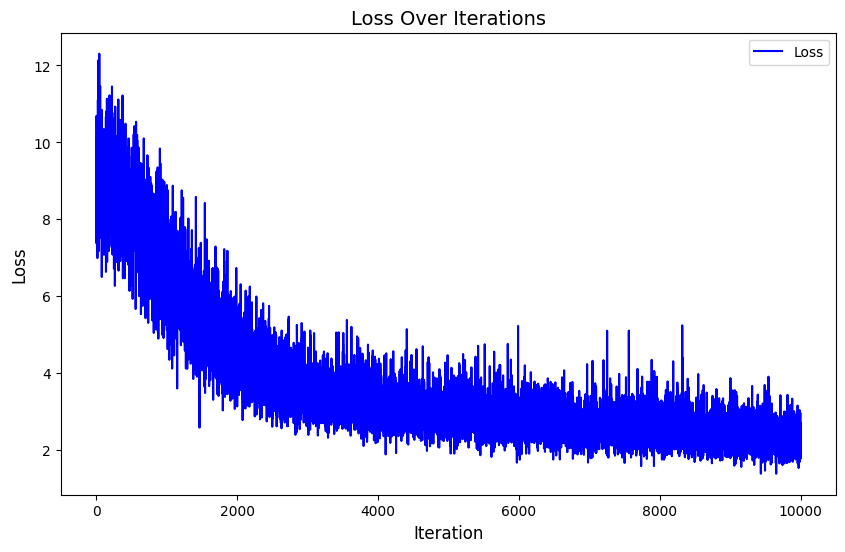

In [ ]:
import matplotlib.pyplot as plt

# Example loss values (use your actual loss list)


# Create a plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot loss values
plt.plot(loss_values, label='Loss', color='b')

# Add title and labels
plt.title('Loss Over Iterations', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Optionally add grid and legend
# plt.grid(True)
plt.legend()

# Show the plot

<h1>Evaluate</h1>

In [ ]:
import numpy as np
from numpy import cov
from numpy import asarray
from numpy import trace
from numpy import iscomplexobj
from scipy.linalg import sqrtm
from skimage.transform import resize
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# FID - frechet inception distance
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
      # resize with nearest neighbor interpolation
      new_image = resize(image, new_shape, 0)
      # store
      images_list.append(new_image)
    return asarray(images_list)

def calculate_fid(model, img1, img2):
    # convert integer to floating point values
    # img1 = np.expand_dims(img1, axis=0)
    # img2 = np.expand_dims(img2, axis=0)

    images1 = [x.astype('float32') for x in img1]
    images2 = [x.astype('float32') for x in img2]

    # resize images
    images1 = scale_images(images1, (299, 299, 3))
    images2 = scale_images(images2, (299, 299, 3))

    # pre-process images
    images1 = preprocess_input(images1)
    images2 = preprocess_input(images2)

    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)

    # # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
      covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [ ]:
import random
import torch
from PIL import Image
from glob import glob
from torchvision import transforms
from torch.utils import data

# from opt import MEAN, STD
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

IMAGE_SIZE = 512
size = (IMAGE_SIZE, IMAGE_SIZE)

img_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor(),
     transforms.Normalize(mean=MEAN, std=STD)])

mask_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()])

def unnormalize(x):
    x = x.transpose(1, 3)
    x = x * torch.Tensor(STD) + torch.Tensor(MEAN)
    x = x.transpose(1, 3)
    return x

def reverse_transform_list(tensor, mean=MEAN, std=STD):
    resutl = []
    for ts in tensor:
        # Undo the normalization by multiplying by std and adding the mean
        ts = ts * torch.tensor(std).view(-1, 1, 1)  # Apply std for each channel
        ts = ts + torch.tensor(mean).view(-1, 1, 1)  # Apply mean for each channel

        resutl.append(ts)

    return resutl

class InfiniteSampler(data.sampler.Sampler):
    def __init__(self, num_samples):
        self.num_samples = num_samples

    def __iter__(self):
        return iter(self.loop())

    def __len__(self):
        return 2 ** 31

    def loop(self):
        i = 0
        order = np.random.permutation(self.num_samples)
        while True:
            yield order[i]
            i += 1
            if i >= self.num_samples:
                np.random.seed()
                order = np.random.permutation(self.num_samples)
                i = 0

class InpaintingDataset(torch.utils.data.Dataset):
    def __init__(self, img_root, mask_root, img_transform, mask_transform):
        super(InpaintingDataset, self).__init__()
        self.img_transform = img_transform
        self.mask_transform = mask_transform

        self.paths = glob('{:s}/*.jpg'.format(img_root))
        self.mask_paths = glob('{:s}/*.jpg'.format(mask_root))
        self.N_mask = len(self.mask_paths)

    def __getitem__(self, index):
        gt_img = Image.open(self.paths[index])
        gt_img = self.img_transform(gt_img.convert('RGB'))

        mask = Image.open(self.mask_paths[random.randint(0, self.N_mask - 1)])
        mask = self.mask_transform(mask.convert('RGB'))
        return gt_img, mask, gt_img * mask,

    def __len__(self):
        return len(self.paths)

def load_ckpt(ckpt_name, models, optimizers=None):
    ckpt_dict = torch.load(ckpt_name, weights_only=True)
    for prefix, model in models:
        assert isinstance(model, nn.Module)
        model.load_state_dict(ckpt_dict[prefix], strict=False)
    if optimizers is not None:
        for prefix, optimizer in optimizers:
            optimizer.load_state_dict(ckpt_dict[prefix])
    return ckpt_dict['n_iter']

def evaluate_metric(snapshot, image_path, mask_path, batch_size = 8):
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    device = torch.device("cpu")

    # load model
    model = PConvUNet().to(device)
    load_ckpt(snapshot, [('model', model)])

    data_eval = InpaintingDataset(image_path, mask_path, img_tf, mask_tf)

    iter_eval = iter(data.DataLoader(
        data_eval, batch_size=batch_size,
        sampler=InfiniteSampler(len(data_eval)),
        num_workers=8))

    model.eval()

    gt = []
    output = []

    for i in range(250):
        try:
            gt_i, mask_i, masked_img_i = [x.to(device) for x in next(iter_eval)]

            # generate output
            with torch.no_grad():
                output_i, _ = model(masked_img_i, mask_i)

            output_i = output_i.to(torch.device('cpu'))
            output_i = unnormalize(output_i)

            # concat
            gt_i = [x.permute(1, 2, 0).detach().cpu().numpy() for x in reverse_transform_list(gt_i)]
            output_i = [x.squeeze(0).permute(1, 2, 0).detach().cpu().numpy() for x in output_i]
            gt += gt_i
            output += output_i

        except StopIteration:
            print("Iterator is exhausted, stopping the loop.")
            break

    # calculate metric
    # prepare InceptionV3
    model_inception_v3 = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    print(calculate_fid(model_inception_v3, gt, output))


<h1> Prepare checkpoint </h1>

In [ ]:
import os
import shutil

from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/checkpoint-Partial-Conv-10000.pth'
test_path = '/content/'

# Copy the model file to the test directory
shutil.copy(model_path, os.path.join(test_path, os.path.basename(model_path)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/checkpoint-Partial-Conv-10000.pth'

prepare data Celeba-hq

In [ ]:
data_path = '/content/drive/MyDrive/female.zip'
test_path = '/content/'
shutil.copy(data_path, os.path.join(test_path, os.path.basename(data_path)))
!unzip female.zip

mask_path = '/content/drive/MyDrive/masks'
MASK_DIR = 'masks'
shutil.copytree(mask_path, MASK_DIR, dirs_exist_ok=True)

Archive:  female.zip
   creating: female/
  inflating: female/000168.jpg       
  inflating: female/000431.jpg       
  inflating: female/000442.jpg       
  inflating: female/000446.jpg       
  inflating: female/000528.jpg       
  inflating: female/000656.jpg       
  inflating: female/001349.jpg       
  inflating: female/001496.jpg       
  inflating: female/001663.jpg       
  inflating: female/001743.jpg       
  inflating: female/001972.jpg       
  inflating: female/002064.jpg       
  inflating: female/002110.jpg       
  inflating: female/002140.jpg       
  inflating: female/002292.jpg       
  inflating: female/002419.jpg       
  inflating: female/002420.jpg       
  inflating: female/002475.jpg       
  inflating: female/002569.jpg       
  inflating: female/003247.jpg       
  inflating: female/003251.jpg       
  inflating: female/003536.jpg       
  inflating: female/003675.jpg       
  inflating: female/003716.jpg       
  inflating: female/003767.jpg       
  inflat

'masks'

In [ ]:
snapshot = 'checkpoint-Partial-Conv-10000.pth'
data_path = 'female'
mask_path = 'masks'

evaluate_metric(snapshot, data_path, mask_path)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


<h1> Test </h1>

In [ ]:
import os
import shutil

from google.colab import drive
drive.mount('/content/drive')

# mount data test from drive
img_path = '/content/drive/MyDrive/image-test.png'
mask_path = '/content/drive/MyDrive/mask.png'
mask1_path = '/content/drive/MyDrive/mask1.jpg'

data_path = '/content/data'

os.makedirs('data', exist_ok=True)

shutil.copy(img_path, os.path.join(data_path, os.path.basename(img_path)))
shutil.copy(mask_path, os.path.join(data_path, os.path.basename(mask_path)))
shutil.copy(mask1_path, os.path.join(data_path, os.path.basename(mask1_path)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/data/mask1.jpg'

In [ ]:
import torch
from PIL import Image
from torchvision.utils import save_image
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

IMAGE_SIZE = 512
size = (IMAGE_SIZE, IMAGE_SIZE)

img_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor(),
     transforms.Normalize(mean=MEAN, std=STD)])

mask_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()])

def unnormalize(x):
    x = x.transpose(1, 3)
    x = x * torch.Tensor(STD) + torch.Tensor(MEAN)
    x = x.transpose(1, 3)
    return x

def reverse_transform(tensor, mean=MEAN, std=STD):
    # Undo the normalization by multiplying by std and adding the mean
    tensor = tensor * torch.tensor(std).view(-1, 1, 1)  # Apply std for each channel
    tensor = tensor + torch.tensor(mean).view(-1, 1, 1)  # Apply mean for each channel
    return tensor

def reverse_transform_list(tensor, mean=MEAN, std=STD):
    resutl = []
    for ts in tensor:
        # Undo the normalization by multiplying by std and adding the mean
        ts = ts * torch.tensor(std).view(-1, 1, 1)  # Apply std for each channel
        ts = ts + torch.tensor(mean).view(-1, 1, 1)  # Apply mean for each channel

        resutl.append(ts)

    return resutl

def load_ckpt(ckpt_name, models, optimizers=None):
    ckpt_dict = torch.load(ckpt_name, weights_only=True, map_location=torch.device('cpu'))
    for prefix, model in models:
        assert isinstance(model, nn.Module)
        model.load_state_dict(ckpt_dict[prefix], strict=False)
    if optimizers is not None:
        for prefix, optimizer in optimizers:
            optimizer.load_state_dict(ckpt_dict[prefix])
    return ckpt_dict['n_iter']


def test_example(snapshot, image_path, mask_path, img_transform, mask_transform):

    # get model
    model = PConvUNet().to(device)
    load_ckpt(snapshot, [('model', model)])

    # load image
    gt_img = Image.open(image_path)
    mask_img = Image.open(mask_path)
    gt = img_transform(gt_img.convert('RGB'))
    mask = mask_transform(mask_img.convert('RGB'))

    # create image with mask - save to .data
    masked_img = gt * mask
    masked_save = reverse_transform(masked_img)
    save_image(masked_save, 'data/masked_img.png')

    # gt_img = torch.tensor(gt).unsqueeze(0)  # Add batch dimension (assuming image is in HWC format)
    mask = torch.tensor(mask).unsqueeze(0)
    masked_img = torch.tensor(masked_img).unsqueeze(0)

    # generate output
    with torch.no_grad():
        output, _ = model(masked_img.to(device), mask.to(device))

    # convert output to image and save
    output = output.to(torch.device('cpu'))
    output = unnormalize(output)
    save_image(output, 'data/output.png')

    # matplotlib display
    masked_save = masked_save.permute(1, 2, 0).detach().cpu().numpy()
    output = output.squeeze(0).permute(1, 2, 0).detach().cpu().numpy()
    display(gt_img, mask_img, masked_save, output)

def display(gt_img, mask_img, masked_img, output):
    # matplotlib display
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(gt_img)
    axes[0].set_title('ground truth')
    axes[0].axis('off')

    axes[1].imshow(mask_img)
    axes[1].set_title('mask')
    axes[1].axis('off')

    axes[2].imshow(masked_img)
    axes[2].set_title('masked image')
    axes[2].axis('off')

    axes[3].imshow(output)
    axes[3].set_title('output')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

<ipython-input-11-816192abe081>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask).unsqueeze(0)
<ipython-input-11-816192abe081>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masked_img = torch.tensor(masked_img).unsqueeze(0)


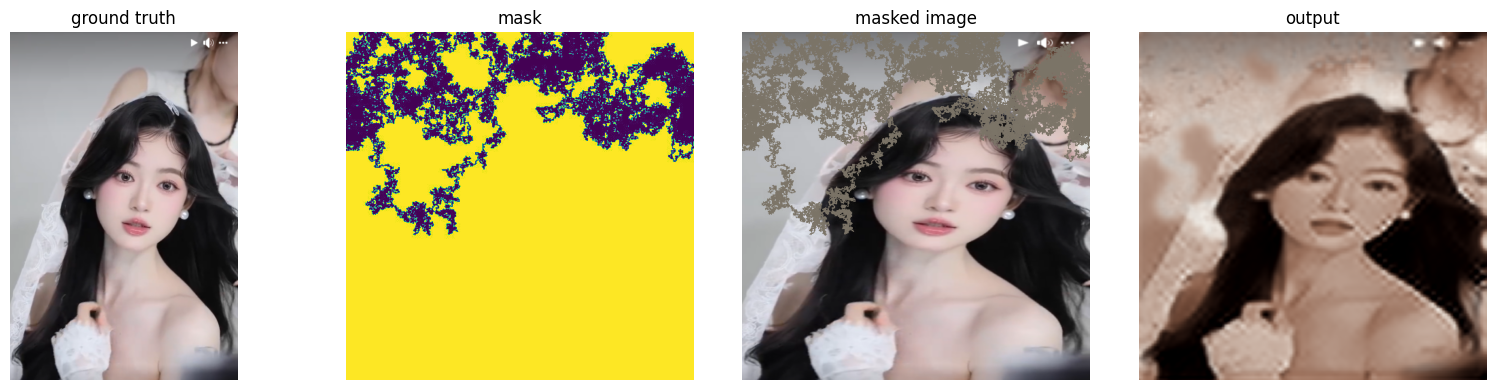

In [ ]:
image_path = 'data/image-test1.png'
# mask_path = 'data/mask.png'
mask_path = 'data/mask1.jpg'

snapshot = 'checkpoint-Partial-Conv-10000.pth'

test_example(snapshot, image_path, mask_path, img_tf, mask_tf)